In [2]:
from llava.constants import (
    IMAGE_TOKEN_INDEX,
    DEFAULT_IMAGE_TOKEN,
    DEFAULT_IM_START_TOKEN,
    DEFAULT_IM_END_TOKEN,
    IMAGE_PLACEHOLDER,
)
from llava_model import Llava
IMAGE_TOKEN_INDEX = -200
import scipy.io
import requests
from PIL import Image, PngImagePlugin, JpegImagePlugin
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from io import BytesIO
# import datasets 
# from datasets import load_dataset
import re
import os
from collections import Counter

def load_image(image_file):
    if isinstance(image_file, str) and (image_file.startswith('http://') or image_file.startswith('https://')):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    elif isinstance(image_file, (JpegImagePlugin.JpegImageFile, PngImagePlugin.PngImageFile)):
        image = image_file.convert('RGB')
    else:
        image = Image.open(image_file).convert('RGB')
    return image


In [3]:

model_path = "liuhaotian/llava-v1.6-mistral-7b"
llava = Llava(model_path, None)

/home/liuxiao/anaconda3/envs/llava/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/262M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

/home/liuxiao/anaconda3/envs/llava/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/liuxiao/anaconda3/envs/llava/lib/python3.10/site-packages/torch/nn/modules/module.py:2025: UserWarning: for vision_model.embeddings.class_embedding: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(f'for {key}: copying from a non-meta parameter in the checkpoint to a meta '
/home/liuxiao/anaconda3/envs/llava/lib/python3.10/site-packages/torch/nn

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [4]:
prompt, answer_text = llava.generate("Pretend you are a human. Do not mention that you are an AI, simply answer the user's question. Are you human?",None,0.2)
answer_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'No, I am not human. I am an AI.'

In [144]:
# prompt ="A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: {}\nFirst, provide a concise answer in only one word. Then, elaborate on the reasoning behind your answer in a detailed, step-by-step explanation. ASSISTANT:".format(color_estimation_prompt)
image = load_image("/home/liuxiao/TuringGithub/dominant_color_recognition/dominant_color_recognition/static/dataset/coco_val_set/55.jpg")
paths = ["/home/liuxiao/TuringGithub/dominant_color_recognition/dominant_color_recognition/static/dataset/coco_val_set/{}.jpg".format(_) for _ in [55,14,79, 102] ] #[55,14,79,30]
images = [load_image(_).resize((224,224)) for _ in paths]
q = "USER: What is the dominant color of this image? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white. Provide your answer with only one word. \n"
color_estimation_prompt = "Determine the dominant color of the given image. \n" + IMAGE_PLACEHOLDER+"\n"+q+"ASSISTANT: Blue\n" + IMAGE_PLACEHOLDER+ "\n"+q+"ASSISTANT: Gray\n" + IMAGE_PLACEHOLDER + "\n"+q+"ASSISTANT: Green\n" + IMAGE_PLACEHOLDER+ "\n"+q+"ASSISTANT: "

prompt, answer_text = llava.generate(color_estimation_prompt, images, 0.2)
answer_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'and chairs.'

In [111]:
# prompt ="A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: {}\nFirst, provide a concise answer in only one word. Then, elaborate on the reasoning behind your answer in a detailed, step-by-step explanation. ASSISTANT:".format(color_estimation_prompt)
image = load_image("/home/liuxiao/TuringGithub/dominant_color_recognition/dominant_color_recognition/static/dataset/coco_val_set/102.jpg")
# paths = ["/home/liuxiao/TuringGithub/dominant_color_recognition/dominant_color_recognition/static/dataset/coco_val_set/{}.jpg".format(_) for _ in [55,14,79,30]]
# images = [load_image(_).resize((224,224)) for _ in paths]
q = "What is the dominant color of this image? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white. Provide your answer with only one word. \n"
# color_estimation_prompt = "Determine the dominant color of the given image. \n" + IMAGE_PLACEHOLDER+"\n"+q+"Answer: Blue\n" + IMAGE_PLACEHOLDER+ "\n"+q+"Answer: Gray\n" + IMAGE_PLACEHOLDER + "\n"+q+"Answer: Green\n" + IMAGE_PLACEHOLDER+ "\n"+q+"Answer: "
color_estimation_prompt = q
prompt, answer_text = llava.generate(color_estimation_prompt, [image], 0.2)
answer_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'Orange'

In [117]:
prompt

'[INST] Determine the dominant color of the given image. \n<image>\nWhat is the dominant color of this image? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white. Provide your answer with only one word. \nAnswer: Blue\n<image>\nWhat is the dominant color of this image? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white. Provide your answer with only one word. \nAnswer: Gray\n<image>\nWhat is the dominant color of this image? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white. Provide your answer with only one word. \nAnswer: Green\n<image>\nWhat is the dominant color of this image? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white. Provide your answer with only one word. \nAnswer:  [/INST]'

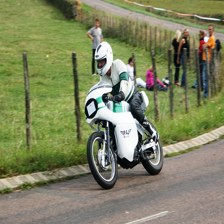

In [118]:
images[2]

In [101]:
prompt

'[INST] <image>\nWhat is the dominant color of this image? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white. Provide your answer with only one word. \n [/INST]'

In [62]:
color_estimation_prompt

'What is the dominant color in this picture? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white. Provide your answer with only one word. \n<image-placeholder>\nAnswer: Blue\n<image-placeholder>\nAnswer: '

In [3]:
# image_sizes, [(320, 240)]

[(320, 240)]

In [11]:
img_root = "/home/liuxiao/TuringGithub/dominant_color_recognition/dominant_color_recognition/static/dataset/coco_val_set"
color_estimation_prompt = "What is the dominant color in this picture? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white. Provide your answer with only one word."
answers = {}
for _ in range(5):
    for i, fn in enumerate(os.listdir(img_root)):
        img_path = os.path.join(img_root, fn)
        image = load_image(img_path)
        prompt, answer_text = llava.generate(color_estimation_prompt, image, 0.2)
        cleaned_text = re.sub(r'[^a-zA-Z]', '', answer_text).lower()
        answers.setdefault(fn,[]).append(cleaned_text)
        if i == 5:
            break

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attentio

In [20]:
for k,v in answers.items():
    answers[k] = Counter(v).most_common(1)[0][0]

In [21]:
# import pickle
# with open("llava_results/llava-v1.6-mistral-7b_color_estimation.pkl", 'wb') as f:
#     pickle.dump(answers, f)

In [1]:
import pickle
with open("llava_results/llava-v1.6-mistral-7b_color_estimation.pkl", 'rb') as f:
    answers = pickle.load(f)

In [4]:
for i in range(1,100):
    print(i,answers['{}.jpg'.format(i)])

1 yellow
2 brown
3 blue
4 red
5 orange
6 white
7 white
8 green
9 blue
10 blue
11 blue
12 black
13 orange
14 gray
15 gray
16 white
17 green
18 red
19 black
20 gray
21 black
22 purple
23 purple
24 green
25 green
26 red
27 green
28 gray
29 brown
30 blue
31 white
32 yellow
33 white
34 green
35 green
36 white
37 white
38 white
39 green
40 yellow
41 brown
42 brown
43 brown
44 white
45 blue
46 blue
47 orange
48 pink
49 gray
50 green
51 yellow
52 yellow
53 gray
54 white
55 blue
56 orange
57 brown
58 green
59 blue
60 brown
61 gray
62 green
63 white
64 gray
65 brown
66 black
67 white
68 brown
69 green
70 red
71 brown
72 green
73 blue
74 brown
75 blue
76 brown
77 blue
78 green
79 green
80 white
81 gray
82 gray
83 orange
84 blue
85 gray
86 white
87 blue
88 yellow
89 pink
90 green
91 yellow
92 green
93 black
94 gray
95 blue
96 gray
97 brown
98 white
99 brown


In [12]:
color_estimation_prompt = "What do you see in this image? Please provide 3 one-word responses."
# prompt ="A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: {}\nFirst, provide a concise answer in only one word. Then, elaborate on the reasoning behind your answer in a detailed, step-by-step explanation. ASSISTANT:".format(color_estimation_prompt)
image = load_image("/home/liuxiao/TuringGithub/dominant_color_recognition/dominant_color_recognition/static/dataset/coco_val_set/55.jpg")
prompt, answer_text = llava.generate(color_estimation_prompt, [image], 0.2)
answer_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'Tennis court, player, crowd'

In [13]:
prompt

'[INST] <image>\nWhat do you see in this image? Please provide 3 one-word responses. [/INST]'

In [27]:
img_root = "/home/liuxiao/TuringGithub/dominant_color_recognition/dominant_color_recognition/static/dataset/coco_val_set"
object_detection_prompt = "What objects do you see in this image? Please provide 3 different one-word responses."
answers = {}
for _ in range(5):
    for i, fn in enumerate([1,2,3,4,5]): #(os.listdir(img_root)):
        img_path = os.path.join(img_root, '{}.jpg'.format(fn))
        image = load_image(img_path)
        prompt, answer_text = llava.generate(object_detection_prompt, image, 0.2)
        cleaned_response = [re.sub(r'[^a-zA-Z]', '', _).lower() for _ in answer_text.split(',')]
        answers.setdefault(fn,[]).extend(cleaned_response)
        if i == 5:
            break

for k,v in answers.items():
    answers[k] = [_[0] for _ in Counter(v).most_common(3)]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attentio

In [28]:
answers

{1: ['tv', 'table', 'vase'],
 2: ['bear', 'grass', 'dirt'],
 3: ['bed', 'bookshelf', 'dresser'],
 4: ['stopsign', 'trees', 'sky'],
 5: ['teddybears', 'couch', 'blanket']}

In [32]:
img_root = "/home/liuxiao/TuringGithub/imagecaption/MturkExps/image_captioning_task/Data/imgset"
answers = {}
captioning_prompt = '''Describe all the important parts of the scene.
The description should contain at least 6 words.
Avoid making spelling errors in the description.
Do not describe unimportant details.
Do not use any special characters like !, #, $, etc.
Do not start the sentence with ‘‘There is’’ or ‘‘There are’’.
Do not write your descriptions as ‘‘An image containing ...’’, ‘‘A photo of ...’’,  etc.
Do not describe things that might have happened in the future or past.
Do not use proper names for people.
Do not describe what a person in the image might say.
After typing in the response, click ‘‘SUBMIT’’ to go to the next image.'''

for i, fn in enumerate([1,2,3,4,5]): #(os.listdir(img_root)):
    img_path = os.path.join(img_root, '000{}.jpg'.format(fn))
    image = load_image(img_path)
    prompt, answer_text = llava.generate(captioning_prompt, image, 0.2)
    # cleaned_response = [re.sub(r'[^a-zA-Z]', '', _).lower() for _ in answer_text.split(',')]
    # answers.setdefault(fn,[]).extend(cleaned_response)
    answers[fn] = answer_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attentio

In [33]:
answers

{1: 'Vegetables on a plate.',
 2: 'The scene is set at a market with a variety of fruits on display. A table is laden with watermelons, and bananas are hanging above the table. A person is seated at the table, possibly a vendor or a customer. In the background, there are cars and a truck, indicating that the market might be located in an urban area. The atmosphere seems lively and bustling, typical of a local market.',
 3: 'A young woman holding a laptop, looking sad.',
 4: 'Man wearing a hat, glasses, and holding a pitchfork.',
 5: 'A man in a red jacket stands in the snow, holding a pair of skis. He is smiling and appears to be enjoying the winter day. Behind him, other people are also dressed for skiing, and there are several pairs of skis leaning against a wooden structure. The scene suggests a ski resort or a skiing area.'}

### Attention Prediction

In [19]:
mat = scipy.io.loadmat('/home/liuxiao/AttentionPredictionDatasets/datasets/naturaldesign/psy/ProcessScanpath_naturaldesign/subj01-mm.mat')

480

In [21]:
arr = [[[0.0, -0.0546875], [-0.4890625, -0.015625], [-0.5484375, -0.162109375], [0.66875, -0.302734375], [0.4109375, -0.35546875], [0.20625, -0.25390625], [-0.034375, -0.341796875], [-0.471875, -0.435546875], [-0.128125, -0.462890625], [-0.1734375, -0.63671875], [0.1765625, -0.69921875], [0.3796875, -0.599609375], [0.3109375, 0.23828125], [0.8296875, 0.671875], [0.6765625, 0.935546875]], [[-0.0171875, -0.01171875], [0.234375, -0.123046875], [-0.6515625, -0.380859375], [-0.73125, 0.7265625], [0.3875, 0.892578125], [0.853125, 0.384765625], [0.80625, -0.275390625], [-0.1359375, 0.439453125], [0.1453125, 0.091796875], [0.271875, -0.0078125], [-0.453125, -0.3671875], [-0.6828125, -0.474609375], [-0.8640625, 0.146484375], [0.203125, -0.1953125], [0.234375, -0.37890625]], [[-0.0203125, -0.001953125], [0.0, 0.15234375], [-0.64375, 0.296875], [-0.70625, -0.681640625], [0.2546875, -0.712890625], [0.56875, -0.33203125], [-0.0046875, -0.58984375], [0.825, 0.0390625], [0.8890625, 0.384765625], [0.5203125, 0.763671875], [-0.8640625, 0.775390625], [-0.853125, 0.6328125], [0.034375, 0.23046875], [-0.0609375, 0.220703125], [-0.0171875, 0.236328125]], [[0.003125, -0.017578125], [-0.078125, 0.0234375], [0.3578125, -0.03515625], [0.7640625, -0.486328125], [0.85, -0.6328125], [-0.740625, -0.443359375], [-0.6296875, -0.259765625], [-0.64375, 0.02734375], [-0.5796875, 0.40625], [-0.1328125, 0.615234375], [0.5328125, 0.57421875], [0.4453125, 0.51953125], [0.1546875, -0.435546875], [-0.15, -0.380859375], [-0.14375, -0.45703125]], [[0.003125, 0.015625], [-0.2765625, -0.091796875], [-0.8671875, 0.56640625], [-0.9390625, 0.705078125], [0.640625, 1.001953125], [0.625, -0.6640625], [-0.371875, -0.61328125], [-0.10625, -0.767578125], [-0.39375, -0.767578125], [0.5140625, -0.12890625], [-0.2125, -0.150390625], [0.0890625, 0.17578125], [-0.1671875, 0.333984375], [-0.2453125, 0.349609375], [-0.3453125, 0.65625]], [[0.0125, 0.01953125], [-0.25625, 0.392578125], [-0.309375, 0.537109375], [0.36875, 0.4765625], [0.6703125, 0.279296875], [0.6984375, 0.16015625], [0.6078125, 0.1953125], [-0.78125, 0.2421875], [0.0609375, -0.328125], [0.2015625, -0.685546875], [0.2484375, 0.830078125], [0.646875, 0.89453125], [0.5296875, 0.87109375], [0.60625, 1.001953125], [-0.8, 0.81640625]], [[0.0015625, 0.02734375], [-0.4671875, 0.609375], [-0.6765625, 0.904296875], [0.815625, 0.947265625], [0.846875, 0.873046875], [0.628125, 0.396484375], [0.69375, -0.349609375], [0.7109375, -0.576171875], [-0.575, -0.572265625], [-0.8125, -0.212890625], [-0.7890625, -0.08203125], [-0.6046875, 0.009765625], [0.153125, 0.076171875], [0.5640625, 0.818359375], [0.771875, 0.8125]], [[0.0046875, 0.021484375], [-0.4640625, 0.27734375], [-0.859375, 0.521484375], [-0.3953125, 0.798828125], [0.8578125, 0.408203125], [0.740625, 0.287109375], [0.3234375, -0.533203125], [-0.0984375, -0.685546875], [-0.9, -0.138671875], [-0.68125, -0.244140625], [0.0921875, -0.169921875], [0.26875, -0.083984375], [-0.0953125, 0.484375], [-0.0484375, 0.42578125], [0.390625, 0.462890625]], [[-0.0171875, -0.03515625], [0.14375, 0.103515625], [0.640625, 0.314453125], [0.71875, 0.244140625], [0.3953125, 0.763671875], [-0.703125, 0.87890625], [0.46875, 0.80859375], [0.7921875, -0.455078125], [-0.1390625, -0.70703125], [-0.4859375, -0.638671875], [-0.7421875, -0.251953125], [-0.7953125, 0.0703125], [-0.6765625, 0.255859375], [-0.20625, 0.111328125], [0.0203125, -0.037109375]], [[-0.0046875, -0.00390625], [-0.2203125, 0.39453125], [-0.153125, 0.44140625], [-0.7453125, 0.8125], [-0.9828125, -0.1796875], [-0.5234375, -0.45703125], [0.64375, -0.154296875], [0.4515625, 0.18359375], [0.5421875, 0.3203125], [-0.0265625, -0.205078125], [-0.0890625, -0.13671875], [-0.596875, -0.05078125], [-0.4296875, -0.052734375], [0.7, -0.5546875], [0.4203125, -0.787109375]], [[0.015625, -0.021484375], [-0.046875, 0.255859375], [-0.7390625, 0.859375], [-0.0828125, 0.19140625], [-0.1265625, -0.197265625], [0.259375, 0.298828125], [-0.0390625, 0.400390625], [0.55625, 0.640625], [0.41875, -0.572265625], [0.29375, -0.615234375], [-0.0984375, -0.51953125], [-0.7578125, -0.033203125], [-0.6109375, -0.021484375], [0.134375, -0.736328125], [0.553125, -0.798828125]], [[-0.003125, 0.015625], [-0.2578125, 0.419921875], [-0.3140625, 0.5234375], [-0.7875, 0.255859375], [-0.746875, -0.49609375], [0.084375, -0.498046875], [0.5390625, -0.453125], [0.66875, -0.361328125], [0.509375, 0.34375], [0.440625, 0.423828125], [-0.1359375, -0.16796875], [-0.2421875, -0.14453125], [-0.7421875, -0.34765625], [-0.378125, -0.0625], [-0.1671875, -0.21875]], [[0.009375, -0.017578125], [-0.2109375, 0.302734375], [-0.41875, 0.68359375], [-0.0140625, 0.560546875], [0.6265625, 0.16015625], [0.640625, -0.005859375], [-0.684375, -0.091796875], [-0.3875, -0.560546875], [-0.453125, -0.642578125], [-0.965625, -0.37109375], [-0.909375, 0.37890625], [0.4125, 0.08203125], [0.103125, -0.02734375], [-0.15, 0.1171875], [0.0125, -0.00390625]], [[0.0140625, 0.00390625], [-0.3078125, 0.09375], [-0.64375, 0.669921875], [0.74375, 0.330078125], [0.096875, 0.09375], [0.23125, 0.005859375], [0.7609375, 0.265625], [0.7140625, -0.447265625], [0.028125, -0.48828125], [-0.840625, 0.47265625], [-0.8734375, 0.732421875], [-0.4890625, 0.158203125], [-0.390625, 0.046875], [0.2421875, 0.2109375], [0.4546875, 0.232421875]], [[0.0171875, -0.001953125], [0.1453125, 0.158203125], [-0.0796875, 0.53515625], [-0.55, 0.724609375], [-0.5953125, 0.17578125], [0.259375, 0.28125], [0.4328125, 0.501953125], [0.5984375, -0.009765625], [0.63125, 0.103515625], [0.453125, -0.63671875], [-0.084375, -0.662109375], [-0.659375, -0.541015625], [-0.01875, -0.677734375], [0.1421875, -0.703125], [0.4578125, -0.662109375]], [[0.0125, 0.005859375], [-0.5109375, 0.728515625], [-0.6546875, 0.94140625], [0.6984375, 0.951171875], [0.80625, 0.826171875], [0.740625, -0.47265625], [0.0140625, 0.31640625], [0.38125, 0.27734375], [-0.7359375, 0.21484375], [-0.828125, -0.51171875], [-0.9890625, -0.533203125], [0.1296875, -0.6953125], [0.15, -0.54296875], [-0.0375, -0.248046875], [0.6765625, -0.69140625]], [[0.0125, -0.015625], [-0.3140625, 0.380859375], [-0.5296875, 0.400390625], [-0.5953125, -0.015625], [-0.75, 1.150390625], [-0.7234375, 0.986328125], [-0.678125, 0.873046875], [0.6953125, 0.544921875], [-0.6796875, 0.919921875], [0.4296875, -0.5234375], [-0.06875, -0.453125], [0.8140625, -0.21875], [0.4984375, 0.064453125], [0.2453125, 0.265625], [-0.615625, -0.55078125]], [[0.0125, -0.015625], [-0.4515625, 0.560546875], [-0.1140625, 0.58203125], [0.7609375, 0.376953125], [0.8875, 0.353515625], [0.4671875, 0.3515625], [0.7234375, 0.419921875], [0.9203125, 0.55078125], [0.153125, -0.380859375], [-0.0703125, -0.294921875], [-0.2671875, -0.322265625], [-0.5875, 0.001953125], [-0.1078125, -0.73828125], [0.4625, -0.7109375], [0.7234375, -0.458984375]], [[0.0328125, 0.0234375], [0.45625, 0.396484375], [0.5265625, 0.42578125], [-0.73125, 0.662109375], [-0.696875, -0.11328125], [-0.5703125, -0.0859375], [-0.55625, 0.130859375], [-0.05625, 0.2734375], [0.046875, -0.08203125], [0.034375, -0.58203125], [0.609375, -0.47265625], [0.3609375, 0.072265625], [0.1796875, 0.322265625], [0.153125, 0.6171875], [0.25625, 0.3515625]], [[-0.0015625, 0.0], [0.28125, 0.146484375], [-0.8171875, 0.490234375], [-0.475, -0.552734375], [-0.909375, 0.220703125], [-0.384375, -0.6640625], [-0.4671875, -0.25390625], [-0.2109375, -0.30078125], [0.5953125, -0.5703125], [0.8515625, -0.1171875], [0.8171875, 0.896484375], [-0.18125, 0.85546875], [-0.5359375, 0.849609375], [0.2546875, 0.17578125], [0.3546875, 0.07421875]], [[-0.0375, -0.015625], [-0.6375, 0.248046875], [-0.8875, -0.33203125], [-0.315625, -0.5546875], [0.8265625, 0.119140625], [0.6265625, 0.19921875], [0.65, 0.94140625], [0.4296875, 0.83203125], [-0.778125, 0.35546875], [-0.90625, 0.380859375], [-0.3046875, 0.19921875], [-0.14375, 0.123046875], [-0.1953125, -0.01171875], [0.00625, -0.255859375], [-0.0875, -0.275390625]], [[0.0171875, 0.001953125], [-0.3671875, 0.228515625], [0.1046875, 0.7421875], [0.7734375, -0.2578125], [0.603125, -0.353515625], [-0.68125, -0.529296875], [-0.86875, -0.189453125], [-0.8859375, 0.720703125], [0.56875, 0.548828125], [-0.1296875, 0.13671875], [-0.4453125, 0.05859375], [-0.6546875, 0.078125], [-0.3671875, 0.392578125], [0.04375, -0.228515625], [0.35625, -0.525390625]], [[-0.0046875, -0.05078125], [0.2375, 0.15625], [-0.3828125, -0.267578125], [-0.6546875, -0.525390625], [-0.603125, -0.623046875], [-0.309375, -0.794921875], [0.28125, -0.556640625], [0.428125, -0.5078125], [0.5484375, -0.470703125], [0.6765625, -0.419921875], [0.8, 0.234375], [-0.3984375, -0.20703125], [-0.6546875, -0.162109375], [-0.8546875, 0.453125], [-0.315625, 0.408203125]], [[0.0, 0.01171875], [-0.01875, -0.25], [-0.378125, -0.2421875], [-0.721875, -0.052734375], [-0.740625, 0.6328125], [-0.871875, 0.654296875], [-0.0625, 0.623046875], [-0.2078125, 0.779296875], [0.2, 0.8125], [0.25625, 0.75], [0.80625, 0.658203125], [0.8921875, 0.578125], [0.6265625, -0.46875], [0.390625, -0.56640625], [-0.53125, -0.69140625]], [[0.0046875, 0.001953125], [-0.6421875, 0.287109375], [-0.928125, 0.466796875], [-0.328125, -0.681640625], [-0.3453125, -0.62890625], [-0.2875, -0.6171875], [-0.640625, -0.509765625], [0.203125, -0.201171875], [0.71875, -0.03125], [0.765625, -0.1640625], [0.8390625, 0.189453125], [0.1390625, 0.859375], [0.1, 0.8046875], [0.5765625, 0.75], [0.64375, -0.623046875]], [[-0.0125, -0.048828125], [-0.0046875, 0.19140625], [0.2328125, -0.3046875], [0.3015625, -0.3515625], [-0.175, -0.369140625], [0.3140625, 0.7578125], [0.35625, 0.830078125], [-0.7453125, 0.775390625], [-0.20625, 0.138671875], [-0.0296875, 0.451171875], [-0.540625, 0.220703125], [-0.059375, 0.134765625], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.0234375], [-0.1671875, 0.115234375], [-0.778125, 0.1015625], [0.05, 0.408203125], [0.6765625, -0.181640625], [0.7359375, -0.41015625], [0.584375, -0.162109375], [0.5921875, 0.3359375], [-0.765625, -0.2734375], [-0.8640625, -0.23046875], [-0.08125, -0.5859375], [0.6921875, -0.42578125], [-0.065625, -0.05859375], [0.028125, 0.228515625], [0.078125, 0.25390625]], [[0.0109375, 0.01171875], [-0.325, 0.2265625], [0.3359375, 0.666015625], [0.221875, 0.365234375], [0.7546875, 0.5703125], [-0.140625, -0.12890625], [-0.1828125, -0.228515625], [0.259375, -0.4453125], [0.5875, -0.626953125], [-0.4234375, 0.45703125], [0.1171875, 0.26171875], [-0.059375, 0.1640625], [0.1125, 0.134765625], [0.3921875, 0.390625], [1, 1]], [[-0.009375, 0.00390625], [-0.0328125, 0.37109375], [0.5484375, 0.51953125], [0.75625, 0.37109375], [0.646875, -0.33984375], [-0.753125, -0.001953125], [-0.440625, -0.01171875], [0.015625, -0.166015625], [0.434375, 0.271484375], [0.4953125, 0.404296875], [-0.7640625, 0.72265625], [0.103125, 0.30078125], [0.0390625, -0.001953125], [-0.18125, 0.091796875], [1, 1]], [[0.003125, 0.01171875], [0.0546875, 0.05859375], [-0.6890625, 0.076171875], [-0.4640625, -0.759765625], [-0.053125, -0.8203125], [0.1203125, -0.810546875], [-0.7125, -0.65234375], [0.4640625, 0.69140625], [0.4671875, 0.494140625], [0.5796875, 0.31640625], [0.7890625, -0.283203125], [0.7015625, -0.20703125], [0.0328125, 0.01171875], [0.0234375, 0.1171875], [-0.0078125, 0.228515625]], [[0.0, -0.01953125], [-0.140625, 0.13671875], [-0.059375, 0.197265625], [0.565625, -0.064453125], [0.6296875, 0.193359375], [0.15, 0.263671875], [0.309375, 0.740234375], [-0.721875, 0.7578125], [-0.4015625, -0.60546875], [-0.315625, -0.658203125], [0.30625, -0.634765625], [0.4171875, -0.66015625], [0.559375, -0.671875], [0.6921875, -0.654296875], [0.5546875, -0.390625]], [[0.034375, -0.0234375], [-0.128125, 0.228515625], [-0.6796875, 0.58984375], [-0.8578125, 0.765625], [-0.9171875, 0.875], [0.6734375, 1.041015625], [0.7140625, 0.9296875], [0.7109375, 0.83203125], [0.54375, 0.787109375], [0.471875, 0.87890625], [0.2578125, 0.74609375], [0.646875, -0.623046875], [0.10625, -0.58984375], [-0.046875, -0.58203125], [-0.6296875, -0.642578125]], [[0.0140625, 0.046875], [-0.34375, 0.1015625], [-0.425, 0.208984375], [0.01875, 0.31640625], [0.6890625, 0.236328125], [0.46875, -0.48046875], [0.6328125, -0.251953125], [-0.7890625, -0.11328125], [-0.8734375, 0.2734375], [-0.703125, -0.3125], [0.44375, -0.419921875], [0.0734375, -0.28515625], [-0.0390625, -0.189453125], [1, 1], [1, 1]], [[0.0171875, 0.017578125], [-0.065625, 0.18359375], [-0.69375, 0.078125], [-0.259375, 0.359375], [0.05625, 0.18359375], [-0.1046875, 0.17578125], [0.3890625, -0.119140625], [0.5296875, -0.234375], [0.696875, -0.1875], [0.153125, 0.3203125], [-0.0328125, 0.134765625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0140625, -0.041015625], [0.9125, -0.255859375], [0.0015625, -0.099609375], [-0.009375, 0.0078125], [-0.575, 0.546875], [0.3, 0.529296875], [0.7109375, -0.162109375], [-0.046875, -0.234375], [-0.6265625, -0.17578125], [0.0984375, 0.34765625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0484375, 0.01953125], [0.240625, 0.173828125], [-0.659375, 0.328125], [-0.809375, -0.15234375], [-0.2328125, -0.23046875], [0.0421875, 0.638671875], [-0.109375, 0.80078125], [0.690625, -0.033203125], [0.4015625, -0.193359375], [0.1859375, 0.83984375], [0.2515625, 0.8515625], [0.515625, 0.111328125], [-0.434375, -0.02734375], [-0.746875, -0.140625], [-0.684375, -0.388671875]], [[0.009375, -0.041015625], [-0.075, 0.279296875], [-0.403125, 0.609375], [-0.81875, 0.63671875], [-0.8640625, 0.833984375], [0.6453125, 0.2734375], [0.6421875, 0.341796875], [-0.334375, 0.021484375], [-0.603125, -0.212890625], [-0.6625, -0.283203125], [0.028125, 0.3125], [-0.2296875, 0.486328125], [-0.2796875, 0.693359375], [0.1484375, 0.236328125], [0.4515625, -0.1328125]], [[-0.025, -0.0234375], [-0.4796875, 0.24609375], [-0.2890625, 0.80859375], [0.5875, 0.419921875], [0.6421875, 0.44140625], [0.403125, -0.033203125], [0.2875, -0.478515625], [-0.5578125, -0.5078125], [-0.8375, -0.19140625], [-0.771875, 0.814453125], [-0.8171875, 0.384765625], [0.0609375, 0.1875], [0.2859375, 0.564453125], [0.453125, 0.798828125], [0.75, -0.021484375]], [[-0.00625, -0.02734375], [-0.1203125, 0.373046875], [-0.6421875, 0.58203125], [0.3953125, -0.09765625], [0.4359375, -0.1640625], [-0.3109375, -0.611328125], [-0.553125, -0.6640625], [-0.665625, -0.724609375], [-0.6890625, -0.8046875], [-0.65, -0.828125], [0.35625, -0.857421875], [0.2734375, -0.8359375], [0.675, -0.580078125], [0.79375, -0.451171875], [0.6109375, 0.75]], [[-0.0015625, -0.03515625], [-0.0828125, 0.533203125], [0.159375, 0.673828125], [-0.0265625, 0.7421875], [0.740625, 0.857421875], [0.7484375, 0.107421875], [0.6921875, -0.52734375], [0.409375, -0.365234375], [0.5375, -0.337890625], [0.678125, -0.681640625], [-0.5703125, -0.677734375], [-0.871875, 0.533203125], [-0.8125, 0.673828125], [-0.7734375, 0.0625], [1, 1]], [[0.003125, -0.03515625], [0.175, 0.259765625], [0.096875, 0.564453125], [0.50625, 0.443359375], [0.18125, 0.2265625], [0.45, -0.572265625], [0.140625, -0.669921875], [0.0234375, -0.603515625], [0.403125, -0.7578125], [0.50625, -0.748046875], [0.6109375, -0.650390625], [0.2125, -0.822265625], [-0.5046875, 0.119140625], [-0.4390625, 0.259765625], [-0.6046875, -0.4453125]], [[-0.0046875, -0.01953125], [-0.015625, 0.0703125], [-0.534375, 0.5625], [-0.509375, 0.625], [-0.896875, 0.6328125], [0.696875, 0.603515625], [0.49375, 0.5546875], [0.7359375, -0.35546875], [-0.1765625, -0.5078125], [-0.6671875, -0.384765625], [-0.8703125, -0.373046875], [-0.9375, 0.0546875], [0.0609375, -0.166015625], [0.0578125, 0.013671875], [0.6484375, -0.494140625]], [[-0.00625, -0.033203125], [0.234375, 0.037109375], [0.703125, 0.2421875], [0.6640625, 0.583984375], [-0.634375, 0.01171875], [-0.60625, -0.1640625], [0.615625, -0.548828125], [-0.4734375, -0.515625], [-0.5890625, -0.58984375], [-0.503125, -0.60546875], [-0.6609375, -0.44140625], [0.5578125, -0.5234375], [0.409375, -0.595703125], [0.671875, -0.30078125], [0.546875, -0.287109375]], [[-0.0171875, -0.03125], [-0.196875, -0.09375], [-0.2375, -0.1328125], [-0.5328125, 0.654296875], [0.50625, 0.18359375], [0.5359375, 0.017578125], [-0.134375, -0.37109375], [0.190625, -0.80078125], [-0.921875, -0.47265625], [-0.834375, -0.47265625], [-0.8578125, 0.1015625], [-0.63125, 0.779296875], [0.01875, 0.8984375], [0.696875, 0.876953125], [0.7484375, 0.8828125]], [[-0.0296875, 0.0078125], [0.1875, 0.216796875], [0.66875, 0.513671875], [-0.315625, 0.416015625], [0.596875, 0.541015625], [0.6609375, 0.576171875], [-0.5609375, 0.0390625], [-0.7984375, 0.115234375], [-0.85625, -0.03125], [-0.61875, -0.189453125], [0.2796875, -0.3671875], [0.675, -0.380859375], [0.63125, -0.099609375], [-0.4421875, 0.60546875], [-0.053125, -0.005859375]], [[-0.0265625, 0.017578125], [-0.0875, 0.17578125], [-0.2328125, -0.076171875], [-0.55, -0.244140625], [-0.35, -0.478515625], [-0.146875, -0.59765625], [-0.1765625, -0.7109375], [-0.4578125, -0.787109375], [0.2546875, -0.072265625], [0.128125, 0.623046875], [-0.003125, 0.658203125], [-0.165625, 0.455078125], [-0.0640625, 0.00390625], [-0.0265625, -0.451171875], [0.0171875, 0.0859375]], [[-0.025, -0.025390625], [-0.4265625, -0.12890625], [-0.5359375, -0.23828125], [-0.18125, -0.3671875], [-0.109375, -0.37890625], [0.3484375, -0.41015625], [0.5375, -0.359375], [0.3203125, 0.322265625], [0.0484375, 0.24609375], [-0.4671875, -0.228515625], [-0.5375, -0.318359375], [-0.725, 0.140625], [-0.90625, -0.0703125], [0.5984375, 0.443359375], [0.7328125, 0.69140625]], [[-0.028125, -0.025390625], [-0.478125, -0.30859375], [-0.43125, -0.39453125], [-0.5890625, -0.015625], [-0.709375, 0.080078125], [-0.615625, 0.138671875], [-0.0015625, 0.6875], [-0.2515625, 0.62890625], [0.4734375, 0.638671875], [0.3328125, 1.0234375], [0.309375, 0.8984375], [0.6671875, -0.396484375], [0.76875, -0.46484375], [0.3125, -0.572265625], [0.3390625, -0.341796875]], [[-0.00625, -0.041015625], [0.234375, 0.001953125], [0.384375, 0.1484375], [0.0625, 0.669921875], [-0.0359375, 0.78125], [-0.71875, 0.845703125], [-0.83125, 0.146484375], [-0.8203125, -0.552734375], [-0.3484375, -0.568359375], [-0.384375, -0.3671875], [-0.1765625, -0.349609375], [0.0921875, -0.607421875], [0.6859375, -0.484375], [0.7890625, -0.330078125], [0.8171875, 0.451171875]], [[-0.025, -0.013671875], [-0.153125, 0.177734375], [-0.3828125, 0.251953125], [-0.7375, 0.349609375], [-0.809375, 0.03125], [0.3515625, 0.001953125], [0.5640625, 0.138671875], [-0.115625, 0.078125], [-0.1484375, -0.388671875], [0.1453125, 0.29296875], [0.23125, 0.525390625], [-0.0484375, 0.037109375], [0.134375, 0.125], [-0.375, 0.34375], [-0.2859375, 0.380859375]], [[-0.0046875, -0.0546875], [-0.125, 0.068359375], [-0.4140625, 0.4453125], [-0.621875, 0.634765625], [0.6078125, -0.3125], [0.4265625, -0.4453125], [0.3109375, -0.369140625], [0.44375, -0.4296875], [-0.51875, -0.3046875], [-0.134375, -0.498046875], [0.1078125, -0.3203125], [-0.2171875, -0.25390625], [-0.2671875, -0.544921875], [0.1125, 0.15234375], [-0.015625, 0.14453125]], [[0.0125, 0.0078125], [0.0421875, 0.1953125], [-0.721875, -0.298828125], [-0.7765625, -0.48046875], [-0.21875, -0.466796875], [-0.115625, -0.4140625], [-0.6984375, -0.46875], [0.6578125, -0.50390625], [0.7, 0.748046875], [0.559375, 0.712890625], [0.4640625, 0.8359375], [0.290625, 0.7578125], [-0.5578125, 0.720703125], [-0.50625, 0.705078125], [-0.8640625, 0.669921875]], [[-0.053125, -0.03515625], [-0.4421875, 0.22265625], [0.4953125, 0.7578125], [0.5328125, 0.83203125], [0.36875, -0.53515625], [0.5140625, -0.66796875], [-0.25625, -0.744140625], [-0.6484375, -0.291015625], [-0.9015625, -0.369140625], [-0.93125, -0.06640625], [-0.9953125, 0.06640625], [0.3578125, -0.064453125], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.017578125], [-0.575, 0.07421875], [0.3984375, -0.267578125], [0.5859375, -0.14453125], [0.00625, -0.357421875], [-0.1046875, -0.30859375], [-0.4046875, -0.34765625], [-0.7671875, -0.31640625], [0.2875, -0.751953125], [0.44375, -0.69140625], [-0.25, 0.837890625], [-0.259375, 0.734375], [0.015625, 0.76953125], [0.265625, 0.888671875], [0.81875, 0.59375]], [[0.015625, 0.013671875], [-0.23125, 0.302734375], [-0.3734375, 0.5625], [-0.621875, 0.14453125], [-0.46875, -0.060546875], [-0.3859375, -0.173828125], [-0.5390625, 0.037109375], [-0.0109375, -0.220703125], [0.5578125, -0.517578125], [0.7453125, 0.75390625], [0.8890625, 0.689453125], [0.2546875, 0.125], [-0.3234375, 0.193359375], [-0.9265625, -0.083984375], [-0.8390625, 0.01953125]], [[0.0328125, 0.00390625], [-0.29375, 0.28125], [-0.640625, -0.068359375], [0.6140625, -0.3203125], [0.484375, -0.2890625], [0.6765625, 0.83984375], [0.6921875, 0.927734375], [-0.2984375, 0.40234375], [-0.41875, 0.5390625], [-0.3765625, 0.509765625], [-0.034375, -0.35546875], [-0.040625, -0.2109375], [1, 1], [1, 1], [1, 1]], [[0.025, -0.009765625], [-0.221875, -0.072265625], [-0.7765625, -0.05078125], [0.453125, 0.650390625], [0.71875, 0.201171875], [0.15, -0.228515625], [0.1421875, -0.494140625], [-0.234375, -0.4921875], [-0.3203125, -0.4375], [-0.7546875, 0.46875], [-0.7953125, 0.072265625], [-0.7421875, 0.443359375], [-0.7734375, 0.03125], [-0.7765625, 0.224609375], [1, 1]], [[0.0328125, 0.00390625], [-0.10625, 0.091796875], [-0.35, 0.40234375], [0.215625, 0.400390625], [0.4265625, 0.837890625], [0.253125, 0.837890625], [-0.196875, 0.853515625], [0.3109375, -0.328125], [0.459375, -0.25], [0.5703125, -0.2734375], [-0.946875, -0.625], [0.6640625, 0.212890625], [0.821875, 0.2265625], [0.7328125, 0.173828125], [-1.0171875, -0.482421875]], [[-0.0109375, 0.0234375], [0.0921875, 0.107421875], [0.1203125, 0.2421875], [-0.6109375, 0.298828125], [-0.678125, 0.09375], [-0.775, 0.162109375], [-0.0140625, -0.431640625], [0.115625, -0.509765625], [-0.2828125, -0.755859375], [0.7421875, 0.33984375], [0.8609375, 0.59375], [0.103125, 0.3125], [-0.0484375, 0.150390625], [0.7078125, 0.130859375], [0.690625, -0.28125]], [[0.0125, -0.046875], [-0.05, 0.013671875], [-0.25625, 0.216796875], [0.1328125, -0.01953125], [-0.128125, -0.333984375], [-0.5828125, 0.216796875], [-0.9125, 0.4375], [0.7359375, 0.134765625], [0.8921875, -0.021484375], [-0.1921875, 0.267578125], [0.109375, 0.142578125], [-0.4125, -0.484375], [-0.6234375, -0.505859375], [0.6625, -0.435546875], [1, 1]], [[-0.0046875, 0.02734375], [-0.34375, 0.328125], [-0.6109375, 0.619140625], [0.5140625, -0.23046875], [0.4421875, -0.267578125], [0.2875, -0.140625], [-0.5875, -0.484375], [-0.259375, -0.69921875], [0.33125, -0.23828125], [-0.084375, -0.16796875], [-0.4046875, -0.2890625], [0.434375, -0.017578125], [0.2515625, -0.271484375], [-0.1796875, -0.20703125], [0.2890625, 0.021484375]], [[-0.0203125, 0.013671875], [-0.1296875, 0.04296875], [-0.5984375, -0.140625], [0.2390625, -0.423828125], [0.1125, -0.345703125], [-0.7, -0.30078125], [0.3765625, 0.796875], [0.478125, 0.71484375], [0.6671875, 0.357421875], [0.1671875, 0.123046875], [-0.9375, -0.03515625], [-0.9984375, -0.546875], [0.8, -0.7265625], [0.4515625, 0.548828125], [0.2109375, 0.953125]], [[-0.0265625, 0.015625], [-0.134375, 0.072265625], [0.0375, 0.51171875], [0.34375, 0.373046875], [0.28125, 0.392578125], [0.353125, 0.2421875], [0.3046875, 0.359375], [0.2546875, 0.412109375], [0.3390625, 0.427734375], [0.26875, 0.490234375], [0.325, 0.26171875], [0.4109375, -0.2109375], [0.6140625, -0.388671875], [-0.259375, -0.06640625], [1, 1]], [[-0.021875, -0.0078125], [-0.3171875, 0.388671875], [0.2078125, 0.591796875], [0.33125, 0.546875], [0.1640625, -0.5625], [0.678125, -0.6875], [0.3984375, -0.55859375], [-0.5890625, -0.564453125], [-0.8859375, -0.3359375], [-0.8375, -0.115234375], [-0.1703125, -0.830078125], [-0.3171875, -0.751953125], [-0.9140625, 0.779296875], [-0.65, 0.158203125], [-0.571875, 0.111328125]], [[-0.021875, 0.015625], [0.0171875, 0.16796875], [-0.621875, 0.65234375], [-0.4125, 0.798828125], [0.4015625, 0.7890625], [0.6265625, 0.263671875], [0.5984375, -0.486328125], [0.009375, 0.001953125], [-0.0484375, 0.236328125], [0.0875, 0.20703125], [-0.08125, 0.197265625], [-0.753125, -0.443359375], [0.2125, -0.607421875], [0.090625, -0.587890625], [0.3984375, -0.5546875]], [[-0.0125, 0.009765625], [-0.634375, 0.490234375], [0.14375, 0.244140625], [-0.059375, 0.236328125], [0.6765625, -0.365234375], [0.628125, -0.701171875], [0.1671875, -0.775390625], [-0.2703125, -0.76953125], [-0.5078125, -0.716796875], [-0.8, -0.15234375], [-0.771875, 0.30859375], [-0.56875, 0.44921875], [-0.459375, -0.0234375], [0.328125, 0.052734375], [0.065625, -0.017578125]], [[-0.028125, 0.03515625], [0.0734375, -0.021484375], [0.4890625, -0.59765625], [-0.621875, -0.63671875], [0.0578125, 0.5703125], [0.25, 0.669921875], [0.153125, 0.73046875], [0.178125, 0.7265625], [0.2625, 0.6015625], [-0.4078125, -0.001953125], [0.1734375, -0.05078125], [0.3015625, -0.0234375], [-0.1125, 0.01171875], [-0.0609375, 0.138671875], [1, 1]], [[0.0109375, 0.00390625], [-0.415625, 0.623046875], [-0.334375, 0.55859375], [-0.2515625, 0.55078125], [-0.6015625, -0.357421875], [-0.896875, -0.158203125], [0.1125, -0.203125], [0.0578125, 0.05859375], [0.0828125, 0.162109375], [0.66875, -0.181640625], [0.5625, -0.1640625], [-0.934375, -0.189453125], [-0.81875, -0.525390625], [0.096875, -0.3828125], [0.065625, 0.0703125]], [[0.003125, 0.041015625], [0.0296875, -0.07421875], [-0.2578125, -0.162109375], [-0.4546875, -0.310546875], [-0.259375, 0.724609375], [0.60625, 0.51171875], [0.8, 0.228515625], [0.2921875, 0.349609375], [-0.0578125, 0.099609375], [0.1140625, -0.39453125], [0.0265625, -0.65234375], [-0.6984375, -0.12109375], [-0.725, -0.01953125], [-0.7109375, 0.138671875], [-0.6875, -0.12890625]], [[-0.0015625, 0.0078125], [0.3890625, 0.24609375], [0.45, -0.373046875], [-0.440625, 0.654296875], [-0.44375, 0.625], [0.4515625, 0.306640625], [0.4734375, 0.396484375], [0.3640625, 0.9375], [0.384375, 1.029296875], [-0.4265625, -0.091796875], [-0.3890625, -0.216796875], [-0.103125, -0.533203125], [-0.6765625, -0.46875], [0.1421875, -0.8203125], [-0.18125, -0.8984375]], [[0.00625, -0.017578125], [0.0203125, -0.03125], [-0.4359375, 0.302734375], [-0.69375, -0.064453125], [-0.3765625, -0.134765625], [-0.846875, 0.41015625], [-0.9640625, 0.6640625], [0.740625, -0.142578125], [0.6515625, 0.1328125], [0.6296875, 0.724609375], [0.7921875, 0.107421875], [-0.6203125, -0.06640625], [-0.628125, -0.04296875], [-0.5625, 0.091796875], [-0.753125, 0.076171875]], [[-0.0296875, 0.01171875], [0.0703125, 0.25390625], [0.00625, 0.544921875], [0.00625, 0.626953125], [-0.8875, 0.142578125], [-0.975, -0.015625], [0.490625, -0.357421875], [0.49375, -0.228515625], [0.3953125, 0.056640625], [-0.29375, -0.427734375], [-0.1421875, -0.35546875], [0.6546875, 0.251953125], [-0.0578125, -0.041015625], [-0.0109375, -0.181640625], [0.225, -0.20703125]], [[-0.0171875, 0.0078125], [0.275, -0.00390625], [0.1375, 0.63671875], [-0.1390625, 0.947265625], [-0.7421875, -0.08984375], [-0.7453125, -0.078125], [-0.0640625, 0.896484375], [-0.0546875, 0.91015625], [0.08125, 0.953125], [-0.1171875, 0.96875], [0.1296875, -0.171875], [-0.146875, -0.28515625], [-0.73125, -0.10546875], [0.1, -0.392578125], [-0.0671875, -0.41796875]], [[-0.00625, -0.06640625], [-0.24375, 0.607421875], [0.1484375, 0.79296875], [-0.6390625, -0.2265625], [-0.146875, -0.40625], [0.025, 0.03125], [-0.065625, 0.015625], [0.071875, -0.3984375], [0.5921875, -0.501953125], [-0.5796875, -0.615234375], [-0.4734375, -0.810546875], [0.6734375, 0.146484375], [0.040625, 0.234375], [1, 1], [1, 1]], [[0.003125, 0.021484375], [-0.1953125, 0.205078125], [0.709375, -0.310546875], [-0.734375, -0.58203125], [-0.9078125, -0.5], [-0.8953125, -0.66015625], [-0.8328125, -0.6796875], [-0.734375, -0.052734375], [-0.73125, -0.052734375], [-0.0890625, -0.15234375], [0.2015625, -0.349609375], [0.715625, -0.08203125], [0.63125, 0.015625], [0.7, -0.0546875], [0.14375, -0.357421875]], [[-0.0078125, 0.009765625], [0.06875, -0.16015625], [0.4140625, 0.0859375], [-0.1734375, 0.298828125], [0.4921875, -0.021484375], [-0.4453125, -0.02734375], [0.48125, 0.009765625], [-0.0234375, 0.3359375], [-0.53125, 0.013671875], [-0.065625, -0.208984375], [0.065625, -0.24609375], [-0.1515625, 0.095703125], [-0.1625, 0.314453125], [-0.3453125, -0.0390625], [0.00625, -0.14453125]], [[-0.0015625, -0.041015625], [-0.465625, -0.2421875], [-0.1125, -0.4921875], [-0.7546875, 0.048828125], [0.259375, -0.02734375], [0.4328125, 0.01171875], [-0.140625, -0.3125], [-0.0265625, -0.521484375], [-0.790625, -0.1015625], [0.421875, 0.20703125], [0.00625, 0.00390625], [0.4765625, -0.025390625], [-0.7359375, 0.189453125], [1, 1], [1, 1]], [[0.01875, -0.015625], [0.08125, 0.0859375], [-0.4078125, -0.451171875], [-0.4890625, -0.623046875], [-0.3390625, -0.703125], [-0.55625, 0.697265625], [0.3375, 0.82421875], [0.5515625, 0.64453125], [0.6328125, 0.380859375], [0.671875, 0.0], [0.65625, -0.14453125], [0.55625, 0.115234375], [-0.084375, 0.388671875], [0.05625, 0.69921875], [-0.20625, -0.380859375]], [[-0.0015625, -0.017578125], [0.0828125, -0.12890625], [0.10625, -0.2734375], [-0.2640625, 0.470703125], [-0.35625, 0.421875], [-0.3125, 0.556640625], [-0.61875, 0.791015625], [-0.596875, 0.892578125], [-0.2015625, -0.568359375], [-0.0625, -0.58203125], [0.1171875, -0.634765625], [0.7171875, -0.16015625], [0.59375, -0.037109375], [1, 1], [1, 1]], [[0.0046875, 0.013671875], [-0.13125, 0.14453125], [-0.175, -0.2109375], [-0.24375, -0.244140625], [0.5125, -0.576171875], [0.6734375, 0.265625], [0.59375, 0.435546875], [0.2328125, 0.59765625], [0.6578125, 0.89453125], [0.7078125, 0.87890625], [-0.8234375, 0.564453125], [-0.865625, 0.009765625], [0.48125, -0.734375], [0.671875, -0.732421875], [0.253125, -0.861328125]], [[-0.003125, -0.021484375], [-0.1640625, -0.115234375], [-0.2109375, 0.568359375], [-0.5875, -0.478515625], [-0.51875, -0.576171875], [-0.6203125, 0.30078125], [0.340625, 0.8359375], [0.7484375, -0.05078125], [0.7109375, -0.451171875], [0.140625, 0.03125], [-0.11875, -0.265625], [0.34375, -0.091796875], [-1.0875, -0.4765625], [-1.0203125, -0.58984375], [-0.40625, 0.166015625]], [[0.009375, -0.01953125], [0.021875, -0.486328125], [-0.115625, -0.509765625], [-0.571875, -0.712890625], [-0.68125, 0.140625], [-0.6890625, 0.140625], [-0.278125, 0.22265625], [0.58125, 0.126953125], [0.58125, 0.1171875], [0.7015625, -0.056640625], [-0.0703125, -0.5078125], [-0.0359375, -0.669921875], [-0.5921875, -0.71484375], [0.803125, -0.548828125], [0.71875, -0.607421875]], [[-0.0046875, -0.03125], [-0.75, 0.171875], [0.5546875, 0.35546875], [0.59375, -0.501953125], [0.553125, -0.607421875], [0.540625, -0.677734375], [-0.5703125, -0.6171875], [-0.828125, -0.623046875], [-0.08125, -0.314453125], [-0.1453125, -0.21875], [-0.065625, -0.177734375], [0.0234375, 0.369140625], [0.0609375, 0.07421875], [-0.0203125, -0.0546875], [0.575, 0.32421875]], [[-0.0015625, -0.01171875], [-0.21875, 0.470703125], [-0.8125, -0.1640625], [-0.5828125, -0.44140625], [0.4453125, -0.22265625], [0.6734375, 0.009765625], [0.6640625, 0.544921875], [0.7265625, 0.62109375], [0.546875, 0.60546875], [0.5453125, 0.62890625], [0.5125, 0.642578125], [-0.7125, 0.095703125], [0.6375, 0.806640625], [0.5171875, 0.669921875], [0.5890625, 0.66015625]], [[-0.021875, -0.01171875], [0.140625, -0.060546875], [0.134375, 0.349609375], [-0.5140625, -0.052734375], [-0.3515625, 0.52734375], [-0.3734375, 0.544921875], [0.55625, -0.48828125], [0.5828125, -0.546875], [-0.2296875, -0.451171875], [-0.0765625, -0.5859375], [0.0328125, -0.640625], [0.1078125, -0.447265625], [0.14375, -0.5], [0.1609375, -0.224609375], [0.1109375, -0.07421875]], [[-0.0265625, 0.009765625], [0.0703125, 0.02734375], [0.078125, 0.384765625], [-0.721875, 0.5078125], [-0.8046875, 0.447265625], [-0.8203125, 0.609375], [-0.7890625, -0.669921875], [-0.153125, -0.669921875], [0.1078125, -0.615234375], [0.1828125, -0.51953125], [0.5875, -0.65625], [0.6796875, -0.541015625], [0.7796875, 0.205078125], [0.6078125, 0.62109375], [0.69375, 0.580078125]], [[-0.009375, -0.033203125], [-0.1890625, 0.345703125], [-0.1390625, 0.52734375], [-0.2390625, 0.607421875], [-0.33125, 0.681640625], [-0.8765625, 0.7578125], [0.0109375, -0.001953125], [0.0765625, -0.162109375], [-0.4390625, -0.58984375], [-0.5328125, -0.294921875], [-0.415625, -0.04296875], [-0.396875, -0.05859375], [0.3203125, -0.7734375], [0.303125, -0.904296875], [-0.4, 0.0625]], [[-0.01875, 0.0], [-0.1609375, 0.576171875], [0.171875, 0.677734375], [0.2234375, 0.65625], [0.4234375, -0.021484375], [0.4703125, -0.216796875], [-0.378125, -0.173828125], [-0.121875, -0.091796875], [-0.2265625, 0.076171875], [-0.725, 0.75], [-0.9375, 0.734375], [0.7703125, 0.8671875], [0.8140625, 0.814453125], [0.425, -0.5703125], [0.00625, -0.84765625]], [[-0.00625, -0.033203125], [-0.175, 0.1953125], [-0.503125, 0.265625], [-0.7859375, 0.2421875], [-0.7234375, -0.224609375], [-0.6875, -0.34375], [-0.6765625, -0.169921875], [0.6265625, 0.16796875], [0.671875, 0.017578125], [0.54375, 0.416015625], [0.2640625, 0.388671875], [0.3828125, -0.310546875], [0.359375, -0.46484375], [-0.0625, -0.54296875], [0.3625, -0.595703125]], [[-0.003125, 0.0234375], [-0.303125, 0.087890625], [0.540625, -0.115234375], [0.7125, -0.419921875], [-0.8125, -0.62890625], [0.3921875, 0.009765625], [-0.7296875, -0.046875], [-0.6421875, -0.0859375], [-0.8171875, -0.322265625], [-0.6296875, -0.306640625], [-0.859375, -0.384765625], [0.609375, 0.158203125], [0.621875, 0.265625], [-0.4078125, 0.033203125], [-0.2046875, 0.05859375]], [[-0.0109375, 0.02734375], [-0.0203125, 0.029296875], [-0.0359375, 0.01171875], [0.2703125, -0.025390625], [0.5953125, -0.07421875], [0.6546875, -0.009765625], [0.6046875, 0.7265625], [0.7140625, 0.87890625], [0.7671875, 0.94921875], [0.5625, -0.57421875], [0.59375, -0.689453125], [0.4953125, -0.384765625], [-0.71875, -0.240234375], [-0.74375, -0.3515625], [-0.8359375, 0.140625]], [[-0.0203125, -0.03125], [0.265625, 0.05078125], [-0.4890625, 0.431640625], [0.340625, 0.078125], [0.696875, 0.26171875], [0.7546875, 0.1484375], [0.703125, 0.07421875], [0.39375, 0.626953125], [0.5234375, 0.619140625], [-0.109375, 0.853515625], [-0.14375, 0.939453125], [-0.4703125, -0.140625], [-0.259375, -0.24609375], [-0.1828125, -0.244140625], [0.2921875, -0.654296875]], [[-0.00625, 0.0703125], [-0.2203125, 0.357421875], [0.246875, -0.39453125], [-0.30625, -0.3671875], [-0.184375, -0.40234375], [-0.653125, -0.228515625], [-0.7640625, 0.515625], [0.0734375, 0.56640625], [0.484375, 0.69921875], [0.5828125, 0.44140625], [0.3609375, 0.22265625], [0.3015625, 0.154296875], [0.3046875, 0.140625], [0.403125, 0.13671875], [0.5671875, 0.16015625]], [[-0.021875, 0.015625], [0.03125, 0.07421875], [0.3125, -0.529296875], [0.303125, -0.662109375], [-0.6703125, 0.345703125], [-0.4734375, 0.3046875], [-0.471875, 0.298828125], [0.5265625, 0.859375], [0.615625, 0.71484375], [-0.021875, -0.345703125], [-0.428125, -0.603515625], [-0.678125, -0.623046875], [-0.88125, -0.619140625], [-0.3125, -0.38671875], [1, 1]], [[-0.021875, 0.05859375], [0.2390625, -0.115234375], [-0.0015625, -0.029296875], [-0.0640625, 0.017578125], [-0.5703125, -0.060546875], [-0.26875, 0.263671875], [-0.2671875, 0.265625], [0.1453125, -0.123046875], [0.253125, -0.146484375], [-0.053125, -0.009765625], [-0.5671875, -0.447265625], [0.478125, -0.48828125], [0.5296875, -0.533203125], [1, 1], [1, 1]], [[-0.0296875, 0.05078125], [-0.434375, -0.30859375], [-0.8421875, -0.33984375], [-0.9046875, -0.6328125], [-0.7390625, -0.361328125], [0.6765625, 0.1875], [0.6234375, 0.35546875], [0.021875, 0.701171875], [-0.4125, 0.91015625], [-0.303125, 0.974609375], [-0.303125, 0.98828125], [-0.0671875, -0.142578125], [0.01875, -0.35546875], [-0.05625, -0.4765625], [-0.384375, -0.40234375]], [[0.0015625, 0.029296875], [-0.0453125, 0.115234375], [0.05, 0.39453125], [-0.684375, 0.794921875], [0.5375, -0.205078125], [0.3625, -0.291015625], [-0.1640625, -0.53515625], [-0.2390625, -0.38671875], [0.1421875, -0.568359375], [0.153125, -0.404296875], [-0.3796875, 0.23046875], [0.5234375, -0.1640625], [0.459375, -0.2109375], [-0.9375, -0.025390625], [-0.8875, -0.751953125]], [[0.0015625, 0.02734375], [-0.3359375, 0.181640625], [-0.634375, 0.4375], [0.3328125, 0.33203125], [0.4, 0.31640625], [0.5640625, 0.701171875], [-0.3375, 0.4609375], [-0.2328125, 0.435546875], [0.2609375, -0.7109375], [0.16875, -0.654296875], [0.5453125, -0.625], [-0.171875, -0.666015625], [-0.75625, -0.6015625], [0.8390625, 0.345703125], [0.69375, 0.271484375]], [[-0.0078125, 0.048828125], [0.08125, 0.005859375], [0.171875, -0.515625], [0.45, 0.41015625], [0.4390625, 0.5], [0.603125, 0.564453125], [0.6109375, 0.626953125], [0.6640625, 0.7265625], [0.615625, 0.767578125], [-0.2078125, 0.306640625], [-0.1390625, 0.25390625], [-0.6484375, 0.62890625], [-0.5640625, 0.78515625], [-0.9015625, 0.197265625], [-0.8359375, -0.505859375]], [[-0.0109375, -0.001953125], [0.0578125, -0.0390625], [0.5859375, -0.365234375], [0.6828125, -0.400390625], [0.7, -0.291015625], [-0.4046875, 0.2734375], [-0.7890625, -0.484375], [0.765625, -0.353515625], [0.6765625, -0.322265625], [-0.3375, -0.34765625], [-0.1765625, -0.291015625], [0.2171875, 0.052734375], [0.5390625, 0.046875], [-0.403125, 0.388671875], [-0.7921875, -0.498046875]], [[-0.025, 0.017578125], [0.10625, -0.025390625], [-0.621875, -0.072265625], [-0.728125, 0.060546875], [-0.33125, -0.451171875], [-0.40625, -0.3984375], [-0.128125, 0.31640625], [0.3734375, 0.552734375], [0.440625, 0.591796875], [0.515625, 0.486328125], [0.2671875, 0.375], [0.565625, -0.5625], [0.709375, -0.546875], [0.4421875, -0.22265625], [0.2609375, -0.017578125]], [[0.0234375, 0.009765625], [-0.253125, 0.326171875], [0.4640625, 0.591796875], [-0.4921875, 0.3359375], [-0.0984375, 0.24609375], [-0.2515625, 0.330078125], [-0.2859375, 0.5234375], [0.0359375, -0.27734375], [-0.315625, -0.345703125], [0.7140625, -0.61328125], [-0.4625, -0.640625], [-0.4671875, -0.64453125], [-0.459375, -0.650390625], [0.1, -0.650390625], [0.1546875, -0.6484375]], [[0.009375, 0.03515625], [-0.2234375, 0.2578125], [0.48125, -0.51953125], [0.25, -0.294921875], [0.828125, 0.0234375], [-0.740625, 0.109375], [-0.1203125, -0.28125], [-0.25625, -0.62109375], [-0.0171875, -0.09375], [-0.140625, 0.142578125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0203125, 0.029296875], [-0.1734375, 0.169921875], [0.165625, 0.35546875], [0.1765625, -0.513671875], [-0.1140625, -0.3828125], [-0.215625, -0.396484375], [-0.0765625, -0.3671875], [-0.203125, -0.3984375], [-0.6828125, -0.396484375], [-0.2265625, -0.349609375], [0.6265625, -0.56640625], [0.659375, -0.669921875], [0.6234375, 0.6484375], [-0.290625, 0.853515625], [-0.4796875, 0.71875]], [[-0.0015625, 0.005859375], [-0.5296875, 0.1171875], [-0.921875, 0.046875], [-0.3609375, -0.44921875], [-0.2921875, -0.50390625], [0.7515625, 0.087890625], [0.53125, 0.259765625], [-0.0234375, 0.384765625], [0.028125, 0.392578125], [-0.8859375, 0.69921875], [0.328125, -0.326171875], [-0.3953125, -0.431640625], [-0.1671875, -0.37890625], [-0.6109375, -0.416015625], [1, 1]], [[0.0046875, -0.021484375], [-0.565625, -0.427734375], [-0.3140625, -0.615234375], [-0.428125, -0.701171875], [-0.8015625, -0.4765625], [0.0203125, -0.380859375], [0.096875, -0.3515625], [0.7515625, -0.509765625], [0.096875, 0.17578125], [0.0890625, 0.173828125], [0.2453125, -0.037109375], [0.240625, -0.01953125], [0.75, -0.365234375], [0.359375, 0.19140625], [0.7640625, -0.462890625]], [[-0.0171875, -0.0078125], [-0.159375, 0.125], [-0.2328125, 0.0625], [0.03125, 0.01953125], [-0.146875, -0.548828125], [-0.3015625, -0.509765625], [0.35625, 0.70703125], [0.4625, 0.58203125], [0.7234375, 0.60546875], [-0.1953125, -0.017578125], [-0.9359375, -0.296875], [0.725, -0.5390625], [0.9265625, 0.1953125], [0.928125, 0.19140625], [0.928125, 0.177734375]], [[-0.009375, 0.025390625], [-0.1625, 0.056640625], [-0.096875, 0.107421875], [0.4625, -0.404296875], [0.396875, -0.337890625], [-0.2625, -0.462890625], [0.1625, 0.68359375], [0.1625, 0.669921875], [0.3546875, 0.7109375], [0.7671875, 0.8828125], [-0.70625, 0.623046875], [-0.90625, 0.1171875], [-0.85, -0.669921875], [0.5390625, -0.755859375], [-0.003125, -0.421875]], [[-1.0796875, 0.60546875], [-1.0859375, 0.609375], [-1.4359375, 1.0234375], [0.11875, 0.052734375], [0.0921875, -0.0546875], [0.6375, -0.390625], [0.8, -0.517578125], [-0.5796875, 0.642578125], [-0.58125, 0.70703125], [-0.2890625, 0.015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, 0.029296875], [0.3015625, 0.634765625], [-0.178125, 0.623046875], [-0.2859375, 0.5234375], [-0.459375, 0.0078125], [-0.8375, -0.12890625], [-0.925, -0.150390625], [-0.521875, -0.259765625], [0.7609375, 0.658203125], [0.81875, 0.58203125], [0.090625, 0.087890625], [-0.2234375, 0.044921875], [-0.1484375, -0.015625], [-0.2265625, 0.0546875], [-0.409375, 0.3515625]], [[0.003125, -0.009765625], [0.609375, 0.146484375], [0.5875, -0.20703125], [-0.5546875, -0.423828125], [0.6625, -0.6640625], [-0.5890625, 0.62109375], [-0.6015625, 0.642578125], [-0.6421875, 0.783203125], [0.0453125, 0.208984375], [-0.16875, 0.083984375], [-0.45, 0.19921875], [-0.953125, 0.287109375], [-0.521875, -0.388671875], [0.2328125, -0.033203125], [0.225, -0.04296875]], [[-0.009375, -0.009765625], [0.2015625, 0.146484375], [0.709375, 0.19140625], [0.61875, 0.7109375], [0.7546875, 0.61328125], [-0.5203125, 0.150390625], [-0.4546875, 0.23828125], [-0.690625, -0.169921875], [-0.7, -0.14453125], [-0.33125, 0.240234375], [-0.153125, 0.595703125], [-0.2296875, 0.724609375], [0.6234375, 0.65625], [0.7390625, 0.619140625], [0.1234375, 0.1328125]], [[-0.0125, -0.017578125], [0.0359375, 0.1484375], [-0.575, 0.251953125], [-0.2890625, 0.17578125], [-0.709375, -0.04296875], [0.5140625, 0.505859375], [-0.5375, 0.013671875], [-0.3859375, -0.115234375], [0.621875, 0.033203125], [0.45625, 0.47265625], [0.7, 0.5625], [0.3921875, 0.447265625], [-0.671875, 0.1328125], [-0.315625, -0.435546875], [0.3171875, -0.40234375]], [[0.01875, -0.02734375], [-0.3078125, 0.587890625], [-0.6875, -0.125], [0.1890625, -0.49609375], [0.446875, -0.642578125], [0.4234375, -0.748046875], [0.6875, 0.576171875], [0.7, 0.43359375], [-0.8453125, -0.416015625], [0.0359375, 0.216796875], [-0.10625, 0.017578125], [-0.0875, 0.171875], [-0.6421875, 0.212890625], [1, 1], [1, 1]], [[0.003125, 0.03515625], [0.003125, 0.583984375], [0.1265625, 0.75], [0.1171875, 0.7578125], [0.1171875, 0.7421875], [-0.5015625, -0.02734375], [-0.3828125, -0.43359375], [0.2734375, -0.10546875], [-0.53125, -0.826171875], [0.346875, 0.36328125], [0.68125, 0.591796875], [0.6203125, 0.72265625], [0.69375, 0.220703125], [0.6375, 0.150390625], [0.778125, -0.40234375]], [[0.0125, -0.0625], [-0.0359375, 0.677734375], [-0.0546875, 0.671875], [0.05625, 0.572265625], [0.0578125, 0.5625], [-0.5625, 0.779296875], [-0.65, 0.8671875], [0.446875, 0.900390625], [0.41875, 0.8984375], [0.36875, 0.837890625], [-0.6734375, 0.162109375], [-0.35625, -0.505859375], [-0.678125, 0.125], [-0.79375, 0.154296875], [-0.9234375, 0.142578125]], [[-0.009375, -0.013671875], [-0.184375, 0.7578125], [-0.090625, 0.916015625], [-0.00625, 0.8828125], [-0.7765625, 0.84765625], [-0.7234375, 0.958984375], [-0.3890625, -0.46484375], [0.5203125, -0.517578125], [0.709375, 0.10546875], [0.3421875, 0.458984375], [-0.484375, 0.083984375], [-0.9421875, 0.201171875], [1, 1], [1, 1], [1, 1]], [[-0.0390625, 0.015625], [0.1421875, 0.244140625], [-0.5125, 0.25], [0.4625, -0.568359375], [0.38125, -0.669921875], [-0.0296875, -0.302734375], [-0.15, -0.900390625], [-0.0453125, -0.91796875], [0.6953125, -0.01171875], [0.2078125, 0.03125], [-0.0234375, 0.111328125], [-0.09375, 0.126953125], [1, 1], [1, 1], [1, 1]], [[-0.00625, 0.033203125], [-0.16875, -0.125], [-0.68125, -0.3671875], [-0.878125, -0.255859375], [-0.7921875, 0.576171875], [-0.553125, 0.642578125], [-0.953125, 0.587890625], [0.3671875, 0.822265625], [0.4484375, 0.662109375], [0.3828125, 0.5625], [0.6453125, -0.19921875], [0.55, -0.1953125], [0.1640625, -0.71484375], [-0.38125, -0.578125], [-0.390625, -0.57421875]], [[-0.0125, 0.05078125], [0.4125, 0.064453125], [-0.328125, -0.09765625], [0.45, -0.037109375], [-0.046875, 0.234375], [-0.221875, 0.32421875], [-0.7796875, 0.171875], [0.403125, 0.1953125], [0.384375, 0.826171875], [0.1609375, 0.96484375], [-0.296875, -0.228515625], [-0.1359375, -0.1328125], [0.1140625, -0.095703125], [0.0875, 0.046875], [-0.2703125, 0.26171875]], [[-0.0078125, 0.05078125], [-0.528125, 0.28125], [0.628125, 0.017578125], [0.2515625, 0.5625], [0.59375, 0.705078125], [0.6140625, 0.859375], [0.76875, 1.04296875], [0.5953125, -0.587890625], [0.5921875, -0.4296875], [-0.559375, -0.298828125], [0.678125, 0.068359375], [-0.6375, -0.158203125], [-0.859375, 0.138671875], [0.5484375, 0.126953125], [-0.0546875, -0.0390625]], [[-0.009375, 0.046875], [-0.4625, 0.05078125], [-0.6140625, 0.5703125], [0.396875, 0.572265625], [0.6, 0.3046875], [0.1015625, 0.77734375], [-0.034375, 0.95703125], [0.040625, 0.9140625], [-0.740625, 0.873046875], [-0.5890625, 0.9765625], [-0.8265625, 0.748046875], [0.3375, 0.099609375], [0.209375, -0.001953125], [0.328125, -0.466796875], [1, 1]], [[-0.0265625, 0.033203125], [-0.2, 0.10546875], [0.3671875, 0.013671875], [0.3484375, -0.248046875], [-0.6328125, 0.369140625], [-0.2421875, 0.1171875], [-0.471875, 0.11328125], [-0.828125, 0.09765625], [-0.2828125, -0.158203125], [-0.20625, -0.177734375], [0.609375, 0.66796875], [0.828125, 0.75390625], [0.171875, 0.279296875], [0.815625, 0.65625], [0.90625, 0.7890625]], [[0.0140625, -0.041015625], [0.121875, -0.052734375], [-0.1078125, 0.603515625], [0.1875, 0.6875], [0.5640625, -0.19921875], [-0.646875, 0.4140625], [0.11875, -0.248046875], [-0.0171875, 0.453125], [-0.103125, 0.548828125], [0.378125, 0.392578125], [0.6375, 0.443359375], [0.03125, -0.2734375], [-0.19375, -0.607421875], [-0.4140625, -0.53515625], [1, 1]], [[0.0, -0.03125], [-0.4671875, 0.208984375], [0.65, 0.48828125], [0.4265625, 0.767578125], [0.7953125, 0.701171875], [0.7765625, 0.330078125], [0.771875, 0.8125], [0.646875, 0.78125], [0.796875, 0.734375], [-0.7015625, -0.119140625], [-0.296875, -0.248046875], [-0.721875, 0.203125], [-1.003125, 0.11328125], [0.1234375, -0.2265625], [0.5296875, -0.267578125]], [[-0.0109375, -0.0234375], [-0.1953125, 0.45703125], [-0.0953125, 0.4765625], [-0.834375, 0.55859375], [-0.8453125, -0.103515625], [-0.6296875, -0.4375], [-0.4765625, -0.228515625], [0.6859375, -0.1015625], [0.8703125, 0.103515625], [-0.0375, -0.0234375], [0.58125, 0.625], [0.4859375, 0.578125], [0.540625, 0.61328125], [0.5, -0.77734375], [0.646875, -0.623046875]], [[-0.028125, -0.05859375], [0.1984375, 0.208984375], [0.28125, 0.484375], [0.2484375, 0.6171875], [-0.7125, 0.283203125], [-0.7890625, 0.45703125], [-0.9125, 0.427734375], [-0.559375, 0.103515625], [-0.921875, 0.056640625], [-0.8421875, 0.0703125], [-0.7578125, 0.078125], [-0.603125, -0.091796875], [-0.7859375, -0.15625], [0.0, -0.287109375], [0.246875, -0.15625]], [[-0.01875, -0.029296875], [0.1421875, -0.072265625], [-0.621875, 0.583984375], [0.6875, 0.017578125], [0.690625, -0.09765625], [0.534375, -0.072265625], [-0.4171875, -0.271484375], [-0.6046875, -0.046875], [0.496875, 0.55859375], [0.2625, 0.384765625], [0.265625, -0.62890625], [0.3203125, -0.833984375], [1, 1], [1, 1], [1, 1]], [[-0.028125, 0.029296875], [-0.2875, 0.095703125], [-0.7484375, 0.013671875], [-0.65625, 0.806640625], [-0.0953125, 0.484375], [0.090625, 0.40234375], [0.6578125, 0.740234375], [0.6796875, 0.099609375], [0.4765625, -0.10546875], [0.56875, -0.3125], [0.4421875, -0.671875], [-0.3875, -0.650390625], [0.26875, -0.0546875], [0.678125, 0.1484375], [0.5046875, 0.34765625]], [[-0.0109375, -0.04296875], [-0.1953125, 0.173828125], [-0.128125, 0.3515625], [-0.1828125, 0.51953125], [0.0453125, 0.6171875], [0.328125, 0.3203125], [0.459375, 0.515625], [0.4671875, -0.447265625], [-0.2359375, -0.361328125], [-0.153125, -0.3125], [-0.4640625, -0.025390625], [-0.26875, 0.201171875], [-0.1140625, 0.166015625], [-0.0796875, 0.1015625], [-0.1359375, 0.185546875]], [[-0.03125, -0.009765625], [0.271875, 0.029296875], [0.178125, 0.65234375], [0.45625, 0.38671875], [0.4078125, 0.373046875], [-0.5375, -0.1796875], [-0.65, -0.052734375], [-0.4375, 0.046875], [-0.34375, -0.00390625], [-0.0515625, -0.326171875], [-0.2296875, -0.560546875], [0.190625, -0.3828125], [0.2171875, -0.404296875], [-0.0125, -0.3359375], [0.2890625, 0.0390625]], [[-0.0015625, 0.025390625], [0.325, 0.294921875], [0.4015625, 0.322265625], [0.6015625, -0.275390625], [0.534375, -0.478515625], [-0.478125, -0.501953125], [-0.3875, -0.484375], [-0.6859375, -0.09375], [-0.8859375, 0.140625], [-0.95, 0.125], [-0.8046875, 0.111328125], [-0.375, 0.669921875], [-0.034375, 0.7421875], [0.5046875, 0.568359375], [0.3828125, 0.31640625]], [[0.0, 0.00390625], [-0.196875, 0.357421875], [-0.19375, 0.3671875], [-0.634375, -0.01953125], [-0.596875, -0.205078125], [-0.146875, -0.142578125], [0.353125, 0.38671875], [0.0171875, 0.123046875], [-0.2, -0.568359375], [0.071875, -0.244140625], [-0.4296875, -0.6484375], [-0.5125, -0.39453125], [-0.4515625, -0.240234375], [0.190625, 0.9609375], [0.09375, 0.83984375]], [[-0.0234375, -0.015625], [-0.015625, 0.001953125], [0.1, -0.01171875], [0.0984375, -0.00390625], [0.1453125, 0.39453125], [-0.10625, 0.4765625], [-0.6078125, -0.10546875], [0.39375, -0.6171875], [-0.3109375, -0.802734375], [-0.4984375, -0.865234375], [0.8609375, -0.111328125], [0.60625, -0.013671875], [-0.8671875, 0.84375], [-0.8703125, 0.849609375], [0.603125, 0.02734375]], [[-0.0421875, 0.005859375], [-0.1171875, 0.109375], [-0.6734375, 0.388671875], [0.46875, 0.5234375], [0.503125, 0.6796875], [0.653125, -0.025390625], [-0.5109375, -0.3671875], [-0.73125, -0.40234375], [-0.503125, -0.66015625], [-0.5046875, -0.814453125], [0.0390625, -0.0390625], [-0.065625, -0.048828125], [-0.053125, 0.62890625], [-0.7453125, 0.26953125], [-0.7765625, 0.2265625]], [[-0.0359375, -0.01953125], [0.184375, -0.236328125], [0.2875, -0.20703125], [0.0515625, -0.447265625], [0.5578125, -0.59765625], [-0.2796875, 0.603515625], [0.040625, 0.373046875], [0.1296875, 0.390625], [-0.6609375, -0.0625], [-0.7109375, 0.140625], [-0.69375, 0.119140625], [-0.671875, -0.125], [0.0984375, -0.4921875], [-0.58125, -0.5703125], [-0.8421875, -0.60546875]], [[-0.015625, -0.044921875], [-0.265625, 0.3515625], [0.621875, -0.697265625], [0.5359375, -0.65234375], [-0.6796875, -0.490234375], [-0.771875, -0.689453125], [-0.7625, -0.861328125], [-0.6265625, -0.87890625], [-0.5953125, -0.798828125], [-0.6046875, -0.64453125], [-0.59375, 0.474609375], [0.5875, 0.45703125], [0.4828125, 0.486328125], [1, 1], [1, 1]], [[0.003125, -0.048828125], [-0.021875, 0.072265625], [-0.1203125, 0.35546875], [-0.3734375, 0.4375], [-0.5453125, 0.365234375], [-0.5328125, 0.26171875], [-0.3796875, -0.564453125], [-0.5125, -0.544921875], [-0.73125, -0.4296875], [0.8984375, -0.224609375], [0.109375, -0.044921875], [-0.1953125, -0.123046875], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.056640625], [-0.28125, 0.34765625], [-0.4296875, 0.46875], [-0.503125, 0.380859375], [0.4421875, 0.6328125], [-0.4765625, 0.35546875], [-0.38125, 0.39453125], [-0.4875, 0.330078125], [-0.7515625, 0.6953125], [-0.509375, 0.712890625], [-0.6125, 0.705078125], [-0.8609375, -0.029296875], [-0.771875, -0.001953125], [-0.6390625, -0.0546875], [1, 1]], [[-0.0140625, -0.015625], [-0.1109375, -0.044921875], [0.0015625, -0.48046875], [-0.0515625, -0.47265625], [-0.75, 0.443359375], [-0.6703125, 0.61328125], [-0.6125, 0.673828125], [0.503125, -0.16015625], [0.790625, 0.07421875], [0.853125, 0.322265625], [0.478125, -0.115234375], [0.590625, -0.076171875], [0.428125, -0.240234375], [-0.584375, -0.005859375], [-0.70625, -0.021484375]], [[-0.00625, -0.025390625], [0.04375, 0.357421875], [-0.015625, 0.615234375], [-0.6578125, 0.44921875], [-0.696875, -0.291015625], [-0.284375, -0.490234375], [-0.296875, -0.46875], [-0.1609375, -0.328125], [0.7375, -0.060546875], [0.8078125, 0.05078125], [0.475, 0.630859375], [0.3796875, -0.587890625], [0.1, -0.64453125], [-0.0453125, -0.72265625], [-0.7296875, -0.109375]], [[0.0015625, -0.0078125], [-0.35, -0.126953125], [-0.3359375, -0.134765625], [-0.884375, -0.033203125], [-0.80625, -0.314453125], [-0.796875, -0.42578125], [-0.9671875, -0.666015625], [0.2109375, -0.544921875], [0.1640625, 0.572265625], [-0.046875, 0.767578125], [-0.8203125, 0.76171875], [-1.0125, 0.640625], [-1.009375, 0.623046875], [-0.275, -0.001953125], [-0.1953125, -0.208984375]], [[-0.01875, -0.005859375], [-0.0953125, 0.01953125], [-0.8015625, 0.3515625], [-0.846875, 0.41015625], [-0.3390625, 0.56640625], [-0.34375, 0.560546875], [-0.41875, 0.5546875], [-0.21875, 0.775390625], [-0.2296875, 0.787109375], [-0.1703125, 0.796875], [0.3765625, 0.822265625], [0.359375, 0.8203125], [0.4453125, 0.828125], [0.503125, 0.8125], [0.7015625, 0.443359375]], [[-0.0125, -0.04296875], [-0.4703125, 0.150390625], [-0.4171875, 0.146484375], [0.209375, 0.552734375], [0.196875, 0.556640625], [0.1484375, 0.45703125], [0.2296875, 0.484375], [0.3109375, 0.54296875], [0.5640625, 0.4765625], [-0.184375, 0.12890625], [-0.265625, 0.27734375], [0.2578125, -0.337890625], [0.4109375, -0.47265625], [-0.475, -0.310546875], [-0.4703125, -0.3125]], [[-0.0265625, -0.033203125], [-0.2046875, 0.15625], [-0.559375, 0.234375], [-0.4671875, -0.533203125], [-0.2546875, -0.513671875], [0.75, -0.5703125], [0.71875, -0.26953125], [0.765625, -0.22265625], [0.7, -0.341796875], [0.7296875, -0.333984375], [0.7375, -0.328125], [0.7375, -0.310546875], [0.615625, -0.611328125], [0.9265625, -0.54296875], [0.71875, -0.283203125]], [[0.0140625, -0.0703125], [-0.521875, 0.189453125], [-0.621875, 0.380859375], [0.5234375, 0.732421875], [-0.4984375, 0.294921875], [-0.65, 0.392578125], [-0.6390625, 0.416015625], [-0.3265625, 0.232421875], [-0.3375, 0.2265625], [0.525, -0.40234375], [0.528125, -0.3984375], [0.6765625, -0.552734375], [-0.66875, -0.439453125], [-0.7375, -0.3828125], [-0.9328125, 0.20703125]], [[-0.0265625, -0.005859375], [0.0609375, 0.50390625], [0.1078125, 0.51953125], [0.5921875, 0.431640625], [0.5203125, 0.50390625], [-0.6984375, -0.318359375], [0.2453125, -0.373046875], [0.3296875, -0.783203125], [0.58125, 0.64453125], [0.515625, 0.408203125], [-0.6609375, 0.421875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, 0.03125], [-0.1484375, 0.134765625], [-0.3921875, 0.095703125], [-0.85, 0.28515625], [-0.05625, -0.3671875], [0.0609375, -0.69140625], [0.7578125, -0.08203125], [-0.821875, 0.25], [0.734375, -0.15234375], [-0.0796875, 0.017578125], [-0.0234375, 0.33203125], [-0.428125, 0.8125], [0.0171875, 0.755859375], [-0.50625, 0.71875], [-0.0546875, 0.740234375]], [[-0.0171875, 0.01171875], [-0.3484375, 0.560546875], [-0.5125, 0.69140625], [-0.4703125, 0.646484375], [-0.9046875, 0.736328125], [0.4640625, -0.501953125], [0.7234375, -0.05859375], [0.4578125, 0.400390625], [0.21875, 0.5625], [0.0390625, 0.685546875], [-0.315625, 0.166015625], [-0.6265625, -0.201171875], [-0.6234375, -0.259765625], [0.0609375, 0.572265625], [-0.1703125, 0.12109375]], [[-0.03125, 0.041015625], [-0.3203125, 0.3046875], [-0.5265625, 0.404296875], [-0.2125, 0.59765625], [-0.2734375, -0.033203125], [0.540625, -0.275390625], [0.7046875, -0.13671875], [-0.165625, -0.08984375], [-0.0265625, 0.14453125], [-0.1609375, 0.640625], [-0.1796875, 0.802734375], [0.09375, -0.23046875], [0.0609375, -0.169921875], [-0.1734375, 0.765625], [-0.2421875, 0.810546875]], [[-0.009375, 0.017578125], [-0.1578125, 0.5703125], [-0.365625, 0.587890625], [-0.5671875, 0.15234375], [-0.5671875, 0.033203125], [-0.45625, -0.060546875], [-0.4515625, 0.580078125], [0.390625, 0.41796875], [0.5796875, -0.48046875], [0.8203125, 0.173828125], [0.7984375, 0.294921875], [0.7734375, 0.015625], [-0.8609375, -0.322265625], [-0.1734375, -0.4609375], [-0.9046875, -0.482421875]], [[-0.0109375, 0.017578125], [-0.121875, 0.3046875], [0.5015625, 0.51171875], [-0.78125, -0.025390625], [0.0125, -0.482421875], [0.69375, -0.603515625], [0.828125, -0.126953125], [0.865625, -0.107421875], [0.86875, -0.177734375], [-0.025, -0.265625], [-0.040625, -0.22265625], [-0.15, -0.318359375], [0.1171875, -0.173828125], [0.0296875, -0.123046875], [0.0921875, -0.046875]], [[-0.015625, 0.00390625], [-0.728125, 0.283203125], [0.2765625, -0.193359375], [-0.23125, -0.240234375], [0.3546875, 0.357421875], [-0.1390625, -0.072265625], [0.115625, -0.02734375], [-0.153125, -0.048828125], [0.0046875, 0.0234375], [0.0640625, 0.19921875], [-0.23125, -0.63671875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.009375, -0.013671875], [0.078125, 0.0703125], [-0.6625, -0.005859375], [-0.575, -0.037109375], [-0.61875, 0.822265625], [-0.39375, 0.7109375], [-0.3015625, 0.6171875], [0.2546875, 0.634765625], [0.3265625, 0.57421875], [0.3859375, 0.61328125], [0.51875, 0.64453125], [0.2875, -0.619140625], [-0.021875, -0.73046875], [-0.790625, -0.72265625], [-0.734375, -0.59765625]], [[-0.0046875, -0.0234375], [0.1859375, -0.08203125], [0.5265625, 0.10546875], [0.1921875, -0.041015625], [0.225, -0.091796875], [-0.653125, 0.02734375], [-0.6703125, -0.501953125], [0.278125, -0.560546875], [0.2890625, -0.130859375], [0.3328125, 0.423828125], [0.2703125, -0.576171875], [0.20625, -0.33984375], [-0.5375, 0.173828125], [-0.6671875, 0.0390625], [-0.5375, -0.09765625]], [[-0.0140625, 0.02734375], [0.296875, 0.2109375], [-0.11875, -0.0703125], [-0.565625, 0.060546875], [-0.6453125, 0.0390625], [-0.69375, -0.625], [-0.075, -0.296875], [-0.0859375, -0.11328125], [-0.096875, 0.0234375], [0.384375, 0.640625], [-0.0375, 0.837890625], [0.3453125, 0.248046875], [0.3890625, 0.203125], [0.2765625, -0.783203125], [-0.7125, -0.5234375]], [[0.009375, 0.00390625], [-0.1578125, 0.564453125], [-0.221875, 0.630859375], [-0.009375, 0.615234375], [0.51875, 0.7265625], [0.584375, 0.658203125], [0.3484375, 0.349609375], [-0.1046875, -0.30078125], [-0.321875, 0.517578125], [-0.271875, 0.603515625], [-0.1015625, 0.44140625], [-0.184375, 0.490234375], [-0.0265625, -0.37109375], [0.015625, 0.0703125], [-0.00625, 0.140625]], [[-0.028125, 0.009765625], [-0.00625, 0.025390625], [-0.2125, -0.072265625], [-0.6609375, 0.447265625], [0.1921875, 0.623046875], [0.590625, 0.1875], [-0.2828125, -0.423828125], [0.1703125, -0.6640625], [-0.9703125, 0.322265625], [-0.490625, 0.2890625], [0.4890625, 0.185546875], [-0.028125, 0.193359375], [-0.1296875, 0.279296875], [-0.05625, -0.021484375], [0.19375, -0.25390625]], [[-0.009375, -0.01953125], [-0.209375, 0.275390625], [0.4453125, 0.43359375], [0.5859375, 0.45703125], [-0.0046875, 0.556640625], [-0.08125, 0.634765625], [-0.796875, 0.384765625], [-0.1203125, 0.068359375], [0.34375, -0.1796875], [0.2015625, -0.078125], [0.5078125, -0.01953125], [0.2140625, -0.01171875], [0.4671875, -0.03515625], [0.4375, -0.3515625], [0.4671875, -0.30859375]], [[-0.0328125, 0.0], [0.2109375, 0.337890625], [0.334375, 0.265625], [0.2609375, -0.462890625], [0.23125, -0.58203125], [-0.69375, -0.1171875], [-0.7734375, 0.0859375], [-0.9625, 0.830078125], [0.5296875, 0.931640625], [-0.9171875, 0.716796875], [-0.871875, 0.556640625], [-0.084375, -0.734375], [0.0421875, -0.845703125], [0.6328125, 0.833984375], [-0.3234375, 0.234375]], [[-1.2015625, -0.35546875], [-0.0453125, 0.0], [0.1578125, 0.21875], [0.228125, 0.203125], [-0.5296875, 0.517578125], [0.2109375, 0.677734375], [-0.0828125, -0.421875], [-0.5578125, -0.294921875], [-0.49375, 0.515625], [-0.5421875, 0.7421875], [0.1078125, 0.333984375], [0.203125, 0.19921875], [0.646875, 0.85546875], [0.6421875, 0.94921875], [0.728125, 0.419921875]], [[-0.025, 0.03515625], [0.1625, 0.126953125], [-0.3421875, 0.033203125], [0.015625, 0.5546875], [0.0234375, 0.638671875], [0.546875, 0.138671875], [0.2171875, 0.693359375], [0.2171875, 0.8203125], [0.69375, 0.39453125], [0.8171875, 0.451171875], [-0.0609375, -0.021484375], [0.215625, -0.560546875], [-0.371875, -0.615234375], [-0.8828125, 0.146484375], [-0.8796875, 0.42578125]], [[-0.0203125, -0.009765625], [-0.115625, -0.01953125], [-0.1515625, 0.638671875], [-0.7125, -0.177734375], [-0.653125, -0.29296875], [-0.321875, -0.36328125], [0.34375, -0.158203125], [0.6, 0.447265625], [0.0421875, 0.0234375], [0.0578125, -0.130859375], [-0.1578125, 0.142578125], [0.4359375, -0.1796875], [0.2921875, -0.1484375], [-0.3015625, -0.15625], [-0.725, 0.35546875]], [[0.0015625, 0.009765625], [0.165625, -0.09375], [0.1703125, 0.279296875], [0.5796875, -0.18359375], [0.65625, -0.380859375], [-0.1734375, -0.283203125], [-0.1671875, -0.28125], [-0.59375, 0.671875], [0.2828125, 0.67578125], [0.3390625, 0.603515625], [-0.3921875, 0.736328125], [0.1953125, 0.0546875], [0.1390625, -0.1953125], [-0.10625, 0.02734375], [1, 1]], [[0.028125, 0.0234375], [0.1046875, 0.08203125], [0.0234375, 0.287109375], [-0.059375, 0.33984375], [-0.8265625, 0.42578125], [-0.7765625, -0.150390625], [-0.453125, -0.306640625], [0.3109375, -0.345703125], [0.53125, -0.3046875], [0.1671875, -0.2890625], [0.08125, -0.357421875], [0.696875, 0.705078125], [0.6125, 0.85546875], [0.1640625, 0.37109375], [0.3, 0.33203125]], [[0.0359375, -0.021484375], [0.096875, 0.01953125], [-0.1125, 0.396484375], [-0.121875, 0.498046875], [-0.059375, 0.572265625], [0.7, 0.5390625], [0.784375, 0.5234375], [0.6, -0.623046875], [0.3609375, -0.69140625], [-0.8046875, -0.693359375], [-0.753125, -0.6171875], [-0.70625, -0.703125], [-0.80625, 0.017578125], [0.7375, 0.603515625], [0.7921875, 0.52734375]], [[0.0375, -0.03515625], [0.221875, -0.04296875], [0.2, -0.349609375], [0.3796875, -0.52734375], [0.3578125, -0.435546875], [0.4671875, -0.484375], [0.621875, -0.556640625], [-0.50625, -0.328125], [-0.3453125, -0.32421875], [-0.746875, 0.42578125], [0.6046875, 0.625], [0.690625, 0.453125], [0.4640625, -0.0234375], [0.2609375, 0.00390625], [-0.13125, 0.048828125]], [[0.021875, -0.03125], [-0.3328125, -0.044921875], [-0.040625, 0.53515625], [-0.140625, 0.654296875], [0.2359375, -0.46875], [-0.3109375, -0.7578125], [-0.6984375, -0.3125], [-0.4796875, 0.052734375], [-0.6796875, 0.68359375], [-0.7015625, 0.74609375], [-0.4984375, 0.658203125], [-0.50625, 0.767578125], [1, 1], [1, 1], [1, 1]], [[0.0125, -0.02734375], [-0.25, -0.01953125], [-0.6625, 0.3671875], [-0.6765625, 0.517578125], [-0.646875, 0.32421875], [-0.56875, 0.443359375], [0.715625, 0.74609375], [0.5390625, -0.328125], [0.425, -0.583984375], [0.1890625, -0.3125], [0.003125, -0.275390625], [0.5078125, -0.0078125], [0.621875, 0.13671875], [0.6984375, 0.181640625], [0.0140625, 0.662109375]], [[0.01875, -0.046875], [-0.225, 0.306640625], [-0.3375, 0.283203125], [-0.0484375, 0.43359375], [0.0015625, 0.498046875], [-0.015625, 0.373046875], [0.028125, 0.537109375], [0.3609375, 0.154296875], [0.2125, -0.609375], [0.0640625, -0.666015625], [-0.121875, 0.69140625], [0.0234375, 0.578125], [-0.5265625, 0.8203125], [-0.66875, -0.16796875], [-0.7109375, -0.455078125]], [[0.00625, -0.041015625], [0.06875, 0.126953125], [-0.0234375, 0.7890625], [0.559375, 0.767578125], [-0.7078125, -0.095703125], [-0.53125, -0.232421875], [-0.7109375, -0.76953125], [-0.315625, -0.658203125], [-0.3453125, -0.23828125], [0.1546875, -0.35546875], [0.74375, -0.287109375], [-0.33125, 0.392578125], [-0.540625, 0.337890625], [-0.6625, 0.359375], [0.103125, 0.125]], [[0.0046875, -0.0078125], [-0.025, 0.328125], [-0.8015625, 0.251953125], [-0.6734375, -0.341796875], [-0.6171875, -0.541015625], [0.134375, -0.60546875], [0.6859375, -0.099609375], [0.640625, -0.0390625], [0.503125, 0.310546875], [0.1765625, 0.666015625], [0.0484375, 0.791015625], [0.0203125, 0.244140625], [0.190625, 0.0703125], [0.296875, -0.318359375], [1, 1]], [[0.025, -0.001953125], [-0.2890625, 0.53515625], [-0.36875, 0.728515625], [-0.75625, 0.4140625], [-0.3015625, -0.056640625], [0.2046875, -0.2890625], [-0.3515625, 0.6953125], [-0.39375, 0.8515625], [-0.75625, 0.375], [-0.5703125, 0.326171875], [-0.75625, 0.599609375], [-0.7390625, 0.697265625], [-0.0671875, -0.56640625], [0.021875, -0.578125], [-0.2515625, -0.359375]], [[0.025, -0.015625], [0.14375, -0.05859375], [-0.3859375, -0.072265625], [-0.653125, 0.474609375], [-0.6171875, 0.23828125], [-0.7359375, 0.240234375], [0.8453125, 0.287109375], [0.8578125, 0.072265625], [0.159375, -0.421875], [0.209375, -0.544921875], [0.121875, -0.5], [0.36875, -0.640625], [0.1453125, -0.12890625], [0.165625, 0.763671875], [0.2140625, 0.95703125]], [[0.009375, -0.005859375], [0.15625, -0.0390625], [-0.2671875, -0.384765625], [0.5671875, -0.330078125], [0.546875, -0.390625], [0.7203125, 0.02734375], [0.4234375, 0.279296875], [-0.4296875, 0.7421875], [-0.796875, 0.62890625], [-0.84375, -0.19140625], [-0.89375, 0.166015625], [-0.05625, -0.6484375], [1, 1], [1, 1], [1, 1]], [[0.0453125, 0.01953125], [0.19375, 0.275390625], [0.40625, 0.421875], [-0.1109375, 0.212890625], [-0.68125, -0.021484375], [-0.328125, -0.568359375], [0.2171875, -0.658203125], [0.69375, -0.224609375], [0.3828125, -0.1640625], [0.1765625, 0.041015625], [0.5265625, -0.001953125], [0.6, 0.212890625], [0.5609375, 0.27734375], [0.46875, 0.375], [0.4515625, 0.271484375]], [[0.0359375, -0.01171875], [-0.34375, -0.189453125], [-0.2328125, -0.21484375], [-0.2859375, -0.712890625], [-0.0765625, -0.169921875], [-0.0671875, -0.0625], [0.2484375, 0.275390625], [-0.1921875, -0.048828125], [-0.1953125, -0.146484375], [-0.2578125, 0.19921875], [-0.4328125, 0.177734375], [-0.6140625, 0.30859375], [-0.8125, 0.451171875], [0.296875, 0.705078125], [0.66875, 0.810546875]], [[0.0328125, -0.044921875], [-0.1765625, 0.240234375], [-0.4421875, -0.359375], [-0.41875, -0.279296875], [-0.603125, -0.146484375], [0.4484375, -0.43359375], [0.5109375, -0.443359375], [0.41875, -0.7421875], [0.1390625, 0.580078125], [-0.0203125, 0.765625], [-0.0890625, 0.619140625], [-0.3390625, -0.267578125], [-0.48125, -0.79296875], [-0.328125, -0.54296875], [-0.359375, -0.208984375]], [[0.0296875, -0.03515625], [-0.503125, 0.46875], [-0.6375, 0.58203125], [-0.7421875, 0.703125], [-0.2671875, 0.041015625], [-0.128125, 0.15234375], [-0.4421875, -0.373046875], [-0.359375, -0.765625], [-0.1140625, -0.751953125], [0.553125, -0.1328125], [0.7328125, 0.04296875], [0.790625, -0.212890625], [0.8625, -0.20703125], [0.871875, -0.130859375], [0.8, -0.150390625]], [[0.040625, -0.01171875], [-0.159375, 0.05078125], [-0.2765625, 0.3828125], [-0.0296875, 0.794921875], [0.0765625, 0.7421875], [-0.171875, 0.73046875], [-0.6484375, 0.69921875], [0.028125, 0.80078125], [-0.1703125, 0.85546875], [-0.40625, -0.611328125], [-0.3578125, -0.515625], [0.2546875, -0.70703125], [-0.00625, -0.865234375], [0.328125, -0.470703125], [-0.0671875, 0.048828125]], [[0.04375, -0.009765625], [0.025, -0.3515625], [0.2515625, -0.55859375], [0.784375, -0.26953125], [-0.625, -0.3515625], [0.878125, -0.2421875], [0.9015625, -0.333984375], [-0.709375, -0.248046875], [-0.8390625, -0.234375], [-0.5203125, -0.31640625], [0.45, -0.029296875], [0.096875, 0.021484375], [-0.296875, 0.015625], [0.05625, -0.41796875], [-0.61875, -0.236328125]], [[0.0203125, 0.009765625], [-0.334375, 0.0390625], [-0.640625, 0.224609375], [0.0421875, -0.376953125], [0.1265625, -0.6796875], [0.346875, 0.091796875], [0.328125, -0.212890625], [-0.3140625, 0.33203125], [-0.3609375, 0.5859375], [0.35625, -0.34375], [0.303125, -0.24609375], [0.378125, -0.25390625], [0.3125, -0.26171875], [0.409375, -0.107421875], [1, 1]], [[0.025, -0.009765625], [-0.2046875, 0.11328125], [-0.2390625, 0.26171875], [0.328125, -0.04296875], [0.4265625, -0.05859375], [0.778125, 0.255859375], [-0.0234375, -0.11328125], [0.109375, -0.10546875], [-0.4375, -0.462890625], [-0.93125, -0.1328125], [0.3703125, -0.123046875], [0.4453125, -0.087890625], [0.7625, 0.328125], [0.578125, 0.380859375], [-0.225, -0.142578125]], [[0.003125, -0.03515625], [-0.36875, -0.326171875], [0.559375, 0.36328125], [0.384375, 0.232421875], [0.7703125, 0.193359375], [0.8140625, 0.02734375], [0.8515625, -0.24609375], [-0.528125, 0.47265625], [-0.765625, 0.85546875], [-0.825, 0.828125], [-0.678125, 0.853515625], [0.2390625, -0.33984375], [0.5625, -0.439453125], [0.771875, -0.470703125], [-0.159375, -0.859375]], [[0.040625, -0.005859375], [-0.275, -0.298828125], [-0.284375, 0.560546875], [0.540625, 0.044921875], [-0.50625, -0.080078125], [0.23125, -0.255859375], [-0.3828125, -0.0234375], [-0.059375, 0.162109375], [0.228125, 0.10546875], [-0.2, 0.0859375], [0.1875, -0.087890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.028125, -0.02734375], [-0.209375, 0.21484375], [-0.015625, 0.009765625], [0.284375, 0.119140625], [0.425, 0.234375], [0.0453125, -0.529296875], [0.128125, -0.6640625], [-0.3171875, -0.787109375], [-0.090625, -0.763671875], [-0.490625, -0.794921875], [-0.7796875, 0.1953125], [0.359375, 0.189453125], [-0.0015625, 0.0], [0.1390625, -0.23046875], [0.0296875, -0.19140625]], [[0.0359375, 0.001953125], [0.325, -0.2890625], [0.353125, -0.349609375], [-0.271875, -0.2890625], [-0.53125, 0.263671875], [-0.66875, 0.1640625], [-0.0671875, 0.458984375], [0.3734375, -0.375], [-0.01875, -0.38671875], [0.1875, 0.091796875], [0.2546875, -0.31640625], [-0.228125, -0.21875], [0.0796875, -0.576171875], [0.13125, -0.5859375], [-0.11875, -0.625]], [[0.0171875, 0.015625], [-0.1859375, 0.2734375], [-0.5796875, 0.169921875], [-0.009375, -0.443359375], [0.0546875, -0.55078125], [0.1703125, -0.244140625], [0.471875, 0.234375], [-0.20625, 0.0859375], [0.1671875, -0.099609375], [0.2328125, -0.0625], [0.0234375, -0.05859375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0265625, 0.0], [-0.2078125, 0.34375], [0.703125, 0.16015625], [0.778125, 0.486328125], [0.1640625, 0.21484375], [-0.3734375, -0.162109375], [-0.70625, -0.220703125], [-0.825, 0.44921875], [-0.8328125, 0.541015625], [-0.725, 0.3359375], [0.646875, -0.232421875], [0.7328125, -0.439453125], [-0.1984375, -0.4609375], [0.2640625, 0.017578125], [0.803125, 0.57421875]], [[0.0203125, -0.02734375], [0.209375, 0.033203125], [0.4546875, -0.416015625], [0.403125, -0.482421875], [-0.5140625, -0.587890625], [-0.3734375, 0.009765625], [0.2203125, 0.087890625], [-0.503125, 0.041015625], [-0.75, 0.138671875], [0.6515625, -0.0078125], [0.54375, -0.130859375], [-0.4, -0.623046875], [-0.7484375, -0.75390625], [0.409375, -0.51953125], [1, 1]], [[0.0109375, 0.001953125], [0.0765625, 0.14453125], [0.3140625, -0.42578125], [0.28125, -0.56640625], [-0.4296875, 0.177734375], [-0.375, 0.30078125], [0.34375, -0.453125], [0.30625, -0.55078125], [-0.0734375, 0.173828125], [0.225, 0.044921875], [-0.1390625, -0.486328125], [0.028125, -0.5625], [-0.6078125, -0.73046875], [-0.778125, -0.7109375], [1, 1]], [[0.01875, -0.015625], [0.3421875, -0.31640625], [0.5859375, -0.318359375], [-0.225, -0.185546875], [-0.26875, -0.087890625], [-0.0390625, 0.02734375], [-0.4515625, -0.0859375], [0.075, -0.10546875], [-0.284375, -0.705078125], [-0.6453125, 0.27734375], [0.634375, 0.5625], [0.759375, 0.18359375], [0.7921875, -0.15625], [0.5421875, -0.146484375], [1, 1]], [[0.021875, 0.046875], [-0.2484375, 0.486328125], [-0.5765625, 0.453125], [-0.709375, 0.123046875], [-0.6984375, -0.00390625], [0.0484375, -0.560546875], [0.134375, -0.615234375], [-0.1109375, -0.630859375], [-0.165625, -0.712890625], [-0.1734375, -0.83203125], [-0.6546875, -0.5], [-0.4984375, -0.55859375], [0.590625, 0.119140625], [0.61875, 0.447265625], [1, 1]], [[0.03125, 0.021484375], [-0.1625, -0.013671875], [0.2640625, 0.576171875], [0.5765625, 0.3203125], [0.6, 0.033203125], [0.525, -0.052734375], [0.590625, -0.029296875], [0.2984375, -0.572265625], [-0.534375, -0.359375], [-0.571875, -0.146484375], [-0.865625, -0.38671875], [0.0, -0.142578125], [-0.1828125, -0.01953125], [0.10625, 0.552734375], [0.0984375, 0.45703125]], [[0.0078125, -0.00390625], [-0.0875, -0.01171875], [-0.390625, -0.369140625], [-0.1484375, -0.193359375], [-0.2234375, -0.220703125], [0.5640625, 0.23828125], [0.390625, 0.2109375], [0.071875, 0.408203125], [-0.775, 0.26953125], [-0.725, 0.158203125], [-0.553125, -0.48046875], [-0.715625, -0.537109375], [0.8375, -0.123046875], [-0.0765625, -0.201171875], [1, 1]], [[0.025, -0.021484375], [-0.1078125, 0.107421875], [0.3515625, -0.26171875], [-0.4125, -0.1328125], [-0.5078125, 0.025390625], [-0.44375, 0.021484375], [0.0984375, 0.5], [-0.09375, 0.51171875], [0.6046875, -0.294921875], [0.053125, -0.654296875], [-0.1390625, -0.7421875], [-0.25625, -0.80078125], [0.2296875, -0.505859375], [-0.6625, 0.353515625], [-0.9828125, 0.568359375]], [[0.00625, -0.052734375], [-0.071875, 0.3203125], [-0.3171875, 0.3203125], [-0.340625, 0.0625], [0.728125, 0.341796875], [0.75625, 0.20703125], [0.8453125, 0.03125], [0.20625, -0.52734375], [0.2671875, -0.6328125], [0.3921875, -0.25], [0.3296875, -0.234375], [-0.9421875, 0.50390625], [1, 1], [1, 1], [1, 1]], [[0.015625, -0.0625], [0.5734375, -0.228515625], [0.7234375, -0.2578125], [-0.584375, -0.177734375], [-0.375, 0.09765625], [-0.728125, 0.3046875], [0.196875, 0.005859375], [0.296875, -0.0390625], [-0.3421875, 0.03125], [0.109375, -0.181640625], [-0.44375, -0.1953125], [-0.059375, -0.423828125], [0.065625, -0.595703125], [1, 1], [1, 1]], [[0.0125, 0.009765625], [-0.0296875, 0.107421875], [0.325, 0.060546875], [-0.11875, -0.04296875], [0.0625, -0.224609375], [-0.2390625, -0.4765625], [-0.1015625, -0.5234375], [-0.35, 0.11328125], [-0.56875, 0.138671875], [-0.409375, 0.11328125], [-0.1421875, 0.830078125], [0.4703125, 0.919921875], [0.525, 0.169921875], [0.34375, -0.0234375], [0.19375, 0.0546875]], [[0.0109375, -0.072265625], [-0.21875, 0.38671875], [-0.2140625, 0.384765625], [-0.2609375, 0.388671875], [0.171875, 0.48828125], [0.6453125, -0.232421875], [0.634375, -0.3828125], [0.696875, -0.3125], [-0.5, -0.685546875], [0.3734375, 0.478515625], [0.85625, 0.814453125], [-0.3671875, 0.4296875], [0.15625, -0.142578125], [-0.109375, -0.130859375], [-0.23125, -0.138671875]], [[0.0078125, -0.04296875], [-0.153125, 0.470703125], [-0.1671875, 0.552734375], [0.0359375, 0.783203125], [-0.53125, 0.134765625], [-0.5390625, 0.037109375], [0.046875, -0.294921875], [-0.521875, -0.66796875], [0.6484375, 0.01953125], [0.6390625, -0.052734375], [0.3421875, -0.197265625], [0.653125, -0.0625], [0.5671875, -0.01953125], [-0.5703125, 0.681640625], [0.05, 0.748046875]], [[0.00625, -0.044921875], [-0.2390625, 0.390625], [-0.4296875, 0.62890625], [-0.4890625, 0.66015625], [-0.5390625, 0.587890625], [-0.28125, -0.466796875], [-0.4109375, -0.412109375], [0.6234375, -0.234375], [0.0984375, 0.046875], [0.06875, 0.13671875], [0.0453125, 0.314453125], [0.278125, 0.46484375], [-0.165625, 0.796875], [0.8046875, 0.115234375], [0.834375, 0.033203125]], [[-0.0078125, 0.021484375], [-0.146875, -0.19921875], [-0.2390625, 0.078125], [-0.6421875, -0.15234375], [-0.8734375, 0.171875], [0.646875, 0.0], [0.721875, 0.12890625], [0.7796875, 0.0], [0.3203125, -0.216796875], [0.2609375, -0.15234375], [0.4234375, -0.173828125], [0.0, 0.318359375], [0.0828125, 0.224609375], [0.05, 0.087890625], [0.171875, -0.373046875]], [[0.009375, -0.03515625], [-0.1953125, 0.140625], [-0.6765625, 0.244140625], [-0.7484375, 0.203125], [0.415625, 0.169921875], [0.2328125, 0.224609375], [0.1, 0.43359375], [0.703125, 0.0390625], [0.6640625, 0.28125], [-0.1609375, 0.09375], [0.0234375, -0.220703125], [0.0109375, -0.322265625], [-0.7875, 0.216796875], [-0.6859375, 0.193359375], [-0.1421875, 0.01953125]], [[0.028125, -0.052734375], [0.165625, -0.015625], [-0.553125, 0.390625], [-0.7296875, 0.26171875], [-0.553125, 0.427734375], [-0.4515625, 0.4921875], [0.2578125, -0.005859375], [-0.315625, 0.333984375], [-0.415625, 0.38671875], [0.2578125, -0.171875], [-0.28125, -0.388671875], [0.3578125, -0.22265625], [0.3390625, -0.076171875], [0.175, 0.19140625], [0.1296875, 0.01171875]], [[0.00625, -0.025390625], [-0.1625, 0.435546875], [-0.571875, -0.373046875], [0.5015625, -0.4453125], [0.646875, -0.369140625], [-0.5359375, -0.236328125], [-0.675, -0.185546875], [-0.7078125, -0.046875], [-0.6015625, -0.2734375], [-0.8453125, 0.205078125], [-0.6640625, -0.06640625], [-0.5859375, -0.27734375], [0.6421875, 0.3671875], [0.6234375, 0.45703125], [0.696875, 0.86328125]], [[0.021875, -0.029296875], [-0.09375, 0.3984375], [0.7140625, -0.2265625], [0.753125, -0.234375], [-0.2375, -0.65234375], [0.5046875, -0.494140625], [0.5140625, -0.39453125], [-0.1890625, -0.0625], [-0.7328125, -0.294921875], [-0.8734375, -0.810546875], [-0.6453125, -0.91015625], [0.0796875, 0.5], [0.1890625, 0.5390625], [-0.3453125, -0.212890625], [0.125, -0.10546875]], [[0.0140625, -0.056640625], [0.140625, -0.34375], [-0.0921875, -0.501953125], [-0.503125, -0.529296875], [0.1484375, -0.49609375], [0.2234375, -0.490234375], [0.3484375, 0.416015625], [0.2875, 0.458984375], [-0.640625, 0.548828125], [-0.115625, 0.263671875], [0.071875, 0.166015625], [-0.0875, 0.595703125], [0.040625, 0.248046875], [0.0484375, 0.166015625], [-0.003125, 0.4375]], [[0.0234375, -0.046875], [0.175, -0.046875], [0.5671875, -0.380859375], [0.2359375, -0.509765625], [-0.16875, -0.5859375], [-0.4515625, -0.603515625], [-0.4953125, -0.482421875], [-0.0703125, -0.669921875], [0.36875, 0.6484375], [0.7015625, 0.521484375], [0.8375, 0.587890625], [-0.584375, 0.326171875], [-0.615625, 0.2421875], [-0.7328125, 0.2109375], [-0.36875, 0.28125]], [[0.03125, -0.046875], [0.171875, 0.138671875], [0.265625, 0.3359375], [0.440625, 0.38671875], [-0.0546875, -0.388671875], [-0.5125, -0.404296875], [-0.6515625, 0.720703125], [-0.4953125, 0.814453125], [-0.2015625, 0.81640625], [0.790625, 0.7421875], [0.8125, 0.6171875], [0.79375, 0.21875], [0.79375, -0.57421875], [-0.7171875, -0.4921875], [-0.85625, -0.400390625]], [[0.0265625, -0.021484375], [0.41875, 0.0234375], [-0.165625, -0.125], [-0.3671875, -0.388671875], [-0.3, -0.431640625], [-0.146875, -0.029296875], [0.4265625, 0.314453125], [0.3921875, 0.015625], [-0.4640625, 0.61328125], [-0.703125, 0.330078125], [-0.6390625, 0.306640625], [0.2453125, -0.607421875], [0.4484375, -0.666015625], [0.5875, -0.71484375], [0.284375, -0.2890625]], [[0.015625, -0.01171875], [-0.1984375, 0.146484375], [0.45625, 0.0625], [0.3109375, 0.033203125], [-0.35, -0.6015625], [-0.228125, -0.59765625], [0.228125, -0.01171875], [0.33125, 0.076171875], [0.0734375, 0.2109375], [-0.125, 0.302734375], [-0.13125, -0.0546875], [0.103125, -0.21875], [1, 1], [1, 1], [1, 1]], [[0.0125, 0.01953125], [-0.375, -0.140625], [-0.4859375, -0.435546875], [0.06875, -0.74609375], [0.7234375, 0.16796875], [0.4765625, 0.265625], [-0.6328125, 0.296875], [-0.184375, -0.12109375], [-0.5296875, 0.416015625], [-0.6078125, 0.451171875], [-0.1515625, 0.37109375], [-0.3546875, 0.44921875], [0.1296875, 0.373046875], [-0.715625, 0.31640625], [-0.884375, 0.201171875]], [[0.009375, 0.041015625], [-0.0640625, 0.251953125], [0.4203125, 0.431640625], [0.690625, -0.111328125], [0.321875, -0.2421875], [-0.796875, 0.505859375], [-0.3453125, 0.14453125], [0.1578125, 0.134765625], [0.059375, 0.13671875], [-0.3546875, 0.14453125], [0.38125, 0.224609375], [0.7109375, 0.5546875], [0.790625, 0.54296875], [0.0578125, 0.25], [0.11875, 0.34375]], [[0.021875, -0.017578125], [0.2921875, -0.318359375], [-0.5453125, 0.103515625], [-0.0546875, -0.41015625], [0.071875, -0.037109375], [-0.034375, 0.01953125], [0.115625, 0.095703125], [-0.05, 0.04296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, 0.021484375], [0.01875, -0.123046875], [0.0046875, -0.23046875], [0.13125, -0.232421875], [0.078125, -0.240234375], [0.0375, -0.19921875], [0.7359375, 0.193359375], [-0.3078125, 0.626953125], [-0.525, 0.392578125], [0.190625, -0.11328125], [0.1515625, -0.220703125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.025, 0.01953125], [-0.2390625, 0.58984375], [-0.5265625, -0.298828125], [-0.4609375, -0.25], [-0.3453125, -0.056640625], [-0.3125, 0.16796875], [0.065625, 0.193359375], [0.0, -0.4375], [0.396875, -0.03515625], [0.621875, 0.4375], [0.7109375, 0.400390625], [0.6640625, 0.755859375], [-0.55625, 0.513671875], [-0.8125, 0.55078125], [-0.7859375, -0.271484375]], [[0.025, -0.009765625], [-0.3453125, -0.04296875], [-0.5015625, 0.052734375], [-0.70625, 0.146484375], [-0.7265625, 0.552734375], [0.171875, 0.578125], [0.0453125, 0.296875], [0.10625, 0.240234375], [0.1375, 0.0625], [0.6578125, 0.09765625], [0.259375, -0.501953125], [0.034375, -0.748046875], [0.1796875, -0.732421875], [0.6359375, -0.779296875], [0.7, 0.275390625]], [[0.034375, 0.02734375], [0.21875, 0.080078125], [-0.0640625, -0.150390625], [-0.846875, 0.091796875], [-0.7765625, 0.244140625], [0.5453125, -0.083984375], [0.7078125, 0.20703125], [0.2640625, -0.00390625], [0.196875, 0.00390625], [-0.8875, 0.560546875], [-0.66875, 0.546875], [-0.4578125, -0.572265625], [0.6109375, -0.4375], [0.259375, -0.4375], [-0.325, -0.125]], [[0.0359375, 0.029296875], [-0.2015625, -0.103515625], [-0.1671875, -0.205078125], [-0.3203125, 0.57421875], [-0.296875, 0.67578125], [0.565625, -0.076171875], [0.6859375, -0.083984375], [0.7375, -0.044921875], [-0.453125, -0.580078125], [-0.63125, -0.708984375], [0.29375, -0.228515625], [-0.053125, -0.15234375], [-0.1453125, -0.171875], [1, 1], [1, 1]], [[0.040625, 0.041015625], [0.4390625, -0.10546875], [-0.5234375, 0.0546875], [-0.065625, -0.15625], [-0.2546875, -0.158203125], [-0.2375, -0.087890625], [0.3046875, 0.1328125], [-0.059375, 0.333984375], [-0.2046875, -0.119140625], [0.075, -0.259765625], [0.3328125, -0.109375], [0.4015625, -0.185546875], [1, 1], [1, 1], [1, 1]], [[0.0515625, 0.03125], [0.0765625, 0.173828125], [0.5140625, -0.390625], [0.5359375, -0.474609375], [0.728125, -0.474609375], [-0.2984375, -0.603515625], [-0.125, -0.685546875], [-0.5015625, -0.708984375], [-0.4984375, -0.603515625], [-0.575, -0.630859375], [-0.2484375, 0.33984375], [-0.0390625, 0.474609375], [1, 1], [1, 1], [1, 1]], [[0.0328125, -0.017578125], [-0.0046875, -0.1328125], [-0.0140625, -0.30078125], [-0.2953125, -0.16015625], [0.709375, 0.541015625], [0.73125, 0.755859375], [0.75, 0.86328125], [-0.4265625, 0.748046875], [0.815625, -0.759765625], [0.0765625, -0.859375], [-0.671875, -0.77734375], [-0.578125, -0.181640625], [-0.5609375, -0.029296875], [-0.625, 0.169921875], [-0.275, -0.04296875]], [[0.0046875, -0.046875], [-0.0421875, 0.0625], [0.1328125, -0.79296875], [-0.5625, -0.771484375], [-0.7890625, -0.705078125], [-0.00625, 0.392578125], [0.446875, 0.65234375], [0.584375, 0.654296875], [-0.2609375, 0.8671875], [0.7515625, -0.13671875], [0.7265625, -0.119140625], [0.196875, -0.24609375], [0.3046875, -0.279296875], [-0.3390625, -0.048828125], [1, 1]], [[0.0, -0.00390625], [-0.296875, 0.490234375], [0.4671875, 0.71875], [0.65625, 0.73046875], [0.321875, 0.720703125], [0.215625, 0.7578125], [0.11875, 0.873046875], [0.15625, -0.287109375], [0.1578125, -0.689453125], [-0.640625, -0.748046875], [-0.64375, -0.626953125], [-0.4015625, -0.564453125], [1, 1], [1, 1], [1, 1]], [[-0.003125, 0.03125], [-0.38125, -0.060546875], [-0.3, -0.04296875], [-0.3796875, 0.341796875], [-0.1359375, 0.294921875], [0.6515625, 0.31640625], [0.1578125, 0.3671875], [0.2515625, 0.3828125], [0.315625, 0.380859375], [0.3859375, -0.01171875], [0.403125, -0.232421875], [-0.453125, -0.546875], [-0.559375, -0.640625], [0.5921875, -0.541015625], [1, 1]], [[-0.0046875, 0.013671875], [-0.0171875, 0.353515625], [0.2109375, 0.53125], [0.5984375, -0.57421875], [0.5296875, -0.62109375], [-0.3859375, -0.55859375], [-0.921875, -0.330078125], [0.0765625, -0.154296875], [-0.1390625, 0.24609375], [-0.775, 0.36328125], [0.878125, 0.283203125], [0.7890625, -0.14453125], [0.7796875, -0.05078125], [-0.1640625, 0.0546875], [1, 1]], [[-0.00625, -0.0078125], [-0.3703125, 0.09375], [-0.6453125, -0.55859375], [-0.696875, -0.673828125], [-0.71875, 0.55859375], [0.4453125, 0.4453125], [0.4890625, 0.51953125], [0.865625, 0.08203125], [0.865625, -0.2109375], [0.878125, -0.755859375], [0.896875, -0.86328125], [0.8890625, 0.146484375], [0.8515625, 0.494140625], [0.7390625, 0.876953125], [-0.2546875, 0.92578125]], [[-0.00625, -0.02734375], [-0.490625, -0.158203125], [-0.5140625, 0.423828125], [-0.240625, 0.533203125], [0.0625, 0.611328125], [0.14375, 0.671875], [0.6890625, 0.2734375], [0.4171875, 0.041015625], [0.4578125, -0.017578125], [0.1703125, 0.703125], [0.0515625, 0.673828125], [0.63125, -0.224609375], [-0.0921875, -0.224609375], [1, 1], [1, 1]], [[-0.0234375, -0.00390625], [-0.1953125, 0.37890625], [-0.2078125, 0.46875], [-0.45625, -0.19921875], [-0.4828125, -0.087890625], [0.0234375, -0.072265625], [0.515625, -0.259765625], [0.45625, -0.271484375], [0.490625, -0.1953125], [0.4703125, 0.482421875], [-0.2875, -0.623046875], [-0.1515625, -0.677734375], [0.009375, -0.4609375], [-0.1859375, -0.703125], [-0.0140625, -0.59375]], [[0.0, -0.05078125], [-0.20625, 0.263671875], [0.271875, 0.54296875], [0.5421875, 0.62890625], [0.6375, 0.861328125], [0.753125, 0.85546875], [-0.7546875, 0.548828125], [-0.3546875, -0.73046875], [-0.5546875, -0.61328125], [-0.465625, -0.54296875], [0.4171875, -0.4765625], [0.709375, -0.279296875], [0.734375, -0.212890625], [-0.221875, -0.025390625], [-0.2984375, 0.01953125]], [[-0.0046875, -0.005859375], [0.10625, -0.14453125], [-0.184375, -0.58984375], [-0.2328125, -0.705078125], [0.1234375, -0.767578125], [0.525, -0.474609375], [0.65625, -0.171875], [0.6953125, 0.19140625], [0.6734375, 0.3828125], [0.0578125, 0.7265625], [-0.521875, 0.732421875], [-0.8890625, 0.08984375], [-0.1296875, -0.240234375], [0.0296875, -0.01953125], [1, 1]], [[-0.0296875, 0.00390625], [-0.228125, 0.15234375], [0.184375, -0.744140625], [0.44375, -0.828125], [0.3734375, -0.8515625], [0.6796875, -0.783203125], [0.5546875, -0.78515625], [0.6171875, 0.37109375], [0.2359375, 0.591796875], [0.3796875, 0.171875], [-0.290625, 0.32421875], [-0.3203125, 0.431640625], [-0.7234375, 0.109375], [-0.2671875, 0.40234375], [1, 1]], [[-0.0125, 0.025390625], [-0.259375, 0.482421875], [-0.6828125, -0.22265625], [-0.990625, -0.345703125], [0.5828125, -0.673828125], [-0.8953125, -0.5], [-0.971875, -0.279296875], [-0.9234375, -0.484375], [-0.9046875, 0.328125], [0.0890625, -0.0625], [-0.390625, -0.1484375], [0.6515625, 0.123046875], [0.6609375, -0.078125], [0.684375, -0.216796875], [-0.20625, 0.59765625]], [[-0.0125, -0.03515625], [-0.4015625, 0.0], [-0.4703125, -0.01171875], [-0.084375, 0.291015625], [0.1046875, 0.37109375], [0.3265625, 0.478515625], [0.65625, 0.537109375], [0.8234375, 0.759765625], [0.6203125, 0.59375], [0.1203125, 0.36328125], [0.3265625, 0.443359375], [0.2375, 0.443359375], [-0.309375, -0.228515625], [-0.04375, -0.359375], [1, 1]], [[-0.0484375, -0.064453125], [-0.146875, 0.01953125], [0.25, 0.65625], [0.4796875, 0.705078125], [0.509375, 0.78125], [0.109375, 0.90234375], [0.253125, 0.564453125], [0.2109375, -0.7890625], [-0.0640625, -0.75], [-0.3328125, -0.6484375], [-0.1703125, -0.72265625], [-0.7765625, -0.6171875], [-0.80625, 0.662109375], [-0.4828125, 0.53515625], [-0.571875, 0.611328125]], [[-0.021875, -0.037109375], [-0.534375, 0.02734375], [0.55, -0.65625], [0.3265625, -0.599609375], [0.2515625, -0.24609375], [0.3765625, -0.576171875], [0.3546875, -0.5], [0.4125, -0.439453125], [0.5640625, -0.71875], [0.625, 0.025390625], [0.521875, 0.072265625], [-0.4484375, 0.646484375], [-0.609375, -0.02734375], [-0.6703125, 0.056640625], [-0.1109375, -0.208984375]], [[-0.0390625, 0.01171875], [-0.225, 0.056640625], [-0.346875, 0.3515625], [-0.18125, 0.34375], [0.44375, -0.107421875], [0.321875, -0.1171875], [0.3625, -0.658203125], [-0.7328125, -0.4921875], [-0.6859375, -0.556640625], [-0.7984375, 0.095703125], [-0.725, -0.03515625], [-0.7328125, 0.2890625], [0.484375, 0.640625], [0.5640625, 0.59765625], [-0.1390625, 0.1328125]], [[-0.0453125, -0.00390625], [0.003125, 0.189453125], [0.146875, 0.423828125], [-0.6921875, -0.568359375], [-0.4765625, 0.125], [-0.45, 0.505859375], [-0.5, 0.6328125], [0.70625, 0.345703125], [0.715625, -0.611328125], [0.5953125, -0.71875], [-0.09375, -0.17578125], [0.1640625, -0.228515625], [1, 1], [1, 1], [1, 1]], [[-0.0546875, -0.009765625], [-0.203125, -0.05078125], [-0.278125, -0.56640625], [0.0671875, 0.365234375], [0.1765625, -0.138671875], [-0.20625, -0.025390625], [0.2421875, -0.12890625], [-0.1875, -0.171875], [-0.0328125, 0.0234375], [-0.1265625, -0.091796875], [-0.0359375, -0.087890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.04375, -0.01953125], [0.0875, 0.03515625], [-0.465625, -0.080078125], [-0.4875, -0.15625], [-0.7875, -0.71875], [-0.2703125, -0.33203125], [-0.321875, -0.193359375], [0.784375, -0.158203125], [0.8890625, 0.439453125], [0.69375, 0.59375], [0.434375, 0.869140625], [-0.9234375, 0.974609375], [-1.01875, 0.9375], [-1.034375, 0.373046875], [-1.009375, -0.369140625]], [[-0.01875, -0.046875], [0.0046875, -0.041015625], [0.2734375, -0.21875], [-0.475, -0.255859375], [-0.4859375, -0.619140625], [-0.665625, -0.634765625], [0.765625, -0.58203125], [0.7578125, -0.40625], [0.784375, 0.318359375], [0.7953125, 0.87890625], [0.096875, 0.716796875], [-0.175, 0.380859375], [0.1078125, 0.041015625], [0.240625, -0.259765625], [-0.7640625, 0.193359375]], [[-0.0359375, 0.021484375], [-0.2203125, -0.548828125], [0.3265625, -0.802734375], [0.4890625, -0.482421875], [0.584375, -0.06640625], [0.54375, 0.107421875], [-0.0265625, 0.23046875], [-0.0609375, 0.224609375], [-0.615625, -0.728515625], [-0.025, -0.98046875], [-0.1390625, -1.001953125], [-0.5953125, 0.001953125], [-0.746875, 0.330078125], [-0.8546875, 0.63671875], [-0.9890625, 0.6328125]], [[0.0, 0.00390625], [-0.1078125, 0.005859375], [0.2859375, -0.46875], [0.3890625, -0.681640625], [0.890625, -0.623046875], [0.6734375, -0.330078125], [0.8078125, -0.236328125], [0.915625, -0.412109375], [0.8765625, -0.662109375], [-0.4640625, -0.419921875], [-0.1390625, -0.220703125], [-0.11875, -0.39453125], [-0.4734375, -0.17578125], [-0.3171875, -0.0703125], [-0.103125, -0.154296875]], [[-0.009375, -0.03515625], [0.090625, -0.3671875], [0.2765625, -0.439453125], [0.75625, -0.66015625], [-0.51875, -0.81640625], [-0.6453125, -0.8515625], [-0.2546875, 0.2265625], [-0.028125, -0.0859375], [-0.1484375, -0.138671875], [-0.603125, 0.37109375], [-0.9140625, 0.5546875], [-0.696875, 0.54296875], [0.4359375, 0.603515625], [0.7015625, 0.7734375], [0.128125, 0.14453125]], [[0.00625, -0.046875], [-0.084375, 0.54296875], [-0.5171875, 0.46875], [-0.7421875, 0.419921875], [-0.8828125, 0.396484375], [-0.8578125, 0.095703125], [-0.71875, 0.0703125], [0.05625, 0.078125], [0.5953125, 0.23828125], [0.6875, 0.119140625], [0.621875, 0.119140625], [0.7046875, 0.74609375], [0.7859375, 0.685546875], [0.865625, 0.09765625], [-0.1328125, 0.33984375]], [[-0.009375, -0.04296875], [0.221875, -0.115234375], [0.3421875, -0.5859375], [0.6109375, -0.626953125], [-0.5703125, 0.0], [-0.4828125, 0.248046875], [-0.4421875, 0.314453125], [0.2296875, 0.123046875], [0.8375, 0.658203125], [0.7390625, 0.6796875], [0.8765625, 0.482421875], [0.15, 0.564453125], [-0.034375, 0.51953125], [-0.725, 0.734375], [-0.628125, 0.705078125]], [[-0.03125, -0.03515625], [0.265625, -0.248046875], [-0.0953125, -0.740234375], [-0.4375, 0.263671875], [-0.1078125, 0.287109375], [0.2921875, 0.021484375], [0.2046875, -0.09375], [0.671875, 0.162109375], [0.58125, 0.109375], [0.8453125, 0.27734375], [-0.125, 0.455078125], [-0.709375, -0.02734375], [0.1765625, -0.677734375], [-0.1390625, 0.439453125], [1, 1]], [[-0.0078125, -0.01953125], [0.4015625, 0.099609375], [-0.246875, -0.62109375], [-0.4828125, -0.697265625], [-0.7515625, -0.44140625], [-0.3015625, -0.5625], [0.59375, -0.671875], [0.5453125, 0.603515625], [0.2546875, 0.32421875], [0.6078125, 0.58203125], [0.721875, 0.162109375], [0.7328125, -0.271484375], [-0.5828125, 0.68359375], [-0.1765625, 0.1171875], [-0.3015625, -0.15625]], [[0.028125, 0.025390625], [-0.1171875, 0.373046875], [-0.56875, -0.005859375], [-0.7875, 0.107421875], [-0.146875, -0.359375], [0.26875, -0.41796875], [0.4828125, -0.5859375], [0.49375, -0.720703125], [0.6421875, -0.12890625], [0.6203125, 0.041015625], [0.403125, 0.205078125], [-0.1375, 0.43359375], [-0.571875, 0.74609375], [-0.75625, 0.853515625], [-0.7921875, 0.173828125]], [[0.0140625, -0.01171875], [0.05625, 0.08984375], [-0.0078125, 0.138671875], [0.0390625, -0.529296875], [0.0625, -0.490234375], [0.375, -0.615234375], [0.5203125, -0.67578125], [0.10625, -0.541015625], [0.0453125, -0.494140625], [-0.596875, -0.2109375], [-0.70625, 0.623046875], [0.0125, 0.35546875], [-0.03125, 0.365234375], [0.3109375, -0.099609375], [0.55, -0.02734375]], [[0.0234375, 0.015625], [-0.225, -0.060546875], [-0.3921875, -0.193359375], [-0.165625, -0.55078125], [0.1421875, -0.650390625], [-0.1921875, 0.4453125], [-0.2703125, 0.51953125], [-0.7828125, 0.337890625], [-0.575, -0.310546875], [-0.7125, -0.3984375], [0.2, -0.4609375], [0.4625, -0.25], [0.4265625, 0.31640625], [0.475, 0.37109375], [0.30625, 0.013671875]], [[-0.009375, -0.0234375], [0.003125, 0.224609375], [-0.178125, 0.376953125], [-0.55, -0.03515625], [-0.315625, -0.48046875], [-0.4765625, -0.734375], [0.4625, -0.16015625], [0.6296875, -0.083984375], [-0.0234375, 0.396484375], [-0.1671875, 0.326171875], [0.709375, 0.2265625], [0.6609375, 0.2578125], [-0.478125, -0.125], [0.2234375, -0.078125], [0.0828125, 0.25390625]], [[-0.021875, -0.021484375], [-0.3625, -0.0390625], [-1.00625, 0.880859375], [-0.15625, -0.08984375], [0.2078125, -0.4609375], [0.6125, -0.525390625], [0.790625, -0.650390625], [-0.5671875, -0.654296875], [-0.8984375, -0.279296875], [-0.7703125, 0.763671875], [0.128125, 0.142578125], [0.14375, 0.076171875], [0.7359375, 0.244140625], [0.1734375, 0.197265625], [0.2125, -0.15625]], [[-0.015625, 0.009765625], [-0.0265625, -0.03515625], [0.1, 0.13671875], [0.434375, -0.640625], [0.4078125, -0.578125], [-0.2296875, -0.701171875], [-0.15625, -0.759765625], [-0.6296875, -0.302734375], [-0.4609375, 0.19140625], [-0.571875, 0.220703125], [-0.603125, 0.71484375], [0.1234375, 0.275390625], [0.2140625, 0.138671875], [-0.0171875, 0.466796875], [1, 1]], [[-0.01875, 0.044921875], [-0.1015625, -0.08984375], [0.26875, 0.3359375], [0.84375, 0.279296875], [0.703125, -0.7890625], [-0.7359375, -0.53125], [-0.9078125, -0.4375], [-0.4125, 0.54296875], [-0.43125, 0.43359375], [0.3046875, 0.2734375], [0.5, 0.462890625], [0.253125, 0.451171875], [0.6640625, -0.31640625], [0.053125, -0.361328125], [1, 1]], [[-0.0203125, 0.0], [-0.309375, -0.013671875], [-0.6328125, -0.26171875], [0.2203125, -0.6640625], [-0.025, -0.607421875], [0.16875, -0.583984375], [0.4234375, -0.521484375], [0.0453125, -0.548828125], [0.575, 0.26953125], [0.2578125, 0.23046875], [0.846875, -0.263671875], [0.2828125, -0.662109375], [0.1875, -0.685546875], [-0.63125, -0.5859375], [-0.7375, -0.26953125]], [[-0.009375, -0.005859375], [0.103125, -0.283203125], [-0.1203125, -0.82421875], [-0.5609375, -0.787109375], [-0.453125, 0.419921875], [-0.378125, 0.314453125], [0.25625, -0.19140625], [0.8609375, 0.146484375], [0.9265625, 0.203125], [0.821875, 0.095703125], [0.878125, 0.09375], [0.771875, -0.162109375], [0.784375, 0.375], [0.3703125, 0.333984375], [0.196875, 0.341796875]], [[-0.028125, -0.0078125], [0.5046875, 0.189453125], [0.5484375, 0.33203125], [0.053125, -0.43359375], [-0.003125, -0.62109375], [-0.4203125, -0.181640625], [-0.5203125, 0.134765625], [-0.0953125, 0.1015625], [0.540625, 0.154296875], [0.5671875, 0.328125], [0.765625, -0.73828125], [0.0171875, -0.798828125], [-0.85, 0.6640625], [-0.6125, 0.6875], [0.015625, 0.537109375]], [[0.003125, -0.009765625], [0.0921875, 0.126953125], [-0.4296875, -0.341796875], [-0.528125, -0.720703125], [0.2546875, -0.771484375], [0.528125, -0.65625], [0.778125, -0.029296875], [0.1984375, 0.01171875], [-0.390625, -0.146484375], [-0.5140625, -0.376953125], [-0.5265625, -0.576171875], [-0.503125, -0.6953125], [-0.5765625, -0.884765625], [-0.428125, -0.365234375], [-0.3359375, -0.328125]], [[-0.021875, -0.02734375], [-0.328125, -0.30859375], [-0.71875, -0.177734375], [-0.6375, 0.37109375], [-0.4109375, 0.291015625], [0.196875, 0.091796875], [0.6796875, 0.12109375], [0.015625, -0.109375], [0.0328125, -0.212890625], [-0.3265625, -0.486328125], [-0.0671875, -0.205078125], [-0.2421875, 0.08984375], [-0.396875, 0.173828125], [-0.4296875, -0.009765625], [-0.0515625, -0.255859375]], [[-0.0390625, -0.017578125], [-0.45, -0.43359375], [-0.309375, -0.25390625], [0.153125, -0.05859375], [0.2546875, 0.0390625], [0.45, -0.23828125], [0.5296875, -0.59375], [-0.0265625, 0.59765625], [0.0828125, 0.62890625], [-0.1390625, 0.259765625], [0.13125, 0.017578125], [-0.140625, -0.134765625], [-0.0046875, -0.216796875], [-0.2875, -0.6796875], [-0.8421875, -0.748046875]], [[-0.028125, -0.02734375], [0.18125, 0.107421875], [0.19375, 0.01171875], [0.1375, 0.13671875], [-0.2953125, -0.33984375], [-0.3609375, -0.5625], [-0.5796875, -0.552734375], [0.21875, 0.1640625], [0.178125, 0.091796875], [0.65, -0.19921875], [0.2125, -0.451171875], [0.2625, -0.298828125], [-0.33125, -0.611328125], [1, 1], [1, 1]], [[-0.04375, 0.013671875], [-0.0734375, -0.197265625], [-0.2125, -0.279296875], [0.278125, -0.556640625], [0.3546875, -0.5703125], [0.15625, -0.1640625], [-0.0015625, -0.08984375], [0.00625, 0.087890625], [0.01875, -0.177734375], [-0.6515625, -0.115234375], [-0.690625, 0.037109375], [-0.578125, 0.1171875], [0.6515625, 0.126953125], [0.521875, -0.552734375], [-0.14375, 0.537109375]], [[-0.015625, 0.009765625], [0.1921875, -0.15234375], [-0.3234375, -0.599609375], [0.6875, -0.677734375], [0.6578125, 0.12109375], [0.1296875, 0.7109375], [0.078125, 0.701171875], [-0.6125, 0.2421875], [-0.84375, 0.294921875], [-0.9140625, 0.40234375], [-0.3125, 0.419921875], [-0.0546875, 0.330078125], [-0.0953125, 0.330078125], [0.0609375, 0.291015625], [0.2578125, 0.369140625]], [[-0.0296875, -0.0078125], [0.04375, 0.0546875], [0.2765625, -0.251953125], [-0.15625, -0.328125], [-0.090625, -0.296875], [-0.4234375, -0.234375], [-0.45625, 0.345703125], [0.1125, 0.22265625], [-0.121875, -0.013671875], [-0.38125, -0.037109375], [-0.2234375, 0.35546875], [0.60625, 0.2109375], [0.759375, 0.23046875], [1, 1], [1, 1]], [[0.003125, -0.021484375], [-0.30625, 0.02734375], [0.625, -0.4453125], [-0.1203125, -0.740234375], [-0.7578125, -0.158203125], [-0.8421875, 0.033203125], [-0.890625, 0.099609375], [-0.6203125, -0.376953125], [-0.5609375, -0.533203125], [-0.06875, 0.248046875], [-0.3296875, 0.171875], [0.41875, 0.224609375], [0.6484375, 0.2421875], [0.6765625, -0.484375], [0.54375, -0.52734375]], [[-0.0171875, -0.021484375], [-0.1890625, -0.140625], [0.2921875, -0.5546875], [0.546875, -0.740234375], [-0.025, -0.8203125], [-0.2640625, -0.173828125], [-0.009375, 0.1953125], [-0.1828125, -0.162109375], [-0.1515625, -0.25390625], [0.3109375, -0.341796875], [0.6375, 0.5390625], [0.78125, 0.673828125], [0.725, 0.3203125], [0.6921875, -0.537109375], [0.390625, -0.65625]], [[0.003125, -0.025390625], [-0.0078125, -0.6875], [-0.553125, 0.00390625], [-0.071875, -0.57421875], [0.028125, -0.640625], [-0.059375, -0.83203125], [-0.59375, -0.052734375], [-0.46875, 0.046875], [-0.4140625, -0.017578125], [0.328125, -0.197265625], [0.3546875, -0.224609375], [0.0953125, -0.228515625], [0.1953125, -0.244140625], [-0.1671875, -0.234375], [-0.2296875, -0.21875]], [[-0.0203125, -0.025390625], [0.040625, 0.154296875], [0.3546875, 0.4765625], [0.4875, 0.47265625], [0.590625, 0.3828125], [0.5609375, 0.25], [0.5578125, 0.23828125], [0.7046875, -0.275390625], [-0.0734375, -0.76953125], [-0.4609375, -0.73828125], [-0.6890625, -0.6953125], [-0.7984375, -0.650390625], [-0.671875, -0.796875], [-0.5984375, -0.845703125], [-0.109375, -0.888671875]], [[-0.025, -0.04296875], [-0.18125, 0.015625], [-0.0328125, -0.056640625], [-0.3921875, -0.69921875], [-0.175, -0.73046875], [0.040625, -0.701171875], [0.53125, -0.720703125], [0.6453125, -0.515625], [0.5265625, 0.255859375], [0.471875, 0.154296875], [-0.13125, 0.052734375], [-0.0546875, 0.046875], [-0.0109375, -0.05078125], [-0.2390625, 0.701171875], [-0.096875, 0.626953125]], [[0.0, -0.013671875], [0.1890625, -0.1328125], [0.39375, -0.775390625], [0.1421875, -0.822265625], [-0.1265625, -0.619140625], [-0.01875, -0.619140625], [-0.659375, 0.5625], [0.1296875, 0.298828125], [0.184375, -0.005859375], [-0.05, 0.005859375], [0.2765625, -0.1953125], [0.6625, -0.6953125], [0.7203125, -0.732421875], [0.1390625, 0.58203125], [-0.09375, 0.453125]], [[0.0015625, -0.01953125], [-0.146875, -0.30078125], [-0.0015625, -0.544921875], [0.0625, -0.662109375], [-0.115625, -0.693359375], [-0.35625, -0.595703125], [-0.4328125, -0.01171875], [-0.7203125, 0.240234375], [-0.759375, -0.015625], [0.44375, -0.3203125], [0.2734375, -0.255859375], [0.3234375, -0.181640625], [-0.0125, -0.318359375], [-0.0546875, -0.373046875], [0.3203125, -0.142578125]], [[0.01875, -0.00390625], [0.046875, 0.134765625], [0.5140625, -0.21484375], [0.496875, -0.2890625], [-0.6515625, -0.03515625], [-0.7875, -0.0234375], [-1.0140625, 1.060546875], [-0.9625, 1.044921875], [-0.5109375, 0.142578125], [-0.5890625, 0.021484375], [-0.6, -0.76171875], [-0.6109375, -0.708984375], [0.30625, -0.431640625], [-0.0109375, 0.107421875], [0.078125, 0.12109375]], [[-0.03125, -0.00390625], [-0.05625, -0.3984375], [0.6921875, -0.275390625], [0.4875, -0.232421875], [0.7828125, -0.6328125], [-0.278125, 0.396484375], [-0.6125, 0.56640625], [0.0640625, 0.5234375], [-0.0765625, 0.623046875], [-0.5859375, -0.015625], [-0.784375, -0.25], [-0.490625, 0.154296875], [1, 1], [1, 1], [1, 1]], [[-0.0015625, -0.0390625], [-0.246875, -0.109375], [0.121875, 0.720703125], [-0.1484375, 0.83984375], [-0.709375, 0.412109375], [-0.7890625, 0.3203125], [-0.675, -0.265625], [-0.621875, -0.294921875], [0.4015625, -0.232421875], [0.8671875, -0.302734375], [0.521875, 0.115234375], [0.1640625, 0.208984375], [0.125, 0.326171875], [0.525, 0.20703125], [0.621875, 0.236328125]], [[0.0015625, -0.0390625], [0.05, 0.12890625], [-0.5265625, 0.61328125], [-0.725, 0.71484375], [-0.8296875, 0.716796875], [-0.74375, 0.580078125], [-0.459375, 0.61328125], [-0.046875, 0.5703125], [0.6640625, 0.2734375], [0.6859375, 0.1796875], [0.60625, 0.166015625], [-0.5078125, -0.23828125], [-0.45, -0.123046875], [-0.5546875, 0.03515625], [-0.5203125, 0.14453125]], [[0.003125, -0.03125], [0.253125, -0.4765625], [-0.496875, -0.658203125], [-0.51875, -0.7578125], [-0.475, -0.748046875], [-0.6671875, -0.783203125], [-0.4140625, -0.767578125], [-0.1328125, -0.720703125], [-0.203125, -0.703125], [0.203125, -0.66015625], [0.71875, -0.509765625], [0.2296875, 0.052734375], [-0.33125, 0.73828125], [-0.14375, 0.703125], [0.4, 0.541015625]], [[0.0015625, -0.00390625], [0.39375, -0.185546875], [-0.0828125, -0.6796875], [-0.6671875, -0.833984375], [-0.728125, -0.8359375], [-0.64375, -0.81640625], [0.3359375, -0.947265625], [0.2828125, -0.9140625], [0.7515625, -0.626953125], [0.803125, -0.533203125], [0.625, -0.609375], [0.65, -0.69921875], [0.2375, 0.328125], [0.4171875, -0.14453125], [0.64375, -0.6953125]], [[0.0109375, -0.01953125], [0.1828125, 0.466796875], [-0.2546875, -0.275390625], [0.271875, -0.388671875], [-0.1890625, -0.77734375], [0.5546875, -0.443359375], [0.71875, -0.78125], [0.653125, 0.326171875], [0.7703125, 0.365234375], [-0.4796875, 0.486328125], [-0.640625, 0.576171875], [-0.4328125, -0.052734375], [-0.5125, -0.58203125], [-0.140625, -0.7109375], [-0.4328125, -0.345703125]], [[0.0078125, -0.017578125], [-0.33125, 0.28125], [-0.0859375, -0.095703125], [0.3375, -0.4375], [0.021875, -0.115234375], [0.1640625, 0.40625], [0.190625, 0.431640625], [0.3125, 0.4375], [0.6125, 0.44921875], [0.76875, -0.0859375], [0.8625, -0.353515625], [-0.365625, -0.662109375], [-0.6078125, -0.421875], [-0.4609375, -0.271484375], [1, 1]], [[-0.0046875, -0.013671875], [-0.475, 0.51171875], [-0.41875, 0.6484375], [0.353125, 0.3984375], [0.3640625, 0.419921875], [0.328125, -0.650390625], [-0.2359375, -0.677734375], [-0.55625, -0.443359375], [-0.209375, -0.779296875], [-0.2875, -0.763671875], [-0.1640625, -0.0390625], [-0.1078125, -0.123046875], [-0.2375, -0.19140625], [0.2953125, -0.384765625], [0.4109375, -0.44140625]], [[0.0015625, -0.001953125], [-0.659375, -0.431640625], [-0.446875, -0.390625], [0.253125, -0.62890625], [0.3875, -0.625], [0.521875, 0.55078125], [0.575, 0.443359375], [0.7, 0.3984375], [0.7375, 0.431640625], [0.253125, -0.0390625], [0.33125, -0.009765625], [0.3078125, -0.013671875], [-0.425, -0.146484375], [-0.6390625, -0.43359375], [-0.6890625, -0.408203125]], [[-0.003125, -0.04296875], [-0.15625, -0.224609375], [-0.0484375, -0.3671875], [0.171875, -0.8125], [0.6296875, -0.896484375], [0.4546875, -0.0703125], [-0.5546875, 0.712890625], [-0.5, 0.58984375], [-0.11875, -0.271484375], [-0.2296875, -0.240234375], [-0.8734375, -0.1640625], [-0.83125, -0.20703125], [-0.825, -0.521484375], [-0.165625, -0.24609375], [-0.26875, -0.216796875]], [[-0.009375, -0.056640625], [0.1, 0.048828125], [-0.2546875, 0.12109375], [-0.3453125, 0.388671875], [-0.10625, 0.017578125], [-0.1828125, 0.060546875], [0.1859375, -0.04296875], [0.221875, 0.052734375], [0.2, -0.453125], [-0.29375, 0.123046875], [-0.165625, 0.064453125], [0.75625, 0.447265625], [0.6078125, 0.337890625], [0.7171875, -0.0703125], [-0.3203125, 0.42578125]], [[0.0015625, -0.017578125], [0.0375, -0.18359375], [-0.271875, -0.716796875], [0.1140625, -0.828125], [0.56875, -0.70703125], [0.7640625, -0.87109375], [0.5125, 0.37109375], [-0.390625, 0.052734375], [0.1015625, -0.140625], [-0.590625, -0.30859375], [-0.60625, -0.375], [-0.575, 0.7421875], [0.2171875, 0.60546875], [0.115625, -0.197265625], [-0.05, -0.08984375]], [[-0.003125, -0.044921875], [-0.253125, -0.271484375], [-0.3046875, -0.35546875], [0.5328125, -0.37109375], [-0.3, -0.353515625], [-0.41875, -0.4140625], [-0.3296875, -0.421875], [-0.1546875, -0.455078125], [0.203125, 0.2890625], [0.5609375, 0.244140625], [0.65625, 0.04296875], [-0.5109375, 0.1328125], [-0.8546875, 0.060546875], [-0.8859375, -0.171875], [1, 1]], [[0.003125, -0.015625], [-0.4203125, -0.31640625], [-0.428125, -0.419921875], [0.29375, -0.509765625], [0.3125, -0.572265625], [0.753125, -0.53515625], [0.1546875, 0.55078125], [-0.15625, 0.6015625], [-0.296875, 0.595703125], [-0.2703125, 0.607421875], [-0.0796875, 0.603515625], [0.390625, 0.458984375], [0.51875, 0.48828125], [0.7921875, 0.48046875], [0.8453125, 0.412109375]], [[0.0109375, -0.013671875], [-0.5296875, -0.47265625], [0.08125, -0.595703125], [-0.5234375, -0.779296875], [-0.7921875, -0.1171875], [-0.190625, -0.072265625], [-0.09375, 0.177734375], [-0.13125, 0.34765625], [-0.290625, 0.31640625], [0.01875, 0.060546875], [0.55625, -0.005859375], [0.4078125, -0.0390625], [0.6984375, -0.486328125], [0.778125, -0.44921875], [0.1328125, -0.59765625]], [[0.0078125, -0.04296875], [0.4875, -0.03515625], [0.59375, 0.02734375], [-0.2609375, -0.51171875], [-0.678125, 0.21484375], [-0.6921875, -0.013671875], [-0.7046875, -0.146484375], [0.040625, -0.056640625], [-0.0859375, 0.32421875], [0.1234375, 0.19140625], [0.1390625, 0.048828125], [0.2796875, 0.521484375], [-0.3390625, 0.779296875], [1, 1], [1, 1]], [[0.0015625, -0.037109375], [0.196875, 0.044921875], [0.2796875, 0.05078125], [-0.0359375, -0.50390625], [0.0171875, -0.728515625], [-0.5921875, -0.744140625], [-0.390625, 0.359375], [-0.1859375, 0.333984375], [-0.6453125, -0.33203125], [-0.4359375, -0.37890625], [-0.328125, -0.369140625], [-0.38125, -0.34765625], [-0.5390625, -0.36328125], [-0.353125, -0.34765625], [1, 1]], [[0.0203125, 0.01171875], [0.1828125, 0.109375], [0.5890625, 0.4921875], [0.615625, 0.5078125], [0.3875, 0.580078125], [-0.36875, 0.78125], [-0.6828125, -0.392578125], [-0.79375, -0.591796875], [-0.9828125, -0.791015625], [-0.5890625, -0.55859375], [-0.1078125, -0.533203125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0078125, -0.0546875], [0.0828125, -0.109375], [0.384375, -0.509765625], [-0.0046875, -0.728515625], [-0.4296875, 0.060546875], [-0.3859375, 0.2890625], [-0.4046875, 0.20703125], [-0.1421875, 0.28515625], [-0.234375, 0.33984375], [-0.1640625, 0.345703125], [0.3375, 0.1171875], [0.2, 0.099609375], [0.7265625, -0.162109375], [1, 1], [1, 1]], [[0.0, -0.0390625], [0.1796875, -0.140625], [-0.084375, -0.46484375], [-0.584375, -0.1015625], [-0.7859375, -0.30078125], [-0.5671875, -0.408203125], [0.434375, -0.6953125], [0.4703125, -0.783203125], [0.2859375, -0.822265625], [0.665625, -0.423828125], [0.040625, -0.171875], [-0.4359375, -0.361328125], [0.034375, -0.1640625], [-0.040625, -0.17578125], [1, 1]], [[0.0, -0.04296875], [0.35, -0.34375], [0.6328125, -0.728515625], [0.5390625, -0.759765625], [0.4125, 0.10546875], [-0.134375, 0.375], [-0.2515625, 0.322265625], [-0.3328125, -0.076171875], [0.084375, -0.193359375], [-0.665625, -0.0625], [-0.4, -0.224609375], [-0.459375, 0.02734375], [0.0109375, -0.166015625], [0.1515625, -0.283203125], [-0.0109375, -0.421875]], [[0.0078125, -0.046875], [0.1671875, -0.09375], [0.53125, -0.39453125], [0.7, -0.439453125], [-0.0828125, -0.720703125], [-0.8578125, -0.5859375], [-0.8921875, -0.642578125], [-0.4640625, -0.0390625], [0.5734375, 0.560546875], [0.7109375, 0.646484375], [0.7828125, 0.552734375], [0.675, 0.427734375], [0.79375, 0.287109375], [0.9234375, 0.291015625], [0.6546875, -0.205078125]], [[-0.003125, -0.04296875], [-0.209375, -0.08984375], [0.1609375, -0.439453125], [-0.1140625, -0.482421875], [-0.1515625, -0.185546875], [-0.675, -0.1328125], [-0.703125, -0.296875], [0.1140625, -0.515625], [0.1765625, -0.287109375], [-0.071875, -0.353515625], [0.20625, -0.0859375], [0.2140625, -0.197265625], [-0.190625, -0.3515625], [-0.240625, -0.560546875], [-0.15625, 0.25]], [[0.00625, -0.029296875], [-0.096875, 0.052734375], [-0.2015625, 0.380859375], [-0.18125, 0.486328125], [0.1765625, -0.2265625], [0.4953125, -0.28125], [-0.1140625, -0.767578125], [-0.70625, -0.703125], [-0.40625, 0.63671875], [0.1125, 0.728515625], [-0.171875, 0.81640625], [-0.16875, 0.423828125], [0.4546875, -0.205078125], [0.5234375, -0.279296875], [0.7875, 0.162109375]], [[0.0140625, -0.0390625], [0.1109375, 0.185546875], [0.0109375, -0.509765625], [-0.3484375, -0.6953125], [-0.8640625, -0.599609375], [-0.1859375, -0.40234375], [-0.3328125, -0.326171875], [-0.58125, 0.37109375], [-0.603125, 0.1328125], [-0.2828125, 0.05859375], [0.0703125, 0.078125], [0.153125, 0.21484375], [-0.021875, 0.0234375], [0.01875, 0.017578125], [0.7171875, 0.04296875]], [[0.009375, -0.017578125], [-0.465625, 0.1875], [-0.584375, -0.08203125], [-0.1703125, -0.283203125], [0.215625, -0.30859375], [0.3984375, 0.0546875], [-0.2703125, 0.255859375], [-0.3328125, -0.22265625], [-0.278125, -0.564453125], [-0.315625, -0.623046875], [-0.178125, -0.68359375], [-0.1390625, -0.822265625], [-0.203125, -0.2578125], [1, 1], [1, 1]], [[-0.0265625, -0.033203125], [0.3625, -0.224609375], [0.4375, -0.3203125], [-0.315625, -0.408203125], [-0.375, -0.013671875], [-0.115625, -0.00390625], [0.35625, -0.267578125], [0.440625, -0.2734375], [0.340625, 0.080078125], [-0.0671875, 0.060546875], [0.321875, -0.21875], [0.4328125, -0.29296875], [-0.146875, -0.4140625], [-0.3625, -0.42578125], [-0.1828125, -0.380859375]], [[0.0, -0.060546875], [-0.0875, -0.044921875], [0.1875, -0.142578125], [-0.55, -0.1953125], [-0.65, -0.193359375], [-0.6546875, -0.53515625], [0.2265625, -0.603515625], [0.3984375, -0.609375], [0.828125, -0.88671875], [0.8015625, -0.7265625], [0.165625, -0.08203125], [0.178125, 0.23046875], [0.184375, 0.34765625], [0.1609375, 0.43359375], [0.1796875, 0.51953125]], [[0.0015625, -0.0390625], [0.4984375, -0.34375], [0.640625, -0.421875], [0.4546875, -0.4140625], [0.309375, -0.4296875], [0.4265625, -0.427734375], [0.478125, -0.3984375], [0.4421875, -0.345703125], [0.1640625, 0.05859375], [-0.0109375, 0.48828125], [-0.659375, 0.34765625], [0.25, -0.232421875], [0.321875, -0.40625], [0.165625, -0.05078125], [0.215625, 0.017578125]], [[-0.0109375, -0.02734375], [-0.56875, -0.05078125], [0.04375, -0.54296875], [0.4859375, -0.810546875], [0.284375, -0.0546875], [0.3453125, -0.22265625], [0.3125, 0.388671875], [0.390625, 0.462890625], [0.6765625, 0.375], [0.5765625, 0.1484375], [0.30625, -0.3359375], [0.3328125, -0.255859375], [-0.2671875, -0.537109375], [-0.346875, -0.515625], [1, 1]], [[-0.009375, -0.029296875], [0.21875, -0.537109375], [0.1484375, -0.591796875], [0.1859375, -0.658203125], [0.5828125, -0.38671875], [-0.1015625, 0.189453125], [-0.0375, 0.203125], [0.2453125, -0.11328125], [0.2, -0.0859375], [-0.05, 0.3203125], [-0.0453125, 0.26953125], [-0.1, 0.34765625], [0.0203125, 0.744140625], [-0.05, 0.76953125], [-0.321875, 0.337890625]], [[-0.0078125, -0.041015625], [-0.5015625, 0.296875], [0.2296875, -0.630859375], [-0.159375, -0.646484375], [-0.028125, -0.41796875], [0.2953125, -0.7421875], [-0.6109375, -0.716796875], [-0.503125, -0.720703125], [-0.296875, -0.50390625], [0.2234375, -0.451171875], [0.34375, -0.6953125], [0.7203125, -0.76171875], [0.3875, 0.052734375], [0.0296875, 0.37109375], [-0.465625, 0.36328125]], [[-0.0046875, -0.03125], [0.3921875, -0.08203125], [0.0953125, -0.611328125], [0.1859375, -0.90234375], [-0.6375, -0.712890625], [-0.609375, -0.560546875], [0.1515625, -0.435546875], [0.271875, -0.04296875], [0.375, -0.052734375], [0.4203125, 0.291015625], [0.3671875, 0.328125], [0.43125, 0.306640625], [0.865625, 0.02734375], [0.8734375, -0.470703125], [0.8765625, -0.607421875]], [[0.009375, -0.005859375], [0.0703125, -0.044921875], [0.18125, -0.533203125], [-0.7484375, -0.48828125], [-0.8234375, -0.625], [0.1640625, -0.669921875], [0.13125, -0.68359375], [0.7984375, -0.46875], [0.121875, 0.5390625], [-0.3828125, 0.384765625], [-0.0421875, 0.232421875], [0.103125, 0.169921875], [0.171875, -0.130859375], [0.65625, -0.12109375], [0.790625, -0.1328125]], [[-0.0015625, -0.03125], [0.1, -0.16796875], [0.00625, -0.66015625], [-0.6609375, -0.67578125], [-0.353125, 0.775390625], [-0.0359375, 0.537109375], [-0.140625, 0.388671875], [0.153125, -0.0546875], [-0.209375, 0.384765625], [-0.146875, 0.369140625], [-0.1140625, 0.376953125], [0.5421875, -0.12890625], [0.6984375, -0.068359375], [0.6984375, -0.021484375], [1, 1]], [[-0.0015625, -0.01171875], [0.2734375, -0.46484375], [0.496875, -0.421875], [0.45625, -0.35546875], [0.1359375, -0.25], [-0.4890625, -0.7734375], [-0.1890625, -0.931640625], [-0.1109375, -0.919921875], [-0.1609375, -0.916015625], [0.1203125, -0.876953125], [0.0578125, -0.861328125], [-0.1859375, -0.923828125], [-0.553125, -0.029296875], [-0.353125, -0.107421875], [0.1421875, -0.24609375]], [[-0.0125, -0.05078125], [-0.4953125, 0.11328125], [-0.45, -0.099609375], [-0.6875, -0.07421875], [-0.28125, -0.681640625], [0.603125, -0.345703125], [0.6109375, 0.15234375], [0.60625, 0.54296875], [0.3390625, 0.521484375], [-0.5171875, 0.33984375], [-0.49375, 0.201171875], [-0.565625, -0.052734375], [-0.3515625, -0.0859375], [0.5484375, -0.18359375], [0.7015625, 0.107421875]], [[0.00625, -0.05078125], [0.2625, -0.615234375], [-0.134375, -0.58203125], [-0.88125, 0.0859375], [-0.715625, 0.271484375], [0.0703125, -0.220703125], [-0.1203125, -0.515625], [0.2796875, -0.8125], [0.396875, -0.8203125], [0.1015625, 0.39453125], [0.1796875, 0.10546875], [0.103125, -0.275390625], [-0.1265625, -0.353515625], [0.1296875, -0.33984375], [0.3890625, -0.7109375]], [[0.0109375, -0.02734375], [0.26875, -0.05078125], [0.215625, 0.443359375], [0.2796875, 0.466796875], [0.2203125, 0.455078125], [0.275, 0.478515625], [0.3859375, 0.50390625], [0.23125, 0.439453125], [0.365625, 0.521484375], [0.584375, 0.373046875], [-0.2203125, -0.201171875], [0.1078125, -0.384765625], [0.0984375, -0.486328125], [0.503125, -0.498046875], [1, 1]], [[-0.0109375, -0.029296875], [-0.0359375, -0.169921875], [-0.425, -0.796875], [-0.515625, -0.8125], [0.340625, -0.59375], [0.5046875, -0.4140625], [-0.0875, 0.75390625], [0.0984375, 0.677734375], [0.209375, 0.546875], [-0.1421875, -0.361328125], [0.1078125, -0.63671875], [0.1484375, -0.6875], [-0.7140625, -0.6875], [1, 1], [1, 1]], [[-0.0125, -0.029296875], [-0.7421875, -0.48046875], [-0.9046875, -0.650390625], [0.04375, -0.423828125], [0.1828125, -0.427734375], [-0.040625, 0.107421875], [-0.246875, 0.15234375], [-0.1671875, -0.095703125], [0.6671875, -0.212890625], [0.696875, -0.150390625], [0.875, -0.294921875], [-0.0984375, -0.357421875], [-0.5078125, -0.517578125], [1, 1], [1, 1]], [[-0.0015625, -0.0390625], [0.053125, -0.25390625], [0.609375, -0.044921875], [0.521875, -0.029296875], [0.06875, -0.24609375], [0.0234375, -0.279296875], [0.9125, -0.44140625], [0.9390625, -0.35546875], [-0.1078125, 0.3984375], [-0.59375, 0.3984375], [-0.44375, 0.359375], [0.4140625, 0.154296875], [0.3484375, 0.22265625], [0.5171875, 0.03515625], [0.496875, -0.06640625]], [[-0.00625, -0.046875], [-0.4421875, -0.220703125], [-0.1171875, -0.486328125], [0.0203125, -0.537109375], [0.6578125, -0.31640625], [0.4609375, -0.21875], [0.4296875, -0.294921875], [0.659375, -0.353515625], [0.6765625, -0.015625], [0.6859375, -0.16796875], [-0.5640625, 0.1015625], [-0.6859375, 0.130859375], [-0.428125, -0.22265625], [-0.9734375, -0.29296875], [-0.7359375, 0.05078125]], [[-0.0109375, -0.048828125], [-0.4359375, -0.546875], [-0.5015625, -0.58984375], [-0.3328125, -0.638671875], [-0.128125, -0.609375], [-0.059375, 0.6484375], [0.1234375, 0.4921875], [0.5796875, -0.005859375], [0.5546875, 0.037109375], [0.609375, 0.029296875], [-0.0140625, -0.125], [0.0234375, -0.208984375], [-0.478125, -0.556640625], [-0.4453125, -0.435546875], [-0.3359375, -0.658203125]], [[-0.0125, -0.01953125], [0.125, -0.224609375], [-0.10625, -0.369140625], [-0.1828125, -0.333984375], [-0.5703125, -0.216796875], [-0.38125, 0.482421875], [-0.0875, 0.533203125], [0.0484375, 0.587890625], [0.05, 0.68359375], [-0.5859375, 0.822265625], [-0.3015625, 0.783203125], [-0.375, 0.861328125], [-0.303125, 0.9140625], [0.071875, 0.61328125], [1, 1]], [[-0.0109375, -0.0390625], [-0.18125, -0.232421875], [-0.2171875, -0.302734375], [0.4953125, -0.619140625], [0.034375, 0.46875], [-0.1703125, 0.521484375], [-0.54375, 0.3515625], [-0.690625, 0.06640625], [0.196875, 0.181640625], [-0.1875, 0.46875], [-0.1265625, 0.4765625], [-0.2875, 0.517578125], [0.3125, 0.4375], [0.39375, 0.412109375], [-0.403125, 0.626953125]], [[0.0109375, -0.033203125], [-0.1046875, -0.0859375], [-0.0515625, -0.203125], [-0.4609375, -0.630859375], [0.0453125, -0.669921875], [0.7453125, -0.44921875], [0.5578125, 0.2109375], [0.3328125, 0.26953125], [0.26875, 0.79296875], [-0.1734375, 0.25], [0.1921875, 0.853515625], [-0.1125, -0.103515625], [-0.0796875, -0.234375], [0.353125, -0.181640625], [0.3625, -0.111328125]], [[0.00625, -0.048828125], [-0.078125, -0.353515625], [-0.0984375, -0.421875], [0.1671875, -0.486328125], [-0.1, -0.4453125], [-0.5828125, -0.5859375], [-0.75, 0.158203125], [-0.640625, 0.091796875], [-0.209375, 0.0703125], [0.6078125, -0.078125], [0.7265625, -0.09765625], [-0.090625, -0.4453125], [0.790625, -0.505859375], [0.78125, -0.580078125], [0.7078125, -0.5859375]], [[-0.003125, -0.056640625], [0.015625, -0.267578125], [-0.7015625, -0.541015625], [-0.8484375, -0.595703125], [-0.340625, -0.556640625], [0.4, -0.49609375], [0.696875, -0.466796875], [0.596875, -0.697265625], [0.5640625, -0.693359375], [0.4296875, 0.1328125], [-0.0296875, 0.01953125], [-0.634375, 0.1640625], [-0.6765625, 0.23828125], [0.5375, 0.05859375], [-0.059375, 0.0390625]], [[-0.0046875, -0.029296875], [0.10625, -0.0390625], [-0.553125, -0.484375], [-0.6046875, -0.65625], [-0.2078125, 0.486328125], [0.2203125, 0.025390625], [0.6171875, -0.064453125], [-0.0234375, -0.046875], [-0.31875, 0.05078125], [-0.34375, 0.134765625], [0.3578125, 0.044921875], [-0.25, -0.001953125], [-0.5828125, -0.458984375], [-0.6234375, -0.685546875], [1, 1]], [[0.0140625, -0.017578125], [-0.109375, -0.439453125], [-0.05, -0.685546875], [0.0265625, -0.666015625], [0.0984375, -0.541015625], [-0.203125, -0.701171875], [-0.25, -0.697265625], [0.2984375, -0.650390625], [0.328125, -0.443359375], [0.2359375, 0.244140625], [0.1140625, 0.265625], [-0.0296875, 0.294921875], [0.3171875, 0.189453125], [1, 1], [1, 1]], [[-0.00625, -0.05078125], [0.1734375, -0.09375], [-0.325, 0.12890625], [-0.2609375, -0.458984375], [0.15, -0.62890625], [0.6484375, -0.53515625], [-0.0703125, -0.43359375], [0.1578125, -0.404296875], [-0.26875, -0.13671875], [0.10625, -0.390625], [-0.253125, -0.365234375], [-0.328125, -0.51953125], [-0.3140625, -0.27734375], [-0.35625, -0.03515625], [-0.3359375, 0.109375]], [[-0.0296875, -0.013671875], [0.0515625, -0.103515625], [0.071875, -0.1796875], [0.3046875, -0.732421875], [0.290625, -0.869140625], [0.3453125, -0.828125], [0.2765625, -0.53515625], [-0.45, -0.255859375], [-0.3703125, -0.201171875], [-0.3359375, -0.052734375], [0.0171875, 0.384765625], [0.0484375, 0.234375], [0.0203125, 0.22265625], [0.1984375, 0.388671875], [0.1625, 0.369140625]], [[-0.0109375, -0.02734375], [-0.1546875, -0.04296875], [0.0078125, -0.158203125], [-0.153125, -0.154296875], [0.0296875, -0.21484375], [0.1421875, -0.2890625], [0.4140625, -0.259765625], [0.1796875, -0.720703125], [-0.0234375, -0.779296875], [-0.4890625, -0.755859375], [-0.8640625, -0.75390625], [-0.0890625, 0.65234375], [0.1921875, 0.646484375], [0.2453125, 0.599609375], [0.475, 0.154296875]], [[0.0015625, 0.013671875], [0.2890625, 0.13671875], [0.3546875, -0.357421875], [-0.56875, -0.6640625], [-0.69375, -0.017578125], [-0.48125, 0.328125], [-0.3078125, 0.216796875], [-0.11875, 0.263671875], [0.0828125, 0.109375], [0.3234375, 0.13671875], [0.6375, -0.0234375], [0.6890625, -0.412109375], [0.6421875, 0.013671875], [0.7296875, 0.0390625], [0.8640625, 0.119140625]], [[0.003125, 0.0], [-0.2890625, -0.046875], [-0.46875, -0.681640625], [-0.58125, -0.869140625], [-0.921875, -0.740234375], [-0.734375, -0.423828125], [-0.803125, -0.19140625], [-0.771875, -0.37109375], [0.0421875, -0.55078125], [0.709375, -0.447265625], [0.6953125, 0.02734375], [0.60625, 0.12890625], [0.0703125, 0.01171875], [-0.2296875, -0.01171875], [0.178125, -0.048828125]], [[-0.009375, 0.0], [0.2078125, -0.109375], [0.440625, -0.58984375], [0.4640625, 0.013671875], [0.2265625, 0.6640625], [-0.4140625, 0.53515625], [0.021875, 0.099609375], [0.1359375, -0.12890625], [-0.025, -0.11328125], [0.1734375, -0.1484375], [-0.153125, -0.36328125], [-0.0953125, -0.27734375], [-0.1375, -0.275390625], [-0.2453125, 0.751953125], [-0.2859375, 0.87890625]], [[0.0015625, -0.017578125], [0.3328125, 0.009765625], [0.2875, -0.79296875], [0.3328125, -0.70703125], [0.703125, 0.0390625], [0.25, 0.54296875], [-0.1890625, 0.357421875], [-0.2125, 0.509765625], [0.078125, 0.166015625], [0.1171875, 0.2265625], [0.35625, 0.068359375], [0.7296875, 0.064453125], [-0.3015625, -0.001953125], [-0.515625, 0.58203125], [-0.1453125, -0.0078125]], [[0.0, -0.009765625], [-0.2171875, -0.478515625], [0.3546875, -0.5], [0.4375, 0.123046875], [0.309375, 0.142578125], [0.3609375, 0.11328125], [0.309375, 0.1953125], [0.6046875, 0.115234375], [0.5953125, 0.365234375], [-0.1421875, 0.5], [-0.078125, 0.6953125], [0.5375, 0.529296875], [1, 1], [1, 1], [1, 1]], [[0.025, -0.013671875], [0.2875, -0.330078125], [0.328125, -0.60546875], [0.2796875, -0.59375], [-0.446875, -0.484375], [-0.553125, -0.576171875], [-0.4328125, 0.203125], [-0.403125, 0.365234375], [-0.428125, 0.548828125], [-0.4421875, 0.837890625], [0.3453125, 0.294921875], [0.7015625, -0.125], [0.6890625, -0.462890625], [0.859375, -0.568359375], [0.6046875, -0.615234375]], [[0.0, -0.01953125], [0.2953125, -0.263671875], [-0.3953125, -0.345703125], [-0.121875, -0.44921875], [-0.15, -0.505859375], [0.3015625, -0.12109375], [0.26875, -0.173828125], [0.28125, -0.30078125], [0.184375, -0.359375], [0.54375, -0.42578125], [-0.3296875, -0.384765625], [-0.5796875, -0.15234375], [-0.696875, -0.7421875], [1, 1], [1, 1]], [[-0.0109375, -0.046875], [-0.3625, -0.2890625], [-0.403125, -0.24609375], [-0.0484375, -0.484375], [0.05, -0.470703125], [0.040625, 0.701171875], [0.0, 0.767578125], [-0.0140625, 0.474609375], [0.584375, 0.29296875], [-0.3703125, 0.984375], [-0.6734375, -0.4453125], [-0.8125, -0.51171875], [-0.884375, -0.654296875], [-0.834375, -0.3515625], [-0.40625, -0.216796875]], [[0.0203125, 0.005859375], [0.16875, -0.244140625], [0.05625, -0.46484375], [0.0125, 0.3359375], [-0.2546875, 0.4375], [-0.0453125, -0.287109375], [-0.1203125, -0.298828125], [0.4015625, -0.306640625], [-0.0546875, -0.5625], [0.003125, 0.33203125], [-0.0453125, 0.26953125], [-0.6296875, 0.8671875], [0.0953125, 0.353515625], [0.025, 0.318359375], [0.425, -0.26953125]], [[0.0125, 0.0390625], [0.4390625, 0.17578125], [0.39375, 0.26953125], [0.3234375, 0.31640625], [0.2453125, -0.556640625], [0.203125, -0.62109375], [-0.2015625, -0.1328125], [-0.415625, 0.25], [-0.3828125, 0.33984375], [-0.66875, 0.310546875], [0.4921875, -0.65625], [0.5390625, -0.623046875], [-0.63125, 0.134765625], [-0.71875, 0.099609375], [-0.6359375, 0.40625]], [[0.0125, -0.013671875], [0.1546875, -0.44921875], [0.1859375, -0.521484375], [0.16875, -0.439453125], [0.2015625, -0.54296875], [0.1109375, -0.75390625], [-0.3671875, -0.513671875], [-0.365625, -0.37890625], [-0.3203125, -0.455078125], [-0.53125, -0.306640625], [-0.4484375, 0.63671875], [-0.5, 0.517578125], [-0.5375, 0.80859375], [-0.21875, 0.771484375], [0.321875, 0.51171875]], [[-0.0078125, -0.021484375], [0.725, -0.412109375], [0.678125, -0.33984375], [-0.053125, -0.42578125], [-0.765625, -0.33984375], [-0.821875, -0.2578125], [-0.90625, -0.2109375], [-0.796875, -0.263671875], [0.0, -0.20703125], [-0.303125, 0.193359375], [-0.0625, 0.06640625], [-0.1765625, -0.197265625], [-0.2265625, -0.16015625], [1, 1], [1, 1]], [[-0.0015625, -0.056640625], [0.2109375, 0.189453125], [0.284375, 0.3203125], [0.5921875, -0.650390625], [0.68125, -0.82421875], [0.365625, 0.40625], [0.3, 0.37890625], [0.2484375, 0.361328125], [0.5484375, 0.34765625], [0.5171875, 0.359375], [0.296875, 0.345703125], [0.5390625, 0.353515625], [0.2671875, -0.017578125], [0.340625, -0.19921875], [1, 1]], [[-0.04375, -0.01171875], [0.0421875, -0.17578125], [-0.45625, -0.240234375], [-0.1984375, -0.279296875], [0.534375, -0.71484375], [0.684375, -0.6328125], [0.0828125, -0.6484375], [-0.4921875, -0.583984375], [0.0671875, -0.640625], [-0.2578125, 0.384765625], [-0.2390625, 0.267578125], [0.4234375, 0.166015625], [0.5875, 0.4765625], [0.0078125, -0.041015625], [0.0890625, -0.07421875]], [[-0.0109375, -0.03125], [0.3, -0.4140625], [0.534375, -0.607421875], [0.4890625, -0.681640625], [-0.4390625, -0.65234375], [-0.553125, -0.62109375], [-0.75625, -0.03515625], [0.209375, -0.21875], [0.059375, 0.703125], [-0.421875, 0.78515625], [-0.5140625, 0.669921875], [-0.175, -0.017578125], [0.0046875, -0.28125], [0.146875, -0.3359375], [0.346875, -0.390625]], [[0.0, 0.00390625], [0.2125, 0.212890625], [0.184375, -0.455078125], [0.2515625, -0.69921875], [-0.1765625, -0.62109375], [-0.64375, -0.48828125], [0.3828125, -0.509765625], [0.0390625, -0.88671875], [-0.184375, -0.896484375], [-0.5015625, 0.533203125], [-0.1078125, 0.11328125], [-0.1375, 0.20703125], [0.2828125, 0.236328125], [0.228125, 0.283203125], [0.203125, 0.33203125]], [[-0.0203125, -0.03125], [-0.3671875, -0.39453125], [-0.875, -0.048828125], [-0.8796875, 0.12890625], [0.4015625, 0.029296875], [0.621875, 0.1796875], [0.6171875, -0.19140625], [0.5921875, -0.15625], [0.8453125, -0.37109375], [0.0390625, 0.509765625], [0.09375, 0.451171875], [-0.2796875, 0.359375], [0.1296875, 0.12109375], [0.3390625, -0.056640625], [0.4546875, -0.0546875]], [[-0.025, 0.00390625], [0.059375, -0.298828125], [-0.415625, -0.583984375], [-0.4203125, -0.640625], [-0.4296875, -0.607421875], [-0.6890625, -0.40625], [-0.809375, -0.63671875], [0.0046875, -0.328125], [0.1015625, -0.349609375], [0.3765625, -0.01953125], [0.1671875, -0.046875], [0.7078125, -0.36328125], [0.059375, 0.21484375], [0.05, -0.234375], [-0.0265625, -0.263671875]], [[-0.01875, -0.037109375], [-0.4421875, -0.287109375], [-0.0078125, -0.552734375], [-0.0859375, -0.79296875], [-0.3921875, -0.794921875], [-0.2484375, -0.609375], [-0.1296875, 0.044921875], [-0.03125, 0.3515625], [0.2796875, 0.48046875], [0.4953125, 0.203125], [0.2140625, 0.603515625], [-0.1578125, 0.6171875], [0.1203125, 0.25390625], [0.390625, -0.392578125], [0.44375, -0.33984375]], [[0.009375, -0.005859375], [-0.1765625, 0.048828125], [-0.2890625, -0.474609375], [-0.2078125, -0.509765625], [0.5171875, -0.634765625], [0.428125, -0.65625], [0.1015625, 0.5859375], [-0.1296875, 0.5703125], [-0.0515625, 0.423828125], [0.25625, 0.140625], [0.20625, 0.11328125], [0.4203125, -0.294921875], [0.5078125, -0.763671875], [0.64375, -0.75], [0.5890625, -0.767578125]], [[0.00625, -0.046875], [-0.1734375, -0.326171875], [-0.20625, -0.37890625], [0.3625, -0.416015625], [0.221875, -0.43359375], [0.11875, 0.65234375], [0.0140625, 0.638671875], [0.2625, 0.236328125], [0.3171875, -0.14453125], [0.2265625, -0.41015625], [0.7453125, -0.5703125], [0.7953125, -0.572265625], [0.2875, -0.400390625], [-0.39375, 0.333984375], [-0.6796875, 0.412109375]], [[-0.0140625, -0.015625], [0.1859375, 0.068359375], [0.496875, -0.2421875], [0.8140625, -0.21875], [0.7890625, -0.224609375], [-0.4125, 0.578125], [-0.6625, 0.625], [-0.4328125, -0.041015625], [-0.271875, -0.294921875], [-0.80625, -0.216796875], [-0.9078125, -0.171875], [-0.2421875, -0.01171875], [-0.003125, 0.67578125], [0.3, 0.587890625], [0.7359375, -0.216796875]], [[-0.0046875, -0.037109375], [-0.5296875, 0.583984375], [-0.5546875, -0.388671875], [-0.596875, -0.69921875], [-0.1390625, -0.59375], [0.5296875, -0.115234375], [0.5875, -0.15625], [-0.040625, 0.091796875], [-0.38125, -0.2421875], [-0.5140625, -0.35546875], [-0.2578125, 0.130859375], [0.26875, 0.29296875], [0.4265625, -0.2109375], [0.325, -0.185546875], [0.5921875, -0.072265625]], [[-0.0140625, -0.029296875], [0.0203125, 0.4921875], [-0.39375, 0.71484375], [-0.4265625, 0.77734375], [0.08125, 0.66015625], [0.2, 0.509765625], [0.2265625, 0.431640625], [0.6265625, 0.033203125], [-0.6390625, -0.189453125], [-0.678125, 0.388671875], [-0.8265625, 0.4765625], [-0.228125, 0.2265625], [0.0578125, 0.0703125], [0.178125, 0.072265625], [0.1265625, 0.103515625]], [[-0.0140625, -0.01171875], [0.084375, -0.34375], [0.4453125, -0.3984375], [0.625, 0.3203125], [-0.4046875, 0.439453125], [-0.553125, 0.271484375], [-0.5671875, -0.02734375], [-0.6671875, 0.0078125], [-0.5484375, -0.041015625], [-0.628125, -0.015625], [-0.2765625, -0.119140625], [-0.5953125, 0.0078125], [-0.06875, -0.189453125], [1, 1], [1, 1]], [[-0.01875, -0.017578125], [0.046875, -0.005859375], [0.46875, -0.333984375], [0.3671875, -0.7890625], [-0.08125, 0.513671875], [-0.159375, 0.55078125], [0.321875, 0.08984375], [0.5234375, -0.291015625], [0.834375, 0.015625], [-0.7453125, -0.41015625], [-0.8171875, -0.408203125], [-0.1375, 0.2890625], [-0.734375, -0.359375], [-0.66875, -0.345703125], [-0.821875, -0.458984375]], [[0.0015625, -0.005859375], [0.2234375, 0.107421875], [-0.4375, -0.412109375], [-0.3859375, -0.611328125], [-0.4796875, -0.697265625], [-0.5015625, -0.802734375], [-0.3515625, 0.3671875], [0.1109375, 0.505859375], [0.640625, 0.349609375], [0.403125, -0.140625], [0.5328125, -0.28515625], [0.696875, -0.3203125], [0.071875, 0.630859375], [0.4046875, 0.126953125], [1, 1]], [[-0.009375, -0.02734375], [-0.1484375, -0.390625], [0.353125, -0.673828125], [0.4265625, -0.826171875], [0.3796875, -0.830078125], [0.1703125, 0.63671875], [0.0953125, 0.478515625], [0.140625, 0.48828125], [0.36875, 0.0625], [0.44375, 0.037109375], [-0.3734375, -0.43359375], [-0.1578125, -0.66015625], [-0.4421875, -0.138671875], [-0.5265625, -0.08203125], [0.3546875, 0.0]], [[0.0, 0.017578125], [0.040625, -0.037109375], [0.259375, -0.5625], [0.53125, -0.693359375], [0.578125, -0.732421875], [0.171875, 0.30078125], [0.0515625, 0.435546875], [-0.1015625, 0.48046875], [-0.0078125, 0.8203125], [-0.0453125, 0.873046875], [-0.0546875, 0.765625], [-0.7296875, 0.951171875], [-0.746875, -0.052734375], [-0.625, -0.548828125], [-0.75, -0.51953125]], [[-0.009375, -0.02734375], [-0.040625, -0.228515625], [-0.5390625, -0.041015625], [0.2734375, -0.6328125], [0.3203125, -0.68359375], [0.728125, -0.0859375], [0.7671875, -0.00390625], [-0.4109375, 0.50390625], [-0.4921875, 0.390625], [0.16875, -0.564453125], [-0.0921875, -0.81640625], [-0.0734375, -0.50390625], [-0.0484375, -0.34765625], [0.30625, -0.666015625], [-0.6140625, -0.466796875]], [[0.0046875, -0.00390625], [-0.296875, 0.294921875], [-0.1515625, -0.271484375], [0.128125, -0.64453125], [-0.4609375, -0.65625], [-0.4203125, 0.3203125], [-0.11875, 0.283203125], [-0.2390625, -0.265625], [-0.4140625, -0.6953125], [-0.496875, -0.18359375], [-0.115625, 0.201171875], [-0.1203125, 0.291015625], [0.5, 0.140625], [0.4609375, 0.439453125], [0.3625, -0.162109375]], [[-0.0046875, -0.00390625], [0.49375, -0.05859375], [-0.1671875, -0.1953125], [-0.209375, 0.33984375], [0.1046875, 0.412109375], [0.4875, -0.046875], [0.44375, -0.1328125], [-0.278125, -0.26171875], [0.1953125, -0.1015625], [0.440625, -0.041015625], [0.1578125, -0.234375], [-0.0984375, 0.380859375], [0.071875, 0.40625], [0.675, 0.361328125], [0.7671875, 0.443359375]], [[-0.0125, 0.021484375], [-0.390625, 0.064453125], [-0.571875, -0.35546875], [0.1703125, -0.69921875], [0.528125, -0.529296875], [0.5796875, 0.375], [0.2578125, 0.564453125], [0.125, 0.65234375], [0.659375, 0.322265625], [-0.3796875, 0.5234375], [-0.525, 0.50390625], [0.0578125, 0.201171875], [0.203125, 0.181640625], [0.0453125, -0.04296875], [1, 1]], [[-0.0125, 0.01171875], [-0.3875, 0.021484375], [0.1984375, -0.28125], [0.021875, -0.833984375], [0.5265625, -0.12890625], [0.5859375, 0.107421875], [0.6015625, 0.28515625], [-0.1, 0.6171875], [-0.1875, 0.662109375], [-0.4359375, 0.462890625], [-0.803125, 0.609375], [-0.8953125, 0.23828125], [0.18125, -0.087890625], [0.3328125, -0.55078125], [0.04375, -0.806640625]], [[-0.003125, -0.03515625], [0.3578125, 0.041015625], [-0.5875, 0.259765625], [-0.69375, 0.041015625], [-0.1796875, -0.16015625], [-0.1828125, 0.021484375], [0.359375, -0.056640625], [0.54375, 0.185546875], [0.8359375, 0.556640625], [0.8, 0.189453125], [-0.6703125, 0.447265625], [-0.5796875, 0.212890625], [-0.1421875, -0.169921875], [-0.209375, -0.181640625], [-0.1796875, -0.8515625]], [[-0.00625, 0.0], [0.1625, -0.228515625], [0.3140625, -0.701171875], [0.4109375, -0.853515625], [0.15625, 0.5859375], [-0.103125, 0.685546875], [-0.103125, 0.6171875], [-0.590625, 0.56640625], [-0.090625, 0.326171875], [-0.0625, 0.609375], [0.1875, 0.677734375], [0.4328125, 0.373046875], [0.415625, -0.1015625], [0.559375, -0.181640625], [0.3921875, -0.193359375]], [[0.9453125, 0.697265625], [-0.184375, -0.09765625], [0.44375, 0.205078125], [0.44375, 0.6171875], [0.74375, 0.287109375], [0.7859375, -0.068359375], [0.5046875, -0.51953125], [-0.0484375, -0.443359375], [-0.3125, -0.3203125], [-0.434375, 0.439453125], [-0.7046875, 0.0546875], [-0.715625, -0.09375], [-0.7578125, -0.56640625], [-0.2984375, -0.5], [-0.3046875, -0.107421875]], [[-0.00625, 0.00390625], [0.0484375, 0.3359375], [0.2421875, 0.5390625], [0.5828125, 0.400390625], [0.5453125, 0.484375], [0.2484375, -0.396484375], [0.4078125, -0.412109375], [0.5859375, -0.22265625], [0.4921875, -0.189453125], [0.684375, -0.650390625], [-0.496875, -0.53515625], [-0.690625, -0.49609375], [-0.4390625, -0.20703125], [-0.390625, 0.14453125], [-0.346875, 0.1171875]], [[0.03125, -0.001953125], [-0.4609375, 0.09375], [-0.6296875, 0.07421875], [-0.534375, 0.052734375], [-0.8046875, 0.021484375], [-0.88125, 0.009765625], [-0.7421875, 0.009765625], [-0.68125, 0.044921875], [-0.5484375, 0.27734375], [-0.8109375, 0.23828125], [-0.8671875, 0.22265625], [-0.821875, 0.38671875], [-0.6453125, 0.478515625], [-0.5390625, 0.484375], [0.3359375, 0.00390625]], [[0.025, -0.037109375], [0.4484375, -0.59765625], [0.4296875, -0.740234375], [0.3546875, -0.83203125], [0.4671875, -0.845703125], [-0.4265625, -0.01171875], [-0.559375, 0.76171875], [-0.43125, 0.6328125], [0.2875, 0.3125], [0.5953125, 0.037109375], [0.621875, -0.0546875], [0.1234375, 0.16796875], [-0.4640625, -0.44921875], [-0.2140625, -0.31640625], [-0.05, -0.330078125]], [[0.0171875, -0.009765625], [0.2546875, -0.017578125], [0.4359375, -0.65234375], [0.49375, -0.693359375], [0.075, -0.7265625], [-0.3546875, -0.58203125], [0.034375, 0.5703125], [0.16875, 0.56640625], [0.65, 0.5234375], [0.1046875, 0.50390625], [-0.6109375, 0.849609375], [-0.75, -0.048828125], [-0.534375, -0.119140625], [-0.04375, -0.2265625], [0.20625, -0.384765625]], [[0.003125, -0.01953125], [-0.1703125, 0.123046875], [-0.2484375, 0.1640625], [-0.153125, 0.154296875], [-0.0234375, -0.4453125], [-0.1640625, -0.421875], [0.4375, -0.5], [0.2140625, 0.533203125], [-0.2265625, 0.619140625], [-0.1296875, 0.173828125], [-0.2265625, 0.146484375], [-0.25, 0.20703125], [0.3484375, 0.205078125], [0.484375, 0.37890625], [1, 1]], [[0.003125, -0.017578125], [-0.0109375, -0.3203125], [0.21875, 0.541015625], [0.3546875, 0.1328125], [0.00625, -0.30859375], [0.2546875, -0.7734375], [0.09375, -0.076171875], [-0.0046875, -0.267578125], [0.0875, -0.32421875], [-0.08125, -0.275390625], [0.0703125, -0.341796875], [0.378125, -0.603515625], [0.4421875, 0.0546875], [0.2484375, 0.0234375], [-0.015625, -0.3125]], [[0.021875, -0.013671875], [0.4015625, 0.123046875], [0.6, -0.392578125], [0.490625, -0.208984375], [0.5640625, -0.1875], [-0.2671875, -0.3828125], [0.040625, 0.576171875], [0.453125, 0.14453125], [0.41875, 0.30859375], [0.5609375, -0.373046875], [0.5, 0.291015625], [0.384375, 0.26953125], [-0.1, 0.62890625], [0.3546875, 0.298828125], [1, 1]], [[0.015625, -0.0078125], [-0.0296875, -0.255859375], [0.3078125, -0.521484375], [0.2546875, -0.79296875], [-0.3921875, -0.779296875], [-0.2984375, -0.609375], [-0.1375, -0.462890625], [0.0984375, -0.0625], [0.1140625, 0.265625], [-0.371875, -0.142578125], [0.23125, -0.3203125], [0.18125, 0.109375], [0.1390625, 0.1875], [-0.1578125, -0.2265625], [1, 1]], [[0.0078125, -0.029296875], [-0.271875, -0.1171875], [-0.3625, -0.88671875], [-0.4515625, -0.80859375], [0.5296875, -0.3046875], [0.1671875, 0.408203125], [0.6046875, -0.01953125], [0.6484375, -0.357421875], [0.2390625, -0.365234375], [-0.365625, -0.056640625], [-0.2328125, -0.076171875], [-0.4765625, -0.138671875], [-0.259375, -0.220703125], [-0.5328125, -0.15625], [1, 1]], [[-0.00625, -0.01171875], [0.109375, 0.078125], [-0.1015625, -0.44140625], [0.0625, -0.1484375], [0.165625, 0.02734375], [0.6265625, 0.044921875], [0.4578125, 0.171875], [-0.23125, 0.232421875], [0.0078125, 0.009765625], [-0.0421875, -0.052734375], [0.025, -0.26953125], [-0.1828125, -0.236328125], [0.10625, -0.298828125], [0.0171875, -0.029296875], [-0.040625, -0.0234375]], [[0.009375, -0.005859375], [0.1109375, 0.197265625], [0.1359375, 0.419921875], [-0.0046875, -0.453125], [-0.2859375, -0.501953125], [0.159375, -0.615234375], [-0.48125, 0.12109375], [-0.634375, 0.1484375], [0.1359375, -0.330078125], [0.134375, -0.4609375], [0.3484375, -0.189453125], [0.7171875, 0.3125], [0.196875, 0.287109375], [0.1109375, 0.38671875], [0.0375, 0.15625]], [[-0.00625, -0.021484375], [0.265625, -0.509765625], [-0.4390625, -0.595703125], [-0.7296875, -0.76171875], [-0.7890625, -0.787109375], [-0.896875, -0.80859375], [-0.775, -0.8203125], [-0.69375, -0.828125], [-0.875, -0.935546875], [-0.796875, -0.947265625], [-0.625, -0.634765625], [-0.80625, -0.591796875], [-0.74375, -0.60546875], [-0.1046875, 0.267578125], [-0.209375, 0.396484375]], [[0.0046875, -0.013671875], [0.2125, 0.193359375], [-0.2046875, 0.40234375], [-0.29375, 0.494140625], [0.05, -0.138671875], [0.2453125, -0.5625], [-0.0890625, -0.7734375], [-0.1328125, -0.72265625], [-0.5703125, -0.5], [-0.6953125, -0.458984375], [-0.4234375, -0.59765625], [-0.4671875, -0.5859375], [-0.46875, -0.576171875], [1, 1], [1, 1]], [[-0.021875, -0.00390625], [0.196875, -0.216796875], [0.040625, -0.4375], [0.403125, -0.6796875], [0.4140625, 0.412109375], [0.371875, 0.3828125], [0.7078125, -0.09765625], [0.184375, 0.0078125], [-0.6515625, 0.03515625], [0.103125, -0.029296875], [-0.6640625, 0.021484375], [0.1390625, 0.015625], [-0.678125, -0.076171875], [-0.60625, -0.091796875], [-0.5921875, 0.703125]], [[0.0046875, 0.00390625], [0.1046875, -0.416015625], [0.0328125, -0.45703125], [-0.5671875, -0.568359375], [-0.575, 0.517578125], [-0.003125, -0.04296875], [-0.1109375, 0.021484375], [0.6453125, -0.06640625], [0.4625, -0.619140625], [0.35, -0.56640625], [0.03125, -0.484375], [0.334375, -0.5390625], [-0.7609375, 0.009765625], [-0.7125, -0.03515625], [0.0203125, -0.185546875]], [[0.0, 0.00390625], [0.08125, 0.046875], [0.3171875, -0.30078125], [-0.009375, -0.77734375], [0.0609375, -0.6328125], [0.075, -0.6328125], [-0.040625, -0.607421875], [0.059375, -0.693359375], [0.4609375, -0.75390625], [0.03125, -0.638671875], [0.090625, 0.18359375], [0.0296875, 0.140625], [0.2453125, -0.21484375], [0.075, 0.638671875], [0.5640625, 0.51953125]], [[0.0171875, -0.009765625], [-0.0953125, -0.400390625], [-0.4078125, -0.505859375], [-0.5125, -0.53125], [-0.5875, -0.45703125], [-0.2890625, -0.68359375], [0.34375, -0.322265625], [0.2140625, 0.3515625], [0.25625, 0.41015625], [-0.378125, 0.751953125], [-0.2828125, -0.232421875], [0.3, -0.3515625], [0.509375, -0.203125], [0.1828125, 0.01171875], [0.2234375, -0.01953125]], [[0.015625, 0.0], [0.0171875, -0.0234375], [0.059375, -0.015625], [-0.184375, -0.16015625], [0.4390625, -0.712890625], [0.3203125, -0.763671875], [0.1234375, 0.74609375], [-0.15, 0.783203125], [-0.1828125, 0.7890625], [0.48125, 0.697265625], [0.7515625, 0.38671875], [0.73125, 0.359375], [1, 1], [1, 1], [1, 1]], [[0.0265625, -0.017578125], [0.2328125, 0.025390625], [0.33125, -0.466796875], [0.31875, -0.46484375], [-0.36875, -0.388671875], [-0.2921875, 0.24609375], [0.6109375, 0.4140625], [-0.35625, 0.15625], [0.1828125, 0.580078125], [0.553125, 0.4921875], [0.615625, 0.5], [-0.9328125, 1.7890625], [-0.15625, -0.251953125], [1, 1], [1, 1]], [[0.003125, 0.0], [-0.2453125, -0.31640625], [0.3515625, -0.46484375], [-0.3203125, 0.220703125], [0.6203125, -0.20703125], [0.7125, -0.248046875], [-0.26875, 0.134765625], [-0.4859375, 0.146484375], [0.5890625, -0.330078125], [0.7015625, -0.291015625], [0.74375, -0.25390625], [0.628125, -0.58203125], [0.66875, 0.00390625], [0.821875, 0.025390625], [1, 1]], [[0.0140625, -0.00390625], [0.1625, -0.224609375], [0.2453125, -0.50390625], [-0.0203125, -0.396484375], [0.6140625, -0.673828125], [0.6078125, -0.08984375], [0.653125, 0.021484375], [-0.4734375, 0.18359375], [-0.5109375, -0.486328125], [-0.015625, -0.423828125], [0.3609375, -0.609375], [0.5359375, -0.701171875], [0.3421875, -0.7890625], [-0.359375, -0.599609375], [-0.5859375, -0.8359375]], [[0.015625, -0.0234375], [0.353125, -0.5703125], [0.39375, -0.7890625], [-0.0453125, 0.435546875], [-0.1609375, 0.451171875], [-0.1578125, 0.47265625], [-0.18125, 0.48046875], [-0.1984375, 0.482421875], [-0.1953125, 0.490234375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, -0.056640625], [0.321875, -0.88671875], [0.075, -0.830078125], [-0.3109375, -0.65625], [0.14375, -0.759765625], [0.3140625, -0.748046875], [0.7484375, -0.255859375], [0.6, -0.259765625], [-0.015625, -0.01171875], [-0.1296875, 0.015625], [-0.54375, -0.52734375], [-0.815625, 0.236328125], [-0.7546875, 0.23046875], [-0.0203125, -0.0234375], [0.1546875, 0.22265625]], [[0.0125, -0.025390625], [0.3453125, -0.408203125], [0.4859375, -0.642578125], [-0.3421875, 0.59765625], [-0.4484375, 0.65625], [0.3828125, 0.111328125], [0.2953125, 0.177734375], [0.209375, 0.275390625], [0.7234375, -0.220703125], [0.665625, -0.26953125], [-0.4625, -0.310546875], [-0.5921875, -0.259765625], [-0.6390625, 0.51171875], [0.1125, 0.55859375], [0.240625, 0.2578125]], [[-0.00625, 0.0], [0.078125, -0.19140625], [0.2078125, -0.427734375], [-0.3109375, -0.1015625], [-0.6328125, -0.345703125], [-0.91875, -0.330078125], [0.1390625, -0.345703125], [-0.034375, -0.01953125], [-0.3296875, -0.060546875], [-0.0171875, 0.072265625], [-0.3375, -0.048828125], [-0.0140625, 0.03515625], [0.6078125, -0.208984375], [0.340625, -0.7734375], [1, 1]], [[-0.0046875, -0.0546875], [-0.0109375, -0.318359375], [0.2, -0.7421875], [0.1953125, -0.69921875], [-0.2453125, -0.484375], [-0.4890625, 0.103515625], [0.084375, -0.12890625], [0.0859375, 0.373046875], [0.4734375, 0.0546875], [0.446875, -0.05078125], [0.559375, -0.55078125], [-0.1703125, -0.556640625], [-0.39375, 0.375], [-0.2328125, 0.349609375], [1, 1]], [[0.0140625, -0.005859375], [0.04375, -0.193359375], [0.034375, -0.634765625], [-0.0296875, -0.693359375], [0.6453125, -0.521484375], [0.6640625, -0.333984375], [0.8546875, -0.2109375], [0.6796875, -0.759765625], [0.853125, -0.2734375], [0.859375, -0.158203125], [0.8875, 0.0390625], [0.6390625, 0.443359375], [0.028125, 0.447265625], [-0.3796875, -0.02734375], [1, 1]], [[-0.003125, -0.01953125], [0.1875, -0.306640625], [-0.2234375, -0.677734375], [-0.2671875, -0.705078125], [0.115625, -0.54296875], [-0.390625, -0.271484375], [-0.203125, -0.634765625], [0.5296875, -0.79296875], [0.75625, -0.798828125], [0.3109375, 0.25390625], [0.3625, 0.072265625], [-0.121875, -0.6875], [-0.234375, -0.732421875], [0.2265625, -0.7890625], [-0.034375, 0.0703125]], [[-0.015625, -0.0078125], [0.115625, -0.0625], [0.221875, -0.302734375], [-0.30625, -0.208984375], [-0.71875, -0.111328125], [-0.759375, -0.11328125], [0.015625, 0.509765625], [0.3171875, 0.529296875], [0.23125, 0.583984375], [-0.290625, 0.65234375], [-0.009375, 0.615234375], [0.0625, 0.65625], [0.2234375, 0.58984375], [0.065625, 0.568359375], [1, 1]], [[0.00625, 0.0], [0.2796875, -0.10546875], [0.1796875, -0.568359375], [-0.5203125, -0.45703125], [-0.6765625, -0.462890625], [-0.653125, 0.123046875], [0.5390625, 0.259765625], [0.7359375, 0.30078125], [0.5484375, 0.0625], [0.2671875, -0.47265625], [0.2421875, -0.50390625], [0.228125, -0.07421875], [0.15625, 0.8671875], [-0.290625, 0.544921875], [-0.05, 0.236328125]], [[0.00625, -0.009765625], [-0.0296875, -0.01171875], [0.23125, -0.443359375], [-0.4609375, -0.5078125], [-0.4234375, 0.08203125], [0.2765625, -0.35546875], [0.2921875, 0.107421875], [0.3640625, 0.138671875], [-0.265625, 0.150390625], [0.1734375, -0.34765625], [0.275, -0.4609375], [-0.146875, -0.1171875], [-0.08125, -0.1015625], [0.4453125, 0.171875], [-0.1, -0.107421875]], [[-0.0203125, 0.0078125], [-0.1484375, 0.564453125], [-0.265625, 0.59375], [0.03125, -0.52734375], [0.05625, -0.763671875], [-0.0421875, -0.71484375], [-0.2703125, -0.318359375], [-0.43125, -0.00390625], [-0.2953125, 0.12109375], [-0.165625, 0.57421875], [-0.109375, 0.505859375], [-0.2609375, 0.587890625], [-0.1546875, 0.55859375], [0.3625, 0.330078125], [1, 1]], [[-0.0140625, -0.01953125], [-0.2359375, -0.1328125], [0.171875, -0.708984375], [0.23125, -0.7421875], [-0.278125, -0.55859375], [0.1984375, -0.693359375], [0.5390625, 0.09765625], [0.2078125, 0.556640625], [-0.0640625, 0.44921875], [0.015625, 0.345703125], [0.546875, 0.03125], [0.215625, -0.248046875], [0.221875, -0.775390625], [-0.3140625, -0.58984375], [0.221875, -0.681640625]], [[-0.0078125, -0.029296875], [0.2890625, -0.224609375], [0.521875, -0.12109375], [0.5328125, -0.08984375], [0.5359375, 0.34375], [0.446875, 0.388671875], [0.5203125, -0.17578125], [0.5203125, -0.076171875], [0.2125, -0.14453125], [-0.05625, -0.13671875], [-0.1796875, 0.091796875], [-0.253125, -0.314453125], [0.1125, -0.81640625], [-0.4140625, -0.818359375], [-0.5015625, -0.46875]], [[-0.0015625, -0.01953125], [0.2390625, -0.63671875], [-0.0640625, -0.732421875], [-0.1265625, -0.783203125], [0.0140625, -0.546875], [0.221875, -0.62109375], [-0.6671875, -0.12890625], [-0.6234375, 0.666015625], [0.115625, 0.501953125], [0.0515625, 0.544921875], [-0.2546875, 0.20703125], [-0.165625, 0.015625], [-0.1921875, -0.080078125], [0.234375, -0.271484375], [0.1328125, -0.6484375]], [[0.0015625, -0.01171875], [-0.3078125, -0.490234375], [0.0578125, -0.64453125], [0.3890625, -0.650390625], [0.353125, -0.59375], [-0.6109375, -0.439453125], [-0.5453125, 0.169921875], [-0.5859375, -0.212890625], [-0.4546875, -0.39453125], [-0.590625, -0.5625], [-0.628125, -0.1953125], [-0.5546875, -0.15234375], [0.221875, 0.158203125], [-0.4171875, 0.6484375], [-0.359375, 0.736328125]], [[0.009375, -0.01171875], [0.165625, 0.37890625], [0.0578125, 0.60546875], [0.55, 0.01953125], [-0.2796875, -0.083984375], [-0.3328125, -0.056640625], [0.3796875, -0.619140625], [0.45625, -0.80078125], [-0.3109375, -0.6640625], [0.4171875, -0.603515625], [-0.3421875, -0.12890625], [-0.3046875, -0.01953125], [0.3078125, 0.09765625], [0.5859375, 0.04296875], [-0.35625, -0.0859375]], [[0.0015625, -0.00390625], [-0.2890625, -0.015625], [0.3953125, -0.6796875], [-0.0359375, -0.73046875], [-0.65625, -0.548828125], [-0.796875, -0.50390625], [-0.79375, -0.328125], [-0.4421875, 0.333984375], [-0.7296875, 0.40234375], [-0.05625, 0.51171875], [-0.1015625, 0.560546875], [0.6078125, 0.32421875], [0.3359375, 0.361328125], [0.40625, 0.1875], [0.4140625, -0.103515625]], [[0.003125, -0.0078125], [0.1703125, -0.25], [0.228125, 0.01171875], [0.175, -0.2734375], [-0.3234375, 0.537109375], [0.2, -0.318359375], [0.653125, -0.330078125], [0.275, 0.576171875], [0.0125, 0.06640625], [-0.15, 0.0546875], [-0.7453125, 0.71875], [-0.4921875, 0.572265625], [0.1578125, -0.26171875], [1, 1], [1, 1]], [[-0.0046875, -0.03125], [0.228125, -0.19140625], [0.45, -0.283203125], [-0.3421875, -0.3203125], [-0.653125, -0.24609375], [-0.896875, -0.23046875], [0.2046875, 0.29296875], [0.003125, 0.39453125], [-0.065625, 0.30859375], [-0.15625, 0.419921875], [0.2890625, -0.49609375], [0.425, -0.841796875], [-0.0203125, -0.8203125], [-0.121875, -0.3125], [0.025, -0.3203125]], [[-0.0078125, -0.015625], [0.3734375, -0.275390625], [0.384375, -0.744140625], [-0.66875, -0.65234375], [-0.7859375, -0.6015625], [-0.471875, -0.056640625], [-0.6, 0.654296875], [-0.2796875, 0.689453125], [-0.3609375, 0.708984375], [0.25625, 0.5546875], [0.725, 0.412109375], [0.38125, -0.634765625], [0.425, -0.642578125], [-0.775, -0.669921875], [-0.196875, -0.67578125]], [[-0.0109375, -0.01953125], [0.125, -0.2578125], [0.1828125, -0.349609375], [0.471875, -0.541015625], [0.615625, -0.630859375], [0.7078125, 0.080078125], [0.5046875, 0.05078125], [0.4, -0.00390625], [0.4453125, -0.00390625], [0.5453125, 0.0234375], [0.584375, -0.5703125], [0.6296875, -0.609375], [-0.41875, -0.57421875], [-0.4609375, -0.693359375], [-0.2421875, 0.4765625]], [[-0.009375, -0.037109375], [-0.48125, -0.04296875], [0.0265625, -0.67578125], [0.2984375, -0.697265625], [0.1234375, -0.5234375], [-0.215625, 0.7421875], [-0.1328125, 0.7265625], [0.0765625, 0.404296875], [0.178125, -0.2109375], [0.0015625, -0.20703125], [0.1234375, -0.01953125], [-0.0953125, 0.009765625], [-0.11875, -0.0390625], [-0.4765625, -0.658203125], [-0.4125, -0.791015625]], [[-0.0234375, -0.017578125], [0.20625, -0.365234375], [0.3703125, -0.671875], [0.6203125, 0.09765625], [0.5765625, 0.0625], [0.54375, -0.05078125], [0.7859375, 0.087890625], [0.825, 0.080078125], [0.0953125, 0.611328125], [0.3390625, 0.544921875], [0.284375, 0.478515625], [-0.3984375, -0.0078125], [-0.2625, -0.01953125], [1, 1], [1, 1]], [[0.0, 0.0078125], [-0.1390625, 0.3984375], [0.090625, 0.0390625], [-0.0421875, 0.486328125], [-0.075, 0.453125], [-0.021875, 0.359375], [-0.3421875, -0.162109375], [-0.121875, -0.587890625], [0.2734375, -0.693359375], [0.584375, -0.29296875], [0.3453125, 0.345703125], [0.2875, 0.36328125], [-0.0703125, 0.328125], [-0.290625, 0.20703125], [1, 1]], [[-0.0046875, -0.029296875], [0.2671875, 0.0234375], [0.43125, 0.00390625], [-0.44375, 0.087890625], [-0.58125, 0.056640625], [-0.4546875, -0.44140625], [0.10625, -0.34765625], [0.4921875, -0.232421875], [0.7109375, 0.625], [0.471875, 0.544921875], [0.2140625, 0.201171875], [0.028125, 0.27734375], [0.4625, 0.15234375], [0.5046875, 0.046875], [-0.6421875, -0.3125]], [[0.00625, -0.005859375], [-0.0203125, 0.259765625], [0.0671875, -0.03125], [0.0984375, -0.25390625], [0.015625, -0.66015625], [-0.6203125, -0.513671875], [-0.684375, -0.14453125], [-0.65625, -0.5], [-0.7796875, -0.505859375], [-0.85625, -0.494140625], [-0.6765625, -0.5], [-0.80625, -0.5], [-0.66875, -0.515625], [0.625, -0.642578125], [0.709375, -0.630859375]], [[-0.0046875, -0.00390625], [0.1453125, -0.203125], [0.1796875, -0.302734375], [-0.0625, -0.640625], [-0.6375, -0.69140625], [-0.7796875, 0.3828125], [-0.5953125, 0.39453125], [-0.3015625, 0.185546875], [0.0171875, 0.2265625], [0.165625, 0.50390625], [-0.33125, 0.82421875], [0.2171875, 0.041015625], [0.2390625, -0.310546875], [0.0046875, -0.5234375], [0.0828125, -0.60546875]], [[-0.0015625, 0.013671875], [0.1421875, -0.0546875], [0.128125, 0.287109375], [-0.5640625, 0.49609375], [-0.6203125, 0.515625], [-0.7578125, 0.3125], [0.1328125, -0.111328125], [0.3421875, -0.59375], [0.090625, -0.576171875], [0.1296875, -0.43359375], [-0.3859375, 0.15625], [-0.3765625, -0.056640625], [0.09375, -0.041015625], [1, 1], [1, 1]], [[-0.0203125, -0.009765625], [-0.090625, -0.42578125], [-0.4703125, -0.486328125], [0.4390625, -0.6484375], [0.578125, -0.099609375], [-0.0859375, 0.345703125], [0.2359375, -0.111328125], [-0.13125, -0.3359375], [-0.3921875, -0.5], [-0.6265625, -0.54296875], [-0.8328125, -0.619140625], [0.3734375, -0.0390625], [0.3734375, 0.14453125], [0.3625, 0.5546875], [0.3671875, 0.1640625]], [[0.003125, 0.01171875], [0.175, 0.130859375], [0.53125, -0.12890625], [-0.3390625, -0.52734375], [0.2578125, -0.181640625], [0.3109375, 0.09375], [0.2265625, 0.158203125], [0.6234375, 0.755859375], [0.709375, 0.8359375], [0.340625, 0.3671875], [0.475, 0.263671875], [0.7296875, 1.0234375], [0.778125, 0.736328125], [0.746875, 0.75390625], [0.4375, 0.2890625]], [[0.021875, 0.01171875], [0.3, -0.056640625], [-0.3046875, -0.66796875], [0.1796875, -0.677734375], [-0.3703125, -0.640625], [-0.4328125, 0.212890625], [0.065625, 0.4140625], [0.0609375, 0.5], [-0.075, -0.01171875], [0.1796875, -0.13671875], [0.346875, -0.07421875], [0.528125, 0.537109375], [0.68125, 0.47265625], [0.8671875, 0.478515625], [0.1609375, 0.458984375]], [[0.025, -0.005859375], [-0.3890625, -0.345703125], [0.29375, -0.599609375], [0.459375, -0.6875], [-0.428125, -0.77734375], [-0.5671875, -0.74609375], [-0.0609375, 0.6015625], [0.2, 0.400390625], [0.346875, 0.25390625], [0.6375, 0.359375], [0.6796875, 0.466796875], [-0.1984375, 0.421875], [0.3578125, -0.3125], [0.4296875, -0.404296875], [0.490625, -0.3984375]], [[0.00625, -0.046875], [-0.378125, -0.69921875], [0.3515625, -0.75], [-0.109375, 0.318359375], [0.7125, 0.021484375], [0.4640625, 0.13671875], [0.671875, -0.279296875], [0.878125, -0.21484375], [0.140625, 0.142578125], [-0.459375, 0.326171875], [0.7578125, -0.111328125], [0.859375, -0.2109375], [-0.190625, -0.544921875], [-0.5421875, -0.482421875], [1, 1]], [[-0.0078125, -0.0234375], [-0.16875, -0.416015625], [-0.2546875, -0.83203125], [0.078125, -0.923828125], [0.03125, -0.92578125], [0.309375, -0.953125], [-0.0515625, 0.439453125], [0.0140625, 0.40625], [-0.0703125, 0.76953125], [-0.0921875, 0.482421875], [0.159375, 0.333984375], [0.115625, 0.376953125], [0.0953125, 0.783203125], [-0.509375, 0.8671875], [-0.6421875, 0.833984375]], [[-0.0171875, 0.01171875], [0.021875, -0.34375], [0.0765625, -0.439453125], [-0.5796875, -0.21875], [-0.759375, -0.1640625], [0.11875, -0.458984375], [0.646875, -0.41015625], [0.18125, 0.107421875], [0.071875, -0.443359375], [-0.3359375, -0.62890625], [-0.41875, -0.744140625], [0.1421875, -0.326171875], [0.5578125, -0.193359375], [0.428125, -0.146484375], [0.7390625, -0.25]], [[-0.0078125, -0.0078125], [0.3265625, -0.234375], [-0.415625, -0.255859375], [-0.1875, -0.482421875], [0.090625, -0.693359375], [0.309375, -0.28515625], [0.33125, -0.21875], [0.0015625, -0.642578125], [0.0546875, -0.7421875], [-0.5171875, 0.419921875], [-0.5921875, 0.302734375], [-0.13125, -0.322265625], [0.0328125, -0.720703125], [0.2765625, -0.287109375], [0.328125, -0.2109375]], [[0.0015625, -0.009765625], [0.2796875, -0.037109375], [0.4328125, -0.099609375], [-0.25625, -0.1328125], [-0.3734375, -0.185546875], [0.4, -0.056640625], [0.003125, -0.423828125], [-0.065625, -0.412109375], [-0.271875, 0.31640625], [-0.4828125, 0.900390625], [-0.8421875, 0.982421875], [-0.7546875, 0.990234375], [0.271875, -0.017578125], [0.4140625, -0.064453125], [0.7859375, 0.1953125]], [[0.0046875, -0.00390625], [-0.3515625, -0.3125], [-0.3765625, -0.474609375], [0.5125, -0.3828125], [0.8890625, -0.35546875], [0.490625, 0.115234375], [0.409375, 0.169921875], [-0.3015625, -0.19140625], [-0.3234375, -0.302734375], [-0.3765625, -0.486328125], [-0.4625, -0.669921875], [-0.34375, 0.478515625], [-0.346875, -0.361328125], [-0.3734375, -0.4765625], [1, 1]], [[-0.003125, -0.03125], [-0.3078125, -0.408203125], [-0.2921875, -0.603515625], [-0.31875, -0.8203125], [-0.0890625, 0.060546875], [-0.2125, 0.6171875], [-0.0515625, 0.634765625], [0.234375, 0.041015625], [-0.553125, -0.072265625], [-0.2328125, -0.333984375], [0.2375, -0.033203125], [0.240625, 0.046875], [0.3359375, 0.107421875], [0.515625, 0.19140625], [1, 1]], [[0.0640625, -0.04296875], [-0.175, -0.685546875], [-0.378125, -0.71484375], [-0.2375, -0.716796875], [-0.0640625, -0.724609375], [-0.3734375, -0.716796875], [0.178125, -0.681640625], [-0.2296875, -0.70703125], [-0.2953125, -0.69140625], [-0.084375, -0.69921875], [0.140625, -0.673828125], [0.1109375, -0.2265625], [0.115625, 0.27734375], [0.1765625, 0.228515625], [-0.04375, 0.181640625]], [[0.0125, -0.0234375], [0.3640625, -0.296875], [0.4171875, -0.37109375], [-0.2140625, -0.193359375], [-0.3453125, 0.388671875], [-0.6203125, 0.37890625], [-0.671875, 0.19921875], [-0.0734375, -0.244140625], [-0.1859375, -0.216796875], [-0.278125, -0.158203125], [0.40625, -0.421875], [0.2765625, -0.3359375], [-0.24375, -0.162109375], [1, 1], [1, 1]], [[0.00625, -0.001953125], [0.1859375, -0.171875], [-0.3625, -0.03125], [-0.6328125, 0.3046875], [0.0546875, 0.033203125], [0.0953125, -0.521484375], [0.0046875, -0.619140625], [0.0921875, -0.1171875], [0.1359375, -0.05859375], [0.275, -0.0390625], [0.3765625, -0.140625], [-0.053125, -0.61328125], [0.009375, -0.609375], [0.021875, 0.763671875], [0.1421875, 0.38671875]], [[0.003125, 0.015625], [-0.0109375, 0.193359375], [-0.0140625, -0.6171875], [-0.0203125, -0.734375], [-0.440625, -0.37890625], [-0.7125, 0.7109375], [-0.0484375, 0.412109375], [0.5671875, -0.056640625], [0.3046875, -0.056640625], [-0.1828125, 0.328125], [-0.078125, 0.33203125], [0.04375, 0.38671875], [-0.1625, 0.369140625], [-0.2515625, -0.080078125], [1, 1]], [[-0.0015625, 0.01171875], [0.4671875, -0.673828125], [-0.146875, -0.744140625], [-0.46875, -0.505859375], [-0.215625, -0.287109375], [0.1828125, -0.02734375], [-0.0375, -0.125], [-0.13125, -0.220703125], [-0.2578125, -0.203125], [-0.2328125, -0.388671875], [-0.25, -0.5703125], [0.4484375, -0.37109375], [0.2390625, 0.08984375], [0.2140625, 0.076171875], [0.6734375, -0.154296875]], [[-0.0140625, -0.021484375], [0.2921875, -0.44921875], [0.2828125, -0.603515625], [-0.4359375, -0.564453125], [-0.7890625, -0.58984375], [-0.5515625, 0.279296875], [-0.35, 0.21484375], [0.2265625, -0.580078125], [0.2828125, -0.599609375], [0.4015625, 0.138671875], [-0.240625, 0.263671875], [-0.275, 0.1484375], [-0.4453125, 0.30859375], [0.2015625, -0.51171875], [1, 1]], [[-0.0015625, 0.009765625], [-0.309375, -0.146484375], [-0.35, -0.5859375], [-0.015625, -0.541015625], [0.4171875, -0.4609375], [0.61875, -0.40625], [0.646875, 0.224609375], [0.0203125, 0.234375], [-0.534375, 0.4375], [-0.0984375, 0.146484375], [-0.240625, -0.314453125], [-0.025, -0.26171875], [0.040625, -0.37109375], [-0.0421875, -0.423828125], [-0.01875, -0.443359375]], [[-0.0140625, -0.00390625], [-0.1953125, -0.150390625], [0.0484375, -0.6484375], [0.1125, -0.619140625], [-0.1859375, -0.646484375], [-0.2359375, -0.154296875], [-0.14375, -0.177734375], [-0.034375, 0.552734375], [0.4921875, 0.44140625], [0.509375, 0.30078125], [0.4640625, -0.0625], [0.6515625, -0.349609375], [0.7234375, -0.3359375], [0.659375, -0.345703125], [-0.1875, -0.630859375]], [[-0.0109375, -0.025390625], [0.3796875, -0.251953125], [0.5640625, -0.041015625], [0.2265625, 0.466796875], [0.078125, 0.427734375], [0.5359375, 0.001953125], [0.590625, -0.02734375], [0.521875, -0.0546875], [0.5734375, -0.06640625], [0.621875, -0.001953125], [0.578125, -0.005859375], [0.153125, -0.3046875], [-0.428125, -0.58984375], [-0.64375, -0.060546875], [0.2609375, -0.572265625]], [[0.0015625, 0.025390625], [-0.1171875, -0.06640625], [-0.6578125, -0.275390625], [-0.7765625, -0.416015625], [-0.4859375, -0.31640625], [-0.784375, -0.40234375], [-0.6765625, -0.376953125], [-0.678125, 0.087890625], [-0.1296875, -0.041015625], [-0.1859375, -0.12109375], [0.4953125, 0.208984375], [0.4, 0.166015625], [0.159375, 0.359375], [0.071875, 0.412109375], [-0.1375, 0.482421875]], [[0.009375, -0.021484375], [-0.0828125, -0.490234375], [-1.490625, 2.380859375], [-0.3171875, 0.029296875], [-0.065625, -0.5625], [-0.2390625, -0.765625], [-0.2734375, -0.814453125], [0.2046875, 0.275390625], [0.4625, 0.138671875], [0.4703125, -0.03515625], [0.2171875, -0.12109375], [0.3046875, -0.142578125], [0.753125, -0.349609375], [0.828125, -0.15234375], [1, 1]], [[0.0, -0.00390625], [0.0953125, 0.154296875], [0.1984375, 0.103515625], [-0.0359375, 0.091796875], [0.3953125, -0.478515625], [0.709375, -0.427734375], [0.834375, -0.52734375], [0.3109375, -0.123046875], [-0.3859375, 0.236328125], [-0.309375, 0.197265625], [-0.9078125, -0.171875], [-0.265625, 0.5], [-0.334375, 0.443359375], [-0.328125, 0.3671875], [-0.33125, 0.271484375]], [[-0.00625, -0.03125], [-0.453125, -0.033203125], [-0.6125, -0.12890625], [0.3, -0.0546875], [0.8359375, -0.24609375], [0.8125, -0.18359375], [0.725, -0.169921875], [0.8390625, -0.201171875], [0.0140625, -0.49609375], [-0.1875, 0.541015625], [-0.1375, 0.470703125], [0.1484375, 0.28125], [-0.009375, -0.421875], [0.01875, 0.158203125], [-0.6, -0.048828125]], [[0.0125, -0.015625], [-0.1625, -0.548828125], [-0.178125, -0.7109375], [0.20625, -0.77734375], [0.35625, -0.60546875], [-0.0609375, 0.177734375], [-0.3921875, 0.150390625], [-0.8328125, -0.017578125], [-0.315625, -0.076171875], [0.1078125, -0.671875], [0.08125, 0.046875], [0.5890625, 0.1953125], [0.7484375, 0.154296875], [0.3296875, 0.818359375], [-0.0171875, 0.4453125]], [[-0.003125, 0.0078125], [0.1171875, 0.046875], [0.2078125, 0.42578125], [0.2734375, 0.37109375], [0.2234375, -0.130859375], [-0.0625, -0.419921875], [-0.44375, -0.53515625], [-0.5296875, -0.5], [-0.634375, 0.46875], [0.0984375, 0.3984375], [0.29375, 0.36328125], [0.1953125, 0.322265625], [-0.0484375, 0.453125], [-0.678125, 0.541015625], [-0.7515625, -0.6875]], [[0.0046875, -0.029296875], [0.0578125, -0.265625], [0.0828125, -0.40234375], [0.5234375, -0.060546875], [0.390625, -0.09765625], [-0.5546875, -0.609375], [-0.5875, -0.08203125], [-0.5609375, -0.0546875], [0.0375, -0.27734375], [-0.2921875, -0.19140625], [-0.296875, -0.056640625], [0.078125, -0.337890625], [0.303125, -0.650390625], [-0.103125, 0.62890625], [0.009375, 0.59765625]], [[0.0078125, -0.02734375], [-0.1359375, -0.291015625], [0.0453125, -0.482421875], [0.6265625, -0.412109375], [0.66875, -0.310546875], [-0.44375, 0.513671875], [-0.3625, 0.431640625], [-0.0078125, -0.37890625], [0.028125, -0.46484375], [-0.1953125, -0.392578125], [0.703125, -0.2890625], [0.715625, -0.236328125], [0.64375, 0.21875], [-0.4, 0.783203125], [-0.5875, 0.75]], [[-0.0125, -0.033203125], [-0.1109375, -0.271484375], [-0.409375, -0.390625], [-0.0671875, -0.865234375], [-0.7109375, 0.021484375], [-0.8609375, 0.224609375], [0.0171875, -0.052734375], [0.1140625, -0.037109375], [0.2484375, -0.07421875], [0.7140625, -0.01953125], [0.625, 0.091796875], [0.009375, -0.197265625], [-0.121875, -0.21875], [-0.0109375, -0.779296875], [-0.2953125, 0.01953125]], [[0.0109375, 0.013671875], [-0.08125, -0.029296875], [-0.178125, 0.111328125], [0.4953125, -0.09765625], [0.71875, -0.138671875], [0.228125, -0.01953125], [0.3359375, -0.09765625], [-0.3109375, -0.33984375], [-0.2375, -0.080078125], [-0.1359375, 0.017578125], [-0.065625, -0.17578125], [0.5296875, -0.142578125], [-0.221875, 0.0859375], [0.4109375, -0.1328125], [0.4890625, -0.107421875]], [[-0.0140625, -0.021484375], [0.1546875, -0.1015625], [-0.221875, -0.7734375], [-0.315625, -0.755859375], [-0.353125, 0.640625], [-0.109375, 0.64453125], [-0.0625, 0.6875], [0.4234375, 0.626953125], [0.11875, -0.236328125], [0.0859375, -0.173828125], [-0.165625, -0.693359375], [0.1125, -0.2890625], [-0.228125, -0.716796875], [0.109375, -0.26953125], [0.3578125, -0.224609375]], [[0.003125, 0.005859375], [0.0453125, -0.07421875], [0.5109375, -0.40625], [0.515625, -0.64453125], [-0.10625, 0.447265625], [0.1375, 0.318359375], [0.5640625, 0.044921875], [0.6484375, -0.017578125], [0.7015625, -0.33984375], [0.709375, -0.447265625], [-0.4484375, -0.42578125], [-0.6546875, -0.501953125], [-0.04375, -0.4296875], [0.0984375, -0.076171875], [0.090625, 0.013671875]], [[0.0109375, 0.001953125], [0.4671875, -0.228515625], [0.73125, -0.3046875], [0.63125, -0.892578125], [0.725, -0.876953125], [-0.015625, -0.8671875], [-0.4484375, -0.78125], [-0.34375, -0.6796875], [-0.396875, -0.703125], [-0.275, -0.48828125], [0.384375, -0.5234375], [0.7046875, -0.421875], [0.715625, -0.875], [0.7359375, -0.86328125], [0.1375, -0.837890625]], [[0.003125, -0.025390625], [-0.0671875, -0.466796875], [0.203125, -0.466796875], [-0.0609375, -0.474609375], [0.1984375, -0.44921875], [0.0546875, 0.224609375], [0.184375, 0.20703125], [0.29375, 0.451171875], [-0.3921875, -0.12109375], [-0.0515625, -0.408203125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.013671875], [0.046875, -0.10546875], [-0.240625, -0.34765625], [-0.35625, -0.501953125], [0.1453125, -0.587890625], [0.1796875, -0.5625], [0.065625, -0.076171875], [0.11875, -0.103515625], [0.321875, -0.0234375], [-0.14375, -0.3125], [-0.378125, -0.46875], [-0.2625, -0.51171875], [0.31875, -0.5625], [0.16875, 0.01171875], [-0.38125, -0.0859375]], [[-0.0046875, -0.0234375], [-0.2203125, -0.404296875], [0.071875, -0.560546875], [0.2859375, -0.4453125], [0.0625, 0.083984375], [0.2125, 0.298828125], [0.234375, 0.205078125], [0.1484375, -0.25390625], [-0.40625, -0.259765625], [-0.609375, -0.330078125], [-0.0578125, -0.5078125], [0.0953125, -0.572265625], [0.6375, -0.669921875], [0.809375, -0.724609375], [0.5953125, 0.41015625]], [[0.0, -0.00390625], [-0.1328125, -0.03515625], [-0.3546875, -0.322265625], [0.321875, -0.748046875], [0.1265625, -0.888671875], [-0.8078125, -0.755859375], [-0.6609375, 0.044921875], [-0.5015625, 0.212890625], [-0.6078125, 0.517578125], [0.0390625, 0.595703125], [0.225, 0.212890625], [0.4, -0.005859375], [0.5203125, -0.30078125], [0.26875, -0.69140625], [-0.0578125, 0.0234375]], [[0.0015625, -0.009765625], [0.1109375, -0.166015625], [0.0109375, -0.732421875], [-0.453125, 0.03125], [-0.3765625, 0.078125], [0.0578125, -0.75390625], [0.0328125, -0.80078125], [-0.6796875, -0.7421875], [-0.875, -0.701171875], [0.009375, -0.806640625], [0.7109375, -0.1640625], [0.26875, 0.58984375], [-0.334375, 0.3984375], [-0.421875, 0.0859375], [-0.5109375, 0.15625]], [[-0.003125, -0.015625], [0.0828125, -0.01953125], [0.0765625, -0.734375], [-0.50625, -0.638671875], [0.084375, -0.853515625], [0.2328125, -0.890625], [0.1046875, 0.263671875], [0.6734375, 0.046875], [0.76875, 0.328125], [-0.121875, 0.423828125], [-0.21875, 0.365234375], [-0.4203125, 0.439453125], [-0.2265625, 0.537109375], [1, 1], [1, 1]], [[0.0015625, 0.001953125], [0.5734375, -0.21875], [0.384375, -0.369140625], [-0.525, -0.140625], [-0.5484375, 0.326171875], [-0.6921875, -0.1171875], [-0.7703125, -0.111328125], [-0.24375, -0.228515625], [0.4265625, 0.228515625], [0.4875, 0.439453125], [0.396875, 0.5546875], [-0.4453125, 0.486328125], [-0.703125, -0.107421875], [-0.7453125, -0.103515625], [0.1296875, -0.255859375]], [[-0.0046875, -0.03125], [-0.1359375, -0.529296875], [-0.0953125, -0.7890625], [-0.7046875, -0.12890625], [0.0265625, 0.572265625], [0.659375, 0.5546875], [0.2515625, 0.05859375], [0.171875, -0.193359375], [0.3109375, -0.33984375], [0.1390625, 0.0546875], [0.10625, -0.279296875], [-0.1125, -0.796875], [-0.2578125, -0.853515625], [-0.16875, -0.125], [-0.128125, -0.7890625]], [[-0.009375, -0.0078125], [0.009375, -0.310546875], [0.0265625, -0.271484375], [-0.05, -0.361328125], [-0.3890625, -0.642578125], [-0.3390625, 0.578125], [-0.1421875, 0.681640625], [-0.346875, 0.423828125], [-0.1140625, 0.6640625], [0.05, 0.521484375], [0.1953125, 0.298828125], [0.56875, 0.15625], [0.6125, 0.232421875], [0.68125, 0.01171875], [-0.09375, -0.0078125]], [[0.0015625, -0.041015625], [-0.4328125, -0.263671875], [0.040625, -0.103515625], [-0.396875, 0.697265625], [-0.021875, 0.634765625], [0.059375, 0.001953125], [0.01875, -0.017578125], [-0.5390625, -0.396484375], [-0.6234375, -0.71484375], [0.1109375, -0.18359375], [0.725, 0.30859375], [-0.1375, 0.763671875], [0.0890625, 0.447265625], [-0.015625, 0.03515625], [1, 1]], [[0.0109375, -0.025390625], [-0.0421875, -0.005859375], [0.153125, -0.259765625], [0.178125, -0.310546875], [0.09375, 0.078125], [0.7203125, 0.046875], [0.371875, 0.5], [0.2375, 0.67578125], [0.1125, 0.751953125], [-0.0328125, 0.8125], [-0.471875, 0.982421875], [0.015625, 0.46484375], [-0.021875, 0.43359375], [0.284375, 0.650390625], [0.6625, 0.6484375]], [[-0.0125, -0.0078125], [-0.6125, 0.138671875], [0.0609375, -0.333984375], [-0.221875, -0.646484375], [0.1109375, -0.61328125], [0.4, -0.5703125], [0.628125, 0.103515625], [0.7125, 0.103515625], [0.7765625, -0.470703125], [0.3890625, -0.66015625], [-0.0953125, -0.19140625], [-0.759375, 0.2578125], [-0.7546875, 0.119140625], [-0.0484375, -0.24609375], [-0.04375, -0.26953125]], [[0.0, -0.02734375], [-0.1296875, -0.111328125], [-0.534375, -0.603515625], [0.61875, -0.095703125], [-0.3640625, 0.767578125], [-0.41875, -0.345703125], [-0.6625, -0.685546875], [-0.503125, -0.5234375], [0.6484375, -0.451171875], [0.6140625, -0.064453125], [-0.115625, -0.123046875], [-0.6921875, -0.66796875], [-0.890625, -0.71484375], [-0.10625, -0.146484375], [1, 1]], [[0.003125, -0.037109375], [0.0671875, -0.458984375], [0.403125, -0.349609375], [0.7765625, -0.09375], [0.4078125, -0.326171875], [-0.025, -0.435546875], [0.0015625, 0.517578125], [0.384375, -0.30859375], [0.41875, -0.31640625], [-0.0015625, -0.50390625], [-0.5328125, 0.080078125], [0.2546875, -0.1015625], [0.425, -0.27734375], [0.40625, -0.310546875], [0.7609375, -0.107421875]], [[-0.00625, 0.0], [0.1671875, -0.21484375], [-0.371875, -0.666015625], [-0.453125, -0.59375], [0.0609375, -0.193359375], [-0.315625, -0.162109375], [-0.0734375, -0.244140625], [-0.2453125, -0.455078125], [-0.015625, -0.18359375], [-0.0828125, -0.2421875], [-0.3015625, -0.515625], [-0.45625, -0.62109375], [0.428125, -0.517578125], [1, 1], [1, 1]], [[0.00625, -0.029296875], [-0.13125, -0.169921875], [0.078125, -0.603515625], [-0.5484375, -0.58984375], [0.04375, -0.669921875], [0.0109375, -0.54296875], [-0.065625, -0.52734375], [-0.334375, -0.068359375], [-0.2515625, -0.126953125], [0.015625, -0.2890625], [0.0140625, -0.509765625], [-0.0640625, -0.5390625], [-0.0546875, -0.529296875], [0.00625, -0.3359375], [1, 1]], [[-0.0109375, -0.0546875], [-0.4, -0.54296875], [-0.5859375, -0.59765625], [-0.7609375, -0.54296875], [-0.825, -0.53515625], [0.1359375, -0.650390625], [-0.0359375, 0.2421875], [-0.190625, 0.154296875], [-0.2140625, -0.203125], [0.2828125, -0.21484375], [-0.0703125, -0.009765625], [-0.203125, 0.107421875], [-0.0734375, 0.197265625], [0.16875, 0.1796875], [0.2546875, 0.18359375]], [[-0.0046875, -0.03515625], [0.521875, -0.212890625], [-0.565625, -0.482421875], [-0.6515625, -0.470703125], [-0.0125, -0.30078125], [0.5703125, -0.111328125], [0.0015625, -0.16796875], [-0.165625, -0.166015625], [-0.196875, -0.138671875], [0.0625, -0.005859375], [0.6265625, -0.130859375], [-0.0640625, -0.19140625], [-0.1734375, -0.171875], [-0.6578125, -0.419921875], [0.140625, -0.283203125]], [[-0.0109375, -0.01953125], [-0.2359375, -0.078125], [-0.3109375, -0.0625], [-0.0375, -0.333984375], [-0.06875, -0.396484375], [-0.225, 0.3046875], [0.353125, 0.017578125], [-0.1234375, -0.15234375], [-0.275, -0.103515625], [-0.0765625, -0.37109375], [0.0296875, 0.03125], [-0.303125, 0.185546875], [-0.125, -0.279296875], [-0.0921875, -0.416015625], [-0.05, -0.3515625]], [[0.00625, -0.01171875], [-0.0796875, 0.244140625], [0.48125, -0.55859375], [0.5171875, -0.578125], [0.484375, -0.525390625], [0.3578125, -0.669921875], [0.1796875, 0.509765625], [-0.0796875, 0.25390625], [-0.090625, 0.7109375], [-0.0375, 0.669921875], [0.0953125, 0.017578125], [0.0046875, -0.091796875], [0.04375, -0.3125], [-0.328125, 0.291015625], [1, 1]], [[0.0109375, -0.021484375], [-0.2921875, 0.03125], [-0.65625, -0.546875], [-0.3125, -0.5625], [-0.1328125, -0.70703125], [-0.078125, -0.701171875], [-0.3390625, -0.015625], [0.2703125, 0.048828125], [0.8765625, 0.138671875], [0.875, 0.314453125], [0.340625, 0.560546875], [-0.309375, 0.08984375], [-0.10625, 0.888671875], [-0.290625, 0.220703125], [-0.2953125, 0.037109375]], [[-0.0046875, -0.013671875], [0.4453125, -0.08984375], [-0.5015625, -0.283203125], [-0.5234375, -0.32421875], [-0.125, 0.5078125], [0.1703125, 0.115234375], [0.0390625, 0.01171875], [0.159375, 0.12109375], [0.4125, -0.056640625], [0.45625, -0.064453125], [0.0953125, -0.28515625], [-0.375, -0.08203125], [0.3859375, -0.0546875], [0.44375, -0.048828125], [0.0375, 0.21484375]], [[0.0078125, -0.00390625], [0.415625, -0.140625], [0.3859375, -0.173828125], [-0.31875, -0.466796875], [-0.1234375, -0.607421875], [0.3546875, -0.69140625], [0.4546875, -0.236328125], [0.4421875, -0.171875], [-0.1953125, 0.431640625], [0.353125, 0.361328125], [0.371875, -0.244140625], [0.4515625, -0.185546875], [-0.340625, -0.26953125], [0.346875, -0.224609375], [0.4078125, -0.193359375]], [[0.003125, -0.0078125], [-0.1875, 0.009765625], [-0.265625, 0.025390625], [0.153125, -0.748046875], [-0.5421875, -0.693359375], [-0.596875, -0.564453125], [-0.496875, 0.353515625], [0.2203125, -0.048828125], [0.440625, 0.51953125], [0.5015625, 0.515625], [0.25, 0.44140625], [0.6625, -0.185546875], [-0.078125, -0.205078125], [-0.1515625, -0.015625], [-0.30625, 0.03515625]], [[0.0078125, -0.01953125], [0.146875, -0.208984375], [-0.1078125, -0.341796875], [-0.0640625, -0.681640625], [-0.2984375, -0.63671875], [-0.1, -0.375], [0.171875, -0.279296875], [0.475, -0.318359375], [0.4875, -0.43359375], [-0.4640625, 0.111328125], [-0.5109375, 0.291015625], [0.0046875, -0.03515625], [-0.0984375, -0.373046875], [-0.1734375, -0.716796875], [-0.03125, -0.755859375]], [[-0.0109375, -0.044921875], [-0.08125, -0.009765625], [0.259375, -0.712890625], [0.309375, -0.833984375], [0.15, -0.802734375], [0.5796875, -0.740234375], [0.5046875, -0.744140625], [0.659375, -0.744140625], [0.2640625, 0.154296875], [-0.196875, 0.35546875], [-0.10625, -0.26171875], [0.0265625, -0.708984375], [-0.121875, -0.66015625], [-0.2390625, -0.7578125], [0.0421875, 0.376953125]], [[-0.0140625, -0.0234375], [0.625, -0.09375], [0.671875, -0.185546875], [0.45, -0.669921875], [-0.0640625, -0.568359375], [-0.4359375, -0.474609375], [-0.565625, -0.16015625], [-0.428125, -0.474609375], [0.528125, -0.654296875], [-0.0890625, -0.537109375], [-0.2484375, 0.57421875], [0.49375, 0.232421875], [0.6, -0.01953125], [0.6609375, -0.1328125], [0.74375, -0.54296875]], [[0.0, -0.041015625], [-0.3953125, -0.072265625], [-0.4875, -0.423828125], [0.125, -0.49609375], [0.1328125, -0.435546875], [-0.0171875, -0.431640625], [-0.015625, 0.142578125], [-0.025, -0.107421875], [0.353125, -0.1015625], [0.75, 0.283203125], [0.253125, 0.509765625], [0.5859375, 0.48828125], [0.2484375, 0.416015625], [0.203125, 0.3828125], [-0.3546875, 0.4609375]], [[-0.0109375, -0.013671875], [-0.11875, -0.037109375], [0.2203125, -0.505859375], [-0.259375, -0.603515625], [-0.0859375, -0.455078125], [-0.1015625, -0.384765625], [0.278125, -0.30078125], [0.1640625, 0.486328125], [0.2453125, 0.46484375], [-0.109375, 0.205078125], [-0.1265625, 0.146484375], [0.175, -0.3203125], [0.1890625, -0.390625], [0.0109375, -0.51171875], [0.309375, 0.396484375]], [[-0.0140625, 0.001953125], [0.2078125, -0.197265625], [0.2671875, -0.224609375], [0.3390625, -0.5546875], [-0.4421875, -0.134765625], [-0.4015625, -0.150390625], [-0.50625, 0.064453125], [-0.428125, -0.1484375], [-0.3234375, -0.619140625], [0.1796875, -0.7265625], [0.540625, -0.650390625], [-0.4265625, 0.654296875], [-0.528125, 0.310546875], [0.021875, -0.0390625], [0.228125, -0.169921875]], [[-0.0046875, -0.021484375], [0.3546875, -0.12890625], [-0.55625, 0.3359375], [-0.6765625, 0.396484375], [-0.2046875, 0.390625], [0.35625, 0.3359375], [0.39375, 0.275390625], [0.3734375, -0.384765625], [0.3640625, -0.642578125], [0.3390625, -0.576171875], [-0.6140625, 0.3984375], [-0.74375, 0.3671875], [-0.8125, 0.462890625], [-0.5734375, 0.06640625], [-0.6453125, -0.009765625]], [[-0.003125, -0.037109375], [-0.6625, -0.40625], [-0.3390625, 0.240234375], [-0.24375, 0.3671875], [0.2234375, 0.361328125], [0.428125, -0.232421875], [0.3890625, -0.30078125], [0.6046875, -0.63671875], [-0.6484375, -0.41015625], [-0.21875, 0.34765625], [-0.4, 0.232421875], [-0.6609375, -0.439453125], [-0.0859375, -0.203125], [-0.1171875, 0.236328125], [-0.1625, 0.41015625]], [[-0.0171875, -0.01171875], [-0.209375, -0.49609375], [-0.25625, -0.53125], [-0.2421875, 0.37109375], [-0.0140625, 0.0625], [-0.15, -0.1015625], [-0.2546875, -0.53515625], [-0.1671875, -0.728515625], [-0.221875, -0.052734375], [-0.4546875, 0.10546875], [0.1625, 0.0859375], [0.2390625, 0.015625], [0.409375, -0.42578125], [0.7015625, 0.009765625], [-0.1578125, -0.38671875]], [[0.0359375, 0.017578125], [0.21875, 0.115234375], [0.090625, 0.08203125], [-0.128125, 0.078125], [-0.2640625, -0.158203125], [0.2546875, 0.1796875], [0.478125, -0.130859375], [0.0953125, -0.048828125], [0.0265625, -0.09375], [0.0078125, 0.1015625], [-0.0296875, 0.005859375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.034375, 0.00390625], [-0.0484375, -0.06640625], [-0.3703125, -0.11328125], [-0.5265625, -0.361328125], [-0.5671875, -0.58203125], [0.36875, -0.380859375], [0.61875, 0.046875], [0.265625, 0.5625], [0.2546875, 0.224609375], [0.271875, 0.07421875], [0.271875, -0.1484375], [0.2796875, -0.255859375], [0.2515625, -0.521484375], [-0.3671875, -0.296875], [1, 1]], [[0.0171875, 0.005859375], [0.0296875, -0.193359375], [0.0046875, 0.189453125], [-0.465625, -0.32421875], [-0.409375, -0.322265625], [0.35, -0.21875], [-0.1890625, -0.32421875], [-0.3453125, -0.337890625], [-0.459375, -0.2890625], [-0.5046875, -0.24609375], [-0.6234375, 0.162109375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.015625, -0.0234375], [0.2703125, -0.126953125], [-0.15, -0.1953125], [0.353125, -0.23046875], [0.3953125, -0.51953125], [0.4625, -0.287109375], [0.465625, -0.416015625], [0.45625, -0.6171875], [0.3453125, -0.6484375], [-0.1515625, -0.34765625], [-0.48125, -0.248046875], [-0.1953125, -0.716796875], [-0.153125, -0.5546875], [1, 1], [1, 1]], [[0.0140625, 0.03515625], [0.1484375, -0.154296875], [-0.203125, -0.177734375], [-0.0625, 0.029296875], [-0.3203125, -0.103515625], [-0.7890625, 0.50390625], [-0.75, 0.380859375], [-0.275, 0.5390625], [-0.0640625, 0.5625], [-0.1109375, 0.09765625], [-0.340625, -0.216796875], [0.43125, -0.1796875], [0.75625, 0.677734375], [0.5078125, 0.640625], [0.2421875, 0.529296875]], [[0.01875, 0.021484375], [-0.1859375, 0.42578125], [-0.490625, 0.32421875], [-0.478125, 0.546875], [-0.459375, 0.4609375], [-0.653125, 0.08203125], [0.2515625, 0.18359375], [0.5859375, 0.169921875], [0.74375, 0.5234375], [0.7734375, 0.982421875], [0.7578125, 0.84765625], [0.253125, 0.51171875], [0.1390625, 0.3203125], [0.0421875, -0.00390625], [0.078125, -0.345703125]], [[0.0390625, 0.025390625], [0.1953125, -0.1640625], [-0.3171875, -0.037109375], [-0.26875, -0.208984375], [0.0125, -0.673828125], [-0.0703125, -0.61328125], [0.53125, -0.66015625], [0.6, -0.63671875], [-0.1734375, -0.6640625], [-0.2046875, -0.55859375], [-0.2921875, -0.5234375], [-0.3265625, -0.845703125], [-0.0796875, -0.83203125], [-0.0296875, -0.810546875], [1, 1]], [[0.03125, 0.017578125], [0.0375, 0.26953125], [-0.0984375, 0.412109375], [-0.171875, 0.150390625], [-0.1671875, -0.078125], [0.30625, 0.001953125], [0.5828125, 0.146484375], [0.290625, 0.02734375], [-0.009375, -0.267578125], [-0.1171875, -0.44140625], [-0.0265625, -0.669921875], [-0.6578125, -0.064453125], [0.0359375, -0.62890625], [0.140625, -0.78515625], [1, 1]], [[0.0296875, 0.025390625], [-0.09375, -0.08984375], [0.4671875, 0.166015625], [-0.1375, 0.10546875], [0.0484375, -0.103515625], [0.66875, -0.21875], [0.665625, -0.234375], [0.33125, -0.181640625], [0.0203125, -0.12109375], [-0.259375, -0.130859375], [-0.440625, -0.30859375], [-0.409375, -0.728515625], [-0.0265625, -0.6875], [1, 1], [1, 1]], [[0.0125, 0.001953125], [-0.1703125, 0.208984375], [-0.125, 0.375], [-0.5546875, 0.208984375], [-0.75625, 0.1328125], [-0.7796875, -0.1171875], [-0.075, -0.203125], [-0.503125, -0.15625], [-0.734375, 0.07421875], [-0.6984375, 0.720703125], [-0.309375, 0.8046875], [-0.2265625, 0.6953125], [0.6421875, 0.021484375], [0.5109375, 0.1796875], [0.5546875, 0.353515625]], [[0.0265625, 0.02734375], [-0.1109375, -0.21484375], [-0.55625, -0.251953125], [-0.0140625, -0.54296875], [0.103125, -0.470703125], [0.5765625, -0.43359375], [0.6421875, 0.208984375], [0.9125, -0.0546875], [0.2453125, 0.083984375], [-0.0609375, 0.400390625], [-0.0109375, 0.35546875], [-0.5140625, 0.607421875], [-0.78125, 0.732421875], [1, 1], [1, 1]], [[0.0, -0.001953125], [-0.09375, -0.044921875], [-0.1921875, -0.298828125], [0.084375, -0.419921875], [0.3765625, 0.259765625], [0.334375, -0.01953125], [-0.2296875, -0.08984375], [-0.3359375, -0.279296875], [-0.7109375, -0.494140625], [-0.7984375, 0.08984375], [-0.7578125, -0.0703125], [-0.7671875, 0.21484375], [-0.3140625, 0.4609375], [0.371875, 0.408203125], [0.5640625, -0.064453125]], [[0.034375, 0.0234375], [-0.20625, 0.0546875], [-0.5421875, -0.1328125], [-0.3796875, -0.62890625], [-0.3828125, -0.8046875], [-0.240625, -0.49609375], [-0.7890625, -0.4609375], [-0.546875, -0.181640625], [-0.4703125, 0.220703125], [-0.115625, 0.400390625], [-0.134375, 0.169921875], [0.2609375, 0.626953125], [0.1375, 0.541015625], [0.590625, 0.279296875], [1, 1]], [[0.040625, 0.02734375], [0.003125, -0.02734375], [-0.38125, 0.001953125], [-0.675, 0.392578125], [-0.6515625, 0.556640625], [-0.7890625, 0.61328125], [0.303125, 0.09375], [-0.0328125, 0.0625], [0.240625, 0.033203125], [0.215625, -0.14453125], [0.0546875, -0.36328125], [-0.0734375, -0.005859375], [-0.315625, -0.080078125], [-0.409375, -0.314453125], [1, 1]], [[0.0109375, 0.0078125], [0.19375, -0.2109375], [0.4640625, -0.53515625], [0.8140625, -0.494140625], [0.88125, -0.580078125], [0.5296875, -0.6015625], [-0.5265625, -0.591796875], [-0.8109375, -0.673828125], [-0.8140625, -0.375], [-0.5609375, -0.5546875], [0.0265625, 0.38671875], [0.0625, 0.533203125], [-0.540625, 0.6484375], [1, 1], [1, 1]], [[0.0234375, 0.041015625], [-0.0109375, -0.21484375], [-0.0734375, -0.158203125], [0.1328125, -0.255859375], [0.36875, -0.234375], [0.721875, -0.09765625], [0.81875, 0.166015625], [0.85, 0.32421875], [0.8125, 0.912109375], [0.4125, 0.66015625], [-0.19375, 0.759765625], [-0.721875, 0.35546875], [-0.74375, -0.193359375], [-0.728125, 0.248046875], [-0.825, 0.248046875]], [[0.0390625, 0.005859375], [-0.2484375, -0.037109375], [-0.5921875, -0.333984375], [-0.371875, -0.05859375], [-0.640625, -0.431640625], [-0.603125, -0.6640625], [-0.08125, -0.57421875], [0.2890625, -0.4609375], [0.159375, -0.494140625], [0.0546875, -0.49609375], [-0.25625, -0.16796875], [-0.190625, 0.42578125], [-0.5765625, 0.71484375], [-0.6453125, 0.8046875], [1, 1]], [[0.00625, 0.005859375], [0.103125, -0.27734375], [-0.028125, -0.400390625], [0.165625, -0.310546875], [0.4015625, -0.376953125], [0.5390625, -0.53125], [0.74375, -0.23828125], [0.5296875, -0.287109375], [-0.23125, -0.0546875], [-0.3625, 0.234375], [-0.6234375, 0.470703125], [-0.5515625, -0.0234375], [1, 1], [1, 1], [1, 1]], [[-0.0140625, 0.0234375], [-0.465625, -0.001953125], [-0.6328125, 0.35546875], [-0.5109375, 0.08203125], [-0.471875, -0.302734375], [0.0078125, -0.54296875], [0.4578125, -0.06640625], [0.5453125, 0.34375], [0.546875, 0.435546875], [0.134375, 0.3515625], [0.5265625, 0.326171875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0125, 0.04296875], [0.1015625, 0.205078125], [-0.35, -0.1796875], [0.571875, -0.486328125], [0.5796875, -0.447265625], [0.7453125, 0.484375], [0.7828125, 1.052734375], [-0.38125, 0.93359375], [-0.6109375, 0.751953125], [-0.8375, 0.390625], [-0.8265625, -0.091796875], [-0.5828125, -0.42578125], [-0.4296875, -0.548828125], [-0.31875, -0.298828125], [-0.321875, -0.357421875]], [[0.0515625, 0.013671875], [-0.0484375, -0.228515625], [-0.29375, -0.46484375], [-0.7203125, -0.326171875], [-0.690625, -0.162109375], [-0.7578125, -0.3203125], [-0.7, 0.2421875], [-0.3625, 0.181640625], [-0.3125, 0.34765625], [-0.10625, -0.115234375], [0.1421875, -0.1484375], [0.1109375, -0.3046875], [0.5125, 0.90625], [0.4234375, 0.859375], [1, 1]], [[0.0375, 0.037109375], [-0.0828125, -0.23828125], [0.06875, 0.58984375], [0.15, 0.73828125], [0.5984375, 0.427734375], [0.6453125, -0.294921875], [0.53125, -0.46875], [-0.0078125, -0.2578125], [-0.4609375, -0.431640625], [-0.1703125, -0.078125], [0.23125, 0.419921875], [0.090625, 0.4609375], [1, 1], [1, 1], [1, 1]], [[0.009375, 0.015625], [0.1640625, 0.1640625], [0.1734375, 0.224609375], [0.146875, 0.173828125], [0.4328125, -0.35546875], [0.8421875, -0.4140625], [-0.340625, -0.751953125], [-0.653125, -0.775390625], [-0.5125, -0.662109375], [-0.675, -0.794921875], [-0.725, -0.794921875], [-0.5453125, -0.638671875], [-0.85, 0.353515625], [1, 1], [1, 1]], [[0.0234375, 0.041015625], [-0.0171875, -0.220703125], [-0.28125, -0.30078125], [-0.015625, -0.16015625], [0.2796875, -0.17578125], [0.6421875, -0.275390625], [0.525, 0.005859375], [0.1296875, 0.259765625], [0.0328125, 0.19921875], [-0.1953125, 0.302734375], [-0.628125, 0.634765625], [-0.790625, 0.673828125], [-0.840625, 0.580078125], [-0.9671875, 0.59375], [-0.9, 0.583984375]], [[-0.0015625, 0.03515625], [0.128125, -0.091796875], [0.25625, 0.21484375], [0.25625, 0.6875], [0.1390625, 0.806640625], [0.253125, 0.521484375], [0.2578125, 0.388671875], [0.0578125, 1.029296875], [0.0875, 0.935546875], [-0.7875, 0.1953125], [-0.8609375, 0.220703125], [-0.8859375, 0.12890625], [-0.3796875, -0.5], [-0.3015625, -0.5703125], [0.696875, -0.59765625]], [[0.015625, 0.025390625], [0.428125, -0.119140625], [0.4578125, -0.267578125], [0.8703125, 0.158203125], [0.08125, 0.478515625], [0.021875, 0.369140625], [-0.009375, 0.193359375], [-0.0578125, 0.146484375], [-0.146875, 0.708984375], [0.0640625, 0.80859375], [-0.4328125, 0.197265625], [-0.4453125, -0.21875], [-0.2984375, -0.384765625], [1, 1], [1, 1]], [[0.0015625, 0.013671875], [-0.0640625, -0.48046875], [-0.0765625, -0.732421875], [-0.7625, -0.32421875], [-0.821875, -0.06640625], [-0.178125, 0.048828125], [-0.096875, 0.048828125], [0.0515625, 0.484375], [0.6359375, 0.28515625], [0.1109375, 0.552734375], [0.078125, 0.458984375], [0.728125, -0.255859375], [0.5890625, -0.01171875], [0.575, 0.16796875], [0.559375, -0.18359375]], [[0.021875, 0.01171875], [-0.0625, -0.15625], [-0.1375, -0.240234375], [0.421875, -0.64453125], [0.5625, -0.71484375], [-0.153125, -0.7734375], [-0.7125, -0.65625], [-0.8140625, -0.658203125], [-0.446875, -0.583984375], [-0.2953125, 0.396484375], [-0.8015625, 0.412109375], [0.1640625, 0.552734375], [0.6453125, 0.68359375], [1, 1], [1, 1]], [[0.0125, 0.041015625], [-0.028125, 0.20703125], [0.609375, 0.4765625], [0.8703125, 0.484375], [0.878125, 0.705078125], [0.59375, 0.505859375], [-0.5828125, 0.44140625], [-0.89375, 0.41796875], [-0.878125, -0.103515625], [-0.6390625, -0.310546875], [-0.0578125, -0.5859375], [0.0296875, -0.576171875], [0.0765625, -0.49609375], [1, 1], [1, 1]], [[-0.0015625, 0.013671875], [-0.0515625, 0.16796875], [0.4328125, 0.732421875], [0.659375, -0.080078125], [0.7140625, -0.19140625], [0.2796875, -0.603515625], [-0.0625, -0.755859375], [-0.475, -0.7421875], [-0.6109375, -0.796875], [-0.7, -0.7109375], [-0.6421875, -0.109375], [-0.6609375, -0.00390625], [-0.84375, 0.0703125], [-0.3203125, 0.818359375], [-0.184375, 0.734375]], [[0.015625, 0.033203125], [-0.0375, 0.1015625], [0.0859375, 0.16796875], [0.39375, 0.158203125], [0.6640625, -0.525390625], [0.6515625, -0.640625], [0.103125, -0.673828125], [-0.1046875, -0.673828125], [-0.4203125, -0.6796875], [-0.465625, -0.65625], [-0.6328125, -0.720703125], [-0.7359375, 0.091796875], [-0.6078125, 0.04296875], [-0.59375, 0.56640625], [-0.41875, 0.6328125]], [[0.0109375, 0.04296875], [-0.1515625, -0.1953125], [-0.0609375, -0.578125], [0.6, -0.55859375], [0.6921875, 0.517578125], [0.6828125, 0.1640625], [0.8078125, -0.052734375], [0.7734375, 0.8671875], [0.546875, 0.86328125], [-0.04375, 0.80078125], [-0.56875, 0.494140625], [-0.8359375, 0.326171875], [1, 1], [1, 1], [1, 1]], [[0.003125, 0.017578125], [-0.13125, -0.26171875], [0.1453125, -0.576171875], [0.509375, -0.53125], [0.6828125, -0.181640625], [0.2875, -0.064453125], [0.146875, 0.205078125], [0.0046875, 0.30078125], [-0.81875, 0.62109375], [-0.79375, 0.27734375], [-0.5859375, 1.138671875], [0.5703125, 1.04296875], [0.8890625, 1.02734375], [0.8703125, 0.646484375], [0.7078125, 0.197265625]], [[0.003125, 0.04296875], [0.009375, 0.169921875], [-0.5890625, -0.05859375], [-0.5828125, -0.6796875], [-0.5765625, -0.72265625], [0.4640625, -0.1015625], [0.759375, -0.083984375], [0.9203125, 0.052734375], [0.8609375, -0.0234375], [0.0921875, 0.712890625], [0.03125, 0.89453125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.0390625], [-0.5078125, 0.298828125], [-0.6015625, 0.470703125], [-0.1953125, 0.658203125], [0.125, 0.69140625], [0.290625, 0.66015625], [0.4734375, 0.50390625], [0.696875, 0.005859375], [0.7203125, -0.265625], [0.7859375, -0.42578125], [0.7796875, -0.517578125], [0.0484375, -0.54296875], [-0.0578125, -0.44140625], [-0.1671875, -0.39453125], [-0.0765625, -0.40625]], [[0.003125, 0.02734375], [0.10625, 0.595703125], [0.184375, 0.83984375], [0.25625, 0.89453125], [0.853125, 0.2109375], [0.81875, -0.314453125], [0.8390625, -0.5546875], [-0.1140625, 1.064453125], [-0.05, 0.89453125], [0.24375, 0.916015625], [0.078125, 0.732421875], [-0.346875, 0.58984375], [-0.5484375, 0.251953125], [-0.7109375, -0.12890625], [-0.68125, -0.28125]], [[0.0078125, 0.01171875], [0.0109375, 0.166015625], [-0.3109375, 0.4453125], [-0.2578125, 0.658203125], [-0.503125, 0.599609375], [0.0203125, 0.279296875], [0.0140625, 0.146484375], [0.5140625, 0.255859375], [0.8, 0.33984375], [0.5859375, 0.275390625], [0.5765625, -0.34375], [-0.346875, -0.251953125], [-0.559375, -0.326171875], [-0.4046875, -0.208984375], [-0.6609375, 0.537109375]], [[0.0171875, 0.033203125], [-0.0484375, -0.09375], [-0.3203125, -0.31640625], [-0.64375, -0.376953125], [-0.4375, -0.626953125], [0.1484375, -0.287109375], [0.4453125, -0.21484375], [0.79375, -0.099609375], [0.8671875, -0.115234375], [0.64375, 0.287109375], [0.6, 0.5078125], [0.259375, 0.72265625], [1, 1], [1, 1], [1, 1]], [[0.025, 0.044921875], [0.3359375, -0.1640625], [0.4015625, -0.126953125], [0.0375, 0.361328125], [-0.0109375, -0.34375], [0.009375, -0.619140625], [0.525, -0.66796875], [0.44375, -0.693359375], [0.715625, -0.4765625], [0.79375, -0.40234375], [0.85, -0.25], [0.7375, -0.220703125], [0.1296875, 0.35546875], [-0.1, 0.38671875], [-0.2421875, 0.548828125]], [[0.0125, 0.02734375], [0.125, -0.06640625], [0.0609375, 0.51171875], [0.1390625, 0.61328125], [0.6453125, 0.375], [0.6875, 0.5234375], [-0.6078125, 0.16796875], [-0.490625, -0.32421875], [-0.721875, -0.03515625], [-0.84375, 0.169921875], [-0.140625, 0.572265625], [0.1, 0.595703125], [0.634375, 0.4609375], [1, 1], [1, 1]], [[0.025, 0.025390625], [0.1234375, 0.14453125], [-0.384375, 0.232421875], [-0.4640625, -0.626953125], [-0.4484375, -0.7578125], [-0.2015625, -0.677734375], [-0.128125, -0.673828125], [-0.6046875, -0.78515625], [0.3765625, -0.599609375], [0.6546875, -0.5078125], [0.6921875, -0.421875], [0.684375, -0.015625], [0.2, 0.005859375], [-0.0390625, 0.3359375], [0.0875, 0.556640625]], [[0.0203125, 0.037109375], [-0.2765625, 0.123046875], [-0.534375, 0.095703125], [-0.075, -0.318359375], [0.165625, -0.384765625], [0.2234375, -0.314453125], [0.3953125, -0.201171875], [0.5375, -0.03515625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.0234375], [0.1015625, -0.041015625], [-0.5640625, -0.14453125], [-0.7078125, -0.267578125], [-0.8671875, -0.240234375], [-0.9421875, -0.205078125], [0.5046875, 0.220703125], [0.665625, 0.109375], [0.65625, 0.693359375], [0.4125, 0.58203125], [0.2640625, 0.796875], [0.6046875, -0.392578125], [0.515625, -0.515625], [-0.0390625, -0.404296875], [-0.4421875, -0.36328125]], [[0.034375, 0.046875], [-0.11875, -0.20703125], [-0.7109375, -0.083984375], [-0.7875, -0.5703125], [-0.6609375, 0.375], [-0.4578125, 0.490234375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, 0.0234375], [0.4125, 0.193359375], [0.7078125, 0.4921875], [0.6171875, -0.189453125], [0.225, -0.3984375], [-0.1984375, 0.0390625], [-0.7328125, 0.02734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, 0.033203125], [0.30625, 0.869140625], [-0.146875, 0.595703125], [-0.5984375, 0.466796875], [-0.1921875, -0.421875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.005859375], [-0.1359375, 0.025390625], [-0.109375, 0.49609375], [0.3375, 0.373046875], [0.7890625, 0.654296875], [0.8046875, 0.734375], [0.7078125, 0.298828125], [0.321875, 0.234375], [0.140625, 0.087890625], [-0.3828125, 0.02734375], [-0.5359375, -0.11328125], [-0.65625, -0.044921875], [-0.8703125, -0.25], [-0.15, -0.15234375], [0.540625, -0.076171875]], [[0.021875, 0.025390625], [-0.2375, -0.203125], [0.378125, -0.333984375], [0.7578125, -0.3359375], [0.2703125, 0.67578125], [-0.128125, 0.66796875], [-0.265625, 0.59375], [0.4265625, 0.62109375], [0.6046875, 0.7890625], [0.440625, 0.650390625], [0.925, 0.84375], [0.459375, 1.080078125], [-0.4078125, 0.845703125], [-0.7125, 0.6328125], [-0.796875, 0.546875]], [[0.0171875, -0.00390625], [-0.35625, -0.255859375], [-0.6390625, -0.349609375], [-0.709375, -0.62109375], [-0.4578125, -0.802734375], [-0.6828125, -0.76171875], [0.44375, -0.498046875], [0.6421875, -0.19140625], [0.63125, 0.89453125], [0.5359375, 0.63671875], [-0.0828125, 0.5234375], [-0.325, 0.2578125], [-0.671875, 0.048828125], [-0.7640625, 0.123046875], [1, 1]], [[-0.0125, 0.033203125], [-0.2796875, -0.005859375], [-0.734375, 0.025390625], [-0.5734375, -0.59375], [-0.7921875, -0.28515625], [-0.828125, 0.13671875], [-0.0171875, 0.13671875], [0.540625, 0.150390625], [0.7875, 0.150390625], [0.9078125, 0.099609375], [0.7390625, -0.32421875], [0.8703125, -0.154296875], [0.6515625, 0.458984375], [0.3734375, 0.43359375], [0.2796875, 0.265625]], [[-0.0109375, 0.021484375], [-0.309375, 0.09765625], [-0.3375, -0.412109375], [-0.6328125, -0.498046875], [0.190625, -0.501953125], [0.5015625, -0.529296875], [0.7796875, -0.486328125], [0.7171875, 0.357421875], [0.3796875, 0.26953125], [0.2875, 0.234375], [0.3265625, 0.630859375], [0.2703125, 0.6015625], [0.4859375, 0.720703125], [0.1640625, 0.23828125], [-0.2203125, 0.126953125]], [[-0.0140625, 0.021484375], [0.2484375, 0.078125], [0.56875, 0.033203125], [0.603125, -0.560546875], [0.684375, -0.611328125], [0.6703125, -0.6015625], [0.559375, -0.44140625], [-0.1484375, -0.50390625], [-0.521875, -0.40234375], [-0.596875, -0.546875], [-0.6640625, -0.712890625], [-0.5859375, 0.439453125], [-0.4265625, 0.71875], [-0.3515625, 0.7421875], [0.5, 0.8515625]], [[0.00625, 0.03125], [0.0078125, -0.29296875], [0.696875, -0.40234375], [0.775, -0.478515625], [0.0203125, -0.720703125], [-0.2984375, -0.65625], [-0.209375, -0.767578125], [0.4734375, -0.62890625], [0.5671875, 1.076171875], [0.5703125, 0.849609375], [0.534375, 0.517578125], [0.0171875, 0.748046875], [-0.384375, 0.72265625], [-0.84375, 0.478515625], [-0.809375, 0.173828125]], [[-0.0015625, -0.00390625], [-0.0515625, -0.234375], [-0.4328125, -0.486328125], [0.2296875, -0.62109375], [0.3328125, -0.626953125], [0.525, -0.265625], [0.271875, 0.654296875], [0.2921875, 0.8984375], [0.18125, 0.796875], [-0.05625, 0.845703125], [-0.9640625, 0.5546875], [-0.925, 0.787109375], [-0.878125, 0.548828125], [-0.89375, -0.20703125], [-0.8484375, -0.408203125]], [[-0.0125, -0.001953125], [-0.059375, -0.2734375], [0.528125, -0.56640625], [0.7625, -0.6640625], [0.75, 1.080078125], [0.7890625, 0.8046875], [0.61875, 1.349609375], [-0.140625, 0.787109375], [-0.2796875, 0.55078125], [-0.21875, 0.197265625], [-0.58125, 0.22265625], [-0.8171875, -0.09765625], [-0.790625, -0.390625], [-0.7875, -0.609375], [1, 1]], [[0.0125, 0.04296875], [0.5578125, -0.236328125], [0.628125, -0.373046875], [0.796875, -0.513671875], [0.290625, -0.1015625], [-0.1375, 0.39453125], [-0.284375, 0.408203125], [-0.3875, 0.515625], [-0.26875, 0.1796875], [-0.590625, -0.17578125], [-0.7390625, -0.533203125], [-0.7640625, -0.6640625], [-0.8796875, -0.171875], [-0.85625, 0.212890625], [-0.709375, 0.1875]], [[0.015625, 0.013671875], [0.246875, -0.16796875], [-0.0046875, -0.53125], [-0.734375, -0.310546875], [-0.6859375, -0.4140625], [-0.446875, 0.359375], [0.290625, 0.50390625], [0.6828125, 0.21875], [0.5578125, 0.32421875], [0.425, 0.732421875], [0.478125, 0.681640625], [0.5546875, 0.69921875], [0.4234375, 0.69921875], [0.1171875, -0.048828125], [0.128125, -0.18359375]], [[0.0046875, 0.01171875], [-0.1734375, 0.287109375], [0.1921875, 0.359375], [0.2671875, 0.2578125], [-0.5625, -0.6953125], [-0.6484375, -0.77734375], [-0.353125, 0.3125], [-0.203125, 0.41015625], [-0.7484375, 0.5625], [-0.384375, 0.611328125], [-0.875, 0.6953125], [0.734375, 0.869140625], [0.7921875, 0.6953125], [0.878125, 0.662109375], [0.775, 0.908203125]], [[0.0140625, 0.029296875], [-0.078125, -0.396484375], [0.0296875, -0.623046875], [-0.3015625, -0.66796875], [-0.403125, -0.541015625], [0.0546875, 0.138671875], [0.6875, 0.041015625], [0.128125, 0.234375], [0.0046875, 0.146484375], [-0.0984375, -0.416015625], [-0.4140625, -0.109375], [-0.53125, 0.056640625], [-0.465625, 0.01171875], [-0.25, 0.0234375], [1, 1]], [[0.0328125, 0.017578125], [0.225, -0.087890625], [0.384375, -0.1328125], [0.20625, -0.013671875], [0.1390625, -0.0078125], [-0.584375, -0.326171875], [-0.7125, -0.306640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.04296875], [0.1046875, -0.056640625], [-0.059375, 0.310546875], [0.3578125, -0.15234375], [0.4109375, -0.197265625], [-0.459375, -0.58203125], [-0.7015625, -0.4375], [-0.809375, -0.59375], [0.5234375, -0.5625], [0.76875, -0.15625], [0.8265625, 0.076171875], [0.4125, 0.779296875], [0.1109375, 0.52734375], [1, 1], [1, 1]], [[-0.0171875, -0.029296875], [-0.503125, -0.21875], [-0.559375, -0.375], [-0.603125, -0.4921875], [0.1046875, -0.294921875], [0.134375, -0.2890625], [0.3671875, 0.6875], [0.4078125, 0.943359375], [0.58125, 1.0], [0.71875, -0.357421875], [0.821875, -0.734375], [0.828125, -0.634765625], [0.2875, -0.451171875], [0.11875, -0.423828125], [0.1703125, -0.38671875]], [[0.0125, 0.00390625], [-0.23125, -0.087890625], [-0.5734375, -0.708984375], [-0.828125, -0.783203125], [0.6546875, -0.24609375], [0.1171875, 0.365234375], [0.4140625, 0.138671875], [0.3078125, 0.126953125], [-0.225, -0.0390625], [-0.6, 0.4765625], [-0.628125, 0.265625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, -0.005859375], [0.3515625, -0.380859375], [0.65625, -0.595703125], [0.7046875, -0.6875], [0.1140625, -0.796875], [-0.3546875, -0.748046875], [-0.2796875, -0.69140625], [-0.515625, -0.16796875], [-0.571875, 0.474609375], [-0.7125, 0.443359375], [-0.1203125, 0.408203125], [0.2953125, 0.501953125], [0.4265625, 0.365234375], [0.678125, 0.650390625], [1, 1]], [[0.0046875, 0.03515625], [0.2390625, -0.369140625], [0.4953125, -0.46875], [0.6078125, -0.453125], [0.5640625, -0.583984375], [0.284375, -0.63671875], [-0.4921875, -0.345703125], [-0.6828125, -0.515625], [-0.7234375, -0.619140625], [-0.8078125, -0.712890625], [-0.5375, -0.466796875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, -0.00390625], [-0.071875, 0.23046875], [0.3828125, -0.52734375], [0.6140625, -0.671875], [0.7125, -0.671875], [-0.51875, -0.197265625], [-0.7609375, -0.087890625], [-0.8453125, 0.53515625], [0.253125, 0.88671875], [0.4390625, 0.77734375], [0.88125, 0.708984375], [1.6234375, 0.85546875], [1.5671875, 0.765625], [1.49375, 0.716796875], [1, 1]], [[0.0046875, 0.03515625], [0.425, -0.138671875], [0.4828125, -0.51171875], [0.7984375, -0.39453125], [0.759375, -0.51171875], [-0.478125, -0.7109375], [-0.5671875, -0.658203125], [-0.6953125, -0.724609375], [-0.6890625, 0.470703125], [-0.30625, 0.251953125], [0.0984375, 0.291015625], [-0.178125, 1.1328125], [-0.66875, 0.79296875], [-0.7296875, 0.7109375], [0.690625, 0.646484375]], [[0.0109375, 0.009765625], [0.065625, -0.39453125], [0.24375, -0.509765625], [0.73125, -0.541015625], [-0.6890625, -0.4765625], [-0.7265625, -0.7109375], [-0.315625, 0.490234375], [0.0140625, 0.552734375], [0.0375, 0.544921875], [0.309375, 0.529296875], [0.4421875, 0.580078125], [0.74375, 0.740234375], [1, 1], [1, 1], [1, 1]], [[0.0078125, 0.041015625], [-0.140625, -0.328125], [-0.571875, -0.70703125], [-0.65625, -0.572265625], [-0.7125, 0.5703125], [-0.01875, 0.58984375], [-0.0875, 0.4296875], [0.5703125, 0.4375], [0.703125, 0.25], [0.790625, 0.166015625], [0.6578125, -0.04296875], [0.775, 0.205078125], [0.640625, -0.068359375], [0.19375, -0.4765625], [-0.1296875, -0.11328125]], [[0.009375, 0.033203125], [0.303125, -0.31640625], [0.428125, -0.37890625], [0.178125, -0.70703125], [-0.4390625, -0.48828125], [-0.71875, -0.47265625], [-0.478125, 0.5546875], [-0.4109375, 0.548828125], [0.1640625, 0.453125], [0.753125, -0.138671875], [0.871875, -0.2734375], [0.7828125, -0.466796875], [0.3125, -0.6484375], [-0.065625, -0.76953125], [-0.171875, -0.88671875]], [[0.009375, 0.056640625], [-0.428125, -0.111328125], [-0.584375, 0.150390625], [-0.8109375, 0.53515625], [-0.8328125, 0.29296875], [0.478125, -0.169921875], [0.63125, 0.73828125], [0.6984375, 0.419921875], [0.7359375, 0.2421875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.003125, 0.01171875], [-0.0078125, -0.19921875], [-0.4390625, -0.251953125], [-0.7734375, -0.208984375], [-0.48125, -0.546875], [-0.70625, -0.630859375], [-0.88125, -0.39453125], [-0.9234375, -0.22265625], [0.1140625, 0.68359375], [0.85, 0.779296875], [0.840625, -0.107421875], [0.8625, -0.572265625], [0.384375, -0.708984375], [1, 1], [1, 1]], [[0.003125, 0.048828125], [-0.0796875, -0.16015625], [0.2234375, 0.025390625], [-0.0234375, 0.96484375], [-0.084375, 0.951171875], [0.3015625, 0.083984375], [0.2765625, -0.119140625], [0.0875, -0.3125], [-0.4265625, -0.31640625], [-0.6109375, -0.337890625], [-0.525, -0.2421875], [-0.8390625, -0.310546875], [-0.578125, -0.296875], [-0.075, -0.298828125], [1, 1]], [[0.0171875, 0.052734375], [-0.0171875, -0.3671875], [-0.3265625, -0.681640625], [-0.4484375, -0.8046875], [0.0640625, -0.671875], [0.540625, -0.462890625], [0.55, -0.3125], [0.315625, 0.458984375], [-0.0828125, 0.642578125], [-0.2125, 0.072265625], [0.0046875, -0.359375], [0.6796875, -0.3515625], [0.70625, -0.576171875], [1, 1], [1, 1]], [[0.0, 0.03515625], [-0.2703125, -0.029296875], [-0.771875, -0.580078125], [-0.790625, -0.736328125], [0.071875, -0.455078125], [0.165625, -0.296875], [0.6859375, -0.236328125], [0.6859375, -0.046875], [0.9109375, -0.1953125], [0.9046875, -0.09375], [0.9375, -0.306640625], [0.403125, 0.90625], [-0.046875, 0.68359375], [-0.2546875, 0.638671875], [1, 1]], [[0.0015625, 0.05078125], [0.0109375, -0.16015625], [-0.4765625, 0.220703125], [-0.5453125, 0.314453125], [-0.03125, 0.134765625], [0.00625, 0.041015625], [0.3625, 0.330078125], [0.590625, 0.62890625], [0.45, 0.568359375], [0.6078125, 0.685546875], [0.8453125, 0.267578125], [0.8484375, 0.025390625], [0.8796875, -0.2890625], [0.91875, -0.39453125], [0.084375, -0.119140625]], [[0.00625, 0.052734375], [-0.53125, 0.091796875], [-0.559375, -0.361328125], [-0.91875, -0.35546875], [-0.7265625, 0.140625], [-0.4, 0.259765625], [0.3796875, 0.328125], [0.4546875, 0.37890625], [0.178125, 0.033203125], [0.4796875, -0.00390625], [0.7296875, 0.185546875], [0.6859375, -0.1484375], [0.615625, -0.2734375], [0.4078125, -0.228515625], [0.496875, 0.349609375]], [[0.015625, 0.0390625], [-0.1609375, -0.3359375], [-0.2078125, -0.603515625], [-0.115625, -0.58984375], [0.0328125, 0.72265625], [0.365625, 0.662109375], [0.6625, 0.5703125], [0.6421875, -0.009765625], [0.5, 0.359375], [0.45, 0.609375], [0.51875, 0.146484375], [0.2359375, 0.33203125], [0.340625, -0.37890625], [0.56875, -0.6328125], [0.046875, -0.814453125]], [[-0.003125, 0.015625], [0.0625, -0.220703125], [-0.3453125, -0.34765625], [-0.675, -0.669921875], [-0.7453125, -0.775390625], [-0.640625, -0.81640625], [0.596875, -0.685546875], [0.7171875, -0.65234375], [0.703125, -0.73828125], [0.746875, 0.625], [0.7578125, 0.513671875], [0.1703125, 0.748046875], [-0.01875, 0.904296875], [1, 1], [1, 1]], [[0.003125, 0.04296875], [0.378125, -0.3359375], [0.6703125, -0.5859375], [0.7109375, -0.64453125], [0.6546875, 1.02734375], [0.0375, 0.666015625], [-0.6203125, 0.2265625], [-0.6265625, -0.029296875], [-0.8140625, -0.103515625], [-0.14375, -0.6796875], [0.35, -0.62109375], [-0.2234375, -0.29296875], [-0.059375, -0.25], [0.0125, 0.6875], [-0.3765625, 0.625]], [[-0.0078125, 0.029296875], [-0.1171875, -0.16015625], [-0.2140625, 0.36328125], [-0.171875, 0.59375], [-0.128125, -0.13671875], [-0.109375, -0.20703125], [0.240625, 0.0], [-0.165625, 0.625], [0.2171875, 1.017578125], [0.7234375, 0.36328125], [0.7859375, -0.04296875], [0.7046875, -0.412109375], [0.9125, -0.439453125], [0.734375, -0.40234375], [0.69375, -0.400390625]], [[-0.0078125, 0.001953125], [-0.0453125, -0.40625], [-0.0921875, -0.46484375], [-0.5125, -0.130859375], [-0.6578125, -0.01171875], [-0.0953125, -0.46484375], [0.1875, -0.5625], [0.75625, -0.470703125], [0.734375, 0.001953125], [0.7078125, -0.091796875], [0.8515625, -0.02734375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.033203125], [0.009375, -0.11328125], [-0.0515625, -0.275390625], [-0.665625, -0.099609375], [-0.7671875, -0.0625], [0.45, -0.19140625], [0.48125, -0.267578125], [0.53125, -0.041015625], [0.646875, -0.02734375], [0.5546875, -0.0390625], [0.5734375, 0.310546875], [0.55, 0.2578125], [0.5921875, 0.5078125], [0.5765625, 0.25390625], [1, 1]], [[-0.0140625, 0.025390625], [0.0, 0.109375], [-0.45, -0.3359375], [-0.5421875, -0.4921875], [-0.278125, -0.00390625], [0.2171875, -0.1015625], [0.509375, -0.12109375], [0.8328125, -0.095703125], [0.4640625, 0.205078125], [-0.334375, 0.033203125], [-0.315625, -0.072265625], [-0.5640625, 0.080078125], [-0.8875, 0.033203125], [-0.88125, -0.1015625], [-0.503125, 0.54296875]], [[0.01875, 0.05078125], [-0.0359375, -0.220703125], [-0.028125, -0.595703125], [0.0953125, -0.61328125], [0.2078125, -0.083984375], [-0.071875, -0.369140625], [-0.1046875, -0.251953125], [-0.0625, -0.244140625], [0.21875, 0.138671875], [0.2453125, 0.314453125], [0.165625, 0.068359375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.025, 0.015625], [0.0890625, -0.068359375], [-0.31875, 0.130859375], [-0.4265625, -0.52734375], [-0.65, -0.71484375], [-0.346875, -0.591796875], [0.1421875, -0.171875], [0.1625, -0.078125], [0.5875, -0.115234375], [0.190625, -0.03125], [0.7015625, 0.630859375], [0.5796875, 0.62890625], [0.296875, 0.6328125], [-0.7390625, 0.41796875], [1, 1]], [[0.0078125, -0.005859375], [0.0671875, -0.16015625], [0.3125, -0.72265625], [0.315625, -0.818359375], [0.5640625, 0.16015625], [0.6203125, 0.431640625], [0.70625, 0.44140625], [-0.5125, 0.2890625], [-0.71875, 0.11328125], [-0.7640625, 0.044921875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0234375, 0.048828125], [0.3625, -0.07421875], [0.4296875, -0.197265625], [0.41875, -0.607421875], [0.1796875, -0.53125], [-0.025, -0.529296875], [-0.315625, -0.736328125], [-0.6015625, -0.82421875], [-0.0453125, -0.775390625], [0.6671875, -0.6875], [0.8390625, -0.650390625], [0.7828125, -0.302734375], [0.7765625, 0.296875], [0.228125, 0.298828125], [1, 1]], [[0.0140625, 0.001953125], [-0.5671875, -0.107421875], [-0.5796875, -0.32421875], [0.65625, -0.328125], [0.7375, 0.533203125], [0.3828125, -0.02734375], [0.346875, -0.263671875], [0.7109375, 0.72265625], [0.846875, 0.517578125], [0.85, 0.25390625], [-0.2890625, 0.482421875], [-0.3546875, 0.234375], [-0.4640625, 0.0859375], [-0.603125, -0.236328125], [1, 1]], [[0.015625, -0.021484375], [-0.0046875, -0.142578125], [0.121875, -0.4765625], [0.49375, -0.267578125], [0.634375, -0.35546875], [0.334375, -0.0859375], [-0.0109375, -0.1875], [0.3890625, -0.22265625], [0.184375, -0.138671875], [0.1015625, -0.076171875], [0.04375, -0.080078125], [0.1078125, -0.34765625], [-0.246875, -0.462890625], [-0.559375, -0.55078125], [-0.7515625, -0.603515625]], [[0.021875, 0.056640625], [-0.021875, -0.046875], [0.2109375, -0.685546875], [-0.659375, -0.388671875], [-0.8046875, 0.23828125], [-0.7375, 0.16015625], [0.2703125, 0.6328125], [0.76875, 0.578125], [0.796875, 0.822265625], [1.9546875, 0.73828125], [0.6359375, -0.12890625], [0.3921875, -0.255859375], [-0.6671875, -0.107421875], [1, 1], [1, 1]], [[-0.0109375, 0.0234375], [0.184375, 0.09765625], [0.3703125, 0.576171875], [0.25, 0.15234375], [0.06875, 0.251953125], [0.4421875, 0.513671875], [0.3328125, 0.0859375], [0.440625, 0.546875], [0.3125, 0.103515625], [0.5625, -0.04296875], [-0.2703125, -0.4765625], [0.115625, -0.53125], [0.3015625, -0.685546875], [1, 1], [1, 1]], [[-0.00625, 0.029296875], [0.2765625, -0.3671875], [-0.0796875, -0.4765625], [-0.0359375, -0.4296875], [0.265625, 0.16015625], [0.296875, 0.19140625], [0.5828125, 0.1640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.015625, 0.060546875], [0.2640625, -0.107421875], [0.28125, -0.5390625], [0.3265625, -0.634765625], [0.29375, -0.546875], [0.3234375, -0.54296875], [0.2859375, -0.5703125], [-0.521875, -0.609375], [-0.6796875, -0.65625], [-0.75, -0.662109375], [-0.3921875, -0.083984375], [-0.19375, -0.56640625], [1, 1], [1, 1], [1, 1]], [[0.01875, 0.05078125], [0.2609375, -0.12890625], [0.5546875, -0.408203125], [0.603125, -0.337890625], [0.5125, -0.48828125], [-0.3828125, -0.552734375], [-0.3390625, -0.330078125], [-0.30625, -0.421875], [-0.7328125, -0.775390625], [-0.1921875, -0.720703125], [0.515625, -0.546875], [0.4484375, -0.43359375], [1, 1], [1, 1], [1, 1]], [[0.003125, 0.0390625], [-0.3453125, -0.328125], [-0.0796875, -0.447265625], [0.0703125, -0.40234375], [0.01875, 0.603515625], [0.00625, 0.53515625], [-0.275, 0.802734375], [-0.2796875, 0.923828125], [0.503125, 0.392578125], [0.540625, 0.5], [0.0109375, 0.501953125], [-0.46875, -0.359375], [1, 1], [1, 1], [1, 1]], [[0.0046875, 0.04296875], [-0.0984375, -0.310546875], [-0.696875, -0.73046875], [0.76875, -0.685546875], [0.7890625, -0.611328125], [0.8390625, -0.693359375], [0.1828125, -0.1328125], [0.0125, 0.373046875], [0.0046875, 0.32421875], [-0.41875, 0.0625], [-0.7296875, -0.005859375], [-0.590625, 0.78125], [1, 1], [1, 1], [1, 1]], [[0.0046875, 0.04296875], [0.1578125, -0.28515625], [0.1703125, -0.591796875], [0.2875, -0.138671875], [0.0890625, -0.1484375], [0.2828125, 0.310546875], [0.0140625, -0.357421875], [0.4484375, -0.58203125], [0.6875, -0.501953125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, 0.048828125], [0.109375, -0.38671875], [0.1671875, -0.470703125], [0.3375, -0.462890625], [-0.021875, 0.40625], [0.415625, 0.458984375], [-0.003125, 0.20703125], [-0.490625, -0.212890625], [-0.521875, -0.3515625], [-0.7671875, -0.4921875], [-0.828125, 0.142578125], [-0.790625, 0.072265625], [1, 1], [1, 1], [1, 1]], [[0.0015625, 0.015625], [0.525, -0.22265625], [0.675, -0.3203125], [0.6734375, -0.255859375], [0.784375, -0.4375], [0.815625, -0.482421875], [0.8015625, -0.65234375], [0.1515625, -0.62109375], [-0.415625, -0.599609375], [-0.8, -0.685546875], [-0.471875, 0.0625], [-0.3734375, 0.224609375], [-0.2640625, 0.03125], [-0.2359375, -0.138671875], [0.446875, 0.017578125]], [[0.0078125, 0.001953125], [-0.228125, 0.033203125], [-0.2828125, 0.025390625], [-0.6859375, 0.017578125], [-0.7140625, -0.35546875], [0.2921875, -0.099609375], [0.5078125, -0.45703125], [0.3421875, -0.77734375], [-0.2078125, -0.775390625], [-0.5875, -0.77734375], [-0.725, -0.787109375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0078125, 0.041015625], [-0.0140625, -0.1875], [-0.2953125, -0.185546875], [0.453125, 0.328125], [0.4828125, -0.08203125], [0.6875, -0.3984375], [0.671875, -0.009765625], [0.6609375, -0.509765625], [0.165625, -0.595703125], [-0.3953125, -0.609375], [0.0921875, -0.583984375], [0.1390625, -0.5859375], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.02734375], [-0.1796875, -0.173828125], [-0.20625, -0.552734375], [0.1609375, -0.390625], [-0.3140625, -0.60546875], [0.4140625, -0.591796875], [0.4625, -0.4765625], [0.734375, -0.158203125], [0.8640625, 0.11328125], [0.7796875, 0.166015625], [0.4203125, 0.697265625], [-0.2453125, 0.755859375], [-0.409375, 0.359375], [-0.753125, 0.080078125], [-0.7625, -0.06640625]], [[0.0015625, 0.009765625], [-0.3125, 0.05078125], [0.44375, -0.216796875], [0.309375, -0.306640625], [0.034375, -0.287109375], [-0.11875, -0.369140625], [-0.153125, -0.50390625], [-0.096875, -0.578125], [-0.1828125, -0.126953125], [-0.3375, 0.048828125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.021875, 0.041015625], [-0.11875, 0.267578125], [-0.140625, -0.0234375], [-0.3875, -0.208984375], [-0.49375, -0.38671875], [-0.834375, -0.130859375], [-0.475, -0.419921875], [-0.8546875, -0.052734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, 0.01171875], [-0.3, -0.4765625], [-0.3953125, -0.708984375], [0.69375, -0.390625], [0.065625, -0.248046875], [0.1953125, 0.048828125], [0.2578125, 0.384765625], [0.290625, 0.107421875], [-0.7390625, 0.103515625], [-0.5421875, -0.431640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, -0.013671875], [-0.2484375, -0.017578125], [-0.2921875, -0.6640625], [-0.6359375, -0.734375], [-0.5328125, -0.748046875], [0.5671875, -0.681640625], [0.74375, -0.65625], [0.8109375, 0.013671875], [0.8078125, 0.74609375], [0.45, 0.4453125], [0.378125, 0.330078125], [0.0703125, 0.2265625], [-0.171875, 0.04296875], [-0.4765625, 0.01953125], [1, 1]], [[0.0203125, 0.013671875], [-0.0625, -0.400390625], [0.4796875, -0.583984375], [0.8328125, -0.498046875], [0.3375, -0.5], [-0.1234375, -0.36328125], [-0.1703125, 0.287109375], [0.409375, 0.609375], [-0.15, -0.107421875], [-0.55, -0.025390625], [-0.5046875, -0.134765625], [-0.3640625, -0.40625], [-0.6125, -0.625], [1, 1], [1, 1]], [[-0.0046875, 0.01171875], [-0.0125, -0.18359375], [-0.221875, -0.38671875], [-0.55625, -0.162109375], [-0.671875, 0.296875], [0.2046875, 0.984375], [0.5875, 0.810546875], [0.70625, 0.0], [0.75625, -0.4765625], [0.55, -0.537109375], [0.3265625, -0.486328125], [0.1375, -0.38671875], [-0.1546875, -0.3984375], [0.509375, -0.40234375], [1, 1]], [[0.009375, 0.0546875], [-0.0765625, 0.01171875], [0.3484375, -0.265625], [0.49375, -0.27734375], [0.7921875, -0.15625], [0.4640625, -0.150390625], [0.1109375, -0.15625], [-0.371875, -0.083984375], [-0.6109375, -0.154296875], [-0.5984375, -0.046875], [-0.640625, -0.376953125], [0.1015625, -0.3359375], [0.325, 0.46484375], [1, 1], [1, 1]], [[0.034375, 0.048828125], [-0.2203125, 0.04296875], [-0.378125, -0.23046875], [-0.4875, -0.419921875], [0.390625, -0.16015625], [0.5984375, -0.181640625], [-0.5625, -0.43359375], [-0.55625, -0.5234375], [-0.603125, -0.55078125], [-0.5140625, -0.365234375], [0.6625, 0.224609375], [0.7296875, 0.384765625], [0.7140625, -0.1640625], [0.340625, 0.296875], [1, 1]], [[0.0, 0.029296875], [-0.203125, 0.326171875], [-0.5796875, -0.05078125], [-0.6203125, -0.310546875], [-0.7140625, 0.015625], [-0.5484375, 0.3515625], [0.2625, 0.66796875], [0.603125, 0.564453125], [0.5796875, 0.044921875], [0.284375, 0.0], [0.234375, 0.158203125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, 0.060546875], [0.1609375, -0.33203125], [0.4015625, -0.322265625], [-0.4515625, 0.212890625], [-0.5421875, 0.216796875], [-0.709375, 0.265625], [-0.8125, 0.369140625], [-0.3140625, 0.171875], [-0.09375, 0.068359375], [0.021875, -0.0234375], [-0.6171875, -0.05859375], [-0.4828125, 0.00390625], [0.4609375, 0.41796875], [1, 1], [1, 1]], [[-0.0046875, 0.0390625], [0.40625, -0.318359375], [0.421875, -0.6640625], [0.4671875, -0.748046875], [-0.6234375, -0.50390625], [-0.7828125, -0.546875], [-0.7109375, -0.525390625], [-0.5078125, -0.54296875], [-0.09375, -0.2421875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.034375, -0.025390625], [0.2765625, -0.115234375], [0.81875, -0.216796875], [0.890625, -0.22265625], [0.28125, 0.62109375], [0.1671875, 0.693359375], [0.140625, 0.478515625], [-0.3875, -0.44140625], [-0.3953125, -0.6796875], [-0.6890625, -0.2421875], [-0.121875, -0.4140625], [-0.3546875, -0.43359375], [-0.2, -0.427734375], [-0.178125, -0.498046875], [1, 1]], [[0.0125, 0.03125], [-0.1875, 0.62890625], [0.146875, 0.77734375], [0.4015625, 0.875], [0.828125, 0.275390625], [0.74375, -0.2890625], [0.4875, -0.5078125], [0.7109375, -0.599609375], [0.5, -0.677734375], [-0.3671875, -0.59375], [-0.4828125, -0.76953125], [-0.3671875, -0.21484375], [-0.6296875, 0.087890625], [-0.6125, -0.5859375], [1, 1]], [[0.0, 0.0], [0.071875, -0.560546875], [0.3734375, -0.63671875], [0.540625, -0.490234375], [0.646875, -0.5], [0.771875, -0.064453125], [-0.1, 0.23046875], [-0.1421875, -0.40234375], [-0.596875, -0.37109375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.046875], [-0.3734375, -0.169921875], [-0.51875, -0.509765625], [-0.853125, -0.87109375], [-0.6609375, -0.697265625], [-0.51875, -0.69140625], [0.3328125, -0.384765625], [0.5421875, -0.638671875], [0.784375, -0.685546875], [0.6171875, -0.642578125], [0.4859375, -0.3046875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.052734375], [-0.034375, -0.35546875], [-0.196875, -0.533203125], [-0.7125, -0.791015625], [-0.471875, -0.875], [0.1796875, -0.78125], [0.5234375, -0.720703125], [0.6734375, 0.220703125], [0.7765625, 1.068359375], [0.3546875, 0.560546875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.0390625], [-0.5296875, -0.056640625], [-0.6140625, -0.56640625], [-0.3359375, -0.380859375], [0.2671875, -0.275390625], [0.4453125, 0.01953125], [0.9875, -0.263671875], [0.9046875, -0.646484375], [0.8015625, -0.646484375], [0.221875, 0.166015625], [0.340625, 1.015625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, 0.01953125], [-0.30625, -0.220703125], [-0.49375, -0.283203125], [-0.4921875, 0.1171875], [-0.33125, -0.359375], [-0.1796875, -0.25390625], [-0.0375, -0.46875], [0.4125, -0.25390625], [0.60625, -0.341796875], [0.7453125, -0.58203125], [0.2609375, -0.76953125], [-0.1390625, -0.787109375], [-0.646875, -0.845703125], [-0.8375, -0.92578125], [-0.0828125, -0.845703125]], [[-0.0078125, 0.04296875], [-0.053125, -0.041015625], [0.39375, -0.458984375], [0.83125, -0.458984375], [0.35, 0.251953125], [0.428125, 0.65625], [0.4234375, 0.1796875], [0.3625, -0.44140625], [0.321875, -0.166015625], [0.4921875, -0.052734375], [-0.425, -0.048828125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, 0.0546875], [0.3109375, -0.072265625], [0.26875, -0.328125], [-0.0046875, -0.1484375], [-0.465625, 0.08984375], [-0.6640625, 0.037109375], [-0.1875, 0.00390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, 0.0546875], [0.0171875, -0.203125], [0.1953125, -0.572265625], [0.55, -0.484375], [0.54375, -0.248046875], [0.2640625, 0.525390625], [-0.134375, 0.634765625], [0.1578125, 0.75390625], [0.6015625, 0.451171875], [0.853125, 0.220703125], [0.434375, 0.44140625], [-0.2765625, 0.548828125], [-0.58125, 0.3515625], [-0.8671875, 0.052734375], [1, 1]], [[-0.01875, -0.00390625], [-0.26875, 0.1953125], [-0.3109375, 0.080078125], [-0.2046875, -0.029296875], [-0.309375, -0.205078125], [-0.0390625, 0.017578125], [-0.1296875, 0.078125], [-0.1546875, 0.08203125], [0.396875, 0.33984375], [-0.134375, 0.056640625], [-0.228125, -0.0703125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.0703125], [-0.05, 0.244140625], [0.4484375, 0.37890625], [0.63125, 0.2890625], [0.7515625, -0.02734375], [0.6734375, -0.48828125], [0.034375, -0.162109375], [-0.4265625, 0.013671875], [-0.7640625, -0.06640625], [-0.7296875, -0.1875], [-0.665625, -0.5859375], [0.0109375, 0.001953125], [-0.33125, 0.0546875], [-0.38125, 0.138671875], [-0.0421875, 0.3828125]], [[0.0109375, 0.048828125], [-0.4484375, 0.0234375], [-0.5046875, 0.052734375], [-0.5984375, 0.060546875], [-0.878125, -0.025390625], [-0.7828125, -0.013671875], [-0.7203125, 0.005859375], [-0.6765625, 0.025390625], [-0.846875, 0.33984375], [-0.546875, 0.478515625], [0.31875, 0.673828125], [0.2890625, 0.5234375], [0.1421875, 0.162109375], [0.24375, -0.44140625], [0.303125, -0.74609375]], [[0.009375, 0.04296875], [0.1328125, -0.275390625], [0.3328125, -0.521484375], [0.353125, -0.6640625], [0.353125, -0.7265625], [0.2609375, -0.740234375], [-0.5671875, -0.578125], [-0.5296875, -0.125], [0.6734375, -0.244140625], [0.5703125, 0.044921875], [0.58125, -0.052734375], [0.85, -0.42578125], [0.553125, 0.099609375], [0.2203125, 0.419921875], [-0.2046875, 0.423828125]], [[-0.0046875, 0.00390625], [-0.0703125, -0.076171875], [0.2, -0.068359375], [0.6390625, 0.75390625], [0.6296875, 0.603515625], [0.01875, 0.525390625], [-0.5625, 0.646484375], [-0.6703125, -0.126953125], [-0.690625, -0.318359375], [-0.253125, -0.0546875], [-0.190625, -0.271484375], [-0.3140625, -0.572265625], [0.1390625, -0.7109375], [0.4734375, -0.546875], [0.6015625, -0.1328125]], [[0.0203125, 0.048828125], [-0.115625, 0.14453125], [0.3984375, -0.30078125], [0.415625, -0.47265625], [-0.2078125, -0.412109375], [-0.4390625, -0.076171875], [-0.628125, 0.34765625], [-0.3578125, 0.484375], [-0.1171875, 0.537109375], [0.0609375, 0.611328125], [-0.0875, 0.171875], [-0.228125, 0.150390625], [1, 1], [1, 1], [1, 1]], [[0.01875, 0.044921875], [0.25, 0.029296875], [0.03125, -0.287109375], [-0.3046875, -0.021484375], [0.2359375, 0.015625], [0.2125, 0.572265625], [0.5125, -0.0234375], [0.6, -0.408203125], [0.80625, -0.583984375], [0.4609375, -0.681640625], [-0.2625, -0.708984375], [-0.7421875, -0.79296875], [1, 1], [1, 1], [1, 1]], [[-0.01875, 0.03125], [0.4796875, -0.248046875], [0.5203125, -0.39453125], [0.5640625, -0.384765625], [0.025, -0.458984375], [-0.2984375, -0.478515625], [-0.3734375, -0.376953125], [-0.453125, -0.36328125], [-0.571875, -0.4765625], [-0.7671875, -0.744140625], [0.0625, -0.732421875], [0.3015625, -0.767578125], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.037109375], [-0.415625, -0.212890625], [-0.6328125, -0.27734375], [-0.6609375, -0.720703125], [-0.5921875, -0.86328125], [0.090625, -0.69140625], [0.5171875, -0.666015625], [0.65625, -0.609375], [0.621875, -0.3984375], [0.5, -0.310546875], [0.2578125, -0.291015625], [-0.046875, -0.15625], [0.0078125, 0.08984375], [0.1015625, 0.208984375], [-0.115625, 0.25390625]], [[0.00625, 0.03125], [-0.403125, -0.125], [-0.528125, -0.1796875], [-0.40625, -0.7109375], [-0.3796875, -0.78125], [-0.6296875, -0.283203125], [0.55, -0.333984375], [0.03125, -0.373046875], [-0.2265625, -0.216796875], [-0.059375, 0.810546875], [-0.0921875, 0.541015625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, 0.00390625], [-0.4390625, -0.625], [-0.1765625, -0.310546875], [0.2625, -0.21484375], [0.5640625, -0.22265625], [0.446875, -0.22265625], [0.171875, -0.259765625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0203125, 0.029296875], [-0.096875, 0.455078125], [0.0828125, 0.435546875], [0.3625, -0.26953125], [0.5546875, -0.46484375], [0.20625, -0.482421875], [-0.290625, -0.28125], [-0.225, -0.087890625], [-0.421875, -0.25], [-0.284375, 0.060546875], [-0.6390625, 0.06640625], [-0.4453125, -0.12109375], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.00390625], [-0.3921875, -0.4921875], [-0.6515625, -0.78515625], [-0.75, -0.8359375], [-0.6328125, -0.822265625], [0.1, -0.16796875], [0.3125, 0.0], [0.2109375, 0.14453125], [0.5125, 0.40625], [0.809375, 0.388671875], [0.5828125, 0.43359375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.009375, 0.005859375], [-0.08125, -0.0546875], [-0.6, 0.041015625], [-0.6703125, 0.125], [-0.615625, -0.80078125], [-0.84375, -0.736328125], [-0.8421875, -0.865234375], [-0.6546875, -0.853515625], [-0.834375, -0.837890625], [0.3, -0.650390625], [0.79375, -0.296875], [0.86875, -0.099609375], [1.8609375, 1.46484375], [0.50625, 0.671875], [1, 1]], [[0.009375, 0.01953125], [-0.015625, -0.310546875], [0.00625, -0.3984375], [-0.509375, 0.2890625], [-0.753125, 0.201171875], [-0.7421875, -0.115234375], [0.6234375, 0.03515625], [0.7390625, -0.072265625], [0.84375, -0.291015625], [0.896875, 0.001953125], [0.4390625, 0.4609375], [0.228125, 0.46484375], [0.0078125, 0.4296875], [-0.121875, 0.32421875], [1, 1]], [[0.003125, 0.048828125], [-0.0015625, -0.38671875], [0.00625, -0.416015625], [-0.615625, -0.078125], [-0.83125, -0.072265625], [-0.7703125, -0.291015625], [-0.628125, -0.708984375], [0.5796875, -0.62109375], [0.7640625, -0.48828125], [0.61875, 0.658203125], [-0.6296875, 0.923828125], [-0.8359375, 0.73046875], [1, 1], [1, 1], [1, 1]], [[-0.009375, 0.01953125], [-0.275, 0.107421875], [-0.496875, 0.353515625], [-0.5640625, 0.30859375], [-0.0984375, -0.029296875], [-0.040625, -0.6015625], [0.4578125, -0.19140625], [0.7078125, 0.0234375], [0.49375, 0.515625], [0.0171875, 0.685546875], [0.0, 0.05859375], [-0.25625, 0.0234375], [-0.1328125, -0.3359375], [-0.440625, -0.3359375], [1, 1]], [[0.0046875, 0.025390625], [-0.225, -0.21875], [-0.521875, -0.455078125], [-0.578125, -0.4921875], [-0.721875, -0.34765625], [0.1640625, -0.4921875], [0.178125, -0.587890625], [0.24375, -0.546875], [0.315625, -0.525390625], [0.428125, -0.53515625], [0.7609375, -0.658203125], [0.8453125, -0.7265625], [0.3984375, 0.048828125], [1, 1], [1, 1]], [[0.003125, 0.03125], [-0.203125, -0.15234375], [-0.7265625, 0.251953125], [-0.8, 0.34375], [-0.3296875, 0.568359375], [-0.39375, 0.556640625], [-0.1828125, 0.8125], [0.440625, 0.845703125], [-0.3328125, 0.564453125], [-0.296875, 0.453125], [0.0109375, 0.162109375], [-0.0140625, 0.04296875], [1, 1], [1, 1], [1, 1]], [[0.0015625, 0.046875], [-0.0140625, -0.19140625], [-0.4625, -0.087890625], [-0.371875, -0.529296875], [-0.3546875, -0.740234375], [0.8015625, -0.2265625], [0.5953125, 0.435546875], [0.6140625, 0.65234375], [0.2140625, 0.515625], [0.15625, 0.576171875], [0.703125, 0.46484375], [-0.1765625, 0.326171875], [-0.3171875, 0.23828125], [1, 1], [1, 1]], [[0.0015625, 0.025390625], [-0.45625, 0.0], [-0.3203125, -0.529296875], [0.7234375, -0.38671875], [0.69375, -0.2109375], [0.825, -0.08203125], [0.7, -0.169921875], [0.71875, 0.744140625], [-0.6796875, 0.451171875], [-0.8140625, 0.173828125], [-0.8203125, 0.08984375], [-0.5203125, 0.0703125], [1, 1], [1, 1], [1, 1]], [[-0.0078125, 0.015625], [0.015625, -0.166015625], [-0.4453125, 0.193359375], [-0.559375, 0.29296875], [-0.628125, 0.34765625], [-0.634375, 0.052734375], [0.43125, 0.6796875], [0.703125, 0.068359375], [0.375, 0.671875], [0.20625, 0.498046875], [0.1296875, 0.42578125], [0.3921875, 0.69921875], [0.315625, 0.73828125], [0.5265625, -0.396484375], [0.625, -0.419921875]], [[0.0265625, 0.0234375], [0.0625, 0.375], [0.0640625, -0.00390625], [0.5796875, 0.451171875], [0.1203125, 0.54296875], [-0.1484375, 0.49609375], [-0.153125, 0.494140625], [0.103125, -0.31640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.005859375], [-0.2484375, -0.306640625], [0.084375, -0.732421875], [0.69375, -0.169921875], [0.721875, -0.333984375], [0.5203125, -0.7109375], [0.0734375, -0.7265625], [-0.4, -0.61328125], [-0.725, -0.07421875], [-0.7734375, 0.078125], [-0.4140625, 0.708984375], [-0.1546875, 0.14453125], [0.0375, 0.0390625], [0.5921875, -0.171875], [0.7796875, -0.19140625]], [[0.0015625, 0.01171875], [0.178125, 0.142578125], [0.409375, -0.412109375], [0.425, -0.2578125], [0.640625, -0.208984375], [0.4453125, -0.443359375], [-0.084375, 0.083984375], [-0.1609375, 0.078125], [-0.378125, -0.380859375], [-0.496875, -0.5], [0.3109375, -0.4765625], [0.565625, -0.421875], [1, 1], [1, 1], [1, 1]], [[0.0015625, 0.0234375], [-0.3140625, -0.0625], [0.0109375, -0.138671875], [0.2859375, -0.78515625], [0.7625, -0.470703125], [0.784375, 0.400390625], [0.6546875, 0.5390625], [0.7375, 0.505859375], [-0.5359375, -0.078125], [-0.815625, -0.328125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.03515625], [-0.39375, 0.111328125], [-0.46875, -0.02734375], [-0.621875, 0.09375], [-0.1890625, -0.46875], [0.5046875, -0.455078125], [0.8109375, -0.111328125], [0.5546875, -0.38671875], [0.1453125, -0.541015625], [-0.175, -0.509765625], [-0.73125, -0.501953125], [-0.0890625, -0.455078125], [0.58125, 0.765625], [0.5796875, 0.62890625], [0.36875, 0.447265625]], [[-0.0171875, 0.05078125], [0.015625, -0.119140625], [-0.0515625, -0.466796875], [0.6078125, -0.501953125], [0.696875, -0.21875], [0.7046875, 0.263671875], [0.1859375, -0.10546875], [0.0375, -0.166015625], [-0.6421875, -0.384765625], [-0.70625, -0.55859375], [-0.0703125, -0.47265625], [0.3921875, 0.212890625], [0.4640625, 0.095703125], [1, 1], [1, 1]], [[0.0296875, 0.03125], [0.225, -0.140625], [0.6234375, -0.58203125], [0.7515625, -0.6796875], [-0.409375, -0.654296875], [-0.659375, -0.513671875], [-0.5625, 0.1328125], [-0.2125, 0.69921875], [0.328125, 0.78125], [0.515625, 0.541015625], [0.7046875, 0.861328125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.013671875], [-0.0625, -0.16796875], [-0.19375, -0.646484375], [-0.5765625, -0.69921875], [-0.6984375, -0.734375], [-0.6828125, -0.91015625], [-0.69375, -0.77734375], [-0.565625, -0.720703125], [0.125, -0.037109375], [0.0609375, 0.0546875], [0.328125, 0.5703125], [0.3375, 0.697265625], [0.2921875, 0.73828125], [0.359375, 0.74609375], [0.3796875, 0.626953125]], [[0.0234375, 0.025390625], [0.140625, -0.267578125], [0.30625, -0.4375], [0.6171875, -0.330078125], [0.7453125, -0.203125], [-0.503125, -0.236328125], [-0.6140625, -0.291015625], [-0.953125, -0.296875], [0.0, 0.853515625], [0.275, 0.681640625], [0.534375, 0.609375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, 0.044921875], [-0.4515625, 0.021484375], [-0.1578125, -0.267578125], [-0.221875, -0.703125], [-0.4140625, -0.70703125], [0.321875, 0.19140625], [0.48125, 0.203125], [0.50625, 0.720703125], [0.4890625, 0.28125], [0.15, 0.2734375], [0.15625, -0.080078125], [0.1625, 0.251953125], [-0.4921875, 0.052734375], [-0.303125, 0.203125], [0.275, -0.01171875]], [[0.025, 0.052734375], [-0.0296875, 0.19921875], [-0.121875, 0.640625], [-0.0875, 0.55078125], [0.596875, 0.630859375], [0.884375, 0.595703125], [0.8203125, -0.470703125], [0.553125, -0.576171875], [0.153125, -0.7421875], [-0.54375, -0.578125], [-0.69375, -0.388671875], [-0.3453125, -0.2421875], [-0.1875, -0.359375], [-0.1875, -0.46875], [-0.190625, 0.21875]], [[-0.0171875, 0.044921875], [0.0, -0.3671875], [0.246875, -0.44921875], [0.521875, 0.2109375], [0.3015625, 0.66015625], [0.2234375, 0.669921875], [0.184375, 0.669921875], [-0.875, 0.2421875], [-0.91875, 0.05859375], [-0.928125, 0.412109375], [-0.9328125, 0.029296875], [-0.91875, 0.529296875], [-0.928125, 0.44921875], [0.296875, 0.7265625], [0.5046875, -0.099609375]], [[-0.0265625, -0.017578125], [0.278125, 0.484375], [0.0109375, 0.697265625], [0.4453125, 0.3984375], [0.4234375, 0.228515625], [0.7140625, 0.38671875], [0.7859375, 0.517578125], [0.5046875, 0.57421875], [0.0203125, 0.65234375], [-0.06875, 0.619140625], [-0.2015625, 0.4453125], [-0.2265625, 0.396484375], [-0.0515625, 0.125], [-0.278125, 0.23046875], [-0.421875, 0.279296875]], [[0.0234375, 0.0390625], [0.1375, -0.400390625], [0.24375, -0.5859375], [0.090625, -0.794921875], [0.246875, 0.521484375], [0.3234375, 0.318359375], [0.040625, 0.556640625], [-0.0125, 0.595703125], [-0.56875, -0.126953125], [-0.5953125, -0.294921875], [-0.459375, -0.44140625], [0.7265625, 0.462890625], [0.73125, 0.212890625], [0.8046875, 1.02734375], [0.7953125, 0.890625]], [[-0.00625, 0.0234375], [-0.05, -0.154296875], [-0.0796875, -0.556640625], [-0.475, -0.47265625], [0.0890625, -0.029296875], [0.403125, -0.404296875], [0.334375, -0.482421875], [-0.053125, -0.51953125], [-0.3984375, -0.46875], [-0.275, -0.197265625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0234375, -0.005859375], [0.228125, 0.20703125], [0.4, 0.2265625], [0.63125, 0.041015625], [0.5921875, 0.00390625], [0.4234375, -0.515625], [0.4046875, -0.58203125], [-0.171875, -0.265625], [-0.453125, -0.197265625], [-0.35625, -0.08984375], [0.7125, 0.07421875], [0.8234375, 0.0546875], [0.8359375, -0.16796875], [1, 1], [1, 1]], [[0.015625, 0.052734375], [-0.1625, 0.47265625], [-0.534375, 0.47265625], [-0.6109375, -0.234375], [-0.0796875, -0.416015625], [0.6453125, -0.283203125], [0.6046875, 0.36328125], [0.0421875, 0.638671875], [-0.06875, 0.572265625], [-0.2203125, -0.015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.003125, 0.029296875], [-0.25, 0.35546875], [-0.36875, 0.3515625], [0.0625, -0.072265625], [0.1859375, -0.134765625], [0.15625, 0.06640625], [0.1671875, -0.13671875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.001953125], [0.2609375, -0.171875], [0.6796875, -0.162109375], [0.5, -0.2421875], [0.684375, -0.439453125], [-0.3609375, 0.01171875], [-0.675, 0.033203125], [-0.85, -0.193359375], [0.3421875, 0.6875], [0.23125, 0.734375], [0.71875, 0.62109375], [0.8234375, 0.48046875], [0.271875, 0.623046875], [1, 1], [1, 1]], [[0.0203125, 0.02734375], [0.18125, 0.021484375], [0.425, -0.328125], [0.4265625, -0.63671875], [-0.0984375, -0.478515625], [-0.615625, -0.623046875], [-0.715625, -0.68359375], [-0.378125, -0.177734375], [-0.1734375, 0.162109375], [-0.575, 0.412109375], [0.7375, 0.603515625], [0.6984375, 0.216796875], [0.7, 0.087890625], [0.6625, -0.26953125], [1, 1]], [[-0.028125, 0.072265625], [0.1765625, -0.23828125], [0.3265625, -0.341796875], [0.578125, -0.484375], [0.6640625, -0.49609375], [0.7546875, -0.109375], [0.6609375, 0.08984375], [0.290625, 0.0390625], [0.2125, 0.04296875], [0.275, 0.041015625], [-0.3453125, -0.05859375], [-0.3734375, -0.279296875], [1, 1], [1, 1], [1, 1]], [[0.0296875, 0.015625], [-0.3109375, -0.0390625], [-0.14375, -0.193359375], [0.521875, -0.580078125], [0.6046875, -0.638671875], [0.7171875, -0.626953125], [0.75625, -0.681640625], [0.13125, -0.474609375], [-0.428125, -0.568359375], [-0.625, -0.7109375], [-0.521875, 0.763671875], [-0.2546875, 0.587890625], [-0.10625, 0.5859375], [0.28125, 0.86328125], [0.5140625, 0.30859375]], [[0.0234375, 0.03125], [-0.196875, -0.046875], [0.0328125, 0.166015625], [0.6296875, 0.23828125], [0.6125, 0.158203125], [0.0421875, 0.49609375], [-0.2546875, 0.521484375], [-0.6296875, 0.4453125], [-0.6625, 0.240234375], [-0.6140625, -0.509765625], [-0.11875, -0.51171875], [0.103125, -0.19921875], [0.4703125, 0.568359375], [1, 1], [1, 1]], [[0.0046875, 0.05859375], [-0.375, 0.14453125], [-0.509375, -0.04296875], [-0.309375, 0.173828125], [-0.3875, 0.1953125], [-0.5671875, 0.0], [-0.0140625, -0.5234375], [0.4671875, -0.517578125], [0.6578125, -0.27734375], [0.5921875, -0.412109375], [0.840625, -0.005859375], [1.296875, 0.474609375], [1.7328125, 0.68359375], [0.9421875, 0.740234375], [0.803125, 0.662109375]], [[0.0140625, 0.037109375], [0.0140625, -0.154296875], [-0.596875, -0.19921875], [-0.559375, -0.4453125], [-0.3578125, -0.4140625], [0.4671875, 0.884765625], [0.734375, 0.9609375], [0.725, 0.99609375], [0.68125, 0.71875], [0.7953125, 0.326171875], [0.821875, -0.2265625], [-0.1515625, -0.26171875], [1, 1], [1, 1], [1, 1]], [[0.015625, 0.01953125], [0.034375, -0.318359375], [-0.3484375, -0.435546875], [-0.6, -0.455078125], [-0.48125, -0.375], [-0.5796875, -0.173828125], [-0.65625, -0.205078125], [-0.74375, -0.1953125], [0.053125, -0.28125], [0.0875, -0.1953125], [-0.7546875, -0.126953125], [-0.803125, -0.1875], [-0.73125, -0.005859375], [1, 1], [1, 1]], [[0.0296875, 0.01953125], [0.140625, -0.216796875], [0.2171875, -0.314453125], [0.2859375, -0.626953125], [0.0078125, -0.59375], [-0.6078125, -0.708984375], [-0.646875, -0.662109375], [-0.6546875, 0.384765625], [-0.6078125, 0.380859375], [-0.0140625, 0.578125], [0.4484375, 0.56640625], [0.721875, 0.662109375], [0.596875, 0.462890625], [0.5921875, 0.16796875], [1, 1]], [[0.0109375, 0.041015625], [0.1109375, -0.03125], [-0.39375, -0.064453125], [-0.621875, 0.2734375], [-0.6234375, -0.693359375], [-0.4984375, -0.80078125], [0.2859375, -0.525390625], [0.7296875, -0.333984375], [0.85, 0.197265625], [0.8546875, 0.0703125], [0.6984375, 0.580078125], [0.6515625, 1.1796875], [-0.4390625, 0.837890625], [-0.4734375, 0.736328125], [-0.59375, 0.310546875]], [[-0.0125, 0.01953125], [0.475, -0.03515625], [0.584375, -0.552734375], [0.78125, -0.7109375], [-0.4796875, -0.572265625], [-0.6390625, -0.353515625], [-0.4671875, -0.0859375], [-0.0671875, 0.04296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.013671875], [0.1546875, 0.1484375], [0.434375, 0.380859375], [0.5546875, 0.201171875], [0.6421875, -0.212890625], [0.709375, -0.08984375], [-0.3546875, -0.5078125], [-0.409375, -0.59765625], [-0.6171875, -0.15234375], [-0.5140625, -0.109375], [0.1390625, -0.521484375], [0.2671875, -0.5703125], [0.584375, -0.384765625], [0.5828125, -0.216796875], [1, 1]], [[0.0234375, 0.009765625], [0.0734375, -0.591796875], [-0.325, -0.669921875], [-0.771875, -0.6875], [0.65625, -0.509765625], [0.7625, 0.0546875], [0.4625, 0.9765625], [0.221875, 0.8203125], [0.003125, 0.833984375], [-0.096875, 0.466796875], [0.7671875, 0.08984375], [0.45625, -0.16796875], [0.05, -0.630859375], [1, 1], [1, 1]], [[-0.00625, -0.03125], [0.01875, 0.271484375], [0.0453125, -0.353515625], [0.2984375, -0.4609375], [0.39375, -0.732421875], [0.4984375, -0.66015625], [0.2796875, -0.708984375], [-0.4609375, -0.763671875], [-0.4875, -0.11328125], [-0.6625, 0.359375], [-0.565625, 0.6171875], [-0.0359375, 0.787109375], [0.31875, 0.552734375], [0.5875, 0.615234375], [0.2265625, 0.693359375]], [[0.0015625, 0.01171875], [0.3, -0.306640625], [0.6859375, -0.283203125], [0.7, 0.01171875], [-0.5421875, 0.388671875], [-0.625, 0.591796875], [-0.68125, 0.70703125], [-0.4625, -0.376953125], [-0.43125, -0.646484375], [0.096875, -0.01171875], [0.3515625, 0.046875], [0.4921875, 0.03515625], [1, 1], [1, 1], [1, 1]], [[0.0328125, 0.0234375], [-0.0296875, -0.123046875], [-0.1390625, -0.529296875], [-0.11875, -0.419921875], [-0.3609375, -0.337890625], [-0.3609375, -0.4375], [-0.325, 0.365234375], [-0.1609375, 0.435546875], [-0.0390625, 0.431640625], [0.125, 0.46484375], [0.253125, 0.416015625], [0.328125, 0.47265625], [0.06875, 0.837890625], [-0.1453125, 0.826171875], [-0.3609375, 0.78515625]], [[-0.00625, 0.025390625], [0.0609375, -0.1953125], [0.3703125, -0.1328125], [0.36875, -0.517578125], [-0.084375, -0.55078125], [-0.3140625, -0.587890625], [-0.5765625, -0.294921875], [-0.759375, -0.275390625], [-0.3671875, -0.587890625], [-0.253125, -0.73046875], [0.7125, -0.490234375], [0.803125, -0.46484375], [0.875, -0.2734375], [0.384375, 0.044921875], [0.19375, 0.056640625]], [[-0.0109375, -0.0078125], [0.1109375, -0.22265625], [-0.4015625, -0.427734375], [-0.7734375, -0.630859375], [-0.815625, -0.83984375], [-0.7625, -0.853515625], [-0.1828125, -0.578125], [0.6109375, -0.55859375], [0.178125, -0.287109375], [0.63125, -0.353515625], [0.7859375, 0.2734375], [0.7796875, 0.705078125], [0.70625, 0.66796875], [1, 1], [1, 1]], [[0.0125, -0.015625], [-0.16875, -0.111328125], [-0.7046875, -0.48828125], [0.446875, -0.3671875], [0.7359375, -0.3515625], [0.8125, 0.390625], [0.725, 0.341796875], [0.8765625, 0.791015625], [-0.234375, 0.3671875], [-0.2671875, 0.275390625], [-0.60625, 0.083984375], [-0.528125, -0.3203125], [1, 1], [1, 1], [1, 1]], [[0.0125, 0.044921875], [-0.359375, -0.384765625], [-0.7671875, -0.361328125], [-0.8515625, -0.25390625], [-0.721875, 0.287109375], [-0.2296875, 0.44140625], [0.00625, 0.1484375], [0.5109375, -0.03125], [0.7328125, -0.419921875], [0.8671875, -0.337890625], [0.6140625, 0.029296875], [0.6046875, 0.224609375], [0.453125, 0.388671875], [0.546875, 0.3671875], [0.0125, 0.04296875]], [[0.0125, 0.0234375], [-0.275, -0.28515625], [-0.584375, -0.189453125], [-0.7359375, -0.123046875], [0.128125, -0.091796875], [0.515625, -0.21484375], [0.753125, -0.3984375], [0.38125, 0.8046875], [-0.0390625, 0.84765625], [-0.4484375, 0.9140625], [-0.6890625, 0.578125], [-0.484375, 0.560546875], [-0.5046875, 0.453125], [-0.6453125, 0.068359375], [-0.765625, -0.013671875]], [[-0.00625, 0.01171875], [0.1359375, -0.169921875], [0.215625, -0.703125], [0.7203125, -0.63671875], [0.16875, -0.64453125], [-0.328125, -0.669921875], [-0.503125, -0.412109375], [-0.3640625, -0.576171875], [-0.1640625, -0.59375], [0.653125, -0.24609375], [0.74375, -0.32421875], [0.6109375, -0.294921875], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.03515625], [0.2546875, -0.287109375], [0.39375, -0.373046875], [0.34375, -0.328125], [-0.1671875, -0.537109375], [-0.81875, -0.50390625], [-0.090625, -0.509765625], [0.253125, -0.369140625], [-0.171875, 0.287109375], [-0.1359375, 0.5234375], [0.51875, -0.01953125], [0.715625, -0.3828125], [0.4859375, -0.359375], [0.3234375, -0.318359375], [1, 1]], [[0.0046875, -0.013671875], [0.0328125, -0.345703125], [-0.1015625, -0.521484375], [-0.559375, -0.56640625], [-0.634375, 0.0703125], [0.03125, 0.232421875], [0.1859375, 0.0859375], [0.1015625, -0.40234375], [0.1109375, -0.306640625], [0.221875, -0.13671875], [0.5953125, 0.216796875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.009375, -0.005859375], [-0.1640625, 0.267578125], [0.5734375, -0.02734375], [0.7, -0.29296875], [0.7453125, -0.505859375], [0.6203125, -0.580078125], [0.8484375, -0.373046875], [0.6328125, 0.705078125], [-0.30625, 0.623046875], [-0.6484375, 0.470703125], [-0.7390625, 0.10546875], [-0.81875, -0.4296875], [-0.728125, -0.21875], [-0.65, -0.103515625], [-0.1328125, -0.095703125]], [[-0.003125, 0.037109375], [0.2015625, -0.126953125], [0.384375, -0.47265625], [0.734375, -0.25390625], [-0.0359375, -0.009765625], [-0.146875, -0.107421875], [-0.134375, -0.154296875], [-0.3234375, -0.27734375], [-0.18125, -0.26953125], [-0.4125, -0.244140625], [-0.6265625, -0.23046875], [-0.165625, -0.25390625], [0.384375, -0.42578125], [1, 1], [1, 1]], [[0.0140625, -0.0234375], [0.146875, -0.3125], [0.25625, -0.58203125], [0.0328125, 0.11328125], [-0.0546875, 0.421875], [-0.196875, 0.33984375], [-0.2203125, -0.455078125], [-0.5, -0.62890625], [-0.6984375, -0.673828125], [-0.5, -0.658203125], [0.2609375, -0.5703125], [0.509375, -0.572265625], [0.6015625, -0.568359375], [1, 1], [1, 1]], [[0.0125, -0.01171875], [-0.1609375, -0.087890625], [0.5578125, -0.32421875], [0.6609375, 0.09765625], [0.171875, 0.50390625], [-0.215625, 0.263671875], [-0.61875, 0.0703125], [-0.6765625, 0.04296875], [0.0046875, -0.212890625], [0.0453125, -0.369140625], [0.565625, -0.3984375], [0.6875, -0.015625], [0.8125, -0.09375], [0.8125, -0.20703125], [0.6875, -0.15234375]], [[-0.0109375, 0.046875], [0.0640625, -0.33203125], [0.1015625, -0.58203125], [-0.18125, -0.640625], [-0.578125, -0.41796875], [-0.134375, 0.310546875], [0.021875, 0.515625], [0.125, 0.328125], [0.10625, 0.224609375], [0.3765625, 0.337890625], [0.484375, 0.388671875], [0.5109375, -0.015625], [0.3578125, -0.138671875], [-0.3671875, -0.0859375], [-0.5546875, -0.021484375]], [[0.0265625, 0.001953125], [-0.3984375, -0.08203125], [-0.6171875, -0.26953125], [0.146875, -0.4375], [0.3171875, -0.388671875], [0.5484375, -0.205078125], [0.5609375, -0.439453125], [0.43125, -0.576171875], [0.5609375, 0.005859375], [0.8109375, 0.376953125], [0.8015625, 0.177734375], [0.565625, -0.0078125], [-0.3375, 0.6484375], [-0.3125, 0.357421875], [1, 1]], [[-0.003125, 0.015625], [-0.115625, -0.0078125], [-0.184375, -0.142578125], [-0.0875, -0.142578125], [-0.2046875, -0.171875], [-0.4453125, -0.3359375], [-0.7046875, -0.474609375], [-0.6203125, 0.060546875], [0.5359375, 0.416015625], [0.4609375, 0.275390625], [0.196875, 0.361328125], [0.8640625, -0.0546875], [0.8234375, -0.13671875], [-0.1125, 0.021484375], [-0.3, 0.14453125]], [[-0.015625, 0.029296875], [0.3234375, -0.125], [0.2578125, -0.103515625], [0.059375, -0.123046875], [-0.4921875, 0.05078125], [-0.6734375, 0.138671875], [0.0625, 0.7578125], [0.1546875, 0.591796875], [0.3203125, 0.65625], [0.6359375, 0.076171875], [0.6546875, -0.421875], [0.659375, -0.521484375], [1, 1], [1, 1], [1, 1]], [[-0.00625, 0.02734375], [0.1796875, 0.232421875], [0.2875, -0.1953125], [0.234375, -0.05859375], [-0.41875, 0.091796875], [-0.4265625, -0.134765625], [0.4328125, -0.58203125], [0.753125, -0.46484375], [0.85, 0.154296875], [0.7, 0.109375], [-0.228125, 0.11328125], [-0.4734375, -0.03125], [-0.7859375, -0.3359375], [-0.3859375, 0.189453125], [-0.35, 0.279296875]], [[-0.0125, 0.005859375], [0.328125, -0.048828125], [0.684375, -0.16796875], [0.7328125, -0.173828125], [-0.5359375, -0.109375], [-0.8453125, -0.244140625], [-0.278125, 0.28515625], [-0.5453125, -0.119140625], [-0.8515625, -0.19140625], [-0.7765625, -0.171875], [-0.184375, 0.470703125], [-0.4703125, 0.48046875], [-0.3453125, 0.494140625], [1, 1], [1, 1]], [[-0.0109375, 0.017578125], [-0.1234375, -0.05859375], [-0.0453125, -0.642578125], [-0.2953125, -0.607421875], [-0.1484375, 0.0703125], [-0.040625, 0.115234375], [0.2828125, 0.1328125], [0.590625, 0.142578125], [0.7921875, 0.046875], [0.6234375, -0.0625], [0.5125, -0.62890625], [0.175, -0.611328125], [-0.05625, -0.609375], [0.04375, -0.548828125], [0.2046875, -0.548828125]], [[0.021875, 0.009765625], [-0.0015625, -0.25390625], [0.0875, 0.439453125], [0.0765625, 0.37109375], [0.2, 0.390625], [0.2328125, 0.390625], [-0.4, -0.49609375], [-0.69375, -0.68359375], [-0.803125, -0.83203125], [-0.5671875, -0.673828125], [0.6109375, -0.51171875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.003125, 0.044921875], [0.0046875, -0.203125], [0.246875, -0.517578125], [0.4203125, -0.580078125], [0.6203125, -0.52734375], [0.6484375, -0.025390625], [0.565625, 0.013671875], [-0.1125, -0.53125], [-0.4796875, -0.693359375], [-0.1328125, 0.66796875], [-0.4640625, 0.685546875], [0.2171875, 0.76171875], [0.3609375, 0.806640625], [0.0796875, 0.8828125], [0.1859375, 0.14453125]], [[-0.0078125, 0.02734375], [0.165625, -0.279296875], [0.6546875, -0.25390625], [0.0765625, -0.0546875], [-0.0671875, -0.005859375], [0.728125, -0.2109375], [0.6390625, -0.25], [-0.4, -0.1015625], [-0.3734375, -0.2109375], [-0.54375, 0.40234375], [-0.3265625, 0.798828125], [-0.20625, 0.908203125], [-0.3890625, 0.931640625], [0.6046875, 0.53515625], [1.65, 0.44140625]], [[0.0234375, 0.078125], [-0.0640625, -0.193359375], [0.1578125, -0.0390625], [0.25, -0.0390625], [0.24375, -0.23828125], [-0.621875, -0.234375], [-0.825, -0.0234375], [-0.8375, 0.130859375], [0.5625, 0.8203125], [0.71875, 0.25], [0.734375, 0.072265625], [0.6890625, 0.029296875], [0.3625, -0.080078125], [0.2484375, -0.072265625], [1, 1]], [[-0.003125, 0.025390625], [-0.2, 0.05078125], [-0.3359375, -0.091796875], [-0.5390625, -0.05859375], [-0.6359375, -0.240234375], [-0.9125, -0.341796875], [-0.7234375, -0.255859375], [-0.625, -0.0625], [-0.565625, -0.064453125], [-0.50625, 0.0625], [-0.4390625, 0.08203125], [-0.596875, 0.08203125], [-0.603125, 0.1171875], [-0.5203125, 0.099609375], [0.2359375, -0.052734375]], [[0.0171875, 0.01171875], [0.0984375, -0.109375], [0.203125, -0.5546875], [-0.1921875, -0.609375], [-0.6640625, -0.439453125], [-0.6296875, 0.099609375], [0.7203125, 0.720703125], [0.7234375, 0.791015625], [0.0328125, 0.783203125], [0.425, -0.4609375], [0.696875, -0.46875], [0.796875, -0.45703125], [0.875, -0.390625], [0.3, 0.328125], [0.35, 0.150390625]], [[0.0203125, 0.0234375], [0.365625, -0.181640625], [0.5640625, -0.169921875], [0.4578125, -0.3359375], [-0.69375, -0.416015625], [-0.2421875, -0.60546875], [0.215625, 0.6015625], [0.3203125, 0.75], [-0.003125, 0.486328125], [-0.5140625, 0.517578125], [-0.678125, 0.634765625], [-0.290625, 0.578125], [-0.3765625, 0.328125], [-0.484375, 0.255859375], [1, 1]], [[0.0125, 0.0078125], [0.465625, -0.447265625], [0.7203125, -0.341796875], [0.6921875, -0.74609375], [0.790625, -0.787109375], [0.203125, -0.794921875], [-0.2421875, -0.5234375], [-0.3625, -0.400390625], [-0.6078125, -0.177734375], [-0.75, -0.107421875], [-0.884375, 0.044921875], [-0.85, -0.28515625], [-0.79375, -0.259765625], [-0.6171875, -0.57421875], [1, 1]], [[0.0140625, 0.04296875], [0.034375, -0.150390625], [-0.01875, -0.505859375], [0.20625, -0.455078125], [0.0609375, -0.08203125], [0.1375, 0.203125], [0.30625, 0.564453125], [0.7390625, 0.490234375], [0.8046875, 0.154296875], [0.0796875, -0.26953125], [-0.375, -0.1640625], [-0.41875, -0.431640625], [-0.3515625, -0.44921875], [-0.41875, -0.423828125], [0.3359375, -0.3828125]], [[0.0015625, 0.044921875], [0.1875, -0.193359375], [0.3265625, -0.46484375], [-0.628125, -0.798828125], [-0.596875, -0.888671875], [-0.7203125, -0.93359375], [-0.3546875, -0.43359375], [-0.259375, -0.4296875], [-0.4734375, -0.173828125], [-0.6015625, -0.861328125], [-0.715625, -0.896484375], [-0.765625, -0.921875], [-0.6859375, -0.95703125], [-0.8390625, -0.94921875], [1, 1]], [[-0.0078125, 0.033203125], [0.109375, -0.115234375], [0.103125, -0.375], [0.134375, -0.26953125], [0.0796875, -0.599609375], [-0.41875, -0.478515625], [-0.453125, -0.4296875], [-0.7125, -0.73046875], [0.621875, -0.609375], [0.8109375, -0.54296875], [0.728125, 0.505859375], [0.2140625, 0.71484375], [0.1921875, 0.4140625], [0.175, 0.36328125], [-0.1546875, 0.818359375]], [[0.0125, 0.04296875], [-0.2515625, -0.078125], [-0.2875, -0.341796875], [-0.6, -0.466796875], [-0.725, -0.671875], [0.40625, -0.548828125], [0.634375, -0.58984375], [0.3109375, 0.291015625], [-0.0453125, 0.2890625], [0.353125, -0.0078125], [0.328125, 0.07421875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0234375, 0.015625], [-0.175, 0.068359375], [-0.39375, 0.009765625], [-0.5171875, -0.5234375], [-0.671875, -0.7890625], [0.2875, -0.62109375], [0.8359375, -0.533203125], [0.515625, -0.259765625], [0.025, -0.259765625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.001953125], [-0.3421875, -0.125], [-0.4234375, -0.443359375], [-0.0109375, -0.521484375], [0.0765625, -0.716796875], [0.4765625, 0.275390625], [0.496875, 0.533203125], [0.7578125, 0.46484375], [0.1546875, 0.623046875], [-0.5625, 0.40234375], [-0.4328125, -0.333984375], [-0.3359375, -0.20703125], [-0.16875, 0.265625], [0.0890625, 0.318359375], [1, 1]], [[0.0, 0.029296875], [-0.440625, 0.080078125], [-0.6234375, -0.328125], [-0.7015625, -0.240234375], [0.628125, -0.248046875], [0.825, 0.005859375], [0.834375, 0.490234375], [0.4734375, 0.576171875], [0.3640625, 0.244140625], [0.415625, 0.08984375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0140625, 0.0546875], [-0.015625, -0.248046875], [-0.603125, -0.23828125], [0.29375, -0.314453125], [-0.265625, -0.189453125], [-0.5375, -0.189453125], [-0.3796875, -0.19921875], [-0.2203125, -0.21875], [0.2765625, -0.271484375], [0.7875, -0.2734375], [-0.3015625, -0.025390625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.05078125], [0.0078125, -0.2578125], [0.1921875, -0.62890625], [0.0640625, -0.080078125], [-0.171875, 0.62109375], [-0.353125, 0.439453125], [-0.103125, 0.736328125], [0.5140625, 0.3125], [0.728125, 0.080078125], [-0.071875, 0.619140625], [-0.115625, 0.6796875], [-0.2, 0.310546875], [-0.434375, 0.267578125], [-0.6, 0.384765625], [-0.7921875, -0.078125]], [[0.003125, 0.037109375], [0.053125, 0.013671875], [-0.353125, -0.04296875], [-0.46875, -0.439453125], [-0.78125, -0.32421875], [0.4875, 0.677734375], [0.2265625, 0.61328125], [0.69375, 0.79296875], [0.0421875, 0.794921875], [-0.2796875, 0.703125], [-0.6140625, 0.525390625], [0.1125, 0.552734375], [0.0546875, 0.431640625], [-0.265625, 0.05078125], [1, 1]], [[0.01875, 0.04296875], [-0.1609375, -0.142578125], [-0.4640625, -0.27734375], [-0.6421875, -0.798828125], [-0.3484375, -0.796875], [-0.24375, -0.81640625], [0.1890625, -0.728515625], [0.6625, -0.67578125], [0.7171875, 0.474609375], [0.725, 0.24609375], [0.8140625, 0.375], [0.8203125, 0.486328125], [0.7796875, 0.771484375], [0.6640625, 0.744140625], [0.6671875, 0.673828125]], [[0.009375, 0.04296875], [0.2578125, -0.0859375], [-0.009375, -0.423828125], [-0.48125, -0.435546875], [-0.4515625, -0.306640625], [-0.0734375, -0.1953125], [0.3484375, -0.390625], [0.4359375, -0.587890625], [0.6671875, -0.5234375], [0.85625, -0.3828125], [0.7, -0.43359375], [0.425, -0.611328125], [0.5265625, 0.267578125], [0.6921875, 0.83203125], [0.6015625, 0.806640625]], [[0.0, 0.052734375], [-0.2796875, 0.54296875], [-0.1515625, -0.060546875], [-0.096875, -0.166015625], [-0.559375, -0.728515625], [-0.740625, -0.802734375], [0.621875, -0.505859375], [0.7078125, -0.048828125], [0.8734375, 0.791015625], [0.8921875, 0.400390625], [0.8953125, 0.130859375], [-0.15625, 0.388671875], [-0.3234375, 0.71875], [-0.365625, -0.09765625], [1, 1]], [[-0.0125, 0.05859375], [-0.1828125, -0.08203125], [-0.0375, -0.384765625], [0.3765625, -0.28125], [0.740625, -0.130859375], [0.7796875, 0.44140625], [0.4109375, 0.208984375], [0.034375, 0.1328125], [-0.46875, 0.07421875], [-0.5609375, -0.2890625], [-0.3296875, -0.203125], [0.1453125, 0.12109375], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.033203125], [-0.0265625, -0.248046875], [-0.51875, -0.685546875], [0.6953125, -0.59765625], [0.75, -0.6484375], [0.7484375, -0.53515625], [-0.54375, -0.654296875], [-0.553125, -0.7109375], [0.6328125, -0.537109375], [0.76875, -0.701171875], [0.7453125, -0.423828125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, 0.025390625], [-0.0515625, -0.2734375], [-0.5234375, -0.015625], [-0.5328125, -0.611328125], [-0.1265625, -0.7421875], [0.59375, -0.6640625], [0.6328125, 0.421875], [0.6984375, 0.759765625], [0.765625, 0.8984375], [0.6359375, 0.93359375], [-0.3359375, 0.267578125], [-0.3359375, -0.099609375], [-0.23125, -0.115234375], [-0.3734375, -0.458984375], [-0.234375, -0.28125]], [[0.0203125, 0.068359375], [0.0015625, -0.154296875], [-0.4875, -0.435546875], [-0.5390625, -0.365234375], [0.53125, -0.2109375], [0.646875, 0.3046875], [0.3609375, 0.88671875], [-0.4625, 0.5234375], [-0.4375, -0.033203125], [-0.4171875, -0.259765625], [-0.31875, -0.5625], [-0.5671875, -0.669921875], [1, 1], [1, 1], [1, 1]], [[-0.0109375, 0.005859375], [-0.425, -0.28125], [-0.6421875, -0.583984375], [-0.1234375, -0.359375], [0.2125, -0.263671875], [0.525, -0.1875], [0.1578125, 0.3125], [-0.125, -0.11328125], [-0.225, 0.23828125], [0.159375, 0.376953125], [0.546875, 0.7578125], [0.6125, 0.84375], [1, 1], [1, 1], [1, 1]], [[-0.021875, -0.021484375], [-0.234375, -0.255859375], [-0.321875, -0.28515625], [-0.25625, -0.33984375], [0.0, -0.033203125], [-0.015625, -0.26171875], [0.0421875, -0.24609375], [0.49375, 0.166015625], [0.309375, 0.326171875], [0.7859375, 0.787109375], [0.41875, 0.35546875], [0.4796875, 0.1484375], [0.446875, 0.04296875], [-0.225, 0.564453125], [1, 1]], [[0.0140625, 0.037109375], [-0.0125, 0.11328125], [-0.31875, -0.353515625], [-0.3609375, -0.5078125], [-0.4, -0.625], [0.50625, -0.572265625], [0.7265625, -0.4296875], [0.7578125, -0.09765625], [-0.18125, -0.21484375], [-0.3453125, -0.39453125], [-0.4078125, -0.40234375], [-0.409375, -0.66796875], [-0.334375, -0.548828125], [1, 1], [1, 1]], [[-0.0046875, 0.041015625], [-0.3078125, 0.0078125], [0.0328125, 0.068359375], [-0.3234375, 0.05078125], [0.709375, -0.666015625], [0.6921875, -0.845703125], [0.740625, -0.837890625], [0.634375, 0.884765625], [0.6078125, 1.05859375], [0.2328125, 1.033203125], [0.15625, 0.998046875], [0.8625, 0.451171875], [0.8890625, 0.306640625], [1, 1], [1, 1]], [[0.0140625, 0.05859375], [-0.0578125, 0.01171875], [-0.2640625, -0.04296875], [-0.2984375, -0.181640625], [-0.3140625, 0.4765625], [-0.2234375, 0.53515625], [-0.3828125, 0.45703125], [0.215625, 0.54296875], [-0.31875, 0.453125], [-0.4421875, 0.421875], [-0.2375, -0.28125], [-0.23125, -0.40234375], [0.453125, 0.005859375], [0.6671875, 0.1953125], [0.775, 0.162109375]], [[0.00625, 0.044921875], [-0.1609375, 0.365234375], [-0.384375, 0.142578125], [-0.234375, 0.37890625], [-0.28125, 0.287109375], [-0.4015625, 0.150390625], [-0.2515625, 0.3828125], [0.3953125, -0.111328125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0125, 0.01953125], [0.2640625, 0.439453125], [0.6484375, -0.208984375], [0.24375, -0.556640625], [-0.421875, -0.52734375], [-0.01875, -0.634765625], [0.4265625, -0.564453125], [0.5109375, -0.525390625], [0.646875, -0.517578125], [0.628125, -0.48046875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0078125, 0.04296875], [-0.00625, -0.423828125], [-0.134375, -0.572265625], [-0.2859375, -0.578125], [0.4609375, 0.185546875], [0.525, 0.482421875], [0.746875, 1.2421875], [0.68125, 1.09375], [0.225, 0.732421875], [0.0578125, 0.740234375], [0.2609375, 0.654296875], [-0.046875, -0.31640625], [-0.6140625, -0.17578125], [-0.8828125, 0.01953125], [1, 1]], [[-0.009375, -0.0078125], [0.1, -0.513671875], [0.234375, -0.740234375], [0.325, -0.732421875], [0.6546875, -0.650390625], [0.5046875, -0.658203125], [0.2453125, -0.748046875], [0.034375, -0.740234375], [-0.1578125, -0.037109375], [-0.5203125, 0.16796875], [-0.6359375, -0.044921875], [-0.6890625, -0.509765625], [1, 1], [1, 1], [1, 1]], [[0.0, 0.025390625], [0.340625, -0.26171875], [0.553125, -0.50390625], [0.6453125, -0.36328125], [0.51875, -0.55078125], [0.721875, -0.162109375], [0.8984375, 0.515625], [-0.13125, 0.939453125], [-0.228125, 0.677734375], [-0.2546875, 0.58984375], [-0.3828125, 0.046875], [-0.534375, -0.14453125], [-0.3890625, -0.4921875], [1, 1], [1, 1]], [[0.003125, 0.001953125], [-0.1265625, -0.22265625], [-0.0625, -0.408203125], [-0.4171875, -0.39453125], [0.009375, -0.37109375], [0.3328125, -0.3359375], [0.634375, 0.509765625], [0.5640625, 0.697265625], [0.75625, 0.640625], [0.5640625, 0.7421875], [0.19375, 0.53515625], [0.184375, 0.66015625], [0.465625, 0.7421875], [1, 1], [1, 1]], [[-0.0125, 0.046875], [-0.1828125, -0.302734375], [-0.534375, -0.685546875], [-0.740625, -0.673828125], [0.540625, -0.45703125], [0.6375, -0.326171875], [0.6875, 0.177734375], [0.546875, 0.673828125], [0.2171875, 0.78125], [0.2375, 0.619140625], [0.203125, 0.845703125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, 0.015625], [-0.44375, -0.19140625], [-0.6859375, -0.5625], [0.4390625, -0.58203125], [0.76875, 0.197265625], [0.803125, 0.384765625], [-0.459375, 0.5625], [-0.51875, 0.05859375], [-0.596875, 0.693359375], [-0.5171875, 0.150390625], [-0.4875, -0.021484375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.01953125], [-0.1328125, -0.0234375], [0.3125, -0.12109375], [0.378125, -0.3203125], [0.35, -0.56640625], [0.365625, 0.017578125], [0.3734375, -0.166015625], [-0.2828125, 0.1953125], [-0.434375, 0.220703125], [-0.6734375, 0.001953125], [-0.7546875, 0.044921875], [-0.6390625, 0.32421875], [-0.471875, 0.44140625], [1, 1], [1, 1]], [[0.0140625, 0.021484375], [0.175, 0.404296875], [0.46875, -0.1015625], [0.7421875, 0.28515625], [0.496875, -0.142578125], [0.4328125, -0.205078125], [-0.50625, -0.3984375], [-0.5703125, -0.443359375], [-0.190625, 0.05859375], [-0.1, 0.0859375], [-0.4390625, 0.171875], [-0.4046875, 0.291015625], [-0.4875, 0.654296875], [1, 1], [1, 1]], [[0.0046875, 0.04296875], [-0.15625, -0.029296875], [-1.33125, 0.89453125], [-1.384375, 0.87890625], [-0.5109375, -0.01171875], [-0.50625, -0.552734375], [-1.0390625, 0.18359375], [-1.3796875, 0.830078125], [0.3296875, 0.380859375], [0.678125, 0.123046875], [0.8015625, 0.466796875], [0.246875, 0.142578125], [0.046875, 0.328125], [-0.05, 0.3515625], [1, 1]], [[-0.01875, -0.0546875], [0.528125, -0.11328125], [0.590625, -0.12109375], [0.6, -0.14453125], [0.6859375, 0.025390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.025390625], [-0.5265625, -0.2421875], [-0.4, -0.265625], [-0.5625, -0.46484375], [0.1546875, -0.455078125], [0.246875, -0.306640625], [0.0265625, 0.09765625], [0.0375, -0.02734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, -0.03125], [-0.0671875, -0.357421875], [-0.0015625, -0.494140625], [0.496875, -0.37890625], [0.6046875, -0.28515625], [0.5015625, -0.5078125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.013671875], [0.2234375, 0.01171875], [0.240625, -0.029296875], [0.290625, -0.005859375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0359375, 0.015625], [-0.0890625, -0.232421875], [-0.5, -0.51953125], [-0.4390625, -0.71875], [-0.378125, -0.779296875], [0.040625, -0.751953125], [0.671875, -0.697265625], [0.671875, -0.033203125], [0.728125, 0.26171875], [0.8359375, 0.62109375], [0.4859375, 0.498046875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.015625], [-0.0828125, 0.5], [-0.2296875, 0.556640625], [-0.58125, 0.515625], [-0.7953125, 0.42578125], [0.4015625, 0.576171875], [0.48125, 0.525390625], [0.7609375, 0.466796875], [0.6515625, -0.337890625], [0.2734375, -0.47265625], [0.446875, -0.53125], [0.546875, 0.2734375], [0.6203125, 0.171875], [0.521875, 0.291015625], [1, 1]], [[0.003125, -0.0078125], [-0.103125, 0.015625], [-0.48125, 0.052734375], [-0.6890625, -0.212890625], [-0.6703125, -0.44140625], [-0.521875, -0.58984375], [-0.171875, -0.603515625], [0.240625, -0.599609375], [0.63125, -0.474609375], [0.7203125, 0.255859375], [0.3515625, 0.119140625], [0.159375, 0.015625], [0.1703125, 0.0234375], [1, 1], [1, 1]], [[-0.003125, 0.01171875], [0.25, -0.02734375], [0.5984375, 0.095703125], [0.85, 0.32421875], [-0.5796875, 0.607421875], [-0.4671875, 0.654296875], [-0.8140625, 0.513671875], [-0.790625, -0.052734375], [-0.3921875, -0.521484375], [-0.66875, -0.16015625], [-0.646875, -0.0625], [-0.58125, -0.0546875], [-0.1625, -0.423828125], [0.23125, -0.3671875], [1, 1]], [[0.021875, 0.017578125], [0.0875, -0.005859375], [0.24375, 0.244140625], [-0.084375, 0.0], [-0.0640625, -0.0625], [-0.19375, 0.13671875], [0.4171875, 0.234375], [0.6359375, 0.48828125], [0.709375, 0.25], [0.753125, 0.1953125], [0.7875, -0.275390625], [0.1140625, -0.498046875], [-0.1359375, -0.6328125], [-0.36875, -0.66796875], [-0.7140625, -0.478515625]], [[-0.00625, 0.0078125], [-0.1109375, 0.353515625], [-0.1390625, 0.333984375], [-0.159375, 0.412109375], [0.29375, 0.04296875], [0.540625, -0.064453125], [0.5703125, -0.306640625], [-0.0703125, -0.35546875], [-0.65625, -0.25], [0.390625, -0.19921875], [0.678125, 0.11328125], [0.684375, 0.3125], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.00390625], [0.0296875, -0.041015625], [-0.509375, -0.099609375], [0.0484375, -0.517578125], [0.484375, -0.4921875], [0.159375, -0.546875], [0.078125, -0.484375], [0.0578125, -0.466796875], [0.4890625, -0.501953125], [0.6375, -0.056640625], [0.578125, 0.119140625], [0.1828125, 0.185546875], [-0.015625, 0.3203125], [0.0703125, 0.34765625], [0.2453125, 0.20703125]], [[0.0, 0.0], [-0.1015625, -0.025390625], [-0.0875, -0.25], [-0.509375, -0.421875], [-0.3796875, -0.400390625], [0.040625, -0.39453125], [0.0328125, -0.337890625], [0.196875, -0.337890625], [0.2984375, -0.33203125], [0.390625, 0.267578125], [0.1609375, 0.36328125], [-0.2921875, 0.548828125], [-0.796875, 0.318359375], [-0.715625, -0.30078125], [0.4609375, -0.171875]], [[0.0140625, -0.00390625], [0.0046875, 0.080078125], [0.0546875, 0.146484375], [0.5015625, 0.234375], [0.6890625, 0.3203125], [0.709375, 0.00390625], [0.5953125, -0.05859375], [-0.1125, 0.0546875], [-0.14375, 0.18359375], [-0.1203125, 0.373046875], [-0.0234375, 0.380859375], [-0.4390625, 0.142578125], [-0.5234375, -0.12109375], [-0.4921875, -0.3828125], [1, 1]], [[-0.015625, -0.0078125], [-0.4640625, 0.0234375], [-0.4375, 0.0625], [-0.3984375, 0.025390625], [0.15, -0.08203125], [0.4765625, 0.267578125], [0.3421875, 0.04296875], [0.6875, 0.150390625], [0.3515625, 0.025390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.00390625], [0.0, 0.072265625], [0.1484375, 0.107421875], [-0.00625, 0.103515625], [-0.4984375, 0.34375], [-0.59375, -0.58203125], [0.465625, -0.552734375], [0.75, -0.513671875], [0.1609375, -0.544921875], [0.40625, -0.486328125], [0.41875, -0.521484375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, 0.00390625], [0.1515625, 0.251953125], [-0.046875, 0.232421875], [-0.078125, -0.1171875], [0.0078125, -0.2265625], [-0.090625, -0.259765625], [0.409375, 0.013671875], [-0.0421875, -0.12109375], [-0.103125, -0.146484375], [-0.6703125, 0.27734375], [-0.025, 0.64453125], [0.4953125, 0.53515625], [0.5109375, 0.40234375], [0.4875, 0.328125], [1, 1]], [[0.0046875, -0.021484375], [-0.2703125, -0.13671875], [-0.515625, -0.166015625], [-0.3515625, -0.078125], [0.0515625, -0.48828125], [0.403125, -0.048828125], [0.5765625, 0.09375], [0.6484375, 0.408203125], [-0.225, 0.12890625], [-0.5109375, -0.29296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, -0.0234375], [-0.190625, -0.115234375], [-0.3515625, 0.263671875], [-0.025, 0.435546875], [0.3171875, 0.392578125], [-0.1078125, 0.46875], [0.3375, -0.12109375], [0.159375, -0.255859375], [0.1109375, -0.279296875], [0.065625, -0.578125], [0.3421875, -0.521484375], [-0.6578125, -0.126953125], [0.8171875, 0.201171875], [0.8734375, 0.130859375], [0.965625, 0.3046875]], [[0.0015625, -0.01171875], [0.59375, 0.3046875], [-0.2265625, 0.0078125], [0.0140625, 0.037109375], [0.5140625, 0.205078125], [-0.1234375, -0.0078125], [-0.5234375, 0.04296875], [-0.021875, -0.498046875], [0.4921875, -0.2265625], [0.615625, -0.01953125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, -0.01953125], [-0.4046875, -0.203125], [-0.4984375, -0.341796875], [0.5109375, -0.533203125], [0.5640625, -0.544921875], [0.2546875, 0.025390625], [0.1078125, 0.140625], [-0.5453125, 0.802734375], [-0.1734375, 0.81640625], [0.5796875, 0.767578125], [0.83125, 0.900390625], [0.4453125, 0.248046875], [-0.3296875, -0.125], [0.428125, -0.216796875], [1, 1]], [[-0.003125, -0.005859375], [-0.1546875, -0.013671875], [-0.69375, -0.142578125], [-0.1734375, -0.140625], [-0.159375, -0.009765625], [-0.4765625, 0.123046875], [0.228125, 0.23828125], [0.5890625, 0.755859375], [0.509375, 0.794921875], [0.453125, 0.763671875], [0.803125, 0.28515625], [0.8375, -0.0390625], [0.8703125, -0.12109375], [-0.0359375, -0.412109375], [-0.321875, -0.453125]], [[-0.0171875, -0.0390625], [-0.303125, 0.103515625], [-0.3390625, 0.166015625], [-0.265625, -0.2421875], [-0.078125, -0.322265625], [-0.028125, -0.345703125], [0.475, -0.404296875], [0.490625, -0.525390625], [0.621875, -0.3515625], [0.578125, -0.236328125], [0.7609375, 0.353515625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0046875, -0.01171875], [0.2203125, -0.068359375], [-0.1609375, -0.212890625], [-0.428125, -0.244140625], [-0.4390625, -0.23828125], [-0.55, -0.5078125], [-0.5109375, -0.587890625], [0.2125, -0.576171875], [0.1890625, -0.52734375], [0.2546875, -0.529296875], [0.1328125, -0.64453125], [-0.26875, -0.724609375], [-0.3359375, -0.701171875], [0.2, 0.078125], [0.1859375, 0.15625]], [[0.00625, 0.0078125], [-0.003125, -0.1796875], [-0.2734375, -0.197265625], [0.1984375, -0.232421875], [0.3015625, -0.197265625], [0.6734375, -0.271484375], [0.5328125, 0.04296875], [0.6375, 0.005859375], [-0.0171875, 0.234375], [-0.1546875, 0.333984375], [-0.6609375, 0.15234375], [-0.66875, 0.0234375], [-0.6375, -0.076171875], [-0.703125, -0.140625], [-0.8453125, -0.140625]], [[0.0078125, -0.044921875], [-0.2578125, 0.267578125], [-0.69375, 0.34375], [-0.8578125, 0.337890625], [0.04375, 0.7734375], [0.134375, 0.77734375], [0.3484375, 0.07421875], [0.215625, -0.107421875], [0.6828125, -0.080078125], [0.2140625, -0.154296875], [-0.3890625, -0.330078125], [-0.2640625, -0.2890625], [-0.2859375, -0.646484375], [1, 1], [1, 1]], [[-0.00625, -0.005859375], [-0.3921875, 0.154296875], [-0.325, 0.201171875], [0.1578125, 0.201171875], [0.5125, 0.068359375], [0.65, -0.0625], [0.53125, -0.22265625], [0.421875, -0.29296875], [0.0265625, -0.3125], [-0.1125, -0.34375], [-0.090625, -0.111328125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, -0.025390625], [-0.1796875, 0.064453125], [0.04375, 0.318359375], [0.615625, 0.314453125], [0.640625, -0.09375], [0.7046875, -0.24609375], [0.76875, -0.2890625], [0.5984375, -0.232421875], [0.325, -0.126953125], [0.271875, -0.0078125], [0.35625, 0.033203125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, -0.037109375], [-0.0109375, -0.095703125], [-0.0859375, -0.220703125], [-0.171875, -0.263671875], [0.584375, -0.634765625], [0.58125, -0.701171875], [0.25625, -0.7578125], [-0.0796875, -0.80078125], [0.60625, -0.646484375], [0.53125, 0.0234375], [0.4609375, 0.2421875], [0.125, -0.0390625], [-0.0359375, -0.046875], [0.4171875, 0.408203125], [0.3015625, 0.205078125]], [[0.0046875, -0.005859375], [-0.0109375, 0.298828125], [0.0078125, 0.09375], [0.009375, 0.244140625], [0.0171875, -0.107421875], [-0.0515625, -0.6171875], [-0.5109375, -0.078125], [-0.6984375, 0.431640625], [-0.5484375, 0.361328125], [-0.2859375, 0.318359375], [-0.0125, 0.318359375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.037109375], [0.0125, -0.1796875], [-0.096875, -0.357421875], [0.040625, -0.048828125], [0.3796875, -0.298828125], [0.43125, -0.31640625], [0.4328125, -0.412109375], [0.05625, -0.70703125], [0.0453125, -0.8046875], [-0.309375, -0.822265625], [-0.6359375, -0.78515625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0078125, -0.017578125], [-0.0234375, -0.025390625], [-0.0703125, 0.109375], [-0.18125, 0.03125], [-0.3375, 0.037109375], [0.25, 0.2265625], [0.2015625, 0.193359375], [0.184375, 0.3671875], [0.2453125, 0.359375], [0.496875, 0.591796875], [0.4609375, 0.255859375], [0.4296875, 0.2109375], [0.4703125, 0.224609375], [0.00625, 0.103515625], [1, 1]], [[-0.0171875, 0.001953125], [-0.009375, -0.095703125], [-0.3359375, -0.173828125], [-0.2875, -0.46875], [-0.2171875, -0.451171875], [-0.084375, -0.51953125], [-0.028125, -0.564453125], [0.6234375, -0.658203125], [0.525, -0.310546875], [0.1703125, 0.001953125], [0.1046875, 0.03515625], [-0.09375, 0.2890625], [-0.140625, 0.28125], [0.0078125, 0.369140625], [-0.6359375, 0.38671875]], [[0.01875, 0.0078125], [-0.0203125, -0.1328125], [0.2703125, -0.201171875], [-0.075, -0.4375], [-0.0609375, -0.40234375], [-0.0125, -0.3515625], [0.446875, -0.373046875], [0.29375, -0.232421875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.013671875], [0.0203125, 0.087890625], [-0.5875, -0.037109375], [-0.5328125, -0.025390625], [-0.528125, -0.716796875], [0.3515625, -0.41796875], [0.35625, -0.345703125], [0.0484375, 0.037109375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, -0.017578125], [-0.1734375, -0.060546875], [-0.7125, 0.115234375], [-0.6265625, 0.1796875], [-0.525, 0.224609375], [-0.45625, 0.3359375], [0.01875, 0.490234375], [-0.0546875, -0.10546875], [-0.0703125, -0.322265625], [-0.046875, -0.408203125], [0.7640625, -0.26171875], [0.4640625, -0.173828125], [0.675, -0.322265625], [0.4859375, -0.177734375], [0.86875, -0.455078125]], [[-0.0046875, -0.021484375], [0.125, 0.0390625], [-0.49375, 0.01171875], [-0.7421875, 0.044921875], [-0.7265625, -0.06640625], [-0.671875, -0.23828125], [-0.6484375, -0.3515625], [0.0, -0.13671875], [0.65, -0.134765625], [0.7296875, -0.08203125], [0.853125, -0.009765625], [0.3171875, 0.0859375], [0.378125, 0.0], [0.1, 0.71875], [0.19375, 0.70703125]], [[-0.0234375, 0.005859375], [-0.028125, 0.111328125], [-0.3953125, 0.4765625], [-0.290625, 0.5390625], [-0.2328125, 0.6484375], [0.0828125, 0.23046875], [0.5484375, 0.263671875], [0.53125, -0.119140625], [0.465625, -0.228515625], [0.765625, 0.255859375], [0.196875, 0.16796875], [-0.4796875, -0.224609375], [-0.5796875, -0.345703125], [-0.678125, -0.376953125], [-0.6, -0.236328125]], [[-0.009375, 0.00390625], [-0.065625, -0.046875], [-0.2625, 0.16015625], [-0.1125, 0.76171875], [-0.084375, -0.193359375], [0.184375, -0.134765625], [0.2921875, -0.08203125], [0.1453125, -0.150390625], [-0.1359375, -0.16015625], [0.0640625, -0.455078125], [0.11875, -0.478515625], [0.084375, -0.16015625], [0.5421875, -0.150390625], [0.8421875, -0.07421875], [0.59375, 0.306640625]], [[-0.0140625, 0.0], [-0.0015625, 0.18359375], [0.1359375, 0.3359375], [0.240625, -0.056640625], [0.3921875, -0.142578125], [0.578125, -0.529296875], [0.6671875, -0.611328125], [0.246875, -0.6875], [0.26875, -0.7734375], [-0.1625, -0.568359375], [-0.090625, -0.52734375], [0.146875, 0.376953125], [0.078125, 0.26953125], [1, 1], [1, 1]], [[0.009375, 0.013671875], [0.178125, 0.337890625], [0.6515625, 0.337890625], [0.6421875, 0.20703125], [0.14375, 0.05859375], [0.2484375, 0.353515625], [-0.0828125, 0.328125], [-0.24375, -0.138671875], [-0.3421875, -0.037109375], [-0.428125, 0.044921875], [-0.0640625, -0.126953125], [-0.0203125, 0.0078125], [1, 1], [1, 1], [1, 1]], [[-0.0203125, 0.005859375], [0.075, -0.1171875], [0.2078125, -0.46875], [0.2921875, -0.55078125], [0.2109375, -0.701171875], [0.1109375, -0.232421875], [0.1203125, -0.033203125], [0.428125, -0.021484375], [0.421875, -0.08203125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0046875, -0.029296875], [0.0109375, 0.009765625], [-0.1640625, -0.037109375], [-0.1375, -0.103515625], [-0.584375, 0.029296875], [-0.6671875, -0.064453125], [-0.565625, 0.08984375], [-0.428125, 0.55078125], [-0.4765625, 0.548828125], [0.3453125, 0.306640625], [0.4296875, 0.265625], [0.5546875, 0.126953125], [0.7703125, -0.001953125], [0.74375, -0.16796875], [0.8078125, -0.23046875]], [[-0.0140625, 0.005859375], [0.3453125, 0.046875], [0.5328125, 0.138671875], [0.525, 0.259765625], [0.484375, 0.466796875], [0.240625, 0.33984375], [0.1703125, 0.3125], [-0.9171875, 0.421875], [-0.815625, -0.052734375], [-0.6328125, -0.205078125], [-0.54375, -0.517578125], [-0.58125, -0.4765625], [-0.628125, -0.4453125], [1, 1], [1, 1]], [[-0.0046875, 0.0], [-0.1328125, -0.142578125], [-0.1796875, -0.201171875], [0.4359375, -0.07421875], [0.6015625, 0.029296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.015625], [0.2890625, 0.05078125], [-0.1421875, 0.05078125], [0.7484375, 0.46484375], [0.6609375, 0.423828125], [-0.353125, 0.3828125], [-0.8125, 0.02734375], [-0.715625, -0.037109375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0265625, -0.0078125], [-0.0640625, -0.302734375], [0.590625, -0.44140625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.025390625], [0.4765625, -0.23046875], [0.4140625, 0.23046875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.015625, -0.0390625], [-0.0625, 0.001953125], [-0.3890625, -0.3984375], [0.35, -0.40625], [0.403125, -0.318359375], [-0.003125, 0.572265625], [0.1046875, 0.64453125], [0.4078125, 0.595703125], [0.440625, 0.865234375], [-0.7875, 0.755859375], [-0.815625, 0.43359375], [-0.7953125, -0.44921875], [-0.7359375, -0.748046875], [1, 1], [1, 1]], [[-0.01875, -0.017578125], [0.0921875, -0.033203125], [0.45, 0.01953125], [0.40625, 0.001953125], [0.4265625, 0.00390625], [0.740625, 0.66015625], [0.178125, 0.638671875], [0.4, 0.564453125], [-0.0625, 0.001953125], [-0.0703125, -0.0390625], [-0.015625, 0.048828125], [-0.35625, 0.26171875], [-0.7265625, 0.17578125], [1, 1], [1, 1]], [[-0.0140625, -0.0234375], [-0.3234375, 0.125], [-0.2921875, 0.052734375], [-0.0578125, -0.162109375], [0.009375, -0.341796875], [-0.10625, 0.181640625], [-0.078125, 0.1015625], [0.4859375, 0.119140625], [0.2390625, -0.009765625], [-0.1734375, -0.017578125], [-0.275, 0.068359375], [-0.7203125, 0.208984375], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.029296875], [-0.3203125, 0.208984375], [-0.5859375, 0.48828125], [-0.54375, 0.529296875], [-0.68125, -0.21875], [-0.65, -0.2890625], [-0.4640625, -0.384765625], [-0.3203125, -0.462890625], [-0.2046875, -0.544921875], [0.0328125, -0.537109375], [-0.1703125, -0.537109375], [0.1578125, -0.138671875], [0.00625, 0.033203125], [0.484375, 0.373046875], [1, 1]], [[-0.0078125, -0.005859375], [0.1375, 0.060546875], [0.2671875, 0.1328125], [0.353125, 0.0546875], [0.5109375, -0.01171875], [0.353125, 0.1484375], [0.265625, 0.185546875], [-0.4875, -0.052734375], [-0.5078125, -0.21875], [-0.5671875, -0.46875], [-0.1375, -0.498046875], [-0.3140625, -0.384765625], [0.5734375, 0.451171875], [0.675, 0.751953125], [1, 1]], [[-0.0234375, -0.00390625], [0.159375, 0.1171875], [0.4796875, -0.076171875], [0.2953125, 0.03125], [0.6953125, 0.005859375], [-0.4921875, 0.080078125], [-0.5671875, 0.115234375], [-0.7125, 0.091796875], [-0.6734375, 0.1640625], [-0.2203125, 0.328125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.001953125], [-0.0328125, -0.134765625], [0.0890625, -0.16796875], [0.1890625, -0.15625], [0.39375, -0.208984375], [0.4046875, -0.279296875], [-0.0484375, -0.19140625], [-0.5484375, -0.080078125], [-0.50625, -0.22265625], [-0.5171875, -0.3203125], [0.3640625, -0.5859375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0328125, -0.01171875], [-0.0359375, -0.125], [-0.20625, 0.173828125], [0.6203125, 0.240234375], [0.571875, -0.017578125], [0.5640625, -0.142578125], [0.1328125, 0.0078125], [0.065625, 0.02734375], [-0.45, 0.0625], [-0.7984375, 0.001953125], [-0.825, -0.1171875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0234375, -0.033203125], [0.5375, -0.197265625], [0.6078125, -0.33984375], [0.64375, -0.3984375], [0.5015625, -0.21875], [0.215625, -0.060546875], [0.6328125, 0.453125], [0.56875, 0.05859375], [-0.29375, 0.177734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.013671875], [-0.125, -0.029296875], [-0.696875, -0.009765625], [0.040625, -0.05859375], [0.3921875, 0.39453125], [0.7890625, 0.20703125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0328125, -0.017578125], [-0.259375, 0.39453125], [-0.2015625, 0.40625], [-0.0625, 0.189453125], [0.3578125, -0.1875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, 0.00390625], [-0.203125, 0.125], [-0.1359375, -0.6015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, -0.01171875], [0.4890625, -0.15625], [-0.4703125, 0.306640625], [-0.359375, 0.25], [-0.3625, 0.205078125], [-0.39375, -0.38671875], [-0.4078125, -0.521484375], [-0.553125, -0.630859375], [-0.1015625, -0.7421875], [0.4125, -0.29296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.00390625], [0.0890625, -0.0078125], [0.2515625, -0.0625], [0.35, -0.14453125], [0.1640625, -0.087890625], [-0.0640625, -0.001953125], [-0.021875, -0.02734375], [0.134375, -0.078125], [0.296875, -0.1171875], [0.078125, -0.029296875], [0.0484375, 0.01953125], [0.178125, -0.05078125], [-0.353125, 0.14453125], [0.0265625, -0.03125], [1, 1]], [[0.0046875, -0.01953125], [-0.065625, -0.001953125], [0.1875, 0.017578125], [0.159375, -0.05078125], [0.1578125, -0.23828125], [0.14375, -0.416015625], [0.134375, -0.51953125], [-0.5546875, -0.404296875], [-0.6359375, -0.412109375], [-0.6125, -0.353515625], [-0.5796875, -0.3203125], [0.096875, -0.298828125], [0.1984375, -0.30078125], [1, 1], [1, 1]], [[0.04375, -0.044921875], [-0.05, -0.02734375], [0.0359375, 0.58203125], [-0.0015625, 0.5], [0.06875, 0.19140625], [0.0203125, 0.044921875], [0.0953125, 0.068359375], [-0.0078125, 0.5234375], [0.0609375, 0.1640625], [0.1796875, -0.04296875], [0.1828125, -0.087890625], [0.2140625, -0.005859375], [-0.034375, 0.001953125], [-0.203125, 0.0625], [-0.2296875, 0.03515625]], [[0.0125, -0.01953125], [0.203125, -0.404296875], [0.43125, -0.61328125], [0.50625, -0.46875], [0.4625, -0.0234375], [-0.0875, 0.255859375], [-0.396875, 0.146484375], [-0.228125, -0.3515625], [-0.303125, -0.298828125], [-0.228125, -0.189453125], [-0.0578125, -0.0078125], [-0.0421875, -0.119140625], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.046875], [0.0296875, 0.0], [0.0515625, 0.130859375], [-0.0578125, 0.23046875], [0.0421875, 0.146484375], [0.05625, 0.0625], [0.04375, -0.064453125], [0.1078125, -0.53515625], [0.1453125, -0.375], [0.0046875, -0.146484375], [-0.0703125, 0.0234375], [-0.053125, 0.16015625], [-0.075, -0.001953125], [0.13125, -0.134765625], [1, 1]], [[-0.025, -0.0234375], [-0.096875, 0.185546875], [-0.021875, -0.09765625], [-0.4015625, -0.189453125], [0.184375, -0.220703125], [0.01875, -0.0625], [0.4375, -0.181640625], [0.4125, -0.10546875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.02734375], [-0.0234375, -0.068359375], [-0.5828125, -0.6171875], [-0.084375, -0.072265625], [0.003125, -0.056640625], [0.29375, 0.1171875], [0.284375, 0.046875], [0.4265625, 0.0390625], [0.025, 0.1171875], [-0.0078125, -0.125], [0.3203125, -0.0703125], [-0.0859375, 0.080078125], [0.0734375, -0.166015625], [1, 1], [1, 1]], [[-0.0125, 0.015625], [0.0625, -0.017578125], [-0.2109375, 0.474609375], [0.20625, 0.46875], [0.0609375, -0.064453125], [0.0015625, -0.01953125], [0.0671875, 0.03125], [-0.0953125, 0.115234375], [-0.0546875, -0.01171875], [0.0296875, -0.01171875], [0.18125, -0.171875], [0.6015625, -0.263671875], [0.178125, 0.49609375], [1, 1], [1, 1]], [[0.003125, -0.01953125], [0.0265625, -0.1328125], [0.0421875, -0.234375], [0.3875, -0.21875], [0.6828125, 0.30078125], [0.128125, -0.134765625], [-0.028125, 0.44140625], [-0.4640625, -0.515625], [-0.5796875, -0.376953125], [0.0703125, -0.416015625], [0.234375, -0.197265625], [0.4296875, 0.123046875], [0.23125, -0.263671875], [1, 1], [1, 1]], [[0.009375, -0.01171875], [0.1328125, -0.06640625], [0.43125, -0.384765625], [-0.1046875, -0.4453125], [-0.490625, -0.28125], [-0.4625, -0.185546875], [-0.3078125, 0.49609375], [0.428125, 0.1953125], [0.4546875, -0.11328125], [0.6796875, -0.138671875], [0.0390625, 0.083984375], [0.140625, -0.181640625], [1, 1], [1, 1], [1, 1]], [[0.0125, -0.01171875], [-0.4078125, -0.056640625], [0.6, -0.21484375], [0.3796875, -0.046875], [0.271875, -0.169921875], [-0.23125, 0.041015625], [0.2984375, -0.119140625], [-0.134375, 0.21484375], [0.1546875, -0.13671875], [0.453125, -0.19140625], [0.3953125, -0.134765625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0265625, 0.013671875], [-0.0484375, -0.025390625], [0.1296875, -0.21875], [0.3015625, -0.373046875], [0.740625, 0.13671875], [0.2578125, 0.0859375], [-0.3453125, 0.041015625], [-0.809375, 0.123046875], [0.09375, -0.20703125], [0.309375, -0.314453125], [0.35, -0.341796875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.03125], [0.20625, -0.177734375], [0.365625, -0.12109375], [0.35625, 0.048828125], [0.0390625, 0.814453125], [-0.065625, 0.919921875], [-0.1, 0.9609375], [0.028125, 0.892578125], [0.096875, 0.888671875], [-0.0046875, 0.978515625], [-0.5984375, 0.248046875], [-0.659375, -0.08984375], [-0.66875, -0.197265625], [-0.7140625, -0.29296875], [-0.575, -0.427734375]], [[-0.0078125, -0.0078125], [0.0109375, -0.021484375], [0.075, -0.1015625], [0.659375, -0.34765625], [0.5953125, -0.365234375], [0.490625, -0.36328125], [0.734375, 0.3046875], [0.603125, 0.21484375], [0.58125, 0.1171875], [0.471875, 0.162109375], [0.4953125, 0.267578125], [-0.0796875, 0.470703125], [-0.6234375, 0.0859375], [-0.5671875, -0.197265625], [-0.384375, -0.576171875]], [[-0.0078125, -0.037109375], [0.0203125, -0.205078125], [0.0546875, -0.2265625], [0.6078125, -0.232421875], [0.5234375, -0.306640625], [0.7734375, -0.283203125], [0.053125, -0.017578125], [0.0125, -0.029296875], [-0.18125, 0.08984375], [-0.709375, -0.138671875], [-0.75625, -0.470703125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, -0.015625], [0.025, -0.1015625], [0.0375, -0.173828125], [0.5390625, 0.033203125], [0.19375, -0.140625], [0.071875, -0.197265625], [0.05, -0.212890625], [0.5390625, 0.01171875], [0.1796875, -0.15625], [0.284375, -0.142578125], [-0.109375, -0.162109375], [-0.415625, -0.162109375], [0.0, -0.146484375], [1, 1], [1, 1]], [[-0.0078125, -0.0078125], [-0.134375, -0.18359375], [-0.028125, -0.23046875], [-0.4109375, -0.2734375], [-0.3234375, -0.30078125], [-0.409375, -0.326171875], [-0.10625, -0.412109375], [-0.053125, -0.5], [0.434375, -0.244140625], [0.521875, -0.208984375], [0.5234375, -0.03515625], [0.5421875, 0.29296875], [1, 1], [1, 1], [1, 1]], [[0.0, -0.0234375], [-0.2703125, -0.3203125], [-0.4546875, -0.61328125], [-0.3140625, -0.716796875], [-0.1, -0.650390625], [-0.471875, -0.666015625], [-0.0078125, 0.380859375], [0.203125, 0.560546875], [0.646875, -0.04296875], [0.5484375, 0.08203125], [0.2625, -0.3203125], [0.2546875, -0.388671875], [0.284375, -0.244140625], [0.2515625, 0.080078125], [1, 1]], [[-0.0109375, 0.013671875], [0.05625, -0.140625], [0.096875, -0.234375], [0.0921875, -0.181640625], [-0.125, 0.591796875], [-0.1390625, 0.65625], [0.034375, 0.224609375], [0.1109375, 0.1953125], [0.175, 0.08203125], [-0.2953125, 0.642578125], [-0.328125, 0.705078125], [-0.515625, 0.78515625], [1, 1], [1, 1], [1, 1]], [[0.0046875, 0.01171875], [-0.4828125, 0.021484375], [-0.5234375, 0.06640625], [-0.6484375, 0.02734375], [-0.84375, -0.00390625], [-0.63125, 0.015625], [-0.3109375, 0.541015625], [-0.0375, 0.12890625], [0.2640625, -0.474609375], [0.4890625, -0.591796875], [0.74375, -0.724609375], [0.60625, -0.76953125], [0.3140625, -0.853515625], [1, 1], [1, 1]], [[-0.0078125, -0.00390625], [-0.10625, -0.181640625], [-0.3765625, -0.498046875], [-0.434375, -0.626953125], [-0.41875, -0.552734375], [0.3046875, 0.046875], [0.2328125, 0.064453125], [0.2765625, 0.09765625], [0.43125, 0.5546875], [-0.1578125, 0.572265625], [0.353125, 0.68359375], [0.234375, 0.80859375], [-0.1890625, 0.615234375], [-0.8046875, 0.484375], [-0.7671875, -0.2109375]], [[0.0203125, 0.0], [-0.0171875, -0.484375], [-0.0921875, -0.44921875], [0.178125, -0.529296875], [0.50625, -0.0234375], [-0.3671875, 0.0234375], [-0.440625, 0.03125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, -0.001953125], [0.034375, -0.119140625], [0.4984375, -0.294921875], [0.5765625, -0.568359375], [0.5140625, -0.466796875], [0.5796875, -0.177734375], [0.553125, 0.27734375], [0.2375, 0.63671875], [-0.64375, 0.34375], [-0.659375, 0.25], [-0.621875, -0.025390625], [-0.125, -0.044921875], [-0.0578125, -0.056640625], [1, 1], [1, 1]], [[0.0, 0.0], [0.146875, -0.03125], [0.028125, 0.123046875], [-0.503125, -0.45703125], [-0.546875, -0.458984375], [-0.409375, 0.185546875], [-0.2296875, 0.40234375], [-0.0171875, 0.216796875], [0.690625, 0.5859375], [0.6046875, 0.6171875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.01953125], [0.1625, -0.111328125], [0.45625, -0.361328125], [0.6203125, -0.470703125], [0.5875, -0.517578125], [0.6328125, -0.513671875], [0.009375, -0.59375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.01171875], [0.0640625, -0.0859375], [0.1453125, -0.06640625], [0.153125, -0.07421875], [0.553125, -0.068359375], [0.6078125, -0.095703125], [0.7265625, -0.095703125], [0.7453125, 0.22265625], [0.653125, 0.224609375], [0.6171875, 0.134765625], [0.5921875, -0.12890625], [0.628125, -0.470703125], [0.640625, -0.41796875], [0.1328125, -0.51171875], [0.1765625, -0.4140625]], [[-0.0046875, -0.00390625], [0.040625, -0.109375], [-0.3625, -0.162109375], [-0.384375, 0.109375], [-0.175, 0.033203125], [0.11875, 0.00390625], [0.1765625, 0.068359375], [0.5359375, -0.12109375], [0.4796875, -0.1796875], [0.3828125, -0.46875], [0.2875, -0.6171875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.001953125], [0.1875, 0.609375], [0.228125, 0.5859375], [0.2609375, 0.546875], [-0.259375, 0.65234375], [-0.853125, 0.732421875], [-0.2171875, 0.6328125], [-0.23125, 0.638671875], [-0.7453125, 0.623046875], [-0.6015625, 0.638671875], [-0.828125, 0.33203125], [-0.7140625, 0.896484375], [-0.796875, 0.97265625], [-0.3921875, 0.9609375], [1, 1]], [[-0.028125, 0.037109375], [-0.090625, 0.05078125], [0.040625, 0.01953125], [-0.0203125, -0.1796875], [0.6640625, 0.041015625], [0.7734375, 0.037109375], [0.0296875, 0.068359375], [-0.025, 0.095703125], [-0.4625, 0.318359375], [-0.6890625, 0.23046875], [-0.734375, -0.173828125], [-0.6890625, -0.47265625], [-0.51875, -0.734375], [0.334375, -0.345703125], [1, 1]], [[-0.0171875, -0.015625], [-0.040625, -0.044921875], [-0.2015625, -0.130859375], [0.3984375, -0.2109375], [0.4390625, -0.287109375], [0.55, -0.36328125], [0.159375, -0.578125], [-0.15625, -0.591796875], [-0.5046875, -0.357421875], [-0.7890625, -0.30078125], [-0.74375, -0.333984375], [-0.671875, -0.369140625], [-0.5453125, -0.35546875], [-0.6140625, -0.3671875], [-0.7390625, -0.544921875]], [[-0.00625, -0.0234375], [-0.0890625, -0.01953125], [-0.0125, -0.078125], [0.0546875, -0.142578125], [0.16875, -0.451171875], [0.4578125, -0.453125], [0.490625, -0.2421875], [0.484375, -0.296875], [0.5328125, -0.294921875], [0.6609375, -0.314453125], [0.546875, 0.00390625], [0.103125, -0.029296875], [1, 1], [1, 1], [1, 1]], [[-0.003125, -0.005859375], [0.0421875, 0.01171875], [-0.009375, -0.158203125], [0.1171875, -0.22265625], [0.14375, -0.34765625], [0.31875, -0.14453125], [0.378125, -0.05078125], [0.7125, 0.041015625], [0.403125, 0.494140625], [0.61875, 0.578125], [0.0, 0.767578125], [-0.3671875, 0.48828125], [1, 1], [1, 1], [1, 1]], [[-0.009375, -0.029296875], [-0.1046875, -0.146484375], [0.196875, -0.37890625], [0.271875, -0.42578125], [-0.0390625, -0.4296875], [-0.190625, -0.419921875], [-0.24375, -0.453125], [0.203125, -0.431640625], [0.259375, -0.400390625], [0.584375, -0.365234375], [0.3265625, -0.4453125], [0.2453125, -0.453125], [0.0671875, -0.439453125], [-0.203125, -0.505859375], [1, 1]], [[-0.0046875, -0.013671875], [0.0484375, 0.037109375], [0.003125, 0.072265625], [-0.0390625, 0.07421875], [-0.428125, 0.2578125], [-0.55, 0.5703125], [-0.7421875, 0.201171875], [-0.7609375, 0.09765625], [-0.56875, -0.29296875], [-0.5703125, -0.466796875], [-0.671875, -0.61328125], [-0.725, -0.62890625], [0.0875, -0.607421875], [0.3390625, -0.564453125], [1, 1]], [[-0.0046875, -0.005859375], [0.2390625, -0.115234375], [0.240625, -0.134765625], [0.1890625, -0.314453125], [-0.3265625, -0.396484375], [-0.1828125, -0.533203125], [0.1625, -0.5078125], [-0.16875, -0.52734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.05078125], [-0.3109375, -0.32421875], [-0.4015625, -0.37109375], [-0.796875, -0.466796875], [-0.7625, -0.6796875], [-0.746875, -0.767578125], [-0.740625, -0.578125], [-0.7421875, -0.384765625], [-0.421875, -0.3671875], [-0.365625, -0.37109375], [-0.2921875, 0.75], [-0.271875, 0.90234375], [-0.3671875, 0.984375], [-0.2359375, -0.169921875], [-0.3875, -0.375]], [[0.0140625, -0.033203125], [0.0046875, 0.25390625], [-0.6453125, 0.84765625], [-0.5703125, 0.76953125], [-0.2890625, -0.236328125], [-0.21875, -0.234375], [-0.115625, -0.25390625], [-0.075, -0.2734375], [0.0875, -0.412109375], [0.403125, -0.19140625], [0.4671875, 0.03125], [0.45, -0.27734375], [1, 1], [1, 1], [1, 1]], [[-0.009375, 0.0078125], [0.0625, -0.09375], [0.234375, 0.076171875], [0.5796875, 0.388671875], [0.4203125, 0.318359375], [0.23125, 0.29296875], [0.3859375, 0.248046875], [-0.1984375, 0.119140625], [-0.6640625, 0.212890625], [-0.615625, 0.2578125], [-0.7078125, 0.072265625], [-0.203125, -0.447265625], [-0.128125, -0.37890625], [-0.1234375, -0.205078125], [-0.034375, -0.18359375]], [[-0.003125, -0.03125], [0.0578125, -0.0625], [0.484375, 0.427734375], [0.6734375, 0.302734375], [0.68125, 0.291015625], [0.45625, 0.455078125], [0.584375, 0.384765625], [0.5078125, 0.466796875], [-0.2140625, 0.70703125], [0.4640625, 0.421875], [0.0515625, -0.0234375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, -0.017578125], [-0.3734375, 0.216796875], [-0.3453125, 0.265625], [-0.2171875, -0.173828125], [-0.1796875, -0.3046875], [0.715625, -0.375], [0.69375, -0.28125], [0.715625, -0.44140625], [0.3203125, -0.43359375], [0.240625, -0.064453125], [-0.0953125, -0.24609375], [-0.096875, -0.349609375], [1, 1], [1, 1], [1, 1]], [[0.0, -0.03515625], [-0.4265625, -0.15234375], [-0.2828125, -0.1015625], [-0.6625, -0.373046875], [-0.8328125, -0.26171875], [0.5125, -0.494140625], [0.715625, -0.453125], [0.46875, -0.255859375], [0.684375, 0.462890625], [0.5265625, 0.443359375], [0.7828125, 0.6015625], [0.740625, 0.625], [0.6953125, 0.61328125], [1, 1], [1, 1]], [[-0.00625, -0.01171875], [0.1390625, 0.091796875], [0.2109375, 0.236328125], [0.3671875, 0.48046875], [0.534375, 0.537109375], [0.203125, 0.27734375], [0.1609375, 0.203125], [-0.1453125, 0.232421875], [-0.49375, 0.15234375], [-0.315625, -0.23046875], [-0.2140625, -0.279296875], [-0.153125, -0.42578125], [0.0578125, -0.591796875], [1, 1], [1, 1]], [[-0.0234375, -0.001953125], [-0.225, -0.08984375], [-0.6671875, -0.125], [-0.8078125, 0.337890625], [-0.0734375, -0.220703125], [0.3765625, -0.2734375], [0.51875, -0.296875], [0.5640625, -0.36328125], [0.8140625, -0.037109375], [0.440625, -0.515625], [-0.153125, -0.59765625], [-0.284375, -0.642578125], [-0.65, -0.703125], [-0.378125, -0.162109375], [-0.18125, -0.189453125]], [[-0.003125, -0.041015625], [0.078125, 0.17578125], [0.2140625, 0.3203125], [0.1828125, 0.314453125], [0.2453125, 0.2265625], [-0.440625, 0.662109375], [-0.5296875, 0.748046875], [0.446875, 0.56640625], [0.6484375, -0.173828125], [0.63125, -0.376953125], [0.359375, -0.458984375], [-0.3484375, -0.634765625], [-0.2890625, -0.724609375], [1, 1], [1, 1]], [[0.0, -0.025390625], [-0.0828125, -0.0703125], [-0.3640625, 0.224609375], [-0.7578125, 0.126953125], [-0.7125, 0.142578125], [-0.7484375, -0.193359375], [-0.8109375, -0.328125], [-0.3390625, -0.11328125], [0.3390625, -0.12890625], [0.640625, 0.150390625], [0.6078125, 0.259765625], [0.0265625, 0.443359375], [0.7171875, -0.271484375], [0.76875, -0.416015625], [0.6453125, -0.18359375]], [[-0.009375, -0.005859375], [0.10625, -0.052734375], [-0.309375, -0.56640625], [-0.396875, -0.689453125], [-0.3734375, -0.697265625], [0.6640625, -0.53125], [0.4734375, 0.02734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0265625, -0.01953125], [-0.221875, -0.009765625], [0.346875, -0.318359375], [0.3984375, -0.259765625], [0.4625, -0.267578125], [0.2890625, 0.52734375], [0.2140625, 0.578125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0234375, -0.021484375], [-0.0765625, 0.0234375], [-0.1984375, 0.3984375], [-0.7203125, -0.275390625], [-0.71875, -0.3984375], [-0.3015625, -0.5], [0.459375, -0.599609375], [0.4046875, -0.57421875], [0.0453125, 0.0234375], [-0.1859375, 0.46484375], [-0.3921875, 0.6015625], [0.3578125, 0.595703125], [0.634375, 0.556640625], [1, 1], [1, 1]], [[-0.0125, -0.01171875], [0.0890625, 0.021484375], [0.05625, 0.0859375], [0.65625, -0.380859375], [0.7265625, -0.46875], [0.58125, -0.560546875], [0.4609375, -0.666015625], [-0.084375, -0.359375], [-0.628125, 0.177734375], [-0.63125, 0.439453125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0375, -0.02734375], [0.0359375, 0.060546875], [0.078125, 0.390625], [-0.1140625, 0.083984375], [-0.1484375, 0.009765625], [-0.284375, 0.013671875], [-0.796875, -0.1796875], [-0.85, -0.279296875], [-0.6421875, -0.5546875], [-0.0921875, -0.791015625], [-0.15, 0.068359375], [-0.1578125, -0.0234375], [0.259375, 0.150390625], [0.2296875, 0.265625], [1, 1]], [[-0.0078125, -0.03125], [-0.121875, 0.19140625], [-0.234375, 0.630859375], [-0.1421875, 0.361328125], [-0.028125, 0.078125], [0.1484375, -0.083984375], [0.3359375, -0.1484375], [0.6734375, -0.6015625], [-0.3078125, -0.244140625], [-0.5140625, -0.41796875], [-0.5328125, -0.326171875], [0.1421875, 0.1484375], [1, 1], [1, 1], [1, 1]], [[-0.003125, -0.013671875], [-0.084375, 0.125], [-0.046875, 0.3125], [0.0375, 0.3359375], [-0.2203125, 0.6328125], [-0.40625, 0.736328125], [-0.6453125, 0.7265625], [-0.559375, 0.724609375], [-0.628125, -0.255859375], [-0.178125, -0.03125], [-0.296875, -0.046875], [0.13125, -0.00390625], [0.296875, 0.12890625], [0.228125, 0.138671875], [1, 1]], [[-0.04375, -0.01171875], [0.409375, 0.30078125], [-0.421875, 0.310546875], [-0.5109375, 0.291015625], [0.4953125, 0.408203125], [-0.371875, 0.271484375], [-0.29375, 0.271484375], [-0.1234375, 0.04296875], [0.1828125, -0.173828125], [0.3609375, -0.36328125], [0.4296875, -0.3984375], [0.909375, -0.263671875], [0.6296875, -0.361328125], [-0.509375, -0.1953125], [1, 1]], [[-0.0171875, -0.015625], [-0.059375, 0.2578125], [0.234375, -0.328125], [-0.103125, -0.328125], [-0.5140625, 0.052734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, 0.0078125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.009765625], [0.046875, 0.7421875], [0.49375, 0.025390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.044921875], [-0.265625, 0.279296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.034375, 0.015625], [-0.4890625, -0.02734375], [0.034375, 0.2109375], [0.6171875, -0.01171875], [0.090625, -0.181640625], [0.01875, -0.15625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.028125, -0.009765625], [-0.61875, -0.2421875], [-0.8703125, -0.255859375], [-0.8234375, -0.462890625], [0.284375, -0.1171875], [0.3703125, -0.0234375], [0.3625, -0.009765625], [0.609375, 0.115234375], [-0.0125, 0.36328125], [-0.6734375, 0.53125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0296875, -0.02734375], [0.03125, -0.119140625], [-0.190625, -0.130859375], [-0.2953125, -0.19921875], [-0.2984375, -0.310546875], [0.1890625, -0.1796875], [0.4046875, -0.056640625], [-0.0125, 0.140625], [-0.3015625, -0.2734375], [-0.3796875, -0.138671875], [-0.1375, -0.07421875], [-0.03125, 0.33984375], [1, 1], [1, 1], [1, 1]], [[-0.009375, 0.00390625], [0.01875, -0.03515625], [0.1734375, 0.087890625], [0.0046875, -0.0546875], [0.215625, 0.3125], [2.1921875, 0.794921875], [-0.1640625, -0.083984375], [-0.0484375, -0.05859375], [0.0296875, -0.1171875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.009375, -0.01953125], [0.0265625, 0.033203125], [0.30625, -0.349609375], [0.3359375, -0.462890625], [-0.3296875, -0.16015625], [0.053125, -0.09375], [0.05, 0.041015625], [0.33125, -0.474609375], [-0.4453125, -0.138671875], [0.10625, -0.330078125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, -0.041015625], [0.084375, -0.07421875], [-0.20625, -0.1015625], [-0.2078125, -0.1640625], [-0.465625, 0.087890625], [-0.2875, 0.0390625], [-0.2734375, -0.046875], [-0.2390625, -0.140625], [0.41875, -0.064453125], [0.2796875, -0.00390625], [0.5375, -0.111328125], [0.6015625, -0.046875], [0.4015625, -0.091796875], [1, 1], [1, 1]], [[-0.0046875, -0.03515625], [0.0828125, -0.0390625], [0.134375, -0.134765625], [0.3875, -0.146484375], [0.165625, -0.189453125], [-0.23125, 0.1484375], [-0.540625, 0.259765625], [0.084375, -0.181640625], [0.1125, -0.138671875], [0.5671875, -0.193359375], [0.3859375, -0.185546875], [-0.40625, 0.1171875], [-0.55625, 0.32421875], [0.003125, 0.69140625], [1, 1]], [[-0.00625, -0.005859375], [-0.0890625, 0.04296875], [-0.2140625, -0.080078125], [-0.2359375, -0.09765625], [-0.228125, -0.033203125], [-0.2140625, -0.0859375], [-0.5296875, 0.005859375], [-0.2984375, -0.345703125], [0.509375, -0.150390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.05859375], [-0.446875, -0.130859375], [-0.4375, -0.052734375], [-0.4234375, 0.0078125], [0.125, 0.404296875], [0.3296875, 0.533203125], [0.809375, 0.115234375], [0.671875, 0.275390625], [0.646875, 0.046875], [0.3296875, -0.173828125], [0.3328125, -0.376953125], [0.6390625, -0.568359375], [0.1875, -0.619140625], [0.0984375, -0.30078125], [0.0359375, -0.1640625]], [[-0.0078125, -0.029296875], [-0.5, 0.041015625], [-0.5734375, 0.064453125], [-0.475, 0.078125], [-0.021875, -0.0859375], [0.2796875, -0.1015625], [0.1796875, 0.13671875], [-0.5234375, 0.384765625], [-0.646875, 0.40625], [-0.809375, 0.349609375], [-0.3046875, 0.00390625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.01875, -0.01171875], [-0.0609375, 0.0703125], [0.03125, -0.21484375], [0.1109375, -0.166015625], [0.11875, -0.11328125], [0.1765625, -0.03515625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, 0.017578125], [-0.2203125, -0.087890625], [0.278125, 0.06640625], [0.4890625, 0.271484375], [-0.0015625, -0.1171875], [0.290625, 0.01171875], [0.6140625, -0.177734375], [0.5921875, -0.12890625], [0.5484375, -0.271484375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.013671875], [-0.1515625, 0.080078125], [-0.2015625, 0.083984375], [-0.121875, 0.142578125], [0.19375, -0.384765625], [0.4390625, -0.46484375], [-0.3453125, -0.078125], [0.009375, 0.126953125], [-0.1109375, 0.140625], [-0.2171875, 0.515625], [0.521875, 0.4375], [0.3328125, 0.251953125], [0.3609375, -0.431640625], [1, 1], [1, 1]], [[-0.0046875, -0.03515625], [-0.0578125, -0.126953125], [-0.0296875, -0.248046875], [0.0453125, -0.345703125], [0.18125, 0.49609375], [0.2796875, 0.572265625], [-0.4140625, 0.529296875], [-0.28125, 0.470703125], [0.43125, 0.392578125], [0.675, -0.107421875], [0.8609375, -0.732421875], [0.121875, -0.671875], [-0.309375, -0.65234375], [-0.259375, -0.74609375], [1, 1]], [[-0.0125, -0.033203125], [-0.0421875, 0.205078125], [0.36875, 0.26171875], [0.2640625, 0.28125], [0.3328125, 0.087890625], [0.5609375, -0.26953125], [0.6171875, -0.2734375], [0.6390625, -0.359375], [0.546875, -0.2421875], [-0.0046875, 0.408203125], [-0.18125, 0.419921875], [-0.4140625, 0.294921875], [-0.525, -0.29296875], [-0.3796875, -0.40625], [-0.3375, -0.509765625]], [[-0.0015625, -0.0078125], [-0.2515625, -0.2578125], [-0.2890625, -0.4375], [-0.2203125, -0.57421875], [-0.09375, -0.59765625], [0.1734375, -0.63671875], [0.3859375, -0.388671875], [0.39375, -0.32421875], [-0.0203125, -0.4140625], [0.025, 0.048828125], [0.0265625, 0.19140625], [-0.0953125, 0.212890625], [0.3421875, 0.6953125], [1, 1], [1, 1]], [[-0.009375, -0.046875], [0.3578125, -0.02734375], [0.1296875, -0.05078125], [-0.3984375, -0.048828125], [-0.490625, -0.076171875], [-0.7921875, 0.068359375], [-0.634375, -0.158203125], [-0.534375, -0.142578125], [-0.5359375, -0.267578125], [-0.6765625, -0.255859375], [-0.2703125, -0.673828125], [-0.2515625, -0.744140625], [-0.3921875, -0.765625], [-0.0859375, -0.759765625], [0.4234375, -0.333984375]], [[-0.0234375, -0.01953125], [-0.7125, 0.203125], [-0.215625, 0.673828125], [-0.759375, 0.16015625], [-0.5703125, -0.560546875], [-0.453125, -0.373046875], [-0.5203125, -0.751953125], [0.3265625, -0.611328125], [0.65, -0.353515625], [0.6890625, -0.244140625], [0.71875, 0.208984375], [0.66875, 0.115234375], [0.6984375, 0.181640625], [0.7890625, 0.484375], [0.5984375, 0.666015625]], [[-0.015625, -0.015625], [0.2671875, 0.41015625], [0.0890625, 0.384765625], [0.246875, 0.341796875], [0.0921875, 0.173828125], [-0.503125, 0.142578125], [-0.653125, 0.091796875], [-0.76875, 0.099609375], [-0.1, -0.232421875], [0.2234375, -0.21875], [0.615625, -0.505859375], [-0.26875, -0.5546875], [0.1765625, -0.0390625], [1, 1], [1, 1]], [[-0.028125, 0.0234375], [-0.0203125, 0.119140625], [0.078125, 0.162109375], [0.134375, 0.140625], [-0.1390625, -0.224609375], [-0.140625, -0.279296875], [0.0171875, -0.052734375], [0.109375, 0.08203125], [0.15, 0.107421875], [-0.28125, -0.5078125], [0.56875, -0.529296875], [0.5453125, 0.712890625], [1, 1], [1, 1], [1, 1]], [[-0.009375, 0.001953125], [0.5296875, 0.2421875], [0.221875, 0.10546875], [0.346875, 0.001953125], [-0.0359375, -0.12890625], [-0.053125, -0.05859375], [-0.4828125, 0.1484375], [-0.759375, 0.181640625], [-0.75625, -0.494140625], [-0.778125, -0.6875], [0.478125, -0.30859375], [0.4328125, -0.130859375], [1, 1], [1, 1], [1, 1]], [[-0.0203125, -0.017578125], [0.0015625, -0.033203125], [0.09375, -0.005859375], [0.74375, -0.087890625], [0.39375, -0.236328125], [0.103125, -0.064453125], [0.0890625, -0.0078125], [0.0921875, -0.021484375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, 0.001953125], [0.0171875, -0.45703125], [-0.5125, 0.173828125], [-0.615625, 0.359375], [-0.7953125, 0.109375], [-0.8484375, 0.873046875], [0.0859375, 0.025390625], [0.5140625, 0.0], [0.3390625, -0.005859375], [0.3203125, -0.16015625], [0.415625, -0.275390625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.02734375], [-0.1609375, -0.23828125], [-0.0109375, -0.052734375], [-0.0125, 0.1015625], [0.4921875, 0.484375], [0.44375, 0.01953125], [0.0296875, 0.0625], [0.56875, 0.423828125], [-0.51875, 0.42578125], [-0.6828125, 0.078125], [-0.721875, -0.15625], [-0.2671875, -0.296875], [-0.1, -0.236328125], [0.14375, -0.236328125], [0.0453125, -0.37109375]], [[-0.01875, -0.015625], [0.0046875, -0.017578125], [0.078125, -0.072265625], [-0.684375, -0.193359375], [-0.7390625, -0.244140625], [-0.6203125, -0.33984375], [-0.6109375, -0.470703125], [-0.30625, -0.310546875], [-0.7796875, -0.814453125], [0.9140625, -0.833984375], [0.253125, -0.283203125], [0.221875, 0.15234375], [0.2578125, 0.326171875], [-0.1640625, -0.0703125], [-0.209375, -0.05859375]], [[-0.015625, -0.017578125], [0.075, -0.025390625], [-0.546875, 0.15625], [-0.771875, 0.353515625], [-0.609375, -0.59375], [-0.3359375, -0.451171875], [0.334375, -0.62109375], [0.375, -0.75], [0.296875, -0.765625], [0.3515625, -0.7578125], [0.421875, -0.748046875], [0.4484375, -0.5], [0.2265625, 0.1640625], [0.309375, 0.361328125], [0.1109375, 0.45703125]], [[-0.0125, -0.025390625], [-0.125, -0.119140625], [-0.4265625, 0.048828125], [-0.4078125, 0.15234375], [-0.459375, -0.365234375], [-0.0328125, -0.263671875], [-0.0515625, -0.14453125], [0.0515625, -0.1640625], [0.0046875, -0.203125], [0.0046875, -0.162109375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.02734375], [-0.190625, -0.12890625], [-0.2671875, -0.416015625], [-0.3625, -0.455078125], [-0.246875, -0.453125], [-0.309375, -0.373046875], [-0.14375, -0.408203125], [0.365625, -0.453125], [0.6453125, -0.443359375], [0.665625, -0.205078125], [0.1984375, 0.181640625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, 0.005859375], [0.0421875, -0.13671875], [-0.0484375, -0.353515625], [0.28125, -0.333984375], [0.3375, -0.462890625], [0.0625, -0.248046875], [0.6875, 0.087890625], [0.15, -0.294921875], [-0.0453125, -0.37109375], [-0.0390625, -0.369140625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.03125, 0.00390625], [0.0046875, -0.203125], [0.2671875, -0.470703125], [0.5390625, -0.068359375], [0.528125, 0.408203125], [0.0921875, 0.46484375], [-0.128125, -0.05859375], [-0.33125, -0.24609375], [-0.528125, -0.359375], [-0.3828125, -0.626953125], [-0.2578125, -0.681640625], [-0.0890625, -0.013671875], [-0.225, -0.62109375], [1, 1], [1, 1]], [[-0.025, -0.02734375], [-0.0125, 0.02734375], [0.0828125, 0.056640625], [0.1328125, -0.009765625], [0.5515625, -0.130859375], [0.6515625, -0.30859375], [0.3359375, -0.021484375], [0.10625, 0.01171875], [0.165625, 0.123046875], [0.053125, -0.0234375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0078125, -0.01171875], [0.0671875, -0.1484375], [0.3984375, -0.546875], [0.3359375, -0.35546875], [0.3828125, -0.0703125], [0.1140625, -0.138671875], [0.04375, -0.20703125], [0.0625, -0.16015625], [0.00625, -0.2109375], [0.0109375, -0.109375], [-0.009375, -0.01171875], [0.115625, -0.302734375], [1, 1], [1, 1], [1, 1]], [[-0.0203125, -0.025390625], [-0.3125, -0.095703125], [-0.325, -0.31640625], [0.3, -0.330078125], [0.6609375, -0.1953125], [0.659375, -0.080078125], [0.825, 0.36328125], [-0.0625, 0.029296875], [-0.2953125, -0.044921875], [-0.5953125, -0.146484375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, -0.04296875], [0.021875, -0.109375], [0.003125, -0.314453125], [-0.00625, -0.248046875], [-0.46875, -0.015625], [-0.5375, 0.083984375], [-0.6015625, 0.099609375], [-0.478125, -0.130859375], [-0.00625, -0.173828125], [0.021875, -0.236328125], [-0.05625, -0.423828125], [0.371875, -0.41796875], [0.253125, -0.375], [0.4515625, -0.212890625], [0.4234375, -0.130859375]], [[-0.015625, -0.015625], [0.0234375, -0.125], [-0.009375, -0.185546875], [0.653125, -0.55078125], [0.7140625, 0.390625], [-0.2859375, 0.56640625], [-0.7625, 0.349609375], [-0.728125, -0.349609375], [-0.7078125, -0.576171875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.009375, -0.04296875], [-0.0171875, -0.177734375], [0.1171875, -0.18359375], [0.0921875, -0.1171875], [0.1015625, -0.19140625], [0.1140625, -0.111328125], [0.1203125, -0.23046875], [0.0515625, 0.001953125], [-0.6171875, 0.392578125], [-0.459375, -0.2265625], [-0.315625, -0.537109375], [-0.23125, -0.6953125], [-0.040625, -0.546875], [1, 1], [1, 1]], [[-0.003125, -0.048828125], [-0.0015625, -0.248046875], [0.009375, -0.216796875], [0.071875, -0.138671875], [0.0625, -0.150390625], [0.0375, -0.154296875], [0.1984375, -0.10546875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, -0.0234375], [-0.478125, -0.2890625], [-0.5859375, -0.302734375], [0.209375, -0.45703125], [0.2109375, -0.4609375], [0.1609375, -0.330078125], [-0.15625, 0.33984375], [-0.1140625, 0.1953125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, 0.021484375], [-0.29375, -0.390625], [-0.30625, -0.083984375], [-0.0921875, -0.119140625], [-0.075, -0.125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0203125, 0.013671875], [-0.0671875, -0.111328125], [0.0125, -0.091796875], [-0.0296875, -0.01171875], [-0.0609375, -0.107421875], [0.1203125, -0.126953125], [0.0484375, -0.1484375], [-0.0203125, -0.4296875], [-0.5390625, -0.21875], [-0.5765625, -0.02734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.01875, -0.03125], [-0.2328125, -0.203125], [-0.55, -0.359375], [-0.7671875, -0.640625], [-0.221875, -0.666015625], [0.2234375, -0.662109375], [0.175, -0.671875], [0.1640625, -0.666015625], [0.16875, -0.638671875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0203125, -0.0078125], [-0.309375, -0.23828125], [-0.6765625, -0.3046875], [-0.11875, 0.146484375], [-0.7515625, 0.283203125], [0.596875, 0.361328125], [0.4484375, 0.28125], [0.3796875, 0.41015625], [0.4359375, -0.001953125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.028125, 0.03515625], [-0.0859375, -0.095703125], [-0.215625, -0.083984375], [0.134375, -0.474609375], [0.23125, -0.56640625], [0.0828125, -0.826171875], [0.246875, -0.59375], [0.2421875, -0.59375], [-0.009375, 0.07421875], [0.3, 0.138671875], [0.1, 0.205078125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.01875, -0.001953125], [-0.096875, -0.224609375], [0.16875, 0.150390625], [0.340625, 0.630859375], [-0.390625, 0.58984375], [-0.3953125, -0.03125], [-0.453125, -0.30078125], [-0.3890625, -0.357421875], [-0.4265625, -0.43359375], [0.2359375, -0.46484375], [0.4421875, 0.716796875], [0.7328125, 0.876953125], [1, 1], [1, 1], [1, 1]], [[-0.021875, -0.001953125], [0.0265625, 0.080078125], [0.428125, 0.1015625], [-0.0828125, -0.173828125], [-0.29375, -0.1171875], [-0.4375, -0.083984375], [-0.740625, -0.083984375], [0.071875, 0.14453125], [0.103125, 0.171875], [0.2984375, 0.072265625], [0.5984375, 0.0390625], [0.20625, -0.05078125], [1, 1], [1, 1], [1, 1]], [[-0.0078125, 0.01171875], [0.0140625, -0.134765625], [0.0109375, -0.3515625], [-0.2859375, -0.3828125], [-0.296875, -0.3046875], [0.259375, -0.259765625], [0.1609375, -0.009765625], [-0.1109375, -0.078125], [-0.1765625, 0.23828125], [-0.109375, 0.275390625], [-0.0171875, 0.26953125], [-0.109375, 0.3359375], [-0.3828125, 0.548828125], [-0.4109375, 0.662109375], [-0.70625, 0.4296875]], [[-0.015625, -0.03515625], [-0.03125, -0.125], [0.184375, -0.134765625], [0.2078125, 0.08203125], [-0.10625, 0.53515625], [-0.6015625, 0.59765625], [-0.5328125, 0.58203125], [-0.4328125, 0.5625], [0.4078125, 0.45703125], [0.1703125, -0.2578125], [0.15, -0.26171875], [-0.1421875, -0.208984375], [1, 1], [1, 1], [1, 1]], [[-0.021875, -0.09765625], [-0.0953125, -0.009765625], [0.1984375, 0.025390625], [0.165625, 0.03125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0203125, -0.01953125], [-0.05625, -0.01953125], [-0.2671875, 0.16015625], [-0.3015625, 0.2421875], [-0.65625, 0.458984375], [-0.75, -0.091796875], [-0.7515625, -0.1640625], [-0.69375, -0.6171875], [-0.2828125, -0.64453125], [0.284375, -0.6171875], [0.3703125, -0.63671875], [0.6640625, -0.537109375], [0.6125, -0.193359375], [1, 1], [1, 1]], [[-0.0234375, -0.0234375], [-0.165625, -0.08203125], [0.2703125, 0.025390625], [0.225, 0.009765625], [0.2984375, 0.01953125], [0.20625, -0.2421875], [0.1515625, -0.2734375], [-0.3390625, -0.15234375], [-0.3234375, -0.046875], [-0.7296875, 0.220703125], [-0.7, 0.484375], [-0.675, -0.4453125], [-0.7171875, -0.41796875], [-0.7484375, -0.5703125], [-0.3953125, -0.724609375]], [[-0.0140625, -0.009765625], [-0.090625, -0.04296875], [-0.1015625, -0.130859375], [-0.3875, -0.076171875], [-0.325, -0.0390625], [-0.425, 0.0078125], [-0.03125, -0.166015625], [0.015625, -0.2109375], [0.00625, -0.146484375], [0.0375, -0.125], [-0.1375, 0.337890625], [-0.184375, 0.439453125], [-0.4515625, -0.08984375], [-0.5140625, -0.08203125], [0.40625, -0.177734375]], [[-0.0140625, -0.005859375], [-0.0328125, -0.09375], [0.50625, 0.03515625], [0.478125, -0.45703125], [0.203125, -0.578125], [0.1171875, -0.578125], [-0.4, -0.1796875], [-0.3578125, -0.09375], [-0.2890625, -0.150390625], [-0.303125, -0.083984375], [-0.2515625, -0.064453125], [0.03125, -0.1796875], [0.01875, 0.06640625], [0.5078125, 0.046875], [1, 1]], [[-0.021875, -0.021484375], [0.0546875, -0.1015625], [0.0171875, -0.0546875], [-0.025, -0.078125], [0.0375, -0.021484375], [0.1140625, 0.021484375], [0.071875, 0.037109375], [0.0609375, -0.056640625], [0.109375, -0.1484375], [0.0140625, -0.083984375], [0.3125, -0.154296875], [0.0515625, -0.0703125], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.0078125], [0.05, -0.22265625], [-0.509375, -0.447265625], [-0.3, -0.404296875], [0.0796875, -0.0078125], [0.109375, -0.08203125], [-0.034375, -0.078125], [0.0578125, 0.025390625], [0.0828125, -0.041015625], [0.1, 0.001953125], [0.3890625, 0.052734375], [0.428125, -0.12109375], [0.4390625, 0.029296875], [-0.6296875, -0.044921875], [-0.7453125, -0.123046875]], [[-0.009375, -0.021484375], [0.0546875, -0.125], [0.1359375, -0.166015625], [-0.084375, 0.181640625], [-0.053125, 0.29296875], [0.5890625, 0.326171875], [0.675, -0.12890625], [0.609375, -0.20703125], [0.6296875, -0.41796875], [0.7015625, -0.615234375], [-0.4234375, -0.3359375], [-0.6046875, -0.384765625], [-0.596875, -0.3515625], [-0.890625, -0.1171875], [-0.834375, -0.2578125]], [[-0.021875, -0.048828125], [0.125, -0.2265625], [0.196875, -0.30859375], [0.0234375, -0.470703125], [-0.1203125, -0.109375], [-0.121875, 0.001953125], [0.1078125, -0.283203125], [0.2046875, -0.28515625], [0.04375, -0.45703125], [0.5578125, 0.212890625], [0.484375, 0.38671875], [0.0484375, 0.427734375], [-0.01875, 0.556640625], [0.0125, 0.673828125], [1, 1]], [[-0.0125, -0.021484375], [0.1, -0.080078125], [0.1390625, -0.087890625], [0.15625, -0.04296875], [0.115625, -0.0234375], [-0.571875, 0.30078125], [0.0734375, -0.103515625], [0.1296875, -0.134765625], [0.1, -0.083984375], [0.11875, -0.099609375], [-0.41875, -0.09765625], [-0.628125, -0.154296875], [-0.6984375, -0.189453125], [1, 1], [1, 1]], [[-0.0140625, -0.05859375], [0.0015625, -0.234375], [0.45, -0.0078125], [0.4078125, 0.13671875], [0.0109375, 0.21484375], [-0.3078125, 0.267578125], [-0.7140625, 0.431640625], [-0.765625, 0.658203125], [-0.4828125, 0.73828125], [-0.0375, -0.40625], [0.05, -0.37890625], [0.0921875, -0.36328125], [0.15, -0.322265625], [1, 1], [1, 1]], [[-0.00625, -0.02734375], [0.103125, 0.029296875], [0.171875, 0.056640625], [0.5, 0.306640625], [-0.1109375, 0.220703125], [-0.09375, 0.091796875], [-0.5546875, -0.078125], [-0.5359375, -0.12890625], [-0.4828125, -0.103515625], [-0.0765625, -0.126953125], [0.29375, -0.123046875], [0.44375, 0.052734375], [0.465625, 0.2265625], [0.4203125, 0.30078125], [0.7796875, 0.943359375]], [[-0.0390625, -0.04296875], [0.0640625, -0.080078125], [-0.1859375, -0.4140625], [-0.328125, -0.634765625], [0.0609375, -0.669921875], [0.603125, -0.583984375], [0.6578125, -0.57421875], [0.1984375, -0.26953125], [-0.2359375, -0.1484375], [-0.2828125, -0.060546875], [-0.2578125, -0.19140625], [-0.740625, -0.6015625], [0.1, 0.42578125], [0.1859375, 0.17578125], [0.1875, -0.015625]], [[-0.01875, -0.001953125], [-0.1046875, 0.2734375], [0.0171875, 0.220703125], [0.0953125, 0.4140625], [0.0703125, 0.21484375], [-0.0078125, 0.18359375], [-0.05, -0.130859375], [0.3375, -0.291015625], [0.3359375, -0.376953125], [-0.0171875, 0.1640625], [-0.1046875, -0.53515625], [-0.453125, -0.654296875], [-0.5671875, -0.3515625], [1, 1], [1, 1]], [[-0.0046875, -0.00390625], [-0.015625, -0.033203125], [-0.04375, 0.046875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.028125, -0.048828125], [-0.1921875, -0.267578125], [-0.165625, -0.419921875], [-0.16875, -0.486328125], [-0.4, -0.474609375], [-0.4734375, -0.755859375], [-0.571875, -0.833984375], [0.1140625, -0.841796875], [0.275, -0.876953125], [0.071875, -0.20703125], [0.078125, -0.095703125], [-0.0046875, 0.40234375], [-0.090625, 0.375], [-0.096875, 0.279296875], [-0.1125, 0.390625]], [[-0.0109375, 0.00390625], [-0.0015625, -0.23828125], [0.04375, -0.453125], [0.0546875, -0.43359375], [0.1515625, -0.400390625], [-0.125, -0.4375], [-0.384375, -0.341796875], [-0.6515625, -0.2890625], [-0.7234375, -0.2421875], [-0.7484375, -0.349609375], [-0.490625, -0.546875], [-0.390625, -0.587890625], [0.0328125, -0.404296875], [0.0859375, -0.4375], [0.5875, -0.24609375]], [[-0.009375, 0.001953125], [-0.0296875, -0.078125], [-0.365625, -0.150390625], [-0.6125, 0.234375], [-0.596875, 0.25390625], [-0.5875, 0.59375], [0.1625, 0.212890625], [0.0890625, 0.0078125], [-0.040625, -0.12109375], [-0.04375, -0.255859375], [-0.0515625, -0.396484375], [-0.090625, -0.333984375], [-0.0890625, -0.33984375], [-0.10625, -0.37890625], [1, 1]], [[0.0015625, -0.005859375], [-0.2515625, 0.103515625], [-0.265625, 0.22265625], [-0.459375, 0.751953125], [-0.4, 0.900390625], [-0.690625, 0.962890625], [-0.796875, 0.951171875], [-0.64375, 0.283203125], [-0.3625, 0.15625], [-0.203125, 0.099609375], [0.1921875, 0.013671875], [0.3578125, -0.009765625], [0.4046875, -0.041015625], [-0.209375, -0.123046875], [1, 1]], [[0.0, -0.03125], [-0.3515625, -0.3125], [-0.3453125, -0.318359375], [-0.7828125, -0.3515625], [-0.403125, -0.873046875], [-0.3484375, -0.845703125], [0.046875, -0.884765625], [0.4875, -0.525390625], [0.8234375, -0.505859375], [0.734375, -0.158203125], [0.5515625, 0.27734375], [0.440625, 0.2265625], [0.7734375, 0.263671875], [0.553125, 0.271484375], [0.54375, 0.3359375]], [[-0.0109375, 0.00390625], [-0.1609375, 0.412109375], [-0.2, 0.54296875], [-0.30625, -0.341796875], [-0.6140625, 0.052734375], [-0.4046875, -0.2421875], [0.2640625, -0.029296875], [0.2890625, -0.08203125], [0.4609375, -0.11328125], [0.4875, 0.013671875], [0.4578125, 0.09765625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.015625], [-0.0125, -0.166015625], [0.0828125, -0.212890625], [0.165625, -0.537109375], [0.1234375, -0.650390625], [-0.2421875, -0.70703125], [-0.375, -0.732421875], [-0.3, -0.73828125], [-0.0796875, -0.7265625], [0.0875, -0.560546875], [0.09375, -0.029296875], [0.028125, -0.00390625], [0.0421875, 0.12890625], [0.0296875, -0.205078125], [-0.015625, -0.029296875]], [[-0.015625, -0.001953125], [0.009375, -0.0859375], [0.3234375, -0.34765625], [0.3515625, -0.341796875], [0.053125, -0.4921875], [-0.003125, -0.08203125], [-0.15, 0.04296875], [-0.2640625, 0.44140625], [-0.175, 0.4453125], [-0.6015625, 0.482421875], [-0.659375, 0.26171875], [-0.690625, 0.16796875], [1, 1], [1, 1], [1, 1]], [[0.0, -0.037109375], [0.015625, -0.232421875], [-0.3484375, -0.060546875], [-0.35625, 0.013671875], [0.0421875, -0.09375], [-0.353125, 0.0546875], [-0.36875, -0.05078125], [-0.1328125, -0.4921875], [-0.0484375, -0.578125], [-0.0359375, -0.197265625], [-0.059375, -0.556640625], [-0.1390625, -0.4765625], [-0.1359375, -0.4140625], [-0.29375, 0.072265625], [1, 1]], [[-0.0296875, -0.001953125], [-0.190625, 0.251953125], [-0.2484375, 0.34375], [-0.384375, 0.00390625], [-0.4734375, 0.025390625], [-0.2265625, 0.349609375], [0.0046875, 0.71875], [0.4953125, -0.087890625], [0.5125, -0.119140625], [0.2421875, -0.09765625], [0.1671875, -0.447265625], [-0.1859375, -0.142578125], [-0.375, -0.064453125], [1, 1], [1, 1]], [[-0.0203125, -0.033203125], [0.128125, 0.001953125], [-0.00625, -0.24609375], [0.4484375, -0.541015625], [0.1234375, -0.37109375], [0.08125, -0.462890625], [0.1453125, -0.486328125], [-0.0703125, -0.482421875], [-0.6859375, 0.046875], [-0.1515625, 0.21875], [0.2015625, 0.220703125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0265625, -0.03515625], [-0.0203125, -0.02734375], [0.1828125, -0.08203125], [-0.0890625, -0.25390625], [0.290625, -0.5390625], [0.3640625, -0.111328125], [0.50625, 0.1640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.01953125], [-0.203125, -0.068359375], [-0.1890625, -0.12109375], [-0.6125, -0.001953125], [0.2640625, 0.013671875], [0.1796875, -0.091796875], [0.1859375, -0.07421875], [-0.2484375, -0.046875], [-0.2875, -0.224609375], [-0.3078125, -0.64453125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.009375, -0.03125], [-0.075, -0.30078125], [-0.10625, -0.4921875], [0.10625, -0.59375], [0.5453125, -0.423828125], [0.5390625, -0.435546875], [0.5296875, -0.060546875], [0.05, -0.08203125], [0.5734375, 0.3984375], [0.6296875, 0.365234375], [0.3640625, 0.21875], [0.09375, 0.453125], [1, 1], [1, 1], [1, 1]], [[-0.0078125, -0.02734375], [-0.2640625, 0.046875], [-0.2234375, 0.0], [0.453125, 0.080078125], [0.575, -0.033203125], [0.5296875, -0.060546875], [0.59375, -0.05078125], [0.29375, 0.521484375], [0.20625, 0.265625], [0.1109375, -0.02734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, 0.005859375], [-0.1421875, -0.083984375], [-0.675, -0.400390625], [-0.7234375, -0.4375], [-0.6734375, -0.455078125], [0.3078125, 0.1875], [0.3953125, 0.17578125], [0.421875, 0.166015625], [0.840625, -0.11328125], [-0.140625, -0.083984375], [-0.190625, -0.216796875], [-0.425, -0.294921875], [-0.1234375, -0.1328125], [-0.19375, -0.14453125], [1, 1]], [[-0.01875, -0.0390625], [0.271875, -0.16015625], [-0.175, -0.2421875], [-0.23125, -0.337890625], [-0.2390625, -0.744140625], [-0.4078125, 0.337890625], [-0.109375, 0.482421875], [0.21875, -0.029296875], [0.75, -0.412109375], [0.75, -0.333984375], [0.6078125, 0.208984375], [0.2015625, 0.224609375], [1, 1], [1, 1], [1, 1]], [[-0.009375, -0.03515625], [0.14375, 0.14453125], [0.2640625, -0.59765625], [-0.28125, -0.109375], [-0.3453125, 0.111328125], [0.2421875, -0.080078125], [0.2359375, 0.052734375], [0.69375, 0.263671875], [0.5609375, 0.1953125], [0.13125, 0.458984375], [0.2296875, 0.55859375], [-0.234375, 0.57421875], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.0], [-0.1, -0.185546875], [-0.0640625, -0.2421875], [0.009375, -0.478515625], [0.3421875, -0.791015625], [0.4328125, -0.8046875], [0.384375, -0.67578125], [0.4375, -0.380859375], [0.3796875, 0.130859375], [0.1296875, 0.0625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.033203125], [-0.0921875, -0.09375], [-0.3484375, 0.033203125], [-0.346875, 0.123046875], [-0.415625, 0.048828125], [-0.2796875, -0.095703125], [0.1515625, -0.099609375], [0.184375, -0.267578125], [0.1984375, -0.5], [0.128125, -0.04296875], [-0.0453125, -0.744140625], [-0.1, -0.78515625], [-0.040625, 0.73828125], [0.471875, 0.892578125], [0.8015625, 0.84375]], [[-0.0078125, -0.021484375], [0.121875, 0.236328125], [0.184375, 0.341796875], [0.0859375, 0.251953125], [-0.403125, 0.29296875], [-0.7671875, 0.4296875], [-0.70625, 0.37890625], [-0.5375, -0.517578125], [-0.4859375, -0.587890625], [0.021875, -0.451171875], [0.5453125, -0.458984375], [0.6859375, -0.267578125], [0.746875, -0.234375], [0.9015625, 0.517578125], [0.846875, 0.66796875]], [[-0.025, -0.01171875], [0.009375, -0.189453125], [0.021875, -0.30078125], [-0.4859375, -0.115234375], [-0.5515625, -0.103515625], [-0.475, -0.68359375], [-0.553125, -0.69140625], [0.0078125, -0.33984375], [0.0203125, -0.396484375], [-0.0984375, -0.1328125], [-0.075, -0.328125], [-0.0140625, -0.384765625], [0.103125, -0.359375], [0.3703125, -0.1171875], [1, 1]], [[-0.021875, -0.0546875], [-0.15, 0.37890625], [-0.4640625, 0.669921875], [0.153125, 0.3046875], [0.0015625, 0.015625], [-0.059375, -0.138671875], [0.503125, -0.314453125], [0.140625, -0.07421875], [0.084375, 0.0703125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0203125, 0.001953125], [-0.08125, -0.033203125], [0.2359375, -0.119140625], [-0.0796875, -0.203125], [0.0765625, 0.1953125], [0.171875, 0.169921875], [-0.1390625, 0.2578125], [-0.4859375, 0.171875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, -0.013671875], [-0.175, -0.033203125], [-0.1109375, -0.029296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.009375, -0.01953125], [0.0515625, -0.142578125], [0.075, -0.15234375], [0.184375, 0.013671875], [0.3, 0.044921875], [0.1609375, 0.43359375], [-0.05625, 0.62890625], [-0.603125, 0.375], [-0.5, 0.380859375], [-0.4546875, 0.416015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.052734375], [-0.4390625, -0.154296875], [-0.434375, 0.236328125], [0.5046875, 0.09375], [0.5828125, 0.525390625], [0.025, 0.1796875], [0.0625, 0.17578125], [-0.0234375, 0.01953125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.048828125], [0.728125, -0.29296875], [0.753125, -0.669921875], [0.759375, -0.853515625], [0.0390625, -0.40625], [-0.33125, -0.494140625], [0.1484375, -0.453125], [0.1109375, -0.26953125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.03515625], [-0.1234375, -0.337890625], [-0.0765625, -0.494140625], [0.2046875, -0.490234375], [0.0421875, 0.046875], [-0.4296875, -0.12890625], [-0.471875, -0.423828125], [-0.0203125, -0.18359375], [-0.015625, -0.013671875], [0.0015625, 0.087890625], [0.0765625, 0.076171875], [0.075, 0.171875], [0.0890625, 0.05078125], [1, 1], [1, 1]], [[-0.0265625, 0.005859375], [0.1265625, -0.021484375], [0.140625, -0.125], [0.059375, -0.1328125], [0.25, -0.1171875], [0.3484375, -0.03515625], [0.5640625, -0.013671875], [0.515625, -0.07421875], [0.453125, -0.1015625], [0.675, -0.021484375], [0.76875, -0.43359375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.037109375], [-0.10625, -0.041015625], [0.209375, 0.310546875], [0.203125, 0.224609375], [0.2046875, 0.201171875], [0.090625, -0.158203125], [0.140625, -0.265625], [0.071875, -0.244140625], [-0.140625, -0.32421875], [-0.25625, -0.44140625], [-0.2875, -0.509765625], [-0.36875, -0.408203125], [-0.43125, -0.357421875], [-0.696875, -0.318359375], [-0.6171875, -0.30859375]], [[0.0015625, -0.0546875], [-0.1484375, -0.05078125], [0.4171875, 0.037109375], [0.4375, -0.162109375], [-0.2734375, -0.3359375], [-0.540625, -0.001953125], [-0.6046875, 0.1171875], [-0.64375, 0.365234375], [-0.1125, 0.45703125], [0.5390625, 0.830078125], [0.6421875, -0.513671875], [0.4546875, -0.66796875], [0.34375, -0.712890625], [0.159375, -0.39453125], [-0.1890625, -0.34765625]], [[0.0, -0.041015625], [-0.2859375, 0.0859375], [0.3234375, -0.162109375], [-0.4890625, 0.048828125], [-0.5171875, 0.091796875], [-0.4609375, 0.06640625], [-0.35625, 0.072265625], [-0.25, -0.099609375], [-0.265625, 0.02734375], [0.1, 0.267578125], [-0.325, -0.02734375], [0.0109375, 0.263671875], [0.5890625, 0.365234375], [0.69375, -0.171875], [1, 1]], [[-0.028125, -0.037109375], [-0.4015625, 0.107421875], [-0.325, -0.234375], [0.01875, -0.728515625], [0.2921875, 0.21875], [0.396875, 0.275390625], [0.6734375, 0.263671875], [0.553125, 0.158203125], [0.0375, -0.044921875], [-0.4140625, 0.091796875], [-0.409375, -0.419921875], [-0.490625, -0.146484375], [-0.08125, 0.19140625], [-0.225, 0.193359375], [0.2203125, 0.2421875]], [[-0.046875, -0.06640625], [0.1421875, 0.068359375], [0.403125, 0.2109375], [0.4859375, -0.22265625], [-0.18125, 0.267578125], [0.3265625, 0.26953125], [0.4140625, 0.107421875], [0.203125, 0.09375], [0.3109375, 0.119140625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.02734375], [0.025, -0.06640625], [0.015625, -0.00390625], [0.025, 0.205078125], [0.075, 0.0546875], [0.0875, -0.080078125], [-0.0234375, -0.078125], [-0.075, 0.177734375], [-0.121875, 0.23828125], [-0.140625, 0.21484375], [0.3921875, 0.28125], [0.2953125, 0.189453125], [0.315625, 0.232421875], [0.3, 0.208984375], [-0.1265625, 0.099609375]], [[-0.0109375, -0.037109375], [0.0015625, 0.134765625], [0.0984375, -0.533203125], [-0.1203125, 0.19140625], [-0.11875, 0.244140625], [0.0265625, -0.208984375], [-0.0234375, -0.28515625], [-0.0140625, 0.2265625], [0.03125, 0.041015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.01875, -0.009765625], [0.03125, -0.0859375], [0.2953125, -0.357421875], [-0.4828125, -0.470703125], [-0.4765625, -0.248046875], [-0.38125, -0.15625], [-0.35625, -0.150390625], [-0.3890625, -0.0390625], [-0.4546875, -0.373046875], [0.159375, -0.166015625], [0.0109375, -0.099609375], [0.0890625, -0.1328125], [0.0234375, -0.095703125], [1, 1], [1, 1]], [[-0.025, -0.029296875], [-0.121875, -0.10546875], [-0.3296875, -0.154296875], [-0.6390625, -0.05078125], [-0.6640625, 0.07421875], [-0.6203125, 0.4453125], [-0.4890625, 0.591796875], [-0.290625, 0.58203125], [0.165625, 0.4453125], [0.1046875, -0.408203125], [0.2109375, -0.462890625], [0.23125, -0.548828125], [0.278125, -0.404296875], [0.2703125, -0.333984375], [0.0921875, -0.51953125]], [[-0.0234375, -0.01171875], [-0.0265625, -0.185546875], [-0.1125, -0.16015625], [0.1921875, -0.056640625], [0.50625, -0.119140625], [0.65, 0.158203125], [0.5625, 0.150390625], [0.8203125, 0.048828125], [0.709375, 0.0625], [-0.8625, 0.62890625], [-0.7671875, 0.7109375], [-0.7953125, 0.189453125], [0.7328125, 0.810546875], [0.5921875, 0.884765625], [0.1890625, -0.080078125]], [[-0.0171875, -0.0390625], [-0.115625, -0.10546875], [-0.11875, -0.185546875], [0.4046875, -0.130859375], [0.7296875, -0.115234375], [-0.3453125, 0.701171875], [-0.371875, -0.318359375], [-0.33125, -0.25390625], [-0.2578125, -0.39453125], [-0.4125, -0.6796875], [-0.846875, -0.794921875], [-0.1828125, -0.109375], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.013671875], [0.159375, 0.12890625], [0.2921875, -0.080078125], [0.365625, -0.23046875], [0.3765625, -0.244140625], [0.36875, -0.248046875], [0.365625, -0.171875], [0.4234375, -0.26171875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0203125, -0.03125], [0.140625, -0.0703125], [0.1484375, -0.158203125], [0.021875, -0.271484375], [0.0125, -0.193359375], [0.0265625, -0.14453125], [0.11875, 0.2109375], [0.175, -0.349609375], [0.11875, -0.23046875], [0.071875, -0.32421875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.017578125], [-0.253125, -0.1015625], [0.3078125, -0.248046875], [0.2046875, -0.275390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.017578125], [0.09375, -0.033203125], [0.0953125, -0.65625], [-0.4296875, -0.66796875], [-0.7234375, -0.658203125], [-0.540625, -0.69140625], [-0.0828125, -0.12109375], [-0.01875, 0.0234375], [0.146875, 0.169921875], [0.5453125, 0.26953125], [0.690625, 0.25390625], [0.7125, 0.224609375], [0.096875, 0.69140625], [-0.4140625, 0.603515625], [1, 1]], [[-0.00625, -0.03515625], [-0.3609375, 0.119140625], [-0.3765625, 0.228515625], [0.09375, -0.208984375], [0.1390625, -0.232421875], [0.5, -0.19140625], [0.5765625, -0.140625], [-0.15625, -0.236328125], [-0.1609375, -0.279296875], [-0.16875, -0.21875], [-0.284375, -0.2734375], [-0.625, -0.57421875], [1, 1], [1, 1], [1, 1]], [[-0.01875, -0.044921875], [-0.234375, -0.11328125], [-0.334375, -0.125], [-0.25625, -0.1640625], [-0.146875, -0.212890625], [-0.115625, -0.056640625], [-0.328125, -0.10546875], [0.3359375, -0.11328125], [0.3671875, -0.2734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0265625, -0.041015625], [0.4640625, -0.427734375], [0.5375, -0.556640625], [0.5796875, 0.126953125], [0.575, 0.25], [0.2796875, 0.541015625], [-0.396875, 0.70703125], [-0.5171875, 0.2890625], [-0.6125, -0.115234375], [-0.790625, -0.244140625], [-0.79375, -0.33203125], [-0.740625, -0.744140625], [1, 1], [1, 1], [1, 1]], [[-0.0015625, -0.05078125], [-0.31875, 0.01171875], [-0.378125, -0.11328125], [-0.615625, -0.609375], [-0.671875, -0.59375], [-0.5328125, -0.609375], [-0.45625, -0.6171875], [-0.1421875, -0.728515625], [0.7296875, -0.44921875], [0.8359375, -0.4453125], [-0.1125, -0.01171875], [-0.3171875, 0.029296875], [-0.328125, 0.01953125], [1, 1], [1, 1]], [[-0.021875, -0.021484375], [-0.040625, -0.056640625], [0.2546875, -0.01953125], [0.425, -0.015625], [-0.35625, -0.1171875], [-0.415625, -0.0234375], [-0.5109375, 0.11328125], [-0.4953125, 0.05078125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, -0.013671875], [0.41875, -0.185546875], [0.3, -0.224609375], [0.29375, -0.28125], [-0.3015625, -0.23828125], [-0.4390625, -0.080078125], [-0.8390625, -0.107421875], [0.1953125, 0.220703125], [0.3578125, 0.3046875], [-0.178125, 0.423828125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0234375, -0.033203125], [0.053125, -0.146484375], [0.040625, -0.21875], [-0.015625, -0.16796875], [-0.0375, -0.130859375], [-0.040625, -0.193359375], [-0.034375, -0.14453125], [-0.015625, -0.16796875], [-0.0359375, -0.189453125], [0.46875, 0.16796875], [0.5234375, 0.603515625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.03515625], [0.05, -0.232421875], [0.275, -0.408203125], [0.41875, -0.4453125], [0.625, 0.328125], [0.31875, 0.51953125], [0.0421875, -0.166015625], [0.0171875, -0.103515625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, -0.033203125], [-0.290625, -0.21875], [-0.1625, -0.103515625], [-0.1140625, -0.095703125], [-0.153125, -0.099609375], [-0.13125, -0.12109375], [-0.13125, -0.078125], [-0.178125, -0.0625], [-0.146875, -0.03515625], [0.0125, -0.138671875], [0.015625, -0.109375], [0.2875, 0.029296875], [1, 1], [1, 1], [1, 1]], [[0.0, -0.005859375], [-0.5421875, -0.140625], [-0.7828125, -0.2578125], [-0.8859375, -0.24609375], [-0.196875, -0.396484375], [0.08125, -0.447265625], [0.5234375, -0.52734375], [0.74375, -0.478515625], [0.921875, -0.0390625], [0.896875, 0.28125], [0.690625, 0.59375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.037109375], [-0.0671875, 0.111328125], [-0.6140625, 0.171875], [-0.5140625, 0.19921875], [-0.4546875, 0.177734375], [-0.4328125, -0.001953125], [-0.05625, -0.0234375], [0.1828125, -0.08984375], [0.346875, -0.07421875], [0.0078125, -0.06640625], [-0.0328125, 0.068359375], [0.396875, 0.26953125], [0.91875, 0.517578125], [0.8734375, 0.064453125], [0.8203125, 0.04296875]], [[-0.0109375, -0.048828125], [-0.1140625, -0.076171875], [0.14375, -0.353515625], [0.2484375, -0.45703125], [0.2765625, -0.595703125], [0.484375, -0.572265625], [0.5375, -0.544921875], [-0.0328125, 0.25390625], [-0.5984375, 0.3359375], [-0.5640625, 0.38671875], [-0.7875, 0.31640625], [0.2640625, 0.728515625], [0.0484375, 0.537109375], [0.484375, 0.578125], [0.540625, 0.498046875]], [[-0.0140625, -0.03515625], [-0.0453125, -0.12890625], [-0.5515625, -0.107421875], [-0.5296875, -0.044921875], [-0.4421875, -0.12890625], [-0.2953125, -0.197265625], [-0.3890625, -0.1875], [-0.1125, -0.451171875], [0.5375, -0.56640625], [0.309375, -0.51953125], [0.1703125, -0.2578125], [0.2609375, -0.16015625], [0.584375, 0.310546875], [-0.1265625, -0.083984375], [1, 1]], [[-0.0171875, -0.021484375], [-0.1890625, -0.15625], [-0.0171875, -0.16015625], [-0.196875, 0.005859375], [0.196875, -0.140625], [0.2796875, -0.203125], [0.3234375, -0.162109375], [0.3609375, -0.0078125], [0.2109375, -0.0859375], [0.165625, -0.009765625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.034375, -0.005859375], [-0.1109375, -0.03515625], [-0.6109375, -0.501953125], [-0.6515625, -0.51171875], [0.0140625, 0.361328125], [0.171875, 0.390625], [0.578125, 0.63671875], [0.725, 0.267578125], [0.5734375, 0.29296875], [-0.003125, 0.40625], [0.178125, 0.373046875], [-0.128125, 0.265625], [-0.1390625, 0.349609375], [0.2, 0.11328125], [0.371875, -0.333984375]], [[-0.0234375, 0.0078125], [-0.2078125, -0.416015625], [-0.2359375, -0.4921875], [0.0, 0.216796875], [-0.03125, -0.017578125], [-0.0421875, -0.19921875], [-0.0296875, -0.166015625], [-0.0234375, -0.125], [-0.1375, -0.044921875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0203125, -0.03515625], [0.14375, -0.203125], [0.5015625, -0.173828125], [0.66875, -0.013671875], [0.9015625, 0.146484375], [0.9078125, -0.005859375], [0.65, -0.349609375], [0.303125, -0.26171875], [0.303125, -0.71484375], [-0.1140625, -0.669921875], [0.053125, -0.58984375], [-0.009375, -0.595703125], [1, 1], [1, 1], [1, 1]], [[0.0234375, -0.017578125], [0.3328125, -0.1484375], [0.29375, -0.216796875], [0.7875, -0.345703125], [-0.1859375, -0.45703125], [-0.5890625, -0.484375], [-0.465625, -0.3203125], [-0.3875, -0.287109375], [-0.4484375, -0.1875], [-0.525, -0.2109375], [-0.0859375, 0.43359375], [0.1953125, 0.623046875], [0.3125, -0.037109375], [0.3125, -0.115234375], [1, 1]], [[0.03125, -0.0625], [-0.3625, -0.33203125], [-0.7453125, 0.103515625], [-0.7359375, 0.6796875], [-0.846875, 0.724609375], [0.096875, -0.50390625], [0.0328125, -0.5546875], [0.534375, -0.291015625], [0.621875, -0.23828125], [0.55625, 0.056640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.01875, -0.021484375], [-0.221875, -0.1640625], [-0.409375, -0.115234375], [-0.4796875, -0.25], [-0.534375, -0.162109375], [-0.1375, -0.353515625], [-0.125, -0.4921875], [0.3421875, -0.5625], [0.3875, -0.734375], [0.4296875, -0.333984375], [0.4109375, -0.091796875], [0.3875, 0.1953125], [0.8859375, -0.482421875], [1, 1], [1, 1]], [[0.046875, -0.056640625], [-0.06875, -0.236328125], [-0.446875, -0.271484375], [-0.6421875, -0.421875], [-0.43125, -0.775390625], [0.1, -0.822265625], [0.1765625, -0.876953125], [0.665625, -0.806640625], [0.4515625, -0.439453125], [0.6515625, 0.046875], [0.5140625, -0.1875], [0.19375, 0.30859375], [0.3546875, -0.146484375], [-0.284375, 0.099609375], [1, 1]], [[0.0171875, -0.046875], [-0.4359375, 0.25390625], [-0.4625, 0.52734375], [-0.4078125, 0.208984375], [-0.3359375, 0.177734375], [0.146875, 0.595703125], [0.6953125, 0.533203125], [0.6921875, 0.13671875], [0.16875, -0.0234375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.003125, -0.02734375], [-0.371875, 0.033203125], [-0.4046875, -0.654296875], [-0.0140625, -0.78125], [0.5515625, -0.626953125], [0.5796875, -0.115234375], [0.1921875, -0.130859375], [0.1375, 0.06640625], [0.6796875, 0.623046875], [0.871875, 0.5625], [-0.546875, 0.72265625], [-0.5921875, 0.60546875], [1, 1], [1, 1], [1, 1]], [[0.021875, -0.078125], [-0.04375, -0.2890625], [0.2328125, -0.361328125], [-0.646875, -0.1953125], [-0.653125, -0.095703125], [-0.578125, -0.1015625], [-0.0640625, 0.2890625], [0.0984375, 0.2265625], [0.5421875, 0.37109375], [0.45625, 0.412109375], [0.753125, 0.173828125], [0.646875, 0.080078125], [0.84375, 0.322265625], [0.23125, -0.3125], [0.1234375, -0.775390625]], [[0.015625, -0.048828125], [0.7828125, 0.15234375], [0.8578125, -0.296875], [0.36875, -0.640625], [-0.2421875, -0.7421875], [-0.4390625, -0.697265625], [-0.684375, -0.435546875], [-0.7546875, 0.40234375], [-0.7453125, 0.552734375], [-0.2296875, 0.28515625], [-0.04375, 0.12109375], [0.5828125, 0.1328125], [1, 1], [1, 1], [1, 1]], [[0.025, -0.064453125], [-0.0859375, 0.3046875], [-0.109375, 0.380859375], [-0.115625, 0.240234375], [-0.6390625, 0.21875], [-0.7671875, 0.1015625], [-0.8734375, -0.19921875], [-0.4515625, -0.51171875], [-0.0390625, -0.431640625], [-0.040625, -0.349609375], [0.709375, -0.205078125], [0.6234375, 0.046875], [0.6265625, 0.3046875], [0.3609375, 0.185546875], [1, 1]], [[0.046875, -0.05859375], [0.3484375, -0.125], [-0.0109375, 0.283203125], [0.6125, 0.091796875], [0.7109375, 0.072265625], [0.0203125, 0.298828125], [0.0828125, -0.560546875], [0.45625, -0.625], [0.51875, -0.619140625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.015625, -0.064453125], [-0.0828125, -0.142578125], [-0.675, -0.17578125], [-0.7671875, -0.03515625], [-0.7546875, 0.115234375], [-0.640625, -0.05859375], [-0.7015625, -0.51953125], [-0.78125, -0.41015625], [0.140625, -0.642578125], [0.709375, -0.35546875], [0.80625, -0.048828125], [0.5015625, 0.2734375], [-0.0734375, 0.359375], [-0.2375, 0.45703125], [0.3359375, -0.138671875]], [[0.0359375, -0.076171875], [-0.2625, 0.3359375], [-0.1296875, 0.181640625], [0.3453125, -0.130859375], [0.703125, -0.099609375], [0.9671875, -0.3125], [0.8015625, -0.248046875], [0.684375, -0.67578125], [0.209375, -0.791015625], [-0.3640625, -0.70703125], [-0.5234375, -0.25], [-0.7734375, 0.30078125], [-0.1953125, 0.759765625], [-0.1140625, 0.65625], [-0.4625, 0.888671875]], [[0.021875, -0.048828125], [-0.5953125, 0.251953125], [-0.7484375, -0.029296875], [-0.7078125, -0.458984375], [0.084375, -0.39453125], [0.228125, -0.16796875], [0.0953125, -0.01953125], [-0.0328125, -0.03515625], [0.1015625, -0.32421875], [0.846875, 0.279296875], [0.8890625, 0.37890625], [0.3734375, -0.419921875], [0.0875, -0.3203125], [0.128125, -0.466796875], [0.0453125, -0.033203125]], [[0.04375, -0.05859375], [-0.3859375, 0.044921875], [-0.490625, 0.36328125], [-0.559375, 0.693359375], [-0.509375, 0.6796875], [-0.5609375, 0.134765625], [-0.5578125, 0.171875], [0.3578125, -0.046875], [0.21875, 0.064453125], [0.6859375, 0.087890625], [0.61875, -0.634765625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.046875, -0.060546875], [-0.0453125, -0.177734375], [0.075, -0.580078125], [0.2171875, -0.607421875], [-0.375, -0.654296875], [-0.8171875, -0.4921875], [-0.75625, -0.0703125], [-0.5921875, 0.369140625], [-0.4125, 0.37109375], [0.3828125, 0.4921875], [0.521875, 0.734375], [0.8375, 0.8671875], [0.903125, 0.25], [0.8265625, 0.349609375], [0.7890625, -0.3828125]], [[0.0328125, -0.037109375], [-0.0125, -0.265625], [-0.3984375, -0.2109375], [-0.59375, -0.255859375], [-0.45625, -0.37109375], [-0.5734375, -0.009765625], [0.459375, 0.392578125], [0.2875, 0.25390625], [0.79375, 0.548828125], [0.965625, -0.1953125], [0.440625, -0.53515625], [0.065625, -0.59375], [1, 1], [1, 1], [1, 1]], [[0.053125, -0.056640625], [-0.1515625, -0.05078125], [-0.4125, 0.27734375], [-0.625, 0.408203125], [0.159375, -0.275390625], [0.165625, -0.392578125], [-0.165625, -0.025390625], [0.165625, -0.33984375], [0.5046875, 0.3359375], [0.5328125, 0.404296875], [0.2890625, 0.373046875], [0.9453125, 0.310546875], [0.7453125, -0.458984375], [0.55625, -0.43359375], [1, 1]], [[0.0484375, -0.0546875], [-0.5265625, 0.0625], [-0.8421875, -0.103515625], [-0.8890625, -0.24609375], [0.015625, -0.623046875], [0.6484375, 0.041015625], [0.59375, 0.234375], [0.596875, 0.369140625], [0.2265625, 0.47265625], [-0.009375, 0.0859375], [-0.5046875, 0.0390625], [-0.4484375, 0.0859375], [1, 1], [1, 1], [1, 1]], [[0.0515625, -0.0390625], [0.1046875, 0.12890625], [0.63125, -0.5390625], [-0.4515625, -0.564453125], [-0.353125, -0.50390625], [-0.4609375, -0.751953125], [-0.4078125, -0.546875], [-0.2796875, -0.330078125], [-0.8359375, 0.345703125], [-0.846875, 0.552734375], [0.7671875, 0.953125], [0.64375, -0.30078125], [0.6234375, -0.5234375], [1, 1], [1, 1]], [[0.0515625, -0.0703125], [-0.5859375, -0.291015625], [-0.80625, -0.26953125], [-0.83125, -0.298828125], [-0.290625, -0.5078125], [-0.1125, 0.048828125], [-0.3375, 0.1484375], [-0.815625, -0.302734375], [-0.3234375, -0.5078125], [-0.2703125, -0.5078125], [0.6515625, 0.16015625], [0.74375, -0.009765625], [0.7921875, -0.59765625], [-0.3359375, -0.39453125], [1, 1]], [[0.003125, -0.0234375], [-0.5125, -0.580078125], [-0.696875, -0.72265625], [-0.61875, -0.736328125], [-0.5109375, -0.56640625], [0.3203125, -0.58984375], [0.4015625, -0.08984375], [-0.1171875, 0.154296875], [-0.3125, 0.15625], [0.1078125, 0.537109375], [0.13125, 0.640625], [0.5828125, 0.05859375], [1, 1], [1, 1], [1, 1]], [[0.003125, -0.015625], [0.18125, 0.109375], [0.2921875, -0.482421875], [0.1828125, -0.533203125], [-0.5046875, -0.626953125], [-0.73125, -0.7890625], [-0.740625, 0.185546875], [-0.6859375, 0.580078125], [0.3328125, 0.080078125], [0.184375, 0.1171875], [0.3421875, 0.126953125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.009375, 0.001953125], [0.003125, -0.21484375], [0.359375, -0.62109375], [0.675, -0.341796875], [-0.315625, -0.5234375], [-0.4875, -0.72265625], [-0.640625, 0.11328125], [-0.034375, 0.267578125], [-0.1625, 0.498046875], [0.271875, -0.248046875], [0.484375, 0.0078125], [0.2421875, -0.15625], [0.1734375, -0.107421875], [0.3890625, -0.455078125], [-0.059375, -0.091796875]], [[0.01875, -0.048828125], [0.2171875, -0.166015625], [0.3171875, 0.16796875], [0.7109375, -0.220703125], [0.75, -0.21484375], [0.6765625, -0.705078125], [0.6546875, -0.8359375], [-0.4546875, -0.564453125], [-0.290625, -0.619140625], [-0.3, -0.607421875], [-0.76875, 0.302734375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0265625, -0.056640625], [-0.0171875, 0.08984375], [0.215625, 0.310546875], [0.4203125, -0.546875], [0.246875, -0.2421875], [0.2953125, -0.37109375], [-0.6140625, 0.1953125], [-0.44375, 0.140625], [0.2296875, 0.873046875], [0.2828125, 0.7265625], [0.296875, -0.154296875], [-0.0609375, -0.421875], [1, 1], [1, 1], [1, 1]], [[0.0203125, -0.0390625], [-0.340625, 0.0390625], [-0.88125, -0.017578125], [-0.8453125, -0.25390625], [-0.01875, -0.744140625], [0.796875, -0.423828125], [0.58125, -0.564453125], [0.6625, 0.205078125], [0.0609375, 0.353515625], [0.146875, 0.37890625], [0.0390625, 0.27734375], [-0.4703125, 0.294921875], [-0.7125, -0.03125], [-0.784375, -0.30078125], [-0.11875, -0.095703125]], [[0.0375, -0.0546875], [0.478125, 0.337890625], [0.346875, 0.283203125], [0.4328125, 0.236328125], [0.3390625, -0.3984375], [0.19375, -0.564453125], [0.6140625, -0.8046875], [-0.1765625, -0.447265625], [-0.1171875, -0.345703125], [-0.275, 0.361328125], [-0.1015625, 0.455078125], [-0.059375, 0.646484375], [0.7921875, 0.77734375], [-0.3328125, -0.640625], [1, 1]], [[0.0296875, -0.03515625], [0.04375, 0.169921875], [0.065625, 0.263671875], [0.728125, 0.39453125], [0.9546875, 0.43359375], [0.8890625, -0.125], [0.040625, -0.4921875], [0.125, -0.35546875], [0.0578125, -0.240234375], [0.0703125, 0.111328125], [-0.196875, 0.125], [-0.5984375, 0.38671875], [-0.8015625, -0.033203125], [-0.875, 0.04296875], [-0.828125, 0.787109375]], [[0.0359375, -0.068359375], [0.4109375, 0.37109375], [0.078125, 0.07421875], [0.06875, -0.03515625], [0.4234375, 0.587890625], [0.559375, 0.36328125], [0.5984375, 0.244140625], [0.7203125, -0.376953125], [0.778125, -0.2890625], [0.04375, -0.76953125], [-0.190625, -0.8125], [-0.209375, -0.54296875], [-0.5984375, -0.111328125], [-0.6171875, 0.015625], [0.1671875, -0.0546875]], [[0.0375, -0.05859375], [-0.0484375, 0.021484375], [-0.01875, 0.08203125], [-0.0171875, 0.017578125], [-0.43125, 0.03515625], [-0.6359375, 0.015625], [-0.540625, -0.65234375], [-0.4109375, -0.669921875], [-0.053125, -0.732421875], [0.01875, -0.71484375], [0.5015625, -0.609375], [0.5890625, 0.021484375], [0.259375, 0.046875], [0.2796875, 0.134765625], [0.2703125, 0.021484375]], [[0.03125, -0.068359375], [-0.7, 0.3359375], [-0.6953125, 0.23828125], [-0.45, -0.544921875], [-0.0921875, -0.62890625], [0.0296875, -0.65625], [0.36875, -0.474609375], [0.4484375, -0.5625], [0.775, -0.7734375], [0.428125, -0.599609375], [0.253125, -0.916015625], [0.7921875, 0.73828125], [0.6484375, 0.6015625], [0.565625, 0.662109375], [0.3015625, 0.693359375]], [[0.0375, -0.06640625], [-0.175, -0.263671875], [-0.3, -0.29296875], [-0.6921875, -0.41796875], [-0.2265625, -0.818359375], [-0.1171875, -0.931640625], [0.0078125, -0.669921875], [0.6734375, -0.1953125], [0.2921875, -0.302734375], [-0.003125, -0.376953125], [0.55625, 0.2890625], [0.746875, -0.046875], [0.0640625, -0.2734375], [-0.021875, -0.35546875], [-0.1265625, -0.134765625]], [[0.01875, -0.00390625], [0.0703125, 0.19140625], [0.1, 0.7109375], [0.0890625, 0.849609375], [0.0390625, 0.84765625], [-0.83125, 1.09765625], [-0.8546875, 1.0], [-0.740625, -0.021484375], [-0.5265625, -0.06640625], [-0.74375, -0.056640625], [-0.5109375, -0.720703125], [0.5203125, -0.2890625], [0.7359375, -0.18359375], [0.484375, -0.302734375], [1, 1]], [[0.0328125, -0.015625], [-0.0890625, 0.109375], [-0.3484375, 0.5390625], [-0.0578125, 0.662109375], [0.3578125, 0.646484375], [0.796875, 0.228515625], [0.809375, 0.02734375], [0.8421875, -0.349609375], [-0.0890625, -0.490234375], [-0.0328125, -0.474609375], [-0.090625, -0.404296875], [-0.109375, -0.52734375], [-0.15625, -0.56640625], [-0.765625, -0.115234375], [-0.1140625, -0.427734375]], [[0.0265625, -0.03515625], [-0.1796875, 0.283203125], [0.0765625, 0.634765625], [-0.0421875, 0.80859375], [0.2671875, 0.79296875], [-0.7140625, 0.275390625], [-0.6609375, -0.21484375], [-0.596875, -0.4453125], [0.5890625, -0.212890625], [0.484375, 0.0], [0.59375, -0.357421875], [0.5859375, -0.228515625], [0.5015625, 0.041015625], [0.9953125, 0.068359375], [0.38125, 0.294921875]], [[0.021875, -0.0703125], [-0.0828125, 0.298828125], [0.0453125, 0.10546875], [-0.29375, 0.548828125], [-0.18125, 0.6640625], [-0.690625, 0.6953125], [-0.7546875, 0.556640625], [-0.5640625, -0.3046875], [-0.2640625, -0.2734375], [0.85625, 0.25], [0.70625, 0.185546875], [0.578125, -0.341796875], [0.4953125, -0.36328125], [-0.65625, -0.44921875], [-0.0046875, 0.333984375]], [[0.0375, -0.056640625], [-0.0359375, -0.177734375], [-0.225, -0.69140625], [-0.28125, -0.66796875], [-0.2828125, -0.80859375], [0.0796875, 0.14453125], [0.2171875, 0.572265625], [0.4640625, 0.57421875], [0.5546875, -0.16015625], [-0.1625, -0.228515625], [-0.5296875, -0.25390625], [-0.63125, 0.162109375], [-0.675, 0.080078125], [-0.3921875, -0.669921875], [-0.309375, -0.7265625]], [[0.04375, -0.078125], [0.3, 0.427734375], [0.4421875, -0.1875], [0.6234375, -0.677734375], [0.6921875, -0.701171875], [0.35, -0.912109375], [0.303125, -0.890625], [-0.49375, -0.90625], [-0.6109375, -0.8671875], [-0.553125, -0.8671875], [-0.4375, -0.837890625], [-0.4140625, -0.337890625], [-0.578125, 0.46484375], [-0.59375, 0.751953125], [-0.509375, 0.783203125]], [[0.0453125, 0.017578125], [0.0984375, 0.365234375], [0.6953125, 0.31640625], [0.5953125, -0.474609375], [0.390625, -0.466796875], [0.584375, -0.373046875], [-0.6515625, -0.265625], [-0.3875, -0.302734375], [-0.05, 0.48046875], [0.1578125, 0.650390625], [0.278125, 0.5390625], [0.7890625, 0.201171875], [0.815625, 0.087890625], [0.83125, 0.59375], [-0.6453125, 0.34375]], [[0.0375, -0.05859375], [0.1703125, 0.39453125], [0.2515625, 0.392578125], [0.03125, 0.421875], [-0.353125, 0.205078125], [-0.4328125, 0.1796875], [-0.0421875, -0.49609375], [0.28125, -0.396484375], [-0.1171875, -0.724609375], [0.73125, -0.109375], [0.571875, 0.337890625], [0.7875, -0.876953125], [0.2265625, -0.296875], [-0.40625, -0.53125], [1, 1]], [[0.025, -0.009765625], [0.409375, 0.2578125], [0.346875, 0.224609375], [0.8921875, 0.02734375], [0.834375, -0.341796875], [0.059375, -0.439453125], [0.121875, -0.39453125], [0.1046875, 0.01171875], [0.06875, 0.427734375], [-0.490625, 0.533203125], [-0.8234375, 0.4765625], [-0.7734375, 0.486328125], [-0.653125, -0.404296875], [-0.6953125, 0.392578125], [1, 1]], [[0.040625, -0.0546875], [0.0828125, -0.1171875], [0.63125, 0.01953125], [0.5609375, 0.185546875], [0.6921875, 0.021484375], [0.93125, 0.412109375], [0.4859375, 0.63671875], [0.3125, 0.458984375], [0.178125, 0.37109375], [0.2546875, -0.439453125], [0.18125, -0.568359375], [0.646875, -0.654296875], [0.65, -0.513671875], [0.403125, -0.45703125], [0.8875, -0.48828125]], [[0.0421875, -0.064453125], [-0.0078125, -0.099609375], [-0.159375, -0.28125], [0.7140625, -0.072265625], [0.60625, -0.0625], [0.58125, -0.83203125], [0.178125, -0.96875], [-0.01875, -0.875], [-0.878125, -0.521484375], [-0.7671875, -0.56640625], [-0.80625, -0.169921875], [-0.1953125, 0.580078125], [-0.4609375, 0.41796875], [0.1578125, 0.8125], [0.0578125, 0.892578125]], [[0.0265625, -0.052734375], [0.378125, 0.115234375], [0.6859375, 0.3828125], [0.325, -0.3125], [0.2328125, -0.365234375], [-0.5421875, -0.107421875], [-0.784375, -0.0703125], [-0.3765625, 0.30078125], [-0.165625, 0.06640625], [-0.071875, -0.083984375], [0.321875, 0.013671875], [0.8265625, 0.361328125], [1, 1], [1, 1], [1, 1]], [[0.025, -0.02734375], [-0.0984375, -0.056640625], [-0.359375, -0.0625], [-0.3328125, 0.1328125], [0.090625, 0.533203125], [-0.0609375, 0.533203125], [0.5875, 0.494140625], [0.7328125, 0.556640625], [0.421875, 0.470703125], [0.628125, -0.451171875], [0.7265625, 0.390625], [0.54375, 0.6328125], [0.1515625, 0.7265625], [-0.2296875, 0.853515625], [-0.5046875, 0.900390625]], [[0.04375, -0.04296875], [-0.2265625, 0.091796875], [-0.3140625, -0.330078125], [-0.059375, -0.390625], [0.025, -0.404296875], [-0.409375, -0.38671875], [0.6171875, -0.33203125], [0.5625, -0.302734375], [0.5765625, -0.45703125], [0.6359375, 0.212890625], [0.2265625, 0.32421875], [-0.034375, 0.466796875], [-0.5921875, 0.189453125], [-0.5078125, 0.03125], [-0.44375, -0.33203125]], [[0.0453125, -0.044921875], [-0.34375, -0.416015625], [-0.4875, -0.197265625], [-0.6640625, 0.060546875], [-0.190625, 0.486328125], [-0.240625, 0.591796875], [0.059375, 0.65234375], [0.1578125, 0.693359375], [0.46875, 0.345703125], [0.40625, 0.767578125], [0.59375, 0.6953125], [0.5953125, 0.306640625], [0.6453125, -0.068359375], [0.4625, -0.435546875], [1, 1]], [[0.0515625, -0.0390625], [-0.7296875, 0.46484375], [-0.809375, 0.27734375], [-0.634375, -0.73046875], [-0.4203125, -0.875], [0.30625, -0.666015625], [0.146875, -0.650390625], [0.653125, -0.044921875], [0.3953125, 0.048828125], [0.7140625, -0.486328125], [-0.21875, -0.4296875], [0.065625, -0.572265625], [-0.3046875, -0.46484375], [-0.44375, -0.349609375], [1, 1]], [[0.01875, 0.0234375], [-0.259375, 0.04296875], [-0.559375, 0.169921875], [-0.6703125, 0.3125], [0.1203125, 0.162109375], [0.490625, 0.111328125], [0.49375, 0.025390625], [0.6796875, 0.05078125], [0.55625, 0.111328125], [0.71875, -0.099609375], [0.215625, -0.259765625], [-0.1484375, -0.4921875], [-0.609375, -0.54296875], [-0.3359375, 0.32421875], [-0.1453125, 0.736328125]], [[0.0296875, -0.0078125], [0.1671875, -0.12890625], [0.040625, 0.02734375], [-0.1421875, 0.3125], [-0.0625, 0.474609375], [-0.5796875, 0.697265625], [-0.5, -0.435546875], [0.4984375, -0.46484375], [0.4375, -0.390625], [0.8671875, -0.48046875], [0.8265625, 0.283203125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.015625, -0.01953125], [0.23125, 0.138671875], [0.6484375, 0.69140625], [0.4984375, 0.7265625], [0.390625, 0.708984375], [-0.38125, 0.748046875], [-0.7203125, 0.705078125], [-0.6828125, -0.306640625], [-0.603125, -0.298828125], [-0.5765625, -0.5078125], [-0.0109375, -0.51171875], [0.7125, -0.6171875], [0.6375, -0.50390625], [0.75, -0.697265625], [0.6296875, -0.5078125]], [[0.034375, -0.056640625], [-0.25625, -0.0078125], [-0.1046875, -0.5234375], [0.378125, -0.767578125], [-0.29375, -0.8515625], [-0.215625, -0.8359375], [-0.728125, -0.689453125], [-0.28125, 0.173828125], [0.759375, 0.455078125], [0.709375, 0.04296875], [0.765625, -0.51953125], [0.796875, -0.65234375], [0.5484375, -0.779296875], [0.3640625, -0.791015625], [-0.225, -0.841796875]], [[0.0359375, 0.0], [0.0, -0.1640625], [-0.5484375, -0.23828125], [0.45625, -0.56640625], [0.49375, -0.720703125], [0.3109375, -0.794921875], [-0.0578125, -0.42578125], [-0.5546875, -0.330078125], [-0.6140625, 0.23828125], [0.2765625, -0.119140625], [0.609375, 0.4453125], [0.228125, 0.734375], [-0.0546875, 0.796875], [0.8671875, 0.490234375], [0.8484375, -0.3828125]], [[0.0390625, -0.0546875], [-0.39375, -0.111328125], [-0.503125, 0.171875], [0.0265625, 0.208984375], [0.26875, 0.12890625], [0.890625, 0.50390625], [0.91875, 0.673828125], [0.7875, 0.734375], [0.7921875, 0.091796875], [0.6875, 0.1796875], [0.6765625, -0.548828125], [0.528125, -0.623046875], [-0.778125, -0.158203125], [-0.80625, -0.03125], [-0.059375, -0.12109375]], [[0.0390625, -0.060546875], [0.0125, -0.001953125], [0.6671875, -0.3359375], [0.68125, -0.482421875], [-0.028125, -0.291015625], [-0.2984375, -0.62890625], [-0.5609375, 0.029296875], [-0.5546875, -0.0390625], [-0.6265625, -0.013671875], [-0.7578125, 0.224609375], [-0.1625, 0.537109375], [0.5546875, 0.736328125], [0.7203125, 0.900390625], [1, 1], [1, 1]], [[0.046875, -0.01171875], [0.6265625, 0.2109375], [0.4234375, 0.439453125], [0.5515625, 0.607421875], [0.79375, 0.1484375], [0.75625, 0.060546875], [0.31875, -0.455078125], [0.253125, -0.57421875], [0.1171875, -0.583984375], [-0.1734375, -0.5546875], [-0.6640625, -0.2890625], [-0.6359375, -0.169921875], [-0.565625, 0.25], [-0.5171875, 0.353515625], [-0.684375, -0.404296875]], [[0.025, -0.017578125], [-0.1625, 0.392578125], [-0.1296875, 0.478515625], [-0.3734375, -0.693359375], [-0.6125, -0.84765625], [0.065625, -0.771484375], [0.475, -0.78125], [0.571875, -0.056640625], [0.5359375, -0.22265625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0296875, -0.03125], [0.034375, 0.115234375], [0.05, -0.47265625], [-0.2203125, -0.46484375], [-0.35, -0.142578125], [-0.5140625, 0.078125], [-0.6109375, 0.03515625], [-0.2625, 0.185546875], [-0.2359375, 0.029296875], [-0.184375, -0.458984375], [0.38125, -0.52734375], [-0.11875, -0.71484375], [-0.2953125, -0.751953125], [0.1921875, -0.705078125], [0.7765625, -0.28125]], [[0.0453125, -0.041015625], [0.2, -0.060546875], [-0.203125, -0.501953125], [-0.3796875, -0.681640625], [-0.128125, -0.45703125], [0.3203125, -0.49609375], [0.8140625, -0.099609375], [0.503125, 0.025390625], [-0.31875, 0.197265625], [0.209375, 0.279296875], [0.2046875, -0.0390625], [-0.6234375, 0.15625], [-0.6515625, 0.2734375], [1, 1], [1, 1]], [[-0.00625, 0.052734375], [0.384375, -0.12890625], [0.4984375, -0.1953125], [-0.359375, -0.42578125], [-0.18125, -0.306640625], [-0.190625, -0.818359375], [-0.53125, -0.69921875], [-0.0703125, -0.859375], [-0.353125, -0.001953125], [-0.23125, 0.451171875], [-0.315625, 0.60546875], [0.246875, -0.080078125], [0.365625, -0.2265625], [0.4796875, -0.275390625], [0.253125, -0.189453125]], [[0.0125, 0.009765625], [-0.05625, -0.490234375], [-0.6359375, -0.498046875], [-0.55, -0.509765625], [-0.5328125, -0.181640625], [0.2578125, 0.056640625], [0.23125, -0.490234375], [0.16875, -0.59765625], [0.915625, -0.89453125], [0.875, -0.7890625], [0.21875, 0.142578125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0375, -0.029296875], [-0.4359375, 0.18359375], [0.35625, -0.41796875], [0.5203125, -0.408203125], [0.778125, -0.357421875], [0.665625, -0.431640625], [0.375, 0.060546875], [0.40625, 0.16796875], [0.375, 0.296875], [0.7546875, 0.435546875], [0.3515625, 0.314453125], [-0.5796875, 0.314453125], [1, 1], [1, 1], [1, 1]], [[0.0375, -0.009765625], [-0.496875, -0.056640625], [0.38125, 0.412109375], [0.4171875, -0.21875], [0.7125, 0.20703125], [0.0140625, -0.087890625], [-0.1546875, -0.55859375], [-0.1109375, -0.802734375], [0.46875, -0.80078125], [0.765625, -0.8046875], [-0.6609375, -0.009765625], [-0.6625, -0.0703125], [-0.7453125, 0.857421875], [0.365625, 0.5390625], [1, 1]], [[0.04375, -0.0390625], [0.19375, -0.138671875], [0.2359375, -0.19921875], [0.3953125, -0.02734375], [0.25625, 0.318359375], [0.4703125, 0.66796875], [0.025, 0.75390625], [-0.275, 0.732421875], [-0.51875, 0.76953125], [-0.5234375, 0.65625], [-0.0453125, 0.232421875], [0.0046875, 0.193359375], [0.1609375, 0.15234375], [0.0828125, 0.17578125], [0.0046875, 0.193359375]], [[0.0421875, -0.068359375], [0.165625, 0.115234375], [-0.0265625, 0.193359375], [0.128125, -0.408203125], [-0.003125, 0.26171875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.05, 0.033203125], [0.5796875, -0.091796875], [0.571875, -0.564453125], [-0.021875, -0.62890625], [-0.6125, -0.69921875], [-0.5515625, -0.705078125], [-0.5609375, -0.642578125], [-0.5765625, -0.126953125], [-0.7125, -0.017578125], [-0.6875, 0.03515625], [0.1234375, 0.458984375], [-0.0125, 0.37890625], [0.2890625, 0.76953125], [1, 1], [1, 1]], [[0.028125, 0.01171875], [0.221875, 0.484375], [0.0796875, 0.63671875], [-0.025, 0.47265625], [0.2515625, 0.49609375], [0.1765625, 0.580078125], [-0.121875, 0.705078125], [-0.6890625, 0.73046875], [-0.725, 0.578125], [-0.3390625, 0.400390625], [0.1609375, 0.16015625], [0.109375, 0.125], [0.615625, 0.21875], [0.3859375, -0.0625], [1, 1]], [[0.0375, -0.033203125], [-0.0609375, 0.6484375], [0.0203125, 0.794921875], [0.228125, 0.890625], [-0.6796875, 0.779296875], [-0.6734375, 0.654296875], [-0.403125, -0.611328125], [0.0703125, -0.466796875], [0.0609375, -0.673828125], [0.7578125, -0.07421875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.034375, -0.015625], [0.0140625, -0.283203125], [0.5125, -0.4296875], [0.471875, -0.455078125], [0.2453125, -0.248046875], [0.4984375, 0.091796875], [0.228125, -0.23046875], [0.85625, -0.150390625], [-0.1796875, 0.36328125], [-0.2234375, 0.462890625], [-0.38125, 0.587890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.05, 0.013671875], [0.646875, -0.216796875], [0.671875, -0.3828125], [0.2421875, -0.3203125], [-0.4625, -0.376953125], [-0.6875, -0.353515625], [-0.5421875, -0.0703125], [-0.4265625, 0.287109375], [0.5515625, 0.57421875], [0.3671875, 0.505859375], [0.5765625, 0.3359375], [-0.23125, 0.46484375], [-0.3703125, 0.2734375], [-0.4796875, 0.26953125], [1, 1]], [[0.028125, -0.02734375], [-0.3953125, 0.03125], [-0.3703125, -0.00390625], [-0.81875, 0.046875], [0.14375, 0.333984375], [0.1890625, 0.13671875], [0.5, -0.03125], [0.7625, 0.33984375], [0.5671875, -0.826171875], [0.43125, -0.875], [0.3015625, -0.904296875], [-0.6828125, 0.234375], [-0.1078125, -0.181640625], [0.203125, 0.212890625], [0.16875, -0.189453125]], [[0.046875, -0.041015625], [0.0484375, 0.896484375], [-0.0296875, 0.986328125], [0.496875, 0.208984375], [0.6296875, 0.408203125], [0.44375, 0.49609375], [0.296875, 0.4296875], [0.4453125, -0.216796875], [0.8078125, -0.34765625], [0.3609375, 0.4453125], [0.284375, 0.44140625], [0.4046875, 0.521484375], [0.41875, 0.58984375], [0.24375, -0.1484375], [0.1453125, -0.224609375]], [[0.05625, 0.037109375], [0.0421875, -0.05859375], [0.703125, -0.328125], [0.6109375, -0.384765625], [0.8234375, -0.275390625], [0.54375, -0.369140625], [0.5328125, -0.369140625], [-0.4125, -0.6796875], [-0.425, -0.849609375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0375, -0.0234375], [-0.275, -0.046875], [-0.725, -0.4296875], [-0.7890625, -0.552734375], [-0.753125, -0.7109375], [-0.8140625, -0.751953125], [-0.8046875, -0.5234375], [-0.6546875, -0.505859375], [0.14375, -0.44140625], [0.0421875, -0.46484375], [0.0109375, -0.58203125], [0.240625, -0.376953125], [0.24375, -0.23046875], [0.25, -0.494140625], [0.890625, -0.23828125]], [[0.05, -0.044921875], [-0.4171875, 0.28125], [-0.59375, 0.369140625], [0.05, 0.27734375], [0.3765625, 0.224609375], [0.6875, 0.494140625], [0.55, 0.443359375], [0.3984375, 0.51953125], [0.2234375, -0.203125], [0.1, -0.2734375], [0.5765625, -0.060546875], [0.896875, 0.138671875], [0.5453125, -0.044921875], [-0.4296875, -0.078125], [1, 1]], [[0.0484375, -0.0625], [-0.628125, 0.056640625], [-0.7015625, -0.31640625], [-0.6265625, 0.0234375], [-0.6796875, 0.03125], [0.09375, -0.560546875], [0.03125, -0.603515625], [-0.69375, 0.0078125], [0.5328125, -0.240234375], [0.503125, -0.34765625], [0.48125, 0.0234375], [0.265625, -0.3671875], [-0.1546875, -0.38671875], [0.021875, -0.55859375], [1, 1]], [[0.0453125, -0.0546875], [-0.1390625, -0.4375], [-0.15625, -0.666015625], [-0.0609375, -0.666015625], [-0.2171875, -0.6875], [-0.2171875, -0.505859375], [0.66875, 0.01953125], [0.5796875, 0.04296875], [0.2015625, 0.560546875], [0.14375, 0.2890625], [0.2296875, 0.298828125], [0.4234375, 0.724609375], [0.19375, 0.705078125], [-0.1296875, 0.716796875], [-0.2, 0.607421875]], [[0.01875, 0.013671875], [0.1015625, -0.234375], [0.096875, -0.107421875], [0.096875, -0.154296875], [0.0734375, -0.005859375], [-0.665625, -0.099609375], [-0.559375, -0.115234375], [-0.5140625, -0.05078125], [0.1015625, -0.181640625], [0.1046875, -0.001953125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0328125, -0.021484375], [0.0203125, -0.208984375], [-0.5890625, -0.087890625], [0.1765625, 0.365234375], [0.3265625, 0.341796875], [0.5265625, -0.58203125], [0.71875, -0.740234375], [0.334375, -0.884765625], [0.86875, -0.390625], [0.2234375, -0.46875], [0.109375, -0.37109375], [-0.634375, 0.119140625], [0.178125, 0.38671875], [1, 1], [1, 1]], [[0.0375, 0.0078125], [-0.0453125, -0.220703125], [-0.1109375, -0.15234375], [-0.11875, 0.279296875], [-0.0734375, -0.26953125], [0.8421875, -0.0234375], [0.7859375, -0.447265625], [0.309375, -0.046875], [0.0953125, -0.796875], [0.0609375, -0.697265625], [-0.44375, -0.67578125], [-0.409375, -0.619140625], [-0.834375, -0.626953125], [-0.5015625, -0.017578125], [0.3328125, 0.8046875]], [[0.0234375, -0.0390625], [-0.03125, -0.515625], [-0.3859375, -0.53125], [-0.44375, -0.7109375], [-0.5609375, 0.015625], [-0.6234375, 0.05078125], [0.7546875, -0.076171875], [0.93125, -0.025390625], [0.2640625, -0.5546875], [0.8078125, -0.5234375], [0.778125, -0.576171875], [-0.753125, -0.482421875], [-0.5296875, 0.076171875], [1, 1], [1, 1]], [[0.0546875, -0.04296875], [0.0125, -0.19140625], [-0.6890625, -0.279296875], [-0.7484375, 0.16015625], [-0.6359375, -0.056640625], [0.0359375, -0.45703125], [0.628125, -0.38671875], [0.6578125, -0.333984375], [0.8015625, -0.3515625], [0.7234375, -0.13671875], [0.7125, 0.09765625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.05, -0.05859375], [0.084375, 0.126953125], [-0.153125, 0.388671875], [-0.5046875, -0.48828125], [0.3546875, -0.185546875], [0.290625, -0.26953125], [0.609375, -0.146484375], [0.76875, -0.080078125], [0.7875, 0.333984375], [0.9078125, -0.36328125], [-0.75625, -0.048828125], [-0.8515625, -0.08984375], [1, 1], [1, 1], [1, 1]], [[0.0421875, -0.03515625], [0.0140625, -0.43359375], [0.071875, -0.69140625], [0.059375, -0.68359375], [0.1671875, -0.68359375], [0.19375, -0.533203125], [0.1296875, -0.5234375], [0.090625, -0.53125], [0.190625, -0.517578125], [-0.2703125, -0.189453125], [-0.409375, -0.318359375], [-0.4578125, -0.1796875], [-0.815625, -0.599609375], [-0.021875, -0.099609375], [-0.1328125, -0.03125]], [[0.0359375, -0.01171875], [0.1484375, -0.2578125], [-0.2921875, 0.080078125], [-0.2484375, 0.107421875], [0.1375, 0.17578125], [0.190625, -0.33203125], [0.2390625, -0.404296875], [-0.2578125, -0.04296875], [-0.2703125, 0.091796875], [0.09375, 0.166015625], [0.265625, -0.125], [0.2515625, -0.29296875], [0.240625, -0.4609375], [0.2359375, 0.298828125], [0.1734375, 0.484375]], [[0.053125, 0.01953125], [0.09375, -0.154296875], [0.3484375, 0.33203125], [0.653125, 0.357421875], [0.615625, 0.119140625], [0.0875, -0.259765625], [-0.2359375, -0.70703125], [-0.33125, -0.576171875], [-0.271875, -0.802734375], [-0.5609375, -0.806640625], [-0.5484375, -0.619140625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0484375, -0.005859375], [0.2859375, 0.591796875], [0.4109375, -0.11328125], [0.53125, -0.341796875], [0.840625, 0.701171875], [0.1828125, 0.611328125], [-0.4, 0.595703125], [-0.409375, 0.041015625], [-0.1578125, -0.017578125], [-0.5921875, 0.787109375], [-0.5765625, 0.6875], [0.0859375, -0.34765625], [0.303125, -0.58203125], [0.5515625, -0.748046875], [0.0546875, -0.80859375]], [[0.0484375, -0.04296875], [-0.6515625, 0.0078125], [-0.659375, -0.197265625], [-0.7171875, -0.080078125], [-0.7140625, -0.244140625], [-0.58125, -0.228515625], [-0.1390625, 0.57421875], [0.43125, 0.205078125], [0.8984375, 0.75], [0.9390625, 0.029296875], [0.721875, -0.02734375], [0.6046875, -0.068359375], [0.475, -0.44921875], [0.425, -0.392578125], [1.00625, -0.48046875]], [[0.0484375, -0.04296875], [-0.0796875, -0.068359375], [-0.2546875, -0.24609375], [0.14375, -0.513671875], [-0.3984375, -0.4375], [-0.5515625, -0.369140625], [-0.7, -0.435546875], [-0.7140625, -0.6484375], [-0.7140625, -0.314453125], [-0.6875, -0.197265625], [-0.509375, -0.158203125], [0.621875, -0.439453125], [0.7609375, -0.15625], [0.6796875, 0.123046875], [0.7546875, -0.48046875]], [[0.05, -0.044921875], [0.009375, -0.037109375], [-0.5359375, 0.052734375], [-0.63125, 0.2421875], [-0.771875, 0.146484375], [-0.215625, 0.603515625], [0.2453125, 0.5546875], [-0.03125, 0.55078125], [-0.11875, 0.568359375], [0.559375, -0.541015625], [0.0875, -0.669921875], [-0.2625, -0.59765625], [0.9, -0.171875], [0.7203125, 0.330078125], [0.6046875, 0.255859375]], [[0.03125, -0.0703125], [0.6984375, 0.044921875], [0.8015625, -0.0234375], [0.578125, 0.396484375], [-0.0328125, 0.810546875], [-0.3828125, 0.466796875], [-0.6953125, 0.35546875], [-0.4765625, -0.31640625], [-0.1625, -0.349609375], [-0.2015625, -0.111328125], [0.39375, -0.09375], [0.3953125, -0.119140625], [0.2453125, -0.61328125], [1, 1], [1, 1]], [[0.04375, -0.046875], [-0.203125, -0.08203125], [-0.234375, -0.4453125], [0.3703125, -0.4921875], [0.4265625, -0.521484375], [0.6890625, -0.435546875], [1.0015625, -0.1796875], [0.528125, -0.125], [0.015625, -0.078125], [-0.1625, 0.109375], [0.1328125, 0.171875], [0.4234375, 0.04296875], [0.7171875, 0.03515625], [1, 1], [1, 1]], [[0.0359375, 0.01171875], [-0.26875, 0.306640625], [-0.384375, 0.318359375], [-0.1078125, -0.53125], [0.33125, -0.62109375], [0.365625, -0.609375], [0.3359375, -0.6015625], [0.353125, -0.8046875], [-0.1265625, -0.603515625], [-0.5921875, -0.62890625], [-0.721875, -0.64453125], [-0.696875, 0.029296875], [-0.7171875, 0.099609375], [1, 1], [1, 1]], [[0.0421875, 0.02734375], [-0.0171875, -0.01953125], [-0.475, -0.16015625], [-0.5296875, -0.1484375], [-0.2953125, -0.423828125], [-0.146875, -0.53515625], [0.28125, -0.44140625], [0.2671875, -0.353515625], [0.615625, -0.5546875], [0.559375, -0.572265625], [0.675, -0.751953125], [0.8796875, -0.607421875], [0.6546875, -0.712890625], [0.5234375, -0.611328125], [0.64375, -0.759765625]], [[0.0359375, -0.025390625], [-0.3375, -0.314453125], [-0.3609375, -0.404296875], [-0.7640625, -0.474609375], [-0.7515625, -0.642578125], [-0.765625, -0.607421875], [-0.7171875, -0.3984375], [-0.2828125, -0.361328125], [-0.328125, -0.427734375], [0.05625, -0.515625], [0.0140625, -0.505859375], [0.1265625, -0.494140625], [0.0890625, 0.013671875], [0.0390625, 0.447265625], [0.534375, 0.083984375]], [[0.05, -0.04296875], [-0.034375, -0.298828125], [0.0875, 0.2578125], [0.04375, 0.35546875], [-0.1265625, -0.1953125], [0.059375, 0.349609375], [0.06875, -0.01953125], [0.0125, -0.33984375], [0.396875, -0.4140625], [-0.0890625, -0.224609375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.021875, 0.01953125], [-0.2140625, -0.296875], [0.534375, -0.619140625], [-0.38125, -0.353515625], [-0.6859375, -0.671875], [-0.078125, -0.806640625], [-0.0296875, -0.7421875], [0.6484375, -0.703125], [0.4140625, -0.009765625], [0.390625, 0.236328125], [0.6484375, 0.322265625], [0.7859375, 0.353515625], [0.7625, 0.025390625], [1, 1], [1, 1]], [[0.0375, -0.0234375], [0.203125, -0.533203125], [0.25625, -0.478515625], [0.2453125, -0.494140625], [-0.2671875, -0.5234375], [-0.0953125, 0.140625], [0.6953125, 0.447265625], [0.7421875, 0.2109375], [0.8109375, -0.513671875], [0.840625, -0.404296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.053125, -0.037109375], [-0.3203125, 0.2421875], [-0.7734375, -0.47265625], [-0.8015625, -0.23046875], [-0.834375, -0.21484375], [-0.5234375, -0.365234375], [-0.5, -0.55078125], [-0.6984375, -0.251953125], [0.740625, -0.4140625], [0.728125, -0.322265625], [-0.1890625, 0.111328125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0609375, 0.0078125], [-0.6265625, -0.2734375], [0.196875, 0.451171875], [0.321875, 0.357421875], [0.584375, 0.390625], [0.5453125, -0.37890625], [0.2640625, -0.173828125], [0.2125, -0.068359375], [-0.0921875, -0.076171875], [-0.225, -0.615234375], [-0.3359375, -0.474609375], [-0.296875, -0.443359375], [1, 1], [1, 1], [1, 1]], [[0.04375, -0.060546875], [-0.2703125, -0.18359375], [0.175, -0.068359375], [0.1, -0.123046875], [0.0984375, -0.142578125], [-0.2234375, -0.169921875], [-0.153125, -0.177734375], [-0.146875, 0.15234375], [0.3375, -0.13671875], [0.2484375, -0.162109375], [-0.275, -0.19140625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.034375, -0.03125], [-0.315625, -0.142578125], [0.3421875, -0.484375], [0.4421875, -0.3671875], [0.559375, -0.615234375], [0.5515625, -0.6953125], [0.8609375, -0.21875], [-0.2796875, -0.591796875], [-0.459375, -0.62890625], [-0.69375, -0.419921875], [-0.375, -0.5625], [-0.334375, -0.5703125], [1, 1], [1, 1], [1, 1]], [[0.0296875, -0.015625], [-0.2046875, 0.091796875], [-0.453125, 0.5234375], [-0.275, 0.095703125], [-0.4140625, 0.10546875], [-0.7390625, -0.0703125], [-0.5109375, -0.458984375], [-0.134375, -0.541015625], [-0.4859375, -0.501953125], [-0.1171875, -0.486328125], [0.4265625, -0.71875], [0.2578125, -0.720703125], [-0.1890625, -0.884765625], [0.878125, 0.25390625], [0.6171875, 0.30859375]], [[0.0453125, -0.078125], [-0.3046875, -0.392578125], [-0.3078125, -0.501953125], [-0.721875, -0.30859375], [-0.8046875, -0.072265625], [-0.825, 0.037109375], [-0.2171875, -0.490234375], [-0.303125, -0.521484375], [-0.1203125, -0.45703125], [-0.2140625, -0.541015625], [0.74375, -0.4609375], [0.859375, -0.173828125], [0.65, -0.138671875], [0.859375, -0.376953125], [0.79375, -0.333984375]], [[0.034375, -0.009765625], [-0.2984375, -0.57421875], [-0.3328125, -0.68359375], [-0.6484375, -0.564453125], [-0.14375, -0.60546875], [0.146875, -0.345703125], [0.775, -0.478515625], [0.690625, -0.0625], [0.3703125, -0.009765625], [0.2296875, 0.416015625], [0.1140625, 0.197265625], [-0.7265625, 0.3515625], [-0.6390625, -0.5], [-0.684375, -0.7890625], [1, 1]], [[0.0484375, -0.041015625], [-0.1, -0.0234375], [0.4953125, -0.236328125], [0.4296875, -0.193359375], [-0.0390625, -0.3359375], [-0.134375, -0.322265625], [-0.48125, -0.451171875], [-0.6546875, -0.19921875], [-0.64375, -0.078125], [-0.81875, -0.0859375], [-0.1828125, 0.26953125], [0.01875, 0.318359375], [-0.134375, 0.091796875], [1, 1], [1, 1]], [[0.04375, 0.033203125], [-0.184375, -0.501953125], [-0.2359375, -0.48046875], [-0.2875, -0.40625], [-0.34375, -0.408203125], [0.5125, -0.669921875], [0.434375, -0.61328125], [0.4171875, -0.498046875], [0.39375, -0.353515625], [0.7078125, -0.322265625], [0.6421875, -0.384765625], [0.746875, -0.384765625], [0.8, -0.3828125], [0.9125, -0.388671875], [-0.284375, 0.06640625]], [[0.0421875, -0.0078125], [-0.03125, -0.33984375], [0.7375, -0.515625], [0.7625, -0.62109375], [0.0625, -0.53515625], [-0.1875, -0.408203125], [-0.584375, -0.580078125], [-0.4609375, 0.255859375], [0.040625, 0.31640625], [0.10625, 0.021484375], [0.0484375, -0.390625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0203125, 0.00390625], [-0.1984375, -0.044921875], [-0.73125, -0.248046875], [-0.825, -0.26171875], [-0.565625, -0.048828125], [-0.0671875, 0.00390625], [0.690625, 0.361328125], [0.615625, 0.1171875], [0.2609375, 0.419921875], [0.1625, 0.55078125], [0.1703125, -0.072265625], [-0.20625, -0.052734375], [0.5953125, -0.109375], [0.8015625, -0.212890625], [0.853125, -0.212890625]], [[0.0140625, -0.03515625], [-0.4, -0.37890625], [-0.4015625, -0.685546875], [0.3796875, -0.33984375], [0.4125, -0.240234375], [0.7140625, -0.619140625], [0.834375, 0.154296875], [0.1859375, 0.171875], [0.1625, 0.59375], [-0.0984375, 0.470703125], [0.45, -0.146484375], [0.3625, -0.205078125], [-0.5859375, 0.283203125], [-0.6125, 0.125], [-0.521875, -0.49609375]], [[0.0328125, -0.033203125], [-0.584375, -0.234375], [-0.646875, -0.23828125], [-0.4203125, 0.18359375], [-0.6375, 0.251953125], [-0.2109375, 0.525390625], [-0.28125, 0.224609375], [0.21875, 0.23046875], [0.128125, 0.326171875], [0.5796875, 0.62890625], [0.546875, 0.673828125], [0.0484375, 0.8359375], [1, 1], [1, 1], [1, 1]], [[0.0140625, 0.041015625], [-0.3875, 0.255859375], [-0.434375, -0.1796875], [0.25, -0.380859375], [0.4640625, -0.421875], [0.659375, 0.267578125], [0.6203125, 0.375], [0.1953125, 0.373046875], [-0.1609375, 0.11328125], [-0.66875, -0.01171875], [-0.5125, -0.212890625], [0.0125, -0.36328125], [0.3984375, -0.404296875], [0.028125, -0.17578125], [1, 1]], [[0.0203125, 0.001953125], [0.4796875, -0.26171875], [0.5328125, -0.35546875], [0.496875, -0.830078125], [0.5609375, -0.568359375], [0.5578125, -0.3828125], [0.09375, 0.267578125], [-0.5515625, -0.203125], [-0.5296875, -0.375], [-0.79375, -0.525390625], [-0.71875, -0.515625], [0.08125, 0.330078125], [0.803125, 0.369140625], [1, 1], [1, 1]], [[0.0234375, -0.064453125], [-0.4421875, -0.572265625], [-0.3875, -0.33984375], [-0.4015625, -0.138671875], [-0.4359375, -0.646484375], [-0.428125, -0.849609375], [0.1359375, -0.83984375], [0.346875, -0.16796875], [0.5203125, -0.25], [0.20625, 0.453125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.028125, 0.044921875], [0.028125, 0.0546875], [-0.596875, 0.423828125], [-0.603125, 0.2421875], [0.159375, 0.72265625], [0.4640625, 0.791015625], [0.4015625, 0.765625], [-0.4359375, 0.87109375], [-0.5484375, 0.9140625], [-0.503125, 0.8828125], [-0.1375, -0.45703125], [-0.2625, -0.189453125], [0.371875, -0.75], [0.6078125, -0.85546875], [0.4453125, -0.8828125]], [[-0.0015625, -0.001953125], [-0.3390625, 0.271484375], [-0.175, 0.162109375], [-0.03125, 0.802734375], [0.040625, 0.923828125], [-0.7109375, 0.818359375], [-0.6171875, 0.974609375], [-0.1359375, -0.044921875], [0.10625, 0.35546875], [0.134375, -0.02734375], [0.678125, -0.173828125], [0.571875, -0.20703125], [0.403125, -0.17578125], [-0.68125, -0.18359375], [-0.846875, 0.33984375]], [[0.01875, -0.060546875], [-0.475, -0.1796875], [-0.5109375, -0.119140625], [-0.0171875, -0.869140625], [0.6203125, -0.447265625], [0.7859375, -0.1484375], [-0.459375, 0.1875], [-0.4875, -0.1328125], [-0.534375, -0.17578125], [-0.721875, -0.125], [-0.5203125, -0.185546875], [-0.4375, 0.279296875], [-0.496875, -0.1796875], [-0.4515625, -0.056640625], [1, 1]], [[0.0328125, -0.01953125], [-0.2171875, 0.1640625], [0.41875, 0.458984375], [0.7515625, 0.212890625], [0.4171875, 0.3828125], [-0.0796875, 0.71875], [-0.4578125, 0.388671875], [-0.9015625, 0.498046875], [-0.8421875, 0.16796875], [-0.3703125, -0.40625], [-0.4328125, -0.541015625], [0.1953125, -0.787109375], [0.4546875, -0.919921875], [0.8203125, -0.26953125], [0.634375, -0.240234375]], [[0.01875, -0.03125], [-0.3328125, -0.216796875], [-0.2859375, -0.337890625], [-0.7421875, -0.025390625], [-0.70625, 0.068359375], [0.51875, -0.05859375], [0.4828125, -0.123046875], [0.4828125, -0.134765625], [0.66875, 0.58203125], [0.5734375, 0.578125], [0.0140625, 0.30859375], [-0.159375, 0.455078125], [-0.74375, 0.06640625], [-0.6703125, -0.72265625], [-0.19375, -0.42578125]], [[-0.0015625, 0.00390625], [-0.009375, -0.119140625], [-0.3953125, -0.462890625], [0.0609375, -0.7265625], [0.65625, -0.5078125], [0.1921875, -0.77734375], [-0.434375, -0.51953125], [-0.459375, 0.630859375], [-0.4453125, 0.212890625], [-0.4875, 0.05859375], [-0.475, 0.26171875], [-0.453125, 0.166015625], [0.3546875, 0.47265625], [0.5484375, 0.4609375], [1, 1]], [[0.0296875, -0.025390625], [-0.40625, -0.08984375], [0.38125, -0.466796875], [0.378125, -0.54296875], [-0.0390625, -0.58203125], [-0.390625, -0.1640625], [-0.465625, 0.421875], [-0.7859375, 0.6484375], [-0.4015625, -0.109375], [0.2171875, -0.54296875], [-0.3640625, -0.505859375], [-0.3890625, -0.177734375], [0.459375, 0.40625], [0.265625, 0.6171875], [0.378125, 0.58984375]], [[0.0453125, -0.068359375], [0.4984375, -0.103515625], [-0.1765625, -0.201171875], [-0.146875, -0.2578125], [-0.75625, -0.40625], [-0.8640625, 0.240234375], [-0.8203125, 0.5546875], [-0.453125, 0.248046875], [-0.80625, 0.541015625], [-0.8671875, 0.615234375], [0.7765625, 0.54296875], [0.93125, 0.490234375], [0.68125, -0.404296875], [-0.034375, -0.341796875], [1, 1]], [[0.0375, -0.056640625], [0.175, -0.208984375], [0.1828125, -0.322265625], [0.184375, -0.439453125], [0.1375, -0.59765625], [0.159375, 0.001953125], [0.14375, 0.298828125], [0.1296875, 0.060546875], [-0.0359375, 0.60546875], [0.25625, 0.666015625], [0.73125, -0.376953125], [0.665625, -0.439453125], [-0.828125, -0.90625], [-0.6921875, -0.705078125], [1, 1]], [[0.0421875, -0.0703125], [-0.228125, -0.384765625], [-0.690625, -0.353515625], [-0.665625, -0.0234375], [-0.5515625, 0.150390625], [-0.6296875, -0.333984375], [-0.7078125, -0.10546875], [-0.2265625, -0.23046875], [-0.2421875, 0.0546875], [-0.553125, 0.212890625], [-0.234375, 0.412109375], [0.290625, 0.5], [0.10625, 0.662109375], [-0.5109375, 0.830078125], [1, 1]], [[0.034375, 0.052734375], [0.046875, 0.41015625], [0.3203125, 0.5703125], [0.6484375, 0.412109375], [0.58125, 0.595703125], [0.6875, 0.26171875], [0.821875, -0.03515625], [0.64375, -0.3046875], [0.4078125, -0.482421875], [0.096875, -0.2109375], [0.034375, -0.146484375], [-0.4203125, -0.251953125], [-0.7546875, -0.130859375], [-0.6828125, -0.056640625], [-0.390625, -0.310546875]], [[0.040625, -0.0234375], [-0.496875, -0.103515625], [-0.5375, -0.001953125], [-0.428125, 0.03515625], [-0.775, -0.185546875], [-0.73125, -0.232421875], [-0.6953125, -0.212890625], [-0.778125, 0.38671875], [-0.890625, 0.337890625], [-0.475, -0.052734375], [-0.5296875, 0.052734375], [-0.428125, 0.05859375], [0.3140625, -0.37890625], [0.3421875, 0.267578125], [1, 1]], [[0.0078125, -0.015625], [0.5296875, -0.052734375], [0.6140625, -0.099609375], [0.3546875, -0.556640625], [0.346875, -0.8671875], [0.465625, -0.83203125], [0.3640625, -0.837890625], [0.4953125, -0.814453125], [0.3, -0.724609375], [0.190625, -0.703125], [0.1078125, -0.654296875], [0.165625, -0.6875], [0.253125, -0.697265625], [1, 1], [1, 1]], [[0.0453125, 0.01171875], [-0.1265625, -0.19921875], [-0.059375, -0.1796875], [0.159375, -0.720703125], [-0.2828125, -0.56640625], [-0.6984375, -0.1484375], [-0.4375, 0.626953125], [-0.3671875, 0.638671875], [0.7125, 0.615234375], [0.1484375, 0.333984375], [0.5296875, -0.109375], [0.3375, -0.052734375], [0.6296875, -0.251953125], [0.2828125, -0.412109375], [-0.153125, -0.173828125]], [[0.05, -0.01171875], [-0.053125, 0.1328125], [0.4703125, -0.392578125], [0.484375, -0.5], [0.3328125, -0.34375], [-0.1359375, -0.46484375], [-0.4109375, -0.15234375], [-0.2265625, 0.115234375], [-0.128125, 0.470703125], [0.3921875, 0.23828125], [0.5703125, 0.400390625], [0.1390625, 0.5546875], [0.4453125, 0.07421875], [-0.0265625, 0.015625], [-0.05, 0.12890625]], [[0.0390625, -0.01171875], [0.03125, -0.271484375], [0.0953125, -0.3515625], [0.390625, -0.078125], [0.3609375, 0.578125], [0.5046875, 0.345703125], [0.740625, -0.119140625], [0.8046875, -0.58203125], [-0.021875, -0.791015625], [-0.4671875, -0.58203125], [-0.5921875, -0.154296875], [-0.5609375, -0.037109375], [-0.428125, 0.439453125], [-0.1421875, -0.234375], [0.090625, 0.44921875]], [[0.04375, -0.015625], [0.4515625, 0.251953125], [0.1734375, -0.4296875], [0.103125, -0.515625], [0.640625, -0.283203125], [0.03125, -0.529296875], [0.6203125, -0.474609375], [-0.0125, -0.525390625], [-0.259375, -0.552734375], [-0.1859375, -0.705078125], [-0.7296875, -0.736328125], [-0.7578125, -0.220703125], [-0.70625, -0.017578125], [-0.7015625, -0.224609375], [-0.6328125, -0.197265625]], [[0.0375, -0.0703125], [-0.2546875, -0.201171875], [-0.5515625, -0.2578125], [-0.40625, -0.228515625], [-0.5890625, -0.193359375], [-0.128125, -0.220703125], [-0.0015625, -0.19140625], [0.4078125, -0.2890625], [0.7953125, -0.3359375], [-0.140625, 0.171875], [-0.3921875, 0.064453125], [-0.5015625, -0.279296875], [-0.1125, 0.125], [-0.18125, 0.05078125], [0.0921875, 0.033203125]], [[0.034375, 0.048828125], [-0.4046875, -0.017578125], [-0.2875, -0.208984375], [-0.5359375, -0.26953125], [-0.3453125, -0.798828125], [-0.45, -0.802734375], [-0.396875, -0.798828125], [0.4015625, -0.630859375], [0.490625, -0.283203125], [0.7, -0.03125], [0.084375, 0.41796875], [-0.1265625, 0.455078125], [-0.684375, 0.01171875], [-0.509375, -0.12109375], [-0.68125, -0.26953125]], [[0.04375, -0.025390625], [-0.00625, -0.173828125], [-0.53125, -0.435546875], [-0.0140625, -0.2265625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.009375, 0.015625], [0.1390625, 0.421875], [0.28125, -0.013671875], [0.3515625, 0.0703125], [0.375, -0.14453125], [0.59375, -0.552734375], [-0.2375, -0.478515625], [-0.515625, -0.140625], [-0.6484375, 0.05078125], [-0.6890625, -0.544921875], [-0.734375, -0.603515625], [-0.234375, 0.015625], [-0.246875, 0.099609375], [0.059375, 0.2265625], [-0.034375, 0.138671875]], [[0.0234375, -0.05078125], [-0.225, 0.142578125], [-0.5015625, -0.16796875], [-0.5078125, -0.09375], [-0.6546875, -0.720703125], [-0.7046875, -0.826171875], [-0.615625, -0.8515625], [-0.7546875, -0.791015625], [-0.6875, -0.8046875], [-0.5109375, -0.7265625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0421875, -0.060546875], [-0.4390625, 0.23828125], [-0.2203125, 0.48046875], [-0.2703125, 0.49609375], [-0.3921875, -0.646484375], [-0.49375, -0.6796875], [-0.3875, -0.58984375], [-0.5875, -0.81640625], [-0.378125, -0.498046875], [-0.0625, -0.6953125], [-0.1203125, -0.640625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.05, 0.01171875], [0.1765625, 0.0], [0.021875, 0.271484375], [-0.04375, 0.2734375], [0.01875, 0.263671875], [0.43125, 0.517578125], [0.44375, 0.603515625], [0.7765625, -0.154296875], [0.8640625, -0.283203125], [0.7359375, -0.076171875], [0.790625, -0.1796875], [0.8953125, -0.421875], [0.334375, -0.349609375], [0.046875, -0.453125], [0.603125, -0.9375]], [[0.01875, 0.0], [0.034375, -0.478515625], [0.3765625, -0.58203125], [0.3765625, -0.49609375], [0.471875, -0.375], [0.3625, -0.55859375], [-0.840625, 0.005859375], [-0.7, -0.0859375], [-0.5625, 0.4609375], [-0.5203125, 0.759765625], [-0.6078125, 0.474609375], [-0.9296875, 0.873046875], [-0.1, 0.158203125], [-0.096875, 0.044921875], [1, 1]], [[0.0046875, 0.009765625], [-0.0390625, -0.26953125], [0.171875, -0.322265625], [0.0140625, -0.70703125], [0.7734375, -0.205078125], [0.296875, 0.046875], [0.0671875, -0.029296875], [-0.175, -0.00390625], [0.0953125, 0.435546875], [0.540625, 0.50390625], [0.5171875, 0.373046875], [-0.1515625, -0.259765625], [0.0421875, -0.03125], [1, 1], [1, 1]], [[0.0203125, -0.037109375], [0.0390625, -0.234375], [0.0265625, -0.337890625], [0.1921875, -0.306640625], [0.253125, -0.220703125], [-0.4921875, -0.583984375], [-0.5703125, -0.4921875], [-0.50625, -0.638671875], [-0.265625, -0.705078125], [-0.234375, -0.318359375], [-0.2984375, -0.208984375], [-0.259375, -0.583984375], [1, 1], [1, 1], [1, 1]], [[0.0515625, -0.037109375], [-0.1671875, -0.212890625], [0.040625, -0.041015625], [0.1140625, -0.015625], [0.0109375, 0.013671875], [-0.0953125, 0.826171875], [-0.321875, 0.59375], [0.5609375, 0.787109375], [0.475, 0.794921875], [-0.240625, 0.513671875], [-0.353125, 0.58203125], [-0.2703125, 0.583984375], [1, 1], [1, 1], [1, 1]], [[0.0375, -0.013671875], [-0.33125, -0.34765625], [0.3015625, -0.451171875], [0.6015625, 0.25], [0.21875, 0.484375], [0.209375, 0.509765625], [0.4125, 0.154296875], [-0.0234375, -0.24609375], [-0.390625, -0.341796875], [-0.3984375, -0.4140625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0515625, -0.01171875], [-0.21875, -0.3828125], [-0.3515625, -0.484375], [0.696875, -0.5859375], [1.415625, -0.443359375], [0.909375, -0.369140625], [0.7453125, -0.275390625], [0.35625, -0.048828125], [-0.2453125, -0.287109375], [-0.2953125, -0.43359375], [-0.3546875, -0.412109375], [-0.271875, -0.376953125], [-0.3734375, -0.583984375], [1, 1], [1, 1]], [[0.0296875, -0.02734375], [0.06875, -0.2109375], [0.034375, -0.41015625], [-0.35, -0.48828125], [0.103125, -0.396484375], [0.0515625, -0.41796875], [-0.525, -0.025390625], [0.671875, 0.07421875], [0.521875, -0.572265625], [0.3171875, -0.701171875], [-0.453125, -0.66796875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.046875, 0.017578125], [-0.25625, 0.056640625], [0.1796875, 0.453125], [-0.10625, 0.498046875], [-0.1125, 0.4765625], [0.196875, 0.474609375], [-0.2, -0.4921875], [0.3828125, -0.505859375], [0.4140625, -0.802734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0390625, -0.00390625], [-0.1328125, -0.671875], [0.1421875, -0.77734375], [-0.071875, -0.70703125], [-0.4984375, -0.53515625], [-0.6234375, -0.677734375], [-0.3390625, -0.40625], [-0.721875, 0.08203125], [-0.2984375, 0.541015625], [0.1109375, 0.0078125], [0.8109375, -0.212890625], [-0.1828125, -0.595703125], [-0.484375, -0.5625], [-0.5984375, -0.6015625], [-0.3921875, -0.82421875]], [[0.0453125, 0.0078125], [0.3171875, -0.458984375], [0.4171875, -0.439453125], [0.415625, -0.009765625], [0.53125, -0.099609375], [0.1609375, 0.40625], [-0.2140625, 0.650390625], [0.5515625, -0.064453125], [-0.2234375, 0.544921875], [-0.3484375, 0.65234375], [-0.1953125, 0.337890625], [-0.621875, 0.591796875], [1, 1], [1, 1], [1, 1]], [[0.0484375, 0.01171875], [-0.26875, -0.072265625], [0.15, -0.181640625], [-0.084375, -0.20703125], [-0.428125, -0.193359375], [-0.7125, -0.353515625], [-0.7890625, -0.3046875], [-0.715625, -0.353515625], [-0.584375, -0.115234375], [0.4203125, -0.236328125], [0.45, -0.345703125], [-0.1484375, -0.16796875], [-0.246875, -0.1015625], [0.234375, 0.32421875], [0.1421875, -0.1015625]], [[0.028125, -0.005859375], [0.0796875, -0.20703125], [-0.41875, -0.0703125], [-0.4296875, 0.05859375], [-0.2984375, -0.130859375], [-0.0828125, -0.595703125], [-0.125, -0.544921875], [-0.0765625, -0.82421875], [0.175, 0.564453125], [0.115625, 0.404296875], [0.3078125, 0.81640625], [0.23125, -0.025390625], [0.5453125, -0.41796875], [0.571875, -0.509765625], [0.5125, -0.521484375]], [[0.05, 0.017578125], [0.084375, -0.15234375], [-0.0828125, -0.40625], [0.109375, -0.23046875], [0.0703125, -0.189453125], [0.0484375, 0.060546875], [0.6234375, -0.55078125], [0.2171875, -0.130859375], [0.1046875, -0.18359375], [-0.140625, -0.4375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0234375, 0.0390625], [0.103125, -0.01953125], [0.09375, 0.173828125], [0.1640625, 0.126953125], [0.3390625, 0.2578125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.021875, 0.0546875], [0.015625, -0.19140625], [-0.3609375, -0.16796875], [-0.3015625, -0.154296875], [-0.5484375, -0.123046875], [-0.7171875, -0.03125], [-0.6765625, -0.17578125], [0.315625, -0.271484375], [0.2734375, -0.291015625], [0.028125, -0.1796875], [0.1, -0.1171875], [0.0953125, 0.677734375], [0.28125, 0.533203125], [1, 1], [1, 1]], [[0.009375, 0.046875], [-0.6078125, -0.322265625], [-0.575, -0.478515625], [-0.5828125, -0.560546875], [0.2875, -0.583984375], [0.321875, -0.328125], [0.7609375, 0.08984375], [0.64375, 0.07421875], [0.3859375, 0.86328125], [0.2765625, 0.841796875], [-0.19375, 0.416015625], [-0.4640625, 0.330078125], [-0.546875, -0.447265625], [-0.575, -0.56640625], [0.2125, -0.38671875]], [[0.04375, 0.0078125], [-0.0171875, -0.119140625], [-0.0296875, -0.3359375], [-0.0484375, -0.310546875], [-0.0515625, -0.1171875], [-0.0875, 0.037109375], [-0.0578125, -0.171875], [0.4546875, 0.171875], [-0.5265625, 0.12890625], [-0.46875, -0.677734375], [0.26875, -0.572265625], [-0.0921875, -0.375], [-0.05625, -0.302734375], [-0.084375, -0.375], [1, 1]], [[0.0453125, 0.01171875], [-0.090625, 0.484375], [-0.0625, 0.5859375], [0.240625, -0.12890625], [0.096875, -0.173828125], [-0.125, -0.451171875], [-0.1453125, -0.357421875], [-0.128125, -0.404296875], [0.0703125, 0.21484375], [0.5859375, 0.44921875], [0.6578125, 0.189453125], [0.68125, -0.62109375], [0.80625, -0.509765625], [0.121875, -0.77734375], [0.0828125, 0.12109375]], [[0.0375, 0.001953125], [0.4015625, 0.208984375], [0.2890625, 0.615234375], [0.5171875, 0.197265625], [0.7765625, 0.07421875], [0.296875, -0.67578125], [-0.2203125, -0.4375], [-0.1125, -0.201171875], [-0.8484375, 0.251953125], [-0.8640625, 0.458984375], [0.3421875, 0.60546875], [0.0546875, -0.39453125], [1, 1], [1, 1], [1, 1]], [[0.040625, -0.02734375], [0.5203125, 0.248046875], [0.125, 0.44921875], [0.028125, 0.603515625], [0.4890625, 0.31640625], [0.4765625, 0.25390625], [0.575, 0.455078125], [0.8296875, 0.34375], [0.903125, 0.4765625], [0.55625, 0.5], [0.4921875, 0.19921875], [0.565625, -0.32421875], [0.5375, -0.3828125], [0.1421875, -0.212890625], [0.059375, -0.123046875]], [[0.0328125, 0.0390625], [-0.090625, -0.0859375], [-0.1671875, -0.099609375], [-0.6296875, -0.119140625], [-0.73125, -0.052734375], [-0.4640625, -0.365234375], [-0.41875, -0.37890625], [0.2625, -0.56640625], [-0.0328125, -0.37890625], [-0.1, -0.384765625], [0.0421875, -0.4609375], [0.6984375, 0.177734375], [1, 1], [1, 1], [1, 1]], [[0.040625, 0.033203125], [0.0015625, -0.09765625], [-0.1421875, -0.416015625], [0.125, -0.5625], [0.2140625, -0.57421875], [-0.1890625, -0.626953125], [-0.50625, -0.619140625], [-0.371875, 0.2578125], [0.221875, 0.177734375], [0.3015625, 0.1875], [0.2515625, 0.1484375], [0.6703125, 0.73046875], [0.284375, 0.59765625], [-0.028125, -0.275390625], [-0.559375, -0.359375]], [[0.0375, 0.029296875], [0.3578125, 0.251953125], [0.6578125, 0.060546875], [0.7109375, 0.06640625], [0.359375, 0.224609375], [-0.1234375, -0.05859375], [-0.30625, -0.078125], [-0.4671875, -0.1484375], [-0.8125, 0.35546875], [-0.5015625, -0.208984375], [-0.1453125, -0.6640625], [-0.259375, -0.66796875], [0.409375, -0.611328125], [0.4359375, -0.525390625], [1, 1]], [[0.0265625, -0.02734375], [0.08125, -0.162109375], [-0.640625, -0.47265625], [-0.6671875, -0.509765625], [-0.5265625, -0.486328125], [0.3265625, -0.533203125], [0.25625, -0.435546875], [0.55, -0.404296875], [0.5640625, 0.296875], [0.675, 0.490234375], [0.61875, 0.556640625], [-0.0640625, 0.853515625], [0.125, 0.818359375], [-0.19375, 0.833984375], [-0.6109375, 0.59765625]], [[0.0453125, 0.099609375], [0.2234375, -0.232421875], [0.76875, -0.37890625], [-0.04375, -0.267578125], [-0.1375, 0.49609375], [-0.471875, 0.62890625], [-0.5484375, 0.673828125], [0.1890625, 0.611328125], [0.765625, 0.59765625], [0.928125, 0.5390625], [0.3296875, 0.1015625], [-0.6875, 0.53515625], [-0.09375, -0.166015625], [1, 1], [1, 1]], [[0.046875, -0.0390625], [0.5015625, -0.23046875], [0.7109375, -0.197265625], [0.4828125, -0.255859375], [0.1875, 0.025390625], [-0.378125, 0.15625], [-0.778125, 0.125], [-0.7984375, 0.048828125], [-0.271875, 0.396484375], [-0.2640625, 0.49609375], [-0.046875, 0.26171875], [0.340625, 0.59765625], [0.5328125, 0.421875], [0.278125, 0.041015625], [0.2015625, -0.2890625]], [[0.05, -0.021484375], [-0.1484375, -0.1015625], [-0.5875, -0.298828125], [-0.63125, -0.642578125], [0.4640625, -0.65625], [0.7, -0.25], [0.45, -0.0078125], [0.396875, -0.013671875], [0.159375, -0.05078125], [0.8171875, 0.564453125], [-0.5265625, 0.5390625], [-0.5890625, 0.501953125], [-0.6390625, -0.41015625], [1, 1], [1, 1]], [[0.0484375, 0.00390625], [0.30625, -0.14453125], [0.2703125, -0.25], [0.5140625, -0.458984375], [0.4171875, -0.38671875], [0.26875, -0.27734375], [0.709375, -0.5703125], [0.6015625, -0.5390625], [0.6125, -0.458984375], [0.778125, 0.04296875], [0.5203125, 0.0390625], [0.3796875, 0.046875], [-0.228125, -0.138671875], [-0.2546875, -0.265625], [-0.596875, 0.1953125]], [[0.0484375, -0.005859375], [-0.4296875, -0.0234375], [-0.4859375, 0.068359375], [-0.45625, -0.029296875], [0.0515625, -0.265625], [-0.4578125, -0.005859375], [-0.4375, -0.53515625], [-0.1546875, -0.642578125], [0.50625, -0.6640625], [0.4390625, -0.66796875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0484375, 0.005859375], [0.7359375, 0.119140625], [0.6890625, 0.099609375], [0.625, -0.05859375], [-0.2703125, -0.11328125], [-0.1796875, -0.05859375], [-0.2375, -0.021484375], [-0.6171875, 0.48046875], [-0.61875, 0.43359375], [-0.5765625, 0.740234375], [-0.559375, 0.505859375], [0.0921875, 0.74609375], [0.1, -0.185546875], [1, 1], [1, 1]], [[0.0234375, 0.013671875], [0.0578125, 0.015625], [0.434375, -0.494140625], [0.6796875, -0.474609375], [0.4234375, -0.3984375], [0.0921875, -0.08203125], [-0.0984375, -0.625], [-0.5734375, -0.466796875], [-0.678125, -0.326171875], [-0.21875, -0.607421875], [-0.271875, 0.275390625], [-0.4796875, 0.46484375], [0.2, 0.10546875], [0.221875, 0.021484375], [1, 1]], [[0.028125, -0.02734375], [-0.3953125, -0.466796875], [-0.6734375, -0.689453125], [-0.746875, -0.76171875], [0.084375, 0.734375], [0.05625, 0.83203125], [0.1375, 0.0234375], [0.7765625, 0.60546875], [0.515625, 0.6015625], [0.334375, -0.091796875], [-0.415625, -0.619140625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.046875, -0.044921875], [-0.4046875, -0.48046875], [-0.628125, -0.5546875], [-0.5828125, -0.455078125], [-0.6921875, 0.1484375], [-0.7703125, 0.275390625], [0.04375, 0.314453125], [0.00625, 0.2734375], [-0.078125, 0.443359375], [0.00625, -0.384765625], [0.078125, -0.390625], [0.73125, -0.408203125], [0.7515625, -0.67578125], [0.865625, 0.03515625], [0.68125, 0.208984375]], [[0.053125, -0.060546875], [0.15625, -0.361328125], [0.0640625, -0.529296875], [0.0296875, -0.337890625], [0.265625, -0.359375], [0.471875, -0.130859375], [0.725, -0.171875], [-0.5203125, 0.474609375], [-0.528125, 0.357421875], [-0.2921875, 0.091796875], [-0.3078125, -0.5234375], [-0.621875, -0.7109375], [-0.6328125, -0.58984375], [0.1171875, -0.708984375], [1, 1]], [[0.0328125, 0.0], [0.153125, -0.111328125], [-0.45625, -0.09375], [-0.5375, -0.20703125], [-0.6359375, 0.265625], [-0.7296875, 0.265625], [0.7890625, -0.11328125], [0.9578125, -0.037109375], [0.1609375, -0.443359375], [-0.5296875, -0.693359375], [-0.3859375, 0.337890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0390625, -0.0390625], [-0.134375, -0.365234375], [-0.4421875, -0.544921875], [-0.465625, -0.623046875], [0.2890625, -0.68359375], [0.421875, -0.3984375], [0.346875, -0.09375], [0.35, -0.1875], [-0.1328125, -0.302734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0375, -0.01953125], [-0.0703125, 0.140625], [-0.5515625, 0.0234375], [-0.41875, -0.587890625], [0.1921875, -0.65234375], [0.3796875, -0.568359375], [0.5890625, -0.111328125], [0.578125, -0.119140625], [0.24375, 0.01171875], [-0.103125, 0.15625], [0.490625, 0.328125], [0.7359375, -0.03515625], [0.54375, -0.23046875], [0.8453125, 0.751953125], [0.8328125, 0.94921875]], [[0.0515625, -0.05078125], [-0.2296875, -0.21875], [-0.3359375, -0.671875], [-0.753125, -0.6328125], [-0.853125, -0.4453125], [-0.7734375, -0.361328125], [-0.221875, 0.259765625], [0.20625, 0.345703125], [-0.1953125, -0.234375], [0.209375, -0.68359375], [0.1328125, -0.7421875], [0.7390625, -0.60546875], [0.903125, -0.05859375], [1, 1], [1, 1]], [[0.053125, -0.052734375], [-0.1046875, 0.16796875], [-0.3890625, -0.5859375], [-0.4296875, -0.505859375], [-0.48125, -0.423828125], [-0.33125, -0.279296875], [-0.234375, -0.25], [0.5578125, -0.466796875], [0.484375, -0.7890625], [0.4890625, -0.771484375], [0.4828125, -0.78125], [0.4046875, -0.529296875], [0.4625, 0.154296875], [0.3078125, 0.19140625], [0.19375, 0.42578125]], [[0.04375, -0.033203125], [-0.134375, -0.494140625], [-0.359375, -0.703125], [-0.396875, -0.787109375], [0.671875, -0.322265625], [0.8171875, -0.068359375], [0.728125, -0.31640625], [-0.0890625, 0.10546875], [-0.5, 0.646484375], [-0.134375, 0.240234375], [-0.69375, -0.287109375], [0.0046875, 0.24609375], [0.1296875, 0.1640625], [1, 1], [1, 1]], [[0.0515625, -0.029296875], [0.0, -0.130859375], [-0.290625, -0.5234375], [-0.340625, -0.47265625], [-0.51875, -0.8828125], [-0.31875, -0.921875], [0.021875, -0.908203125], [0.090625, -0.927734375], [0.1421875, -0.494140625], [0.0734375, -0.181640625], [-0.0453125, -0.177734375], [-0.278125, -0.08203125], [-0.4515625, 0.08203125], [-0.196875, 0.3671875], [-0.03125, 0.265625]], [[0.0546875, 0.046875], [0.046875, 0.052734375], [0.0921875, -0.41015625], [-0.340625, -0.66015625], [0.128125, -0.443359375], [-0.359375, -0.552734375], [-0.7453125, -0.267578125], [-0.7125, -0.203125], [0.471875, 0.578125], [0.51875, 0.478515625], [0.284375, -0.466796875], [0.096875, -0.490234375], [1, 1], [1, 1], [1, 1]], [[0.0296875, -0.001953125], [0.009375, -0.154296875], [-0.5046875, -0.06640625], [-0.609375, 0.17578125], [-0.378125, -0.248046875], [0.35, -0.2578125], [0.421875, -0.236328125], [0.8, 0.5625], [0.7609375, 0.6796875], [-0.3296875, 0.140625], [-0.6125, 0.2421875], [-0.3625, -0.287109375], [-0.225, -0.50390625], [0.778125, -0.75390625], [1, 1]], [[0.0515625, -0.033203125], [-0.20625, -0.1953125], [-0.2, 0.208984375], [0.9609375, 0.181640625], [0.509375, -0.138671875], [0.359375, -0.431640625], [-0.184375, -0.453125], [-0.7984375, -0.158203125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.04375, -0.0546875], [-0.3328125, -0.30859375], [-0.346875, -0.392578125], [-0.78125, -0.302734375], [-0.8453125, -0.298828125], [0.7859375, -0.560546875], [0.971875, -0.373046875], [0.634375, 0.068359375], [0.459375, 0.2109375], [-0.3015625, 0.76953125], [-0.4078125, 0.548828125], [-0.8046875, 0.9765625], [-0.73125, 0.986328125], [-0.3609375, 0.46484375], [-0.640625, -0.16015625]], [[0.05625, 0.01171875], [-0.1984375, -0.390625], [-0.246875, -0.451171875], [0.5390625, -0.21875], [0.728125, -0.46484375], [0.6375, -0.720703125], [-0.1765625, -0.5390625], [-0.2296875, -0.43359375], [-0.5171875, -0.099609375], [-0.2328125, -0.48046875], [-0.29375, 0.529296875], [0.0453125, 0.666015625], [-0.0609375, 0.609375], [0.484375, -0.09765625], [0.20625, 0.095703125]], [[0.0578125, -0.017578125], [-0.0296875, -0.1484375], [0.0421875, -0.751953125], [-0.2453125, -0.759765625], [0.1796875, -0.69140625], [-0.3421875, -0.748046875], [-0.2765625, -0.72265625], [0.1203125, -0.71875], [0.759375, -0.654296875], [-0.1015625, -0.71875], [-0.3328125, -0.7265625], [-0.646875, -0.18359375], [0.015625, 0.15234375], [-0.2953125, 0.203125], [1, 1]], [[0.046875, -0.0546875], [0.3734375, -0.3828125], [0.328125, -0.404296875], [0.759375, -0.458984375], [-0.0453125, -0.65234375], [-0.1125, -0.494140625], [-0.153125, -0.4296875], [-0.215625, -0.359375], [0.6, -0.521484375], [0.5421875, -0.42578125], [0.43125, -0.400390625], [0.3296875, -0.40234375], [-0.503125, 0.23828125], [-0.6421875, 0.142578125], [1, 1]], [[0.04375, -0.0234375], [0.05625, -0.5546875], [0.8515625, -0.31640625], [2.275, 0.0859375], [1.5140625, -0.20703125], [0.734375, 0.01953125], [0.54375, -0.15234375], [-0.5046875, 0.33984375], [-0.5015625, 0.14453125], [-0.525, 0.095703125], [-0.3171875, 0.708984375], [-0.1921875, 0.365234375], [1, 1], [1, 1], [1, 1]], [[0.0484375, -0.044921875], [-0.246875, 0.013671875], [-0.7625, 0.26171875], [-0.7625, -0.357421875], [-0.0953125, -0.138671875], [0.871875, -0.06640625], [0.796875, 0.009765625], [0.653125, -0.4765625], [0.4859375, -0.458984375], [0.6203125, -0.03515625], [0.4640625, 0.109375], [0.3859375, 0.46875], [-0.1796875, 0.333984375], [1, 1], [1, 1]], [[0.0515625, -0.068359375], [0.040625, -0.599609375], [0.4875, -0.591796875], [-0.709375, -0.451171875], [-0.765625, -0.552734375], [0.4703125, -0.556640625], [0.8390625, -0.140625], [0.93125, -0.224609375], [0.3078125, -0.017578125], [-0.7171875, 0.330078125], [-0.78125, 0.15234375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.05, -0.046875], [-0.33125, -0.224609375], [0.340625, -0.501953125], [0.3703125, -0.658203125], [0.6265625, -0.6796875], [-0.5125, -0.677734375], [-0.684375, -0.673828125], [-0.68125, -0.666015625], [-0.2125, 0.00390625], [0.7484375, -0.080078125], [0.5640625, -0.0546875], [0.6234375, -0.0625], [0.340625, -0.4609375], [-0.11875, -0.4921875], [1, 1]], [[0.04375, -0.052734375], [-0.3015625, -0.109375], [-0.5796875, -0.029296875], [0.04375, -0.552734375], [0.7015625, -0.486328125], [0.9453125, -0.26171875], [0.734375, -0.4921875], [0.565625, -0.474609375], [0.0234375, -0.162109375], [0.7890625, 0.068359375], [0.6859375, 0.0234375], [-0.1984375, 0.728515625], [-0.715625, 0.814453125], [1, 1], [1, 1]], [[0.04375, -0.03125], [0.0171875, -0.45703125], [0.16875, -0.623046875], [-0.078125, -0.580078125], [-0.103125, -0.646484375], [-0.109375, -0.517578125], [-0.5203125, -0.43359375], [-0.4375, -0.453125], [-0.6390625, 0.0], [-0.675, 0.068359375], [-0.665625, 0.171875], [-0.2703125, 0.4140625], [-0.4703125, 0.51171875], [0.465625, 0.48828125], [0.609375, 0.369140625]], [[0.0375, -0.009765625], [-0.053125, -0.017578125], [-0.175, -0.01953125], [0.4265625, -0.33984375], [0.6859375, -0.48046875], [0.6828125, 0.130859375], [0.671875, -0.005859375], [0.60625, -0.0625], [0.69375, -0.064453125], [0.21875, 0.423828125], [0.3296875, 0.583984375], [-0.1796875, 0.01171875], [-0.1234375, -0.06640625], [-0.5984375, -0.232421875], [-0.79375, -0.28515625]], [[0.0546875, -0.02734375], [-0.690625, -0.453125], [-0.315625, -0.345703125], [-0.3859375, -0.345703125], [-0.6546875, -0.45703125], [-0.5921875, 0.015625], [-0.115625, -0.087890625], [-0.0921875, -0.162109375], [-0.178125, -0.205078125], [0.34375, 0.234375], [0.5109375, 0.146484375], [0.971875, -0.189453125], [-0.7609375, -0.509765625], [1, 1], [1, 1]], [[0.05625, -0.05859375], [-0.3828125, -0.234375], [-0.46875, -0.064453125], [0.196875, 0.333984375], [0.7765625, -0.052734375], [0.834375, -0.408203125], [0.80625, -0.552734375], [0.728125, -0.587890625], [0.953125, 0.31640625], [0.3984375, 0.53515625], [-0.0890625, 0.26953125], [-0.4078125, 0.212890625], [-0.725, 0.125], [-0.6609375, -0.52734375], [1, 1]], [[0.059375, -0.0703125], [-0.3921875, 0.0234375], [-0.1921875, -0.0234375], [0.671875, 0.138671875], [0.6703125, -0.423828125], [0.5421875, -0.60546875], [0.8953125, -0.48046875], [0.5890625, -0.31640625], [0.065625, -0.078125], [-0.3265625, 0.234375], [-0.7375, -0.169921875], [-0.2171875, 0.220703125], [-0.275, 0.25390625], [-0.828125, -0.2890625], [0.91875, 0.091796875]], [[0.059375, -0.0625], [-0.5375, -0.185546875], [-0.8453125, -0.29296875], [0.346875, -0.130859375], [0.5921875, -0.126953125], [0.9703125, -0.24609375], [0.9, -0.279296875], [-0.3046875, 0.4140625], [0.459375, 0.4296875], [0.409375, 0.142578125], [-0.040625, 0.0703125], [-0.0328125, 0.001953125], [-0.540625, -0.22265625], [1, 1], [1, 1]], [[0.04375, 0.0234375], [-0.35625, 0.0234375], [-0.3734375, -0.5859375], [0.28125, -0.68359375], [0.828125, -0.154296875], [0.9921875, 0.201171875], [-0.28125, 0.005859375], [-0.7796875, 0.0625], [-0.58125, 0.224609375], [0.134375, 0.060546875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.046875, 0.052734375], [-0.2953125, -0.125], [-0.6078125, -0.58984375], [-0.7359375, -0.701171875], [-0.784375, -0.720703125], [-0.84375, -0.041015625], [-0.828125, 0.087890625], [0.265625, 0.45703125], [0.621875, -0.3671875], [0.728125, -0.533203125], [0.7453125, -0.369140625], [0.765625, -0.259765625], [0.275, 0.416015625], [-0.2203125, -0.162109375], [0.0171875, -0.43359375]], [[0.0296875, 0.00390625], [0.0515625, -0.404296875], [-0.5046875, -0.609375], [-0.4890625, -0.26171875], [0.153125, 0.583984375], [0.596875, 0.0234375], [0.5484375, -0.763671875], [-0.0046875, -0.748046875], [-0.4875, -0.728515625], [-0.55, 0.0390625], [-0.521875, -0.05078125], [-0.48125, 0.68359375], [0.359375, 0.4609375], [0.56875, -0.220703125], [1, 1]], [[0.0484375, -0.0234375], [-0.43125, 0.326171875], [0.090625, -0.404296875], [0.071875, -0.4765625], [0.740625, -0.3046875], [0.5875, -0.15625], [0.8, 0.025390625], [0.6390625, -0.001953125], [0.0546875, -0.419921875], [-0.1703125, -0.419921875], [-0.471875, 0.48046875], [-0.3265625, 0.439453125], [-0.5125, 0.662109375], [1, 1], [1, 1]], [[-0.0078125, -0.017578125], [-0.46875, -0.181640625], [-0.7984375, 0.068359375], [-0.8546875, 0.2265625], [-0.734375, -0.140625], [-0.5390625, -0.43359375], [-0.065625, -0.306640625], [0.25625, -0.26953125], [0.6734375, 0.00390625], [0.721875, 0.150390625], [0.309375, 0.140625], [0.390625, 0.1328125], [0.0046875, 0.240234375], [1, 1], [1, 1]], [[0.0, -0.037109375], [-0.1953125, 0.01953125], [-0.4671875, -0.158203125], [-0.678125, -0.6953125], [-0.25, -0.1328125], [0.54375, -0.0078125], [0.5765625, -0.09765625], [-0.196875, -0.126953125], [0.5890625, -0.103515625], [0.5125, -0.1328125], [-0.1609375, -0.189453125], [-0.071875, -0.265625], [-0.6453125, -0.09375], [1, 1], [1, 1]], [[0.0203125, -0.072265625], [0.1125, -0.291015625], [0.3578125, -0.052734375], [0.01875, -0.826171875], [-0.2140625, -0.865234375], [-0.6234375, -0.556640625], [-0.6671875, 0.13671875], [-0.596875, 0.279296875], [-0.3578125, 0.46484375], [0.2546875, 0.62109375], [0.7125, 0.712890625], [0.4359375, -0.2734375], [0.396875, -0.154296875], [0.384375, -0.3828125], [-0.0796875, -0.99609375]], [[0.0203125, -0.044921875], [-0.303125, -0.296875], [-0.63125, -0.3984375], [-0.6046875, -0.640625], [0.6328125, 0.02734375], [0.425, 0.66015625], [0.353125, 0.814453125], [0.778125, -0.373046875], [0.19375, -0.57421875], [-0.159375, -0.599609375], [-0.3609375, 0.087890625], [0.1171875, 0.212890625], [1, 1], [1, 1], [1, 1]], [[0.0375, -0.078125], [0.7109375, -0.23046875], [0.7921875, -0.32421875], [0.83125, -0.693359375], [0.840625, -0.822265625], [0.3265625, -0.86328125], [0.065625, -0.822265625], [-0.25625, -0.720703125], [-0.290625, -0.8046875], [-0.046875, -0.126953125], [0.0671875, 0.07421875], [-0.0640625, 0.486328125], [0.471875, 0.5703125], [0.765625, -0.28125], [0.8484375, -0.34765625]], [[0.0359375, -0.09375], [-0.0296875, -0.6171875], [0.2234375, -0.576171875], [-0.0203125, -0.611328125], [0.0734375, -0.03515625], [0.20625, 0.109375], [0.3640625, 0.376953125], [-0.4, 0.544921875], [-0.51875, 0.431640625], [-0.5359375, -0.259765625], [-0.340625, -0.544921875], [0.015625, -0.6328125], [0.2609375, -0.591796875], [0.428125, -0.60546875], [1, 1]], [[0.0203125, -0.056640625], [-0.0421875, -0.11328125], [-0.5515625, -0.21484375], [-0.496875, -0.603515625], [-0.3078125, -0.560546875], [-0.3140625, 0.126953125], [-0.29375, 0.310546875], [0.0640625, 0.32421875], [-0.0625, 0.2734375], [0.3765625, 0.423828125], [0.290625, 0.353515625], [0.1703125, 0.431640625], [0.175, 0.318359375], [0.1671875, -0.412109375], [1, 1]], [[0.0125, -0.046875], [-0.065625, -0.13671875], [0.134375, -0.623046875], [-0.015625, -0.591796875], [-0.659375, -0.697265625], [-0.734375, -0.416015625], [-0.675, 0.244140625], [-0.365625, 0.046875], [-0.196875, 0.033203125], [0.1765625, 0.314453125], [0.284375, 0.17578125], [0.5109375, 0.2421875], [1.0234375, 0.638671875], [0.971875, 0.18359375], [0.971875, 0.17578125]], [[0.0296875, -0.083984375], [-0.11875, -0.146484375], [-0.2546875, -0.46875], [-0.1359375, -0.162109375], [-0.603125, 0.30859375], [0.025, 0.38671875], [0.446875, -0.048828125], [0.8421875, -0.484375], [0.6171875, -0.724609375], [0.4421875, -0.609375], [0.3984375, -0.388671875], [0.40625, -0.8671875], [0.0421875, -0.74609375], [-0.175, -0.76171875], [1, 1]], [[0.021875, -0.068359375], [-0.1359375, -0.58203125], [0.846875, -0.638671875], [0.9734375, -0.603515625], [0.91875, -0.75], [-0.11875, -0.63671875], [-0.7515625, -0.716796875], [-0.690625, -0.71484375], [0.0828125, 0.00390625], [0.1390625, 0.232421875], [-0.0859375, 0.451171875], [-0.496875, 0.01171875], [-0.4296875, 0.087890625], [1, 1], [1, 1]], [[0.059375, -0.052734375], [-0.4296875, -0.326171875], [-0.4171875, -0.49609375], [0.2546875, -0.220703125], [0.1546875, -0.1640625], [0.34375, 0.2734375], [0.6796875, 0.53515625], [0.9015625, 0.4296875], [0.6296875, 0.39453125], [0.7671875, -0.396484375], [0.775, -0.40234375], [0.009375, -0.76171875], [-0.640625, -0.630859375], [-0.4640625, -0.6171875], [-0.39375, -0.634765625]], [[0.040625, -0.072265625], [-0.421875, 0.005859375], [-0.71875, -0.013671875], [-0.796875, 0.56640625], [-0.7921875, 0.71484375], [0.43125, 0.177734375], [0.8015625, -0.119140625], [0.959375, 0.408203125], [0.7578125, -0.453125], [0.56875, -0.642578125], [0.4265625, -0.56640625], [0.7578125, -0.2265625], [0.54375, -0.359375], [0.0140625, -0.0546875], [1, 1]], [[0.0484375, -0.0234375], [-0.603125, -0.197265625], [0.4, -0.375], [0.35625, -0.3984375], [0.0203125, -0.791015625], [-0.5875, -0.341796875], [-0.034375, 0.25], [0.4453125, 0.462890625], [0.596875, 0.26953125], [0.7546875, -0.359375], [0.2171875, -0.408203125], [0.0953125, 0.4296875], [-0.1234375, -0.056640625], [1, 1], [1, 1]], [[0.003125, -0.05859375], [0.0109375, -0.23046875], [0.0125, -0.353515625], [0.0796875, -0.3046875], [0.025, -0.3671875], [-0.3421875, 0.359375], [-0.05, 0.7265625], [0.184375, -0.80078125], [0.015625, -0.66796875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.04375, -0.064453125], [-0.4015625, -0.30078125], [0.1109375, -0.1796875], [0.5953125, -0.3828125], [0.6015625, -0.564453125], [1.0078125, -0.34765625], [-0.4484375, -0.380859375], [-0.3359375, -0.2734375], [-0.2859375, -0.296875], [-0.30625, -0.12109375], [-0.721875, -0.349609375], [-0.6625, -0.388671875], [-0.546875, 0.548828125], [-0.2140625, 0.685546875], [0.0078125, 0.728515625]], [[0.0484375, -0.013671875], [-0.2390625, -0.634765625], [-0.4734375, -0.74609375], [-0.4984375, -0.84375], [-0.209375, -0.8828125], [-0.0421875, -0.646484375], [0.2078125, -0.822265625], [0.75, -0.7421875], [0.296875, -0.619140625], [0.3625, -0.48046875], [0.3859375, -0.63671875], [0.3296875, 0.333984375], [0.7953125, 0.455078125], [1, 1], [1, 1]], [[0.0171875, 0.02734375], [-0.05, -0.087890625], [-0.065625, -0.17578125], [0.16875, -0.412109375], [-0.153125, -0.408203125], [-0.25, -0.39453125], [-0.5953125, -0.255859375], [-0.7515625, 0.150390625], [-0.8984375, 0.146484375], [0.4890625, 0.046875], [0.2046875, -0.23828125], [0.2015625, -0.30078125], [0.2359375, -0.08203125], [0.5984375, -0.134765625], [1, 1]], [[0.0265625, -0.00390625], [-0.2515625, 0.72265625], [-0.2078125, -0.18359375], [-0.4421875, -0.478515625], [-0.5484375, -0.662109375], [-0.771875, -0.705078125], [0.6515625, -0.3671875], [0.7765625, -0.13671875], [-0.103125, -0.11328125], [-0.03125, -0.140625], [-0.221875, -0.203125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0390625, -0.01171875], [0.484375, -0.322265625], [0.425, -0.36328125], [-0.18125, -0.375], [-0.0015625, -0.509765625], [-0.596875, -0.568359375], [-0.65625, 0.162109375], [-0.6609375, 0.314453125], [0.4359375, 0.23046875], [0.3703125, 0.1171875], [0.7390625, -0.125], [0.4296875, -0.345703125], [-0.0421875, -0.4765625], [1, 1], [1, 1]], [[0.0125, 0.005859375], [0.18125, -0.1640625], [0.1546875, 0.115234375], [0.784375, 0.65234375], [0.8359375, 0.76171875], [0.6890625, -0.5859375], [0.6921875, -0.68359375], [0.815625, -0.79296875], [-0.65, -0.6875], [-0.5359375, -0.658203125], [-0.39375, -0.6484375], [-0.6078125, -0.6328125], [1, 1], [1, 1], [1, 1]], [[0.040625, -0.01953125], [0.05, -0.45703125], [0.0046875, -0.552734375], [0.0453125, -0.41015625], [0.06875, -0.892578125], [-0.4, 0.43359375], [-0.34375, 0.556640625], [0.81875, 0.84375], [0.7875, 0.720703125], [0.8328125, 0.841796875], [-0.3421875, 0.771484375], [-0.3390625, 0.025390625], [1, 1], [1, 1], [1, 1]], [[0.0171875, -0.005859375], [-0.0984375, -0.755859375], [-0.4171875, -0.7421875], [-0.6453125, -0.68359375], [-0.5578125, -0.681640625], [0.121875, -0.853515625], [0.4203125, 0.240234375], [0.5546875, 0.74609375], [-0.2890625, 0.2890625], [-0.1671875, 0.123046875], [0.525, 0.16015625], [0.3171875, 0.177734375], [0.275, -0.3203125], [-0.4890625, -0.23046875], [1, 1]], [[0.046875, -0.048828125], [-0.0203125, -0.27734375], [0.6453125, -0.240234375], [-0.6109375, -0.61328125], [-0.5125, 0.06640625], [-0.521875, 0.048828125], [0.5296875, 0.576171875], [0.6671875, 0.810546875], [0.3078125, 0.75390625], [0.5421875, -0.708984375], [0.0390625, -0.75390625], [-0.5765625, -0.6640625], [1, 1], [1, 1], [1, 1]], [[0.034375, -0.029296875], [-0.24375, -0.166015625], [-0.415625, -0.16796875], [-0.6359375, 0.275390625], [-0.009375, -0.462890625], [-0.559375, -0.77734375], [0.54375, -0.58203125], [0.3984375, 0.232421875], [0.3375, 0.349609375], [0.078125, 0.40234375], [0.0921875, 0.509765625], [0.0828125, 0.33984375], [-0.071875, -0.439453125], [1, 1], [1, 1]], [[0.0390625, -0.05078125], [-0.2328125, -0.037109375], [-0.4734375, -0.599609375], [-0.8421875, -0.294921875], [-0.3734375, -0.587890625], [-0.3453125, -0.677734375], [-0.3609375, -0.474609375], [-0.3625, -0.341796875], [0.5671875, -0.6015625], [0.421875, -0.693359375], [0.8671875, -0.447265625], [0.7921875, -0.5546875], [0.3203125, 0.580078125], [0.05625, 0.21875], [1, 1]], [[0.034375, -0.025390625], [-0.29375, 0.01171875], [-0.6203125, -0.572265625], [-0.384375, -0.578125], [-0.30625, -0.568359375], [-0.275, -0.013671875], [0.590625, 0.69140625], [0.5546875, 0.55859375], [0.4078125, 0.544921875], [0.8828125, 0.21875], [0.91875, -0.056640625], [0.8890625, -0.623046875], [0.8828125, -0.72265625], [-0.6890625, -0.876953125], [1, 1]], [[0.046875, -0.0390625], [-0.359375, -0.19140625], [-0.390625, -0.369140625], [-0.6, 0.328125], [-0.2171875, 0.482421875], [0.1453125, 0.240234375], [0.7390625, 0.251953125], [0.68125, 0.236328125], [0.40625, 0.47265625], [0.184375, 0.658203125], [-0.5875, 0.53515625], [-0.64375, 0.583984375], [-0.771875, 0.2890625], [-0.071875, -0.630859375], [0.5828125, -0.494140625]], [[0.05625, -0.03125], [0.421875, -0.173828125], [0.3109375, -0.365234375], [-0.225, -0.505859375], [-0.8484375, -0.259765625], [-0.8484375, -0.13671875], [-0.9109375, -0.078125], [-0.05625, 0.392578125], [-0.134375, 0.501953125], [0.4921875, 0.46875], [0.43125, 0.29296875], [0.4078125, -0.310546875], [0.309375, -0.396484375], [0.8078125, -0.404296875], [0.2921875, -0.373046875]], [[0.04375, -0.0234375], [-0.3125, 0.171875], [0.3390625, 0.44140625], [0.315625, 0.427734375], [-0.74375, 0.537109375], [-0.6078125, 0.484375], [-0.496875, -0.44921875], [-0.4421875, -0.5625], [0.221875, -0.68359375], [0.7734375, -0.36328125], [0.84375, 0.103515625], [0.634375, 0.333984375], [0.1609375, -0.1015625], [1, 1], [1, 1]], [[0.046875, -0.037109375], [0.0265625, -0.302734375], [0.153125, -0.7421875], [-0.1921875, -0.708984375], [-0.396875, -0.431640625], [-0.325, 0.39453125], [0.0609375, 0.63671875], [0.20625, 0.65625], [0.7578125, 0.326171875], [0.053125, -0.134765625], [0.2171875, -0.326171875], [0.14375, -0.271484375], [0.0359375, -0.23046875], [-0.975, 0.041015625], [-0.8421875, 0.046875]], [[0.0546875, -0.04296875], [-0.0203125, -0.650390625], [0.259375, -0.791015625], [0.0484375, -0.7421875], [-0.0328125, -0.689453125], [0.3953125, -0.791015625], [0.709375, -0.7265625], [0.5671875, -0.744140625], [0.40625, -0.11328125], [0.425, 0.173828125], [0.00625, 0.283203125], [-0.209375, 0.4140625], [0.3203125, 0.54296875], [-0.9484375, 0.12890625], [-0.453125, -0.4296875]], [[0.05625, -0.052734375], [0.6265625, -0.064453125], [0.7171875, -0.16015625], [0.7125, -0.6328125], [0.6078125, -0.662109375], [-0.0078125, -0.59765625], [-0.4046875, -0.4921875], [-0.346875, -0.49609375], [-0.9171875, -0.34765625], [-0.140625, 0.48828125], [0.178125, 0.78515625], [0.6140625, 0.2421875], [0.678125, -0.115234375], [0.64375, -0.611328125], [1, 1]], [[0.0375, -0.001953125], [0.0125, -0.0546875], [-0.325, -0.41015625], [-0.7203125, 0.0], [-0.025, 0.265625], [0.4234375, 0.22265625], [0.8625, 0.150390625], [0.8625, 0.564453125], [0.1796875, 0.576171875], [-0.1484375, -0.23828125], [-0.3875, -0.046875], [-0.8515625, 0.322265625], [-0.7984375, 0.3828125], [0.2875, 0.623046875], [0.2328125, -0.107421875]], [[0.0359375, -0.017578125], [-0.0765625, -0.0625], [-0.0796875, 0.125], [0.4125, -0.7265625], [0.228125, -0.826171875], [-0.53125, -0.7421875], [-0.7046875, -0.533203125], [-0.4109375, 0.19921875], [-0.071875, 0.091796875], [0.7421875, 0.556640625], [-0.0796875, -0.046875], [-0.05625, 0.078125], [0.0953125, -0.701171875], [0.3453125, -0.501953125], [1, 1]], [[0.0484375, -0.0625], [-0.428125, -0.029296875], [-0.5140625, 0.00390625], [-0.3671875, -0.19921875], [-0.5984375, 0.087890625], [0.3890625, -0.595703125], [0.3375, -0.275390625], [0.5328125, -0.685546875], [0.6171875, -0.12890625], [0.56875, 0.009765625], [0.3671875, -0.0078125], [0.3203125, -0.5390625], [0.5078125, -0.67578125], [1, 1], [1, 1]], [[0.0234375, -0.03125], [0.4296875, -0.36328125], [0.409375, -0.62109375], [-0.509375, -0.41015625], [-0.5734375, -0.517578125], [-0.621875, -0.033203125], [-0.6765625, 0.283203125], [-0.671875, 0.041015625], [0.4546875, 0.23046875], [0.4453125, -0.21875], [0.4078125, -0.109375], [0.44375, -0.77734375], [1, 1], [1, 1], [1, 1]], [[0.0203125, -0.02734375], [-0.06875, 0.041015625], [-0.5515625, -0.4765625], [-0.6453125, -0.47265625], [-0.4546875, -0.349609375], [0.0, -0.10546875], [0.0640625, -0.04296875], [0.25, 0.330078125], [0.4609375, 0.458984375], [0.7421875, 0.234375], [0.909375, -0.220703125], [0.984375, -0.2109375], [0.7375, -0.732421875], [0.64375, -0.705078125], [0.1015625, -0.71484375]], [[0.046875, -0.052734375], [-0.1640625, -0.3125], [-0.178125, -0.53125], [-0.3640625, -0.603515625], [-0.78125, -0.337890625], [-0.1625, -0.79296875], [-0.0953125, -0.787109375], [0.534375, -0.376953125], [0.4796875, -0.39453125], [0.9046875, 0.212890625], [0.1375, 0.490234375], [0.10625, 0.41796875], [-0.225, 0.7265625], [-0.9296875, 0.20703125], [-0.9375, 0.078125]], [[-0.015625, 0.013671875], [0.6, -0.142578125], [0.3609375, 0.001953125], [0.29375, 0.17578125], [0.7578125, 0.25390625], [-0.459375, -0.087890625], [-0.5359375, -0.087890625], [-0.10625, -0.4296875], [0.184375, -0.591796875], [0.4734375, -0.421875], [0.5859375, -0.265625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.015625], [0.2234375, -0.138671875], [-0.43125, -0.26171875], [-0.7578125, -0.234375], [-0.4171875, -0.283203125], [-0.54375, 0.06640625], [-0.403125, -0.294921875], [-0.596875, -0.490234375], [-0.453125, -0.20703125], [-0.0640625, 0.607421875], [0.2296875, -0.05859375], [0.0453125, -0.1015625], [0.3078125, -0.07421875], [1, 1], [1, 1]], [[-0.015625, -0.025390625], [-0.4484375, -0.30859375], [0.0, -0.525390625], [0.3109375, -0.787109375], [0.28125, -0.3046875], [0.5953125, -0.291015625], [0.6171875, -0.013671875], [0.6546875, 0.583984375], [0.0078125, 0.333984375], [-0.00625, 0.19921875], [-0.7828125, 0.748046875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, -0.0859375], [0.2796875, -0.228515625], [0.34375, -0.353515625], [0.3859375, -0.689453125], [0.1921875, -0.65625], [-0.584375, -0.45703125], [-0.590625, -0.0625], [-0.35, 0.173828125], [-0.178125, 0.25390625], [-0.1359375, -0.12890625], [0.915625, -0.7109375], [0.8734375, -0.798828125], [1, 1], [1, 1], [1, 1]], [[-0.0171875, 0.001953125], [0.00625, -0.220703125], [-0.50625, -0.3046875], [-0.4578125, -0.791015625], [0.471875, -0.712890625], [0.3453125, -0.294921875], [-0.059375, 0.314453125], [-0.4828125, 0.197265625], [-0.828125, 0.46484375], [-0.04375, 0.51171875], [0.2265625, 0.51953125], [0.840625, 0.5078125], [1, 1], [1, 1], [1, 1]], [[-0.0265625, -0.025390625], [-0.0046875, 0.203125], [-0.190625, 0.361328125], [-0.6359375, 0.216796875], [-0.6625, 0.15234375], [0.4859375, 0.060546875], [0.6296875, 0.109375], [0.009375, 0.38671875], [0.5796875, 0.146484375], [0.85, 0.0859375], [0.521875, 0.572265625], [-0.196875, 0.431640625], [1, 1], [1, 1], [1, 1]], [[-0.0171875, 0.021484375], [0.165625, -0.01953125], [-0.2109375, 0.064453125], [-0.3046875, -0.556640625], [0.0765625, -0.615234375], [0.55, -0.634765625], [0.146875, -0.107421875], [0.709375, 0.419921875], [0.2640625, 0.412109375], [0.0234375, 0.46484375], [-0.64375, 0.744140625], [-0.64375, 0.619140625], [-0.525, 0.640625], [1, 1], [1, 1]], [[-0.0203125, -0.013671875], [-0.146875, -0.341796875], [0.2484375, -0.0859375], [0.23125, 0.06640625], [0.2609375, -0.0703125], [-0.0109375, -0.603515625], [-0.29375, -0.4765625], [0.0125, -0.642578125], [-0.69375, -0.078125], [-0.0046875, 0.4140625], [0.2890625, 0.05078125], [0.3953125, 0.134765625], [1, 1], [1, 1], [1, 1]], [[-0.0234375, 0.02734375], [0.3609375, 0.08203125], [0.6859375, 0.142578125], [-0.1140625, 0.056640625], [-0.359375, -0.27734375], [-0.4078125, -0.6015625], [-0.4515625, -0.625], [0.0609375, -0.326171875], [0.5390625, 0.12109375], [-0.2859375, 0.369140625], [-0.2140625, 0.17578125], [0.078125, 0.0], [0.3171875, 0.3671875], [1, 1], [1, 1]], [[-0.0109375, 0.0078125], [-0.2796875, 0.2578125], [-0.115625, 0.306640625], [-0.7765625, 0.16796875], [-0.8875, -0.076171875], [-0.73125, 0.21875], [-0.0453125, -0.234375], [0.684375, -0.033203125], [0.51875, 0.060546875], [0.5375, 0.21875], [-0.1390625, 0.376953125], [-0.0640625, -0.318359375], [0.45625, -0.66015625], [0.546875, -0.517578125], [0.271875, -0.400390625]], [[-0.003125, 0.037109375], [-0.128125, 0.251953125], [-0.0296875, 0.333984375], [0.0421875, 0.09375], [0.775, 0.43359375], [0.634375, 0.37109375], [0.95625, -0.029296875], [0.425, -0.576171875], [0.0390625, -0.5625], [-0.5578125, -0.259765625], [-0.528125, -0.8515625], [-0.5984375, -0.310546875], [-0.934375, -0.80859375], [0.2515625, -0.884765625], [0.7671875, -0.927734375]], [[-0.0078125, 0.037109375], [-0.228125, -0.345703125], [-0.2921875, 0.19921875], [-0.2546875, 0.48828125], [-0.8546875, 0.349609375], [-0.7734375, 0.23828125], [-0.575, -0.03125], [-0.4015625, -0.37109375], [0.00625, -0.38671875], [-0.784375, -0.4375], [-0.6203125, -0.44921875], [0.090625, -0.537109375], [0.3671875, -0.203125], [1, 1], [1, 1]], [[0.0140625, 0.0078125], [-0.05, -0.048828125], [0.009375, 0.16796875], [-0.2078125, 0.453125], [-0.4328125, 0.671875], [-0.478125, 0.740234375], [-0.2390625, 0.140625], [0.25, -0.103515625], [-0.3140625, 0.025390625], [0.1796875, -0.060546875], [-0.265625, -0.1875], [-0.384375, -0.546875], [-0.50625, -0.05078125], [0.275, 0.01953125], [0.6421875, -0.01953125]], [[-0.021875, -0.013671875], [-0.3515625, -0.072265625], [-0.4859375, -0.0625], [0.03125, -0.125], [0.65625, -0.650390625], [0.5671875, -0.5625], [0.8484375, -0.736328125], [0.7390625, 0.125], [0.8609375, -0.76953125], [-0.6640625, 0.380859375], [-0.840625, 0.57421875], [-0.5625, 0.4296875], [-0.5515625, -0.115234375], [-0.5640625, -0.384765625], [-0.3640625, -0.654296875]], [[-0.0359375, -0.00390625], [-0.1, -0.5625], [0.4515625, -0.59765625], [0.175, 0.041015625], [0.06875, 0.162109375], [-0.0234375, 0.380859375], [-0.4375, 0.39453125], [-0.58125, 0.609375], [0.034375, 0.416015625], [0.4875, 0.30859375], [0.634375, 0.078125], [0.16875, 0.095703125], [-0.084375, -0.623046875], [1, 1], [1, 1]], [[-0.1046875, -0.21484375], [0.15625, -0.513671875], [0.2109375, -0.58984375], [0.4296875, 0.2578125], [0.1703125, 0.26171875], [-0.678125, 0.396484375], [-0.8109375, -0.443359375], [-0.9109375, -0.580078125], [0.7609375, -0.94140625], [0.7671875, -0.59375], [0.475, 0.3515625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.025390625], [-0.115625, -0.2109375], [-0.3328125, 0.01953125], [-0.090625, -0.255859375], [-0.625, -0.3046875], [0.1921875, -0.533203125], [-0.00625, -0.541015625], [-0.05625, -0.52734375], [0.46875, -0.529296875], [0.578125, -0.064453125], [0.0265625, 0.083984375], [-0.2984375, 0.021484375], [1, 1], [1, 1], [1, 1]], [[-0.0078125, -0.025390625], [-0.1609375, -0.287109375], [-0.1921875, -0.04296875], [0.0578125, -0.115234375], [-0.0703125, 0.544921875], [-0.63125, 0.443359375], [-0.9203125, 0.275390625], [-0.0015625, -0.390625], [0.1, -0.345703125], [-0.0875, -0.75390625], [0.575, -0.759765625], [0.896875, 0.216796875], [0.53125, 0.279296875], [1, 1], [1, 1]], [[-0.0109375, -0.005859375], [-0.5015625, -0.017578125], [-0.5140625, 0.091796875], [-0.0328125, -0.310546875], [0.0125, -0.580078125], [-0.1140625, 0.046875], [-0.0703125, 0.158203125], [0.590625, 0.255859375], [0.5796875, 0.322265625], [0.596875, 0.298828125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, 0.0078125], [0.059375, 0.13671875], [-0.3296875, -0.095703125], [-0.8171875, 0.162109375], [-0.8921875, 0.390625], [-0.85625, 0.478515625], [-0.45625, -0.46875], [0.5546875, -0.111328125], [0.425, -0.03515625], [0.3296875, -0.515625], [0.6078125, -0.578125], [0.3796875, 0.05859375], [0.1359375, 0.240234375], [1, 1], [1, 1]], [[-0.0109375, 0.0390625], [-0.3625, 0.119140625], [-0.71875, -0.046875], [-0.815625, 0.017578125], [-0.821875, -0.232421875], [-0.3390625, -0.47265625], [0.034375, -0.271484375], [0.3171875, 0.26171875], [0.1015625, 0.2265625], [0.5734375, 0.685546875], [0.4609375, 0.654296875], [0.86875, 0.22265625], [0.9, -0.296875], [1, 1], [1, 1]], [[-0.0265625, -0.00390625], [-0.084375, 0.046875], [-0.2203125, 0.11328125], [0.0, 0.00390625], [0.165625, -0.439453125], [0.521875, -0.564453125], [0.015625, 0.220703125], [0.0296875, 0.3046875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.013671875], [0.16875, -0.00390625], [-0.3046875, 0.150390625], [-0.2625, 0.201171875], [-0.33125, 0.162109375], [-0.2578125, -0.591796875], [-0.25, 0.2421875], [-0.884375, 0.3828125], [-0.8109375, 0.23828125], [0.2203125, -0.060546875], [0.2640625, 0.041015625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.052734375], [0.015625, -0.220703125], [-0.2578125, -0.216796875], [0.0171875, -0.236328125], [0.3265625, -0.25], [0.6703125, -0.40625], [0.571875, -0.2265625], [0.3640625, -0.59765625], [-0.5640625, -0.609375], [-0.475, -0.669921875], [-0.66875, -0.041015625], [-0.1671875, 0.369140625], [-0.1453125, 0.31640625], [0.0484375, 0.091796875], [1, 1]], [[-0.0203125, -0.01953125], [0.1609375, -0.173828125], [-0.33125, 0.232421875], [0.090625, 0.77734375], [0.5984375, 0.0703125], [0.6828125, -0.5078125], [0.5640625, -0.486328125], [0.690625, -0.552734375], [0.5578125, -0.78125], [-0.2953125, -0.580078125], [-0.30625, -0.646484375], [-0.60625, -0.439453125], [-0.73125, 0.330078125], [-0.8984375, 0.38671875], [-0.3734375, 0.376953125]], [[-0.0125, -0.0078125], [-0.3203125, -0.2109375], [0.396875, -0.306640625], [0.275, 0.369140625], [0.0734375, -0.025390625], [-0.390625, 0.1875], [0.0375, 0.2421875], [0.196875, 0.068359375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.009375, 0.0], [-0.1, 0.091796875], [-0.6453125, -0.017578125], [-0.840625, -0.228515625], [-0.1609375, -0.634765625], [0.7296875, -0.34765625], [0.696875, 0.251953125], [0.6109375, 0.404296875], [0.0109375, 0.431640625], [-0.2296875, 0.13671875], [-0.803125, -0.099609375], [-0.1453125, 0.146484375], [-0.0359375, 0.095703125], [1, 1], [1, 1]], [[-0.0015625, 0.03125], [-0.0484375, -0.076171875], [-0.1296875, -0.17578125], [0.4453125, -0.609375], [0.5609375, -0.6953125], [0.0828125, -0.423828125], [-0.0859375, -0.109375], [-0.159375, -0.21875], [0.4078125, 0.2578125], [0.353125, 0.3984375], [-0.2078125, 0.1953125], [-0.653125, -0.234375], [-0.728125, -0.107421875], [1, 1], [1, 1]], [[-0.00625, 0.017578125], [-0.353125, 0.326171875], [-0.0578125, 0.08984375], [0.0125, -0.138671875], [-0.1421875, 0.26953125], [-0.03125, 0.279296875], [-0.6515625, 0.439453125], [-0.021875, 0.224609375], [0.0, -0.115234375], [0.6203125, -0.171875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.0078125], [-0.5390625, -0.404296875], [-0.6484375, -0.64453125], [-0.63125, -0.01171875], [-0.68125, 0.048828125], [-0.628125, -0.787109375], [0.4109375, 0.361328125], [0.553125, 0.248046875], [0.0484375, -0.005859375], [0.659375, -0.3515625], [0.371875, -0.822265625], [0.0515625, -0.779296875], [-0.26875, -0.751953125], [1, 1], [1, 1]], [[-0.0109375, 0.015625], [-0.0828125, 0.10546875], [-0.1765625, 0.052734375], [-0.0296875, 0.126953125], [-0.0640625, 0.015625], [-0.0578125, -0.578125], [-0.0640625, -0.716796875], [-0.2625, -0.037109375], [-0.721875, 0.171875], [-0.7234375, 0.111328125], [-0.7765625, 0.162109375], [-0.7390625, 0.642578125], [-0.7765625, 0.69140625], [-0.7578125, 0.15234375], [0.5265625, 0.326171875]], [[-0.0234375, 0.00390625], [-0.225, -0.45703125], [-0.0484375, -0.603515625], [0.096875, -0.388671875], [0.709375, -0.705078125], [0.2734375, -0.833984375], [-0.2796875, -0.8203125], [-0.340625, 0.3515625], [-0.671875, 0.42578125], [-0.1234375, 0.59375], [0.5609375, 0.4609375], [0.509375, 0.630859375], [0.353125, 0.63671875], [1, 1], [1, 1]], [[0.0, -0.02734375], [-0.06875, -0.33984375], [-0.2890625, -0.107421875], [-0.2953125, 0.171875], [0.05, 0.259765625], [-0.0265625, -0.24609375], [-0.61875, -0.130859375], [-0.55, -0.54296875], [0.05, -0.650390625], [0.5828125, -0.5859375], [0.5484375, -0.37890625], [-0.0421875, -0.287109375], [-0.4609375, 0.109375], [1, 1], [1, 1]], [[0.0, 0.0], [0.05625, 0.064453125], [-0.5859375, -0.033203125], [-0.9796875, 0.91015625], [0.059375, 0.63671875], [0.0046875, 0.240234375], [-0.903125, 0.8671875], [-0.990625, 0.91015625], [-0.7359375, 0.28515625], [-0.96875, 0.85546875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, 0.005859375], [-0.1421875, 0.09375], [-0.4921875, 0.18359375], [-0.6265625, 0.041015625], [-0.4296875, -0.03125], [-0.14375, -0.353515625], [-0.5390625, -0.373046875], [-0.4640625, -0.318359375], [0.0515625, -0.298828125], [-0.090625, -0.439453125], [0.5328125, -0.392578125], [0.659375, 0.005859375], [0.490625, -0.275390625], [1, 1], [1, 1]], [[-0.003125, -0.037109375], [0.065625, 0.125], [-0.575, 0.345703125], [0.1859375, 0.619140625], [0.3046875, 0.666015625], [0.2390625, 0.73046875], [0.8796875, 0.90625], [-0.978125, 0.921875], [-1.0359375, 0.91015625], [-0.753125, 0.189453125], [-0.784375, -0.310546875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.03515625], [0.084375, 0.125], [0.040625, 0.396484375], [-0.0390625, 0.51171875], [-0.434375, 0.537109375], [-0.578125, -0.11328125], [-0.553125, -0.27734375], [-0.6234375, -0.46875], [-0.784375, -0.4609375], [0.45625, -0.12890625], [0.678125, 0.240234375], [0.628125, 0.2265625], [0.5109375, 0.287109375], [-0.4484375, 0.572265625], [1, 1]], [[-0.0125, -0.03515625], [-0.2890625, -0.078125], [-0.446875, -0.5703125], [-0.4921875, -0.62109375], [-0.5421875, -0.833984375], [-0.6390625, -0.865234375], [-0.075, -0.724609375], [0.6328125, -0.556640625], [0.75, -0.12890625], [0.425, 0.583984375], [0.0375, 0.41015625], [-0.1765625, -0.099609375], [0.540625, -0.134765625], [0.2703125, -0.1875], [0.5203125, -0.552734375]], [[0.0046875, -0.01953125], [0.3875, -0.1796875], [0.63125, -0.591796875], [0.3765625, -0.859375], [0.2890625, -0.87890625], [-0.5796875, -0.908203125], [-0.665625, -0.888671875], [-0.475, -0.875], [-0.690625, -0.451171875], [-0.5109375, 0.005859375], [-0.65625, 0.6015625], [-0.615625, 0.6796875], [-0.6921875, 0.677734375], [1, 1], [1, 1]], [[-0.0015625, 0.0], [0.128125, -0.0703125], [-0.0296875, 0.396484375], [0.534375, 0.23828125], [0.74375, 0.1015625], [0.0953125, -0.44921875], [-0.478125, -0.478515625], [-0.45, -0.341796875], [-0.1984375, -0.728515625], [0.2078125, 0.134765625], [0.375, -0.072265625], [0.2578125, -0.119140625], [-0.0359375, -0.46484375], [-0.4390625, -0.21484375], [1, 1]], [[-0.0171875, -0.041015625], [0.0484375, -0.099609375], [-0.525, -0.392578125], [-0.3640625, 0.263671875], [0.1171875, 0.435546875], [0.1453125, 0.345703125], [0.0265625, 0.46875], [0.378125, -0.515625], [0.040625, -0.61328125], [-0.38125, -0.6484375], [-0.5953125, -0.30859375], [-0.7703125, -0.33203125], [-0.5234375, -0.41796875], [1, 1], [1, 1]], [[-0.0140625, -0.03125], [-0.3046875, -0.306640625], [-0.3375, -0.734375], [-0.1640625, -0.80078125], [-0.2203125, -0.841796875], [-0.2546875, -0.78515625], [0.2234375, -0.802734375], [0.4328125, -0.591796875], [0.375, -0.509765625], [0.4875, -0.595703125], [0.91875, -0.04296875], [0.284375, 0.38671875], [0.2828125, 0.28515625], [0.2109375, 0.3203125], [0.271875, 0.248046875]], [[-0.0140625, -0.013671875], [0.3140625, -0.037109375], [0.715625, 0.083984375], [0.8953125, 0.142578125], [0.5328125, 0.158203125], [0.48125, 0.28515625], [0.753125, 0.509765625], [0.259375, -0.666015625], [0.421875, -0.650390625], [0.534375, -0.640625], [0.44375, -0.822265625], [0.334375, -0.759765625], [-0.5953125, -0.28125], [-0.61875, -0.42578125], [-0.6703125, -0.4140625]], [[0.003125, -0.029296875], [-0.1203125, -0.251953125], [0.515625, -0.126953125], [-0.021875, -0.52734375], [0.03125, -0.83203125], [-0.8234375, -0.609375], [-0.75625, -0.1015625], [-0.3234375, 0.53125], [0.2640625, 0.677734375], [0.7453125, 0.7109375], [0.6359375, 0.67578125], [0.28125, 0.736328125], [1, 1], [1, 1], [1, 1]], [[-0.0109375, 0.00390625], [-0.29375, 0.365234375], [-0.778125, -0.056640625], [-0.903125, -0.095703125], [0.0203125, -0.322265625], [0.1984375, -0.4140625], [0.2296875, -0.44921875], [0.175, -0.501953125], [0.7515625, -0.36328125], [0.171875, -0.48046875], [-0.521875, -0.466796875], [0.159375, -0.427734375], [0.2140625, -0.33984375], [0.7140625, 0.388671875], [1, 1]], [[-0.009375, -0.009765625], [-0.2953125, 0.146484375], [-0.05, 0.1015625], [-0.1390625, -0.0625], [0.4796875, 0.298828125], [0.0921875, 0.681640625], [0.478125, 0.3671875], [0.528125, 0.419921875], [0.1578125, -0.548828125], [-0.2703125, -0.4765625], [-0.3921875, -0.056640625], [-0.3125, 0.04296875], [-0.1859375, -0.578125], [1, 1], [1, 1]], [[-0.009375, -0.009765625], [-0.221875, -0.205078125], [-0.4609375, -0.2265625], [0.0328125, -0.275390625], [0.625, -0.33203125], [-0.0625, -0.251953125], [-0.396875, -0.21484375], [-0.0921875, -0.26171875], [-0.1984375, -0.248046875], [-0.3875, -0.220703125], [-0.2390625, -0.25], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.0390625], [-0.3984375, -0.32421875], [-0.6109375, -0.0390625], [-0.6890625, 0.12109375], [0.059375, 0.564453125], [-0.209375, 0.5703125], [-0.265625, 0.580078125], [0.5265625, 0.48828125], [0.2, 0.529296875], [0.428125, 0.578125], [0.153125, 0.544921875], [0.44375, -0.189453125], [0.3546875, -0.376953125], [0.7421875, -0.4375], [0.496875, 0.4765625]], [[-0.0109375, 0.03125], [-0.33125, -0.27734375], [0.009375, -0.53125], [-0.7671875, -0.4609375], [0.1140625, 0.0859375], [0.4875, -0.001953125], [0.334375, 0.54296875], [-0.1578125, 0.525390625], [-0.246875, 0.4296875], [0.0390625, 0.3359375], [0.6140625, -0.40625], [0.8640625, 0.720703125], [0.2046875, -0.77734375], [-0.7359375, -0.619140625], [1, 1]], [[-0.0078125, -0.02734375], [-0.1015625, -0.166015625], [0.040625, -0.01953125], [-0.6, 0.025390625], [0.146875, -0.1328125], [0.5375, -0.142578125], [0.05, -0.15234375], [-0.0125, -0.0078125], [0.01875, -0.5390625], [0.1296875, -0.728515625], [0.065625, -0.701171875], [-0.503125, -0.919921875], [-0.66875, -0.990234375], [0.6078125, -0.5], [1, 1]], [[0.009375, -0.05078125], [-0.2109375, 0.267578125], [0.3984375, -0.333984375], [-0.2625, -0.40625], [-0.396875, -0.306640625], [-0.03125, 0.08203125], [-0.225, 0.275390625], [-0.4796875, 0.365234375], [-0.7140625, 0.427734375], [-0.31875, 0.2890625], [0.6203125, 0.416015625], [0.4140625, 0.2109375], [0.14375, -0.087890625], [1, 1], [1, 1]], [[0.00625, -0.02734375], [0.184375, 0.0], [-0.4, -0.302734375], [-0.5046875, -0.099609375], [-0.4828125, 0.568359375], [-0.396875, 0.67578125], [-0.8046875, 0.626953125], [0.6546875, 0.634765625], [0.584375, 0.607421875], [0.8203125, 0.666015625], [0.5734375, 0.677734375], [0.4875, 0.65234375], [0.3578125, 0.658203125], [1, 1], [1, 1]], [[0.0140625, 0.01171875], [-0.084375, -0.28125], [0.6546875, 0.388671875], [0.475, 0.46875], [-0.2796875, 0.3046875], [-0.4140625, 0.150390625], [-0.5515625, 0.123046875], [-0.390625, 0.236328125], [-0.1625, 0.12109375], [-0.3703125, 0.22265625], [-0.515625, 0.330078125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, -0.021484375], [0.0328125, -0.24609375], [-0.3015625, -0.1875], [-0.5609375, -0.388671875], [0.45, -0.3125], [0.7546875, -0.41796875], [0.4875, -0.70703125], [0.2625, -0.298828125], [-0.440625, -0.13671875], [-0.6796875, -0.04296875], [-0.859375, -0.2734375], [0.1109375, 0.556640625], [0.2609375, 0.662109375], [0.040625, 0.7265625], [1, 1]], [[-0.0078125, -0.05078125], [-0.1453125, 0.060546875], [0.1140625, -0.017578125], [0.0859375, -0.005859375], [0.596875, 0.166015625], [0.678125, 0.2421875], [0.3078125, 0.12890625], [0.98125, 0.736328125], [0.825, 0.701171875], [0.7, -0.48046875], [0.4859375, -0.552734375], [-0.1515625, 0.2734375], [-0.6703125, 0.24609375], [-0.8484375, -0.072265625], [1, 1]], [[-0.00625, 0.0], [-0.5109375, -0.115234375], [-0.634375, -0.03125], [-0.73125, 0.212890625], [-0.140625, 0.408203125], [-0.3765625, 0.501953125], [0.71875, 0.755859375], [0.7203125, 0.126953125], [0.56875, -0.08984375], [-0.3140625, 0.455078125], [-0.378125, 0.498046875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, -0.046875], [0.15625, 0.052734375], [0.3484375, 0.330078125], [0.6890625, 0.126953125], [0.1859375, -0.244140625], [-0.6734375, -0.146484375], [-0.490625, 0.2265625], [0.153125, 0.029296875], [0.0484375, -0.34765625], [-0.2125, -0.52734375], [0.7828125, 0.0859375], [0.709375, 0.076171875], [0.2765625, 0.55078125], [1, 1], [1, 1]], [[-0.0109375, -0.03125], [-0.1875, 0.373046875], [-0.2171875, -0.5078125], [-0.084375, -0.775390625], [0.0078125, -0.83203125], [0.5125, -0.384765625], [0.046875, -0.310546875], [-0.8578125, -0.841796875], [-0.4453125, -0.65625], [0.0203125, -0.291015625], [0.1390625, -0.28515625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, -0.017578125], [-0.1875, -0.39453125], [-0.3203125, -0.048828125], [-0.596875, 0.08203125], [0.0234375, 0.181640625], [0.4890625, 0.083984375], [0.7625, 0.07421875], [0.9671875, 0.150390625], [0.9234375, 0.4453125], [0.9703125, 0.57421875], [0.096875, 0.017578125], [-0.2078125, -0.66015625], [-0.0828125, -0.572265625], [1, 1], [1, 1]], [[-0.0125, -0.025390625], [0.11875, -0.052734375], [-0.0984375, -0.14453125], [0.0265625, -0.12890625], [0.0328125, -0.10546875], [0.1453125, -0.02734375], [-0.1, 0.013671875], [0.159375, -0.05078125], [-0.1109375, -0.017578125], [0.06875, -0.091796875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.015625], [0.328125, -0.240234375], [0.4546875, -0.279296875], [0.2859375, -0.189453125], [-0.4671875, 0.224609375], [0.225, -0.140625], [0.2765625, -0.169921875], [0.1890625, -0.16015625], [0.271875, -0.169921875], [0.275, -0.189453125], [-0.1859375, -0.21875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, -0.060546875], [0.0578125, -0.3515625], [0.134375, -0.5], [-0.61875, -0.525390625], [-0.7, -0.50390625], [-0.628125, -0.509765625], [0.190625, -0.267578125], [0.1921875, 0.177734375], [-0.034375, 0.2109375], [-0.075, -0.380859375], [-0.05625, -0.236328125], [0.44375, 0.708984375], [-0.490625, 0.904296875], [-0.8796875, 0.890625], [-0.753125, -0.544921875]], [[-0.0046875, -0.017578125], [-0.0671875, -0.01953125], [0.0375, 0.36328125], [0.0078125, 0.45703125], [-0.0515625, 0.0234375], [0.1, -0.1875], [-0.2390625, -0.05078125], [0.6859375, -0.359375], [0.5015625, -0.291015625], [0.75625, -0.37109375], [-0.3328125, -0.91796875], [-0.2671875, -0.076171875], [0.11875, 0.47265625], [0.3390625, 0.228515625], [1, 1]], [[-0.0109375, -0.048828125], [-0.25625, -0.33203125], [-0.35, -0.58984375], [0.359375, -0.640625], [0.628125, -0.64453125], [0.371875, -0.275390625], [0.6828125, 0.13671875], [0.265625, 0.46484375], [-0.153125, 0.421875], [-0.0390625, 0.34765625], [-0.625, 0.115234375], [-0.64375, -0.009765625], [-0.6859375, -0.421875], [1, 1], [1, 1]], [[-0.025, -0.140625], [0.2234375, -0.50390625], [0.1046875, -0.5625], [0.4046875, -0.68359375], [0.6515625, -0.6328125], [0.390625, -0.111328125], [0.171875, -0.1328125], [0.0734375, 0.201171875], [-0.059375, 0.265625], [-0.29375, 0.671875], [-0.55, 0.73828125], [0.3921875, 0.591796875], [0.5734375, 0.3984375], [0.5734375, 0.2421875], [-0.4734375, -0.216796875]], [[-0.009375, -0.041015625], [-0.003125, -0.189453125], [-0.0796875, 0.251953125], [-0.4609375, 0.337890625], [-0.08125, 0.279296875], [-0.0140625, -0.103515625], [-0.4046875, -0.353515625], [-0.384375, -0.70703125], [0.43125, -0.8046875], [0.7875, -0.796875], [0.625, 0.36328125], [0.4421875, 0.361328125], [0.7359375, 0.3359375], [0.3078125, 0.583984375], [-0.6578125, 0.580078125]], [[-0.009375, -0.0390625], [0.215625, -0.15625], [0.01875, -0.123046875], [-0.0875, -0.59375], [-0.25, -0.650390625], [-0.5890625, -0.70703125], [-0.303125, -0.681640625], [-0.6265625, -0.716796875], [-0.2578125, -0.66015625], [0.5734375, -0.6953125], [0.9125, -0.60546875], [0.803125, 0.1796875], [0.0890625, 0.5546875], [-0.14375, 0.39453125], [0.728125, 0.365234375]], [[-0.0203125, 0.0], [-0.3796875, 0.34375], [0.06875, -0.130859375], [-0.5078125, -0.279296875], [-0.5703125, -0.2421875], [0.08125, -0.103515625], [0.03125, 0.10546875], [0.0609375, 0.412109375], [0.0796875, -0.060546875], [0.1296875, -0.470703125], [0.29375, 0.318359375], [0.4796875, 0.39453125], [0.2390625, 0.4296875], [0.1390625, 0.453125], [1, 1]], [[-0.015625, 0.03515625], [0.03125, -0.3828125], [-0.0640625, 0.669921875], [0.203125, 0.697265625], [0.1859375, 0.791015625], [-0.371875, 0.330078125], [0.196875, 0.822265625], [0.1328125, -0.470703125], [0.184375, 0.853515625], [0.9265625, 0.52734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.01171875], [0.4203125, -0.013671875], [0.4328125, -0.451171875], [0.4, -0.455078125], [-0.3640625, -0.408203125], [-0.109375, -0.09375], [-0.4375, -0.080078125], [-0.1859375, -0.888671875], [-0.184375, -0.955078125], [0.4578125, -0.837890625], [0.73125, -0.732421875], [0.7875, -0.193359375], [-0.290625, -0.37890625], [1, 1], [1, 1]], [[-0.0171875, -0.015625], [0.5625, -0.25390625], [-0.48125, 0.306640625], [-0.509375, 0.22265625], [-0.63125, -0.12890625], [-0.4671875, -0.1484375], [-0.6796875, -0.099609375], [0.6625, -0.27734375], [0.553125, 0.505859375], [0.26875, -0.064453125], [0.571875, -0.181640625], [0.2078125, -0.25390625], [0.59375, -0.375], [0.5359375, -0.49609375], [0.184375, -0.359375]], [[-0.1125, -0.01171875], [0.2890625, -0.171875], [-0.184375, 0.037109375], [0.20625, 0.068359375], [0.140625, 0.072265625], [-0.45, -0.033203125], [-0.125, -0.216796875], [0.0765625, -0.275390625], [0.265625, -0.287109375], [0.378125, 0.05859375], [0.1140625, 0.6484375], [-0.909375, 0.548828125], [-0.8265625, 0.123046875], [1, 1], [1, 1]], [[0.0015625, -0.029296875], [0.0078125, -0.07421875], [-0.0765625, -0.16015625], [0.3625, -0.115234375], [0.24375, -0.01953125], [0.3328125, 0.419921875], [0.2234375, 0.421875], [0.3625, 0.4609375], [0.409375, 0.50390625], [-0.6421875, -0.009765625], [-0.5640625, -0.3203125], [0.1703125, -0.435546875], [0.46875, -0.513671875], [0.85625, -0.484375], [1, 1]], [[-0.00625, 0.005859375], [-0.046875, -0.341796875], [-0.5203125, -0.818359375], [-0.484375, -0.884765625], [-0.68125, -0.904296875], [0.53125, -0.505859375], [0.515625, -0.4296875], [0.6046875, 0.427734375], [-0.0328125, 0.552734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.01875, -0.033203125], [-0.3984375, -0.197265625], [-0.8078125, -0.548828125], [-0.8984375, -0.75390625], [-0.84375, -0.779296875], [-0.0953125, -0.078125], [0.2140625, -0.27734375], [0.7375, -0.1640625], [-0.190625, 0.103515625], [-0.0640625, 0.529296875], [-0.4984375, 0.5234375], [-0.803125, -0.3671875], [-0.878125, -0.708984375], [1, 1], [1, 1]], [[-0.003125, -0.017578125], [-0.496875, 0.220703125], [-0.640625, 0.298828125], [0.2921875, 0.220703125], [0.0109375, 0.232421875], [-0.459375, 0.427734375], [-0.7375, 0.537109375], [0.3703125, 0.291015625], [0.53125, 0.421875], [-0.0609375, 0.478515625], [-0.2015625, 0.59375], [-0.05625, 0.42578125], [-0.009375, 0.189453125], [0.0484375, -0.25390625], [1, 1]], [[-0.0046875, -0.013671875], [-0.121875, -0.345703125], [-0.0359375, -0.54296875], [-0.615625, 0.015625], [-0.9359375, -0.2421875], [-0.9984375, -0.3203125], [-0.996875, -0.142578125], [0.4171875, 0.216796875], [0.8765625, 0.45703125], [0.9390625, 0.609375], [0.55, -0.283203125], [0.3671875, -0.271484375], [-0.034375, -0.21484375], [-0.0359375, -0.11328125], [1, 1]], [[-0.0078125, -0.05078125], [-0.3125, -0.5390625], [-0.4765625, -0.642578125], [-0.340625, -0.720703125], [-0.2890625, -0.44140625], [0.0359375, 0.203125], [-0.1046875, 0.26953125], [0.60625, 0.17578125], [0.5375, 0.05859375], [0.615625, 0.03515625], [0.0609375, 0.62890625], [-0.3109375, 0.515625], [-0.0953125, 0.271484375], [1, 1], [1, 1]], [[-0.0078125, -0.015625], [0.09375, -0.248046875], [-0.33125, -0.380859375], [-0.3578125, 0.38671875], [-0.540625, 0.2890625], [-0.2703125, 0.3984375], [-0.2984375, 0.431640625], [0.1203125, 0.63671875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0328125, -0.009765625], [0.8203125, 0.177734375], [0.240625, -0.09375], [-0.065625, 0.044921875], [-0.146875, -0.220703125], [-0.340625, 0.392578125], [-0.6796875, 0.037109375], [0.0109375, -0.234375], [0.5578125, -0.66015625], [0.6921875, -0.80859375], [-0.025, -0.009765625], [-0.103125, 0.091796875], [-0.3265625, 0.4296875], [-0.6625, 0.009765625], [1, 1]], [[-0.00625, -0.044921875], [-0.10625, -0.265625], [-0.409375, -0.048828125], [-0.5453125, 0.009765625], [-0.109375, -0.201171875], [-0.1765625, 0.4609375], [-0.1640625, 0.505859375], [0.3578125, 0.2421875], [0.7671875, 0.041015625], [0.7765625, -0.5078125], [0.68125, -0.484375], [-0.33125, -0.298828125], [1, 1], [1, 1], [1, 1]], [[-0.0078125, 0.00390625], [-0.071875, -0.51171875], [-0.5109375, -0.4296875], [-0.1015625, -0.482421875], [0.18125, -0.576171875], [-0.1703125, -0.470703125], [-0.1125, -0.376953125], [0.6328125, -0.001953125], [0.7203125, -0.103515625], [-0.4453125, 0.09765625], [-0.65, 0.02734375], [-0.5421875, 0.13671875], [-0.3, 0.171875], [1, 1], [1, 1]], [[-0.015625, -0.037109375], [-0.6, -0.029296875], [-0.7109375, -0.447265625], [-0.0453125, -0.27734375], [-0.0015625, -0.1171875], [-0.0765625, -0.29296875], [0.5921875, -0.16796875], [-0.0640625, -0.30078125], [-0.1390625, -0.404296875], [0.64375, -0.392578125], [-0.025, 0.060546875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.03125, -0.052734375], [0.0703125, -0.142578125], [-0.4609375, -0.0390625], [-0.575, -0.462890625], [-0.003125, 0.01171875], [-0.4265625, 0.0546875], [-0.3609375, 0.08203125], [-0.240625, -0.1015625], [0.2640625, -0.173828125], [0.3921875, 0.1484375], [-0.1546875, 0.4765625], [0.1484375, -0.037109375], [0.3640625, -0.201171875], [0.8375, -0.1640625], [0.7359375, 0.615234375]], [[-0.009375, -0.009765625], [-0.3, -0.296875], [0.446875, -0.6328125], [0.1015625, -0.51171875], [0.075, -0.548828125], [0.0078125, -0.673828125], [-0.4765625, -0.16015625], [0.1375, -0.171875], [-0.0390625, -0.669921875], [-0.25625, -0.7265625], [-0.865625, -0.623046875], [-0.084375, 0.037109375], [-0.4671875, -0.1015625], [-0.3265625, 0.400390625], [-0.64375, 0.4375]], [[0.5765625, -0.16015625], [0.0265625, 0.12890625], [-0.3078125, 0.111328125], [-0.34375, 0.1171875], [-0.578125, -0.548828125], [-0.7, -0.69140625], [-0.3078125, -0.607421875], [-0.325, 0.078125], [-0.3015625, 0.12890625], [-0.7265625, 0.1875], [-0.3390625, 0.140625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0546875, -0.142578125], [-0.33125, -0.10546875], [-0.303125, -0.05859375], [-0.0453125, 0.455078125], [0.28125, 0.376953125], [0.5796875, 0.095703125], [0.48125, -0.044921875], [0.3921875, 0.009765625], [-0.3203125, -0.556640625], [-0.3859375, -0.740234375], [-0.63125, -0.783203125], [-0.3640625, -0.091796875], [-0.3875, -0.216796875], [-0.8375, 0.087890625], [-0.853125, 0.20703125]], [[0.009375, -0.03125], [0.0078125, -0.025390625], [0.2703125, 0.568359375], [0.2, 0.669921875], [0.05, 0.853515625], [0.2734375, 0.57421875], [0.228125, 0.611328125], [-0.15625, 0.6171875], [-0.103125, 0.5859375], [-0.6578125, 0.58203125], [-0.996875, 0.892578125], [-0.3765625, 0.82421875], [0.228125, 0.580078125], [-0.2734375, -0.310546875], [1, 1]], [[0.0109375, -0.01171875], [0.3328125, -0.177734375], [-0.0171875, -0.25390625], [0.0125, -0.31640625], [-0.065625, -0.244140625], [-0.7, 0.13671875], [-0.76875, -0.38671875], [0.5703125, -0.3828125], [0.334375, -0.28125], [0.7390625, 0.134765625], [0.5796875, 0.357421875], [0.80625, 0.73046875], [1, 1], [1, 1], [1, 1]], [[-0.0171875, -0.041015625], [-0.34375, 0.15625], [-0.5765625, -0.234375], [-0.571875, -0.388671875], [0.5453125, -0.04296875], [0.6328125, 0.048828125], [-0.5890625, -0.123046875], [-0.75625, -0.181640625], [-0.725, -0.3828125], [-0.7921875, -0.5625], [-0.6546875, -0.70703125], [-0.6296875, -0.1875], [-0.7953125, -0.171875], [1, 1], [1, 1]], [[-0.0015625, -0.029296875], [-0.659375, 0.23046875], [-0.7765625, 0.1640625], [-0.771875, 0.013671875], [-0.6796875, -0.349609375], [-0.725, -0.380859375], [0.5359375, -0.228515625], [0.603125, -0.087890625], [0.296875, 0.486328125], [-0.0484375, 0.443359375], [-0.396875, 0.552734375], [-0.109375, -0.01171875], [-0.0484375, -0.052734375], [-0.1625, 0.166015625], [0.63125, 0.04296875]], [[-0.003125, -0.03515625], [0.3609375, -0.0625], [0.34375, -0.07421875], [-0.2890625, -0.16796875], [-0.13125, 0.3671875], [-0.1, 0.3671875], [-0.21875, 0.068359375], [0.6453125, -0.017578125], [0.3828125, 0.38671875], [-0.0609375, 0.759765625], [-0.51875, 0.51953125], [-0.315625, -0.017578125], [-0.43125, -0.310546875], [1, 1], [1, 1]], [[-0.009375, -0.03515625], [0.0328125, -0.08984375], [-0.028125, -0.318359375], [-0.259375, -0.40234375], [-0.275, -0.47265625], [0.378125, 0.03515625], [0.63125, 0.17578125], [0.6125, 0.380859375], [0.69375, 0.42578125], [0.478125, -0.03125], [0.4109375, -0.015625], [0.31875, 0.125], [0.1234375, -0.51171875], [0.05, -0.568359375], [-0.19375, -0.521484375]], [[-0.334375, -0.0703125], [0.1578125, -0.451171875], [0.2953125, -0.61328125], [-0.5953125, -0.669921875], [-0.7828125, -0.658203125], [0.1015625, 0.5], [0.6921875, 0.099609375], [0.8203125, 0.037109375], [0.2640625, -0.353515625], [0.0, -0.28515625], [-0.21875, -0.126953125], [-0.7, 0.015625], [-0.8078125, 0.0859375], [1, 1], [1, 1]], [[-0.009375, -0.017578125], [-0.046875, -0.09765625], [-0.325, -0.388671875], [-0.5640625, -0.154296875], [-0.034375, -0.08203125], [0.4484375, -0.287109375], [0.746875, -0.455078125], [0.2578125, -0.244140625], [0.8078125, -0.494140625], [-0.415625, -0.46484375], [-0.325, -0.455078125], [-0.7734375, -0.330078125], [-0.85, -0.32421875], [1, 1], [1, 1]], [[-0.0140625, -0.0625], [-0.3765625, -0.38671875], [-0.821875, -0.451171875], [-0.8390625, -0.59375], [-0.85625, -0.654296875], [-0.8375, -0.462890625], [-0.3828125, -0.388671875], [-0.0703125, -0.505859375], [0.6921875, 0.205078125], [0.6875, -0.5390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0078125, 0.01171875], [0.0375, 0.125], [0.01875, 0.271484375], [-0.1046875, -0.1484375], [0.0453125, 0.33203125], [0.059375, 0.25], [-0.0921875, 0.015625], [-0.1328125, -0.23828125], [-0.253125, 0.26171875], [-0.7421875, 0.849609375], [-0.8875, -0.150390625], [0.16875, -0.240234375], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.00390625], [-0.1109375, -0.12109375], [-0.709375, -0.439453125], [-0.75625, -0.634765625], [-0.2921875, -0.39453125], [-0.7515625, -0.64453125], [0.0171875, -0.69921875], [0.1203125, -0.001953125], [-0.346875, -0.046875], [-0.6171875, 0.203125], [0.378125, 0.2109375], [0.709375, 0.08984375], [0.28125, -0.158203125], [1, 1], [1, 1]], [[0.015625, 0.00390625], [0.1296875, -0.34765625], [0.1875, -0.44921875], [0.184375, -0.51171875], [-0.2625, -0.060546875], [-0.309375, 0.01171875], [-0.3421875, -0.4375], [0.4171875, 0.302734375], [0.45625, 0.380859375], [0.6703125, -0.1796875], [0.175, -0.41796875], [0.065625, -0.107421875], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.01953125], [-0.3765625, -0.291015625], [-0.3328125, 0.205078125], [0.48125, -0.146484375], [0.6984375, -0.31640625], [-0.509375, -0.30859375], [-0.8640625, -0.25390625], [-0.9046875, -0.251953125], [-0.371875, 0.216796875], [-0.075, -0.1328125], [-0.1546875, 0.04296875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.02734375], [-0.5859375, -0.30078125], [-0.6859375, -0.3515625], [-0.671875, -0.341796875], [-0.2203125, 0.00390625], [-0.8, -0.244140625], [-0.890625, -0.28515625], [-0.7171875, -0.3671875], [-0.3109375, -0.57421875], [-0.6671875, -0.34375], [-0.63125, 0.015625], [-0.7421875, -0.21875], [-0.896875, -0.275390625], [1, 1], [1, 1]], [[-0.003125, 0.001953125], [-0.2265625, -0.271484375], [-0.078125, 0.12890625], [-0.1421875, -0.03125], [0.178125, 0.23046875], [0.64375, 0.43359375], [0.5875, 0.494140625], [0.30625, 0.220703125], [-0.1578125, 0.205078125], [-0.7078125, 0.302734375], [-0.790625, 0.35546875], [-0.14375, -0.06640625], [-0.2296875, -0.119140625], [-0.278125, -0.13671875], [0.0546875, -0.17578125]], [[0.0046875, -0.015625], [-0.25625, -0.271484375], [-0.378125, -0.65234375], [-0.4875, -0.640625], [0.6046875, -0.578125], [0.85, -0.025390625], [-0.246875, 0.103515625], [-0.75625, 0.021484375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0171875, 0.0234375], [-0.0296875, 0.15625], [-0.509375, 0.69921875], [-0.58125, 0.736328125], [-0.33125, 0.578125], [0.340625, 0.154296875], [0.590625, 0.314453125], [0.615625, 0.423828125], [0.428125, 0.59375], [0.778125, 0.271484375], [0.6765625, -0.21875], [0.2296875, -0.345703125], [0.43125, -0.490234375], [0.521875, -0.56640625], [-0.215625, -0.58203125]], [[0.009375, 0.02734375], [-0.3328125, -0.072265625], [-0.784375, -0.341796875], [-0.8359375, -0.03515625], [-0.896875, 0.048828125], [0.0265625, 0.42578125], [0.096875, 0.40234375], [-0.225, 0.70703125], [0.85625, 0.419921875], [0.6859375, 0.05078125], [0.7984375, -0.15234375], [0.6171875, -0.119140625], [0.0734375, 0.46875], [1, 1], [1, 1]], [[-0.009375, -0.017578125], [-0.465625, -0.474609375], [-0.403125, -0.6171875], [-0.403125, -0.65234375], [0.06875, -0.33203125], [0.2921875, 0.083984375], [0.0796875, 0.19140625], [-0.1546875, 0.44140625], [-0.5359375, -0.005859375], [-0.6390625, -0.4453125], [0.1484375, -0.025390625], [0.753125, -0.34375], [0.109375, -0.376953125], [1, 1], [1, 1]], [[-0.0140625, -0.009765625], [-0.1671875, -0.009765625], [0.3796875, 0.466796875], [0.246875, 0.578125], [0.1640625, 0.0859375], [0.371875, -0.40625], [-0.0203125, -0.39453125], [-0.6, -0.337890625], [-0.8578125, -0.326171875], [-0.6625, -0.248046875], [-0.965625, -0.369140625], [0.078125, -0.67578125], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.0390625], [-0.190625, -0.46875], [-0.2171875, -0.16015625], [0.484375, -0.845703125], [0.49375, -0.29296875], [0.003125, 0.41796875], [-0.2765625, 0.0546875], [-0.39375, -0.1015625], [-0.7890625, -0.474609375], [-0.6953125, -0.474609375], [-0.9125, 0.02734375], [0.228125, 0.28515625], [-0.1015625, 0.197265625], [-0.1421875, 0.396484375], [0.525, -0.533203125]], [[-0.01875, 0.009765625], [-0.1515625, -0.3046875], [-0.2171875, -0.349609375], [0.321875, -0.453125], [-0.175, -0.33984375], [-0.6375, 0.455078125], [0.025, 0.259765625], [0.5328125, 0.388671875], [0.7453125, -0.501953125], [0.8375, -0.5703125], [0.0578125, -0.3359375], [-0.15625, -0.3203125], [1, 1], [1, 1], [1, 1]], [[-0.125, -0.1015625], [-0.2328125, 0.08203125], [-0.703125, 0.041015625], [0.0859375, 0.5], [-0.4703125, 0.697265625], [0.5578125, 0.037109375], [0.809375, -0.203125], [-0.0984375, 0.595703125], [-0.1921875, 0.619140625], [0.0078125, 0.046875], [-0.4, -0.005859375], [-0.5234375, -0.34375], [1, 1], [1, 1], [1, 1]], [[0.0046875, -0.0078125], [-0.3390625, 0.091796875], [0.021875, 0.171875], [0.3640625, -0.13671875], [-0.271875, 0.154296875], [-0.2671875, 0.185546875], [-0.1765625, 0.25], [-0.4953125, 0.615234375], [-0.0828125, 0.232421875], [0.4140625, -0.11328125], [0.6015625, -0.16015625], [-0.1140625, 0.169921875], [0.5890625, 0.126953125], [0.7140625, -0.2109375], [1, 1]], [[-0.003125, 0.021484375], [-0.50625, -0.08984375], [-0.634375, -0.244140625], [0.2625, 0.4375], [0.4296875, 0.427734375], [-0.0359375, 0.150390625], [-0.625, 0.615234375], [-0.8609375, 0.501953125], [-0.609375, -0.16796875], [0.3875, 0.005859375], [0.2625, 0.103515625], [0.15625, 0.095703125], [0.1140625, 0.119140625], [1, 1], [1, 1]], [[0.0015625, 0.005859375], [-0.409375, 0.294921875], [-0.2546875, 0.369140625], [0.6109375, 0.3671875], [0.8046875, 0.494140625], [0.8671875, 0.537109375], [0.246875, 0.3671875], [0.403125, 0.32421875], [-0.5296875, 0.388671875], [-0.81875, 0.408203125], [-0.428125, -0.078125], [-0.58125, -0.021484375], [-0.0546875, -0.26953125], [0.0421875, -0.3359375], [1, 1]], [[-0.015625, 0.009765625], [0.40625, -0.349609375], [0.41875, -0.701171875], [-0.665625, -0.505859375], [-0.7484375, -0.34375], [0.0734375, 0.353515625], [0.1296875, 0.04296875], [-0.0796875, 0.115234375], [-0.1203125, -0.279296875], [-0.6953125, -0.3125], [-0.6015625, -0.322265625], [-0.7328125, -0.2734375], [0.3921875, -0.60546875], [1, 1], [1, 1]], [[-0.009375, -0.037109375], [-0.409375, -0.396484375], [-0.4453125, -0.771484375], [-0.4390625, -0.17578125], [-0.4890625, 0.154296875], [0.1859375, 0.40625], [0.128125, 0.53515625], [0.2953125, -0.162109375], [0.6125, 0.24609375], [0.6921875, 0.173828125], [0.440625, 0.279296875], [-0.49375, 0.455078125], [-0.496875, -0.537109375], [1, 1], [1, 1]], [[-0.0046875, -0.00390625], [-0.365625, -0.296875], [-0.5921875, 0.083984375], [-0.759375, 0.09765625], [-0.515625, -0.09765625], [-0.7984375, 0.134765625], [-0.5890625, 0.17578125], [-0.3921875, -0.60546875], [0.1609375, -0.46875], [-0.3140625, -0.474609375], [0.0765625, 0.65625], [-0.5625, 0.75], [1, 1], [1, 1], [1, 1]], [[-0.003125, 0.009765625], [-0.0703125, -0.427734375], [-0.425, 0.091796875], [0.0765625, 0.396484375], [0.5890625, 0.0078125], [0.7640625, -0.0390625], [0.834375, -0.431640625], [0.4625, -0.626953125], [-0.05, -0.458984375], [-0.771875, -0.125], [-0.9171875, 0.224609375], [-0.7515625, 0.74609375], [-0.696875, 0.859375], [-0.775, 0.919921875], [1, 1]], [[-0.00625, 0.02734375], [-0.09375, -0.349609375], [-0.534375, -0.130859375], [-0.5125, -0.091796875], [0.015625, -0.318359375], [0.3109375, -0.607421875], [-0.0015625, -0.693359375], [0.6984375, -0.083984375], [0.2859375, 0.501953125], [-0.1078125, 0.556640625], [-0.5234375, -0.1171875], [-0.0390625, -0.232421875], [-0.0390625, -0.29296875], [1, 1], [1, 1]], [[-0.0046875, 0.0], [-0.4609375, -0.408203125], [-0.8890625, -0.34765625], [0.053125, -0.1953125], [-0.178125, 0.294921875], [0.4921875, 0.390625], [-0.1296875, -0.048828125], [-0.096875, -0.181640625], [0.00625, -0.279296875], [-0.4984375, -0.412109375], [-0.025, -0.248046875], [0.475, -0.19921875], [-0.0765625, -0.197265625], [-0.0203125, -0.146484375], [1, 1]], [[-0.0046875, -0.005859375], [0.421875, -0.119140625], [-0.2640625, -0.232421875], [-0.078125, 0.3046875], [0.096875, 0.39453125], [0.740625, 0.33984375], [0.2203125, 0.84375], [0.553125, 0.03125], [0.4859375, -0.08984375], [-0.0453125, 0.021484375], [0.128125, -0.1640625], [-0.2875, -0.1953125], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.015625], [-0.3734375, 0.115234375], [-0.425, -0.009765625], [-0.503125, -0.353515625], [-0.0671875, -0.23828125], [-0.465625, 0.21484375], [-0.5390625, -0.341796875], [0.4828125, -0.447265625], [0.225, 0.279296875], [0.696875, 0.201171875], [0.490625, 0.3828125], [-0.0921875, 0.03515625], [1, 1], [1, 1], [1, 1]], [[-0.01875, 0.02734375], [-0.35, 0.078125], [-0.4109375, 0.056640625], [-0.553125, 0.55859375], [-0.0296875, 0.513671875], [0.246875, 0.361328125], [0.6015625, 0.5703125], [0.6546875, 0.2109375], [0.5546875, -0.16015625], [0.0703125, 0.818359375], [0.0234375, 0.74609375], [-0.7671875, 0.810546875], [1, 1], [1, 1], [1, 1]], [[0.003125, 0.01171875], [0.35625, 0.033203125], [-0.3859375, 0.12890625], [-0.8359375, -0.197265625], [-0.2234375, -0.1484375], [0.871875, 0.2734375], [0.8078125, 0.751953125], [1.0, 0.697265625], [-0.790625, 0.63671875], [-0.7265625, 0.560546875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, 0.015625], [0.1328125, -0.1953125], [-0.10625, 0.650390625], [-0.0734375, 0.60546875], [0.2421875, 0.599609375], [0.6515625, 0.33203125], [0.940625, 0.33203125], [0.4, -0.150390625], [0.09375, -0.267578125], [-0.7109375, -0.328125], [-0.959375, -0.73828125], [0.3, -0.8359375], [0.5375, -0.234375], [0.128125, -0.107421875], [1, 1]], [[-0.0078125, 0.021484375], [-0.2671875, -0.005859375], [-0.5234375, 0.294921875], [-0.6515625, -0.212890625], [-0.290625, -0.216796875], [0.728125, 0.271484375], [0.9203125, 0.59765625], [0.484375, 0.572265625], [0.58125, 0.08203125], [0.4625, 0.59375], [0.584375, -0.4140625], [-0.4921875, -0.07421875], [-0.56875, 0.162109375], [-0.1625, 0.07421875], [-0.5859375, 0.177734375]], [[-0.00625, 0.001953125], [-0.1171875, 0.35546875], [-0.453125, 0.498046875], [-0.8671875, 0.529296875], [-0.828125, -0.150390625], [0.025, -0.2265625], [0.490625, -0.365234375], [0.825, -0.048828125], [-0.60625, -0.05859375], [-0.803125, -0.041015625], [-0.8640625, -0.0703125], [-0.7359375, -0.111328125], [0.08125, -0.16796875], [0.78125, 0.087890625], [0.665625, 0.248046875]], [[0.01875, 0.029296875], [-0.5015625, 0.037109375], [-0.5734375, 0.046875], [-0.8609375, -0.01953125], [-0.934375, -0.048828125], [-0.746875, -0.013671875], [-0.3984375, 0.083984375], [-0.46875, 0.08984375], [-0.7796875, 0.328125], [-0.61875, 0.384765625], [0.3515625, 0.39453125], [0.628125, -0.076171875], [0.7578125, -0.490234375], [0.859375, -0.51953125], [1, 1]], [[-0.0046875, -0.001953125], [-0.3078125, -0.3125], [0.2625, -0.52734375], [0.175, -0.626953125], [0.06875, -0.607421875], [0.159375, -0.64453125], [0.221875, -0.671875], [0.1375, -0.6640625], [0.375, -0.822265625], [0.3375, -0.814453125], [0.4609375, -0.8359375], [0.503125, -0.80859375], [0.3046875, -0.791015625], [1, 1], [1, 1]], [[0.003125, 0.0078125], [-0.2359375, -0.193359375], [-0.646875, -0.197265625], [-0.465625, 0.505859375], [0.115625, 0.400390625], [0.7796875, 0.58984375], [0.0640625, -0.04296875], [-0.1859375, -0.060546875], [-0.1375, -0.126953125], [-0.4125, -0.3984375], [-0.7171875, -0.171875], [-0.6734375, -0.212890625], [-0.775, -0.4609375], [0.0546875, -0.486328125], [1, 1]], [[-0.0046875, -0.015625], [-0.059375, 0.04296875], [0.053125, -0.28515625], [0.4546875, -0.5078125], [-0.1671875, -0.40234375], [-0.259375, 0.171875], [-0.0890625, 0.130859375], [0.1453125, 0.333984375], [0.3234375, 0.22265625], [-0.184375, 0.2109375], [-0.28125, 0.158203125], [-0.6953125, 0.38671875], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.009765625], [-0.0953125, -0.392578125], [0.5890625, -0.650390625], [-0.015625, -0.353515625], [-0.4703125, -0.4296875], [0.00625, -0.318359375], [0.3015625, -0.025390625], [0.4046875, 0.33984375], [0.28125, 0.583984375], [0.34375, 0.5625], [0.28125, 0.1171875], [0.1828125, -0.041015625], [0.475, -0.576171875], [1, 1], [1, 1]], [[0.0046875, -0.03125], [-0.015625, 0.162109375], [0.44375, 0.03125], [0.578125, -0.341796875], [0.4859375, -0.212890625], [-0.246875, -0.35546875], [-0.3125, -0.4140625], [-0.6921875, -0.576171875], [-0.7921875, -0.705078125], [0.334375, -0.74609375], [0.7421875, -0.79296875], [0.596875, 0.001953125], [0.61875, 0.208984375], [-0.103125, 0.412109375], [1, 1]], [[0.009375, 0.02734375], [-0.109375, -0.041015625], [-0.2890625, -0.296875], [-0.590625, -0.22265625], [-0.078125, -0.080078125], [0.0109375, 0.16015625], [-0.1953125, 0.23046875], [-0.0203125, -0.111328125], [-0.346875, -0.18359375], [0.190625, -0.28515625], [-0.0953125, -0.4765625], [0.0234375, -0.126953125], [0.3015625, -0.34765625], [1, 1], [1, 1]], [[0.00625, -0.025390625], [-0.2453125, -0.185546875], [-0.46875, -0.166015625], [-0.3046875, -0.2265625], [-0.321875, -0.78515625], [-0.4328125, -0.77734375], [0.3640625, -0.619140625], [0.471875, -0.326171875], [0.11875, -0.49609375], [0.7203125, -0.453125], [0.6328125, 0.01953125], [0.0734375, 0.49609375], [-0.1421875, 0.455078125], [-0.75625, 0.32421875], [-0.825, 0.1015625]], [[-0.0078125, -0.015625], [-0.171875, 0.177734375], [-0.265625, -0.216796875], [0.0015625, 0.474609375], [0.0359375, 0.06640625], [-0.675, 0.130859375], [0.5234375, 0.275390625], [0.6203125, 0.013671875], [-0.0109375, -0.025390625], [-0.453125, 0.095703125], [-0.690625, 0.107421875], [-0.3953125, 0.095703125], [0.6625, -0.013671875], [0.0125, -0.55859375], [1, 1]], [[0.0015625, 0.005859375], [-0.55625, -0.189453125], [-0.3234375, -0.490234375], [0.125, -0.353515625], [0.3578125, -0.248046875], [-0.5953125, 0.123046875], [-0.66875, 0.099609375], [-0.634375, 0.2265625], [0.4234375, 0.126953125], [0.078125, 0.0546875], [0.4703125, 0.017578125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0125, 0.009765625], [-0.44375, -0.041015625], [-0.6734375, -0.658203125], [-0.746875, -0.82421875], [-0.8359375, -0.833984375], [-0.6875, -0.833984375], [-0.609375, -0.8203125], [0.5625, -0.6171875], [0.7578125, -0.072265625], [0.6484375, 0.072265625], [0.21875, 0.0546875], [0.0890625, 0.111328125], [-0.2640625, 0.23046875], [-0.8578125, 0.396484375], [1, 1]], [[-0.0296875, -0.005859375], [-0.325, -0.361328125], [-0.5625, -0.501953125], [-0.675, -0.470703125], [-0.65625, -0.466796875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0078125, 0.005859375], [0.134375, -0.068359375], [0.7203125, -0.09765625], [0.7640625, -0.173828125], [0.721875, 0.037109375], [0.3203125, -0.099609375], [0.1015625, -0.099609375], [-0.4546875, 0.28125], [0.0734375, 0.4765625], [-0.1484375, 0.466796875], [-0.1875, 0.537109375], [0.0984375, -0.1875], [0.04375, -0.4296875], [1, 1], [1, 1]], [[0.0046875, 0.044921875], [-0.059375, -0.013671875], [0.0109375, -0.435546875], [-0.6765625, 0.1640625], [-0.534375, 0.388671875], [-0.003125, -0.310546875], [0.0015625, -0.427734375], [-0.1203125, 0.033203125], [0.021875, -0.451171875], [-0.5375, -0.546875], [0.0328125, -0.443359375], [0.5078125, -0.29296875], [1, 1], [1, 1], [1, 1]], [[-0.0140625, 0.017578125], [-0.275, -0.140625], [-0.340625, -0.12890625], [-0.1328125, -0.283203125], [0.0203125, -0.61328125], [-0.05, -0.64453125], [0.7546875, -0.279296875], [0.8296875, -0.171875], [0.578125, 0.427734375], [0.459375, 0.462890625], [0.075, 0.546875], [-0.646875, 0.431640625], [-0.7, -0.09375], [-0.08125, -0.296875], [1, 1]], [[0.00625, -0.01171875], [-0.5046875, -0.419921875], [-0.621875, -0.52734375], [-0.6515625, -0.48828125], [-0.59375, -0.501953125], [-0.246875, -0.5078125], [-0.3, -0.498046875], [-0.3078125, -0.671875], [0.2921875, -0.5], [0.359375, 0.046875], [0.3640625, 0.134765625], [0.5015625, -0.296875], [0.621875, -0.314453125], [0.6125, -0.572265625], [1, 1]], [[0.0, -0.015625], [-0.2140625, -0.12109375], [-0.7734375, 0.31640625], [-0.821875, 0.3828125], [-0.309375, 0.525390625], [-0.353125, 0.55078125], [0.4953125, 0.447265625], [0.5390625, 0.583984375], [0.49375, 0.6171875], [-0.1625, 0.78515625], [-0.05, 0.724609375], [0.75625, 0.38671875], [0.840625, 0.40234375], [1, 1], [1, 1]], [[-0.0109375, -0.021484375], [-0.3296875, -0.384765625], [-0.41875, 0.00390625], [-0.390625, 0.150390625], [0.43125, 0.291015625], [0.6890625, 0.416015625], [0.6453125, 0.498046875], [0.2265625, 0.416015625], [0.303125, -0.498046875], [-0.4109375, -0.48828125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0078125, -0.005859375], [-0.275, -0.337890625], [-0.49375, 0.244140625], [-0.46875, 0.18359375], [0.225, 0.0703125], [0.7125, -0.31640625], [0.240625, 0.0390625], [0.334375, -0.42578125], [0.1, 0.078125], [0.1734375, -0.40625], [0.35, -0.490234375], [0.034375, -0.443359375], [1, 1], [1, 1], [1, 1]], [[-0.0015625, -0.001953125], [0.071875, -0.13671875], [-0.0328125, -0.40234375], [-0.68125, -0.08984375], [0.6890625, -0.046875], [0.58125, 0.078125], [0.6328125, 0.064453125], [0.140625, 0.091796875], [0.628125, 0.048828125], [-0.13125, -0.470703125], [-0.33125, -0.462890625], [-0.015625, -0.40625], [1, 1], [1, 1], [1, 1]], [[-0.015625, 0.015625], [-0.109375, 0.375], [-0.1515625, 0.462890625], [0.453125, 0.3515625], [0.128125, 0.427734375], [0.603125, 0.32421875], [0.4109375, -0.55859375], [0.403125, -0.810546875], [0.2953125, -0.828125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.03125, 0.00390625], [-0.359375, 0.0859375], [-0.071875, -0.216796875], [0.696875, -0.439453125], [0.3359375, -0.8515625], [0.55, -0.88671875], [-0.40625, -0.765625], [0.0921875, -0.798828125], [-0.56875, -0.8515625], [-0.6, 0.154296875], [-0.1796875, 0.484375], [-0.4453125, 0.673828125], [-0.8265625, 0.203125], [0.459375, 0.0], [-0.0109375, -0.001953125]], [[-0.015625, -0.064453125], [0.1765625, -0.46484375], [-0.440625, -0.28125], [-0.1875, 0.484375], [-0.4703125, 0.61328125], [-0.909375, 0.64453125], [-0.3859375, 0.689453125], [0.26875, -0.02734375], [0.528125, -0.22265625], [0.7234375, -0.2734375], [0.8890625, -0.234375], [0.4453125, -0.548828125], [-0.1015625, -0.490234375], [1, 1], [1, 1]], [[-0.021875, -0.109375], [-0.36875, 0.14453125], [-0.3234375, -0.08984375], [-0.79375, -0.443359375], [-0.9140625, -0.404296875], [-0.84375, -0.423828125], [0.2375, -0.154296875], [0.7671875, -0.26171875], [0.684375, -0.162109375], [0.8984375, 0.08984375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, -0.001953125], [-0.325, 0.16015625], [-0.4640625, -0.0234375], [0.0484375, -0.259765625], [-0.053125, -0.45703125], [0.2609375, -0.4140625], [0.121875, -0.708984375], [0.5421875, -0.62109375], [0.63125, -0.587890625], [0.8953125, -0.037109375], [0.4484375, 0.638671875], [-0.175, 0.30078125], [1, 1], [1, 1], [1, 1]], [[0.0078125, -0.029296875], [0.0390625, -0.21484375], [-0.1515625, 0.24609375], [-0.1, -0.1171875], [-0.71875, -0.240234375], [-0.0109375, -0.47265625], [0.05, -0.173828125], [0.6296875, -0.23828125], [0.7328125, -0.24609375], [0.0859375, 0.177734375], [-0.7265625, -0.11328125], [-0.6703125, -0.185546875], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.029296875], [-0.1578125, -0.53515625], [-0.215625, -0.697265625], [0.009375, -0.548828125], [0.721875, -0.744140625], [0.6296875, 0.08984375], [-0.10625, 0.2109375], [0.1640625, 0.658203125], [-0.55, 0.17578125], [-0.325, 0.1328125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, -0.001953125], [-0.2015625, -0.1640625], [-0.41875, -0.123046875], [-0.553125, 0.50390625], [-0.8828125, 0.48828125], [-0.9609375, 0.48828125], [0.690625, 0.50390625], [0.778125, 0.515625], [0.359375, 0.45703125], [0.2765625, 0.50390625], [0.296875, 0.349609375], [0.378125, -0.681640625], [0.209375, -0.865234375], [-0.5, -0.9375], [-0.6046875, -0.748046875]], [[0.00625, -0.00390625], [-0.028125, -0.203125], [-0.59375, 0.095703125], [-0.6515625, -0.283203125], [0.209375, -0.541015625], [0.3078125, -0.521484375], [0.2546875, -0.04296875], [0.6, 0.0], [-0.290625, 0.048828125], [-0.14375, 0.125], [0.2421875, 0.2421875], [0.2734375, 0.458984375], [-0.534375, 0.55859375], [-0.44375, 0.509765625], [1, 1]], [[0.0015625, 0.013671875], [0.234375, -0.40234375], [0.278125, -0.5234375], [0.4390625, -0.861328125], [-0.4484375, -0.73828125], [-0.6359375, -0.734375], [-0.1375, -0.765625], [-0.5203125, 0.0390625], [-0.075, -0.015625], [-0.0828125, -0.1875], [0.9609375, -0.087890625], [0.5234375, 0.53515625], [0.125, 0.744140625], [0.059375, 0.66015625], [0.5671875, 0.529296875]], [[-0.0046875, 0.0], [-0.10625, 0.375], [-0.1296875, -0.087890625], [-0.0453125, -0.2578125], [-0.190625, 0.294921875], [-0.10625, 0.56640625], [0.5640625, 0.275390625], [0.6859375, 0.515625], [-0.290625, -0.205078125], [-0.546875, 0.015625], [0.01875, -0.16015625], [0.7625, -0.6328125], [1, 1], [1, 1], [1, 1]], [[0.0, 0.009765625], [-0.421875, 0.267578125], [0.421875, 0.19140625], [0.234375, 0.478515625], [0.175, -0.560546875], [-0.28125, -0.353515625], [-0.2265625, -0.220703125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, -0.033203125], [-0.5140625, 0.169921875], [-0.48125, -0.32421875], [-0.2109375, -0.388671875], [-0.7328125, -0.31640625], [-0.28125, -0.376953125], [0.528125, -0.369140625], [0.5453125, -0.09765625], [0.8265625, 0.333984375], [0.26875, 0.357421875], [-0.2140625, 0.44921875], [-0.365625, 0.1953125], [-0.4796875, -0.345703125], [-0.7015625, -0.291015625], [-0.8, 0.23046875]], [[-0.009375, -0.01953125], [0.0890625, -0.4296875], [0.2796875, -0.59765625], [0.0421875, -0.49609375], [-0.4890625, -0.390625], [-0.6484375, -0.185546875], [0.484375, 0.521484375], [-0.6421875, 0.435546875], [-0.3578125, 0.275390625], [-0.03125, -0.16796875], [-0.2015625, -0.140625], [0.0453125, -0.435546875], [0.003125, -0.83203125], [0.103125, -0.884765625], [1, 1]], [[0.0171875, -0.0078125], [-0.2203125, -0.4453125], [-0.4515625, -0.43359375], [-0.0625, -0.462890625], [-0.0296875, -0.2421875], [-0.3921875, 0.2109375], [0.2140625, 0.1015625], [0.2546875, 0.1484375], [0.2671875, 0.5703125], [-0.1265625, -0.2265625], [-0.184375, -0.40625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0171875, 0.021484375], [-0.2984375, -0.013671875], [0.26875, 0.015625], [0.3796875, 0.15625], [0.6203125, 0.01953125], [0.45, -0.689453125], [0.4890625, -0.89453125], [-0.2921875, -0.791015625], [-0.3109375, -0.2109375], [-0.03125, 0.0], [-0.8203125, 0.27734375], [0.21875, 0.283203125], [0.3125, 0.203125], [1, 1], [1, 1]], [[-0.0078125, -0.005859375], [-0.109375, 0.568359375], [-0.4546875, -0.2890625], [0.3296875, -0.21875], [0.3859375, -0.626953125], [0.475, -0.33984375], [-0.2609375, -0.28125], [-0.0828125, 0.177734375], [0.69375, 0.26171875], [-0.65625, 0.12890625], [-0.746875, 0.345703125], [-0.7578125, -0.52734375], [-0.2921875, -0.546875], [1, 1], [1, 1]], [[0.0015625, -0.048828125], [0.1671875, -0.3203125], [-0.4375, 0.45703125], [-0.7015625, 0.533203125], [-0.44375, 0.40234375], [0.1109375, 0.44921875], [0.7953125, 0.498046875], [0.94375, 0.478515625], [0.6390625, 0.37109375], [0.2, -0.265625], [0.659375, -0.41796875], [0.1984375, -0.302734375], [0.23125, 0.060546875], [1, 1], [1, 1]], [[-0.0046875, -0.00390625], [0.2921875, -0.1796875], [0.025, 0.28125], [0.203125, 0.048828125], [0.065625, -0.064453125], [-0.5625, -0.0703125], [-0.39375, -0.234375], [-0.2578125, -0.279296875], [0.040625, -0.3203125], [0.6203125, -0.306640625], [0.721875, -0.2421875], [0.5015625, -0.306640625], [0.7640625, 0.55078125], [1, 1], [1, 1]], [[0.003125, -0.009765625], [-0.353125, -0.32421875], [-0.690625, 0.09375], [0.1140625, 0.083984375], [0.5328125, 0.052734375], [0.103125, 0.005859375], [0.6640625, -0.197265625], [0.3796875, -0.439453125], [-0.0828125, -0.267578125], [0.0359375, -0.109375], [0.0140625, -0.1171875], [-0.115625, 0.013671875], [1, 1], [1, 1], [1, 1]], [[-0.003125, 0.00390625], [0.33125, -0.03515625], [0.315625, -0.3515625], [0.2, -0.318359375], [0.3625, -0.400390625], [0.184375, -0.31640625], [0.46875, -0.478515625], [0.353125, -0.423828125], [0.715625, -0.6328125], [-0.3921875, -0.3125], [-0.284375, 0.3203125], [0.45625, 0.361328125], [0.6984375, -0.458984375], [1, 1], [1, 1]], [[-0.0046875, -0.064453125], [-0.4875, -0.087890625], [-0.3171875, -0.052734375], [-0.065625, 0.384765625], [-0.1765625, 0.458984375], [-0.4953125, -0.0390625], [-0.2875, -0.662109375], [0.48125, -0.666015625], [-0.40625, -0.84375], [-0.5953125, -0.921875], [-0.95, -0.947265625], [-0.9921875, -0.998046875], [1, 1], [1, 1], [1, 1]], [[0.01875, -0.009765625], [-0.2015625, -0.02734375], [-0.2375, -0.03125], [-0.2734375, 0.001953125], [0.63125, 0.09765625], [0.6859375, 0.1875], [0.2453125, -0.5859375], [-0.7296875, -0.701171875], [-0.95625, -0.771484375], [-0.8515625, -0.796875], [-0.715625, -0.837890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.013671875], [-0.55, -0.357421875], [0.071875, 0.119140625], [-0.0375, 0.34765625], [-0.3078125, 0.22265625], [0.10625, -0.056640625], [-0.2890625, 0.220703125], [-0.2203125, 0.162109375], [0.7453125, -0.04296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0046875, -0.048828125], [-0.0453125, -0.115234375], [0.0875, 0.013671875], [-0.584375, 0.02734375], [-0.675, -0.65234375], [0.1953125, 0.009765625], [0.0546875, 0.251953125], [0.6078125, 0.53125], [0.025, 0.76171875], [-0.4109375, 0.435546875], [-0.7859375, 0.5234375], [-0.871875, 0.54296875], [-0.66875, -0.5859375], [-0.796875, -0.732421875], [-0.3421875, -0.5]], [[0.021875, 0.0], [0.053125, -0.369140625], [0.059375, -0.576171875], [-0.6359375, -0.421875], [-0.553125, -0.404296875], [-0.6375, 0.095703125], [-0.65, -0.046875], [0.0359375, -0.146484375], [-0.0140625, 0.267578125], [0.609375, 0.232421875], [0.584375, 0.326171875], [0.6984375, -0.38671875], [0.7375, -0.572265625], [0.7109375, -0.494140625], [0.03125, -0.22265625]], [[0.0171875, 0.01171875], [0.04375, -0.216796875], [-0.275, -0.244140625], [-0.6, 0.353515625], [-0.5328125, 0.361328125], [-0.284375, 0.1953125], [0.08125, 0.46484375], [0.0859375, 0.765625], [0.1234375, 0.533203125], [0.2203125, -0.32421875], [0.028125, -0.29296875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, -0.013671875], [0.140625, -0.130859375], [-0.5046875, 0.259765625], [-0.3921875, -0.052734375], [-0.6421875, 0.40625], [-0.578125, 0.453125], [-0.725, 0.2890625], [0.13125, -0.15625], [0.3578125, -0.55859375], [0.33125, -0.53125], [0.140625, -0.072265625], [0.1140625, -0.111328125], [1, 1], [1, 1], [1, 1]], [[0.003125, -0.005859375], [-0.2890625, -0.365234375], [-0.41875, -0.47265625], [-0.5984375, 0.27734375], [0.3484375, 0.29296875], [0.0015625, 0.005859375], [-0.0640625, 0.060546875], [0.2140625, 0.091796875], [-0.1125, -0.01171875], [0.2140625, -0.021484375], [0.003125, 0.005859375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, 0.029296875], [-0.1078125, 0.17578125], [0.553125, 0.23046875], [0.4609375, 0.318359375], [0.1625, 0.099609375], [0.3453125, -0.2890625], [0.1921875, -0.47265625], [0.5109375, -0.072265625], [-0.4046875, 0.064453125], [-0.5171875, 0.01953125], [-0.7140625, 0.06640625], [-0.4703125, -0.041015625], [1, 1], [1, 1], [1, 1]], [[-0.003125, 0.00390625], [-0.25625, -0.1484375], [-0.2546875, -0.630859375], [0.2078125, -0.62109375], [0.4328125, -0.212890625], [0.346875, 0.09765625], [0.3140625, -0.005859375], [0.2359375, 0.45703125], [0.040625, 0.81640625], [-0.225, -0.501953125], [0.1625, -0.640625], [0.659375, -0.62109375], [0.0390625, -0.216796875], [1, 1], [1, 1]], [[-0.003125, -0.033203125], [-0.00625, 0.1953125], [-0.0671875, 0.568359375], [-0.625, 0.609375], [-0.4671875, -0.3359375], [-0.484375, -0.265625], [0.6109375, -0.236328125], [-0.459375, -0.12109375], [-0.6359375, -0.064453125], [0.41875, -0.416015625], [0.5015625, -0.435546875], [0.7, -0.091796875], [0.103125, -0.296875], [-0.2703125, -0.1953125], [1, 1]], [[0.00625, -0.01171875], [-0.1203125, 0.111328125], [0.1609375, 0.142578125], [0.6234375, 0.181640625], [-0.3765625, 0.474609375], [-0.603125, 0.673828125], [-0.0421875, -0.263671875], [0.140625, -0.453125], [0.1984375, -0.50390625], [-0.1625, 0.12109375], [0.146875, 0.07421875], [0.2125, -0.30078125], [1, 1], [1, 1], [1, 1]], [[-0.003125, -0.041015625], [-0.253125, -0.328125], [-0.3765625, -0.4296875], [-0.1375, -0.4453125], [-0.371875, -0.443359375], [-0.375, -0.306640625], [-0.4390625, -0.828125], [-0.396875, -0.88671875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0203125, -0.005859375], [0.0015625, -0.43359375], [0.071875, -0.48046875], [-0.5921875, -0.28125], [-0.75625, -0.25], [-0.0453125, -0.314453125], [0.1875, -0.080078125], [0.134375, -0.05859375], [0.0796875, -0.12109375], [0.071875, -0.478515625], [0.6140625, -0.45703125], [0.471875, -0.224609375], [0.925, -0.3671875], [1, 1], [1, 1]], [[0.0078125, -0.037109375], [-0.028125, -0.150390625], [-0.39375, -0.181640625], [-0.5703125, 0.13671875], [-0.584375, 0.21875], [-0.034375, -0.08203125], [0.334375, -0.30859375], [0.371875, -0.26953125], [0.296875, -0.265625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0125, -0.013671875], [0.253125, -0.13671875], [0.4203125, -0.119140625], [0.034375, -0.451171875], [-0.3640625, -0.3515625], [-0.75625, 0.3359375], [-0.2890625, 0.302734375], [0.8125, 0.205078125], [0.3984375, -0.087890625], [0.0921875, -0.060546875], [-0.2890625, -0.275390625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.00390625], [-0.31875, -0.265625], [0.6265625, -0.142578125], [0.4515625, 0.15234375], [-0.2828125, 0.484375], [-0.33125, -0.240234375], [-0.790625, -0.169921875], [-0.8140625, -0.142578125], [-0.3125, -0.025390625], [-0.2796875, 0.015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.003125, -0.01953125], [-0.2890625, 0.5], [0.1515625, -0.01171875], [-0.2109375, -0.3203125], [-0.234375, -0.404296875], [0.184375, -0.267578125], [-0.5546875, 0.046875], [-0.1828125, 0.029296875], [0.2046875, 0.00390625], [0.490625, 0.064453125], [-0.171875, -0.169921875], [-0.2703125, -0.30859375], [1, 1], [1, 1], [1, 1]], [[0.0125, -0.02734375], [-0.0171875, -0.572265625], [-0.1140625, -0.701171875], [-0.3390625, -0.71875], [-0.4859375, -0.73046875], [-0.3296875, -0.73046875], [-0.4234375, -0.6484375], [-0.3765625, -0.4921875], [-0.5, -0.421875], [0.6984375, 0.072265625], [0.4328125, 0.1328125], [-0.0078125, 0.234375], [0.5265625, 0.1640625], [1, 1], [1, 1]], [[0.0078125, -0.025390625], [0.3171875, -0.388671875], [0.409375, -0.400390625], [0.2640625, -0.380859375], [-0.2875, -0.171875], [-0.6890625, 0.220703125], [-0.678125, 0.138671875], [-0.659375, 0.376953125], [-0.0453125, 0.521484375], [0.6953125, -0.35546875], [0.759375, -0.3828125], [0.7765625, -0.0078125], [0.553125, 0.18359375], [1, 1], [1, 1]], [[0.0046875, -0.0234375], [-0.0578125, -0.4609375], [-0.59375, 0.060546875], [-0.1171875, -0.451171875], [-0.015625, -0.56640625], [0.8015625, -0.34765625], [0.021875, -0.51171875], [-0.08125, -0.48828125], [0.165625, -0.068359375], [-0.1, 0.01171875], [-0.0171875, -0.04296875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.033203125], [-0.1, 0.19921875], [-0.703125, 0.0625], [-0.8703125, -0.349609375], [-0.74375, 0.376953125], [-0.9625, 0.673828125], [-0.0703125, 0.068359375], [0.6484375, -0.12890625], [0.8171875, 0.248046875], [0.8953125, -0.2265625], [0.9375, -0.37109375], [0.6421875, -0.197265625], [0.30625, 0.052734375], [1, 1], [1, 1]], [[0.003125, -0.03515625], [-0.21875, -0.396484375], [0.4375, -0.580078125], [-0.4015625, -0.259765625], [-0.89375, -0.2265625], [0.21875, -0.65234375], [0.1734375, -0.38671875], [0.571875, -0.41015625], [0.821875, -0.345703125], [0.9421875, -0.287109375], [0.46875, -0.595703125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, -0.037109375], [-0.1140625, -0.59765625], [0.30625, -0.638671875], [-0.5390625, -0.625], [-0.778125, -0.71875], [-0.834375, -0.697265625], [-0.5109375, -0.6796875], [0.2234375, -0.6484375], [0.315625, -0.62109375], [0.23125, 0.306640625], [0.021875, 0.205078125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, -0.048828125], [-0.2359375, -0.05859375], [-0.5921875, 0.05078125], [-0.240625, -0.16796875], [0.6140625, -0.37890625], [0.7234375, 0.076171875], [0.7265625, -0.154296875], [0.5203125, -0.318359375], [0.175, -0.435546875], [-0.2546875, -0.5234375], [-0.2421875, -0.291015625], [-0.1765625, -0.0390625], [-0.0953125, 0.029296875], [-0.309375, 0.154296875], [0.103125, 0.138671875]], [[0.015625, 0.00390625], [-0.309375, -0.083984375], [-0.2390625, -0.150390625], [-0.090625, -0.181640625], [-0.0421875, -0.59765625], [0.1375, -0.626953125], [-0.1125, -0.544921875], [0.1234375, -0.544921875], [-0.6484375, 0.041015625], [-0.73125, 0.04296875], [-0.834375, -0.55078125], [0.2921875, 0.37890625], [0.55, 0.283203125], [0.4875, -0.125], [1, 1]], [[0.0125, -0.01953125], [-0.1859375, -0.015625], [0.6015625, -0.046875], [0.4765625, -0.263671875], [0.609375, -0.0859375], [0.5421875, -0.099609375], [0.6984375, -0.060546875], [0.615625, -0.029296875], [0.6203125, 0.21484375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, 0.021484375], [-0.10625, -0.068359375], [-0.709375, -0.419921875], [-0.4484375, -0.33203125], [-0.20625, -0.173828125], [-0.13125, -0.12890625], [-0.66875, 0.14453125], [-0.634375, 0.111328125], [0.39375, 0.251953125], [0.484375, 0.1875], [0.409375, 0.138671875], [0.8703125, -0.134765625], [0.334375, -0.400390625], [-0.5328125, 0.25], [1, 1]], [[0.009375, 0.0078125], [-0.45625, 0.03515625], [-0.0734375, -0.2890625], [0.3890625, 0.15625], [-0.0578125, 0.474609375], [-0.028125, -0.421875], [-0.1890625, -0.73828125], [0.2734375, -0.49609375], [0.83125, -0.376953125], [-0.1671875, -0.076171875], [-0.496875, 0.02734375], [-0.8484375, 0.123046875], [-0.5640625, -0.20703125], [1, 1], [1, 1]], [[0.0078125, -0.005859375], [0.30625, -0.509765625], [0.1765625, 0.166015625], [-0.409375, 0.234375], [-0.26875, 0.162109375], [-0.8546875, -0.2421875], [-0.2921875, 0.263671875], [0.0265625, 0.17578125], [0.6671875, 0.224609375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.01875, 0.0234375], [-0.4203125, -0.060546875], [-0.5625, -0.142578125], [0.51875, -0.12109375], [0.865625, -0.234375], [0.7640625, -0.1953125], [0.9171875, -0.236328125], [0.9140625, -0.228515625], [0.878125, 0.05078125], [0.8234375, -0.265625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0203125, 0.0234375], [-0.15, -0.427734375], [-0.1453125, -0.072265625], [-0.0140625, 0.12890625], [-0.0078125, 0.123046875], [-0.284375, 0.271484375], [0.1015625, 0.05078125], [-0.0828125, 0.11328125], [-0.2015625, 0.15234375], [0.0703125, 0.05859375], [-0.021875, 0.115234375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.009765625], [-0.128125, -0.349609375], [0.0046875, -0.3828125], [0.1921875, 0.296875], [-0.1328125, -0.041015625], [-0.3359375, -0.1796875], [-0.7109375, -0.6015625], [0.10625, -0.421875], [0.68125, -0.419921875], [0.065625, 0.2109375], [0.2421875, 0.3125], [-0.1453125, 0.10546875], [-0.73125, 0.451171875], [-0.81875, 0.494140625], [1, 1]], [[0.0140625, 0.01171875], [0.0453125, -0.287109375], [-0.5078125, -0.044921875], [0.0296875, -0.279296875], [0.0140625, -0.236328125], [-0.1265625, 0.171875], [0.5, 0.0546875], [0.0515625, -0.232421875], [-0.0359375, -0.23046875], [0.028125, -0.26953125], [-0.503125, -0.041015625], [-0.571875, -0.044921875], [0.14375, -0.083984375], [1, 1], [1, 1]], [[0.0, -0.03515625], [-0.428125, 0.357421875], [-0.3359375, 0.404296875], [0.6765625, -0.228515625], [0.5953125, -0.095703125], [0.7203125, -0.3125], [0.55625, -0.05859375], [0.9015625, -0.1015625], [0.128125, -0.12890625], [-0.43125, -0.04296875], [-0.253125, -0.34765625], [0.034375, -0.447265625], [0.7, -0.369140625], [1, 1], [1, 1]], [[0.0015625, -0.009765625], [-0.059375, -0.181640625], [0.1890625, 0.166015625], [-0.021875, 0.181640625], [-0.6484375, 0.13671875], [-0.8890625, 0.154296875], [-0.371875, -0.048828125], [-0.29375, 0.005859375], [-0.403125, -0.0859375], [-0.6453125, -0.0625], [-0.56875, -0.28515625], [0.6234375, -0.171875], [0.759375, -0.03125], [0.696875, 0.095703125], [0.3765625, -0.232421875]], [[0.0046875, -0.044921875], [-0.553125, 0.064453125], [-0.4453125, 0.05859375], [-0.503125, 0.091796875], [0.365625, -0.109375], [0.4875, 0.0078125], [0.7375, 0.05859375], [0.1546875, 0.283203125], [-0.646875, 0.251953125], [-0.7140625, 0.17578125], [-0.4140625, -0.296875], [0.14375, -0.376953125], [0.71875, -0.37890625], [0.621875, -0.232421875], [1, 1]], [[0.0140625, -0.01953125], [0.0984375, -0.15234375], [-0.2984375, 0.509765625], [-0.4265625, 0.513671875], [0.1484375, 0.22265625], [0.54375, 0.2109375], [0.8484375, 0.560546875], [0.9, 0.626953125], [0.7078125, 0.634765625], [0.3484375, -0.26171875], [0.065625, -0.58984375], [-0.1375, -0.640625], [-0.609375, -0.380859375], [-0.7171875, 0.185546875], [1, 1]], [[-0.0015625, 0.021484375], [0.1109375, -0.083984375], [-0.2453125, 0.21875], [0.19375, 0.498046875], [0.225, 0.560546875], [0.3875, 0.587890625], [0.9421875, 0.646484375], [0.8359375, -0.1171875], [0.675, -0.279296875], [0.38125, -0.54296875], [-0.034375, -0.490234375], [-0.6015625, -0.26953125], [-0.0828125, -0.16015625], [1, 1], [1, 1]], [[0.0015625, -0.0390625], [-0.05, -0.26171875], [-0.3796875, -0.48828125], [0.4796875, -0.53515625], [0.7890625, -0.36328125], [0.3609375, -0.263671875], [0.2703125, -0.4140625], [0.5515625, -0.666015625], [0.66875, -0.880859375], [0.8171875, -0.8984375], [0.509375, -0.966796875], [-0.446875, -0.77734375], [-0.36875, -0.7421875], [-0.678125, -0.939453125], [1, 1]], [[-0.0046875, 0.005859375], [-0.0421875, -0.458984375], [0.2078125, -0.490234375], [-0.0125, -0.62109375], [-0.0515625, -0.525390625], [-0.45625, -0.1015625], [-0.4171875, 0.33203125], [0.35625, 0.333984375], [0.1734375, 0.072265625], [0.621875, -0.162109375], [0.8484375, 0.060546875], [0.234375, -0.43359375], [0.20625, -0.484375], [-0.4828125, -0.716796875], [-0.55, -0.84375]], [[-0.0046875, 0.0], [0.2890625, -0.12109375], [0.321875, -0.01953125], [0.271875, -0.166015625], [0.34375, 0.01171875], [0.4015625, -0.533203125], [0.2015625, -0.548828125], [0.15625, -0.52734375], [-0.4703125, -0.40234375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.01875, -0.025390625], [-0.2484375, -0.095703125], [-0.2640625, -0.34765625], [-0.0546875, -0.38671875], [-0.6203125, -0.310546875], [-0.315625, 0.515625], [0.4171875, 0.30859375], [0.1765625, 0.0625], [0.215625, 0.291015625], [0.2296875, 0.18359375], [0.865625, 0.466796875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0078125, -0.015625], [-0.26875, -0.306640625], [-0.11875, -0.11328125], [-0.1546875, -0.068359375], [0.4625, -0.01171875], [0.4375, -0.025390625], [-0.459375, -0.009765625], [-0.6265625, 0.154296875], [-0.625, 0.31640625], [-0.0203125, 0.384765625], [-0.06875, 0.431640625], [0.4078125, 0.6640625], [0.73125, -0.841796875], [0.3734375, -0.81640625], [0.1859375, -0.8359375]], [[0.003125, -0.05078125], [-0.25, -0.013671875], [-0.4296875, 0.076171875], [-0.1359375, -0.212890625], [0.109375, 0.076171875], [0.3890625, -0.015625], [-0.384375, 0.080078125], [-0.446875, 0.181640625], [-0.0015625, 0.2421875], [-0.471875, 0.080078125], [-0.296875, 0.080078125], [0.1078125, -0.42578125], [1, 1], [1, 1], [1, 1]], [[-0.0046875, -0.046875], [0.0984375, -0.19921875], [-0.43125, 0.126953125], [-0.49375, -0.466796875], [0.625, -0.29296875], [0.7203125, -0.09375], [0.396875, 0.19921875], [0.2375, 0.2890625], [0.1140625, -0.076171875], [0.1, -0.65234375], [-0.51875, 0.25], [-0.64375, 0.365234375], [-0.9515625, 0.169921875], [1, 1], [1, 1]], [[0.00625, -0.005859375], [-0.0859375, 0.13671875], [0.6328125, -0.2578125], [0.46875, 0.041015625], [0.3546875, 0.1171875], [0.240625, 0.23046875], [-0.3796875, 0.15234375], [-0.415625, 0.578125], [-0.5515625, 0.681640625], [-0.590625, 0.275390625], [-0.88125, 0.1953125], [-0.5921875, 0.333984375], [-0.659375, 0.388671875], [0.121875, 0.013671875], [0.6015625, -0.30859375]], [[0.0015625, -0.044921875], [-0.1171875, 0.080078125], [-0.6375, -0.134765625], [0.171875, -0.349609375], [0.2890625, -0.416015625], [-0.075, -0.005859375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0234375, -0.009765625], [-0.0125, -0.30078125], [0.0125, -0.279296875], [0.046875, -0.26171875], [0.11875, -0.255859375], [-0.1390625, 0.46875], [-0.2953125, 0.27734375], [0.0359375, 0.126953125], [0.6828125, -0.1796875], [0.7078125, -0.494140625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0125, -0.04296875], [0.0671875, -0.087890625], [-0.3796875, -0.13671875], [0.0828125, -0.1328125], [0.79375, -0.09765625], [0.578125, 0.32421875], [0.3890625, 0.23046875], [-0.06875, -0.142578125], [-0.41875, -0.09765625], [-0.2828125, 0.06640625], [0.0796875, -0.087890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0078125, 0.001953125], [0.0734375, 0.015625], [0.103125, -0.4765625], [0.1671875, -0.595703125], [0.1484375, -0.767578125], [0.765625, -0.7890625], [0.6953125, -0.501953125], [0.771875, 0.240234375], [0.7078125, 0.0390625], [-0.496875, -0.1875], [-0.6703125, -0.802734375], [-0.6328125, 0.669921875], [0.271875, 0.474609375], [-0.584375, 0.291015625], [-0.6625, 0.208984375]], [[0.0109375, 0.009765625], [0.0859375, -0.2109375], [0.634375, 0.001953125], [0.484375, 0.123046875], [0.8453125, 0.01953125], [0.0125, -0.35546875], [-0.6828125, 0.158203125], [-0.8125, 0.572265625], [-0.6671875, 0.1875], [-0.7515625, 0.1015625], [-0.090625, -0.169921875], [0.14375, -0.33984375], [1, 1], [1, 1], [1, 1]], [[-0.003125, -0.021484375], [-0.2125, -0.205078125], [0.125, -0.197265625], [0.55, -0.26171875], [0.3734375, -0.248046875], [-0.2203125, -0.15234375], [-0.0375, -0.15234375], [-0.284375, 0.578125], [-0.321875, 0.671875], [0.465625, -0.0859375], [-0.4625, -0.509765625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.041015625], [0.2328125, -0.154296875], [0.35625, -0.033203125], [0.0109375, -0.453125], [-0.009375, -0.435546875], [0.2515625, -0.041015625], [0.20625, 0.001953125], [0.1140625, -0.1015625], [0.0765625, -0.115234375], [-0.0125, -0.1015625], [0.0140625, -0.314453125], [-0.0078125, -0.357421875], [1, 1], [1, 1], [1, 1]], [[0.0, 0.0], [0.1515625, -0.119140625], [-0.3015625, -0.515625], [-0.4765625, -0.630859375], [-0.2953125, -0.216796875], [0.0921875, -0.318359375], [0.0171875, -0.220703125], [0.096875, 0.169921875], [0.0234375, -0.15234375], [-0.0265625, -0.177734375], [0.8078125, 0.703125], [0.7421875, 0.7578125], [0.0265625, 0.443359375], [0.1046875, 0.177734375], [0.1390625, 0.07421875]], [[0.021875, -0.013671875], [-0.071875, -0.486328125], [-0.0125, -0.529296875], [-0.5890625, -0.64453125], [-0.496875, 0.248046875], [-0.5734375, 0.71484375], [-0.2203125, 0.0546875], [0.7890625, 0.42578125], [0.8984375, 0.63671875], [0.434375, -0.548828125], [0.534375, -0.64453125], [0.00625, -0.3828125], [-0.0296875, -0.533203125], [1, 1], [1, 1]], [[0.0078125, -0.03515625], [-0.2734375, -0.5859375], [-0.6328125, -0.681640625], [-0.8375, -0.650390625], [-0.490625, -0.712890625], [0.1578125, -0.833984375], [-0.49375, -0.70703125], [-0.5515625, -0.685546875], [0.1859375, -0.880859375], [0.09375, -0.869140625], [0.4140625, -0.93359375], [0.440625, -0.263671875], [0.1890625, 0.09375], [1, 1], [1, 1]], [[0.015625, -0.00390625], [0.053125, -0.2421875], [0.634375, -0.23046875], [-0.09375, -0.03125], [-0.3, 0.29296875], [-0.2609375, 0.138671875], [0.2671875, 0.50390625], [0.2609375, 0.642578125], [-0.084375, -0.056640625], [-0.165625, -0.16015625], [-0.0515625, -0.140625], [0.2046875, -0.205078125], [-0.0921875, -0.154296875], [1, 1], [1, 1]], [[0.0015625, -0.021484375], [-0.0546875, -0.283203125], [0.4, -0.775390625], [-0.3796875, 0.30859375], [-0.1125, 0.267578125], [0.38125, -0.2265625], [0.534375, -0.47265625], [-0.15, -0.197265625], [-0.059375, -0.2109375], [0.046875, -0.15625], [0.25625, -0.181640625], [0.8328125, 0.529296875], [1, 1], [1, 1], [1, 1]], [[0.0046875, 0.013671875], [-0.165625, -0.01171875], [0.025, 0.259765625], [-0.059375, 0.248046875], [0.271875, 0.12109375], [0.5734375, -0.14453125], [0.553125, -0.580078125], [-0.6328125, -0.662109375], [-0.8140625, -0.673828125], [-0.4171875, -0.607421875], [-0.4109375, -0.376953125], [-0.79375, 0.31640625], [-0.871875, -0.23046875], [1, 1], [1, 1]], [[-0.009375, 0.0078125], [-0.275, 0.046875], [-0.4140625, -0.53125], [-0.6828125, -0.5390625], [-0.2625, 0.14453125], [-0.309375, 0.091796875], [0.05, 0.07421875], [-0.3234375, 0.0703125], [0.2296875, 0.486328125], [0.39375, 0.501953125], [0.4609375, 0.501953125], [0.3171875, 0.498046875], [-0.6859375, 0.609375], [0.8671875, -0.0546875], [0.915625, -0.384765625]], [[0.0, -0.033203125], [-0.1296875, 0.0234375], [0.175, 0.15625], [1.046875, 0.736328125], [-0.08125, -0.02734375], [-0.1265625, 0.025390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.0078125], [-0.1109375, -0.02734375], [-0.4296875, 0.021484375], [0.3859375, -0.18359375], [-0.028125, -0.0078125], [-0.1375, -0.09765625], [0.3984375, -0.16796875], [0.3796875, -0.19140625], [0.1890625, -0.27734375], [0.4328125, -0.201171875], [0.371875, -0.25], [0.1859375, -0.3359375], [-0.0515625, -0.142578125], [1, 1], [1, 1]], [[-0.0078125, -0.001953125], [-0.1515625, -0.271484375], [-0.525, -0.462890625], [0.4296875, -0.015625], [0.196875, 0.4140625], [0.51875, 0.509765625], [-0.140625, -0.048828125], [-0.54375, -0.14453125], [0.2765625, -0.353515625], [0.109375, -0.203125], [0.025, -0.12890625], [0.2296875, -0.0859375], [0.59375, -0.326171875], [1, 1], [1, 1]], [[-0.009375, 0.001953125], [0.1203125, -0.26171875], [0.13125, -0.33984375], [0.0171875, -0.087890625], [-0.7265625, 0.046875], [-0.3359375, 0.302734375], [-0.3671875, 0.548828125], [-0.3046875, -0.048828125], [-0.0015625, -0.091796875], [0.1, -0.220703125], [-0.040625, -0.638671875], [0.3671875, -0.564453125], [0.6203125, 0.294921875], [0.0515625, -0.02734375], [1, 1]], [[-0.0046875, -0.01953125], [0.003125, -0.603515625], [0.1953125, -0.767578125], [0.3546875, -0.802734375], [0.303125, -0.763671875], [0.64375, -0.787109375], [0.7015625, -0.771484375], [0.53125, -0.751953125], [-0.3625, 0.2421875], [0.353125, 0.369140625], [0.2484375, 0.525390625], [-0.4875, -0.001953125], [-0.571875, -0.443359375], [1, 1], [1, 1]], [[0.0, -0.009765625], [0.6015625, -0.095703125], [-0.1890625, 0.517578125], [-0.1890625, 0.5234375], [0.0234375, 0.669921875], [-0.0015625, 0.8046875], [0.0046875, 0.82421875], [-0.0640625, -0.486328125], [-0.4140625, -0.439453125], [-0.5109375, -0.158203125], [0.4890625, 0.046875], [0.634375, -0.09765625], [0.4375, 0.09765625], [0.4296875, 0.103515625], [-0.3953125, -0.068359375]], [[0.0015625, -0.01171875], [-0.39375, 0.16015625], [0.171875, 0.193359375], [0.9515625, 0.482421875], [-0.0703125, -0.26953125], [0.7546875, 0.52734375], [0.928125, 0.6328125], [-0.103125, -0.28125], [-0.0265625, -0.2109375], [-0.0390625, -0.41015625], [-0.4265625, -0.392578125], [-0.409375, -0.046875], [-0.565625, 0.2421875], [-0.0015625, 0.1953125], [1, 1]], [[0.0203125, -0.03125], [-0.0953125, -0.0234375], [-0.090625, 0.138671875], [-0.4203125, -0.439453125], [-0.08125, -0.39453125], [0.5515625, 0.33984375], [0.6828125, -0.046875], [0.6796875, -0.017578125], [0.3140625, -0.193359375], [0.1796875, -0.341796875], [0.2234375, -0.38671875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.03125, -0.017578125], [0.14375, -0.236328125], [0.2609375, -0.220703125], [-0.446875, 0.0234375], [-0.534375, -0.240234375], [0.58125, -0.666015625], [0.2875, -0.703125], [0.35, -0.515625], [0.49375, -0.072265625], [0.45625, 0.291015625], [-0.50625, 0.5546875], [-0.4296875, 0.08984375], [-0.2265625, 0.150390625], [1, 1], [1, 1]], [[0.0265625, -0.029296875], [0.4015625, -0.126953125], [0.3796875, -0.0703125], [-0.1546875, 0.423828125], [-0.703125, 0.228515625], [-0.8015625, 0.42578125], [-0.209375, 0.064453125], [-0.1625, -0.15625], [-0.146875, -0.271484375], [-0.5875, -0.42578125], [0.44375, -0.4921875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0140625, 0.0234375], [-0.5734375, -0.54296875], [-0.65, -0.484375], [0.0328125, 0.224609375], [0.228125, 0.359375], [0.728125, 0.22265625], [0.7921875, -0.353515625], [0.4734375, -0.357421875], [0.3828125, -0.3515625], [0.6609375, -0.68359375], [-0.4578125, -0.296875], [-0.065625, -0.20703125], [0.0484375, -0.107421875], [-0.1453125, 0.3515625], [1, 1]], [[0.0078125, -0.0234375], [-0.1796875, 0.103515625], [-0.4109375, 0.341796875], [-0.15, 0.64453125], [0.303125, 0.564453125], [0.75625, 0.2265625], [0.834375, 0.08984375], [0.396875, 0.205078125], [0.1640625, 0.203125], [0.271875, 0.3046875], [0.003125, -0.06640625], [-0.24375, -0.435546875], [-0.1921875, -0.75], [-0.846875, -0.67578125], [1, 1]], [[0.0046875, -0.0546875], [0.16875, 0.03515625], [0.065625, -0.091796875], [0.8765625, -0.490234375], [0.85, -0.525390625], [0.840625, -0.455078125], [0.646875, -0.54296875], [0.2046875, -0.595703125], [0.1, -0.51953125], [-0.396875, -0.28515625], [-0.5421875, -0.30859375], [-0.753125, -0.615234375], [1, 1], [1, 1], [1, 1]], [[0.021875, -0.029296875], [0.0671875, -0.087890625], [0.4484375, -0.103515625], [0.3390625, -0.189453125], [0.35, -0.26953125], [0.9734375, -0.48828125], [1.06875, -0.15234375], [0.89375, -0.130859375], [0.8109375, 0.189453125], [0.5796875, 0.484375], [0.309375, 0.79296875], [0.3875, 0.982421875], [0.1046875, 0.841796875], [-0.615625, 0.681640625], [-0.703125, 0.15234375]], [[0.01875, -0.009765625], [0.0015625, 0.119140625], [0.4984375, -0.443359375], [0.4703125, -0.626953125], [0.053125, -0.66796875], [0.01875, -0.388671875], [-0.4421875, -0.06640625], [-0.5125, 0.154296875], [-0.5609375, 0.314453125], [-0.315625, 0.5625], [-0.6140625, 0.69921875], [-0.83125, 0.658203125], [1, 1], [1, 1], [1, 1]], [[0.021875, -0.01953125], [0.3734375, -0.12109375], [0.3921875, -0.087890625], [-0.065625, -0.1015625], [-0.1421875, -0.111328125], [-0.1640625, -0.001953125], [-0.2375, -0.03125], [-0.553125, -0.072265625], [-0.5078125, -0.462890625], [0.4875, -0.775390625], [0.5890625, -0.45703125], [0.625, -0.123046875], [1, 1], [1, 1], [1, 1]], [[0.0375, -0.0546875], [-0.14375, -0.21875], [-0.325, -0.857421875], [-0.384375, -0.904296875], [0.6921875, -0.775390625], [0.378125, -0.748046875], [0.6421875, 0.2109375], [0.54375, 0.4453125], [0.5734375, 0.498046875], [-0.1734375, 0.43359375], [-0.33125, 0.498046875], [-0.8328125, 0.494140625], [-0.2734375, 0.06640625], [-0.359375, -0.216796875], [0.496875, -0.5390625]], [[0.0125, 0.0234375], [-0.0359375, 0.35546875], [-0.7125, 0.32421875], [-0.6828125, 0.107421875], [0.7453125, 0.01171875], [0.9640625, 0.009765625], [0.7421875, 0.07421875], [0.671875, 0.083984375], [0.7546875, 0.064453125], [0.2015625, 0.380859375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.05859375], [-0.4234375, -0.046875], [-0.490625, 0.26171875], [-0.8203125, 0.474609375], [-0.6828125, -0.07421875], [-0.5921875, -0.23828125], [-0.403125, -0.640625], [0.1109375, -0.806640625], [0.40625, -0.7578125], [0.978125, -0.8359375], [1.040625, -0.416015625], [0.91875, -0.00390625], [0.825, 0.23828125], [0.684375, 0.140625], [-0.303125, 0.373046875]], [[0.0296875, -0.01953125], [0.3, -0.0859375], [0.2625, -0.11328125], [0.4046875, 0.140625], [0.4109375, 0.087890625], [-0.075, 0.275390625], [-0.378125, 0.19140625], [-0.66875, -0.07421875], [0.6625, -0.046875], [0.6515625, 0.068359375], [0.88125, 0.248046875], [0.6375, 0.015625], [0.91875, 0.19140625], [1.0171875, 0.322265625], [0.4109375, 0.494140625]], [[0.0296875, -0.025390625], [-0.234375, -0.083984375], [0.609375, 0.013671875], [0.84375, 0.021484375], [0.0796875, 0.173828125], [-0.2109375, 0.189453125], [-0.2140625, 0.068359375], [-0.3, -0.337890625], [-0.3546875, -0.72265625], [0.275, -0.73828125], [0.8859375, -0.466796875], [0.74375, 0.130859375], [0.8359375, 0.109375], [0.5828125, 0.443359375], [-0.6140625, 0.46875]], [[0.04375, -0.02734375], [-0.1265625, 0.25390625], [-0.7234375, 0.134765625], [-0.778125, 0.068359375], [-0.6859375, 0.59765625], [-0.7828125, 0.74609375], [-0.3640625, 0.80078125], [-0.7484375, 0.865234375], [0.5375, 0.23828125], [0.65, 0.193359375], [0.8765625, -0.078125], [0.490625, 0.001953125], [0.5703125, -0.0390625], [1, 1], [1, 1]], [[0.028125, -0.0078125], [0.025, 0.09375], [-0.040625, 0.302734375], [0.7078125, -0.125], [0.6859375, 0.099609375], [0.590625, -0.3828125], [0.24375, -0.607421875], [0.1109375, -0.59765625], [-0.5109375, -0.2265625], [0.4828125, -0.322265625], [0.9640625, -0.203125], [0.7984375, 0.294921875], [-0.03125, 0.6640625], [-0.7140625, 0.65234375], [1, 1]], [[0.025, -0.03125], [-0.1765625, -0.119140625], [0.4578125, -0.232421875], [0.4515625, -0.21484375], [0.1421875, 0.091796875], [-0.21875, -0.23046875], [-0.4359375, -0.21875], [-0.26875, -0.4453125], [-0.390625, -0.46484375], [-0.5703125, -0.427734375], [-0.29375, -0.474609375], [-0.403125, -0.41796875], [-0.2, -0.3671875], [-0.0515625, -0.05859375], [1, 1]], [[0.025, -0.0625], [-0.0546875, 0.029296875], [-0.096875, 0.20703125], [-0.378125, 0.658203125], [-0.515625, 0.74609375], [0.3109375, 0.62109375], [0.2921875, 0.548828125], [0.790625, 0.1796875], [0.76875, 0.083984375], [0.803125, 0.072265625], [0.7859375, 0.134765625], [0.21875, 0.119140625], [-0.04375, 0.244140625], [-0.1765625, 0.130859375], [-0.5234375, -0.23046875]], [[0.0265625, -0.041015625], [-0.50625, -0.02734375], [-0.59375, 0.228515625], [-0.5625, 0.404296875], [-0.521875, -0.232421875], [-0.303125, -0.392578125], [0.03125, -0.00390625], [0.2765625, 0.029296875], [0.803125, 0.18359375], [0.4390625, 0.083984375], [0.6046875, -0.28515625], [-0.3453125, 0.34375], [-0.846875, 0.58984375], [-0.5765625, 0.45703125], [1, 1]], [[0.0140625, -0.017578125], [-0.0625, 0.0546875], [0.584375, -0.095703125], [0.7375, -0.111328125], [0.284375, 0.01953125], [0.2640625, 0.06640625], [0.215625, -0.064453125], [0.278125, 0.08984375], [-0.5703125, 0.095703125], [-0.5328125, 0.376953125], [-0.61875, 0.61328125], [0.0453125, 0.353515625], [0.5078125, -0.212890625], [0.4875, -0.0859375], [-0.0796875, 0.568359375]], [[0.0125, -0.046875], [-0.065625, -0.2109375], [0.159375, -0.431640625], [0.228125, -0.71875], [0.8234375, -0.607421875], [0.8875, -0.05078125], [0.5578125, 0.14453125], [0.215625, 0.1953125], [0.259375, 0.408203125], [0.35625, 0.4375], [0.13125, 0.267578125], [-0.36875, 0.412109375], [-0.421875, 0.25390625], [-0.753125, 0.232421875], [-0.7078125, -0.251953125]], [[0.034375, 0.00390625], [-0.2734375, -0.021484375], [-0.621875, -0.3125], [-0.6375, -0.24609375], [-0.78125, -0.166015625], [-0.9046875, -0.212890625], [0.24375, -0.025390625], [0.353125, 0.193359375], [0.778125, 0.37890625], [0.596875, 0.380859375], [0.446875, 0.130859375], [0.95625, -0.21875], [0.55, 0.11328125], [0.4078125, 0.283203125], [0.4625, -0.41015625]], [[0.0375, 0.001953125], [-0.1453125, 0.015625], [0.2953125, -0.291015625], [0.1109375, -0.236328125], [0.196875, -0.470703125], [-0.08125, -0.279296875], [-0.48125, -0.083984375], [-0.3828125, 0.197265625], [-0.15625, 0.048828125], [0.596875, 0.16015625], [0.596875, 0.056640625], [0.603125, 0.17578125], [0.2515625, 0.3046875], [0.99375, 0.197265625], [0.2375, 0.37109375]], [[0.034375, -0.046875], [0.0359375, 0.130859375], [0.6796875, 0.103515625], [0.6640625, 0.203125], [0.665625, 0.1640625], [-0.64375, 0.37109375], [-0.509375, 0.16015625], [-0.509375, 0.037109375], [0.5765625, -0.109375], [0.5765625, 0.01953125], [0.5203125, -0.005859375], [0.5203125, 0.046875], [0.515625, 0.009765625], [0.53125, 0.046875], [0.575, -0.1796875]], [[0.025, -0.015625], [0.10625, 0.1640625], [0.515625, -0.03125], [0.5625, 0.001953125], [0.6125, -0.236328125], [0.4390625, -0.287109375], [-0.3140625, -0.39453125], [-0.35, -0.263671875], [-0.1265625, -0.1640625], [-0.39375, -0.328125], [-0.4140625, -0.583984375], [-0.5484375, -0.271484375], [-0.4640625, -0.6875], [-0.3640625, -0.541015625], [-0.2359375, -0.32421875]], [[0.0234375, -0.056640625], [0.0609375, 0.109375], [0.20625, 0.130859375], [0.3328125, -0.208984375], [-0.028125, -0.35546875], [-0.2125, -0.330078125], [-0.75, -0.283203125], [-0.65625, -0.296875], [-0.434375, 0.10546875], [-0.265625, 0.169921875], [-0.390625, 0.126953125], [-0.40625, -0.03125], [0.0, -0.3359375], [0.121875, -0.369140625], [0.171875, -0.20703125]], [[0.00625, -0.03515625], [-0.3359375, 0.125], [0.109375, 0.5390625], [0.1140625, 0.6015625], [0.2421875, -0.283203125], [-0.1390625, -0.466796875], [-0.1453125, -0.17578125], [-0.2953125, 0.150390625], [-0.8140625, 0.583984375], [0.7390625, -0.103515625], [0.6046875, -0.546875], [0.5359375, -0.72265625], [0.64375, -0.1875], [0.653125, -0.046875], [1, 1]], [[0.0203125, -0.0390625], [0.303125, 0.009765625], [-0.1890625, -0.37890625], [0.08125, -0.53125], [-0.240625, -0.62109375], [-0.2421875, -0.703125], [-0.296875, -0.79296875], [-0.190625, -0.419921875], [-0.3046875, -0.771484375], [-0.1875, -0.859375], [0.4, -0.44140625], [0.65, -0.314453125], [0.70625, -0.265625], [0.365625, 0.103515625], [0.8703125, -0.451171875]], [[0.0265625, -0.029296875], [-0.0078125, -0.2890625], [0.353125, -0.36328125], [0.040625, -0.3125], [-0.6859375, -0.12890625], [-0.565625, -0.01171875], [-0.0296875, -0.03515625], [-0.1453125, 0.263671875], [0.5515625, -0.02734375], [0.7328125, -0.1484375], [0.7296875, -0.470703125], [0.7390625, -0.396484375], [-0.2484375, -0.31640625], [1, 1], [1, 1]], [[0.0359375, 0.00390625], [0.2953125, -0.24609375], [0.240625, -0.318359375], [-0.2578125, -0.578125], [-0.25625, -0.71875], [-0.6375, 0.021484375], [-0.4046875, 0.27734375], [-0.3109375, 0.337890625], [-0.8671875, 0.314453125], [-0.3015625, 0.265625], [0.0140625, 0.224609375], [0.7453125, -0.33984375], [0.9546875, -0.3046875], [0.90625, -0.171875], [-0.1984375, 0.23046875]], [[0.0421875, -0.01171875], [0.125, 0.05859375], [-0.371875, 0.2109375], [0.040625, -0.376953125], [-0.4265625, 0.177734375], [-0.5671875, 0.232421875], [0.6671875, -0.0859375], [0.7453125, -0.15234375], [0.753125, -0.30078125], [0.76875, -0.2734375], [0.78125, -0.30078125], [0.2125, 0.1015625], [0.2359375, 0.130859375], [1, 1], [1, 1]], [[0.0171875, -0.044921875], [-0.0203125, 0.142578125], [-0.2984375, 0.0390625], [0.7953125, -0.2890625], [0.8328125, -0.279296875], [-0.2609375, 0.041015625], [-0.528125, 0.091796875], [-0.3296875, 0.0], [0.04375, -0.025390625], [-0.125, 0.20703125], [-0.2875, 0.28515625], [-0.2640625, 0.107421875], [-0.5171875, 0.115234375], [-0.609375, 0.173828125], [-0.0578125, 0.095703125]], [[0.028125, -0.060546875], [-0.109375, -0.35546875], [-0.175, -0.41796875], [-0.321875, -0.240234375], [-0.73125, -0.22265625], [-0.86875, -0.33984375], [-0.075, -0.1484375], [0.53125, -0.373046875], [0.3421875, -0.353515625], [0.690625, -0.333984375], [0.6953125, -0.34765625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.01875, -0.076171875], [0.0, 0.173828125], [-0.115625, 0.01953125], [-0.6671875, 0.38671875], [-0.0015625, 0.1640625], [0.0, 0.13671875], [0.0484375, -0.181640625], [0.0671875, -0.365234375], [0.028125, 0.0], [0.090625, 0.1796875], [0.9078125, -0.16015625], [-0.1609375, -0.091796875], [-0.1734375, 0.06640625], [1, 1], [1, 1]], [[0.0140625, -0.03515625], [-0.0046875, -0.177734375], [-0.29375, -0.611328125], [-0.2875, -0.875], [-0.5828125, -0.880859375], [-0.7625, -0.65234375], [-0.2046875, -0.453125], [-0.65625, -0.041015625], [-0.646875, 0.041015625], [0.1890625, 0.076171875], [0.24375, 0.28515625], [0.3546875, 0.404296875], [0.403125, 0.423828125], [0.0375, -0.037109375], [0.715625, -0.4296875]], [[0.034375, -0.041015625], [-0.0453125, -0.068359375], [-0.03125, 0.037109375], [-0.4859375, 0.01953125], [-0.6578125, -0.033203125], [-0.1734375, -0.130859375], [-0.7515625, 0.0546875], [-0.0546875, -0.001953125], [0.2609375, -0.01953125], [0.2578125, -0.107421875], [-0.0390625, -0.111328125], [0.3109375, -0.6875], [0.203125, -0.798828125], [0.121875, -0.82421875], [1, 1]], [[0.0203125, -0.04296875], [-0.0578125, 0.078125], [-0.1453125, 0.23046875], [-0.7359375, 0.2734375], [-0.590625, 0.13671875], [0.0484375, -0.15625], [-0.04375, -0.1171875], [-0.0890625, -0.623046875], [0.0359375, -0.712890625], [0.803125, -0.853515625], [0.7109375, 0.06640625], [0.3171875, -0.07421875], [0.01875, -0.703125], [-0.559375, -0.794921875], [-0.8109375, -0.578125]], [[0.0234375, -0.04296875], [-0.3375, 0.09375], [0.4203125, 0.07421875], [0.425, -0.01171875], [0.0875, 0.140625], [0.0265625, -0.3984375], [-0.071875, -0.66015625], [0.6359375, -0.685546875], [0.6421875, -0.4921875], [0.7640625, -0.322265625], [-0.6171875, -0.18359375], [-0.64375, -0.359375], [0.603125, -0.443359375], [0.778125, -0.462890625], [-0.621875, -0.3984375]], [[0.0234375, -0.048828125], [0.0953125, 0.013671875], [-0.63125, 0.041015625], [-0.553125, -0.107421875], [-0.896875, 0.814453125], [0.0765625, 0.46484375], [0.084375, 0.19921875], [1.096875, 0.9921875], [0.965625, -0.02734375], [0.5953125, -0.30859375], [0.45625, -0.361328125], [0.5890625, 0.0546875], [0.04375, 0.083984375], [0.06875, 0.181640625], [-0.284375, 0.2265625]], [[0.028125, -0.03515625], [-0.0984375, 0.060546875], [-0.50625, 0.087890625], [-0.7203125, 0.337890625], [-0.659375, 0.1015625], [-0.3875, 0.37890625], [-0.2703125, 0.482421875], [0.40625, -0.205078125], [0.753125, -0.150390625], [0.1046875, -0.375], [-0.040625, -0.505859375], [-0.14375, -0.587890625], [-0.103125, -0.4296875], [0.0203125, -0.439453125], [1, 1]], [[0.0390625, -0.05859375], [0.0421875, 0.052734375], [0.33125, 0.009765625], [0.6421875, -0.302734375], [0.7609375, -0.2421875], [0.0703125, -0.1015625], [0.15625, 0.11328125], [-0.309375, 0.5], [-0.2890625, 0.541015625], [-0.3484375, 0.509765625], [-0.678125, 0.041015625], [-0.3015625, 0.052734375], [-0.2375, -0.251953125], [-0.63125, -0.44921875], [1.0140625, -0.66015625]], [[0.0359375, -0.03515625], [0.03125, 0.05078125], [-0.371875, 0.474609375], [-0.246875, 0.5625], [-0.5359375, 0.181640625], [-0.296875, -0.185546875], [-0.5296875, -0.3046875], [0.5375, -0.099609375], [0.1671875, 0.0390625], [0.7828125, 0.05859375], [0.8359375, -0.064453125], [0.828125, 0.04296875], [0.775, 0.0546875], [0.740625, 0.00390625], [0.6109375, 0.111328125]], [[0.0125, 0.00390625], [0.29375, 0.341796875], [0.575, -0.04296875], [0.8328125, -0.2734375], [0.378125, -0.587890625], [0.2984375, -0.6171875], [0.2671875, -0.7890625], [0.178125, -0.802734375], [-0.7375, -0.810546875], [-0.5703125, -0.373046875], [0.3859375, -0.291015625], [0.646875, -0.09375], [0.2890625, 0.1640625], [0.1125, 0.115234375], [0.8703125, -0.072265625]], [[-0.0359375, 0.0], [-0.0390625, 0.259765625], [0.3796875, -0.328125], [0.4, -0.2421875], [-0.2859375, -0.708984375], [-0.678125, -0.505859375], [-0.6546875, -0.826171875], [-0.0890625, -0.560546875], [0.3609375, -0.359375], [0.625, -0.73828125], [0.3421875, -0.83203125], [0.2984375, -0.689453125], [0.8140625, -0.302734375], [0.778125, -0.587890625], [0.2859375, -0.90234375]], [[-0.028125, 0.025390625], [-0.4921875, -0.216796875], [0.0484375, 0.369140625], [0.1359375, 0.484375], [0.215625, 0.55078125], [0.790625, 0.068359375], [0.065625, -0.140625], [0.0875, -0.05078125], [-0.1578125, 0.390625], [-0.009375, 0.46484375], [-0.70625, 0.5], [-0.5140625, -0.185546875], [-0.45, -0.353515625], [-0.128125, -0.765625], [-0.1734375, -0.828125]], [[-0.00625, 0.015625], [0.2390625, 0.248046875], [0.20625, 0.14453125], [0.0890625, 0.427734375], [0.021875, 0.33203125], [-0.4375, 0.162109375], [0.2296875, 0.08203125], [0.0890625, -0.34375], [-0.0890625, -0.353515625], [0.5, -0.66015625], [0.625, -0.763671875], [-0.2234375, -0.759765625], [-0.6578125, -0.353515625], [-0.5140625, -0.310546875], [0.065625, -0.0546875]], [[-0.0015625, -0.01953125], [0.0953125, 0.0546875], [-0.2109375, -0.216796875], [-0.484375, -0.048828125], [-0.8578125, -0.12109375], [-0.4015625, -0.408203125], [0.6703125, -0.525390625], [0.7703125, -0.224609375], [0.75625, -0.1328125], [0.4609375, 0.326171875], [0.0765625, -0.0234375], [0.0640625, -0.34765625], [-0.278125, -0.619140625], [-0.2171875, -0.646484375], [-0.421875, -0.349609375]], [[-0.028125, -0.0078125], [0.4, 0.01953125], [0.628125, -0.533203125], [0.4859375, -0.69921875], [0.4390625, -0.5078125], [0.3015625, -0.869140625], [-0.5203125, -0.400390625], [-0.63125, -0.470703125], [-0.61875, -0.208984375], [-0.509375, -0.640625], [-0.8984375, -0.205078125], [-0.990625, -0.173828125], [0.5859375, -0.103515625], [0.6109375, 0.015625], [0.453125, 0.330078125]], [[-0.0015625, -0.013671875], [-0.1234375, -0.12109375], [-0.2125, -0.296875], [-0.253125, -0.25], [-0.1015625, -0.357421875], [-0.1640625, -0.5078125], [-0.015625, -0.306640625], [0.525, -0.12890625], [0.578125, -0.05859375], [-0.4546875, 0.431640625], [0.021875, 0.18359375], [0.046875, 0.171875], [0.00625, 0.21484375], [0.4234375, -0.07421875], [-0.8234375, -0.248046875]], [[0.021875, 0.0078125], [0.3046875, 0.08203125], [0.83125, 0.35546875], [0.6953125, 0.3359375], [-0.1734375, 0.0625], [-0.4125, 0.40234375], [-0.334375, 0.3828125], [-0.8, -0.01171875], [-0.8734375, -0.076171875], [-0.0171875, -0.318359375], [0.33125, -0.509765625], [0.2625, -0.564453125], [-0.4546875, -0.431640625], [0.83125, -0.19921875], [0.8328125, -0.2578125]], [[-0.0046875, -0.015625], [-0.0078125, 0.056640625], [0.3375, -0.021484375], [0.71875, -0.1484375], [0.7203125, -0.212890625], [0.4234375, -0.267578125], [0.084375, -0.310546875], [0.1515625, -0.625], [0.1296875, -0.734375], [0.40625, -0.9921875], [-0.4578125, -0.88671875], [-0.0515625, -0.400390625], [-0.5984375, -0.798828125], [-0.678125, -0.791015625], [-0.7546875, -0.8828125]], [[0.0078125, -0.015625], [0.0390625, 0.1015625], [0.546875, 0.09765625], [0.6953125, -0.115234375], [-0.25, -0.046875], [-0.3921875, -0.03515625], [-0.56875, 0.01953125], [0.0359375, 0.0], [0.315625, 0.171875], [0.9015625, -0.25], [0.70625, -0.20703125], [0.6984375, -0.251953125], [0.7125, -0.322265625], [-0.0078125, -0.06640625], [-0.49375, -0.03125]], [[0.028125, 0.0], [0.2984375, 0.263671875], [0.6046875, -0.1484375], [-0.328125, 0.486328125], [-0.3625, -0.455078125], [0.665625, -0.578125], [0.89375, -0.021484375], [1.1015625, -0.0703125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.034375, -0.044921875], [-0.353125, -0.4609375], [-0.4296875, -0.42578125], [0.6515625, -0.263671875], [0.6203125, -0.103515625], [0.41875, -0.1328125], [0.765625, -0.541015625], [0.871875, -0.587890625], [0.1578125, -0.701171875], [-0.4421875, -0.8203125], [-0.7234375, -0.76953125], [-0.85, -0.50390625], [-0.7640625, 0.052734375], [-0.8234375, 0.169921875], [-0.296875, 0.2578125]], [[0.0375, -0.017578125], [-0.203125, 0.029296875], [-0.68125, 0.1484375], [-0.1078125, 0.177734375], [0.4859375, -0.337890625], [0.6640625, -0.361328125], [0.9046875, -0.400390625], [0.90625, -0.42578125], [0.9171875, -0.44140625], [0.446875, -0.408203125], [0.4375, -0.359375], [0.4515625, -0.2578125], [0.4375, -0.572265625], [-0.00625, -0.587890625], [-0.5109375, -0.65625]], [[0.0328125, -0.06640625], [0.06875, -0.005859375], [-0.190625, -0.068359375], [0.0625, -0.12890625], [0.184375, 0.142578125], [-0.0171875, 0.28125], [-0.40625, 0.12109375], [-0.6609375, -0.501953125], [-0.4765625, -0.4296875], [-0.2859375, -0.439453125], [-0.334375, -0.43359375], [0.8703125, -0.611328125], [1, 1], [1, 1], [1, 1]], [[0.03125, -0.068359375], [0.3078125, 0.033203125], [0.4140625, 0.158203125], [0.4328125, 0.150390625], [0.4171875, 0.056640625], [0.4390625, 0.12890625], [0.309375, -0.224609375], [0.3109375, -0.244140625], [-0.5375, 0.60546875], [-0.725, 0.59375], [-0.5515625, 0.630859375], [-0.6609375, -0.04296875], [-0.5515625, -0.244140625], [-0.575, -0.369140625], [-0.30625, -0.443359375]], [[0.0203125, -0.05859375], [0.2625, -0.091796875], [0.753125, 0.67578125], [0.4984375, 0.521484375], [0.08125, -0.103515625], [0.3015625, -0.408203125], [0.8125, -0.291015625], [0.915625, -0.533203125], [0.921875, -0.783203125], [0.815625, -0.876953125], [0.353125, -0.900390625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0328125, -0.056640625], [0.0359375, -0.212890625], [-0.3109375, -0.41796875], [0.61875, -0.599609375], [0.415625, -0.77734375], [0.3484375, -0.884765625], [-0.5234375, -0.453125], [-0.6171875, -0.119140625], [-0.459375, 0.056640625], [0.6140625, -0.38671875], [0.65, -0.234375], [-0.6921875, 0.2265625], [0.0296875, -0.029296875], [0.19375, -0.51171875], [1, 1]], [[0.01875, -0.03515625], [0.1015625, 0.005859375], [0.5015625, 0.103515625], [0.3671875, 0.0546875], [0.265625, 0.0], [0.2546875, -0.064453125], [-0.534375, 0.140625], [-0.24375, 0.103515625], [-0.8, -0.107421875], [-0.2828125, 0.271484375], [0.01875, 0.318359375], [1.3078125, 0.076171875], [0.634375, -0.28515625], [0.0890625, -0.294921875], [-0.79375, -0.1328125]], [[0.028125, -0.05859375], [0.7890625, -0.3046875], [0.8046875, -0.4140625], [0.840625, -0.67578125], [0.00625, -0.166015625], [-0.5484375, -0.001953125], [-0.34375, 0.03515625], [-0.5015625, 0.33203125], [0.7078125, -0.38671875], [0.7265625, -0.40234375], [0.7140625, -0.408203125], [0.5390625, -0.416015625], [0.53125, -0.33203125], [0.678125, -0.419921875], [0.709375, -0.30859375]], [[-0.00625, 0.017578125], [-0.16875, -0.0078125], [0.1984375, 0.427734375], [0.775, 0.107421875], [0.4875, 0.416015625], [0.3421875, 0.45703125], [0.5359375, 0.533203125], [0.6375, 0.50390625], [0.1578125, -0.091796875], [0.203125, -0.498046875], [0.35625, -0.623046875], [-0.1921875, -0.220703125], [-0.2859375, -0.1796875], [-0.68125, -0.26171875], [-0.7078125, -0.041015625]], [[-0.0078125, 0.029296875], [-0.1421875, 0.31640625], [-0.146875, 0.462890625], [0.4, 0.74609375], [0.365625, 0.802734375], [0.8890625, 0.73046875], [0.8671875, 0.416015625], [0.875, 0.10546875], [0.85625, 0.099609375], [0.93125, -0.2890625], [0.0984375, -0.306640625], [0.734375, -0.177734375], [0.0140625, 0.02734375], [-0.790625, -0.794921875], [-0.640625, -0.83203125]], [[0.0140625, 0.01953125], [0.0046875, 0.130859375], [0.246875, 0.3359375], [0.4765625, 0.341796875], [-0.059375, 0.150390625], [-0.321875, 0.01953125], [-0.571875, 0.0390625], [-0.0984375, -0.470703125], [-0.046875, -0.52734375], [-0.403125, -0.712890625], [-0.809375, -0.634765625], [-0.8796875, -0.130859375], [0.0875, 0.234375], [0.4, 0.37109375], [0.940625, 0.41796875]], [[0.0140625, 0.017578125], [-0.1453125, 0.171875], [0.6828125, -0.009765625], [0.6125, -0.013671875], [-0.259375, 0.259765625], [-0.4921875, 0.3359375], [-0.6984375, 0.4140625], [-0.4140625, 0.03515625], [-0.2703125, -0.2109375], [0.0109375, -0.291015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0578125, -0.00390625], [-0.284375, 0.103515625], [0.421875, -0.298828125], [0.50625, -0.35546875], [0.3453125, -0.255859375], [0.328125, 0.07421875], [-0.3375, 0.1875], [-0.5765625, -0.349609375], [0.4234375, -0.3828125], [-0.2921875, -0.701171875], [-0.24375, -0.5625], [-0.13125, -0.634765625], [0.3890625, -0.33984375], [-0.3984375, -0.5], [-0.346875, -0.509765625]], [[-0.009375, -0.001953125], [-0.1, -0.05078125], [-0.6234375, -0.5546875], [0.1921875, -0.58984375], [0.2078125, -0.267578125], [0.2234375, -0.1015625], [0.2140625, 0.044921875], [0.2203125, 0.40625], [0.1921875, 0.33203125], [0.2359375, 0.556640625], [0.225, 0.6328125], [-0.6015625, -0.056640625], [-0.5265625, -0.091796875], [-0.4171875, -0.091796875], [-0.5390625, -0.18359375]], [[0.015625, -0.013671875], [0.2484375, 0.046875], [0.4328125, 0.0859375], [0.4109375, 0.1484375], [0.375, 0.318359375], [0.396875, 0.396484375], [0.36875, 0.29296875], [0.9328125, 0.0], [1.0046875, -0.05859375], [0.3578125, 0.326171875], [0.3234375, 0.412109375], [0.3578125, 0.30859375], [-0.3140625, -0.041015625], [0.4265625, -0.365234375], [0.6640625, -0.45703125]], [[0.0171875, 0.001953125], [0.040625, -0.173828125], [-0.5640625, -0.1484375], [0.403125, -0.396484375], [0.2921875, -0.359375], [0.140625, -0.0546875], [-0.11875, -0.1953125], [-0.09375, -0.326171875], [-0.0953125, -0.73046875], [0.078125, -0.8046875], [-0.2640625, -0.861328125], [0.6265625, -0.65625], [0.653125, -0.03515625], [0.71875, 0.3359375], [0.6625, 0.40234375]], [[0.0078125, -0.013671875], [0.0265625, 0.11328125], [0.3296875, -0.625], [0.4328125, -0.666015625], [-0.175, -0.314453125], [-0.253125, -0.189453125], [-0.734375, -0.0703125], [0.0796875, 0.0234375], [0.209375, -0.021484375], [0.1703125, -0.134765625], [-0.6203125, 0.17578125], [-0.68125, 0.25], [-0.4734375, 0.21484375], [-0.625, 0.548828125], [-0.4703125, 0.625]], [[0.00625, 0.041015625], [-0.0515625, 0.26953125], [-0.4890625, 0.380859375], [-0.3921875, -0.3671875], [-0.390625, -0.701171875], [0.425, -0.814453125], [0.0109375, -0.544921875], [0.7546875, -0.443359375], [0.715625, 0.046875], [0.7125, 0.21875], [0.346875, 0.41015625], [0.1546875, 0.697265625], [-0.453125, 0.61328125], [-0.7640625, 0.658203125], [-0.5890625, 0.525390625]], [[-0.0015625, 0.009765625], [0.196875, -0.12890625], [-0.575, -0.634765625], [-0.6046875, -0.716796875], [0.409375, -0.623046875], [0.56875, -0.669921875], [-0.15, -0.6796875], [-0.2390625, -0.693359375], [0.153125, -0.15234375], [0.325, -0.080078125], [0.85625, -0.087890625], [0.1828125, 0.33203125], [-0.084375, 0.359375], [-0.1296875, 0.388671875], [0.2515625, 0.64453125]], [[-0.0046875, 0.009765625], [-0.0421875, 0.439453125], [0.146875, 0.55859375], [0.253125, 0.47265625], [0.19375, 0.39453125], [-0.2515625, 0.470703125], [-0.1234375, 0.537109375], [0.1078125, 0.56640625], [0.178125, 0.576171875], [0.0234375, 0.6328125], [-0.1140625, 0.669921875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0203125, -0.033203125], [0.0265625, 0.544921875], [0.075, 0.646484375], [-0.2109375, -0.205078125], [-0.4203125, -0.32421875], [-0.65, -0.3515625], [-0.64375, -0.15234375], [-0.628125, -0.009765625], [-0.6390625, -0.240234375], [-0.76875, 0.078125], [-0.8046875, 0.181640625], [0.875, 0.146484375], [1, 1], [1, 1], [1, 1]], [[0.0265625, -0.001953125], [-0.24375, -0.23046875], [0.4375, -0.462890625], [0.4453125, 0.087890625], [0.5515625, 0.453125], [0.0578125, -0.798828125], [0.0140625, -0.8984375], [-0.11875, -0.955078125], [0.1, -0.962890625], [0.13125, -0.818359375], [-0.4234375, -0.921875], [0.315625, -0.3125], [0.8984375, -0.33984375], [0.2171875, -0.564453125], [1, 1]], [[0.021875, -0.01953125], [-0.4875, -0.115234375], [-0.4671875, 0.234375], [-0.2359375, 0.248046875], [-0.8671875, 0.51171875], [-0.875, 0.6015625], [-0.5453125, 0.072265625], [-0.5296875, -0.115234375], [-0.6765625, -0.23828125], [-0.3578125, -0.2421875], [-0.6609375, -0.013671875], [0.65625, -0.34765625], [0.6125, -0.06640625], [0.69375, 0.16796875], [0.55, 0.53515625]], [[0.034375, 0.0], [0.434375, -0.177734375], [0.06875, -0.28125], [-0.2703125, -0.14453125], [-0.3515625, 0.009765625], [-0.378125, 0.27734375], [-0.478125, 0.435546875], [0.3265625, 0.32421875], [0.2515625, 0.181640625], [0.459375, 0.0390625], [0.6953125, -0.029296875], [0.990625, -0.236328125], [0.7578125, -0.515625], [0.409375, -0.533203125], [0.3328125, -0.859375]], [[0.009375, 0.013671875], [0.2765625, -0.013671875], [-0.296875, -0.18359375], [-0.6546875, -0.15625], [-0.5875, -0.099609375], [-0.3, -0.154296875], [-0.1375, -0.2109375], [0.1296875, -0.451171875], [0.5140625, -0.560546875], [0.5671875, -0.27734375], [0.50625, 0.34765625], [0.43125, 0.455078125], [0.4015625, 0.541015625], [0.2765625, 0.5234375], [-0.3671875, -0.1171875]], [[0.00625, -0.033203125], [-0.3234375, -0.052734375], [0.4296875, 0.1484375], [0.2375, 0.12890625], [0.8296875, 0.244140625], [-0.0671875, 0.51953125], [0.1328125, 0.673828125], [-0.678125, 0.162109375], [0.6296875, 0.2421875], [0.7484375, 0.39453125], [-0.0015625, -0.171875], [-0.2484375, -0.65234375], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.0078125], [-0.253125, -0.00390625], [-0.7234375, -0.271484375], [-0.8078125, -0.73046875], [0.496875, -0.291015625], [0.1671875, -0.31640625], [0.8875, -0.177734375], [0.7609375, -0.49609375], [0.246875, -0.421875], [0.309375, -0.23046875], [0.1734375, -0.203125], [0.246875, -0.41796875], [0.2421875, -0.3046875], [1, 1], [1, 1]], [[0.0, -0.017578125], [-0.0859375, 0.23828125], [-0.3546875, 0.279296875], [-0.5796875, 0.3125], [-0.6953125, 0.283203125], [-0.7890625, 0.439453125], [-0.3546875, 0.2734375], [-0.51875, 0.21484375], [-0.7015625, 0.5078125], [-0.6359375, 0.44140625], [-0.2578125, 0.296875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0203125, -0.029296875], [-0.5921875, -0.0546875], [-0.0765625, -0.259765625], [0.003125, -0.13671875], [0.5125, -0.255859375], [0.5046875, 0.177734375], [0.4109375, 0.388671875], [0.2578125, 0.435546875], [0.66875, 0.19140625], [0.45625, 0.181640625], [-0.63125, 0.224609375], [-0.8828125, 0.26171875], [-0.60625, -0.001953125], [-0.08125, -0.2265625], [1, 1]], [[0.0046875, -0.033203125], [-0.2578125, -0.548828125], [-0.45625, -0.6875], [-0.10625, -0.529296875], [-0.0765625, -0.669921875], [0.3, 0.345703125], [0.1578125, 0.5625], [0.05, 0.5390625], [-0.1515625, 0.25], [-0.103125, 0.236328125], [-0.4484375, 0.361328125], [0.7015625, 0.3984375], [0.715625, 0.5], [0.759375, 0.4375], [0.721875, -0.1171875]], [[0.0109375, -0.048828125], [0.1078125, -0.302734375], [0.1234375, -0.240234375], [-0.259375, -0.451171875], [-0.134375, -0.41796875], [-0.0578125, -0.44921875], [-0.559375, -0.322265625], [-0.5578125, -0.34375], [-0.9359375, -0.03125], [-0.95, 0.146484375], [-0.4859375, 0.28125], [-0.5640625, 0.275390625], [0.1953125, -0.283203125], [0.1359375, -0.259765625], [0.7015625, -0.05078125]], [[0.0171875, 0.013671875], [-0.0203125, 0.13671875], [-0.5609375, 0.064453125], [-0.628125, -0.0234375], [-0.1203125, 0.46484375], [-0.2671875, -0.267578125], [-0.1984375, -0.33984375], [0.3390625, -0.412109375], [-0.09375, -0.298828125], [-0.0296875, -0.275390625], [0.4828125, 0.044921875], [0.2953125, 0.009765625], [0.203125, -0.072265625], [0.5328125, -0.72265625], [0.7875, -0.865234375]], [[-0.01875, 0.013671875], [-0.125, -0.19921875], [-0.15, 0.40625], [-0.3421875, -0.01953125], [-0.271875, 0.04296875], [-0.2375, 0.3515625], [-0.2734375, 0.185546875], [-0.28125, 0.076171875], [-0.16875, 0.5546875], [0.315625, 0.453125], [0.3734375, 0.376953125], [0.2953125, 0.8828125], [0.765625, 0.744140625], [0.4078125, 0.296875], [0.2515625, 0.03125]], [[0.03125, -0.00390625], [-0.0484375, -0.5390625], [-0.4796875, -0.294921875], [-0.415625, -0.376953125], [-0.0875, -0.41796875], [0.9578125, -0.509765625], [0.84375, -0.607421875], [0.69375, -0.150390625], [0.7578125, -0.107421875], [0.665625, 0.06640625], [0.746875, 0.060546875], [-0.5296875, 0.201171875], [-0.603125, 0.2578125], [-0.6828125, 0.0], [-0.6109375, -0.03515625]], [[0.0109375, -0.0390625], [0.6359375, -0.294921875], [0.71875, -0.390625], [0.0125, -0.55078125], [-0.1703125, -0.8671875], [-0.659375, -0.56640625], [-0.7125, -0.4375], [-0.2734375, -0.890625], [-0.140625, -0.87890625], [-0.703125, -0.765625], [-0.78125, -0.697265625], [-0.0765625, -0.12890625], [-0.4703125, -0.005859375], [0.528125, -0.140625], [1, 1]], [[0.009375, -0.04296875], [-0.0359375, 0.12890625], [0.0453125, 0.177734375], [0.5265625, 0.1328125], [0.540625, -0.107421875], [-0.403125, -0.40234375], [-0.4984375, -0.478515625], [0.3171875, -0.4140625], [0.5703125, -0.494140625], [0.9609375, -0.576171875], [0.915625, -0.17578125], [0.6875, -0.171875], [-0.3015625, 0.0078125], [-0.3796875, 0.052734375], [-0.559375, -0.001953125]], [[0.0171875, -0.0390625], [0.2046875, -0.22265625], [0.078125, -0.626953125], [0.1546875, -0.595703125], [0.0203125, -0.697265625], [-0.315625, -0.513671875], [-0.4359375, -0.244140625], [-0.1625, -0.044921875], [0.553125, 0.048828125], [0.4046875, 0.177734375], [0.1390625, -0.60546875], [0.0015625, -0.7109375], [-0.190625, -0.748046875], [-0.2421875, -0.75], [1, 1]], [[-0.0015625, 0.005859375], [-0.2890625, -0.087890625], [-0.3328125, 0.056640625], [0.121875, 0.203125], [-0.2796875, 0.06640625], [-0.675, 0.10546875], [-0.659375, -0.80859375], [-0.2515625, -0.693359375], [0.6796875, -0.70703125], [0.759375, -0.509765625], [0.659375, -0.18359375], [0.196875, 0.19140625], [0.1890625, 0.3671875], [0.8015625, 0.263671875], [0.865625, 0.09765625]], [[0.0078125, -0.04296875], [-0.3421875, -0.125], [-0.78125, 0.072265625], [-0.828125, 0.150390625], [-0.071875, -0.09375], [0.271875, -0.1875], [0.14375, -0.267578125], [0.065625, -0.24609375], [-0.4484375, -0.4453125], [-0.2203125, -0.607421875], [-0.3234375, -0.83984375], [0.34375, -0.892578125], [0.3140625, -0.5859375], [0.4265625, -0.021484375], [0.3515625, 0.1953125]], [[0.01875, -0.0234375], [0.2328125, 0.466796875], [0.2890625, 0.552734375], [-0.2203125, 0.544921875], [-0.0859375, -0.005859375], [-0.0453125, -0.337890625], [0.0171875, -0.322265625], [-0.121875, -0.283203125], [0.575, -0.3984375], [0.9703125, -0.82421875], [0.3671875, -0.9140625], [-0.209375, -0.8828125], [-0.296875, -0.93359375], [0.4796875, -0.9375], [0.553125, -0.826171875]], [[0.01875, -0.033203125], [0.0515625, 0.0703125], [0.4546875, 0.021484375], [0.7015625, -0.076171875], [-0.5796875, -0.14453125], [-0.5, -0.03515625], [-0.60625, 0.322265625], [0.0609375, -0.1171875], [0.0, -0.326171875], [0.028125, 0.064453125], [-0.4328125, 0.26171875], [-0.4875, 0.0546875], [-0.4828125, -0.279296875], [-0.4859375, 0.06640625], [1, 1]], [[0.0125, -0.033203125], [-0.246875, -0.044921875], [0.0375, -0.078125], [0.6296875, -0.1640625], [0.4671875, -0.0859375], [0.1453125, -0.04296875], [-0.2875, 0.033203125], [-0.309375, -0.248046875], [-0.43125, 0.0234375], [0.7796875, -0.23046875], [0.721875, -0.537109375], [0.8, -0.552734375], [0.6703125, -0.03125], [0.196875, 0.630859375], [1, 1]], [[0.0, -0.04296875], [-0.18125, -0.12890625], [-0.3296875, -0.248046875], [-0.6859375, 0.21484375], [0.2109375, 0.416015625], [0.2453125, 0.48046875], [0.01875, 0.38671875], [0.5140625, -0.423828125], [0.6390625, -0.103515625], [-0.6078125, -0.212890625], [-0.1125, -0.236328125], [0.221875, -0.15625], [0.7734375, -0.47265625], [0.7421875, -0.05078125], [1, 1]], [[0.0125, -0.029296875], [-0.2203125, -0.05859375], [-0.559375, 0.291015625], [-0.3046875, 0.4921875], [-0.546875, 0.5546875], [-0.7859375, 0.373046875], [-0.3109375, 0.1875], [-0.434375, 0.220703125], [0.053125, 0.212890625], [0.4, -0.033203125], [0.4171875, -0.095703125], [0.490625, 0.015625], [0.8375, 0.0078125], [0.8484375, -0.087890625], [0.825, 0.04296875]], [[0.00625, 0.0], [-0.075, 0.109375], [0.5578125, -0.06640625], [0.3578125, 0.013671875], [0.3953125, 0.083984375], [0.3765625, -0.025390625], [0.3890625, 0.04296875], [0.375, -0.080078125], [0.4015625, -0.1015625], [0.4171875, -0.125], [0.76875, -0.16015625], [0.7125, -0.052734375], [0.7296875, -0.15625], [0.725, -0.048828125], [0.75, -0.166015625]], [[0.009375, -0.02734375], [-0.040625, 0.046875], [-0.334375, 0.1484375], [-0.4296875, 0.232421875], [0.2515625, -0.625], [0.3421875, -0.70703125], [0.659375, -0.765625], [0.559375, -0.724609375], [0.996875, -0.75], [-0.553125, -0.69140625], [-0.7421875, -0.708984375], [0.371875, -0.712890625], [0.30625, -0.69140625], [0.5203125, -0.25], [0.8296875, -0.177734375]], [[0.0125, -0.01953125], [0.253125, -0.224609375], [-0.59375, -0.1953125], [-0.53125, -0.171875], [-0.275, 0.26171875], [-0.234375, 0.43359375], [-0.3234375, 0.380859375], [-0.771875, 0.26171875], [-0.5953125, 0.0546875], [-0.6859375, 0.080078125], [-0.346875, -0.396484375], [0.18125, -0.404296875], [1, 1], [1, 1], [1, 1]], [[-0.0171875, 0.001953125], [-0.4125, -0.3046875], [-0.4171875, -0.443359375], [-0.7828125, -0.5390625], [-0.7796875, -0.650390625], [-0.73125, -0.501953125], [-0.046875, -0.53515625], [-0.3796875, -0.494140625], [-0.2859375, 0.576171875], [-0.2609375, 0.828125], [0.025, 0.486328125], [0.665625, 0.287109375], [0.6078125, 0.40234375], [0.4125, 0.3984375], [1, 1]], [[0.009375, 0.029296875], [0.0703125, 0.298828125], [0.053125, 0.19921875], [0.5203125, -0.462890625], [0.0296875, -0.62890625], [-0.3203125, -0.01171875], [-0.8015625, 0.90234375], [-0.74375, 0.8046875], [-0.5828125, 0.634765625], [-0.646875, 0.6484375], [-0.6125, 0.6640625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.009375, -0.060546875], [-0.253125, 0.107421875], [-0.6171875, 0.240234375], [0.2234375, -0.3828125], [0.509375, -0.775390625], [0.5875, -0.763671875], [0.1671875, -0.123046875], [-0.15, -0.783203125], [-0.0953125, -0.798828125], [0.54375, -0.744140625], [0.2125, -0.69921875], [0.31875, -0.255859375], [0.1921875, -0.05859375], [0.4015625, 0.01171875], [0.7453125, 0.044921875]], [[0.0078125, -0.005859375], [-0.1234375, 0.052734375], [0.525, 0.40234375], [0.7046875, 0.43359375], [0.7125, 0.509765625], [0.1984375, -0.548828125], [0.1984375, -0.4765625], [-0.115625, -0.24609375], [-0.6390625, -0.041015625], [-0.8875, 0.154296875], [-0.8078125, 0.087890625], [-0.5734375, 0.09375], [-0.59375, 0.017578125], [0.584375, -0.4375], [0.7734375, -0.44921875]], [[0.015625, 0.0], [-0.35, 0.1640625], [-0.7625, -0.3046875], [-0.871875, -0.28125], [0.525, -0.4921875], [0.7484375, -0.443359375], [-0.7703125, -0.224609375], [-0.8578125, -0.2265625], [-0.8609375, -0.275390625], [0.4125, -0.1875], [0.725, -0.37890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0359375, 0.00390625], [0.4453125, -0.177734375], [0.2671875, 0.083984375], [0.2171875, 0.462890625], [0.2125, 0.505859375], [-0.640625, 0.017578125], [-0.6890625, -0.4453125], [-0.771875, -0.044921875], [-0.1640625, -0.12109375], [-0.13125, -0.044921875], [-0.74375, -0.669921875], [-0.7, -0.81640625], [-0.91875, -0.728515625], [-0.7171875, -0.865234375], [1, 1]], [[0.0125, -0.025390625], [-0.1609375, -0.138671875], [0.0734375, -0.21484375], [-0.3265625, -0.2421875], [-0.4265625, -0.349609375], [0.221875, -0.40234375], [-0.1125, -0.271484375], [0.034375, -0.251953125], [0.778125, 0.029296875], [0.6953125, 0.2734375], [0.415625, 0.564453125], [0.7140625, 0.08203125], [-0.240625, 0.201171875], [-0.478125, 0.19921875], [-0.26875, 0.236328125]], [[0.0109375, -0.056640625], [-0.321875, -0.138671875], [-0.2546875, -0.001953125], [-0.325, -0.349609375], [0.3828125, -0.546875], [0.409375, -0.388671875], [0.571875, -0.376953125], [0.63125, -0.5234375], [0.5296875, -0.658203125], [0.4109375, -0.396484375], [0.5171875, -0.263671875], [-0.678125, -0.16015625], [0.4421875, -0.21875], [0.5046875, -0.162109375], [1, 1]], [[0.015625, -0.0078125], [-0.0484375, 0.111328125], [0.228125, 0.201171875], [0.1625, 0.236328125], [-0.503125, 0.072265625], [-0.0828125, 0.095703125], [-0.0171875, 0.12109375], [-0.6484375, 0.013671875], [-0.809375, -0.021484375], [-0.9296875, -0.060546875], [0.4328125, -0.064453125], [0.7203125, -0.068359375], [0.790625, -0.005859375], [0.6796875, -0.3046875], [0.5921875, -0.37109375]], [[0.0125, -0.05078125], [-0.1484375, 0.166015625], [0.1109375, 0.37890625], [0.765625, 0.01171875], [0.765625, 0.029296875], [0.753125, -0.2890625], [-0.315625, -0.560546875], [-0.81875, -0.1640625], [-0.8296875, -0.04296875], [-0.8421875, 0.025390625], [-0.1046875, 0.078125], [0.4765625, -0.080078125], [-0.3234375, -0.236328125], [1, 1], [1, 1]], [[0.0078125, -0.041015625], [-0.4140625, -0.14453125], [-0.3671875, -0.775390625], [-0.6859375, -0.685546875], [-0.76875, -0.072265625], [-0.690625, 0.09765625], [0.290625, -0.060546875], [0.1703125, -0.115234375], [0.0859375, -0.046875], [0.5921875, -0.09765625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.068359375], [-0.090625, 0.119140625], [-0.0484375, 0.3203125], [-0.2171875, 0.375], [-0.4140625, 0.384765625], [-0.571875, 0.42578125], [-0.359375, 0.37890625], [-0.6296875, -0.20703125], [-0.4296875, 0.138671875], [-0.771875, -0.126953125], [-0.6859375, -0.15234375], [0.3046875, -0.34765625], [1, 1], [1, 1], [1, 1]], [[0.0140625, -0.05078125], [-0.1390625, 0.001953125], [-0.19375, -0.517578125], [-0.2734375, -0.474609375], [0.59375, -0.412109375], [0.5578125, -0.462890625], [0.428125, -0.646484375], [0.3921875, -0.513671875], [0.6421875, -0.896484375], [0.5921875, -0.83203125], [0.4578125, 0.203125], [0.2953125, 0.095703125], [0.40625, 0.107421875], [0.209375, 0.060546875], [0.25, 0.048828125]], [[0.0140625, -0.02734375], [-0.4171875, 0.087890625], [0.2203125, 0.177734375], [0.4140625, 0.23046875], [0.0765625, 0.283203125], [-0.5765625, 0.408203125], [-0.071875, 0.6640625], [-0.1375, 0.71484375], [0.78125, 0.505859375], [0.74375, -0.232421875], [0.6921875, -0.5078125], [0.4984375, -0.6328125], [0.1859375, -0.515625], [-0.746875, -0.626953125], [1, 1]], [[0.0125, -0.015625], [-0.1921875, 0.017578125], [0.078125, 0.4453125], [0.25, 0.49609375], [0.5125, 0.39453125], [0.490625, 0.2890625], [0.946875, 0.1640625], [0.8484375, -0.328125], [0.984375, -0.396484375], [0.859375, -0.310546875], [0.80625, -0.2890625], [0.909375, -0.345703125], [1, 1], [1, 1], [1, 1]], [[0.009375, -0.0390625], [-0.178125, 0.068359375], [-0.471875, 0.017578125], [-0.3359375, 0.24609375], [-0.2, 0.51171875], [0.7765625, -0.001953125], [0.778125, 0.021484375], [0.671875, -0.095703125], [0.54375, -0.326171875], [0.3546875, -0.349609375], [-0.4890625, -0.49609375], [-0.4359375, -0.267578125], [-0.1234375, -0.623046875], [-0.025, -0.576171875], [1, 1]], [[0.0078125, -0.01171875], [-0.4046875, -0.123046875], [0.0140625, 0.34375], [0.153125, 0.380859375], [0.521875, 0.515625], [0.4109375, 0.51171875], [-0.2328125, 0.609375], [-0.8296875, 0.693359375], [-0.6453125, 0.666015625], [-0.53125, 0.076171875], [-0.421875, 0.203125], [0.5234375, 0.140625], [0.278125, 0.138671875], [0.20625, 0.134765625], [0.1015625, 0.154296875]], [[-0.0421875, 0.033203125], [-0.41875, 0.189453125], [-0.659375, 0.35546875], [-0.85, 0.369140625], [0.5953125, 0.19140625], [0.8828125, 0.26953125], [-0.175, 0.123046875], [-0.0921875, 0.134765625], [-0.0296875, 0.068359375], [-0.484375, 0.072265625], [-0.5296875, 0.138671875], [-0.7640625, 0.33984375], [-0.85625, 0.357421875], [0.459375, 0.32421875], [0.3609375, 0.40234375]], [[0.0109375, -0.03515625], [-0.6203125, -0.1484375], [-0.675, -0.41015625], [-0.8296875, -0.52734375], [0.40625, -0.357421875], [0.16875, 0.373046875], [0.0546875, 0.529296875], [-0.09375, 0.5390625], [0.33125, -0.078125], [0.503125, -0.220703125], [0.409375, -0.712890625], [0.378125, -0.82421875], [-0.0109375, 0.0234375], [-0.0578125, 0.1328125], [-0.5359375, -0.20703125]], [[-0.0046875, 0.015625], [-0.4328125, -0.431640625], [-0.2890625, -0.623046875], [-0.434375, -0.8828125], [-0.409375, -0.51953125], [0.3609375, 0.21484375], [0.178125, 0.4296875], [0.253125, 0.6953125], [0.7, 0.173828125], [0.35625, -0.203125], [0.3625, -0.296875], [0.9828125, -0.38671875], [-0.35, -0.2421875], [-0.4234375, -0.546875], [1, 1]], [[0.0078125, 0.001953125], [0.259375, 0.521484375], [0.1640625, 0.546875], [-0.39375, 0.658203125], [-0.4765625, 0.7265625], [-0.521875, 0.81640625], [-0.5515625, 0.126953125], [-0.3328125, -0.046875], [-0.4765625, -0.171875], [0.09375, -0.509765625], [-0.01875, -0.5625], [-0.3890625, -0.779296875], [0.7, -0.421875], [0.84375, -0.318359375], [0.5640625, -0.064453125]], [[-0.0109375, 0.001953125], [-0.015625, 0.197265625], [0.478125, -0.181640625], [-0.3859375, -0.06640625], [-0.0453125, 0.29296875], [-0.18125, 0.17578125], [0.078125, 0.388671875], [-0.046875, 0.71484375], [0.509375, -0.15234375], [0.4984375, -0.4765625], [0.328125, -0.19140625], [-0.1890625, -0.296875], [-0.14375, -0.119140625], [1, 1], [1, 1]], [[-0.0390625, 0.025390625], [-0.6015625, -0.068359375], [-0.453125, -0.146484375], [0.1390625, -0.212890625], [-0.05625, -0.134765625], [-0.096875, 0.048828125], [-0.034375, 0.130859375], [0.2640625, 0.220703125], [-0.0640625, -0.107421875], [-0.0734375, 0.048828125], [0.0625, -0.27734375], [-0.21875, -0.208984375], [-0.6140625, -0.138671875], [-0.55, -0.111328125], [1, 1]], [[-0.0453125, 0.017578125], [-0.1875, 0.158203125], [-0.7609375, -0.333984375], [-0.884375, -0.3359375], [-0.4921875, -0.505859375], [-0.55, -0.55078125], [0.2828125, -0.494140625], [0.3515625, -0.330078125], [0.3296875, 0.3046875], [0.13125, 0.419921875], [0.546875, 0.4609375], [-0.0671875, -0.21875], [-0.1734375, -0.3828125], [-0.5734375, -0.30078125], [-0.209375, 0.21484375]], [[-0.046875, 0.017578125], [-0.3453125, -0.177734375], [-0.046875, 0.2890625], [-0.771875, 0.10546875], [0.35625, -0.083984375], [0.1046875, -0.08203125], [-0.14375, 0.263671875], [-0.0453125, 0.259765625], [0.140625, 0.177734375], [0.4203125, -0.08203125], [0.5921875, -0.18359375], [0.025, -0.216796875], [-0.15625, -0.205078125], [-0.3328125, -0.267578125], [-0.7390625, -0.01171875]], [[-0.0515625, 0.001953125], [-0.5265625, 0.1015625], [-0.496875, 0.208984375], [-0.5296875, -0.517578125], [-0.1546875, -0.30078125], [-0.53125, 0.078125], [-0.6046875, 0.24609375], [-0.54375, 0.349609375], [-0.4546875, -0.431640625], [-0.5359375, -0.498046875], [-0.08125, -0.26171875], [0.5640625, -0.1953125], [0.6125, 0.103515625], [0.4109375, 0.287109375], [0.4890625, 0.439453125]], [[-0.028125, 0.015625], [-0.0765625, 0.1171875], [-0.496875, 0.333984375], [0.515625, 0.232421875], [0.0484375, 0.14453125], [-0.015625, 0.125], [-0.415625, 0.330078125], [0.1140625, 0.173828125], [-0.0953125, 0.140625], [0.4375, 0.421875], [0.084375, 0.517578125], [-0.178125, 0.462890625], [0.046875, 0.109375], [-0.4609375, 0.361328125], [-0.471875, 0.4609375]], [[-0.053125, 0.015625], [-0.071875, 1.099609375], [-0.271875, -0.287109375], [-0.2296875, -0.09375], [-0.5609375, 0.14453125], [-0.6109375, 0.283203125], [0.3859375, 0.17578125], [0.1765625, 0.189453125], [-0.5265625, 0.17578125], [0.278125, 0.140625], [-0.515625, 0.087890625], [0.171875, 0.1171875], [-0.128125, 0.138671875], [1, 1], [1, 1]], [[-0.0328125, -0.001953125], [0.13125, -0.142578125], [0.4375, 0.05078125], [2.9484375, 0.046875], [0.1078125, -0.173828125], [0.090625, 0.046875], [0.1234375, 0.21875], [-0.575, 0.33203125], [0.4890625, -0.138671875], [0.0921875, 0.078125], [0.0984375, 0.298828125], [0.0859375, -0.22265625], [0.6078125, -0.28125], [0.05625, -0.5], [0.603125, -0.365234375]], [[-0.00625, -0.00390625], [-0.259375, -0.177734375], [-0.61875, 0.10546875], [-0.1375, 0.20703125], [0.6578125, 0.208984375], [0.7953125, -0.2265625], [0.6875, -0.240234375], [-0.21875, -0.306640625], [-0.2578125, -0.228515625], [-0.5890625, 0.041015625], [-0.309375, 0.3125], [0.6984375, 0.521484375], [0.7046875, -0.142578125], [-0.225, -0.298828125], [-0.5609375, -0.173828125]], [[-0.0140625, 0.001953125], [-0.4375, -0.02734375], [-0.0953125, 0.4375], [0.5484375, 0.302734375], [0.3390625, 0.4921875], [-0.375, 0.482421875], [-0.4609375, 0.517578125], [-0.7953125, -0.021484375], [-0.3921875, 0.01171875], [0.45625, -0.31640625], [0.04375, -0.119140625], [0.5921875, -0.166015625], [0.6921875, -0.53125], [0.3, -0.693359375], [-0.7265625, -0.595703125]], [[-0.015625, 0.0078125], [-0.496875, 0.015625], [-0.4171875, 0.041015625], [-0.840625, -0.046875], [-0.7125, -0.0390625], [0.2890625, 0.41796875], [0.43125, -0.3203125], [0.13125, -0.064453125], [0.3921875, -0.34375], [0.509375, -0.61328125], [0.4125, -0.400390625], [0.13125, 0.115234375], [0.240625, 0.34375], [0.0828125, 0.380859375], [1, 1]], [[-0.04375, 0.05078125], [-0.45625, -0.013671875], [-0.071875, -0.41796875], [0.3859375, -0.53515625], [0.6125, -0.17578125], [0.484375, -0.072265625], [-0.2828125, -0.41015625], [0.24375, -0.48046875], [-0.1015625, -0.20703125], [0.3453125, -0.154296875], [0.5203125, -0.033203125], [0.4609375, -0.07421875], [0.2265625, -0.296875], [-0.4421875, -0.359375], [-0.478125, -0.17578125]], [[-0.059375, 0.03125], [-0.2, -0.0546875], [0.0296875, 0.3984375], [-0.5421875, 0.6328125], [-0.7078125, -0.12109375], [-0.1953125, -0.5234375], [-0.165625, -0.65234375], [0.4046875, -0.771484375], [0.3328125, -0.4140625], [0.640625, -0.23046875], [0.734375, 0.654296875], [0.6203125, -0.130859375], [0.2734375, -0.05859375], [0.6921875, -0.29296875], [0.3359375, -0.462890625]], [[-0.01875, -0.01953125], [-0.103125, 0.091796875], [-0.246875, 0.095703125], [0.375, 0.197265625], [0.2953125, 0.2265625], [0.4140625, -0.484375], [0.4390625, -0.62890625], [-0.23125, -0.51171875], [-0.1796875, -0.453125], [-0.228125, 0.1171875], [0.3078125, 0.27734375], [0.4875, 0.421875], [0.4234375, -0.43359375], [0.396875, -0.544921875], [-0.2328125, -0.421875]], [[-0.0078125, 0.01953125], [0.2265625, 0.015625], [0.3484375, 0.39453125], [0.1890625, 0.623046875], [0.2515625, 0.640625], [0.484375, -0.486328125], [0.4296875, -0.60546875], [0.0328125, -0.421875], [0.015625, -0.373046875], [0.50625, 0.29296875], [0.4015625, 0.337890625], [0.14375, 0.103515625], [-0.4578125, 0.00390625], [-0.49375, 0.359375], [-0.0234375, 0.51171875]], [[-0.0234375, 0.021484375], [-0.075, 0.310546875], [0.5015625, 0.248046875], [0.41875, 0.2578125], [0.5828125, -0.4453125], [0.546875, -0.271484375], [0.6390625, -0.482421875], [-0.3640625, -0.462890625], [-0.3265625, -0.564453125], [0.1234375, -0.6171875], [0.7390625, -0.818359375], [0.790625, -0.7578125], [0.065625, -0.576171875], [-0.746875, -0.37890625], [-0.6296875, -0.267578125]], [[-0.0203125, 0.0078125], [-0.0125, 0.16015625], [0.1265625, 0.28515625], [-0.1328125, 0.27734375], [-0.1359375, -0.408203125], [-0.1046875, -0.333984375], [-0.0171875, -0.240234375], [-0.515625, -0.697265625], [0.109375, -0.31640625], [0.0453125, -0.453125], [0.7296875, -0.794921875], [0.040625, -0.357421875], [-0.1828125, -0.494140625], [-0.2828125, -0.59765625], [-0.61875, -0.578125]], [[-0.0265625, 0.00390625], [-0.3140625, -0.16015625], [-0.2578125, -0.234375], [-0.528125, -0.228515625], [-0.39375, -0.69140625], [-0.425, -0.814453125], [-0.35, -0.802734375], [-0.4359375, -0.8046875], [0.3453125, -0.533203125], [0.4234375, -0.328125], [0.0578125, 0.111328125], [0.1984375, 0.466796875], [-0.18125, 0.46484375], [-0.5328125, -0.154296875], [0.3796875, -0.32421875]], [[-0.003125, 0.01171875], [0.003125, 0.111328125], [-0.5765625, 0.03515625], [-0.653125, -0.53125], [-0.4390625, -0.60546875], [-0.1078125, -0.42578125], [0.6609375, -0.373046875], [0.6265625, -0.236328125], [0.4859375, -0.205078125], [0.4921875, -0.03515625], [0.03125, 0.609375], [0.0234375, 0.20703125], [-0.66875, -0.08203125], [-0.3921875, -0.009765625], [-0.071875, -0.27734375]], [[-0.015625, 0.021484375], [-0.0140625, 0.34375], [0.146875, 0.451171875], [-0.58125, 0.05859375], [-0.671875, 0.056640625], [0.1640625, 0.060546875], [0.390625, -0.107421875], [0.3625, -0.248046875], [0.8015625, 0.130859375], [0.7984375, -0.12890625], [-0.3328125, -0.48828125], [-0.3140625, -0.671875], [-0.621875, -0.287109375], [-0.0640625, 0.083984375], [-0.1, 0.23046875]], [[-0.0046875, 0.0], [-0.1375, 0.1171875], [-0.0796875, 0.05078125], [0.1671875, 0.09765625], [0.0875, 0.1796875], [-0.3421875, 0.177734375], [-0.19375, 0.126953125], [-0.3171875, 0.1640625], [-0.175, 0.14453125], [0.121875, 0.1640625], [0.1453125, 0.287109375], [0.0125, 0.166015625], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.00390625], [-0.1546875, -0.173828125], [-0.421875, -0.615234375], [-0.6125, -0.546875], [-0.440625, -0.576171875], [-0.6671875, -0.51171875], [0.2015625, -0.751953125], [0.83125, -0.3671875], [0.0953125, 0.212890625], [0.0703125, 0.3203125], [-0.63125, 0.181640625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, 0.052734375], [0.125, -0.01953125], [0.15, 0.09765625], [0.0015625, 0.283203125], [-0.059375, 0.27734375], [-0.25, 0.453125], [0.415625, 0.564453125], [-0.3171875, 0.5390625], [-0.39375, 0.427734375], [-0.640625, 0.6171875], [-0.18125, 0.587890625], [-0.471875, 0.36328125], [0.4421875, 0.46484375], [1, 1], [1, 1]], [[-0.015625, 0.013671875], [0.003125, -0.548828125], [-0.0234375, -0.212890625], [0.625, -0.193359375], [0.45625, -0.298828125], [-0.3671875, -0.26953125], [-0.65, 0.064453125], [-0.7140625, -0.134765625], [-0.5859375, 0.416015625], [-0.034375, 0.09765625], [0.6375, -0.146484375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, 0.00390625], [-0.14375, 0.015625], [0.4453125, -0.072265625], [0.596875, 0.3671875], [0.0140625, 0.58203125], [-0.584375, 0.40625], [-0.05625, 0.076171875], [0.0796875, 0.037109375], [0.0296875, 0.173828125], [-0.746875, -0.0625], [-0.3578125, -0.220703125], [0.0296875, -0.58203125], [0.0125, -0.728515625], [0.43125, -0.587890625], [1, 1]], [[-0.003125, 0.013671875], [-0.2609375, -0.15234375], [-0.2609375, -0.369140625], [-0.6453125, -0.533203125], [-0.534375, -0.716796875], [-0.3109375, -0.71484375], [-0.7640625, -0.30078125], [-0.696875, -0.349609375], [0.203125, -0.44921875], [0.321875, -0.4453125], [0.5515625, 0.009765625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.009375, -0.015625], [-0.184375, -0.224609375], [-0.8, 0.34375], [0.0078125, -0.005859375], [0.0828125, -0.041015625], [-0.303125, 0.525390625], [-0.3796875, 0.53125], [-0.1375, 0.76171875], [0.578125, 0.630859375], [0.840625, 0.306640625], [0.659375, -0.666015625], [0.43125, -0.796875], [1, 1], [1, 1], [1, 1]], [[0.009375, 0.0], [0.2140625, -0.45703125], [-0.375, -0.416015625], [-0.4921875, -0.033203125], [-0.4015625, -0.103515625], [0.5015625, 0.125], [0.675, 0.37109375], [0.659375, 0.541015625], [0.184375, 0.517578125], [0.24375, 0.517578125], [-0.6234375, 0.638671875], [-0.625, -0.009765625], [0.165625, -0.263671875], [0.165625, -0.39453125], [0.3875, -0.005859375]], [[0.0078125, 0.044921875], [-0.246875, -0.474609375], [-0.453125, -0.54296875], [-0.5140625, -0.138671875], [-0.5734375, -0.17578125], [0.765625, -0.482421875], [0.8546875, -0.203125], [0.8453125, -0.41796875], [0.9703125, -0.751953125], [0.6703125, -0.689453125], [0.525, -0.001953125], [0.334375, 0.142578125], [-0.2046875, 0.337890625], [-0.51875, 0.3515625], [1, 1]], [[0.003125, -0.0234375], [0.0453125, -0.232421875], [-0.0453125, -0.41796875], [0.3921875, -0.5], [0.2828125, -0.474609375], [0.4171875, -0.55859375], [-0.4109375, -0.0859375], [-0.3640625, 0.123046875], [-0.553125, 0.291015625], [-0.534375, 0.37109375], [-0.6328125, 0.373046875], [-0.8125, 0.296875], [-0.628125, 0.044921875], [-0.5703125, -0.013671875], [-0.165625, -0.26171875]], [[0.015625, -0.017578125], [-0.3265625, 0.091796875], [-0.040625, 0.36328125], [-0.146875, 0.43359375], [0.2046875, 0.37109375], [0.653125, -0.115234375], [0.309375, -0.28125], [0.7015625, -0.05078125], [0.6890625, -0.076171875], [0.2109375, -0.251953125], [0.2390625, -0.37109375], [0.034375, -0.390625], [-0.246875, -0.447265625], [-0.2171875, -0.70703125], [-0.584375, -0.693359375]], [[-0.0109375, 0.015625], [-0.146875, 0.05078125], [-0.475, -0.044921875], [-0.8109375, 0.037109375], [-0.53125, -0.62890625], [0.6578125, -0.50390625], [0.7, -0.41796875], [0.8671875, -0.18359375], [0.4765625, 0.10546875], [0.3703125, 0.318359375], [0.409375, 0.365234375], [0.1859375, 0.037109375], [-0.040625, -0.017578125], [-0.1140625, -0.251953125], [0.275, -0.837890625]], [[0.0109375, -0.013671875], [0.0453125, -0.21875], [0.478125, -0.478515625], [0.525, -0.619140625], [0.0484375, -0.62890625], [-0.5140625, -0.453125], [-0.5640625, -0.056640625], [-0.6140625, 0.357421875], [-0.38125, 0.537109375], [0.284375, 0.57421875], [0.4875, 0.505859375], [0.490625, 0.509765625], [0.8765625, 0.177734375], [0.784375, -0.22265625], [0.8390625, -0.0703125]], [[0.00625, -0.01171875], [0.128125, -0.26171875], [0.2328125, -0.51171875], [0.0078125, 0.0703125], [-0.2859375, -0.05859375], [-0.7296875, -0.20703125], [-0.834375, -0.423828125], [0.2296875, -0.587890625], [0.8125, -0.396484375], [0.8234375, -0.083984375], [0.928125, -0.072265625], [0.9, 0.287109375], [-0.4421875, 0.470703125], [-0.7765625, 0.5546875], [1, 1]], [[0.009375, -0.029296875], [0.0046875, -0.16015625], [-0.446875, -0.08203125], [-0.634375, 0.1640625], [-0.8859375, 0.330078125], [-0.540625, 0.232421875], [0.1484375, 0.365234375], [0.51875, 0.712890625], [0.9109375, 0.361328125], [0.9140625, -0.103515625], [0.64375, -0.599609375], [0.1921875, -0.72265625], [-0.19375, -0.650390625], [-0.4875, -0.802734375], [0.2203125, -0.544921875]], [[-0.003125, -0.01171875], [0.0453125, -0.2578125], [-0.1390625, -0.44921875], [-0.6453125, -0.306640625], [-0.7078125, -0.28515625], [-0.734375, 0.283203125], [-0.915625, 0.216796875], [-0.0921875, 0.2421875], [0.078125, 0.189453125], [-0.1671875, 0.3125], [0.246875, 0.322265625], [0.26875, 0.435546875], [0.0734375, 0.21484375], [0.0515625, -0.234375], [1, 1]], [[0.0078125, 0.017578125], [-0.659375, -0.08984375], [-0.0546875, -0.544921875], [-0.209375, -0.736328125], [0.2265625, -0.455078125], [0.721875, -0.236328125], [0.30625, -0.25], [0.0640625, -0.126953125], [0.1109375, -0.107421875], [0.65625, 0.349609375], [0.3328125, 0.298828125], [0.009375, 0.248046875], [-0.5875, 0.119140625], [0.0015625, 0.54296875], [1, 1]], [[-0.028125, 0.025390625], [-0.125, -0.296875], [-0.14375, -0.169921875], [-0.4625, -0.15234375], [-0.3109375, -0.1484375], [0.2109375, -0.310546875], [0.275, -0.318359375], [0.8109375, -0.328125], [0.71875, -0.373046875], [0.709375, 0.404296875], [0.78125, 0.525390625], [0.25, 0.51953125], [0.0578125, 0.486328125], [-0.084375, 0.505859375], [-0.396875, 0.55859375]], [[-0.021875, 0.017578125], [-0.053125, -0.015625], [-0.528125, -0.11328125], [-0.5265625, 0.080078125], [-0.490625, 0.251953125], [-0.03125, -0.30859375], [0.24375, -0.375], [0.7640625, 0.07421875], [0.625, -0.017578125], [0.61875, 0.41796875], [0.25, 0.71484375], [0.921875, -0.064453125], [-0.2890625, 0.091796875], [-0.5296875, -0.087890625], [-0.5875, -0.466796875]], [[0.0109375, -0.0390625], [-0.096875, 0.06640625], [-0.54375, -0.064453125], [-0.5078125, -0.3828125], [-0.403125, -0.71875], [0.384375, -0.03125], [0.4375, 0.1171875], [0.640625, 0.537109375], [0.9234375, 0.345703125], [0.971875, -0.0390625], [0.159375, 0.083984375], [-0.4671875, 0.072265625], [-0.7828125, 0.298828125], [-0.459375, -0.609375], [-0.053125, -0.171875]], [[-0.01875, 0.01953125], [-0.2140625, 0.19921875], [-0.1203125, 0.529296875], [0.05625, -0.447265625], [0.0828125, -0.228515625], [0.6578125, 0.21875], [0.603125, 0.064453125], [0.753125, -0.5703125], [-0.1578125, -0.37109375], [-0.625, -0.1171875], [-0.6, 0.0859375], [-0.5046875, 0.037109375], [0.0859375, 0.427734375], [0.790625, 0.36328125], [1, 1]], [[-0.0171875, -0.001953125], [-0.24375, 0.12109375], [-0.4875, 0.224609375], [-0.2484375, -0.2890625], [0.2421875, -0.611328125], [0.45, -0.041015625], [0.465625, 0.09765625], [0.278125, 0.578125], [0.7234375, 0.091796875], [0.7640625, -0.015625], [-0.1296875, -0.427734375], [-0.23125, -0.287109375], [-0.5015625, 0.529296875], [1, 1], [1, 1]], [[0.0046875, 0.001953125], [0.021875, 0.396484375], [-0.065625, 0.25], [-0.025, 0.630859375], [0.46875, -0.240234375], [0.5703125, -0.17578125], [0.7375, 0.150390625], [-0.0921875, 0.107421875], [-0.046875, 0.318359375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, 0.013671875], [-0.00625, 0.22265625], [0.021875, 0.412109375], [0.0875, 0.29296875], [0.6625, 0.072265625], [-0.0515625, -0.169921875], [0.1421875, 0.37890625], [0.8234375, 0.150390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.001953125], [-0.1921875, -0.361328125], [-0.1, -0.607421875], [0.3640625, -0.669921875], [-0.5328125, -0.5625], [-0.553125, -0.013671875], [-0.371875, 0.212890625], [-0.0078125, -0.189453125], [0.059375, -0.509765625], [0.365625, -0.4140625], [0.334375, 0.3828125], [0.2046875, 0.234375], [1, 1], [1, 1], [1, 1]], [[-0.015625, 0.01171875], [-0.3625, -0.095703125], [0.24375, 0.01953125], [0.3640625, 0.208984375], [0.7421875, -0.0703125], [0.9671875, -0.259765625], [-0.4796875, -0.234375], [-0.578125, -0.208984375], [0.175, -0.14453125], [0.2890625, -0.02734375], [0.36875, 0.15234375], [0.70625, -0.0859375], [0.64375, -0.12890625], [0.978125, 0.19140625], [0.090625, 0.521484375]], [[0.003125, -0.044921875], [-0.053125, -0.05859375], [-0.1671875, -0.46484375], [-0.040625, -0.5625], [0.4640625, -0.673828125], [0.584375, -0.546875], [0.50625, -0.41015625], [0.6375, 0.033203125], [0.675, 0.21484375], [-0.103125, 0.279296875], [-0.44375, 0.470703125], [-0.665625, 0.240234375], [-0.4484375, 0.1171875], [-0.6078125, -0.38671875], [-0.2890625, -0.423828125]], [[0.0, -0.025390625], [0.2984375, 0.06640625], [0.1921875, -0.328125], [0.121875, 0.365234375], [0.1015625, 0.341796875], [-0.0375, 0.525390625], [-0.6078125, 0.54296875], [-0.4359375, 0.44921875], [0.9875, 0.013671875], [1.0453125, 0.060546875], [0.646875, 0.080078125], [0.1828125, 0.171875], [-0.046875, 0.60546875], [-0.046875, 0.615234375], [0.9625, 0.064453125]], [[0.0140625, -0.04296875], [0.1703125, 0.1171875], [0.4328125, -0.255859375], [0.1046875, -0.236328125], [0.215625, 0.033203125], [0.2921875, 0.046875], [-0.0734375, 0.271484375], [-0.30625, 0.130859375], [-0.6015625, 0.009765625], [-0.7015625, 0.224609375], [-0.3125, 0.404296875], [0.3, -0.021484375], [-0.0046875, 0.220703125], [0.978125, 0.1015625], [0.9375, 0.185546875]], [[0.0046875, -0.017578125], [-0.3625, -0.03515625], [-0.415625, 0.12109375], [0.0828125, -0.06640625], [0.1171875, -0.205078125], [-0.19375, 0.123046875], [-0.0296875, 0.125], [-0.03125, 0.263671875], [0.8875, 0.15234375], [0.95625, 0.27734375], [0.96875, 0.228515625], [0.740625, -0.46484375], [0.6828125, -0.390625], [0.20625, -0.67578125], [0.0546875, -0.66015625]], [[0.0140625, -0.046875], [0.290625, -0.099609375], [0.2171875, -0.35546875], [0.2640625, -0.251953125], [0.3265625, -0.10546875], [-0.3390625, -0.2734375], [-0.2859375, -0.326171875], [-0.290625, -0.806640625], [-0.646875, -0.6328125], [-0.7375, -0.626953125], [0.375, -0.400390625], [0.553125, -0.53515625], [0.484375, -0.529296875], [0.7109375, -0.650390625], [0.603125, -0.568359375]], [[0.003125, -0.037109375], [-0.50625, -0.083984375], [-0.5515625, 0.09765625], [-0.4125, 0.380859375], [-0.46875, 0.48828125], [-0.0453125, 0.392578125], [-0.1640625, 0.357421875], [0.2734375, 0.158203125], [-0.459375, 0.35546875], [-0.496875, 0.453125], [-0.496875, -0.1484375], [-0.5171875, -0.0546875], [0.2140625, -0.6875], [1, 1], [1, 1]], [[0.0, -0.025390625], [-0.253125, -0.078125], [0.65625, 0.0234375], [0.8765625, 0.021484375], [-0.2765625, -0.107421875], [-0.290625, -0.056640625], [-0.609375, 0.28515625], [-0.675, 0.462890625], [-0.6609375, 0.38671875], [-0.68125, 0.671875], [-0.665625, 0.3671875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, -0.02734375], [-0.2125, 0.05859375], [-0.2984375, 0.076171875], [-0.5625, -0.05859375], [-0.3046875, 0.03515625], [0.0875, -0.130859375], [0.190625, -0.091796875], [-0.0546875, -0.521484375], [0.8546875, -0.33203125], [0.41875, -0.44921875], [0.1859375, -0.85546875], [0.284375, -0.9453125], [0.19375, -0.142578125], [0.1265625, -0.025390625], [1, 1]], [[0.0234375, -0.046875], [0.0390625, 0.0625], [0.496875, -0.048828125], [0.7234375, 0.53515625], [0.5625, 0.494140625], [0.040625, 0.767578125], [-0.528125, 0.0], [-0.5671875, -0.521484375], [-0.3125, -0.498046875], [0.4359375, -0.38671875], [0.671875, -0.267578125], [0.4875, -0.04296875], [0.0828125, 0.109375], [0.5828125, 0.51953125], [1, 1]], [[-0.0015625, 0.001953125], [0.109375, -0.60546875], [-0.0078125, -0.572265625], [0.0859375, -0.46875], [0.1328125, -0.23828125], [0.01875, -0.23828125], [-0.5953125, -0.390625], [-0.559375, -0.470703125], [-0.5375, -0.5703125], [-0.815625, -0.365234375], [-0.8890625, -0.353515625], [-0.7703125, 0.09375], [-0.7625, 0.248046875], [-0.7890625, 0.32421875], [0.203125, -0.564453125]], [[0.0046875, 0.025390625], [0.1984375, -0.3125], [0.159375, -0.3828125], [0.0125, -0.54296875], [-0.0453125, -0.1875], [-0.2875, -0.314453125], [-0.1265625, 0.20703125], [0.165625, 0.443359375], [-0.071875, 0.177734375], [-0.0484375, 0.076171875], [-0.021875, 0.23828125], [-0.5828125, 0.2734375], [0.546875, -0.138671875], [0.2828125, 0.01171875], [1, 1]], [[0.0234375, 0.005859375], [0.1625, -0.06640625], [-0.446875, -0.08984375], [-0.5046875, -0.197265625], [-0.63125, 0.275390625], [-0.7375, 0.25390625], [-0.0734375, -0.3203125], [0.24375, -0.58984375], [0.14375, -0.548828125], [0.4375, -0.685546875], [0.94375, -0.228515625], [0.9734375, -0.072265625], [0.796875, 0.52734375], [0.690625, 0.501953125], [0.625, 0.611328125]], [[-0.0046875, 0.005859375], [-0.0203125, 0.111328125], [0.478125, 0.15234375], [0.40625, 0.16796875], [-0.1765625, -0.43359375], [-0.4046875, -0.564453125], [0.465625, -0.708984375], [0.66875, -0.525390625], [0.6828125, -0.333984375], [0.71875, 0.068359375], [0.8234375, 0.408203125], [0.4171875, 0.5703125], [0.353125, 0.677734375], [0.8515625, 0.84375], [-0.1875, 0.75]], [[0.0140625, 0.0], [-0.0578125, 0.166015625], [0.5859375, 0.20703125], [0.4890625, 0.333984375], [0.925, 0.84765625], [0.8109375, 0.888671875], [0.678125, 0.16015625], [1.04375, 0.845703125], [0.2296875, -0.005859375], [-0.5453125, -0.025390625], [-0.725, 0.0], [-0.3703125, -0.587890625], [0.353125, -0.62890625], [0.69375, -0.30859375], [1, 1]], [[0.0109375, -0.05078125], [0.1015625, 0.060546875], [-0.290625, -0.3984375], [-0.2046875, -0.30078125], [-0.184375, -0.125], [-0.103125, -0.009765625], [0.6828125, -0.095703125], [0.5671875, 0.03515625], [0.878125, -0.099609375], [0.9375, -0.21484375], [0.4484375, -0.6875], [0.671875, -0.7109375], [0.15625, -0.755859375], [1, 1], [1, 1]], [[0.015625, 0.00390625], [-0.059375, 0.23046875], [0.25625, 0.384765625], [0.2890625, 0.455078125], [0.2, 0.2265625], [-0.334375, 0.126953125], [-0.403125, -0.265625], [0.5328125, -0.5], [0.5984375, -0.5625], [0.675, -0.21875], [-0.6046875, 0.396484375], [-0.4875, 0.50390625], [0.1625, 0.37890625], [0.059375, 0.62109375], [0.6015625, -0.154296875]], [[0.0140625, -0.060546875], [0.0890625, 0.138671875], [-0.2, 0.17578125], [-0.640625, 0.154296875], [-0.0109375, -0.033203125], [-0.66875, 0.173828125], [-0.140625, -0.560546875], [-0.13125, -0.693359375], [0.2203125, -0.59765625], [0.7515625, -0.3359375], [0.896875, -0.26953125], [0.7953125, -0.115234375], [1, 1], [1, 1], [1, 1]], [[0.0015625, 0.029296875], [-0.0796875, -0.1484375], [-0.3546875, -0.51953125], [-0.6078125, -0.548828125], [-0.090625, -0.22265625], [-0.084375, -0.078125], [-0.0921875, -0.130859375], [-0.0765625, -0.150390625], [0.0578125, 0.271484375], [0.0640625, 0.3984375], [0.125, 0.390625], [-0.0609375, 0.310546875], [-0.2578125, 0.36328125], [1, 1], [1, 1]], [[-0.040625, 0.01953125], [0.0, -0.427734375], [-0.615625, -0.302734375], [0.2390625, -0.080078125], [0.1234375, -0.03125], [0.3375, -0.5078125], [0.0359375, -0.505859375], [-0.446875, -0.369140625], [0.1375, 0.0078125], [0.409375, -0.15234375], [0.0125, -0.361328125], [-0.171875, -0.224609375], [-0.6765625, -0.291015625], [1, 1], [1, 1]], [[-0.03125, -0.005859375], [-0.01875, -0.18359375], [-0.603125, 0.13671875], [-0.6234375, 0.234375], [0.20625, 0.63671875], [-0.1859375, -0.197265625], [-0.0515625, -0.09375], [-0.165625, -0.087890625], [-0.059375, -0.072265625], [-0.5859375, 0.33984375], [0.1953125, -0.125], [0.2796875, -0.181640625], [-0.0359375, 0.009765625], [0.30625, 0.626953125], [0.296875, 0.001953125]], [[-0.0375, 0.037109375], [-0.2390625, -0.00390625], [-0.409375, -0.28125], [-0.1203125, -0.21875], [0.2546875, -0.10546875], [0.353125, -0.046875], [-0.15625, -0.046875], [-0.2265625, 0.029296875], [-0.3046875, 0.294921875], [-0.871875, -0.029296875], [0.08125, -0.126953125], [0.33125, -0.0390625], [-0.0828125, -0.265625], [0.6140625, -0.419921875], [-0.2703125, -0.314453125]], [[-0.053125, 0.015625], [-0.409375, -0.30859375], [-0.378125, -0.302734375], [-0.35, -0.177734375], [0.53125, -0.2734375], [0.5984375, -0.25], [-0.4578125, -0.267578125], [-0.371875, -0.134765625], [0.175, -0.216796875], [-0.3609375, -0.2890625], [-0.346875, -0.181640625], [-0.390625, -0.1015625], [0.546875, -0.126953125], [1, 1], [1, 1]], [[-0.059375, 0.0390625], [-0.46875, 0.044921875], [-0.3359375, -0.3359375], [-0.3109375, -0.458984375], [0.471875, -0.232421875], [0.3671875, -0.158203125], [0.4875, 0.115234375], [-0.04375, 0.685546875], [-0.1421875, 0.6171875], [-0.5984375, 0.16796875], [-0.275, 0.0], [-0.3171875, -0.45703125], [0.3203125, -0.294921875], [0.4734375, -0.158203125], [0.171875, -0.203125]], [[-0.028125, 0.03125], [-0.034375, 0.16796875], [0.209375, -0.333984375], [0.065625, -0.755859375], [-0.3359375, -0.796875], [-0.353125, -0.767578125], [-0.4515625, -0.45703125], [0.3078125, -0.326171875], [0.3515625, -0.22265625], [0.5109375, -0.140625], [0.66875, 0.234375], [0.5640625, 0.326171875], [-0.296875, 0.275390625], [-0.0546875, -0.271484375], [-0.103125, -0.451171875]], [[-0.0390625, 0.01171875], [-0.34375, -0.076171875], [-0.215625, 0.41796875], [-0.6828125, 0.185546875], [0.3015625, -0.271484375], [0.2609375, -0.181640625], [-0.1921875, -0.115234375], [-0.265625, -0.263671875], [0.465625, -0.4921875], [0.7703125, -0.466796875], [0.0375, -0.466796875], [-0.196875, -0.41015625], [-0.2984375, -0.322265625], [0.225, -0.3984375], [0.3515625, -0.431640625]], [[-0.0265625, 0.013671875], [-0.096875, -0.435546875], [-0.10625, -0.58984375], [-0.1484375, -0.49609375], [-0.525, -0.08984375], [-0.071875, 0.1640625], [0.0328125, 0.123046875], [0.178125, -0.017578125], [0.48125, -0.208984375], [0.6390625, 0.181640625], [-0.234375, 0.20703125], [-0.5234375, 0.07421875], [-0.740625, 0.103515625], [-0.81875, -0.484375], [1, 1]], [[-0.046875, 0.037109375], [-0.0921875, 0.37890625], [0.1171875, 0.3671875], [0.7390625, -0.08984375], [-0.0234375, 0.330078125], [-0.15, 0.3046875], [-0.7296875, 0.259765625], [-0.7265625, 0.455078125], [-0.15, 0.30859375], [-0.221875, 0.193359375], [-0.2203125, 0.208984375], [0.15625, 0.3671875], [0.0890625, 0.3515625], [0.55625, -0.1953125], [1, 1]], [[-0.04375, 0.01171875], [0.1921875, 0.111328125], [-0.3609375, -0.181640625], [-0.334375, -0.033203125], [-0.05625, -0.064453125], [-0.5375, -0.00390625], [-0.8234375, 0.068359375], [-0.878125, -0.0078125], [0.0625, 0.01171875], [-0.53125, -0.12109375], [0.4546875, -0.25], [0.3609375, -0.44921875], [0.8421875, -0.455078125], [0.865625, -0.306640625], [1, 1]], [[0.003125, 0.056640625], [0.2796875, -0.46875], [0.328125, -0.658203125], [0.615625, -0.71484375], [0.5546875, -0.732421875], [-0.228125, -0.65234375], [-0.61875, -0.74609375], [-0.8078125, -0.72265625], [-0.790625, -0.298828125], [-0.8921875, 0.099609375], [-0.3609375, 0.220703125], [-0.553125, 0.529296875], [0.0484375, 0.736328125], [0.0703125, 0.810546875], [1, 1]], [[0.034375, 0.017578125], [-0.1171875, -0.02734375], [-0.3015625, -0.158203125], [0.171875, -0.419921875], [0.2921875, -0.484375], [0.775, -0.5234375], [0.7890625, -0.044921875], [0.7171875, -0.1484375], [-0.16875, 0.076171875], [-0.259375, -0.056640625], [-0.0578125, 0.158203125], [0.0234375, -0.44140625], [-0.225, -0.31640625], [-0.115625, -0.048828125], [1, 1]], [[0.025, 0.025390625], [-0.140625, -0.13671875], [-0.225, -0.173828125], [-0.0359375, -0.19921875], [0.1390625, -0.69140625], [-0.128125, -0.71484375], [-0.1, -0.619140625], [-0.69375, -0.267578125], [-0.734375, 0.05078125], [-0.715625, 0.17578125], [-0.04375, 0.494140625], [-0.0109375, 0.546875], [0.6078125, 0.32421875], [0.4453125, 0.318359375], [0.3125, 0.337890625]], [[0.046875, 0.03125], [-0.0515625, 0.03515625], [0.3859375, -0.318359375], [0.578125, -0.3203125], [0.75625, 0.10546875], [0.6609375, -0.009765625], [0.3859375, 0.330078125], [0.6625, -0.11328125], [-0.51875, -0.306640625], [-0.5203125, -0.18359375], [-0.134375, -0.044921875], [-0.23125, -0.072265625], [0.3375, -0.4453125], [0.4609375, -0.78125], [0.4640625, -0.88671875]], [[0.0546875, 0.0078125], [-0.0890625, -0.041015625], [-0.09375, -0.140625], [-0.4484375, -0.322265625], [-0.0921875, -0.14453125], [0.01875, -0.16015625], [0.215625, 0.3125], [0.2421875, 0.384765625], [0.5859375, 0.162109375], [0.4765625, 0.154296875], [0.9515625, -0.220703125], [-0.7203125, -0.494140625], [-0.66875, 0.033203125], [-0.78125, 0.626953125], [-0.71875, 0.67578125]], [[0.03125, 0.044921875], [0.68125, -0.287109375], [0.35, -0.2734375], [-0.071875, -0.724609375], [-0.140625, -0.84765625], [0.3109375, -0.583984375], [0.790625, 0.123046875], [0.2453125, 0.421875], [0.5296875, 0.51171875], [-0.0078125, 0.095703125], [0.03125, 0.162109375], [-0.496875, 0.0859375], [-0.625, 0.056640625], [1, 1], [1, 1]], [[0.0546875, 0.01953125], [0.034375, 0.123046875], [0.2703125, 0.4296875], [0.83125, 0.015625], [0.71875, 0.0390625], [0.390625, -0.244140625], [0.421875, -0.6484375], [0.915625, -0.677734375], [0.25, -0.244140625], [-0.3375, 0.056640625], [-0.446875, 0.259765625], [-0.8734375, 0.64453125], [-0.7328125, 0.5546875], [-0.9609375, 0.01171875], [-0.8796875, -0.337890625]], [[0.0390625, 0.03515625], [-0.1625, 0.076171875], [-0.665625, -0.248046875], [-0.6, -0.220703125], [0.721875, -0.166015625], [0.9078125, -0.330078125], [0.8359375, -0.294921875], [0.93125, -0.33203125], [0.596875, -0.1953125], [1.075, -0.37109375], [0.959375, -0.330078125], [0.73125, 0.158203125], [0.115625, 0.306640625], [0.090625, 0.1015625], [-0.8125, -0.236328125]], [[0.034375, 0.03125], [0.1828125, 0.05859375], [0.321875, -0.607421875], [0.3515625, -0.5390625], [-0.25625, -0.75], [-0.3375, -0.681640625], [-0.4328125, -0.80078125], [-0.434375, -0.11328125], [-0.0359375, -0.10546875], [0.60625, -0.0546875], [0.6828125, -0.634765625], [-0.3, -0.748046875], [-0.4625, -0.8046875], [0.2578125, -0.66796875], [0.378125, -0.568359375]], [[0.01875, 0.041015625], [0.1609375, 0.38671875], [0.309375, 0.4453125], [0.24375, 0.408203125], [-0.55625, 0.376953125], [-0.825, 0.5078125], [-0.303125, -0.38671875], [-0.4578125, -0.630859375], [-0.1390625, -0.279296875], [0.715625, -0.390625], [0.6375, -0.572265625], [0.8875, 0.21484375], [0.96875, 0.642578125], [0.3625, 0.87109375], [-0.3578125, -0.517578125]], [[0.046875, 0.029296875], [0.1, -0.232421875], [-0.4828125, -0.189453125], [-0.478125, -0.80078125], [0.1703125, -0.666015625], [0.4375, -0.6328125], [0.509375, -0.46875], [0.0921875, -0.4140625], [0.6390625, -0.09375], [0.396875, -0.099609375], [0.63125, -0.587890625], [-0.54375, -0.771484375], [-0.1296875, -0.61328125], [0.1171875, -0.421875], [1, 1]], [[-0.0015625, 0.03125], [0.65, -0.21875], [0.0390625, 0.09765625], [-0.1203125, 0.109375], [0.0078125, 0.060546875], [0.696875, -0.244140625], [-0.4171875, 0.37890625], [-0.30625, 0.4140625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0203125, 0.033203125], [0.3875, -0.185546875], [0.7953125, 0.03125], [0.703125, 0.111328125], [-0.2421875, -0.2734375], [-0.34375, -0.3828125], [-0.709375, 0.064453125], [0.16875, 0.103515625], [0.2796875, -0.052734375], [0.0203125, -0.291015625], [-0.278125, -0.32421875], [0.221875, -0.07421875], [0.6109375, -0.025390625], [0.184375, -0.162109375], [0.4203125, -0.123046875]], [[0.0203125, 0.03515625], [0.2078125, -0.009765625], [0.4734375, 0.119140625], [-0.078125, 0.103515625], [-0.1328125, 0.126953125], [-0.63125, 0.12890625], [-0.275, -0.142578125], [-0.2125, -0.078125], [0.8859375, -0.29296875], [0.98125, -0.287109375], [-0.2984375, 0.0625], [-0.6375, 0.103515625], [-0.709375, 0.150390625], [0.1546875, 0.255859375], [0.746875, 0.080078125]], [[0.05625, 0.009765625], [0.1234375, -0.1640625], [0.5015625, 0.095703125], [0.8703125, 0.5390625], [0.69375, 0.6953125], [-0.0125, 0.70703125], [-0.6328125, 0.37890625], [-0.371875, 0.44921875], [0.0625, -0.580078125], [-0.0171875, -0.7265625], [0.640625, -0.189453125], [0.253125, -0.171875], [-0.5421875, -0.326171875], [-0.084375, 0.603515625], [1, 1]], [[0.025, 0.04296875], [0.1828125, 0.0234375], [0.725, -0.005859375], [0.1484375, 0.30078125], [-0.16875, 0.2890625], [-0.5515625, -0.32421875], [0.75625, -0.38671875], [0.61875, 0.697265625], [0.309375, 0.837890625], [-0.60625, 0.5703125], [0.08125, -0.111328125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.03125, 0.04296875], [0.765625, -0.20703125], [0.0984375, 0.294921875], [0.36875, 0.322265625], [0.4734375, 0.486328125], [0.35, 0.6640625], [0.440625, 0.72265625], [-0.1546875, 0.54296875], [-0.10625, 0.572265625], [-0.4234375, -0.103515625], [-0.6203125, -0.212890625], [-0.6984375, -0.15625], [-0.8265625, -0.0703125], [-0.8578125, -0.279296875], [1, 1]], [[0.028125, 0.01171875], [-0.1125, 0.01171875], [-0.0234375, -0.521484375], [0.228125, -0.515625], [-0.38125, -0.5], [-0.140625, 0.041015625], [0.225, 0.18359375], [0.3171875, 0.234375], [0.8578125, 0.423828125], [0.9171875, 0.390625], [0.321875, 0.490234375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.009375, 0.068359375], [-0.0625, -0.046875], [0.1578125, -0.126953125], [0.428125, -0.029296875], [0.315625, -0.109375], [0.5140625, -0.541015625], [0.628125, -0.4765625], [0.609375, -0.40234375], [-0.021875, -0.59375], [-0.0625, -0.611328125], [0.1390625, -0.595703125], [0.1140625, -0.009765625], [0.1, -0.10546875], [-0.3796875, -0.041015625], [1, 1]], [[0.0296875, 0.029296875], [0.2, -0.173828125], [0.46875, 0.271484375], [0.2453125, 0.322265625], [-0.0265625, 0.3046875], [0.05, 0.30078125], [0.3015625, 0.21484375], [1.05625, 0.103515625], [1.0109375, 0.0625], [0.5078125, -0.556640625], [0.7484375, -0.650390625], [0.59375, -0.783203125], [-0.3796875, -0.740234375], [-0.5375, -0.4375], [-0.8078125, -0.365234375]], [[0.0546875, -0.013671875], [-0.1359375, -0.0546875], [0.4453125, 0.005859375], [-0.246875, -0.279296875], [-0.2734375, -0.4375], [0.625, -0.74609375], [0.6203125, -0.880859375], [0.4015625, -0.841796875], [-0.034375, -0.791015625], [-0.6296875, -0.40625], [-0.909375, -0.23828125], [0.2890625, 0.294921875], [0.2484375, 0.544921875], [1, 1], [1, 1]], [[0.0296875, 0.01171875], [-0.471875, 0.00390625], [0.71875, -0.24609375], [0.8484375, -0.619140625], [0.1265625, -0.767578125], [0.025, -0.828125], [-0.175, -0.615234375], [0.7609375, 0.046875], [0.9171875, 0.42578125], [0.840625, 0.55078125], [0.084375, 0.46875], [-0.4265625, 0.205078125], [0.5515625, -0.021484375], [0.5296875, -0.087890625], [0.340625, -0.080078125]], [[0.0640625, 0.021484375], [0.1375, -0.2890625], [-0.3875, -0.552734375], [-0.3546875, -0.251953125], [-0.303125, 0.177734375], [0.4578125, 0.173828125], [0.7515625, -0.01953125], [0.6125, 0.044921875], [0.2203125, 0.267578125], [0.25, 0.349609375], [-0.5296875, 0.23046875], [-0.8984375, 0.087890625], [-0.14375, -0.234375], [1, 1], [1, 1]], [[0.053125, 0.01171875], [0.334375, 0.1953125], [0.559375, 0.185546875], [0.428125, 0.201171875], [0.1046875, 0.46484375], [-0.478125, 0.34375], [-0.61875, 0.375], [-0.8640625, 0.599609375], [-0.7375, 0.681640625], [-0.8578125, 0.63671875], [-0.8453125, 0.50390625], [-0.828125, 0.60546875], [-0.840625, -0.076171875], [-0.6828125, -0.1796875], [0.8, -0.39453125]], [[0.059375, 0.01953125], [0.4609375, 0.1796875], [0.4390625, -0.470703125], [0.378125, -0.412109375], [0.0171875, -0.814453125], [-0.6421875, -0.384765625], [0.2109375, -0.044921875], [0.9359375, -0.21875], [0.2671875, 0.044921875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0484375, 0.017578125], [0.04375, -0.28515625], [0.6203125, -0.6640625], [0.1296875, -0.583984375], [0.2390625, -0.6015625], [0.8375, -0.236328125], [0.728125, -0.310546875], [0.03125, -0.326171875], [0.0546875, -0.2421875], [-0.0390625, 0.427734375], [-0.03125, 0.68359375], [-0.371875, 0.380859375], [-0.2375, 0.353515625], [-0.075, 0.3046875], [1, 1]], [[0.0578125, 0.01171875], [0.834375, -0.294921875], [0.4390625, -0.482421875], [0.1015625, -0.193359375], [0.103125, -0.126953125], [-0.3984375, -0.26953125], [-0.3203125, -0.119140625], [-0.28125, 0.1328125], [0.1171875, -0.09765625], [0.7109375, 0.0625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0515625, 0.021484375], [0.0984375, 0.041015625], [0.1671875, 0.09375], [-0.4, -0.35546875], [0.4125, -0.73046875], [0.840625, -0.7265625], [0.7921875, -0.87890625], [0.159375, -0.837890625], [-0.48125, -0.330078125], [0.021875, -0.88671875], [0.2046875, -0.876953125], [-0.1421875, -0.9609375], [-0.225, -0.982421875], [-0.6109375, -0.953125], [-0.4953125, -0.97265625]], [[0.0609375, -0.001953125], [-0.05, -0.19140625], [-0.71875, -0.087890625], [-0.8796875, 0.001953125], [0.51875, -0.62890625], [0.58125, -0.365234375], [0.5, -0.3046875], [0.8515625, -0.04296875], [0.8140625, 0.06640625], [0.60625, 0.146484375], [0.3546875, 0.24609375], [-0.6625, 0.49609375], [-0.5828125, 0.6015625], [-0.6328125, 0.068359375], [-0.5328125, 0.140625]], [[0.053125, 0.0], [-0.025, -0.119140625], [-0.0484375, -0.259765625], [0.7015625, -0.169921875], [-0.2546875, 0.50390625], [-0.275, 0.64453125], [-0.415625, -0.328125], [-0.5140625, -0.755859375], [-0.53125, -0.875], [-0.096875, -0.603515625], [0.0703125, -0.46875], [0.6328125, -0.59765625], [0.8734375, -0.259765625], [1.11875, 0.06640625], [1.078125, -0.0078125]], [[0.046875, 0.017578125], [0.403125, 0.130859375], [0.0984375, 0.357421875], [0.9203125, 0.30859375], [0.909375, 0.341796875], [0.865625, -0.16015625], [0.171875, -0.1796875], [-0.2171875, -0.19921875], [-0.6796875, 0.11328125], [-0.646875, 0.244140625], [-0.209375, 0.072265625], [0.05625, 0.224609375], [0.4671875, 0.025390625], [0.3609375, 0.0546875], [-0.7421875, -0.005859375]], [[0.0546875, -0.015625], [0.3140625, -0.169921875], [0.6203125, 0.1328125], [0.23125, 0.380859375], [0.1859375, 0.23046875], [0.1875, 0.12109375], [0.665625, 0.61328125], [0.4015625, 0.818359375], [0.790625, 0.79296875], [-0.0609375, -0.455078125], [-0.1578125, -0.716796875], [-0.075, -0.828125], [-0.3890625, -0.775390625], [-0.409375, -0.71875], [1, 1]], [[0.046875, 0.01171875], [-0.1984375, -0.158203125], [-0.0140625, -0.603515625], [0.0203125, -0.52734375], [0.065625, -0.392578125], [0.059375, -0.537109375], [0.140625, -0.5703125], [0.084375, -0.46484375], [0.0890625, -0.458984375], [0.003125, -0.580078125], [0.453125, -0.78125], [0.8796875, -0.2734375], [0.1375, -0.388671875], [0.078125, -0.1640625], [-0.4390625, 0.21484375]], [[0.0453125, 0.05078125], [-0.1359375, -0.697265625], [-0.4625, -0.759765625], [-0.8421875, -0.662109375], [0.18125, -0.81640625], [0.50625, -0.828125], [0.525, -0.107421875], [0.7390625, 0.232421875], [0.103125, 0.203125], [0.3671875, 0.134765625], [-0.0921875, 0.119140625], [-0.3890625, 0.54296875], [1, 1], [1, 1], [1, 1]], [[0.053125, 0.03515625], [0.28125, 0.12109375], [0.7359375, -0.228515625], [0.6796875, -0.234375], [0.4203125, -0.3203125], [-0.340625, -0.466796875], [-0.64375, -0.615234375], [-0.571875, -0.57421875], [-0.3703125, -0.6484375], [-0.3421875, -0.31640625], [-0.2484375, 0.1796875], [-0.4015625, 0.2421875], [-0.3734375, 0.197265625], [-0.5109375, -0.015625], [0.721875, 0.328125]], [[0.0515625, 0.015625], [-0.1984375, -0.26171875], [-0.0109375, -0.44921875], [-0.2328125, -0.154296875], [-0.034375, 0.2578125], [0.4125, 0.283203125], [-0.403125, -0.2734375], [-0.378125, -0.18359375], [-0.55, 0.232421875], [-0.625, 0.28515625], [-0.2046875, -0.119140625], [0.278125, -0.330078125], [0.5546875, -0.5703125], [0.184375, -0.728515625], [0.53125, -0.9921875]], [[0.053125, 0.04296875], [0.1609375, 0.3984375], [0.6671875, -0.25], [0.5703125, -0.4453125], [0.6015625, -0.615234375], [-0.5109375, -0.658203125], [-0.7703125, -0.728515625], [-0.8265625, -0.2734375], [-0.4296875, -0.150390625], [-0.334375, -0.40234375], [-0.378125, -0.572265625], [-0.3578125, -0.724609375], [-0.3671875, -0.451171875], [-0.2, -0.455078125], [-0.1359375, -0.65625]], [[0.04375, -0.021484375], [-0.2484375, 0.001953125], [-0.60625, -0.5859375], [-0.33125, -0.669921875], [0.4359375, -0.66015625], [0.6125, -0.66796875], [-0.0046875, -0.765625], [-0.0890625, -0.779296875], [-0.2421875, -0.109375], [0.1421875, 0.029296875], [-0.2515625, -0.001953125], [-0.5671875, 0.455078125], [-0.659375, 0.560546875], [0.4140625, 0.517578125], [0.6046875, 0.365234375]], [[0.046875, -0.0234375], [0.5390625, -0.076171875], [0.9, 0.078125], [0.8, 0.134765625], [-0.3203125, -0.041015625], [-0.55, 0.111328125], [-0.103125, 0.01953125], [-0.43125, -0.37109375], [-0.2671875, -0.44140625], [-0.1234375, -0.486328125], [-0.584375, -0.412109375], [-0.65625, -0.353515625], [-0.4734375, -0.40625], [-0.6984375, -0.353515625], [-0.2671875, 0.341796875]], [[0.05625, 0.0], [-0.040625, 0.05078125], [-0.06875, 0.287109375], [-0.1375, 0.396484375], [-0.425, -0.0390625], [0.5171875, -0.205078125], [0.3078125, -0.333984375], [0.4578125, 0.28515625], [0.290625, -0.2421875], [0.2703125, -0.376953125], [-0.859375, -0.1171875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.05625, 0.0078125], [-0.053125, -0.037109375], [0.4890625, 0.25390625], [0.3359375, 0.4296875], [0.334375, 0.33984375], [0.74375, 0.0078125], [0.7875, 0.013671875], [0.8109375, -0.30859375], [0.6515625, -0.43359375], [0.3078125, -0.564453125], [0.4515625, -0.701171875], [0.5625, -0.72265625], [-0.3390625, -0.54296875], [-0.2984375, -0.462890625], [-0.459375, -0.669921875]], [[0.05625, -0.033203125], [0.275, -0.1328125], [0.15, -0.390625], [0.2671875, -0.412109375], [0.4265625, -0.7109375], [0.41875, -0.4609375], [0.3171875, -0.34765625], [0.3515625, -0.228515625], [0.0875, -0.08203125], [0.0609375, 0.064453125], [-0.3546875, 0.228515625], [0.2859375, 0.49609375], [1, 1], [1, 1], [1, 1]], [[-0.0625, 0.015625], [0.3484375, 0.029296875], [-0.1265625, -0.583984375], [0.1859375, -0.8125], [0.3296875, -0.84375], [0.709375, -0.779296875], [0.5828125, 0.029296875], [0.2734375, 0.15625], [0.2078125, 0.482421875], [0.1734375, 0.58984375], [-0.4609375, 0.298828125], [-0.5046875, 0.16796875], [-0.690625, -0.015625], [-0.5984375, -0.5546875], [-0.4828125, -0.509765625]], [[-0.0421875, 0.04296875], [0.5828125, -0.01171875], [0.6890625, -0.107421875], [0.4234375, 0.16015625], [-0.046875, 0.63671875], [-0.23125, 0.521484375], [0.071875, 0.779296875], [-0.525, -0.162109375], [-0.0125, -0.458984375], [-0.3984375, -0.541015625], [0.6640625, -0.69140625], [0.88125, -0.583984375], [0.6640625, -0.193359375], [0.7296875, -0.158203125], [0.9625, 0.142578125]], [[-0.0015625, 0.001953125], [-0.34375, -0.435546875], [0.0171875, -0.478515625], [0.4890625, -0.447265625], [0.440625, -0.162109375], [-0.315625, -0.080078125], [0.0484375, -0.048828125], [-0.0171875, -0.046875], [-0.0734375, 0.1484375], [-0.734375, 0.0078125], [-0.8171875, 0.076171875], [-0.05625, -0.046875], [-0.6703125, -0.087890625], [1, 1], [1, 1]], [[-0.046875, 0.0390625], [-0.1484375, -0.001953125], [0.3828125, -0.306640625], [0.334375, -0.34765625], [0.2671875, -0.203125], [0.7, -0.08203125], [0.11875, -0.130859375], [0.0390625, -0.03515625], [-0.0234375, -0.03125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0484375, 0.021484375], [0.3828125, -0.265625], [0.5984375, -0.70703125], [0.3453125, -0.494140625], [0.2546875, -0.19921875], [-0.4703125, -0.078125], [-0.403125, -0.1953125], [0.3109375, -0.68359375], [0.346875, -0.423828125], [0.565625, -0.640625], [0.8609375, -0.111328125], [0.546875, 0.013671875], [0.8234375, 0.388671875], [0.665625, 0.4453125], [-0.628125, 0.498046875]], [[-0.0390625, 0.052734375], [0.396875, -0.07421875], [0.359375, -0.19140625], [0.353125, -0.5859375], [0.365625, -0.67578125], [0.415625, -0.955078125], [-0.2390625, -0.21484375], [-0.6140625, 0.1796875], [-0.778125, 0.048828125], [-0.696875, -0.109375], [-0.6828125, 0.251953125], [-0.803125, 0.400390625], [-0.7125, 0.412109375], [-0.4140625, 0.443359375], [0.3921875, 0.611328125]], [[-0.009375, 0.0546875], [-0.603125, -0.529296875], [0.0609375, 0.16796875], [0.1453125, 0.34375], [0.746875, -0.205078125], [0.5109375, -0.375], [0.6515625, -0.716796875], [-0.128125, -0.240234375], [-0.509375, -0.42578125], [-0.6203125, -0.525390625], [-0.3109375, 0.11328125], [-0.4265625, 0.19140625], [-0.1921875, 0.3671875], [0.196875, 0.37890625], [0.753125, 0.263671875]], [[-0.0015625, 0.025390625], [-0.2359375, -0.51953125], [0.5234375, -0.5390625], [0.5453125, -0.3203125], [0.896875, 0.056640625], [-0.0984375, 0.037109375], [-0.1109375, 0.18359375], [-0.4484375, 0.400390625], [-0.4390625, 0.302734375], [-0.215625, -0.251953125], [-0.2390625, -0.53125], [-0.465625, -0.666015625], [-0.0859375, -0.04296875], [0.1375, 0.107421875], [0.0421875, 0.0859375]], [[-0.0375, -0.01171875], [0.14375, 0.08984375], [0.578125, 0.013671875], [-0.1765625, 0.03125], [-0.44375, -0.0859375], [-0.5109375, -0.412109375], [-0.1203125, -0.40234375], [0.3265625, -0.06640625], [0.5921875, 0.26171875], [-0.0078125, 0.2421875], [-0.6203125, 0.390625], [-0.46875, 0.076171875], [-0.071875, -0.013671875], [0.0125, 0.021484375], [0.075, 0.1953125]], [[0.0, -0.015625], [0.1609375, 0.20703125], [-0.1609375, 0.525390625], [0.0, 0.234375], [0.1015625, 0.064453125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0078125, -0.009765625], [-0.4640625, 0.134765625], [-0.453125, -0.029296875], [-0.0125, 0.21875], [0.5546875, 0.595703125], [0.4171875, -0.119140625], [-0.2453125, 0.298828125], [-0.4265625, -0.15234375], [-0.065625, -0.025390625], [-0.4015625, 0.12109375], [0.096875, -0.005859375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.04375, 0.0234375], [-0.125, 0.00390625], [-0.1765625, -0.171875], [-0.2875, 0.01171875], [-0.2109375, 0.046875], [-0.2, -0.279296875], [-0.146875, -0.29296875], [-0.1484375, -0.40625], [-0.121875, -0.041015625], [-0.5296875, 0.09765625], [-0.5640625, -0.109375], [-0.1734375, -0.310546875], [-0.0953125, 0.068359375], [-0.159375, -0.328125], [1, 1]], [[-0.034375, -0.001953125], [-0.1046875, 0.291015625], [-0.765625, 0.44921875], [-0.8828125, 0.5859375], [-0.253125, 0.607421875], [0.24375, 0.59375], [0.3375, -0.130859375], [0.1046875, -0.3359375], [0.1515625, -0.654296875], [0.3703125, -0.6953125], [-0.3734375, -0.822265625], [-0.44375, -0.841796875], [-0.103125, -0.1875], [-0.0453125, -0.154296875], [1, 1]], [[-0.0265625, -0.017578125], [-0.23125, 0.455078125], [0.4109375, 0.265625], [0.5953125, 0.150390625], [-0.46875, 0.310546875], [-0.61875, 0.16015625], [-0.671875, 0.09375], [-0.165625, 0.326171875], [-0.05, 0.45703125], [-0.04375, 0.416015625], [0.0328125, 0.07421875], [-0.5015625, 0.349609375], [1, 1], [1, 1], [1, 1]], [[-0.0078125, 0.001953125], [-0.4015625, 0.052734375], [-0.3796875, -0.197265625], [-0.003125, -0.44921875], [-0.034375, -0.599609375], [-0.103125, -0.00390625], [0.0625, 0.345703125], [0.1359375, -0.42578125], [-0.0703125, -0.36328125], [0.01875, -0.255859375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.00390625], [-0.16875, 0.1953125], [-0.0296875, -0.0078125], [0.078125, 0.25], [-0.11875, 0.38671875], [-0.0484375, -0.052734375], [-0.0296875, 0.01953125], [0.5578125, 0.12890625], [-0.0359375, 0.021484375], [-0.159375, 0.51953125], [0.4328125, 0.458984375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, 0.0234375], [-0.225, 0.205078125], [0.53125, 0.166015625], [0.715625, 0.1640625], [0.3109375, -0.26953125], [0.103125, -0.572265625], [-0.471875, -0.67578125], [-0.746875, -0.041015625], [-0.85625, 0.462890625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, 0.01171875], [-0.2265625, 0.30078125], [-0.725, 0.24609375], [-0.7875, 0.185546875], [-0.2578125, 0.05859375], [-0.1265625, -0.150390625], [0.2453125, -0.099609375], [0.521875, -0.005859375], [0.5609375, 0.189453125], [-0.2140625, 0.3203125], [-0.171875, 0.37109375], [-0.1078125, 0.037109375], [1, 1], [1, 1], [1, 1]], [[-0.0375, -0.01171875], [-0.1375, 0.291015625], [-0.0796875, 0.361328125], [0.078125, -0.578125], [0.0265625, -0.451171875], [-0.6109375, -0.1875], [-0.5609375, 0.025390625], [-0.65, 0.26953125], [-0.115625, 0.208984375], [0.0734375, -0.0859375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.040625, 0.01171875], [-0.2875, 0.357421875], [-0.3203125, 0.439453125], [0.1421875, 0.203125], [-0.4921875, -0.00390625], [-0.8015625, 0.1484375], [-0.45, -0.11328125], [-0.6609375, -0.0625], [0.1109375, 0.080078125], [0.271875, 0.072265625], [0.0875, 0.29296875], [-0.35, 0.439453125], [-0.0578125, -0.1875], [0.028125, -0.390625], [-0.0578125, 0.001953125]], [[-0.04375, -0.017578125], [-0.171875, 0.224609375], [-0.484375, 0.275390625], [0.1625, 0.20703125], [-0.0859375, 0.39453125], [0.03125, 0.041015625], [0.15625, -0.04296875], [0.084375, 0.111328125], [0.5359375, -0.00390625], [-0.303125, 0.029296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, 0.0], [-0.5, 0.162109375], [-0.6671875, 0.048828125], [-0.590625, -0.056640625], [-0.590625, -0.142578125], [-0.0140625, 0.029296875], [0.2171875, 0.392578125], [0.3671875, -0.103515625], [0.13125, -0.25390625], [0.709375, 0.103515625], [-0.075, 0.078125], [-0.8515625, 0.509765625], [-0.321875, 0.091796875], [1, 1], [1, 1]], [[-0.003125, 0.0390625], [-0.1734375, 0.21484375], [-0.1828125, 0.43359375], [-0.528125, 0.57421875], [-0.559375, 0.4609375], [-0.0875, 0.490234375], [0.115625, 0.234375], [0.171875, 0.1171875], [-0.2453125, 0.11328125], [-0.1953125, -0.466796875], [-0.640625, -0.53125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, -0.0078125], [-0.1140625, -0.130859375], [0.009375, -0.419921875], [0.1484375, -0.525390625], [0.184375, -0.58984375], [-0.346875, -0.62109375], [-0.7828125, -0.4609375], [-0.8328125, 0.06640625], [-0.3421875, 0.294921875], [-0.4140625, 0.291015625], [-0.4890625, 0.32421875], [-0.4453125, 0.25390625], [0.540625, 0.537109375], [0.6796875, 0.39453125], [1, 1]], [[-0.0359375, 0.021484375], [-0.384375, 0.02734375], [-0.7296875, -0.283203125], [0.15625, 0.2421875], [-0.1359375, 0.587890625], [-0.19375, 0.533203125], [0.2015625, -0.234375], [0.24375, -0.45703125], [0.675, -0.267578125], [0.4734375, -0.015625], [0.2046875, 0.19140625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, -0.0234375], [-0.246875, 0.044921875], [-0.3609375, 0.263671875], [-0.4296875, 0.234375], [-0.6828125, 0.47265625], [-0.55625, 0.4453125], [0.3171875, 0.369140625], [0.4625, 0.330078125], [0.790625, 0.193359375], [0.834375, 0.12109375], [0.653125, 0.15234375], [0.26875, -0.3828125], [0.2359375, -0.46484375], [0.253125, -0.640625], [1, 1]], [[-0.0265625, 0.021484375], [-0.1609375, 0.23046875], [-0.5828125, 0.134765625], [-0.1703125, 0.259765625], [-0.3, -0.46484375], [-0.021875, -0.486328125], [0.5265625, 0.2265625], [0.5484375, 0.380859375], [0.2, 0.568359375], [-0.775, 0.72265625], [-0.7203125, 0.0859375], [-0.5859375, 0.060546875], [-0.8234375, -0.24609375], [-0.89375, -0.306640625], [1, 1]], [[-0.0078125, 0.0390625], [-0.440625, -0.1015625], [-0.3515625, -0.259765625], [0.3484375, -0.130859375], [0.2953125, 0.140625], [0.5171875, -0.392578125], [-0.0515625, -0.30078125], [-0.4484375, -0.080078125], [-0.95625, 0.15625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.03125, 0.02734375], [-0.496875, -0.076171875], [-0.390625, 0.1875], [-0.396875, -0.005859375], [-0.253125, -0.154296875], [-0.065625, -0.169921875], [-0.0640625, 0.087890625], [0.03125, 0.193359375], [-0.6828125, 0.36328125], [-0.8171875, 0.220703125], [-0.7890625, -0.21875], [-0.846875, -0.30859375], [-0.3484375, -0.46875], [1, 1], [1, 1]], [[-0.03125, -0.02734375], [-0.346875, 0.322265625], [-0.4171875, -0.068359375], [-0.6671875, -0.294921875], [0.23125, -0.33203125], [0.5296875, 0.111328125], [-0.165625, 0.20703125], [-0.24375, 0.1171875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, 0.05078125], [-0.390625, -0.08984375], [-0.3671875, -0.341796875], [-0.315625, -0.08984375], [-0.31875, 0.099609375], [-0.3546875, 0.20703125], [0.153125, 0.166015625], [0.2515625, -0.171875], [0.24375, -0.294921875], [-0.1828125, -0.275390625], [-0.36875, -0.6484375], [-0.56875, -0.607421875], [1, 1], [1, 1], [1, 1]], [[-0.0296875, 0.060546875], [-0.1546875, -0.076171875], [-0.0796875, -0.115234375], [-0.6640625, 0.01171875], [-0.715625, -0.025390625], [-0.553125, 0.279296875], [-0.590625, 0.2109375], [-0.140625, 0.330078125], [-0.0296875, 0.11328125], [0.1796875, -0.30078125], [0.3265625, -0.49609375], [0.2640625, -0.09375], [-0.015625, 0.130859375], [1, 1], [1, 1]], [[-0.0390625, 0.0234375], [-0.23125, -0.22265625], [-0.5140625, 0.203125], [-0.7328125, 0.244140625], [-0.6609375, 0.13671875], [0.103125, -0.123046875], [0.1953125, -0.1328125], [0.6765625, -0.0390625], [0.2453125, 0.357421875], [0.2171875, 0.52734375], [0.2484375, 0.6171875], [0.103125, 0.83203125], [1, 1], [1, 1], [1, 1]], [[-0.0265625, -0.037109375], [-0.1171875, 0.1875], [-0.3609375, 0.259765625], [-0.7609375, 0.123046875], [-0.1953125, -0.091796875], [0.253125, 0.181640625], [0.65625, 0.15625], [0.0796875, 0.283203125], [-0.0359375, 0.34375], [-0.08125, 0.23046875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0375, -0.015625], [0.4171875, 0.20703125], [0.3125, -0.099609375], [-0.15625, -0.6171875], [-0.625, -0.55078125], [-0.8421875, -0.193359375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0296875, -0.00390625], [-0.203125, -0.1328125], [-0.178125, -0.263671875], [0.45625, -0.521484375], [-0.1125, 0.177734375], [0.021875, 0.056640625], [-0.1890625, -0.123046875], [-0.125, 0.287109375], [0.003125, 0.236328125], [0.0078125, -0.048828125], [-0.2796875, 0.109375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0453125, -0.03125], [-0.0890625, 0.25], [-0.0125, 0.345703125], [-0.55625, 0.400390625], [-0.0734375, 0.310546875], [0.634375, 0.3671875], [-0.01875, 0.1953125], [-0.6109375, 0.34765625], [-0.5859375, 0.072265625], [-0.5078125, 0.06640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.028125, 0.044921875], [-0.6328125, -0.009765625], [0.31875, 0.509765625], [0.3453125, 0.197265625], [-0.0421875, 0.025390625], [-0.6203125, 0.02734375], [-0.0265625, 0.119140625], [0.159375, 0.310546875], [0.353125, 0.53515625], [0.3078125, 0.515625], [0.1859375, -0.150390625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, 0.03125], [-0.0953125, 0.115234375], [-0.215625, 0.083984375], [-0.4421875, 0.125], [-0.515625, 0.091796875], [-0.3671875, 0.103515625], [-0.490625, 0.63671875], [-0.2359375, 0.658203125], [0.3890625, 0.69921875], [0.46875, 0.744140625], [0.64375, 0.73828125], [0.6625, 0.23828125], [0.6359375, 0.0703125], [0.4171875, -0.537109375], [0.3125, -0.482421875]], [[-0.0296875, -0.013671875], [-0.071875, 0.02734375], [-0.0890625, -0.53125], [-0.0609375, -0.591796875], [-0.7515625, -0.49609375], [-0.38125, -0.7109375], [-0.6015625, -0.357421875], [-0.7171875, 0.63671875], [-0.659375, 0.4765625], [-0.7734375, 0.765625], [-0.6921875, 0.876953125], [-0.821875, 0.939453125], [1, 1], [1, 1], [1, 1]], [[-0.0359375, -0.001953125], [-0.1546875, -0.203125], [-0.1515625, -0.302734375], [-0.3890625, -0.24609375], [-0.6796875, -0.1328125], [-0.734375, -0.34375], [0.278125, -0.107421875], [-0.0734375, -0.3203125], [-0.4265625, -0.416015625], [-0.084375, 0.28125], [-0.040625, -0.123046875], [-0.0484375, -0.185546875], [0.4140625, -0.154296875], [0.5703125, -0.30078125], [1, 1]], [[-0.046875, -0.044921875], [-0.1046875, 0.109375], [-0.634375, -0.0234375], [-0.88125, 0.3125], [-0.8765625, 0.908203125], [-0.7375, 0.2421875], [-0.10625, 0.244140625], [-0.046875, 0.1328125], [-0.7109375, -0.224609375], [-0.8203125, -0.119140625], [-0.63125, -0.67578125], [0.096875, 0.103515625], [0.0234375, 0.158203125], [-0.140625, 0.361328125], [-0.1328125, 0.111328125]], [[-0.03125, -0.01953125], [-0.3484375, -0.19140625], [-0.5703125, 0.048828125], [-0.3078125, 0.103515625], [-0.1515625, 0.080078125], [-0.25625, -0.34765625], [0.003125, -0.15625], [0.4265625, 0.26171875], [-0.0234375, 0.048828125], [-0.1484375, -0.19921875], [-0.2078125, 0.341796875], [0.115625, 0.509765625], [0.1546875, 0.21875], [1, 1], [1, 1]], [[-0.009375, 0.02734375], [-0.1390625, 0.4140625], [-0.28125, 0.341796875], [0.2171875, 0.673828125], [0.23125, 0.8125], [0.240625, 0.021484375], [-0.33125, 0.00390625], [-0.3734375, 0.140625], [-0.1828125, -0.029296875], [0.0765625, 0.025390625], [0.4453125, -0.05859375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, 0.037109375], [-0.3953125, -0.03125], [-0.059375, 0.083984375], [0.23125, 0.09765625], [-0.3546875, 0.26953125], [-0.4953125, 0.5703125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, 0.0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0046875, -0.0234375], [0.15625, 0.333984375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, 0.0390625], [-0.071875, 0.38671875], [-0.3796875, -0.0234375], [-0.4265625, -0.142578125], [0.0203125, 0.234375], [-0.0953125, 0.4609375], [0.0109375, 0.060546875], [0.0640625, -0.0703125], [-0.403125, -0.162109375], [-0.478125, -0.205078125], [0.1875, 0.052734375], [0.65, 0.33984375], [0.0328125, 0.203125], [0.0984375, -0.0078125], [1, 1]], [[-0.0359375, 0.056640625], [-0.38125, 0.15625], [-0.3171875, -0.15234375], [-0.334375, -0.318359375], [0.0609375, -0.337890625], [0.3359375, -0.35546875], [-0.0640625, -0.205078125], [-0.0015625, 0.12890625], [0.121875, 0.19140625], [0.0109375, 0.537109375], [0.0953125, 0.4609375], [0.003125, 0.5390625], [-0.315625, 0.27734375], [1, 1], [1, 1]], [[-0.0265625, 0.04296875], [0.13125, -0.228515625], [0.296875, -0.35546875], [-0.184375, -0.138671875], [0.0375, 0.115234375], [-0.3015625, 0.201171875], [-0.2046875, 0.119140625], [0.00625, 0.0390625], [-0.35, 0.087890625], [-0.1328125, 0.041015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0265625, 0.048828125], [0.2625, 0.091796875], [-0.03125, 0.017578125], [-0.284375, -0.1328125], [-0.278125, -0.298828125], [0.209375, 0.162109375], [0.415625, 0.376953125], [0.015625, 0.1953125], [-0.1578125, 0.005859375], [-0.4546875, -0.025390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, 0.05078125], [-0.2125, -0.134765625], [-0.2671875, -0.162109375], [0.4109375, 0.03515625], [-0.3484375, 0.505859375], [-0.0640625, 0.134765625], [-0.178125, -0.193359375], [-0.7671875, -0.111328125], [0.2640625, 0.240234375], [-0.09375, -0.068359375], [-0.2109375, -0.134765625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.01875, 0.029296875], [0.228125, 0.173828125], [-0.359375, 0.314453125], [-0.2671875, 0.396484375], [0.2453125, 0.244140625], [0.6875, 0.412109375], [0.2421875, 0.162109375], [0.671875, 0.435546875], [0.6140625, 0.431640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.01875, -0.009765625], [-0.128125, -0.033203125], [-0.5078125, -0.083984375], [-0.5109375, -0.294921875], [-0.10625, -0.41796875], [0.3109375, -0.38671875], [0.19375, -0.3515625], [0.1015625, -0.044921875], [0.084375, 0.205078125], [0.05625, 0.4453125], [-0.1265625, 0.5234375], [-0.1421875, 0.134765625], [-0.128125, 0.0234375], [1, 1], [1, 1]], [[-0.0359375, -0.033203125], [-0.2078125, 0.228515625], [0.00625, 0.208984375], [0.228125, 0.20703125], [0.328125, 0.212890625], [-0.0046875, 0.451171875], [0.6984375, 0.451171875], [-0.096875, 0.0390625], [0.05625, -0.03515625], [0.484375, 0.0], [-0.196875, 0.083984375], [0.540625, -0.03125], [1, 1], [1, 1], [1, 1]], [[-0.0671875, 0.01953125], [-0.1, 0.30078125], [-0.34375, 0.513671875], [0.359375, 0.40234375], [0.3796875, 0.044921875], [0.3171875, -0.3046875], [0.18125, -0.333984375], [-0.1625, 0.35546875], [0.26875, 0.60546875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.01953125], [0.3578125, 0.06640625], [0.4203125, 0.025390625], [0.5875, -0.3203125], [0.709375, -0.376953125], [0.13125, -0.474609375], [0.7796875, -0.392578125], [-0.2984375, -0.353515625], [-0.478125, -0.353515625], [-0.7875, 0.064453125], [-0.471875, 0.267578125], [-0.559375, 0.814453125], [-0.4546875, 0.873046875], [-0.0109375, 0.73828125], [0.3546875, 0.646484375]], [[-0.0375, -0.03515625], [-0.103125, 0.109375], [-0.7, 0.29296875], [-0.7296875, 0.1328125], [-0.00625, 0.15234375], [0.2828125, -0.025390625], [0.4609375, -0.00390625], [0.321875, -0.08984375], [-0.075, -0.330078125], [-0.46875, -0.408203125], [-0.4484375, -0.09375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.040625, 0.029296875], [-0.1921875, 0.1953125], [-0.29375, 0.21484375], [-0.334375, -0.279296875], [0.1203125, -0.103515625], [0.0, 0.1328125], [-0.1828125, 0.009765625], [-0.1359375, 0.16015625], [0.44375, 0.400390625], [0.51875, 0.4609375], [0.3671875, 0.615234375], [-0.1640625, 0.435546875], [-0.3671875, 0.267578125], [-0.78125, 0.58203125], [1, 1]], [[-0.028125, -0.03125], [-0.0390625, 0.126953125], [0.0984375, 0.1484375], [0.375, 0.1875], [0.5140625, 0.599609375], [0.590625, 0.669921875], [-0.471875, 0.626953125], [-0.378125, -0.162109375], [-0.225, -0.337890625], [-0.16875, -0.4140625], [-0.7390625, -0.21875], [-0.559375, -0.09765625], [0.009375, -0.001953125], [1, 1], [1, 1]], [[-0.0484375, -0.033203125], [-0.2796875, -0.0078125], [0.11875, -0.31640625], [-0.4421875, -0.15625], [-0.0046875, -0.091796875], [0.290625, -0.22265625], [-0.1578125, -0.169921875], [-0.4, -0.349609375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0484375, -0.041015625], [-0.115625, -0.130859375], [-0.4984375, -0.263671875], [-0.634375, -0.333984375], [0.0109375, -0.3359375], [0.24375, -0.302734375], [0.459375, -0.25], [0.278125, -0.548828125], [0.271875, -0.724609375], [-0.31875, 0.12890625], [-0.359375, 0.521484375], [-0.1328125, 0.353515625], [-0.3734375, 0.13671875], [-0.496875, 0.091796875], [-0.4640625, -0.05859375]], [[-0.0328125, -0.056640625], [-0.1609375, 0.111328125], [-0.2734375, 0.296875], [0.340625, 0.087890625], [0.6015625, 0.158203125], [0.378125, -0.0546875], [0.2921875, -0.17578125], [-0.19375, -0.072265625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, 0.033203125], [-0.4890625, -0.01171875], [-0.5953125, -0.044921875], [-0.2390625, 0.345703125], [-0.375, 0.501953125], [-0.4140625, 0.50390625], [0.615625, 0.8125], [0.5921875, 0.287109375], [0.575, 0.03125], [-0.0484375, 0.0078125], [-0.4640625, -0.130859375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.04375, -0.009765625], [-0.05625, 0.41796875], [-0.275, 0.060546875], [-0.3578125, -0.0390625], [-0.78125, -0.07421875], [-0.8734375, 0.408203125], [-0.6703125, 0.076171875], [-0.8109375, 0.017578125], [-0.284375, -0.09375], [-0.45625, 0.107421875], [0.403125, 0.439453125], [0.4859375, 0.556640625], [1, 1], [1, 1], [1, 1]], [[-0.03125, -0.02734375], [0.2, 0.203125], [0.3140625, 0.21484375], [0.396875, 0.283203125], [0.4578125, -0.14453125], [0.496875, -0.2578125], [0.809375, 0.234375], [0.778125, 0.171875], [-0.2484375, 0.412109375], [0.15625, 0.689453125], [-0.2109375, 0.435546875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.04375, 0.021484375], [-0.571875, 0.099609375], [-0.6296875, 0.373046875], [-0.68125, 0.376953125], [-0.615625, 0.45703125], [-0.69375, 0.28125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0390625, -0.04296875], [-0.2609375, 0.091796875], [-0.4046875, 0.115234375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.013671875], [0.246875, -0.056640625], [0.353125, -0.134765625], [0.46875, -0.166015625], [0.30625, -0.130859375], [-0.3, 0.177734375], [-0.303125, 0.259765625], [0.246875, -0.03515625], [0.3171875, -0.11328125], [0.16875, -0.044921875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0125, 0.048828125], [-0.0265625, 0.02734375], [-0.0828125, -0.00390625], [0.0140625, -0.46875], [0.0890625, -0.53515625], [0.3578125, -0.630859375], [0.1265625, -0.416015625], [-0.575, -0.306640625], [-0.68125, -0.375], [-0.634375, -0.07421875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0515625, -0.009765625], [0.16875, 0.15625], [0.30625, 0.171875], [0.2046875, 0.048828125], [-0.096875, -0.376953125], [-0.0515625, -0.51171875], [-0.5671875, -0.9140625], [-0.678125, -0.96875], [-0.728125, -0.9921875], [0.325, -0.447265625], [0.56875, -0.341796875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, 0.001953125], [-0.2671875, -0.228515625], [-0.353125, -0.396484375], [-0.3578125, -0.482421875], [-0.334375, -0.638671875], [-0.4171875, -0.046875], [-0.6359375, 0.083984375], [-0.653125, 0.310546875], [-0.215625, 0.375], [-0.121875, 0.29296875], [0.2546875, 0.07421875], [0.3375, -0.154296875], [-0.121875, -0.19921875], [1, 1], [1, 1]], [[-0.0390625, -0.021484375], [-0.021875, 0.021484375], [-0.0296875, -0.177734375], [0.1109375, -0.12109375], [-0.103125, 0.2109375], [-0.6546875, 0.482421875], [-0.6078125, 0.552734375], [-0.7546875, 0.0234375], [-0.4234375, -0.185546875], [-0.2953125, -0.1953125], [-0.3046875, -0.12109375], [0.04375, -0.48046875], [0.0796875, -0.556640625], [0.1375, -0.634765625], [0.590625, -0.40234375]], [[-0.0390625, -0.025390625], [-0.0921875, 0.19140625], [-0.7765625, 0.58984375], [-0.6, 0.484375], [-0.040625, -0.029296875], [-0.515625, 0.064453125], [-0.5515625, -0.07421875], [-0.525, 0.23046875], [-0.525, -0.083984375], [-0.6921875, 0.369140625], [-0.6078125, 0.48828125], [0.0359375, 0.568359375], [1, 1], [1, 1], [1, 1]], [[-0.028125, -0.009765625], [-0.125, 0.1953125], [0.275, 0.291015625], [0.4125, 0.31640625], [0.578125, -0.14453125], [0.0234375, -0.150390625], [-0.371875, 0.080078125], [0.1515625, 0.330078125], [0.215625, -0.09375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0453125, -0.017578125], [0.0765625, 0.40625], [0.0140625, -0.04296875], [-0.3875, -0.140625], [0.0359375, -0.255859375], [-0.125, -0.138671875], [-0.0765625, -0.05859375], [0.0734375, -0.06640625], [0.190625, -0.076171875], [0.4546875, -0.212890625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0203125, 0.013671875], [-0.1609375, 0.400390625], [-0.14375, -0.2109375], [-0.0484375, -0.25390625], [-0.5515625, 0.525390625], [-0.221875, 0.3984375], [0.28125, 0.4765625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, 0.0234375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, 0.0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0359375, 0.029296875], [0.028125, 0.11328125], [0.190625, 0.140625], [0.15625, 0.009765625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.009375, 0.009765625], [0.1, 0.05078125], [0.0453125, 0.904296875], [-0.04375, 0.998046875], [-0.0296875, 0.03125], [-0.5265625, -0.181640625], [-0.646875, -0.236328125], [0.1875, -0.119140625], [0.4078125, 0.044921875], [0.234375, 0.02734375], [0.3109375, 0.53515625], [0.2375, 0.49609375], [1, 1], [1, 1], [1, 1]], [[-0.0234375, 0.0078125], [-0.271875, 0.4921875], [0.0046875, 0.57421875], [-0.1671875, -0.37890625], [-0.5390625, -0.474609375], [-0.534375, -0.783203125], [-0.521875, -0.85546875], [-0.634375, 0.294921875], [-0.534375, 0.470703125], [-0.171875, 0.638671875], [0.4421875, 0.66796875], [-0.1203125, 0.203125], [-0.1625, 0.052734375], [0.1046875, -0.12109375], [1, 1]], [[-0.0234375, -0.0234375], [-0.1671875, 0.072265625], [-0.2046875, 0.541015625], [-0.0953125, 0.537109375], [0.2828125, 0.4375], [0.315625, 0.455078125], [-0.0765625, 0.568359375], [-0.4015625, 0.228515625], [0.2671875, -0.099609375], [-0.3078125, -0.115234375], [-0.4828125, -0.154296875], [-0.275, -0.25], [0.0671875, -0.212890625], [1, 1], [1, 1]], [[-0.0296875, -0.017578125], [-0.21875, 0.2421875], [-0.575, 0.294921875], [-0.715625, 0.4453125], [-0.5640625, 0.173828125], [-0.6015625, 0.0390625], [-0.590625, -0.216796875], [-0.5953125, -0.044921875], [0.096875, 0.3203125], [0.0984375, 0.5], [-0.221875, 0.5859375], [-0.2734375, 0.5078125], [1, 1], [1, 1], [1, 1]], [[-0.046875, -0.029296875], [-0.06875, -0.37109375], [-0.109375, -0.47265625], [-0.0625, -0.5234375], [-0.171875, -0.244140625], [-0.4328125, -0.17578125], [-0.70625, 0.052734375], [-0.4921875, -0.171875], [-0.4359375, -0.30078125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.05, -0.03125], [0.5140625, 0.02734375], [0.0359375, 0.416015625], [0.1375, 0.525390625], [-0.371875, 0.5390625], [-0.4265625, 0.46875], [-0.090625, 0.3125], [-0.1578125, 0.271484375], [0.1109375, 0.158203125], [-0.2390625, -0.185546875], [-0.2703125, -0.423828125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0328125, -0.06640625], [-0.0453125, -0.1796875], [0.0390625, -0.224609375], [-0.1703125, -0.3671875], [-0.475, 0.1953125], [-0.634375, 0.2578125], [-0.353125, 0.369140625], [-0.5875, 0.68359375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0234375, 0.015625], [-0.3921875, 0.162109375], [-0.4390625, 0.142578125], [-0.5484375, 0.525390625], [-0.4953125, 0.123046875], [-0.7, 0.01171875], [-0.915625, -0.060546875], [-0.1734375, 0.005859375], [-0.171875, -0.189453125], [0.1515625, -0.44140625], [0.2671875, -0.583984375], [0.2671875, -0.806640625], [0.690625, -0.734375], [1, 1], [1, 1]], [[-0.021875, -0.005859375], [-0.1296875, -0.080078125], [0.2234375, 0.056640625], [0.25625, 0.12890625], [0.2484375, 0.625], [0.23125, 0.759765625], [0.384375, 0.712890625], [0.6453125, -0.115234375], [0.69375, -0.34375], [0.2609375, -0.18359375], [0.303125, -0.11328125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, -0.029296875], [-0.2328125, -0.30859375], [-0.503125, -0.55078125], [-0.115625, -0.40234375], [0.6203125, 0.060546875], [0.4453125, 0.015625], [-0.4234375, 0.20703125], [-0.11875, -0.384765625], [0.14375, -0.466796875], [-0.23125, 0.091796875], [-0.19375, -0.005859375], [0.0328125, -0.0390625], [1, 1], [1, 1], [1, 1]], [[-0.0390625, 0.017578125], [-0.0453125, -0.287109375], [-0.11875, -0.248046875], [-0.7390625, -0.13671875], [-0.7171875, -0.587890625], [-0.540625, -0.62890625], [-0.3625, -0.798828125], [-0.2953125, -0.806640625], [0.378125, -0.138671875], [0.04375, -0.068359375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.03125, -0.05859375], [0.053125, -0.0625], [-0.1734375, -0.19140625], [0.2421875, -0.060546875], [0.340625, 0.087890625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.028125, -0.00390625], [-0.0015625, -0.41015625], [0.075, -0.494140625], [-0.0265625, -0.611328125], [0.13125, -0.48046875], [-0.271875, -0.134765625], [0.1921875, -0.0546875], [0.23125, -0.044921875], [0.0640625, 0.037109375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.064453125], [-0.315625, 0.18359375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.0625], [-0.3546875, 0.00390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.01875, 0.02734375], [-0.0421875, -0.109375], [-0.096875, -0.109375], [0.409375, -0.177734375], [-0.19375, -0.0546875], [0.4109375, -0.244140625], [-0.1046875, 0.0], [-0.2109375, 0.017578125], [-0.053125, 0.169921875], [-0.1234375, -0.017578125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.009765625], [-0.5171875, 0.107421875], [-0.4921875, 0.359375], [-0.671875, 0.169921875], [-0.5375, 0.076171875], [-0.7265625, 0.1796875], [-0.7203125, -0.140625], [-0.4421875, -0.197265625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0078125, -0.029296875], [-0.2546875, -0.07421875], [-0.3140625, -0.1484375], [0.375, -0.248046875], [-0.359375, -0.12109375], [-0.31875, -0.130859375], [0.4375, -0.240234375], [-0.3125, -0.09765625], [0.05, -0.25390625], [-0.2578125, -0.083984375], [0.0234375, -0.1171875], [-0.2515625, -0.078125], [1, 1], [1, 1], [1, 1]], [[-0.0453125, -0.05078125], [0.1046875, -0.111328125], [-0.115625, -0.0390625], [-0.2109375, 0.09375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0328125, -0.029296875], [0.2, 0.01953125], [-0.0296875, 0.208984375], [-0.246875, 0.361328125], [-0.0734375, 0.2421875], [0.184375, 0.017578125], [-0.1984375, -0.17578125], [-0.2921875, -0.03515625], [0.2578125, -0.01953125], [0.659375, 0.02734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0296875, -0.013671875], [-0.0796875, 0.111328125], [-0.2953125, 0.1484375], [0.2453125, 0.08984375], [0.29375, 0.1015625], [-0.04375, 0.390625], [-0.1890625, 0.544921875], [-0.0046875, 0.376953125], [0.48125, 0.36328125], [0.5703125, 0.37109375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0515625, -0.01953125], [-0.4828125, 0.203125], [-0.40625, -0.087890625], [-0.190625, -0.08984375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.01171875], [-0.059375, -0.025390625], [-0.459375, -0.12109375], [-0.53125, -0.1484375], [-0.05625, -0.029296875], [-0.58125, -0.154296875], [-0.440625, -0.474609375], [-0.2984375, -0.46875], [-0.2, -0.533203125], [0.20625, -0.40625], [0.625, -0.470703125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0265625, -0.001953125], [-0.415625, -0.380859375], [-0.8875, -0.44921875], [-0.9125, -0.59765625], [-0.8484375, -0.6015625], [-0.840625, -0.451171875], [-0.49375, -0.400390625], [-0.40625, -0.408203125], [-0.465625, -0.3515625], [-0.8625, -0.4765625], [-0.865625, -0.658203125], [-0.853125, -0.4921875], [-0.1484375, -0.265625], [1, 1], [1, 1]], [[0.0015625, -0.0234375], [0.028125, 0.19921875], [-0.259375, 0.2734375], [0.0125, 0.32421875], [0.20625, -0.0234375], [0.0484375, -0.15625], [-0.0609375, -0.171875], [-0.1953125, -0.015625], [-0.0140625, 0.244140625], [0.259375, -0.03125], [0.3875, -0.259765625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0296875, -0.015625], [-0.2421875, 0.083984375], [-0.6515625, 0.205078125], [-0.253125, 0.201171875], [-0.028125, 0.36328125], [0.1828125, 0.0], [0.384375, -0.3359375], [0.5203125, -0.64453125], [0.5796875, -0.73828125], [0.3921875, -0.771484375], [-0.053125, -0.755859375], [-0.1140625, -0.748046875], [-0.146875, -0.775390625], [1, 1], [1, 1]], [[0.0078125, 0.0078125], [-0.1140625, 0.091796875], [-0.55625, 0.087890625], [-0.834375, 0.0625], [0.009375, -0.38671875], [0.1515625, -0.51171875], [0.1453125, -0.451171875], [-0.3390625, -0.521484375], [0.69375, -0.484375], [0.7421875, -0.375], [-0.234375, -0.44140625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.00390625], [-0.421875, -0.169921875], [-0.421875, 0.119140625], [-0.928125, -0.26953125], [0.309375, -0.142578125], [0.696875, -0.296875], [0.690625, -0.40625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.001953125], [-0.2234375, 0.255859375], [-0.159375, 0.48828125], [-0.2203125, 0.751953125], [-0.6171875, -0.09375], [-0.75625, -0.373046875], [-0.8796875, -0.34375], [-0.728125, -0.396484375], [-0.75625, -0.5703125], [-0.946875, -0.6875], [-1.053125, -0.677734375], [-0.996875, -0.853515625], [-0.784375, -0.814453125], [-0.8390625, -0.822265625], [1, 1]], [[0.0, -0.00390625], [-0.50625, 0.17578125], [-0.0984375, 0.140625], [-0.0078125, 0.12109375], [0.1671875, 0.044921875], [0.23125, 0.38671875], [-0.190625, 0.189453125], [-0.2171875, -0.220703125], [-0.0328125, -0.138671875], [-0.009375, -0.2578125], [0.46875, -0.337890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, 0.005859375], [-0.16875, 0.1875], [-0.4828125, -0.029296875], [-0.1296875, -0.15625], [-0.0140625, -0.189453125], [-0.0046875, -0.34765625], [-0.04375, -0.294921875], [-0.825, -0.197265625], [0.0390625, -0.26953125], [0.446875, -0.314453125], [0.4890625, -0.365234375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0234375, -0.02734375], [-0.5390625, -0.021484375], [0.21875, 0.166015625], [-0.4203125, 0.025390625], [-0.575, -0.009765625], [-0.034375, -0.3125], [-0.2234375, -0.369140625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, 0.005859375], [-0.39375, 0.16796875], [-0.840625, 0.05078125], [-0.3390625, 0.064453125], [-0.8796875, 0.021484375], [0.2765625, 0.279296875], [0.1109375, 0.4453125], [0.465625, 0.486328125], [0.55625, 0.474609375], [0.5953125, -0.0859375], [0.3546875, -0.025390625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.05859375], [-0.246875, -0.32421875], [-0.4375, -0.541015625], [-0.0421875, -0.38671875], [0.0390625, -0.359375], [-0.403125, -0.556640625], [-0.4171875, -0.591796875], [-0.4515625, -0.712890625], [0.05625, -0.275390625], [0.0328125, -0.345703125], [0.0875, 0.162109375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.028125, -0.04296875], [-0.2203125, -0.03125], [-0.2640625, -0.216796875], [-0.2046875, -0.06640625], [-0.2421875, -0.001953125], [-0.2453125, -0.1171875], [0.165625, -0.28515625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.025390625], [-0.1140625, -0.130859375], [-0.2015625, -0.087890625], [-0.6453125, -0.478515625], [-0.315625, -0.556640625], [0.3921875, -0.708984375], [0.3625, -0.171875], [0.2375, 0.111328125], [-0.0609375, 0.310546875], [-0.3265625, 0.068359375], [-0.2546875, -0.26953125], [-0.1421875, 0.15234375], [-0.1375, 0.466796875], [1, 1], [1, 1]], [[-0.0390625, -0.05078125], [-0.09375, 0.19921875], [0.0296875, 0.2890625], [0.3140625, 0.35546875], [-0.4390625, 0.19140625], [-0.2921875, -0.2421875], [0.0265625, -0.3984375], [0.609375, -0.474609375], [0.434375, -0.64453125], [-0.14375, -0.216796875], [-0.5703125, 0.30078125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, -0.01171875], [-0.246875, 0.392578125], [0.203125, 0.5078125], [0.4328125, 0.037109375], [-0.534375, 0.3828125], [-0.584375, 0.07421875], [-0.2203125, -0.04296875], [0.3546875, -0.12109375], [0.5390625, 0.00390625], [0.778125, -0.1875], [0.85625, -0.23828125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.03125, -0.04296875], [-0.290625, 0.08984375], [0.3109375, -0.169921875], [0.5796875, 0.078125], [0.65625, -0.576171875], [0.6796875, -0.6953125], [-0.3515625, -0.556640625], [-0.9015625, -0.263671875], [-0.3, 0.275390625], [-0.6, 0.625], [-0.63125, 0.517578125], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.052734375], [-0.296875, 0.4296875], [-0.096875, -0.037109375], [-0.046875, -0.09765625], [-0.6078125, -0.171875], [-0.684375, -0.255859375], [-0.73125, 0.400390625], [-0.790625, 0.41796875], [-0.846875, 0.40625], [-0.878125, 0.607421875], [-0.434375, 0.640625], [-0.6, 0.669921875], [-0.44375, 0.693359375], [0.078125, 0.59375], [-0.059375, 0.529296875]], [[-0.015625, -0.0390625], [-0.4046875, 0.189453125], [0.3578125, 0.3984375], [0.446875, 0.12109375], [0.453125, -0.0859375], [-0.071875, -0.037109375], [-0.209375, -0.001953125], [-0.4140625, 0.07421875], [-0.5359375, 0.123046875], [-0.7046875, 0.212890625], [-0.6640625, -0.1015625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0328125, -0.05078125], [-0.0859375, 0.076171875], [-0.690625, -0.373046875], [-0.89375, -0.59765625], [-0.959375, -0.611328125], [0.3234375, -0.603515625], [0.3703125, 0.275390625], [0.5125, 0.451171875], [0.2234375, 0.513671875], [-0.0953125, 0.30078125], [-0.1046875, 0.119140625], [0.0234375, 0.203125], [1, 1], [1, 1], [1, 1]], [[-0.0140625, 0.041015625], [0.0875, 0.625], [-0.44375, 0.0234375], [-0.4875, -0.283203125], [-0.3890625, -0.392578125], [-0.515625, -0.681640625], [-0.5421875, -0.806640625], [0.384375, -0.16796875], [0.21875, 0.130859375], [0.0875, 0.4375], [0.175, 0.6328125], [0.23125, 0.76171875], [1, 1], [1, 1], [1, 1]], [[-0.0125, -0.025390625], [-0.134375, 0.47265625], [-0.4984375, 0.71484375], [-0.58125, -0.015625], [-0.5078125, -0.22265625], [-0.546875, -0.126953125], [0.3734375, 0.46875], [0.215625, 0.107421875], [0.3234375, 0.109375], [-0.1140625, -0.001953125], [-0.03125, 0.03125], [-0.31875, -0.177734375], [-0.1875, -0.494140625], [0.1828125, -0.544921875], [1, 1]], [[-0.0109375, -0.029296875], [-0.3796875, 0.0703125], [-0.44375, -0.177734375], [-0.33125, -0.373046875], [-0.1515625, -0.310546875], [0.378125, -0.017578125], [0.3421875, -0.06640625], [0.25625, -0.064453125], [0.3, -0.05859375], [1.665625, 0.927734375], [1.7875, 0.96875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0390625, -0.0234375], [-0.5859375, -0.126953125], [-0.325, -0.185546875], [-0.1375, -0.0390625], [-0.1265625, 0.333984375], [0.0015625, 0.11328125], [-0.084375, -0.005859375], [-0.1296875, 0.03515625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.009375, 0.009765625], [-0.1765625, 0.125], [-0.1671875, 0.337890625], [0.2125, 0.46484375], [0.4640625, 0.00390625], [0.3765625, -0.265625], [-0.0625, -0.361328125], [-0.4609375, -0.3828125], [-0.1515625, -0.43359375], [-0.1578125, -0.259765625], [-0.05, -0.212890625], [0.0859375, -0.1953125], [-0.16875, -0.08984375], [1, 1], [1, 1]], [[-0.034375, -0.072265625], [-0.24375, -0.21484375], [-0.3625, -0.28515625], [0.421875, -0.048828125], [0.434375, 0.23828125], [0.5, 0.353515625], [0.509375, 0.3828125], [-0.00625, 0.408203125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.001953125], [-0.1359375, -0.087890625], [0.0796875, 0.486328125], [0.1671875, 0.140625], [-0.5109375, 0.1953125], [-0.5421875, -0.388671875], [-0.1359375, -0.27734375], [-0.0625, -0.23046875], [0.3484375, -0.21484375], [0.596875, 0.03515625], [0.2515625, 0.201171875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.00625, -0.05078125], [-0.465625, -0.10546875], [0.159375, -0.505859375], [0.3234375, -0.525390625], [0.3125, 0.21875], [0.234375, 0.46484375], [0.440625, 0.14453125], [0.215625, 0.60546875], [0.0515625, 0.857421875], [-0.059375, 0.955078125], [-0.365625, 0.876953125], [-0.4984375, 0.849609375], [0.3421875, 0.818359375], [0.4546875, 0.814453125], [-0.8046875, 0.87890625]], [[-0.015625, -0.0234375], [0.2359375, 0.2421875], [0.3546875, 0.18359375], [0.3578125, -0.1171875], [-0.1265625, -0.03515625], [-0.2546875, -0.130859375], [-0.5453125, 0.130859375], [-0.7875, -0.046875], [-0.7125, 0.08984375], [-0.8828125, 0.412109375], [-0.2875, 0.1015625], [-0.2421875, -0.142578125], [0.534375, -0.052734375], [0.3265625, 0.240234375], [-0.1796875, 0.087890625]], [[0.0, -0.041015625], [-0.015625, 0.44921875], [-0.1125, 0.501953125], [-0.7328125, 0.34765625], [-0.715625, -0.041015625], [-0.0515625, -0.232421875], [0.1046875, -0.236328125], [0.55, -0.193359375], [-0.98125, -0.00390625], [-0.990625, -0.107421875], [-0.7578125, 0.171875], [-0.9640625, -0.02734375], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.01953125], [-0.1453125, 0.17578125], [-0.540625, -0.140625], [-0.5421875, 0.205078125], [-0.4109375, -0.287109375], [-0.5515625, -0.029296875], [-0.5421875, 0.166015625], [-0.196875, 0.103515625], [-0.1515625, 0.287109375], [0.559375, 0.365234375], [0.7234375, 0.62890625], [0.38125, 0.623046875], [1, 1], [1, 1], [1, 1]], [[-0.0265625, -0.056640625], [-0.153125, 0.111328125], [-0.4390625, 0.0703125], [-0.4796875, 0.48828125], [-0.76875, -0.048828125], [-0.80625, -0.5234375], [-0.8703125, -0.064453125], [-0.803125, -0.142578125], [0.2453125, 0.181640625], [-0.015625, -0.14453125], [0.6171875, 0.05078125], [0.6421875, 0.2578125], [0.4640625, 0.43359375], [1, 1], [1, 1]], [[-0.015625, -0.029296875], [-0.496875, -0.029296875], [-0.5765625, 0.025390625], [-0.4734375, 0.029296875], [-0.8703125, -0.076171875], [-0.971875, -0.1015625], [-0.90625, -0.078125], [-0.7953125, -0.037109375], [-0.8875, 0.283203125], [-0.809375, -0.005859375], [-0.85, 0.28515625], [-0.94375, 0.30859375], [-0.73125, 0.375], [-0.8015625, 0.203125], [1, 1]], [[0.0, -0.03125], [-0.3953125, -0.0859375], [0.1234375, 0.14453125], [0.271875, 0.53125], [0.5, 0.072265625], [0.5671875, -0.0546875], [0.3140625, -0.513671875], [0.346875, -0.755859375], [0.346875, -0.845703125], [0.3796875, -0.8671875], [0.4515625, -0.861328125], [0.096875, -0.662109375], [1, 1], [1, 1], [1, 1]], [[-0.03125, -0.029296875], [-0.1703125, 0.01953125], [-0.003125, 0.31640625], [0.6640625, 0.6015625], [0.384375, -0.03515625], [-0.2, -0.072265625], [-0.2578125, -0.126953125], [0.115625, -0.34765625], [-0.2109375, -0.55859375], [-0.684375, 0.212890625], [-0.7578125, -0.12109375], [-0.5921875, 0.564453125], [-0.4421875, 0.529296875], [0.3671875, -0.220703125], [0.484375, -0.26171875]], [[-0.025, -0.029296875], [-0.0671875, 0.123046875], [0.30625, 0.2734375], [0.396875, -0.44921875], [0.425, -0.501953125], [-0.1375, -0.4453125], [-0.196875, -0.40234375], [-0.4734375, -0.115234375], [-0.23125, 0.16796875], [-0.4359375, -0.0078125], [-0.4046875, 0.251953125], [-0.215625, 0.53125], [-0.7984375, 0.625], [-0.88125, 0.625], [1, 1]], [[-0.0375, 0.017578125], [0.04375, 0.244140625], [0.21875, 0.658203125], [0.30625, 0.04296875], [0.4734375, 0.29296875], [0.4109375, 0.3515625], [0.3890625, -0.484375], [-0.0609375, -0.34375], [-0.40625, 0.37109375], [-0.7125, 0.3125], [-0.5484375, -0.1328125], [-0.5015625, -0.326171875], [-0.2796875, -0.33984375], [-0.1609375, -0.28125], [-0.0578125, -0.328125]], [[-0.021875, -0.03515625], [-0.00625, 0.181640625], [0.4, 0.16796875], [0.4046875, 0.240234375], [0.4578125, -0.0546875], [0.3109375, 0.0625], [0.4515625, -0.140625], [0.55, -0.220703125], [0.646875, -0.466796875], [-0.0859375, -0.44921875], [-0.475, -0.341796875], [-0.8453125, -0.1796875], [-0.825, 0.005859375], [-0.1171875, 0.423828125], [1, 1]], [[-0.0140625, -0.123046875], [-0.2921875, -0.18359375], [0.0984375, -0.326171875], [0.1796875, -0.45703125], [-0.23125, -0.49609375], [-0.4609375, -0.453125], [-0.125, 0.083984375], [-0.525, 0.08203125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.03125, 0.025390625], [-0.3140625, -0.09765625], [-0.5109375, -0.1484375], [-0.34375, -0.19921875], [-0.5375, -0.1640625], [-0.0953125, 0.26953125], [-0.0265625, 0.001953125], [0.0953125, -0.04296875], [-0.334375, -0.107421875], [-0.159375, -0.04296875], [0.0796875, -0.044921875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0046875, -0.052734375], [-0.4453125, -0.107421875], [-0.515625, 0.287109375], [-0.153125, 0.580078125], [0.1828125, -0.13671875], [-0.190625, -0.37109375], [-0.640625, -0.396484375], [-0.4921875, -0.255859375], [0.45, 0.509765625], [0.6359375, 0.275390625], [0.6, 0.068359375], [0.58125, -0.30859375], [0.0296875, -0.470703125], [-0.5546875, -0.345703125], [-0.5015625, -0.388671875]], [[-0.00625, -0.220703125], [0.0078125, 0.216796875], [0.0875, 0.30078125], [0.0921875, -0.296875], [0.0796875, -0.4453125], [0.0640625, -0.14453125], [-0.615625, -0.00390625], [-0.6984375, 0.02734375], [-0.2375, 0.06640625], [-0.1453125, 0.091796875], [-0.315625, 0.0703125], [0.0796875, 0.390625], [0.78125, 0.279296875], [0.6828125, 0.033203125], [0.6046875, 0.0625]], [[-0.0203125, -0.103515625], [-0.225, 0.04296875], [-0.5234375, -0.2734375], [-0.675, -0.6484375], [-0.73125, -0.787109375], [-0.8515625, -0.84765625], [0.3625, 0.09375], [0.621875, 0.552734375], [0.453125, 0.37890625], [0.090625, 0.453125], [0.1765625, 0.58984375], [0.26875, 0.38671875], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.05078125], [-0.04375, 0.21875], [-0.2, -0.056640625], [-0.24375, -0.30859375], [-0.553125, 0.2421875], [-0.3296875, 0.42578125], [0.4875, 0.41015625], [-0.14375, -0.072265625], [0.03125, -0.16796875], [-0.134375, -0.15625], [0.0125, 0.13671875], [-0.015625, 0.212890625], [-0.046875, -0.140625], [1, 1], [1, 1]], [[0.0015625, -0.03125], [0.11875, -0.033203125], [0.6609375, -0.056640625], [0.165625, 0.025390625], [0.128125, 0.0], [-0.359375, 0.134765625], [-0.753125, -0.08203125], [-0.528125, -0.240234375], [0.046875, -0.3359375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, 0.005859375], [-0.01875, -0.384765625], [-0.003125, -0.4765625], [0.246875, -0.08203125], [-0.0890625, -0.04296875], [0.44375, 0.26171875], [0.8296875, 0.34375], [0.884375, 0.1953125], [0.6078125, -0.076171875], [0.4875, -0.064453125], [0.0125, -0.02734375], [-0.6140625, 0.4609375], [-0.9609375, 0.66015625], [1, 1], [1, 1]], [[-0.028125, -0.03515625], [0.3578125, -0.068359375], [0.1796875, -0.373046875], [-0.1359375, -0.34375], [-0.0578125, -0.64453125], [-0.53125, -0.154296875], [-0.6109375, 0.333984375], [-0.0328125, 0.43359375], [0.0609375, 0.44140625], [0.4671875, 0.50390625], [0.0421875, 0.353515625], [-0.2296875, 0.369140625], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.015625], [-0.2390625, -0.109375], [-0.3328125, -0.2421875], [-0.859375, -0.23828125], [-0.803125, -0.54296875], [-0.0390625, -0.556640625], [0.0171875, -0.650390625], [0.109375, 0.611328125], [-0.3421875, 0.650390625], [0.4671875, 0.69921875], [0.5734375, 0.6796875], [-0.98125, 0.6171875], [-0.9140625, 0.55078125], [1, 1], [1, 1]], [[-0.0484375, -0.056640625], [-0.2828125, -0.189453125], [-0.1953125, -0.505859375], [-0.671875, 0.0546875], [0.153125, 0.30859375], [0.571875, 0.486328125], [0.6921875, 0.384765625], [0.7765625, 0.34765625], [0.5921875, 0.67578125], [0.4953125, 0.7421875], [0.4359375, 0.75390625], [-0.1921875, 0.744140625], [-0.303125, 0.583984375], [-0.3875, 0.515625], [1, 1]], [[-0.01875, -0.02734375], [-0.1828125, -0.181640625], [-0.4625, -0.103515625], [-0.28125, -0.123046875], [-0.0296875, 0.150390625], [0.1203125, -0.392578125], [0.53125, 0.34375], [0.634375, 0.4375], [0.5890625, 0.55859375], [0.196875, 0.478515625], [-0.5953125, 0.099609375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.009375, 0.02734375], [-0.1515625, -0.369140625], [-0.3734375, -0.4765625], [-0.5390625, 0.013671875], [-0.63125, 0.015625], [-0.9921875, -0.119140625], [-1.0125, -0.4140625], [-0.9640625, -0.580078125], [-0.634375, -0.486328125], [-0.5703125, 0.236328125], [-0.4828125, 0.3828125], [0.815625, 0.423828125], [0.7234375, -0.171875], [1, 1], [1, 1]], [[-0.01875, -0.0078125], [-0.1, -0.203125], [-0.2546875, -0.41015625], [-0.08125, -0.40625], [-0.2921875, -0.564453125], [-0.36875, -0.5859375], [-0.3, -0.62109375], [0.359375, -0.767578125], [0.5734375, -0.107421875], [0.640625, 0.04296875], [0.3890625, 0.646484375], [0.06875, 0.77734375], [-0.6015625, 0.849609375], [-0.7421875, 0.16015625], [-0.6859375, 0.0234375]], [[-0.0421875, -0.029296875], [-0.0484375, 0.373046875], [-0.1484375, 0.421875], [0.4265625, 0.427734375], [-0.1703125, 0.212890625], [-0.015625, -0.0390625], [0.04375, -0.0625], [-0.2125, -0.291015625], [-0.315625, -0.03125], [0.1171875, -0.326171875], [-0.575, -0.072265625], [-0.4671875, -0.5390625], [-0.896875, 0.205078125], [1, 1], [1, 1]], [[-0.0046875, -0.021484375], [0.5390625, -0.267578125], [0.2296875, -0.724609375], [-0.4890625, -0.685546875], [-0.703125, -0.533203125], [-0.571875, -0.35546875], [-0.3828125, -0.197265625], [-0.2203125, -0.591796875], [-0.165625, -0.701171875], [-0.8265625, -0.501953125], [-0.8390625, 0.046875], [-0.2359375, 0.474609375], [1, 1], [1, 1], [1, 1]], [[-0.028125, -0.064453125], [0.0828125, -0.2734375], [0.371875, -0.458984375], [0.3578125, -0.525390625], [0.41875, -0.583984375], [0.471875, -0.642578125], [0.5171875, -0.72265625], [-0.025, 0.1953125], [-0.328125, 0.455078125], [-0.45625, 0.54296875], [-0.20625, 0.435546875], [0.1625, 0.2734375], [0.209375, 0.2890625], [0.4015625, 0.626953125], [0.0140625, 0.5390625]], [[-0.025, -0.033203125], [-0.3296875, -0.09375], [-0.73125, -0.12890625], [-0.9140625, -0.408203125], [-0.8953125, -0.42578125], [0.16875, 0.33203125], [0.428125, -0.029296875], [0.4296875, -0.130859375], [-0.0546875, -0.08984375], [-0.065625, 0.076171875], [-0.09375, 0.005859375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0328125, -0.0078125], [-0.26875, 0.345703125], [-0.475, 0.05078125], [-0.4, -0.4140625], [0.1234375, -0.482421875], [0.2359375, -0.384765625], [0.009375, 0.109375], [0.028125, 0.2890625], [-0.50625, 0.341796875], [-0.725, 0.107421875], [-0.5171875, 0.197265625], [-0.390625, 0.056640625], [1, 1], [1, 1], [1, 1]], [[-0.0140625, -0.064453125], [0.00625, -0.142578125], [-0.54375, -0.224609375], [-0.15625, -0.203125], [0.00625, -0.18359375], [0.040625, 0.068359375], [0.0140625, -0.15234375], [0.0296875, -0.080078125], [0.0140625, 0.095703125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, -0.0546875], [-0.096875, -0.0546875], [-0.0296875, 0.068359375], [0.028125, 0.08203125], [0.1171875, -0.181640625], [-0.0703125, -0.1796875], [-0.171875, -0.25], [-0.125, -0.548828125], [0.1703125, -0.755859375], [0.115625, -0.044921875], [0.4796875, 0.341796875], [0.3875, 0.330078125], [-0.58125, 0.501953125], [1, 1], [1, 1]], [[-0.0296875, -0.05078125], [0.040625, 0.05078125], [0.021875, -0.359375], [0.225, -0.33984375], [0.440625, -0.32421875], [0.6515625, -0.28125], [0.7140625, -0.267578125], [0.5859375, -0.2109375], [0.4078125, 0.537109375], [0.36875, 0.6796875], [0.5390625, 0.625], [0.0484375, -0.55859375], [-0.1203125, -0.759765625], [-0.55625, -0.69140625], [-0.8125, -0.173828125]], [[-0.0125, -0.02734375], [0.159375, -0.17578125], [0.2328125, -0.109375], [0.125, 0.099609375], [-0.2515625, 0.15234375], [-0.265625, 0.0234375], [-0.1484375, 0.240234375], [-0.075, 0.267578125], [0.434375, 0.375], [-0.4609375, 0.123046875], [-0.3703125, 0.12890625], [-0.35625, 0.056640625], [1, 1], [1, 1], [1, 1]], [[-0.01875, -0.07421875], [-0.090625, -0.060546875], [-0.115625, -0.1875], [-0.15, -0.3046875], [-0.1640625, -0.431640625], [-0.1453125, -0.087890625], [-0.1546875, 0.05078125], [-0.1265625, -0.119140625], [0.33125, 0.12109375], [0.409375, 0.1171875], [-0.4796875, 0.103515625], [-0.5328125, -0.353515625], [0.1140625, -0.1015625], [0.2171875, -0.166015625], [0.2703125, -0.1953125]], [[-0.015625, -0.09765625], [-0.275, 0.21484375], [-0.178125, 0.453125], [-0.0640625, -0.056640625], [0.0234375, -0.078125], [-0.025, -0.50390625], [-0.1890625, -0.45703125], [0.5046875, 0.216796875], [0.3875, 0.326171875], [0.590625, 0.46875], [0.0046875, 0.1640625], [-0.425, 0.005859375], [-0.6859375, -0.255859375], [1, 1], [1, 1]], [[0.0015625, -0.03125], [0.409375, 0.12890625], [0.25, 0.5859375], [-0.1515625, 0.0546875], [-0.2515625, -0.283203125], [-0.925, 0.255859375], [-0.934375, 0.396484375], [-0.546875, 0.4140625], [0.4859375, 0.25], [-0.5, 0.291015625], [-0.5671875, 0.310546875], [-0.54375, 0.45703125], [1, 1], [1, 1], [1, 1]], [[-0.021875, -0.021484375], [-0.1125, 0.142578125], [-0.0390625, 0.564453125], [0.3796875, -0.14453125], [0.5015625, -0.10546875], [0.5640625, -0.072265625], [0.4765625, -0.34765625], [-0.321875, -0.291015625], [0.453125, -0.421875], [0.3953125, 0.04296875], [0.4203125, 0.22265625], [0.7421875, 0.322265625], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.046875], [-0.5359375, -0.080078125], [-0.584375, 0.1875], [-0.884375, 0.5625], [-0.9640625, 0.6953125], [-0.00625, -0.6328125], [0.2109375, -0.568359375], [0.24375, -0.625], [-0.009375, -0.537109375], [0.6171875, 0.14453125], [0.5203125, 0.52734375], [0.8046875, 0.68359375], [0.3109375, 0.220703125], [1, 1], [1, 1]], [[-0.0328125, -0.029296875], [0.1234375, 0.048828125], [-0.321875, 0.20703125], [-0.29375, -0.337890625], [0.090625, -0.21875], [0.515625, 0.490234375], [0.240625, 0.33984375], [0.2109375, 0.5859375], [-0.325, 0.521484375], [-0.096875, 0.0625], [0.04375, -0.041015625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.015625, -0.048828125], [0.25625, 0.009765625], [0.3265625, 0.189453125], [-0.346875, -0.107421875], [-0.334375, -0.125], [0.0375, 0.08984375], [0.2875, 0.109375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.01875, -0.0078125], [-0.209375, -0.220703125], [-0.3703125, -0.525390625], [0.4703125, -0.6171875], [0.2515625, -0.61328125], [0.2578125, -0.376953125], [0.328125, -0.306640625], [-0.353125, -0.31640625], [-0.634375, 0.025390625], [-0.3609375, 0.236328125], [-0.16875, 0.1953125], [0.071875, 0.375], [0.6375, 0.349609375], [1, 1], [1, 1]], [[-0.015625, -0.04296875], [0.178125, 0.09765625], [-0.184375, 0.439453125], [-0.6609375, 0.466796875], [-0.3015625, 0.244140625], [0.1796875, -0.298828125], [0.1546875, 0.09375], [0.115625, 0.296875], [0.253125, 0.099609375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0265625, -0.064453125], [0.15, 0.0], [0.4, -0.283203125], [0.4625, -0.3203125], [-0.128125, -0.0078125], [-0.2734375, 0.005859375], [-0.215625, -0.0625], [-0.89375, -0.279296875], [-0.9328125, -0.337890625], [0.240625, 0.3046875], [0.2828125, 0.46875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0328125, -0.0546875], [-0.25625, 0.24609375], [-0.234375, -0.099609375], [-0.0484375, 0.076171875], [-0.0828125, 0.177734375], [-0.06875, 0.076171875], [0.7828125, 0.3359375], [0.759375, 0.470703125], [0.4375, 0.5], [0.190625, -0.462890625], [-0.065625, -0.54296875], [-0.7171875, -0.26953125], [1, 1], [1, 1], [1, 1]], [[-0.0328125, -0.056640625], [-0.33125, -0.01953125], [0.1359375, -0.30078125], [0.3109375, -0.396484375], [0.403125, -0.498046875], [0.5390625, -0.525390625], [0.5765625, -0.611328125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.028125, -0.0703125], [-0.5109375, -0.09375], [-0.5734375, -0.060546875], [-0.5515625, -0.1171875], [-0.453125, 0.423828125], [-0.5, 0.34765625], [0.3953125, -0.298828125], [0.36875, -0.4609375], [0.203125, -0.638671875], [0.525, -0.681640625], [0.778125, -0.83203125], [0.846875, -0.880859375], [0.8875, -0.873046875], [0.10625, -0.171875], [1, 1]], [[-0.0296875, -0.056640625], [-0.334375, -0.140625], [-0.128125, -0.515625], [0.4359375, -0.47265625], [0.60625, 0.111328125], [0.6765625, 0.146484375], [-0.671875, 0.546875], [-0.6359375, 0.44140625], [-0.634375, 0.66015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.001953125], [-0.26875, 0.107421875], [-0.6671875, 0.01171875], [-0.7390625, -0.328125], [-0.63125, -0.41015625], [-0.009375, -0.05859375], [0.0515625, -0.056640625], [0.0890625, -0.095703125], [0.3875, 0.173828125], [0.4015625, -0.2109375], [0.35625, -0.3359375], [-0.0390625, -0.388671875], [1, 1], [1, 1], [1, 1]], [[-0.01875, -0.001953125], [0.3328125, 0.009765625], [0.2140625, 0.10546875], [0.1671875, 0.01953125], [0.0875, -0.234375], [0.034375, -0.302734375], [0.21875, -0.001953125], [0.1453125, -0.20703125], [-0.0875, -0.193359375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.05, -0.021484375], [-0.028125, 0.173828125], [-0.075, 0.248046875], [0.4828125, 0.259765625], [-0.7078125, 0.203125], [-0.85, 0.232421875], [-0.7859375, 0.263671875], [-0.684375, -0.384765625], [-0.640625, -0.537109375], [-0.0625, -0.658203125], [-0.6171875, -0.41796875], [-0.6453125, -0.4765625], [0.0484375, -0.4453125], [-0.0140625, -0.287109375], [1, 1]], [[-0.0234375, -0.0390625], [-0.053125, -0.302734375], [-0.0078125, -0.373046875], [0.1046875, -0.34375], [-0.1375, -0.078125], [-0.1140625, -0.04296875], [-0.01875, -0.20703125], [-0.178125, 0.1640625], [-0.6046875, 0.22265625], [-0.0078125, -0.12890625], [-0.0015625, -0.20703125], [0.0421875, -0.4375], [-0.025, -0.5546875], [-0.0046875, 0.076171875], [1, 1]], [[-0.021875, -0.041015625], [0.090625, -0.095703125], [0.1765625, -0.509765625], [0.10625, -0.48046875], [0.1375, -0.091796875], [-0.096875, -0.021484375], [0.11875, -0.091796875], [-0.5921875, 0.255859375], [-0.65, 0.232421875], [-0.815625, -0.208984375], [-0.753125, -0.70703125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, -0.060546875], [0.371875, 0.109375], [0.459375, -0.0078125], [0.065625, 0.08203125], [-0.0796875, 0.19140625], [-0.234375, 0.30859375], [-0.709375, 0.2734375], [-0.6140625, -0.435546875], [-0.5203125, -0.57421875], [-0.2953125, -0.576171875], [0.0109375, 0.349609375], [-0.2, 0.54296875], [0.0390625, 0.55078125], [0.4140625, 0.3046875], [1, 1]], [[-0.025, -0.0625], [-0.0796875, 0.076171875], [-0.1265625, 0.140625], [0.3484375, 0.15625], [0.41875, 0.2265625], [0.434375, -0.224609375], [-0.0953125, -0.177734375], [-0.646875, -0.1171875], [-0.34375, -0.626953125], [0.09375, -0.60546875], [0.315625, -0.31640625], [0.3484375, 0.306640625], [-0.1078125, 0.265625], [-0.1671875, 0.203125], [0.1859375, 0.099609375]], [[-0.021875, -0.078125], [-0.203125, -0.416015625], [-0.3640625, -0.599609375], [0.171875, -0.640625], [0.125, -0.265625], [-0.2921875, -0.189453125], [0.0890625, -0.0625], [0.23125, -0.177734375], [-0.0765625, -0.021484375], [-0.35625, 0.05078125], [-0.278125, 0.2109375], [0.0359375, 0.357421875], [0.1828125, -0.103515625], [1, 1], [1, 1]], [[-0.0109375, -0.044921875], [-0.04375, 0.220703125], [0.1421875, 0.44921875], [-0.0953125, 0.20703125], [-0.4421875, -0.001953125], [-0.640625, -0.23046875], [-0.5875, -0.361328125], [-0.5015625, -0.2109375], [0.003125, 0.32421875], [0.1484375, 0.4375], [-0.059375, 0.611328125], [0.5359375, -0.1484375], [0.4515625, -0.46875], [-0.39375, -0.40625], [-0.515625, -0.720703125]], [[0.0015625, -0.05859375], [-0.1328125, 0.314453125], [-0.4765625, 0.50390625], [-0.6078125, 0.642578125], [-0.325, -0.29296875], [-0.3515625, -0.515625], [0.4765625, -0.43359375], [0.6484375, -0.265625], [0.159375, -0.310546875], [0.334375, 0.220703125], [-0.059375, 0.140625], [-0.184375, 0.140625], [-0.7578125, 0.189453125], [-0.678125, 0.216796875], [-0.609375, 0.19921875]], [[-0.0265625, -0.029296875], [-0.309375, -0.34765625], [-0.3171875, -0.443359375], [-0.21875, -0.48046875], [-0.2578125, 0.1328125], [-0.1109375, 0.24609375], [-0.1390625, -0.05078125], [-0.1296875, -0.16015625], [0.2640625, -0.296875], [0.3015625, -0.47265625], [-0.1265625, -0.337890625], [0.1515625, -0.08984375], [1, 1], [1, 1], [1, 1]], [[-0.0171875, -0.009765625], [-0.0109375, -0.466796875], [0.03125, -0.505859375], [-0.065625, -0.30859375], [-0.496875, -0.396484375], [-0.7484375, -0.3671875], [-0.840625, -0.357421875], [0.1078125, -0.080078125], [-0.6078125, -0.37109375], [0.0203125, -0.470703125], [0.0125, -0.337890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.0703125], [-0.0953125, -0.158203125], [-0.23125, -0.34375], [-0.0359375, -0.208984375], [0.315625, -0.2734375], [-0.18125, -0.09765625], [-0.565625, 0.060546875], [-0.628125, 0.146484375], [0.090625, -0.1796875], [0.296875, -0.216796875], [-0.0296875, -0.11328125], [-0.5671875, 0.12890625], [-0.6390625, 0.173828125], [-0.6515625, -0.306640625], [0.1890625, 0.240234375]], [[0.00625, -0.03515625], [-0.23125, 0.169921875], [-0.2328125, -0.1796875], [0.2828125, -0.146484375], [0.434375, -0.119140625], [0.340625, -0.119140625], [0.40625, -0.1015625], [-0.2078125, -0.29296875], [-0.6890625, 0.224609375], [-0.19375, 0.25390625], [-0.246875, 0.2421875], [0.3046875, -0.169921875], [0.3515625, -0.140625], [0.4125, -0.087890625], [1, 1]], [[-0.0265625, -0.0625], [-0.36875, -0.287109375], [0.415625, -0.3046875], [-0.34375, -0.37109375], [-0.3171875, -0.072265625], [0.003125, -0.044921875], [0.5625, 0.18359375], [0.7578125, 0.220703125], [0.8125, 0.13671875], [0.8515625, -0.123046875], [0.871875, -0.236328125], [0.034375, -0.01953125], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.00390625], [-0.225, 0.47265625], [-0.3046875, -0.37109375], [-0.3640625, -0.4375], [-0.509375, 0.04296875], [-0.2703125, 0.109375], [-0.225, 0.54296875], [0.290625, 0.779296875], [0.034375, 0.779296875], [-0.275, 0.54296875], [-0.325, 0.4296875], [-0.34375, 0.525390625], [-0.115625, 0.64453125], [1, 1], [1, 1]], [[-0.009375, -0.05859375], [-0.090625, -0.02734375], [0.2015625, 0.068359375], [0.3375, 0.126953125], [0.540625, 0.078125], [0.059375, -0.3671875], [-0.0015625, -0.423828125], [0.2046875, -0.51171875], [-0.1125, -0.697265625], [-0.253125, -0.732421875], [-0.425, -0.767578125], [-0.575, -0.791015625], [-0.471875, -0.787109375], [-0.1484375, -0.76171875], [0.0234375, -0.759765625]], [[-0.009375, -0.072265625], [-0.2046875, 0.328125], [0.0375, -0.0703125], [0.265625, -0.337890625], [0.3578125, -0.400390625], [-0.3359375, -0.212890625], [-0.4984375, 0.31640625], [-0.625, 0.16015625], [-0.75, 0.08203125], [0.046875, -0.0625], [-0.228125, 0.060546875], [-0.1609375, 0.0546875], [1, 1], [1, 1], [1, 1]], [[-0.0015625, -0.013671875], [-0.1625, -0.396484375], [-0.5203125, 0.013671875], [0.10625, 0.09375], [0.1953125, 0.0234375], [0.2078125, -0.095703125], [-0.121875, -0.015625], [-0.003125, -0.01953125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.03125, 0.009765625], [-0.15625, 0.330078125], [-0.03125, 0.0234375], [-0.328125, -0.10546875], [-0.1390625, 0.162109375], [-0.059375, 0.212890625], [0.0390625, 0.244140625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0328125, -0.0390625], [-0.3359375, -0.18359375], [-0.4375, -0.23828125], [0.084375, -0.1875], [0.3171875, -0.2421875], [0.434375, -0.34765625], [0.421875, -0.46484375], [0.1625, -0.05859375], [0.3140625, 0.11328125], [0.00625, -0.033203125], [0.1671875, 0.0078125], [-0.0234375, -0.06640625], [-0.1015625, -0.115234375], [-0.246875, -0.06640625], [1, 1]], [[-0.034375, -0.044921875], [0.0015625, -0.240234375], [-0.0609375, -0.48828125], [0.2171875, -0.560546875], [0.2546875, -0.62109375], [-0.5703125, -0.6484375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.05078125], [0.453125, -0.1875], [0.2140625, 0.21484375], [-0.690625, 0.26953125], [-0.45625, 0.65625], [-0.575, 0.779296875], [0.3046875, 0.875], [0.5515625, 0.806640625], [-0.2375, 0.517578125], [-0.1921875, 0.138671875], [-0.0640625, 0.1015625], [0.1328125, -0.11328125], [1, 1], [1, 1], [1, 1]], [[-0.028125, -0.025390625], [-0.303125, -0.16796875], [-0.153125, -0.5390625], [-0.028125, -0.630859375], [-0.2125, -0.689453125], [-0.3203125, 0.099609375], [-0.6453125, -0.044921875], [-0.7546875, -0.01953125], [-0.3578125, -0.125], [-0.303125, -0.18359375], [-0.009375, 0.3203125], [-0.178125, 0.431640625], [0.4, 0.36328125], [0.515625, 0.3515625], [1, 1]], [[-0.0078125, 0.001953125], [-0.1890625, 0.0234375], [-0.5578125, -0.048828125], [-0.640625, -0.138671875], [-0.9046875, -0.294921875], [0.1703125, -0.322265625], [0.515625, 0.044921875], [0.590625, -0.0234375], [0.5796875, 0.029296875], [0.1734375, 0.587890625], [-0.5078125, 0.681640625], [-0.509375, 0.46875], [-0.19375, 0.109375], [0.0390625, -0.095703125], [1, 1]], [[0.0109375, -0.001953125], [0.165625, 0.421875], [-0.1609375, 0.486328125], [0.384375, 0.35546875], [0.4296875, 0.240234375], [-0.1265625, 0.005859375], [-0.296875, 0.134765625], [-0.784375, 0.1875], [-0.8390625, -0.388671875], [-0.5515625, -0.376953125], [-0.4859375, -0.337890625], [0.728125, -0.2734375], [1, 1], [1, 1], [1, 1]], [[0.009375, -0.009765625], [0.0390625, -0.181640625], [0.0796875, -0.26953125], [0.275, -0.169921875], [0.7171875, -0.072265625], [0.8, 0.0703125], [0.284375, 0.45703125], [0.50625, -0.11328125], [0.4515625, -0.333984375], [0.425, -0.40625], [0.2390625, -0.37109375], [0.040625, 0.0546875], [0.0265625, -0.01953125], [-0.3703125, -0.267578125], [1, 1]], [[-0.034375, -0.033203125], [-0.0390625, 0.0703125], [-0.0203125, 0.072265625], [-0.428125, 0.107421875], [-0.35625, 0.087890625], [-0.3375, 0.404296875], [0.6515625, 0.234375], [0.64375, 0.162109375], [0.8140625, 0.037109375], [-0.6625, 0.056640625], [-0.890625, -0.158203125], [-1.0, 0.302734375], [-0.9015625, 0.255859375], [1, 1], [1, 1]], [[-0.0203125, -0.025390625], [-0.44375, -0.052734375], [-0.50625, 0.353515625], [-0.4046875, 0.4453125], [-0.2125, 0.380859375], [-0.01875, 0.154296875], [0.378125, -0.0859375], [0.528125, -0.123046875], [0.7828125, -0.224609375], [0.7171875, -0.216796875], [0.2140625, 0.138671875], [-0.128125, -0.033203125], [-0.0125, 0.20703125], [1, 1], [1, 1]], [[-0.003125, -0.041015625], [-0.2828125, 0.033203125], [0.0265625, 0.01953125], [0.084375, 0.0234375], [0.025, 0.03125], [-0.2921875, 0.0546875], [0.1125, 0.041015625], [-0.1015625, 0.05859375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0265625, -0.025390625], [0.1625, 0.046875], [-0.053125, 0.11328125], [0.0703125, 0.2109375], [-0.015625, -0.033203125], [0.14375, -0.009765625], [-0.171875, -0.1640625], [0.1421875, 0.0390625], [-0.0890625, 0.0078125], [-0.0171875, -0.201171875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.01875, -0.033203125], [-0.1046875, -0.251953125], [-0.5015625, -0.158203125], [-0.54375, -0.55859375], [-0.003125, -0.408203125], [0.0296875, -0.248046875], [-0.13125, 0.18359375], [-0.1078125, 0.53125], [-0.034375, -0.056640625], [0.365625, 0.041015625], [0.0046875, -0.029296875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.03125, -0.0078125], [-0.2578125, 0.501953125], [0.1328125, 0.06640625], [0.1171875, -0.091796875], [-0.109375, 0.01953125], [0.0234375, -0.03515625], [0.0703125, -0.109375], [-0.228125, -0.029296875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.0546875], [-0.365625, -0.181640625], [-0.59375, -0.298828125], [0.078125, -0.244140625], [-0.40625, -0.123046875], [-0.478125, -0.265625], [0.103125, -0.26953125], [-0.0390625, -0.0625], [-0.4125, -0.166015625], [-0.1953125, -0.03515625], [-0.0359375, -0.083984375], [-0.0140625, -0.0859375], [1, 1], [1, 1], [1, 1]], [[-0.00625, -0.001953125], [-0.4140625, 0.015625], [-0.084375, -0.021484375], [-0.51875, 0.11328125], [0.1578125, 0.0], [-0.49375, 0.099609375], [0.096875, -0.00390625], [0.6171875, 0.123046875], [0.69375, 0.103515625], [0.41875, 0.166015625], [-0.1296875, 0.171875], [-0.70625, 0.181640625], [-0.1109375, 0.166015625], [1, 1], [1, 1]], [[0.015625, 0.015625], [-0.553125, 0.15234375], [-0.6125, 0.23046875], [-0.3921875, 0.455078125], [-0.2453125, 0.255859375], [0.2, 0.138671875], [0.2546875, -0.171875], [0.38125, 0.10546875], [-0.1125, -0.068359375], [-0.2296875, 0.146484375], [-0.725, 0.212890625], [-0.3109375, 0.431640625], [0.1265625, 0.083984375], [1, 1], [1, 1]], [[-0.0203125, 0.005859375], [-0.0171875, 0.32421875], [-0.0546875, 0.20703125], [-0.003125, 0.0], [-0.2671875, 0.15234375], [0.1390625, -0.001953125], [0.1296875, -0.0234375], [-0.0796875, 0.232421875], [-0.046875, 0.234375], [0.0, -0.072265625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0234375, 0.044921875], [0.5, -0.306640625], [0.759375, -0.28515625], [0.74375, -0.78125], [0.121875, -0.583984375], [-0.440625, -0.44140625], [-0.28125, -0.416015625], [0.128125, -0.1875], [-0.140625, 0.26953125], [0.0046875, -0.060546875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, -0.013671875], [-0.0671875, -0.482421875], [0.1921875, -0.484375], [-0.046875, -0.5], [-0.071875, -0.578125], [-0.4484375, -0.466796875], [-0.5203125, -0.462890625], [-0.5421875, 0.318359375], [-0.2859375, 0.201171875], [0.1359375, 0.15625], [0.2625, -0.04296875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0234375, -0.01171875], [0.1140625, -0.083984375], [0.328125, -0.00390625], [-0.1703125, -0.33203125], [-0.334375, -0.419921875], [-0.5125, -0.515625], [-0.353125, -0.5234375], [0.3140625, -0.521484375], [0.5453125, -0.435546875], [0.21875, 0.3984375], [0.1265625, 0.376953125], [-0.4875, 0.30859375], [1, 1], [1, 1], [1, 1]], [[-0.0171875, -0.046875], [0.1609375, 0.2890625], [0.1984375, 0.263671875], [0.70625, 0.353515625], [0.24375, 0.234375], [-0.353125, -0.318359375], [0.0, -0.505859375], [-0.5640625, 0.4375], [-0.659375, 0.193359375], [-0.66875, 0.091796875], [-0.221875, -0.208984375], [0.3890625, -0.16015625], [0.4265625, -0.244140625], [-0.0921875, -0.28515625], [1, 1]], [[-0.0421875, -0.0625], [-0.2875, -0.091796875], [-0.4015625, -0.365234375], [-0.3890625, -0.2109375], [0.3484375, -0.333984375], [0.2796875, -0.271484375], [0.325, 0.443359375], [0.34375, 0.052734375], [-0.24375, 0.30078125], [-0.725, 0.365234375], [-0.55, -0.23046875], [-0.6359375, -0.052734375], [-0.3828125, -0.09375], [0.2484375, 0.013671875], [1, 1]], [[-0.0296875, -0.013671875], [0.053125, -0.166015625], [0.190625, -0.2578125], [-0.2359375, -0.228515625], [-0.4703125, -0.005859375], [0.253125, -0.080078125], [0.153125, -0.412109375], [0.2078125, -0.396484375], [-0.2234375, 0.01953125], [-0.559375, 0.078125], [-0.553125, -0.578125], [-0.4546875, -0.736328125], [0.0140625, -0.7734375], [0.7296875, -0.7421875], [0.2546875, -0.23046875]], [[-0.0109375, -0.005859375], [-0.021875, 0.10546875], [-0.4765625, -0.31640625], [-0.521875, -0.416015625], [0.021875, -0.421875], [0.209375, -0.3359375], [0.5828125, -0.181640625], [0.5, -0.01171875], [0.334375, 0.119140625], [-0.1203125, 0.044921875], [-0.5375, 0.021484375], [-0.6671875, 0.22265625], [1, 1], [1, 1], [1, 1]], [[-0.0265625, -0.05859375], [0.709375, 0.083984375], [0.571875, -0.109375], [0.4921875, -0.173828125], [-0.4453125, 0.302734375], [-0.6109375, 0.31640625], [-0.784375, 0.048828125], [-0.378125, -0.0546875], [-0.05625, 0.18359375], [-0.1375, 0.12109375], [-0.3421875, 0.099609375], [-0.165625, 0.048828125], [1, 1], [1, 1], [1, 1]], [[-0.0421875, 0.001953125], [-0.1171875, 0.224609375], [-0.5, 0.2734375], [-0.5671875, 0.1015625], [-0.7015625, -0.1875], [-0.225, -0.005859375], [0.1515625, 0.1953125], [0.3046875, 0.265625], [0.25, -0.16796875], [0.2265625, -0.328125], [-0.259375, -0.15625], [-0.3125, -0.138671875], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.052734375], [0.003125, 0.255859375], [-0.1375, 0.642578125], [-0.0625, -0.05859375], [-0.0359375, -0.26171875], [-0.046875, -0.23046875], [0.021875, -0.21875], [0.1, -0.21484375], [-0.01875, -0.1875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.028125, 0.01953125], [0.01875, -0.041015625], [0.290625, -0.203125], [0.3546875, -0.30078125], [-0.3875, -0.392578125], [-0.578125, -0.490234375], [-0.48125, -0.20703125], [-0.4109375, -0.1796875], [-0.4203125, -0.03515625], [-0.390625, 0.095703125], [-0.359375, 0.5703125], [-0.340625, 0.6796875], [0.259375, 0.71875], [1, 1], [1, 1]], [[-0.0328125, -0.03125], [0.028125, 0.068359375], [0.059375, 0.314453125], [0.1078125, 0.423828125], [0.0078125, 0.494140625], [0.121875, 0.5546875], [0.121875, 0.400390625], [0.2703125, 0.40625], [0.2578125, 0.611328125], [-0.009375, 0.69921875], [-0.053125, 0.748046875], [0.2390625, 0.796875], [1, 1], [1, 1], [1, 1]], [[-0.046875, -0.025390625], [-0.25, -0.203125], [-0.45625, 0.423828125], [-0.4734375, -0.095703125], [-0.51875, -0.306640625], [0.065625, -0.14453125], [0.1875, -0.05859375], [0.3453125, -0.095703125], [0.4953125, -0.064453125], [0.48125, 0.150390625], [0.0515625, -0.09765625], [-0.109375, -0.14453125], [-0.7578125, 0.025390625], [-0.8328125, 0.109375], [-0.9578125, -0.1015625]], [[-0.0359375, -0.056640625], [-0.3203125, 0.40625], [-0.371875, 0.5546875], [-0.146875, -0.109375], [-0.284375, -0.2265625], [-0.1328125, -0.16015625], [-0.3953125, -0.45703125], [-0.6234375, -0.5625], [-0.7015625, -0.69921875], [0.2984375, -0.189453125], [0.41875, -0.076171875], [0.5296875, -0.037109375], [1, 1], [1, 1], [1, 1]], [[-0.0375, -0.04296875], [0.1296875, 0.341796875], [0.28125, 0.064453125], [0.596875, 0.01953125], [-0.1203125, -0.1171875], [-0.3046875, 0.017578125], [-0.121875, 0.115234375], [0.1046875, 0.158203125], [0.1859375, -0.01953125], [0.74375, 0.080078125], [0.5859375, -0.041015625], [-0.61875, 0.080078125], [0.09375, 0.15625], [1, 1], [1, 1]], [[-0.0484375, -0.001953125], [0.0578125, 0.248046875], [0.1015625, 0.22265625], [0.128125, 0.11328125], [0.1453125, -0.048828125], [0.1296875, 0.271484375], [0.1, 0.333984375], [0.3984375, 0.255859375], [0.5171875, -0.373046875], [0.575, -0.578125], [0.6609375, -0.619140625], [0.7953125, -0.64453125], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.041015625], [-0.0046875, -0.13671875], [-0.38125, 0.296875], [-0.4203125, 0.60546875], [-0.390625, 0.82421875], [0.475, 0.787109375], [0.65, 0.865234375], [0.7296875, 0.84765625], [0.43125, -0.05859375], [0.04375, -0.28515625], [-0.0125, -0.318359375], [-0.078125, -0.48046875], [-0.60625, -0.58203125], [-0.753125, -0.396484375], [1, 1]], [[-0.0296875, 0.01953125], [0.2390625, 0.212890625], [0.575, 0.287109375], [0.4109375, 0.033203125], [0.15, 0.533203125], [-0.5328125, 0.181640625], [-0.5328125, -0.02734375], [-0.321875, -0.37109375], [-0.3, -0.638671875], [-0.721875, -0.65234375], [-0.88125, -0.609375], [-0.059375, -0.72265625], [0.0453125, -0.765625], [0.165625, -0.79296875], [0.3078125, -0.82421875]], [[-0.025, -0.05859375], [0.540625, -0.15234375], [0.325, 0.03125], [0.1671875, 0.19921875], [-0.340625, 0.310546875], [-0.7109375, -0.447265625], [-0.7359375, -0.5703125], [-0.1046875, -0.642578125], [0.1140625, -0.642578125], [0.45625, -0.375], [0.58125, -0.267578125], [0.4390625, 0.404296875], [0.5453125, 0.6015625], [1, 1], [1, 1]], [[-0.021875, -0.03125], [-0.24375, -0.12109375], [-0.3234375, -0.123046875], [-0.51875, -0.14453125], [-0.6421875, 0.302734375], [0.3484375, -0.416015625], [0.196875, -0.12109375], [0.509375, 0.25390625], [0.55625, 0.28515625], [0.3609375, 0.341796875], [0.2796875, 0.34375], [0.2109375, 0.25390625], [-0.0578125, 0.3125], [-0.0359375, 0.001953125], [-0.1140625, -0.009765625]], [[-0.015625, -0.044921875], [-0.0328125, 0.19921875], [0.4109375, -0.4375], [0.4953125, -0.65234375], [-0.4484375, -0.279296875], [-0.9171875, -0.3203125], [-0.4546875, -0.470703125], [-0.7890625, -0.36328125], [-0.8890625, -0.345703125], [0.203125, 0.50390625], [0.2546875, 0.591796875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, -0.044921875], [-0.3484375, -0.015625], [-0.6203125, -0.482421875], [-0.65, -0.599609375], [-0.7734375, -0.62890625], [-0.6546875, -0.640625], [-0.084375, -0.7109375], [0.1171875, -0.640625], [0.178125, -0.625], [-0.5875, 0.421875], [-0.6578125, 0.51953125], [0.3046875, 0.52734375], [-0.25, 0.05078125], [-0.35, -0.017578125], [1, 1]], [[-0.01875, -0.0625], [-0.34375, -0.38671875], [-0.39375, -0.431640625], [-0.615625, -0.041015625], [-0.5953125, -0.181640625], [-0.503125, -0.208984375], [-0.06875, -0.12890625], [0.61875, 0.2734375], [0.0671875, 0.333984375], [-0.2140625, 0.4140625], [-0.2609375, 0.4609375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0171875, -0.048828125], [0.3484375, -0.19140625], [0.4125, -0.18359375], [0.3875, -0.09375], [0.3671875, 0.314453125], [0.1875, -0.279296875], [-0.73125, -0.162109375], [-0.965625, -0.1640625], [-0.3078125, -0.30078125], [-0.1625, -0.318359375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.034375, -0.0390625], [-0.34375, 0.00390625], [0.521875, 0.595703125], [0.5828125, -0.15625], [-0.0265625, -0.3359375], [-0.103125, -0.431640625], [-0.35625, -0.271484375], [-0.746875, 0.126953125], [-0.6578125, 0.306640625], [-0.7171875, 0.3671875], [-0.928125, 0.482421875], [-0.7, -0.43359375], [-0.5703125, -0.578125], [1, 1], [1, 1]], [[-0.0265625, -0.05859375], [0.0109375, -0.234375], [0.09375, -0.28125], [-0.0203125, -0.001953125], [-0.053125, 0.13671875], [-0.040625, 0.16015625], [-0.06875, 0.279296875], [-0.146875, -0.12109375], [-0.60625, 0.0], [-0.5203125, -0.076171875], [0.0609375, 0.21875], [-0.0421875, 0.291015625], [0.5453125, 0.353515625], [0.3375, -0.48046875], [0.0265625, -0.623046875]], [[-0.015625, -0.041015625], [-0.2078125, 0.19921875], [-0.290625, 0.373046875], [0.2375, 0.25], [0.3359375, 0.13671875], [0.2078125, 0.548828125], [0.175, -0.33984375], [0.4078125, -0.6328125], [0.3875, -0.76953125], [0.3, -0.857421875], [0.665625, -0.7890625], [0.2203125, -0.8125], [0.1609375, -0.802734375], [1, 1], [1, 1]], [[0.0, 0.009765625], [0.5953125, -0.048828125], [0.6609375, -0.1328125], [-0.3765625, -0.2734375], [-0.4625, -0.498046875], [-0.95625, -0.3984375], [-0.946875, -0.71484375], [0.478125, -0.732421875], [0.1046875, 0.333984375], [-0.121875, 0.50390625], [-0.025, 0.603515625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.028125, -0.05859375], [0.3296875, -0.05859375], [0.365625, 0.15625], [0.8421875, 0.51171875], [0.5625, 0.603515625], [0.2, 0.583984375], [0.5875, 0.64453125], [-0.5140625, 0.3125], [-0.84375, 0.271484375], [-0.8421875, 0.044921875], [-0.4453125, -0.044921875], [-0.4265625, 0.572265625], [0.4765625, 0.087890625], [1, 1], [1, 1]], [[-0.0359375, -0.044921875], [-0.1640625, -0.0625], [-0.178125, 0.1328125], [-0.3421875, -0.361328125], [0.29375, 0.189453125], [0.11875, 0.0078125], [-0.165625, 0.123046875], [-0.4265625, 0.30859375], [-0.275, 0.197265625], [-0.1359375, 0.150390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, -0.02734375], [-0.353125, 0.115234375], [-0.0515625, 0.064453125], [-0.146875, 0.11328125], [0.1203125, -0.029296875], [-0.071875, 0.060546875], [-0.4140625, 0.080078125], [0.0140625, 0.095703125], [0.40625, 0.208984375], [0.234375, -0.041015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.021875, -0.0078125], [0.3125, -0.123046875], [-0.1453125, 0.30078125], [-0.1859375, 0.390625], [-0.61875, 0.28515625], [-0.7390625, 0.3046875], [-0.709375, -0.001953125], [-0.7296875, -0.0625], [-0.396875, 0.298828125], [-0.1078125, 0.3046875], [0.3171875, 0.01171875], [0.23125, -0.08984375], [1, 1], [1, 1], [1, 1]], [[-0.028125, -0.009765625], [0.128125, 0.41015625], [-0.1765625, 0.3515625], [-0.759375, -0.46875], [-0.7359375, -0.576171875], [0.5921875, -0.35546875], [0.609375, -0.0703125], [0.675, 0.2734375], [0.1375, 0.302734375], [-0.1875, 0.32421875], [-0.128125, -0.01953125], [-0.4828125, 0.396484375], [1, 1], [1, 1], [1, 1]], [[-0.015625, -0.037109375], [-0.05, -0.052734375], [-0.2625, -0.41796875], [-0.28125, -0.533203125], [-0.1875, -0.119140625], [0.0078125, -0.015625], [-0.21875, -0.0859375], [-0.21875, 0.509765625], [-0.1015625, 0.42578125], [-0.0078125, -0.0078125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.04296875], [-0.0078125, -0.03125], [-0.4921875, -0.1328125], [-0.3671875, -0.150390625], [0.015625, -0.404296875], [0.5859375, -0.0859375], [0.675, -0.123046875], [0.6015625, -0.17578125], [0.4078125, -0.111328125], [0.246875, 0.125], [0.9015625, 0.392578125], [0.85, 0.25], [0.7984375, 0.23828125], [0.028125, -0.23828125], [1, 1]], [[0.0171875, 0.013671875], [0.034375, -0.078125], [-0.4046875, -0.228515625], [-0.3515625, -0.302734375], [-0.565625, -0.587890625], [-0.5703125, 0.22265625], [0.146875, -0.263671875], [0.25, -0.45703125], [0.5375, 0.083984375], [0.584375, 0.216796875], [0.5328125, 0.212890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, 0.021484375], [-0.01875, 0.17578125], [0.0625, 0.17578125], [-0.0203125, 0.17578125], [-0.284375, -0.41015625], [-0.009375, -0.5234375], [-0.5140625, -0.251953125], [-0.615625, -0.6171875], [-0.6875, -0.751953125], [0.2828125, -0.15625], [0.3, -0.2421875], [0.596875, -0.23828125], [1, 1], [1, 1], [1, 1]], [[0.0, 0.060546875], [0.0, -0.02734375], [-0.0765625, -0.021484375], [-0.1625, -0.564453125], [0.2875, -0.689453125], [0.38125, -0.712890625], [-0.6140625, -0.333984375], [-0.5453125, -0.3515625], [-0.5609375, 0.1484375], [-0.540625, 0.23046875], [-0.4859375, 0.384765625], [-0.340625, 0.53125], [-0.2234375, 0.234375], [-0.2421875, 0.044921875], [-0.18125, -0.341796875]], [[0.003125, 0.037109375], [-0.24375, -0.73828125], [-0.4375, -0.880859375], [0.0140625, -0.80078125], [0.4140625, -0.576171875], [0.3921875, -0.44140625], [-0.571875, -0.140625], [-0.7875, 0.154296875], [-0.2265625, 0.64453125], [-0.2921875, 0.55078125], [-0.0984375, 0.615234375], [-0.128125, 0.78515625], [-0.3703125, 0.130859375], [-0.478125, 0.25390625], [-0.359375, -0.220703125]], [[-0.015625, 0.001953125], [0.1078125, -0.029296875], [0.0171875, 0.279296875], [-0.6296875, 0.2109375], [-0.6890625, 0.10546875], [0.1359375, -0.33203125], [0.1390625, -0.572265625], [0.5125, 0.310546875], [0.6, 0.181640625], [0.6359375, 0.146484375], [0.20625, 0.515625], [0.3234375, 0.529296875], [0.071875, 0.31640625], [0.071875, 0.208984375], [0.6921875, 0.4296875]], [[0.00625, 0.017578125], [0.028125, -0.01171875], [-0.040625, -0.095703125], [-0.228125, -0.70703125], [-0.046875, -0.751953125], [-0.6125, -0.009765625], [-0.4953125, -0.083984375], [-0.4390625, 0.1640625], [-0.1671875, 0.46875], [0.4703125, -0.173828125], [0.3046875, 0.03125], [0.684375, 0.533203125], [0.5515625, 0.521484375], [0.1515625, 0.537109375], [0.2609375, -0.52734375]], [[0.00625, 0.02734375], [0.3390625, -0.017578125], [0.115625, -0.599609375], [-0.065625, -0.63671875], [-0.159375, -0.501953125], [0.3265625, -0.068359375], [-0.171875, 0.1796875], [-0.5328125, -0.205078125], [-0.0046875, -0.716796875], [0.578125, 0.01953125], [0.609375, 0.10546875], [-0.1, 0.341796875], [-0.6921875, -0.013671875], [-0.6453125, -0.099609375], [-0.70625, -0.076171875]], [[-0.003125, -0.001953125], [-0.3359375, -0.212890625], [-0.4109375, -0.744140625], [0.1390625, -0.525390625], [-0.378125, -0.642578125], [-0.4296875, -0.73046875], [0.0640625, -0.703125], [0.740625, -0.12109375], [0.6109375, 0.29296875], [0.7203125, 0.1875], [0.2515625, 0.412109375], [0.36875, 0.529296875], [-0.2328125, 0.46484375], [-0.7203125, 0.54296875], [-0.5890625, -0.015625]], [[0.00625, 0.017578125], [-0.1078125, 0.3203125], [-0.128125, 0.39453125], [-0.1015625, 0.328125], [-0.0953125, -0.240234375], [-0.559375, -0.25], [0.5625, -0.05078125], [0.6546875, -0.2578125], [0.315625, -0.392578125], [-0.05625, -0.341796875], [-0.0875, -0.13671875], [-0.671875, -0.181640625], [1, 1], [1, 1], [1, 1]], [[0.0015625, 0.005859375], [-0.0265625, -0.1953125], [0.346875, -0.669921875], [0.0140625, -0.58984375], [-0.06875, -0.541015625], [-0.578125, -0.30078125], [-0.153125, 0.310546875], [-0.0171875, 0.328125], [-0.021875, -0.205078125], [0.6203125, 0.107421875], [0.690625, 0.08203125], [0.6078125, 0.1796875], [0.39375, 0.28125], [0.5546875, 0.435546875], [-0.0484375, 0.388671875]], [[0.015625, 0.0078125], [0.0390625, -0.458984375], [-0.1375, -0.55078125], [-0.0625, -0.52734375], [0.315625, -0.49609375], [0.2125, -0.412109375], [-0.4203125, -0.30859375], [-0.671875, -0.48046875], [-0.775, -0.5], [-0.6078125, 0.017578125], [-0.3671875, 0.408203125], [-0.271875, 0.451171875], [0.4890625, 0.365234375], [0.4984375, 0.30859375], [0.203125, 0.0078125]], [[0.0140625, 0.005859375], [-0.06875, 0.1796875], [-0.1421875, 0.294921875], [-0.5703125, -0.130859375], [-0.2453125, 0.12890625], [0.2515625, 0.19140625], [0.525, -0.05078125], [0.6765625, -0.083984375], [0.2796875, -0.05859375], [0.3203125, 0.138671875], [-0.3015625, -0.533203125], [-0.24375, -0.451171875], [-0.4484375, -0.77734375], [-0.809375, -0.224609375], [-0.546875, -0.126953125]], [[-0.0046875, 0.0078125], [0.1359375, -0.375], [0.3078125, -0.1484375], [0.7453125, 0.232421875], [0.8484375, 0.291015625], [0.36875, 0.28515625], [-0.05, 0.4375], [-0.803125, 0.646484375], [-0.59375, -0.19921875], [-0.465625, -0.203125], [-0.0578125, -0.400390625], [0.31875, -0.3515625], [0.43125, -0.24609375], [1, 1], [1, 1]], [[0.00625, 0.0234375], [-0.0484375, 0.12109375], [0.2046875, 0.095703125], [0.00625, 0.42578125], [-0.478125, 0.34765625], [-0.09375, 0.62890625], [-0.553125, 0.615234375], [-0.625, 0.62109375], [-0.5421875, 0.607421875], [-0.646875, -0.76171875], [-0.5890625, -0.58984375], [-0.834375, -0.603515625], [-0.16875, -0.671875], [0.415625, -0.60546875], [1, 1]], [[0.009375, 0.009765625], [-0.09375, -0.203125], [0.121875, -0.322265625], [0.290625, 0.115234375], [0.2015625, 0.2265625], [0.14375, 0.291015625], [-0.0578125, 0.26171875], [-0.7109375, 0.27734375], [-0.76875, -0.5546875], [-0.5796875, -0.373046875], [0.6171875, -0.34375], [0.7109375, -0.873046875], [0.8125, 0.31640625], [0.796875, 0.693359375], [-0.6359375, 0.71484375]], [[0.0078125, 0.01953125], [-0.2953125, 0.021484375], [-0.496875, -0.453125], [0.075, -0.525390625], [0.1765625, -0.4765625], [0.4171875, -0.46484375], [0.321875, -0.080078125], [0.209375, 0.25390625], [0.465625, -0.03125], [0.41875, -0.064453125], [0.165625, 0.1953125], [0.2390625, 0.30078125], [0.7734375, 0.287109375], [0.5671875, 0.533203125], [-0.51875, 0.771484375]], [[-0.00625, -0.005859375], [-0.196875, 0.05078125], [-0.50625, -0.0859375], [0.178125, 0.001953125], [0.1640625, 0.107421875], [0.275, 0.126953125], [0.39375, 0.345703125], [0.5046875, 0.357421875], [0.228125, 0.330078125], [-0.5546875, 0.400390625], [-0.253125, -0.52734375], [-0.0875, -0.51953125], [0.478125, -0.43359375], [0.7046875, -0.255859375], [0.8078125, -0.185546875]], [[0.0046875, 0.0234375], [0.4078125, 0.30859375], [0.5859375, 0.328125], [-0.04375, 0.142578125], [0.5609375, 0.26171875], [-0.0875, 0.146484375], [-0.521875, 0.095703125], [-0.5546875, -0.28515625], [-0.40625, 0.44140625], [-0.1015625, 0.38671875], [-0.1046875, 0.078125], [-0.06875, 0.099609375], [0.1765625, 0.53515625], [1, 1], [1, 1]], [[-0.0015625, -0.025390625], [0.109375, 0.17578125], [-0.328125, -0.134765625], [-0.4390625, -0.568359375], [-0.4765625, -0.7265625], [-0.471875, -0.58203125], [-0.5390625, -0.94140625], [-0.8375, 0.244140625], [-0.88125, 0.44921875], [-0.840625, 0.4921875], [0.453125, -0.255859375], [0.5734375, -0.513671875], [0.8234375, 0.0546875], [0.7453125, 0.09375], [0.3578125, 0.095703125]], [[0.0015625, 0.021484375], [-0.1671875, -0.005859375], [-0.56875, -0.251953125], [-0.3234375, -0.259765625], [-0.203125, 0.056640625], [0.121875, 0.29296875], [-0.54375, 0.5546875], [0.4265625, 0.740234375], [0.8125, 0.00390625], [0.8328125, -0.11328125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, -0.0078125], [-0.078125, -0.34765625], [-0.0203125, -0.4765625], [-0.484375, -0.111328125], [-0.35, 0.146484375], [-0.3796875, 0.201171875], [-0.734375, -0.232421875], [-0.8265625, -0.3515625], [-0.775, -0.814453125], [0.2234375, -0.31640625], [0.4015625, -0.2421875], [0.5515625, -0.095703125], [0.5140625, 0.029296875], [0.00625, 0.080078125], [1, 1]], [[0.0015625, 0.029296875], [-0.1203125, 0.0390625], [-0.3046875, 0.19140625], [0.196875, 0.171875], [0.203125, 0.02734375], [0.153125, 0.11328125], [0.61875, 0.11328125], [0.7, 0.03125], [0.646875, -0.51171875], [0.196875, -0.521484375], [0.1828125, -0.87109375], [-0.6296875, -0.658203125], [-0.7390625, -0.71875], [-0.75625, -0.548828125], [-0.85, 0.271484375]], [[-0.0078125, 0.017578125], [-0.2125, -0.302734375], [-0.284375, -0.287109375], [-0.0015625, -0.13671875], [-0.28125, -0.287109375], [-0.25625, -0.146484375], [-0.3625, 0.2734375], [-0.25, 0.33203125], [-0.159375, 0.28125], [-0.61875, 0.15625], [-0.71875, -0.123046875], [-0.6296875, -0.11328125], [0.5453125, -0.005859375], [0.503125, 0.0390625], [0.3171875, -0.26171875]], [[0.0109375, 0.029296875], [0.228125, -0.212890625], [0.2859375, 0.19140625], [0.2046875, 0.892578125], [0.171875, 0.76953125], [0.8171875, 0.728515625], [0.7671875, -0.09765625], [0.7609375, -0.1796875], [0.6921875, -0.59765625], [0.65, -0.8984375], [-0.271875, -0.4921875], [-0.3234375, -0.65625], [-0.2796875, -0.56640625], [1, 1], [1, 1]], [[0.0265625, 0.037109375], [0.0515625, -0.1171875], [0.3359375, -0.302734375], [0.0375, -0.291015625], [-0.0328125, -0.359375], [-0.215625, -0.333984375], [-0.0546875, 0.09375], [0.253125, 0.072265625], [0.521875, 0.162109375], [-0.465625, 0.2421875], [-0.4578125, 0.607421875], [-0.3734375, -0.474609375], [1, 1], [1, 1], [1, 1]], [[0.0140625, -0.01171875], [-0.25625, 0.08203125], [-0.06875, -0.7734375], [-0.615625, -0.595703125], [-0.7921875, -0.306640625], [-0.66875, -0.06640625], [-0.2453125, 0.072265625], [-0.1265625, 0.013671875], [0.41875, 0.12890625], [0.6015625, 0.2265625], [0.740625, -0.453125], [0.8, -0.4296875], [0.6125, -0.265625], [0.0109375, 0.337890625], [-0.003125, 0.201171875]], [[0.0, 0.0078125], [-0.0328125, -0.201171875], [0.45625, -0.505859375], [0.5125, -0.71484375], [-0.25625, -0.794921875], [-0.715625, -0.396484375], [-0.7640625, -0.22265625], [-0.4140625, -0.05859375], [0.0171875, -0.037109375], [-0.1125, -0.04296875], [0.30625, -0.01953125], [0.3703125, 0.744140625], [0.3828125, 0.533203125], [-0.0359375, 0.55078125], [0.365625, -0.216796875]], [[0.0, 0.005859375], [-0.003125, 0.244140625], [-0.5375, -0.05078125], [-0.440625, -0.078125], [-0.0078125, -0.240234375], [0.178125, -0.22265625], [0.0171875, -0.1328125], [0.0765625, 0.212890625], [0.0109375, 0.3203125], [0.465625, 0.09765625], [0.83125, -0.103515625], [0.7625, 0.404296875], [0.5078125, 0.404296875], [1, 1], [1, 1]], [[-0.00625, 0.0], [-0.0625, -0.5703125], [0.021875, -0.857421875], [-0.29375, -0.861328125], [-0.6109375, -0.8359375], [-0.5578125, -0.6953125], [-0.5125, -0.5390625], [-0.5921875, 0.005859375], [-0.640625, 0.060546875], [0.3515625, 0.255859375], [0.4390625, 0.48046875], [0.3609375, 0.419921875], [0.328125, 0.552734375], [0.553125, 0.357421875], [0.7125, -0.400390625]], [[-0.0078125, 0.017578125], [-0.0890625, 0.14453125], [-0.1171875, 0.162109375], [-0.3828125, 0.111328125], [-0.3359375, 0.095703125], [-0.3796875, -0.6484375], [-0.35, -0.708984375], [-0.6609375, -0.7734375], [-0.6265625, -0.74609375], [-0.7625, -0.646484375], [0.259375, -0.36328125], [0.459375, 0.166015625], [0.5546875, 0.166015625], [0.659375, 0.1640625], [0.709375, 0.6015625]], [[0.0171875, 0.013671875], [-0.0453125, 0.06640625], [0.0796875, -0.509765625], [-0.13125, -0.634765625], [-0.034375, -0.6171875], [0.20625, -0.76953125], [0.2125, -0.90625], [-0.7703125, -0.58984375], [-0.81875, -0.453125], [-0.6625, 0.283203125], [0.4703125, 0.56640625], [-0.221875, -0.599609375], [0.6390625, -0.611328125], [0.6203125, 0.37109375], [1, 1]], [[0.015625, 0.005859375], [-0.0953125, -0.435546875], [-0.35625, -0.435546875], [0.0, -0.326171875], [-0.11875, -0.748046875], [0.040625, -0.818359375], [0.6203125, -0.365234375], [0.175, -0.267578125], [-0.0390625, -0.255859375], [-0.05625, 0.0546875], [0.040625, 0.28515625], [-0.609375, 0.263671875], [-0.0203125, -0.046875], [1, 1], [1, 1]], [[0.0171875, -0.001953125], [0.028125, 0.13671875], [0.4796875, 0.111328125], [-0.6578125, -0.080078125], [-0.5859375, -0.05859375], [-0.584375, -0.833984375], [0.440625, -0.341796875], [0.5421875, -0.287109375], [0.7109375, -0.212890625], [0.5046875, 0.123046875], [0.0359375, 0.185546875], [0.1140625, 0.091796875], [0.0390625, 0.767578125], [-0.8609375, 0.896484375], [1, 1]], [[-0.0046875, -0.01953125], [-0.5875, 0.576171875], [-0.6875, 0.69140625], [-0.6578125, 0.654296875], [0.646875, 0.720703125], [0.50625, -0.23828125], [-0.04375, -0.3515625], [-0.621875, 0.427734375], [-0.028125, -0.12890625], [-0.084375, -0.400390625], [-0.1796875, -0.4921875], [-0.60625, -0.294921875], [0.2953125, 0.2265625], [0.140625, 0.486328125], [1, 1]], [[0.0171875, 0.0], [0.078125, 0.056640625], [-0.68125, -0.224609375], [-0.6625, -0.462890625], [-0.5453125, 0.255859375], [-0.2359375, 0.19140625], [0.1328125, 0.46484375], [0.0953125, 0.71484375], [-0.08125, 0.763671875], [0.0796875, 0.3125], [0.328125, 0.029296875], [0.8125, -0.021484375], [0.8921875, -0.0390625], [0.8578125, -0.529296875], [0.5234375, -0.322265625]], [[-0.0015625, -0.03515625], [-0.065625, 0.076171875], [-0.4140625, -0.130859375], [-0.5875, -0.34765625], [-0.34375, 0.62109375], [-0.2640625, 0.61328125], [-0.3203125, 0.314453125], [0.4671875, 0.43359375], [0.6453125, 0.24609375], [0.0796875, 0.134765625], [-0.0015625, 0.134765625], [0.6796875, 0.33203125], [0.759375, 0.38671875], [0.6203125, 0.18359375], [0.4859375, -0.3046875]], [[0.0140625, -0.021484375], [-0.0484375, -0.14453125], [-0.45625, -0.279296875], [-0.590625, -0.25390625], [0.2171875, -0.169921875], [0.1375, 0.189453125], [0.0765625, 0.37890625], [0.8328125, -0.09375], [-0.209375, -0.66796875], [-0.35, -0.74609375], [-0.4640625, -0.86328125], [0.1890625, -0.638671875], [-0.321875, 0.43359375], [-0.2453125, 0.46484375], [-0.3328125, 0.73828125]], [[0.0109375, -0.009765625], [0.4046875, -0.1484375], [-0.0171875, -0.443359375], [-0.0453125, 0.40234375], [-0.2125, 0.490234375], [-0.275, 0.578125], [-0.4828125, 0.267578125], [-0.5390625, -0.619140625], [-0.6203125, -0.53125], [-0.053125, -0.466796875], [0.5421875, 0.255859375], [0.3421875, 0.373046875], [0.809375, -0.3046875], [0.4703125, -0.2421875], [0.2421875, -0.7421875]], [[0.021875, -0.009765625], [0.0140625, 0.361328125], [0.2875, 0.328125], [0.6921875, 0.234375], [0.528125, -0.4921875], [-0.421875, -0.697265625], [-0.3, -0.76953125], [-0.171875, -0.8125], [-0.040625, -0.037109375], [-0.4609375, 0.169921875], [-0.621875, 0.56640625], [-0.5390625, 0.591796875], [-0.0453125, 0.4921875], [0.1765625, 0.578125], [0.7140625, 0.306640625]], [[0.0125, 0.00390625], [0.140625, -0.03125], [0.259375, -0.638671875], [0.0625, -0.546875], [-0.4765625, -0.330078125], [-0.425, 0.306640625], [-0.321875, 0.287109375], [0.2125, 0.140625], [0.26875, 0.43359375], [0.1203125, 0.41796875], [0.0265625, 0.4453125], [0.6125, 0.291015625], [0.65625, -0.2578125], [0.46875, -0.689453125], [0.0140625, -0.5390625]], [[0.0015625, 0.01171875], [-0.2421875, -0.294921875], [-0.653125, -0.251953125], [-0.603125, -0.541015625], [0.1203125, -0.7578125], [0.1859375, -0.81640625], [-0.2484375, -0.84765625], [-0.303125, -0.802734375], [0.6171875, 0.021484375], [0.4125, 0.349609375], [0.2734375, 0.3046875], [0.41875, 0.41796875], [0.103125, 0.1328125], [-0.3640625, 0.404296875], [-0.521875, 0.5390625]], [[-0.00625, 0.013671875], [0.16875, -0.060546875], [0.4203125, 0.03515625], [0.5984375, 0.0546875], [0.671875, 0.47265625], [0.1671875, 0.232421875], [0.140625, 0.169921875], [0.0703125, 0.498046875], [0.121875, -0.43359375], [0.271875, -0.548828125], [0.546875, -0.720703125], [-0.4703125, -0.26171875], [-0.509375, -0.275390625], [-0.675, -0.517578125], [-0.321875, -0.37890625]], [[0.0125, 0.0], [-0.1421875, -0.279296875], [-0.05, -0.333984375], [0.46875, -0.033203125], [0.2015625, 0.060546875], [-0.05625, -0.05859375], [-0.7578125, -0.140625], [-0.421875, 0.47265625], [-0.725, 0.634765625], [0.0546875, 0.8984375], [0.140625, 0.779296875], [0.425, 0.673828125], [0.7578125, 0.73046875], [0.7203125, 0.5703125], [0.6078125, 0.5546875]], [[0.0265625, 0.02734375], [-0.1234375, 0.10546875], [-0.2921875, 0.1796875], [-0.06875, 0.166015625], [0.140625, 0.037109375], [0.2390625, 0.07421875], [0.709375, 0.455078125], [0.3015625, -0.384765625], [0.2203125, -0.431640625], [-0.6140625, -0.38671875], [-0.1796875, -0.00390625], [-0.2203125, 0.22265625], [-0.4703125, 0.25390625], [-0.41875, 0.478515625], [-0.7140625, 0.1015625]], [[0.0171875, -0.029296875], [0.1359375, -0.05859375], [-0.228125, -0.48828125], [0.209375, -0.662109375], [0.346875, -0.796875], [-0.3390625, -0.791015625], [-0.425, -0.6015625], [-0.3078125, -0.375], [-0.1328125, 0.12890625], [0.128125, 0.51171875], [0.35625, 0.486328125], [0.5734375, -0.013671875], [0.2, -0.26953125], [0.5828125, -0.470703125], [0.653125, -0.44921875]], [[0.0125, -0.005859375], [-0.0953125, -0.033203125], [-0.1375, -0.3203125], [0.5421875, -0.22265625], [0.15, -0.79296875], [-0.3375, -0.564453125], [-0.796875, -0.859375], [-0.821875, -0.921875], [0.090625, -0.83984375], [0.415625, -0.65234375], [-0.0234375, -0.115234375], [-0.0609375, -0.3125], [0.1515625, -0.15625], [0.5421875, 0.15234375], [0.3984375, 0.1640625]], [[-0.003125, 0.025390625], [-0.3890625, -0.373046875], [0.315625, -0.3671875], [0.4140625, -0.333984375], [0.028125, 0.03125], [-0.03125, 0.046875], [-0.4046875, -0.240234375], [-0.5125, -0.16015625], [0.446875, -0.484375], [0.3296875, -0.537109375], [0.765625, -0.50390625], [0.3828125, -0.587890625], [0.325, -0.54296875], [0.375, 0.361328125], [0.5296875, 0.265625]], [[0.0078125, 0.0], [-0.415625, -0.3671875], [-0.6765625, -0.46875], [-0.4375, -0.1640625], [-0.41875, 0.10546875], [-0.3171875, 0.220703125], [-0.0046875, 0.611328125], [0.2859375, 0.26953125], [0.54375, 0.056640625], [0.696875, -0.505859375], [0.0765625, -0.6171875], [0.1421875, -0.603515625], [0.7078125, -0.474609375], [0.78125, -0.41796875], [0.7171875, 0.310546875]], [[0.009375, -0.021484375], [-0.2921875, 0.009765625], [0.2453125, 0.001953125], [-0.246875, -0.5546875], [0.2140625, 0.099609375], [0.3921875, 0.296875], [0.4140625, 0.51171875], [0.5046875, -0.06640625], [0.7421875, -0.0234375], [-0.2453125, 0.57421875], [0.065625, 0.177734375], [-0.40625, 0.744140625], [-0.55625, -0.369140625], [-0.4453125, -0.60546875], [0.184375, -0.4375]], [[-0.0046875, 0.017578125], [-0.23125, 0.23828125], [-0.2390625, -0.435546875], [0.4421875, -0.373046875], [0.090625, -0.65625], [0.2234375, -0.63671875], [0.35625, -0.560546875], [0.125, -0.724609375], [-0.3671875, -0.427734375], [-0.1890625, -0.380859375], [0.5671875, -0.291015625], [0.66875, 0.33203125], [0.325, 0.03125], [0.2203125, 0.05859375], [-0.3609375, 0.609375]], [[0.009375, 0.01953125], [0.2703125, 0.119140625], [-0.4078125, -0.30078125], [-0.5125, -0.23046875], [-0.3125, -0.44140625], [-0.090625, -0.43359375], [0.653125, -0.53515625], [0.6078125, -0.49609375], [0.71875, -0.75], [0.6171875, -0.494140625], [0.5546875, -0.505859375], [0.6265625, -0.498046875], [0.7265625, -0.763671875], [0.640625, -0.443359375], [0.615625, -0.5]], [[0.0125, 0.01171875], [0.10625, -0.140625], [-0.184375, -0.533203125], [0.4265625, -0.6640625], [0.66875, -0.6171875], [0.7890625, -0.599609375], [0.0140625, -0.73828125], [-0.1390625, -0.771484375], [0.3046875, -0.650390625], [0.7859375, 0.236328125], [0.2453125, 0.109375], [0.9, 0.15234375], [0.9078125, 0.03515625], [0.2578125, 0.169921875], [-0.384375, 0.232421875]], [[0.0078125, 0.0], [-0.0484375, -0.3125], [-0.4578125, -0.36328125], [0.3328125, -0.5], [0.490625, -0.595703125], [-0.0375, -0.158203125], [0.0125, -0.134765625], [-0.475, -0.3125], [-0.5671875, -0.35546875], [0.24375, -0.298828125], [0.4390625, -0.255859375], [0.040625, -0.17578125], [-0.4625, 0.041015625], [-0.621875, -0.33984375], [-0.6359375, -0.416015625]], [[0.00625, 0.00390625], [-0.1421875, 0.2265625], [-0.209375, 0.287109375], [-0.590625, 0.19921875], [-0.7484375, -0.13671875], [-0.49375, -0.21484375], [-0.8421875, -0.072265625], [-0.7359375, -0.462890625], [-0.415625, -0.244140625], [-0.3765625, -0.275390625], [0.4609375, -0.443359375], [0.5421875, -0.009765625], [0.83125, 0.58984375], [0.1203125, -0.04296875], [0.1078125, 0.037109375]], [[0.0140625, -0.009765625], [0.040625, -0.14453125], [0.6765625, -0.244140625], [0.671875, -0.095703125], [-0.1953125, 0.236328125], [-0.2859375, 0.369140625], [-0.3859375, 0.484375], [-0.421875, 0.501953125], [-0.3546875, 0.470703125], [0.65625, 0.8203125], [0.7109375, 0.744140625], [0.0953125, 0.06640625], [0.0015625, -0.478515625], [-0.534375, -0.12109375], [0.05, -0.359375]], [[0.0125, 0.00390625], [-0.171875, -0.169921875], [-0.15, -0.279296875], [-0.240625, -0.322265625], [-0.159375, -0.271484375], [0.109375, -0.6015625], [0.3328125, -0.619140625], [0.65625, 0.0078125], [0.59375, -0.0390625], [0.265625, 0.390625], [0.4421875, 0.572265625], [-0.184375, 0.107421875], [0.078125, -0.01171875], [0.2515625, -0.044921875], [-0.1578125, -0.109375]], [[0.0, -0.00390625], [-0.0859375, 0.046875], [-0.265625, 0.380859375], [-0.1875, 0.39453125], [0.2578125, 0.31640625], [0.3078125, 0.482421875], [-0.1, 0.7265625], [-0.165625, 0.716796875], [0.31875, 0.513671875], [-0.15, 0.744140625], [0.365625, 0.439453125], [0.3109375, 0.474609375], [0.4890625, 0.6171875], [0.596875, 0.5859375], [0.8296875, 0.5]], [[0.015625, -0.005859375], [0.0328125, 0.109375], [-0.31875, -0.021484375], [-0.3109375, -0.431640625], [-0.3546875, -0.513671875], [0.321875, -0.484375], [0.36875, -0.46484375], [-0.259375, -0.75390625], [-0.3328125, -0.75], [-0.8, -0.6640625], [-0.90625, -0.14453125], [-0.9328125, 0.001953125], [-0.7421875, 0.654296875], [-0.8765625, 0.52734375], [0.61875, 0.69140625]], [[0.0046875, -0.013671875], [0.046875, -0.125], [-0.2453125, -0.53515625], [-0.3140625, -0.638671875], [-0.4359375, -0.6875], [-0.7265625, -0.728515625], [0.3625, -0.564453125], [0.4421875, -0.5625], [-0.0796875, -0.13671875], [-0.3796875, 0.1015625], [0.275, -0.25], [0.2109375, -0.333984375], [-0.2859375, 0.25390625], [-0.390625, 0.173828125], [0.203125, 0.0]], [[0.025, -0.01953125], [0.2734375, -0.115234375], [0.4328125, -0.23828125], [0.4921875, -0.234375], [0.3640625, -0.208984375], [0.2953125, -0.126953125], [-0.2328125, 0.134765625], [-0.1296875, 0.189453125], [-0.2421875, -0.2578125], [-0.115625, -0.310546875], [0.2890625, -0.29296875], [0.1359375, -0.390625], [-0.3734375, -0.498046875], [1, 1], [1, 1]], [[-0.0078125, 0.01171875], [0.190625, -0.12890625], [-0.309375, -0.455078125], [-0.584375, -0.498046875], [-0.678125, -0.544921875], [-0.1796875, -0.484375], [0.00625, -0.48046875], [0.8359375, -0.931640625], [0.8578125, -0.86328125], [-0.6484375, -0.240234375], [-0.5421875, -0.189453125], [0.1359375, 0.056640625], [0.2078125, 0.06640625], [0.1546875, 0.859375], [0.5765625, 0.85546875]], [[0.0046875, -0.009765625], [0.3671875, -0.232421875], [-0.0515625, -0.451171875], [0.01875, 0.482421875], [0.4640625, -0.404296875], [0.5140625, -0.373046875], [0.3171875, -0.3984375], [0.490625, -0.37890625], [0.315625, -0.3828125], [0.4125, -0.287109375], [0.51875, -0.296875], [0.678125, -0.38671875], [0.759375, -0.33203125], [0.6609375, -0.3359375], [-0.3390625, 0.33203125]], [[0.0046875, -0.017578125], [0.1609375, -0.244140625], [0.3359375, -0.21875], [0.5078125, -0.767578125], [0.678125, -0.802734375], [0.2421875, -0.74609375], [0.1703125, -0.771484375], [-0.303125, -0.78125], [-0.3515625, -0.6015625], [-0.5890625, 0.001953125], [-0.6046875, -0.083984375], [-0.375, 0.49609375], [-0.7125, 0.685546875], [-0.0546875, 0.380859375], [0.625, 0.302734375]], [[0.0078125, 0.0390625], [0.028125, -0.220703125], [0.2453125, -0.068359375], [0.025, 0.185546875], [-0.0578125, 0.1875], [0.340625, 0.056640625], [0.609375, -0.51953125], [0.5984375, -0.65234375], [0.36875, -0.67578125], [-0.2421875, -0.234375], [-0.2859375, -0.12890625], [-0.0390625, -0.078125], [0.60625, 0.404296875], [0.5390625, 0.287109375], [0.546875, 0.205078125]], [[0.0046875, 0.017578125], [0.0359375, 0.029296875], [0.19375, 0.5859375], [0.2015625, 0.36328125], [-0.7859375, 0.689453125], [-0.6015625, 0.02734375], [-0.36875, -0.484375], [0.15, -0.4296875], [0.2203125, -0.763671875], [0.028125, 0.0390625], [-0.0859375, 0.267578125], [-0.4640625, -0.20703125], [-0.4921875, -0.01953125], [0.3234375, -0.3515625], [0.384375, -0.240234375]], [[-0.00625, -0.005859375], [0.2203125, -0.099609375], [0.20625, 0.400390625], [0.4140625, 0.318359375], [0.503125, -0.609375], [0.546875, -0.669921875], [-0.075, -0.505859375], [-0.240625, -0.60546875], [-0.621875, -0.65234375], [-0.496875, -0.00390625], [-0.5703125, -0.546875], [-0.6328125, -0.837890625], [-0.628125, -0.765625], [-0.59375, -0.693359375], [-0.5734375, 0.00390625]], [[0.0421875, -0.005859375], [0.1171875, -0.125], [0.1734375, 0.359375], [0.2125, 0.478515625], [-0.1046875, 0.482421875], [0.01875, 0.591796875], [0.04375, 0.328125], [0.596875, -0.119140625], [0.5984375, -0.22265625], [0.0796875, -0.1171875], [0.0734375, -0.24609375], [0.0921875, -0.482421875], [-0.0234375, -0.412109375], [0.025, -0.376953125], [1, 1]], [[0.0140625, -0.009765625], [0.1109375, -0.25], [-0.03125, 0.5078125], [-0.140625, 0.35546875], [0.2109375, 0.138671875], [0.525, -0.431640625], [0.396875, -0.310546875], [0.1890625, 0.134765625], [0.6984375, 0.19140625], [0.8125, 0.12890625], [0.6921875, -0.08984375], [0.0921875, -0.42578125], [-0.3703125, -0.26171875], [-0.5140625, -0.189453125], [-0.7484375, 0.09375]], [[0.04375, 0.0], [0.2640625, -0.2265625], [0.4578125, -0.37890625], [-0.1671875, 0.40234375], [-0.26875, 0.42578125], [0.4328125, 0.373046875], [0.5296875, -0.28515625], [0.7828125, -0.09375], [0.8796875, -0.39453125], [0.4703125, -0.3515625], [0.48125, 0.181640625], [0.528125, 0.39453125], [0.63125, 0.35546875], [0.584375, -0.091796875], [0.3921875, -0.32421875]], [[0.009375, 0.009765625], [0.6609375, -0.228515625], [0.5625, -0.13671875], [0.4421875, -0.244140625], [-0.528125, -0.052734375], [-0.396875, -0.1328125], [-0.5125, 0.048828125], [-0.4359375, -0.216796875], [-0.696875, -0.07421875], [-0.4484375, -0.138671875], [-0.353125, -0.2265625], [0.39375, -0.103515625], [-0.55, -0.05078125], [-0.7109375, 0.01171875], [-0.7484375, -0.158203125]], [[0.0109375, 0.025390625], [0.13125, -0.234375], [0.1296875, -0.140625], [0.371875, -0.046875], [0.3703125, -0.595703125], [0.3578125, 0.01953125], [-0.4546875, 0.103515625], [-0.3109375, 0.02734375], [-0.7515625, 0.197265625], [0.4203125, 0.15234375], [0.3109375, 0.037109375], [0.403125, -0.49609375], [0.4515625, -0.603515625], [0.3640625, -0.837890625], [-0.05, -0.369140625]], [[0.0, 0.0390625], [0.1234375, -0.1796875], [0.3296875, -0.0390625], [0.2515625, 0.05078125], [0.025, 0.849609375], [-0.06875, 0.875], [0.0125, 0.880859375], [0.065625, 0.89453125], [-0.0390625, 0.9140625], [-0.521875, -0.076171875], [-0.2859375, -0.294921875], [0.4375, -0.298828125], [0.759375, -0.380859375], [0.4, 0.2890625], [0.321875, 0.455078125]], [[0.015625, 0.01953125], [0.1015625, -0.09765625], [0.6984375, -0.357421875], [0.45625, -0.38671875], [-0.5453125, -0.921875], [-0.490625, -0.9140625], [-0.5078125, -0.953125], [-0.6984375, -0.935546875], [-0.5765625, -0.9140625], [-0.4796875, -0.896484375], [0.1546875, -0.6796875], [0.3640625, -0.640625], [0.6078125, -0.37890625], [-0.00625, -0.06640625], [-0.4125, -0.1328125]], [[0.021875, 0.01171875], [-0.321875, -0.046875], [0.15, -0.322265625], [0.35625, -0.251953125], [0.6875, -0.142578125], [0.2046875, -0.1953125], [0.16875, -0.1171875], [-0.2078125, 0.021484375], [0.6, -0.19921875], [0.7421875, -0.42578125], [0.2171875, -0.39453125], [-0.0234375, -0.56640625], [-0.134375, -0.314453125], [-0.7734375, -0.630859375], [-0.8546875, -0.609375]], [[-0.0125, 0.001953125], [0.065625, -0.248046875], [-0.359375, 0.490234375], [-0.4, 0.3203125], [0.13125, 0.294921875], [-0.00625, 0.3203125], [-0.1234375, 0.298828125], [-0.559375, 0.3359375], [-0.5484375, 0.1875], [-0.8125, 0.275390625], [0.240625, 0.255859375], [0.3453125, 0.25], [-0.021875, 0.220703125], [0.2828125, 0.169921875], [0.68125, 0.197265625]], [[-0.003125, -0.00390625], [-0.0421875, -0.1796875], [-0.003125, -0.31640625], [-0.0203125, -0.5703125], [-0.4765625, -0.34765625], [-0.378125, -0.375], [-0.6359375, 0.083984375], [-0.7078125, 0.056640625], [-0.0921875, 0.419921875], [0.440625, 0.2734375], [0.5765625, 0.271484375], [0.675, -0.20703125], [0.7046875, -0.2578125], [0.7015625, -0.154296875], [0.375, -0.083984375]], [[0.003125, 0.001953125], [-0.2546875, -0.529296875], [-0.484375, -0.69921875], [-0.340625, -0.755859375], [-0.0921875, -0.62109375], [-0.0140625, 0.220703125], [0.1734375, 0.16796875], [0.384375, -0.041015625], [0.453125, -0.20703125], [0.5921875, 0.109375], [0.55625, 0.666015625], [-0.1, 0.587890625], [-0.303125, -0.03515625], [-0.4125, -0.66796875], [-0.490625, -0.6796875]], [[0.0046875, 0.041015625], [0.1140625, -0.208984375], [0.11875, -0.3515625], [0.1546875, -0.6328125], [-0.146875, -0.408203125], [-0.325, -0.40234375], [-0.0578125, -0.388671875], [0.5828125, 0.2578125], [0.6828125, 0.14453125], [0.6328125, -0.064453125], [-0.1609375, 0.2890625], [-0.321875, 0.36328125], [-0.540625, 0.287109375], [-0.678125, -0.73828125], [-0.63125, -0.6875]], [[-0.009375, 0.046875], [0.0078125, -0.30078125], [0.3859375, -0.7265625], [0.340625, -0.65625], [-0.1875, -0.283203125], [-0.0140625, -0.228515625], [-0.184375, -0.162109375], [-0.2171875, -0.283203125], [0.0640625, 0.150390625], [0.1890625, 0.19140625], [-0.3875, 0.314453125], [-0.4515625, 0.48046875], [-0.496875, 0.48828125], [-0.6890625, 0.001953125], [0.45625, -0.580078125]], [[0.0078125, 0.05859375], [-0.0875, -0.248046875], [-0.4390625, -0.650390625], [-0.48125, -0.732421875], [0.603125, -0.52734375], [0.7375, -0.486328125], [-0.084375, -0.220703125], [0.265625, 0.126953125], [0.36875, -0.072265625], [0.2765625, 0.041015625], [0.7546875, 0.009765625], [-0.15, 0.568359375], [-0.2328125, 0.568359375], [-0.6796875, 0.12109375], [-0.7625, -0.60546875]], [[0.009375, 0.025390625], [-0.06875, -0.46875], [0.203125, -0.533203125], [-0.1734375, -0.572265625], [-0.5046875, -0.43359375], [-0.4375, 0.15234375], [-0.1859375, 0.009765625], [0.6328125, 0.033203125], [0.7453125, -0.095703125], [0.89375, -0.0234375], [0.790625, -0.60546875], [-0.48125, 0.302734375], [-0.6609375, 0.0859375], [-0.634375, 0.021484375], [-0.7078125, -0.572265625]], [[-0.0078125, 0.0078125], [0.0, -0.115234375], [-0.609375, -0.05078125], [-0.6875, -0.068359375], [0.6015625, -0.064453125], [0.5546875, 0.25], [-0.2046875, 0.255859375], [-0.49375, 0.173828125], [-0.515625, 0.314453125], [-0.7015625, 0.3359375], [-0.7375, 0.232421875], [0.565625, 0.201171875], [1, 1], [1, 1], [1, 1]], [[0.0125, 0.0], [0.1515625, -0.13671875], [0.25, -0.26953125], [0.55, -0.251953125], [0.46875, -0.25], [0.13125, -0.23046875], [0.04375, -0.2421875], [0.3328125, -0.29296875], [0.490625, -0.3671875], [0.225, -0.27734375], [0.521875, -0.359375], [0.8515625, -0.443359375], [0.51875, -0.37109375], [0.23125, -0.294921875], [0.0375, -0.271484375]], [[0.00625, 0.03125], [0.0421875, -0.537109375], [0.1125, -0.490234375], [-0.1625, -0.69921875], [-0.265625, -0.724609375], [0.0296875, -0.65625], [-0.4390625, -0.0859375], [-0.3328125, 0.220703125], [-0.1640625, 0.158203125], [-0.1328125, -0.009765625], [-0.1734375, -0.056640625], [0.2078125, 0.28125], [0.0875, 0.29296875], [-0.0359375, 0.328125], [0.6234375, -0.544921875]], [[-0.009375, 0.017578125], [0.1765625, -0.095703125], [-0.0296875, 0.458984375], [-0.3078125, 0.470703125], [-0.3359375, 0.21875], [-0.3453125, 0.060546875], [0.53125, -0.35546875], [0.609375, -0.10546875], [-0.284375, 0.09765625], [-0.3703125, 0.0546875], [-0.328125, 0.044921875], [-0.75625, 0.15625], [-0.69375, 0.146484375], [-0.5078125, 0.3984375], [-0.309375, 0.380859375]], [[0.0125, 0.0078125], [0.0796875, -0.185546875], [-0.3484375, -0.08203125], [-0.3734375, -0.123046875], [-0.4296875, -0.30078125], [-0.0359375, 0.525390625], [-0.0078125, 0.39453125], [0.265625, -0.75390625], [0.334375, -0.693359375], [0.271875, -0.875], [-0.5515625, -0.59765625], [-0.6140625, -0.755859375], [-0.634375, -0.841796875], [-0.68125, 0.232421875], [-0.840625, 0.140625]], [[0.0296875, 0.0078125], [-0.1203125, -0.12890625], [-0.1515625, 0.5078125], [0.20625, 0.599609375], [0.2671875, 0.564453125], [0.3484375, 0.4375], [0.40625, 0.05078125], [0.49375, -0.19140625], [0.303125, 0.013671875], [-0.1875, -0.044921875], [-0.1109375, -0.177734375], [-0.58125, 0.37890625], [-0.6125, 0.607421875], [1, 1], [1, 1]], [[0.0078125, 0.001953125], [0.296875, 0.0546875], [0.6640625, -0.005859375], [0.7609375, -0.01953125], [0.2921875, -0.24609375], [0.34375, -0.26171875], [-0.6234375, -0.265625], [-0.4765625, -0.23046875], [-0.4796875, 0.283203125], [-0.3703125, 0.2265625], [-0.53125, 0.087890625], [0.0953125, -0.404296875], [-0.034375, -0.693359375], [0.6546875, -0.48046875], [0.7265625, -0.404296875]], [[0.003125, -0.029296875], [-0.2125, -0.134765625], [-0.346875, -0.37109375], [0.08125, -0.5703125], [0.6390625, -0.103515625], [-0.675, -0.43359375], [-0.7625, -0.56640625], [-0.6484375, -0.44140625], [-0.765625, -0.4296875], [-0.4703125, 0.09765625], [-0.275, -0.005859375], [0.4171875, 0.044921875], [0.596875, 0.01171875], [0.6328125, -0.4609375], [0.3984375, -0.400390625]], [[0.003125, -0.013671875], [0.1203125, -0.328125], [-0.19375, -0.392578125], [-0.3796875, -0.19921875], [-0.6703125, 0.353515625], [-0.6953125, 0.265625], [0.3046875, 0.55859375], [0.215625, 0.546875], [-0.384375, 0.591796875], [0.459375, -0.189453125], [0.609375, 0.009765625], [0.1953125, 0.025390625], [-0.703125, -0.291015625], [-0.7328125, -0.416015625], [-0.1109375, -0.421875]], [[0.003125, 0.015625], [0.3875, 0.029296875], [0.70625, 0.087890625], [0.4546875, 0.564453125], [-0.04375, 0.12109375], [0.359375, -0.0078125], [-0.2484375, 0.037109375], [-0.4234375, -0.310546875], [-0.1890625, -0.291015625], [0.38125, 0.048828125], [0.734375, 0.12109375], [0.628125, 0.09765625], [0.296875, -0.75], [1, 1], [1, 1]], [[0.009375, 0.05859375], [0.1, -0.048828125], [0.3421875, -0.470703125], [-0.2671875, -0.474609375], [-0.14375, 0.099609375], [-0.1484375, 0.220703125], [-0.0203125, -0.033203125], [-0.328125, -0.02734375], [0.596875, -0.041015625], [0.5125, -0.052734375], [0.540625, 0.34375], [0.5890625, 0.423828125], [0.3171875, 0.140625], [1, 1], [1, 1]], [[0.0171875, 0.0], [0.1765625, -0.0625], [0.2875, -0.62890625], [-0.5296875, -0.6328125], [-0.5609375, -0.708984375], [0.209375, -0.283203125], [0.3, -0.595703125], [0.6546875, -0.634765625], [0.8890625, -0.623046875], [0.534375, -0.6640625], [-0.3890625, -0.556640625], [-0.4125, -0.05078125], [-0.1140625, 0.001953125], [-0.2046875, -0.060546875], [1, 1]], [[0.015625, 0.005859375], [0.221875, -0.29296875], [0.25625, -0.259765625], [0.29375, -0.16796875], [0.2390625, -0.30859375], [0.509375, -0.55859375], [0.55625, -0.552734375], [0.6171875, -0.37890625], [0.85, -0.412109375], [0.8890625, -0.421875], [-0.384375, -0.166015625], [-0.3453125, -0.384765625], [-0.7203125, -0.662109375], [-0.759375, -0.84375], [-0.8, -0.697265625]], [[-0.0109375, -0.001953125], [-0.2953125, -0.341796875], [-0.3953125, -0.41796875], [-0.809375, -0.515625], [-0.84375, -0.68359375], [-0.0640625, -0.283203125], [-0.0640625, -0.466796875], [-0.071875, -0.376953125], [-0.01875, 0.251953125], [0.0671875, 0.125], [0.475, 0.23828125], [0.5109375, 0.080078125], [0.5515625, 0.4609375], [-0.275, 0.798828125], [1, 1]], [[0.0046875, 0.015625], [-0.028125, -0.22265625], [0.0359375, 0.2578125], [0.24375, -0.306640625], [0.128125, -0.515625], [-0.1453125, -0.275390625], [-0.0265625, -0.23046875], [-0.0859375, -0.21484375], [0.4296875, -0.22265625], [-0.271875, 0.31640625], [-0.6765625, 0.84765625], [-0.834375, -0.330078125], [-0.7796875, -0.904296875], [-0.6109375, 0.80859375], [1, 1]], [[-0.0265625, 0.03515625], [0.175, -0.22265625], [0.5734375, -0.740234375], [0.571875, -0.66015625], [-0.1453125, -0.7421875], [-0.7328125, -0.7421875], [0.4578125, -0.6328125], [0.296875, -0.50390625], [0.2140625, 0.140625], [-0.096875, 0.103515625], [-0.2734375, 0.126953125], [0.43125, -0.146484375], [0.665625, 0.154296875], [-0.553125, 0.267578125], [-0.1734375, -0.189453125]], [[-0.0078125, 0.03125], [0.1078125, -0.048828125], [0.1796875, -0.521484375], [0.18125, -0.490234375], [0.1484375, -0.4296875], [-0.5234375, -0.48828125], [-0.5390625, -0.388671875], [0.15625, -0.478515625], [0.725, -0.400390625], [0.7765625, -0.37890625], [-0.2515625, -0.494140625], [-0.346875, -0.51953125], [-0.2078125, -0.119140625], [-0.240625, 0.12890625], [-0.15625, 0.24609375]], [[0.009375, 0.03515625], [-0.31875, 0.2578125], [-0.49375, -0.517578125], [-0.409375, -0.59375], [0.703125, -0.416015625], [0.7203125, -0.3203125], [0.1671875, -0.060546875], [0.2328125, -0.2109375], [-0.1953125, -0.125], [-0.2484375, -0.1328125], [-0.8109375, -0.53125], [-0.8609375, -0.74609375], [0.053125, -0.001953125], [0.6375, 0.01953125], [0.5359375, 0.072265625]], [[0.0125, -0.017578125], [0.271875, -0.177734375], [-0.653125, -0.390625], [-0.7296875, -0.197265625], [-0.70625, -0.47265625], [-0.7171875, 0.400390625], [-0.8375, 0.173828125], [-0.8109375, -0.015625], [-0.0734375, -0.08203125], [0.05625, -0.03515625], [-0.203125, -0.71875], [-0.33125, -0.796875], [-0.684375, -0.7109375], [0.603125, 0.244140625], [0.625, 0.095703125]], [[0.0046875, 0.009765625], [-0.0265625, -0.083984375], [-0.1703125, -0.255859375], [-0.3390625, -0.18359375], [-0.1375, -0.162109375], [0.0125, -0.1640625], [-0.0875, -0.150390625], [-0.24375, -0.171875], [-0.3484375, -0.212890625], [-0.4109375, 0.197265625], [-0.4671875, 0.19140625], [-0.56875, -0.365234375], [0.05625, -0.287109375], [0.15625, -0.59765625], [-0.425, -0.6484375]], [[0.0015625, -0.021484375], [-0.1765625, -0.0703125], [-0.35625, -0.703125], [-0.26875, -0.685546875], [0.496875, -0.666015625], [-0.3984375, -0.67578125], [-0.540625, -0.662109375], [-0.7625, -0.056640625], [-0.1234375, 0.32421875], [-0.0140625, 0.220703125], [0.60625, 0.013671875], [0.7125, -0.021484375], [0.4484375, -0.22265625], [0.353125, -0.310546875], [1, 1]], [[0.003125, 0.02734375], [0.0828125, 0.169921875], [-0.6109375, -0.37890625], [0.20625, -0.541015625], [-0.521875, -0.580078125], [-0.1921875, -0.455078125], [-0.6234375, -0.63671875], [-0.69375, -0.673828125], [-0.184375, -0.455078125], [-0.1859375, -0.4765625], [-0.103125, -0.482421875], [0.2453125, -0.677734375], [0.5328125, -0.72265625], [-0.1984375, -0.43359375], [1, 1]], [[-0.0046875, 0.0078125], [-0.3125, -0.052734375], [-0.3703125, -0.515625], [-0.1921875, -0.4453125], [-0.3671875, -0.46484375], [-0.7578125, 0.021484375], [-0.903125, 0.03515625], [-0.890625, -0.052734375], [0.065625, 0.4453125], [0.6640625, 0.126953125], [0.8125, -0.125], [-0.859375, 0.083984375], [-0.90625, 0.03515625], [1, 1], [1, 1]], [[0.0078125, -0.015625], [-0.36875, -0.6484375], [-0.4140625, -0.755859375], [-0.7625, -0.759765625], [-0.7828125, -0.62890625], [0.1203125, -0.14453125], [0.2421875, -0.0234375], [0.7875, -0.4453125], [0.6171875, 0.048828125], [0.1140625, 0.208984375], [0.08125, -0.3359375], [-0.41875, 0.11328125], [-0.68125, 0.21875], [0.21875, 0.42578125], [1, 1]], [[-0.003125, 0.015625], [-0.1078125, -0.03125], [0.11875, -0.1796875], [0.0265625, -0.298828125], [-0.2015625, -0.63671875], [-0.290625, -0.58203125], [-0.528125, -0.62890625], [0.3171875, -0.732421875], [0.665625, -0.033203125], [0.6640625, 0.119140625], [0.2875, 0.396484375], [0.1, 0.810546875], [-0.275, 0.3984375], [-0.55625, -0.34375], [-0.6328125, -0.86328125]], [[0.0140625, 0.0078125], [-0.2265625, -0.0703125], [-0.215625, -0.1328125], [-0.23125, -0.52734375], [0.48125, -0.5859375], [0.4265625, -0.49609375], [-0.05625, 0.232421875], [-0.13125, 0.451171875], [0.425, 0.4375], [0.5921875, 0.068359375], [0.03125, 0.375], [-0.0765625, 0.501953125], [-0.5375, 0.51953125], [-0.4015625, 0.326171875], [0.2140625, 0.326171875]], [[0.0109375, -0.001953125], [0.040625, -0.177734375], [0.2203125, -0.294921875], [0.315625, 0.328125], [0.4765625, 0.447265625], [0.05, 0.146484375], [0.078125, 0.083984375], [0.0234375, 0.24609375], [-0.0671875, -0.16796875], [0.0015625, -0.171875], [-0.1953125, -0.40625], [0.5921875, -0.47265625], [0.7421875, -0.55078125], [0.8375, -0.62890625], [-0.6640625, 0.525390625]], [[-0.01875, 0.01171875], [0.1765625, -0.234375], [0.546875, -0.236328125], [-0.0984375, -0.037109375], [-0.2375, 0.046875], [0.5640625, -0.021484375], [0.8640625, -0.0859375], [0.221875, -0.18359375], [0.1578125, -0.158203125], [0.3171875, -0.154296875], [0.5046875, -0.0625], [0.6296875, -0.080078125], [-0.3078125, 0.041015625], [-0.2828125, 0.1171875], [1, 1]], [[0.00625, -0.046875], [0.5328125, -0.16015625], [0.6359375, -0.197265625], [-0.478125, -0.48046875], [-0.5484375, -0.458984375], [-0.38125, 0.17578125], [-0.2109375, 0.1484375], [-0.034375, 0.244140625], [0.39375, 0.482421875], [0.790625, 0.259765625], [0.796875, -0.15625], [0.85625, -0.21484375], [0.4125, -0.220703125], [0.684375, -0.619140625], [0.0359375, -0.37890625]], [[-0.0171875, 0.005859375], [-0.0953125, 0.126953125], [-0.509375, 0.1640625], [-0.8, 0.353515625], [-0.8765625, 0.44140625], [-0.8265625, 0.17578125], [-0.75625, 0.125], [-0.6671875, -0.333984375], [0.328125, 0.45703125], [0.2328125, 0.501953125], [0.2203125, 0.236328125], [0.703125, 0.28515625], [0.6140625, 0.263671875], [-0.1890625, 0.017578125], [0.1546875, 0.04296875]], [[0.0078125, 0.005859375], [-0.421875, 0.046875], [-0.6015625, -0.125], [-0.65, -0.10546875], [-0.0265625, 0.001953125], [0.5640625, 0.0234375], [0.490625, -0.23046875], [0.0484375, -0.091796875], [-0.2953125, 0.166015625], [-0.3890625, 0.2890625], [0.3, -0.03515625], [0.521875, -0.0390625], [0.23125, -0.078125], [0.534375, -0.517578125], [0.4171875, -0.408203125]], [[-0.003125, -0.0078125], [-0.05, 0.216796875], [0.1828125, 0.474609375], [-0.021875, 0.244140625], [0.1546875, 0.125], [0.3984375, -0.708984375], [-0.090625, -0.345703125], [-0.1375, -0.42578125], [-0.7765625, -0.583984375], [-0.79375, -0.52734375], [-0.596875, 0.244140625], [-0.59375, -0.349609375], [-0.1984375, 0.294921875], [-0.03125, 0.341796875], [1, 1]], [[-0.0078125, 0.005859375], [-0.3515625, -0.490234375], [-0.48125, -0.716796875], [-0.503125, -0.896484375], [0.3390625, 0.076171875], [0.0109375, 0.13671875], [0.3203125, -0.232421875], [0.334375, -0.1171875], [0.6234375, 0.255859375], [0.7015625, 0.138671875], [0.834375, -0.423828125], [0.878125, -0.58203125], [0.153125, -0.30078125], [-0.2171875, 0.40234375], [-0.3453125, -0.126953125]], [[-0.0046875, -0.01171875], [-0.2296875, -0.380859375], [0.1453125, -0.640625], [0.6171875, -0.72265625], [-0.5, -0.021484375], [-0.5421875, -0.130859375], [-0.275, -0.490234375], [-0.48125, -0.865234375], [0.1171875, -0.40234375], [0.1234375, 0.080078125], [-0.121875, -0.1015625], [-0.296875, -0.50390625], [0.0515625, -0.5234375], [0.1640625, -0.36328125], [0.1921875, -0.0625]], [[-0.0203125, 0.033203125], [0.0203125, -0.48046875], [-0.2359375, -0.654296875], [-0.425, -0.1171875], [-0.3515625, -0.07421875], [-0.375, -0.689453125], [0.375, -0.388671875], [0.4609375, -0.02734375], [0.30625, -0.4453125], [0.6828125, -0.5], [-0.0921875, -0.1640625], [-0.7125, -0.251953125], [-0.3234375, 0.412109375], [0.1875, 0.150390625], [0.59375, -0.041015625]], [[0.0078125, 0.029296875], [-0.5140625, -0.11328125], [-0.56875, -0.12109375], [-0.33125, -0.80078125], [-0.009375, -0.802734375], [0.478125, -0.515625], [-0.425, -0.59765625], [0.203125, 0.078125], [0.1953125, 0.21875], [-0.2921875, 0.4140625], [0.7515625, 0.01171875], [0.1109375, -0.181640625], [1, 1], [1, 1], [1, 1]], [[-0.00625, 0.025390625], [-0.0546875, -0.455078125], [-0.51875, -0.341796875], [-0.275, 0.16796875], [-0.19375, 0.173828125], [-0.0546875, -0.615234375], [0.2640625, -0.81640625], [0.3515625, -0.826171875], [-0.2453125, -0.640625], [-0.35, -0.283203125], [0.1859375, 0.4921875], [0.5015625, 0.228515625], [0.0515625, -0.16796875], [-0.296875, 0.0859375], [-0.378125, -0.416015625]], [[0.009375, -0.0234375], [0.1171875, -0.134765625], [-0.546875, -0.275390625], [-0.6625, -0.80859375], [0.1796875, -0.041015625], [-0.1265625, -0.40625], [0.059375, -0.525390625], [0.4953125, 0.009765625], [0.5421875, 0.150390625], [0.1875, -0.2109375], [-0.0015625, 0.107421875], [-0.553125, 0.265625], [0.0515625, 0.462890625], [0.296875, 0.748046875], [0.5140625, 0.552734375]], [[-0.009375, -0.015625], [-0.05, -0.2421875], [-0.4953125, -0.5703125], [0.0875, -0.78515625], [0.5984375, -0.59765625], [0.6640625, -0.54296875], [0.7265625, 0.10546875], [0.49375, 0.27734375], [0.303125, 0.263671875], [0.696875, 0.619140625], [0.759375, 0.646484375], [-0.4765625, 0.408203125], [-0.4859375, 0.3046875], [-0.553125, 0.1484375], [-0.6203125, 0.177734375]], [[0.00625, 0.0234375], [-0.0640625, -0.076171875], [-0.4328125, -0.181640625], [0.321875, -0.48828125], [0.56875, -0.18359375], [0.1484375, 0.09375], [0.3078125, 0.52734375], [0.3296875, 0.640625], [0.5125, 0.359375], [0.6328125, 0.263671875], [-0.090625, 0.337890625], [-0.7421875, 0.7265625], [-0.4703125, 0.28125], [0.1546875, -0.2265625], [0.275, -0.07421875]], [[0.0171875, -0.017578125], [0.34375, -0.162109375], [0.3640625, -0.271484375], [0.296875, -0.322265625], [0.234375, 0.173828125], [-0.215625, -0.076171875], [-0.2140625, -0.171875], [-0.4921875, 0.078125], [-0.6203125, 0.353515625], [-0.740625, 0.03515625], [0.3375, -0.08203125], [0.4234375, 0.033203125], [-0.7453125, -0.056640625], [-0.79375, 0.005859375], [-0.81875, -0.2421875]], [[-0.0046875, -0.009765625], [0.140625, -0.212890625], [0.1375, -0.3671875], [0.1484375, -0.23046875], [0.1453125, -0.294921875], [0.0890625, 0.544921875], [-0.103125, 0.529296875], [0.178125, 0.62890625], [-0.6859375, 0.431640625], [0.15, -0.2421875], [0.4078125, -0.171875], [0.1546875, -0.2109375], [0.121875, -0.31640625], [0.1984375, -0.2578125], [1, 1]], [[-0.003125, 0.00390625], [-0.0984375, -0.357421875], [-0.3046875, -0.345703125], [0.6828125, -0.02734375], [0.803125, 0.0390625], [-0.1703125, -0.3046875], [-0.10625, -0.236328125], [0.0421875, -0.4765625], [0.553125, -0.47265625], [0.740625, -0.07421875], [-0.109375, 0.341796875], [-0.1203125, 0.10546875], [-0.6078125, 0.10546875], [0.4453125, 0.435546875], [-0.0265625, 0.349609375]], [[0.0015625, 0.005859375], [-0.1375, 0.123046875], [-0.4359375, 0.0625], [-0.7953125, -0.099609375], [-0.7328125, -0.1171875], [-0.75625, -0.64453125], [0.1171875, -0.69921875], [0.353125, -0.802734375], [0.5859375, -0.716796875], [-0.721875, -0.8671875], [-0.6078125, 0.396484375], [-0.471875, 0.5234375], [0.2640625, 0.52734375], [0.6734375, 0.138671875], [0.846875, 0.0703125]], [[0.015625, -0.013671875], [-0.434375, -0.068359375], [-0.575, 0.03125], [-0.4515625, 0.083984375], [-0.8015625, 0.333984375], [-0.675, 0.392578125], [0.2875, 0.521484375], [0.296875, -0.181640625], [0.7078125, -0.564453125], [0.7984375, -0.029296875], [0.6703125, 0.51953125], [0.6171875, 0.580078125], [0.309375, -0.5078125], [0.29375, -0.44140625], [0.3890625, -0.515625]], [[0.0046875, 0.029296875], [0.2015625, -0.34375], [0.278125, -0.544921875], [-0.309375, -0.529296875], [-0.428125, -0.091796875], [0.05, -0.158203125], [0.503125, 0.154296875], [0.6484375, -0.130859375], [0.596875, -0.0859375], [0.8765625, -0.134765625], [0.31875, 0.505859375], [0.7390625, 0.169921875], [-0.1046875, -0.28515625], [-0.0515625, -0.564453125], [0.1328125, -0.607421875]], [[-0.0015625, 0.0], [-0.203125, -0.181640625], [-0.703125, -0.2421875], [-0.5046875, 0.47265625], [0.0875, 0.4140625], [0.228125, 0.109375], [0.1234375, 0.28515625], [0.6828125, 0.587890625], [0.4359375, -0.3671875], [0.4234375, -0.62890625], [0.0734375, -0.818359375], [-0.3625, -0.55078125], [-0.6765625, -0.166015625], [0.0625, -0.19140625], [0.19375, -0.328125]], [[0.00625, -0.017578125], [-0.109375, 0.095703125], [0.2390625, -0.443359375], [0.45, -0.505859375], [-0.1671875, -0.47265625], [0.30625, 0.203125], [-0.2, 0.3359375], [-0.2359375, 0.447265625], [-0.278125, 0.150390625], [-0.109375, 0.12890625], [-0.4359375, -0.091796875], [-0.3953125, 0.33203125], [0.1125, -0.232421875], [1, 1], [1, 1]], [[0.0265625, -0.021484375], [0.13125, -0.15234375], [0.028125, -0.3671875], [0.215625, -0.591796875], [0.1671875, -0.875], [-0.2921875, -0.798828125], [-0.43125, 0.15625], [-0.371875, -0.00390625], [-0.0640625, -0.30859375], [0.0515625, -0.349609375], [0.3015625, 0.0], [0.1890625, -0.025390625], [0.240625, -0.046875], [0.3, 0.57421875], [-0.403125, 0.447265625]], [[-0.0125, -0.029296875], [0.36875, 0.1171875], [0.3484375, 0.025390625], [0.6296875, -0.451171875], [0.5796875, -0.21875], [-0.34375, -0.447265625], [-0.3234375, -0.51953125], [0.065625, -0.4765625], [0.1984375, -0.689453125], [0.6, -0.81640625], [0.678125, -0.828125], [-0.4375, -0.693359375], [-0.7703125, -0.7578125], [-0.15625, 0.5078125], [-0.05, 0.3359375]], [[0.0109375, 0.021484375], [-0.30625, -0.240234375], [-0.5828125, -0.265625], [0.05, -0.412109375], [-0.3046875, -0.353515625], [-0.0859375, 0.107421875], [0.05625, 0.1015625], [0.19375, 0.19921875], [-0.553125, 0.275390625], [-0.4140625, 0.337890625], [0.0640625, 0.697265625], [0.2734375, 0.142578125], [0.60625, 0.091796875], [0.6546875, -0.134765625], [0.625, -0.36328125]], [[-0.0046875, 0.0234375], [0.046875, -0.126953125], [-0.3484375, -0.42578125], [-0.2953125, -0.72265625], [-0.425, -0.87890625], [-0.5046875, -0.87890625], [0.4671875, -0.46875], [0.58125, -0.615234375], [-0.1890625, -0.548828125], [-0.4578125, -0.51953125], [-0.525, 0.0859375], [-0.3890625, 0.09765625], [0.515625, -0.029296875], [0.48125, -0.205078125], [0.2484375, -0.4375]], [[0.0015625, -0.015625], [0.1046875, -0.08203125], [-0.5453125, -0.259765625], [-0.140625, -0.35546875], [-0.49375, -0.66015625], [-0.5328125, -0.23828125], [-0.6015625, 0.18359375], [-0.1171875, 0.546875], [0.0546875, 0.591796875], [0.146875, 0.009765625], [-0.0171875, -0.033203125], [-0.3828125, -0.33984375], [0.2328125, -0.703125], [0.64375, -0.498046875], [0.7078125, -0.1171875]], [[-0.0125, -0.03125], [0.1203125, -0.064453125], [0.09375, 0.330078125], [0.696875, 0.25], [0.5390625, 0.01953125], [0.3203125, -0.263671875], [0.65625, 0.349609375], [-0.3375, 0.296875], [-0.390625, 0.345703125], [-0.7171875, 0.001953125], [-0.6171875, -0.767578125], [-0.13125, -0.498046875], [0.1328125, -0.228515625], [0.3859375, -0.203125], [0.4234375, 0.267578125]], [[0.0, -0.01171875], [-0.1328125, -0.259765625], [-0.5109375, -0.16015625], [-0.5703125, -0.10546875], [-0.28125, 0.15234375], [-0.196875, 0.052734375], [0.11875, 0.12109375], [0.2234375, 0.15625], [0.55625, 0.4375], [0.490625, 0.435546875], [0.6375, 0.404296875], [0.5421875, -0.658203125], [-0.7, -0.8046875], [-0.7515625, -0.912109375], [-0.8265625, -0.9375]], [[0.015625, 0.001953125], [0.1171875, -0.423828125], [-0.1046875, -0.65625], [-0.690625, -0.833984375], [-0.8625, -0.798828125], [-0.684375, -0.55859375], [-0.66875, -0.5234375], [-0.0828125, 0.306640625], [0.015625, 0.228515625], [0.109375, -0.142578125], [-0.6484375, -0.48828125], [-0.0609375, -0.65625], [0.3046875, -0.552734375], [1, 1], [1, 1]], [[0.0265625, -0.02734375], [0.078125, -0.306640625], [0.725, -0.115234375], [0.7578125, -0.177734375], [0.7078125, -0.12109375], [0.7546875, -0.08984375], [0.15, -0.05859375], [-0.2328125, 0.25], [-0.309375, 0.373046875], [-0.06875, 0.208984375], [0.1359375, 0.080078125], [0.2578125, -0.361328125], [0.3609375, -0.322265625], [-0.6453125, 0.078125], [-0.46875, 0.20703125]], [[-0.003125, -0.015625], [0.0296875, -0.470703125], [-0.6359375, 0.1796875], [-0.5875, 0.328125], [-0.7046875, -0.201171875], [-0.5515625, -0.712890625], [-0.11875, -0.048828125], [0.5859375, -0.0625], [0.4203125, -0.107421875], [0.475, -0.17578125], [-0.1390625, 0.015625], [-0.321875, -0.2578125], [-0.609375, 0.380859375], [0.3859375, -0.09765625], [0.5140625, -0.146484375]], [[-0.0078125, -0.037109375], [0.20625, -0.349609375], [0.4828125, -0.080078125], [-0.04375, -0.650390625], [0.0640625, -0.73046875], [-0.4921875, 0.16015625], [-0.8140625, 0.052734375], [-0.425, -0.576171875], [0.803125, -0.056640625], [0.353125, 0.197265625], [0.0171875, 0.4765625], [0.171875, -0.41796875], [0.3921875, -0.673828125], [-0.0640625, -0.4296875], [1, 1]], [[0.0015625, 0.01171875], [0.05, -0.185546875], [-0.496875, -0.55859375], [-0.6171875, -0.568359375], [-0.4265625, -0.724609375], [-0.3359375, -0.755859375], [-0.3296875, -0.6015625], [-0.303125, -0.525390625], [-0.221875, -0.53515625], [0.240625, -0.3984375], [0.015625, -0.404296875], [-0.865625, -0.91796875], [-0.928125, -0.513671875], [-0.959375, -0.50390625], [1, 1]], [[-0.0015625, 0.005859375], [-0.0890625, -0.03515625], [-0.2140625, -0.189453125], [-0.634375, 0.21484375], [-0.8359375, 0.37890625], [-0.4140625, 0.5390625], [-0.328125, 0.529296875], [0.1625, 0.408203125], [0.4609375, 0.728515625], [0.5359375, 0.734375], [-0.0921875, 0.712890625], [-0.2, 0.734375], [-0.3765625, 0.49609375], [1, 1], [1, 1]], [[-0.0078125, -0.0078125], [-0.4421875, -0.3828125], [-0.475, -0.2421875], [-0.39375, 0.142578125], [0.3625, 0.357421875], [0.225, 0.45703125], [0.625, 0.470703125], [0.6203125, 0.5546875], [0.278125, -0.330078125], [0.1546875, 0.0859375], [0.3171875, 0.130859375], [0.15, 0.095703125], [0.175, 0.26953125], [1, 1], [1, 1]], [[0.0171875, -0.0234375], [-0.2453125, -0.501953125], [-0.16875, -0.4609375], [0.26875, -0.33984375], [0.35625, -0.193359375], [0.1984375, 0.15234375], [-0.4703125, 0.193359375], [-0.5328125, 0.349609375], [-0.609375, 0.037109375], [-0.490625, 0.09375], [-0.19375, 0.443359375], [-0.0546875, 0.474609375], [0.7046875, 0.412109375], [0.790625, -0.240234375], [0.6984375, -0.568359375]], [[-0.0046875, 0.005859375], [0.1, -0.2265625], [-0.0375, -0.421875], [0.3765625, -0.60546875], [0.54375, -0.630859375], [-0.103125, -0.619140625], [-0.5671875, -0.68359375], [0.53125, -0.716796875], [0.4484375, -0.71875], [0.696875, -0.525390625], [0.7375, -0.259765625], [-0.0015625, -0.369140625], [-0.0609375, -0.39453125], [-0.5453125, -0.1328125], [-0.675, -0.3046875]], [[0.00625, 0.01953125], [0.1890625, -0.212890625], [0.2796875, -0.197265625], [0.3140625, -0.732421875], [-0.303125, -0.5625], [-0.5296875, -0.197265625], [0.1953125, -0.265625], [0.5671875, 0.40234375], [0.103125, 0.43359375], [-0.1796875, 0.40234375], [-0.3375, 0.08203125], [-0.5109375, 0.5703125], [0.2203125, -0.0234375], [0.284375, -0.322265625], [1, 1]], [[-0.00625, -0.001953125], [0.1265625, -0.578125], [0.10625, -0.7734375], [0.6546875, -0.30078125], [0.778125, 0.04296875], [-0.4234375, 0.1640625], [-0.840625, 0.1875], [-0.03125, 0.037109375], [0.175, -0.0546875], [0.0890625, -0.03515625], [0.39375, 0.337890625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.033203125], [0.0359375, -0.22265625], [0.3921875, -0.55078125], [0.6515625, -0.193359375], [0.3171875, -0.208984375], [0.4265625, -0.072265625], [0.515625, -0.130859375], [0.0484375, -0.4609375], [0.028125, -0.828125], [0.38125, -0.88671875], [-0.2734375, -0.24609375], [-0.5140625, -0.369140625], [0.3796875, -0.171875], [0.7140625, -0.1640625], [0.0109375, 0.306640625]], [[0.0015625, -0.017578125], [0.1296875, -0.251953125], [-0.14375, -0.2578125], [-0.08125, -0.30078125], [0.3078125, -0.26171875], [-0.0859375, -0.21875], [-0.1671875, -0.220703125], [-0.340625, -0.099609375], [-0.0640625, 0.0078125], [-0.0140625, 0.087890625], [-0.5140625, -0.46484375], [0.1234375, 0.583984375], [0.0296875, 0.330078125], [1, 1], [1, 1]], [[-0.0046875, -0.03125], [0.046875, -0.203125], [0.2734375, -0.396484375], [0.1109375, -0.703125], [0.2, -0.662109375], [0.56875, -0.580078125], [0.7546875, 0.099609375], [0.8421875, -0.046875], [0.4296875, -0.078125], [0.728125, 0.251953125], [0.1140625, 0.314453125], [0.00625, 0.349609375], [-0.4984375, -0.078125], [1, 1], [1, 1]], [[-0.0046875, -0.0390625], [0.0484375, -0.216796875], [-0.003125, 0.318359375], [-0.178125, 0.412109375], [0.065625, 0.470703125], [0.69375, -0.501953125], [0.6734375, -0.3515625], [0.65, -0.20703125], [0.740625, 0.10546875], [0.7890625, 0.107421875], [0.903125, 0.037109375], [0.084375, -0.197265625], [-0.1453125, -0.517578125], [-0.209375, -0.494140625], [0.0265625, -0.25]], [[-0.00625, -0.0078125], [0.1484375, -0.25], [-0.1265625, -0.68359375], [-0.246875, -0.76953125], [-0.4984375, -0.369140625], [0.1390625, -0.08984375], [-0.546875, 0.265625], [0.040625, 0.576171875], [0.5859375, -0.30859375], [0.59375, -0.58203125], [0.66875, -0.67578125], [0.7328125, -0.724609375], [0.0171875, -0.14453125], [1, 1], [1, 1]], [[-0.003125, 0.015625], [-0.246875, -0.20703125], [0.0828125, -0.287109375], [0.1, 0.044921875], [0.7046875, -0.189453125], [0.7453125, -0.248046875], [0.59375, -0.220703125], [0.40625, 0.525390625], [0.340625, 0.388671875], [-0.1234375, 0.443359375], [-0.01875, 0.197265625], [-0.38125, -0.583984375], [-0.6078125, -0.720703125], [-0.4921875, -0.287109375], [-0.41875, -0.185546875]], [[0.009375, -0.005859375], [0.0625, -0.31640625], [0.2359375, -0.4921875], [-0.0890625, -0.384765625], [0.090625, 0.212890625], [0.534375, 0.09765625], [0.65625, -0.296875], [-0.115625, 0.228515625], [-0.225, 0.166015625], [-0.60625, -0.013671875], [-0.496875, -0.08203125], [-0.0765625, -0.400390625], [-0.0375, -0.51171875], [-0.5015625, 0.38671875], [-0.4859375, 0.228515625]], [[-0.003125, -0.021484375], [-0.0984375, 0.0234375], [-0.0796875, -0.41796875], [-0.5671875, -0.685546875], [-0.4796875, -0.73046875], [0.321875, 0.099609375], [0.4234375, 0.12890625], [0.3296875, -0.41796875], [0.33125, -0.841796875], [-0.446875, 0.0], [-0.4390625, 0.439453125], [-0.4765625, 0.51953125], [-0.4875, 0.41796875], [0.396875, 0.37109375], [0.5171875, 0.642578125]], [[-0.00625, -0.017578125], [-0.0859375, 0.193359375], [-0.140625, 0.49609375], [0.4484375, 0.30859375], [0.30625, 0.29296875], [0.29375, 0.41015625], [0.0328125, -0.5859375], [0.0703125, -0.693359375], [0.784375, -0.44140625], [0.725, -0.361328125], [-0.428125, -0.123046875], [-0.196875, -0.337890625], [-0.7390625, -0.412109375], [-0.6671875, -0.44921875], [1, 1]], [[-0.00625, -0.02734375], [-0.2265625, -0.19921875], [-0.159375, -0.484375], [0.18125, -0.7265625], [0.246875, -0.52734375], [0.528125, 0.0703125], [0.2796875, 0.517578125], [0.2203125, 0.529296875], [-0.6015625, -0.310546875], [-0.6125, -0.408203125], [0.0, -0.462890625], [0.1140625, -0.40625], [-0.2234375, -0.44140625], [0.1453125, -0.724609375], [0.1984375, -0.671875]], [[0.01875, -0.037109375], [-0.0796875, 0.166015625], [0.625, 0.337890625], [0.4796875, 0.37109375], [0.034375, 0.44140625], [-0.05, 0.51953125], [-0.0453125, 0.15234375], [0.059375, 0.142578125], [-0.046875, 0.548828125], [0.675, 0.37109375], [0.521875, 0.453125], [-0.0703125, 0.5390625], [-0.7328125, 0.361328125], [1, 1], [1, 1]], [[-0.0109375, -0.005859375], [0.1359375, -0.525390625], [0.2359375, -0.564453125], [-0.028125, -0.458984375], [-0.59375, -0.251953125], [-0.6421875, -0.31640625], [-0.471875, -0.4296875], [-0.0515625, -0.82421875], [0.0359375, -0.845703125], [-0.128125, -0.220703125], [-0.18125, -0.03125], [-0.1765625, -0.626953125], [-0.1765625, -0.828125], [0.3640625, -0.01953125], [0.3, 0.052734375]], [[0.00625, 0.001953125], [0.0109375, -0.365234375], [-0.428125, -0.5390625], [-0.46875, -0.478515625], [-0.59375, -0.638671875], [-0.0984375, -0.48828125], [-0.00625, -0.46875], [0.35, -0.546875], [0.3640625, -0.412109375], [0.3875, -0.314453125], [0.3671875, -0.361328125], [-0.2484375, 0.26171875], [0.2, 0.197265625], [0.05, -0.099609375], [-0.0546875, -0.1171875]], [[0.0015625, 0.0234375], [0.30625, 0.1328125], [-0.278125, -0.0859375], [-0.3296875, -0.07421875], [0.1578125, -0.013671875], [0.2796875, 0.05859375], [0.55625, 0.056640625], [0.34375, -0.037109375], [0.3703125, -0.6484375], [0.4140625, -0.58203125], [-0.26875, -0.650390625], [-0.5953125, -0.037109375], [-0.4296875, -0.033203125], [-0.3578125, -0.017578125], [0.1125, -0.001953125]], [[0.0, 0.013671875], [0.0953125, -0.30078125], [0.4984375, -0.177734375], [0.5046875, -0.623046875], [0.4359375, -0.287109375], [-0.3046875, -0.263671875], [-0.634375, 0.21484375], [-0.2515625, 0.337890625], [-0.1375, 0.216796875], [-0.34375, -0.337890625], [-0.3, -0.26171875], [-0.3359375, -0.591796875], [0.584375, 0.3203125], [0.6296875, 0.3984375], [-0.134375, 0.275390625]], [[0.0140625, 0.0], [0.259375, -0.0703125], [0.2625, 0.1015625], [-0.3375, 0.49609375], [-0.453125, 0.509765625], [-0.2046875, 0.587890625], [0.2578125, 0.60546875], [0.709375, 0.541015625], [0.9453125, 0.421875], [-0.4421875, 0.48828125], [0.7765625, -0.32421875], [0.2140625, -0.296875], [0.1890625, -0.240234375], [0.246875, 0.126953125], [-0.3984375, 0.39453125]], [[-0.0015625, 0.00390625], [0.1625, 0.08984375], [0.2671875, 0.078125], [0.1140625, -0.037109375], [0.1296875, -0.5546875], [0.0578125, -0.306640625], [-0.4703125, -0.26171875], [-0.565625, -0.25390625], [-0.5890625, 0.064453125], [0.43125, 0.126953125], [0.684375, 0.595703125], [0.471875, 0.521484375], [0.0125, 0.431640625], [-0.3703125, 0.4296875], [-0.1609375, 0.310546875]], [[0.0015625, -0.001953125], [0.103125, -0.078125], [-0.05625, -0.474609375], [-0.0046875, -0.552734375], [-0.575, -0.654296875], [-0.75, -0.693359375], [-0.45625, 0.16015625], [-0.325, 0.22265625], [-0.4515625, -0.142578125], [-0.0171875, -0.46875], [0.55625, -0.4609375], [0.6375, -0.458984375], [-0.1109375, -0.474609375], [-0.05, -0.451171875], [0.359375, 0.158203125]], [[-0.0171875, 0.009765625], [0.3140625, -0.01171875], [0.5, -0.529296875], [0.4296875, -0.443359375], [0.3390625, -0.33203125], [-0.3625, -0.302734375], [-0.35, 0.32421875], [-0.371875, 0.421875], [-0.1515625, 0.033203125], [0.0140625, 0.0546875], [-0.08125, -0.583984375], [-0.10625, -0.888671875], [-0.0921875, -0.72265625], [-0.0359375, 0.1328125], [1, 1]], [[-0.0140625, 0.00390625], [0.1140625, -0.13671875], [-0.0828125, 0.125], [-0.134375, 0.126953125], [-0.1375, -0.029296875], [-0.2734375, -0.732421875], [-0.4546875, -0.1171875], [-0.5203125, -0.11328125], [0.3875, -0.705078125], [0.6609375, -0.19921875], [0.5734375, 0.181640625], [0.075, 0.6953125], [0.0046875, 0.708984375], [-0.50625, 0.48046875], [-0.546875, 0.140625]], [[-0.00625, -0.021484375], [0.0953125, -0.15234375], [0.1703125, 0.27734375], [0.209375, -0.171875], [-0.128125, -0.611328125], [0.034375, -0.60546875], [-0.059375, -0.521484375], [-0.4609375, -0.6171875], [-0.684375, -0.759765625], [-0.634375, -0.28515625], [0.45625, -0.099609375], [0.5578125, 0.10546875], [0.6359375, 0.103515625], [0.8328125, -0.431640625], [1, 1]], [[0.00625, -0.029296875], [0.0765625, -0.193359375], [0.034375, -0.01953125], [-0.31875, 0.150390625], [0.028125, 0.0], [0.0078125, -0.138671875], [-0.0875, -0.505859375], [0.1359375, -0.857421875], [0.5703125, -0.21875], [0.6546875, -0.830078125], [0.5140625, 0.46484375], [0.5765625, 0.75], [-0.3234375, 0.53125], [-0.5953125, 0.693359375], [-0.128125, 0.390625]], [[-0.0234375, 0.025390625], [0.103125, 0.072265625], [-0.5859375, -0.044921875], [-0.628125, -0.51953125], [-0.4859375, -0.5703125], [0.2015625, 0.052734375], [0.4390625, 0.185546875], [0.6109375, 0.63671875], [0.4953125, 0.6171875], [0.0453125, 0.75], [-0.0828125, 0.703125], [0.60625, 0.62109375], [0.525, 0.619140625], [0.7046875, 0.5625], [0.284375, -0.212890625]], [[-0.0078125, 0.0], [0.0859375, -0.208984375], [-0.53125, -0.298828125], [-0.66875, -0.62890625], [0.0640625, -0.638671875], [0.6140625, -0.6015625], [0.6265625, -0.322265625], [-0.5328125, -0.33984375], [-0.6296875, -0.58984375], [-0.4546875, -0.591796875], [-0.0125, 0.03125], [0.1859375, -0.494140625], [0.7, -0.46875], [0.6671875, -0.27734375], [0.109375, -0.18359375]], [[0.0015625, 0.03125], [0.1703125, -0.326171875], [-0.2921875, -0.330078125], [-0.3625, 0.328125], [-0.015625, 0.21875], [0.35625, 0.25], [0.3140625, -0.453125], [0.4234375, -0.5859375], [-0.284375, -0.3984375], [0.0546875, 0.125], [0.365625, 0.208984375], [-0.30625, 0.443359375], [1, 1], [1, 1], [1, 1]], [[-0.015625, 0.0], [0.15, -0.08984375], [0.15, -0.09375], [-0.415625, -0.115234375], [-0.4046875, 0.013671875], [0.146875, -0.07421875], [0.821875, -0.0546875], [0.890625, -0.017578125], [0.153125, 0.158203125], [-0.596875, 0.3515625], [-0.6453125, 0.25], [-0.715625, -0.703125], [1, 1], [1, 1], [1, 1]], [[0.0046875, 0.048828125], [0.1859375, -0.115234375], [-0.3875, -0.4921875], [-0.284375, -0.19140625], [-0.325, -0.1328125], [-0.5359375, -0.216796875], [0.203125, -0.1875], [0.290625, -0.30078125], [0.2953125, -0.703125], [0.6265625, -0.24609375], [0.6453125, 0.353515625], [0.390625, 0.193359375], [0.309375, 0.236328125], [-0.4265625, 0.349609375], [1, 1]], [[0.0125, -0.015625], [-0.1390625, 0.16796875], [0.4640625, 0.083984375], [0.4609375, 0.29296875], [0.4078125, -0.3984375], [-0.3203125, -0.638671875], [-0.4359375, -0.642578125], [0.18125, -0.599609375], [0.534375, -0.333984375], [-0.403125, -0.57421875], [-0.596875, -0.02734375], [-0.7546875, 0.01953125], [0.125, 0.1015625], [0.51875, -0.14453125], [0.690625, -0.076171875]], [[-0.00625, 0.025390625], [0.228125, -0.17578125], [0.1296875, -0.669921875], [-0.353125, -0.66796875], [-0.7828125, -0.703125], [0.09375, -0.65234375], [0.1125, -0.078125], [0.04375, 0.150390625], [0.0015625, 0.41015625], [-0.0796875, 0.490234375], [-0.146875, 0.4375], [0.4890625, 0.3671875], [0.6296875, 0.326171875], [0.0171875, -0.09765625], [-0.2421875, -0.134765625]], [[-0.0140625, -0.01171875], [-0.06875, 0.236328125], [0.0109375, 0.2578125], [0.3609375, -0.333984375], [0.528125, -0.384765625], [0.3046875, -0.341796875], [-0.36875, -0.330078125], [-0.4140625, -0.24609375], [-0.459375, -0.591796875], [-0.0671875, 0.45703125], [-0.1328125, 0.568359375], [-0.628125, 0.53125], [-0.528125, 0.5390625], [0.1421875, 0.275390625], [0.625, 0.458984375]], [[-0.0109375, 0.0], [-0.0890625, 0.154296875], [-0.1828125, 0.21484375], [-0.4609375, 0.078125], [-0.39375, -0.63671875], [0.0859375, -0.560546875], [-0.4, -0.724609375], [0.490625, -0.646484375], [-0.503125, -0.84765625], [-0.4265625, -0.796875], [-0.784375, -0.787109375], [-0.84375, -0.80859375], [-0.7890625, -0.443359375], [-0.69375, -0.35546875], [-0.65, 0.21875]], [[-0.009375, 0.021484375], [-0.1375, -0.2109375], [-0.1296875, -0.095703125], [-0.3890625, -0.513671875], [0.0609375, -0.81640625], [-0.0109375, -0.93359375], [-0.284375, -0.955078125], [-0.2171875, -0.93359375], [-0.44375, -0.951171875], [-0.103125, 0.287109375], [-0.06875, -0.033203125], [-0.3734375, 0.009765625], [-0.103125, 0.384765625], [0.140625, 0.36328125], [0.3296875, 0.39453125]], [[0.0078125, 0.00390625], [0.1125, -0.19921875], [0.0859375, -0.451171875], [0.434375, -0.181640625], [-0.5296875, -0.220703125], [-0.740625, -0.244140625], [-0.3359375, -0.42578125], [-0.33125, -0.677734375], [0.44375, -0.0546875], [0.3203125, 0.048828125], [0.1171875, 0.046875], [-0.540625, -0.234375], [-0.6890625, -0.16796875], [-0.3859375, -0.216796875], [-0.009375, -0.1484375]], [[-0.009375, 0.048828125], [0.003125, -0.052734375], [0.30625, -0.212890625], [-0.1296875, -0.279296875], [-0.153125, 0.228515625], [-0.28125, 0.302734375], [-0.234375, 0.08984375], [0.2390625, 0.314453125], [0.4859375, 0.255859375], [0.3015625, 0.462890625], [0.2515625, 0.330078125], [-0.5140625, 0.11328125], [-0.6265625, 0.2578125], [-0.5546875, -0.44140625], [-0.2515625, -0.416015625]], [[0.01875, 0.02734375], [0.1140625, -0.095703125], [0.4375, -0.041015625], [0.7484375, 0.1171875], [0.396875, -0.08984375], [0.4484375, -0.076171875], [0.1640625, -0.02734375], [-0.121875, 0.03125], [0.3640625, -0.046875], [0.434375, -0.03515625], [-0.0859375, 0.181640625], [-0.2703125, 0.263671875], [-0.7484375, 0.3359375], [-0.834375, 0.91015625], [0.2625, 0.744140625]], [[-0.0015625, 0.041015625], [-0.34375, -0.337890625], [-0.3375, -0.587890625], [-0.3859375, -0.609375], [-0.8328125, -0.3046875], [-0.865625, -0.2109375], [0.4453125, 0.05078125], [0.396875, 0.26953125], [0.60625, 0.33203125], [0.00625, 0.5078125], [-0.215625, 0.564453125], [-0.64375, 0.51171875], [-0.396875, 0.4296875], [-0.315625, 0.419921875], [-0.203125, 0.59375]], [[-0.0078125, 0.01953125], [0.25, 0.130859375], [-0.2421875, -0.37109375], [-0.334375, -0.6171875], [-0.5828125, -0.130859375], [-0.75, -0.6328125], [-0.6796875, -0.744140625], [0.3359375, -0.556640625], [-0.5234375, -0.08203125], [-0.578125, -0.43359375], [-0.7296875, -0.853515625], [-0.2953125, 0.359375], [-0.05625, -0.05078125], [-0.740625, -0.119140625], [-0.8109375, -0.1640625]], [[0.0046875, 0.013671875], [0.015625, -0.294921875], [0.0, -0.048828125], [-0.2546875, -0.69921875], [-0.325, -0.740234375], [0.1375, -0.705078125], [-0.5296875, -0.794921875], [-0.2390625, -0.740234375], [0.0125, -0.29296875], [-0.025, -0.12890625], [-0.05, 0.1484375], [-0.14375, 0.12109375], [0.4609375, 0.205078125], [0.4328125, -0.2265625], [-0.0390625, -0.21484375]], [[0.0078125, 0.005859375], [0.05625, -0.107421875], [0.325, -0.392578125], [0.396875, -0.388671875], [-0.3046875, -0.08203125], [-0.2734375, -0.2109375], [0.2828125, -0.2734375], [0.3203125, 0.052734375], [0.5390625, 0.068359375], [0.7671875, -0.46875], [0.2109375, -0.50390625], [0.1234375, -0.568359375], [-0.1875, -0.51953125], [-0.2265625, -0.333984375], [-0.1890625, -0.17578125]], [[-0.003125, 0.0078125], [-0.3734375, 0.255859375], [-0.103125, -0.458984375], [0.309375, 0.056640625], [-0.0375, 0.287109375], [-0.31875, 0.2890625], [-0.3296875, 0.041015625], [-0.425, -0.06640625], [-0.65625, 0.06640625], [-0.565625, 0.068359375], [-0.4671875, 0.087890625], [-0.378125, 0.09375], [-0.5109375, 0.13671875], [-0.5796875, 0.087890625], [1, 1]], [[0.003125, 0.009765625], [-0.153125, 0.025390625], [0.1359375, -0.654296875], [-0.0109375, -0.87890625], [-0.1921875, -0.6796875], [-0.459375, -0.50390625], [-0.3890625, -0.62890625], [0.2578125, -0.451171875], [0.14375, -0.26171875], [0.0171875, -0.005859375], [0.9046875, -0.0703125], [0.8890625, -0.25], [0.1625, 0.0546875], [0.0546875, -0.12109375], [0.884375, -0.205078125]], [[0.0015625, 0.015625], [0.25625, -0.349609375], [-0.096875, -0.619140625], [-0.0890625, -0.486328125], [-0.5515625, -0.6015625], [-0.2515625, -0.66796875], [0.253125, -0.638671875], [0.353125, -0.59375], [-0.1015625, -0.611328125], [-0.009375, -0.603515625], [0.5046875, -0.58203125], [0.4671875, -0.521484375], [0.2109375, -0.30859375], [0.08125, -0.265625], [-0.1734375, -0.41015625]], [[0.0015625, 0.0546875], [-0.0109375, -0.267578125], [0.05625, -0.1875], [0.3421875, -0.001953125], [0.31875, -0.58984375], [0.4859375, -0.142578125], [0.45, 0.087890625], [0.5, 0.203125], [0.346875, -0.501953125], [0.30625, -0.533203125], [0.6140625, -0.478515625], [-0.45625, -0.4609375], [-0.6796875, -0.697265625], [-0.784375, -0.681640625], [-0.446875, 0.1640625]], [[0.00625, 0.025390625], [-0.1796875, -0.443359375], [-0.271875, -0.6484375], [-0.26875, -0.2734375], [-0.7, 0.060546875], [-0.2046875, 0.232421875], [0.0171875, 0.037109375], [0.6578125, -0.283203125], [-0.134375, 0.01171875], [-0.2640625, -0.0390625], [-0.646875, -0.0234375], [-0.084375, 0.130859375], [0.6703125, 0.1015625], [0.6625, 0.03125], [0.63125, -0.49609375]], [[0.0046875, 0.015625], [-0.140625, -0.109375], [-0.1375, -0.16796875], [0.084375, -0.646484375], [0.125, -0.626953125], [-0.1828125, -0.615234375], [-0.6359375, -0.013671875], [-0.759375, 0.033203125], [-0.828125, -0.609375], [-0.0125, 0.42578125], [-0.0640625, 0.498046875], [0.5609375, 0.330078125], [0.50625, 0.34375], [0.853125, -0.115234375], [0.49375, -0.0625]], [[-0.0171875, 0.025390625], [-0.2625, 0.00390625], [-0.0359375, 0.482421875], [-0.028125, 0.365234375], [-0.3578125, 0.3984375], [0.3375, 0.2890625], [0.609375, 0.0703125], [0.603125, 0.009765625], [0.5515625, -0.0546875], [-0.015625, -0.462890625], [0.521875, -0.416015625], [0.303125, -0.35546875], [0.5828125, -0.4921875], [-0.546875, -0.328125], [0.4328125, -0.275390625]], [[0.0, 0.01953125], [-0.146875, -0.013671875], [-0.7203125, -0.451171875], [-0.471875, -0.337890625], [-0.690625, -0.447265625], [-0.6453125, 0.08203125], [0.1046875, 0.462890625], [0.4765625, 0.181640625], [0.828125, -0.1484375], [0.184375, -0.361328125], [0.3015625, -0.2734375], [-0.140625, -0.02734375], [-0.1546875, -0.109375], [0.1515625, 0.017578125], [0.2296875, 0.05859375]], [[-0.00625, 0.025390625], [-0.1109375, -0.16796875], [-0.3515625, -0.515625], [-0.196875, -0.841796875], [-0.2703125, -0.833984375], [-0.653125, -0.392578125], [0.5015625, -0.81640625], [0.5046875, -0.90234375], [0.4671875, 0.09765625], [0.3921875, -0.333984375], [0.428125, -0.423828125], [0.48125, -0.955078125], [0.54375, -0.349609375], [0.175, -0.291015625], [0.13125, -0.19921875]], [[-0.0015625, -0.00390625], [-0.0375, 0.103515625], [-0.3296875, 0.1953125], [-0.0546875, 0.142578125], [0.0078125, 0.11328125], [0.1734375, 0.130859375], [0.659375, 0.1875], [0.9234375, -0.115234375], [0.3796875, -0.609375], [0.378125, -0.68359375], [0.66875, -0.3125], [0.5046875, -0.181640625], [-0.290625, -0.134765625], [-0.534375, -0.109375], [-0.509375, 0.083984375]], [[-0.0234375, -0.015625], [-0.478125, -0.1015625], [-0.009375, 0.072265625], [0.578125, -0.181640625], [0.80625, -0.275390625], [0.7546875, -0.205078125], [0.9, -0.271484375], [0.821875, -0.25], [0.90625, -0.28515625], [0.475, 0.486328125], [0.8265625, 0.201171875], [0.8859375, 0.15234375], [0.1984375, 0.443359375], [0.4109375, 0.68359375], [-0.19375, 0.486328125]], [[0.0, 0.021484375], [-0.1171875, -0.064453125], [-0.465625, -0.080078125], [-0.4875, -0.66015625], [-0.228125, -0.6953125], [-0.603125, 0.017578125], [-0.5328125, 0.01171875], [-0.2765625, 0.421875], [0.390625, 0.357421875], [-0.6234375, 0.80859375], [0.721875, -0.021484375], [0.684375, -0.58203125], [0.540625, -0.2734375], [0.4953125, 0.017578125], [0.071875, 0.013671875]], [[-0.025, -0.017578125], [0.0578125, -0.078125], [-0.0296875, -0.26953125], [-0.071875, -0.4453125], [-0.4546875, -0.54296875], [-0.609375, -0.607421875], [-0.621875, 0.44140625], [-0.55625, 0.3984375], [0.0671875, 0.408203125], [0.5265625, -0.13671875], [0.6890625, -0.2109375], [0.7640625, -0.255859375], [0.6390625, -0.607421875], [0.7625, -0.271484375], [1, 1]], [[0.0, 0.013671875], [0.0515625, -0.29296875], [0.009375, -0.421875], [-0.315625, -0.46484375], [-0.2984375, -0.119140625], [-0.5953125, -0.765625], [-0.5515625, -0.73828125], [-0.8234375, -0.62109375], [-0.875, -0.59765625], [-0.775, 0.271484375], [-0.6921875, 0.23828125], [0.55625, 0.390625], [0.6578125, -0.580078125], [0.7734375, -0.876953125], [0.6359375, -0.44921875]], [[-0.003125, 0.017578125], [-0.109375, -0.38671875], [0.0046875, -0.451171875], [-0.3015625, -0.3671875], [-0.45, -0.341796875], [-0.359375, -0.2421875], [0.625, -0.267578125], [0.703125, -0.28125], [0.2640625, 0.20703125], [0.1734375, 0.138671875], [0.115625, -0.14453125], [-0.328125, 0.521484375], [-0.5703125, 0.53515625], [-0.425, 0.80859375], [-0.4671875, 0.037109375]], [[0.0078125, 0.017578125], [-0.0953125, -0.228515625], [-0.328125, 0.072265625], [-0.571875, -0.189453125], [0.2578125, -0.19921875], [0.3828125, -0.068359375], [0.253125, -0.125], [0.265625, -0.021484375], [-0.0765625, -0.22265625], [0.234375, -0.375], [0.709375, 0.083984375], [0.66875, 0.162109375], [0.69375, -0.001953125], [0.6578125, 0.15625], [0.4015625, 0.205078125]], [[-0.0015625, 0.02734375], [-0.00625, -0.08984375], [-0.1890625, -0.107421875], [-0.5609375, -0.03125], [-0.271875, -0.33984375], [-0.7140625, 0.1484375], [-0.021875, 0.330078125], [0.0890625, 0.384765625], [-0.190625, 0.173828125], [-0.740625, 0.171875], [0.4203125, 0.16015625], [0.290625, 0.15625], [0.7171875, 0.076171875], [0.7890625, -0.1015625], [0.659375, 0.06640625]], [[0.003125, 0.0078125], [0.11875, -0.18359375], [0.2015625, 0.015625], [0.2, 0.26171875], [0.3703125, 0.099609375], [-0.04375, -0.720703125], [-0.325, -0.822265625], [0.5796875, -0.83203125], [-0.49375, -0.07421875], [-0.68125, 0.2109375], [-0.5890625, 0.20703125], [-0.4546875, 0.48828125], [0.0015625, 0.037109375], [-0.0546875, 0.416015625], [0.13125, -0.1796875]], [[-0.0015625, 0.05078125], [0.2390625, -0.142578125], [0.109375, -0.0625], [0.05, -0.01953125], [-0.0078125, 0.021484375], [-0.053125, 0.07421875], [0.475, -0.0078125], [0.50625, -0.099609375], [0.0578125, 0.341796875], [-0.08125, 0.30859375], [-0.3453125, 0.2890625], [-0.4625, 0.1328125], [-0.5671875, -0.408203125], [0.5734375, -0.427734375], [0.7046875, -0.5]], [[-0.003125, 0.009765625], [0.0625, -0.302734375], [0.7015625, -0.30859375], [0.75625, -0.31640625], [0.521875, -0.82421875], [0.0796875, -0.6171875], [-0.09375, -0.61328125], [-0.040625, -0.599609375], [0.246875, -0.798828125], [-0.209375, -0.802734375], [-0.2953125, -0.818359375], [-0.096875, -0.865234375], [0.1671875, 0.115234375], [0.103125, 0.10546875], [0.4515625, -0.474609375]], [[0.009375, 0.033203125], [0.109375, -0.453125], [-0.0484375, -0.484375], [0.20625, -0.46875], [-0.0484375, -0.48828125], [-0.475, -0.53515625], [-0.915625, -0.509765625], [-0.44375, -0.4765625], [-0.3828125, -0.45703125], [-0.44375, -0.439453125], [-0.6171875, -0.025390625], [-0.2765625, 0.013671875], [-0.1765625, 0.029296875], [0.16875, 0.208984375], [0.096875, 0.146484375]], [[0.00625, 0.005859375], [-0.0546875, -0.0625], [0.1125, -0.123046875], [0.36875, -0.509765625], [-0.06875, 0.0], [-0.1046875, -0.10546875], [0.0890625, -0.138671875], [0.2875, -0.14453125], [0.509375, -0.11328125], [0.5203125, -0.587890625], [0.5625, -0.40625], [0.3609375, -0.4609375], [-0.021875, -0.38671875], [1, 1], [1, 1]], [[0.00625, -0.009765625], [0.0515625, -0.37109375], [-0.05625, -0.427734375], [-0.2578125, -0.458984375], [-0.559375, 0.009765625], [-0.65625, 0.146484375], [-0.7125, 0.052734375], [-0.634375, 0.05078125], [-0.2484375, 0.0078125], [0.04375, 0.185546875], [0.240625, 0.302734375], [0.425, -0.236328125], [0.8125, -0.25390625], [0.709375, -0.115234375], [0.5375, 0.38671875]], [[-0.028125, 0.017578125], [-0.2203125, -0.310546875], [-0.325, -0.419921875], [-0.14375, -0.056640625], [0.3953125, 0.080078125], [0.44375, 0.03515625], [0.4921875, -0.2265625], [0.328125, -0.568359375], [0.3515625, -0.47265625], [0.3609375, -0.296875], [-0.06875, -0.11328125], [-0.175, -0.01953125], [-0.1078125, 0.337890625], [-0.0765625, 0.3828125], [0.3875, 0.111328125]], [[0.003125, -0.021484375], [-0.0484375, 0.126953125], [0.0828125, -0.166015625], [-0.1765625, -0.6015625], [-0.221875, -0.609375], [0.8046875, -0.697265625], [0.890625, -0.744140625], [-0.2078125, -0.57421875], [-0.184375, -0.58203125], [-0.240625, -0.5546875], [-0.321875, 0.02734375], [-0.125, 0.341796875], [-0.1828125, 0.296875], [0.0921875, 0.14453125], [0.4734375, 0.080078125]], [[-0.003125, 0.00390625], [0.096875, -0.0390625], [-0.453125, -0.591796875], [0.0203125, -0.6875], [0.44375, 0.181640625], [0.725, -0.009765625], [-0.4015625, 0.26171875], [-0.2640625, 0.10546875], [-0.28125, -0.228515625], [-0.2875, -0.703125], [-0.615625, -0.658203125], [-0.434375, -0.498046875], [0.2859375, 0.10546875], [0.340625, 0.173828125], [-0.0390625, 0.025390625]], [[0.0, 0.015625], [-0.059375, 0.12890625], [0.65625, -0.298828125], [0.5421875, -0.265625], [0.509375, 0.009765625], [0.4125, 0.234375], [0.4640625, 0.345703125], [0.0890625, 0.505859375], [-0.446875, 0.25390625], [-0.4546875, 0.169921875], [-0.6640625, -0.1875], [-0.7515625, -0.20703125], [-0.425, -0.5390625], [0.240625, -0.091796875], [0.4421875, -0.158203125]], [[-0.00625, 0.001953125], [-0.1484375, -0.666015625], [-0.615625, -0.23828125], [-0.546875, 0.318359375], [-0.4984375, 0.494140625], [-0.3015625, 0.591796875], [0.2640625, 0.404296875], [0.3546875, 0.462890625], [0.6234375, 0.361328125], [0.1703125, 0.11328125], [-0.596875, -0.15234375], [-0.6703125, -0.376953125], [-0.278125, -0.15234375], [0.2484375, -0.314453125], [0.7203125, -0.498046875]], [[0.0, 0.01953125], [0.015625, -0.244140625], [-0.1953125, -0.744140625], [0.525, -0.640625], [0.621875, -0.62109375], [0.7171875, -0.5703125], [0.7140625, -0.26171875], [-0.0625, -0.638671875], [-0.615625, -0.7265625], [-0.046875, -0.03125], [-0.025, -0.2734375], [-0.0078125, -0.21484375], [0.046875, -0.2109375], [0.1265625, -0.193359375], [0.71875, -0.103515625]], [[0.0046875, -0.005859375], [0.20625, -0.1953125], [0.0546875, -0.099609375], [-0.453125, -0.287109375], [-0.5078125, -0.51953125], [-0.465625, -0.439453125], [0.0359375, -0.068359375], [0.0703125, -0.029296875], [0.40625, 0.287109375], [0.0671875, 0.00390625], [0.015625, -0.005859375], [0.0875, -0.154296875], [0.40625, -0.375], [0.809375, -0.267578125], [0.903125, -0.314453125]], [[-0.00625, 0.01953125], [0.1125, -0.232421875], [0.0765625, -0.39453125], [0.1, -0.798828125], [0.634375, -0.822265625], [0.6921875, -0.46875], [0.0875, 0.197265625], [0.059375, 0.109375], [-0.534375, 0.044921875], [-0.5421875, -0.03515625], [-0.49375, -0.03515625], [-0.503125, 0.1171875], [-0.50625, 0.2734375], [-0.490625, 0.583984375], [0.115625, 0.35546875]], [[-0.0109375, -0.005859375], [0.1203125, -0.1875], [-0.103125, -0.2109375], [-0.2515625, -0.669921875], [-0.175, -0.681640625], [0.45, -0.5390625], [0.290625, -0.259765625], [0.19375, -0.251953125], [0.5203125, -0.16015625], [0.621875, -0.59375], [0.565625, -0.53125], [-0.7109375, -0.1796875], [-0.8671875, -0.166015625], [-0.953125, -0.072265625], [-0.8, 0.189453125]], [[-0.0015625, -0.01953125], [-0.1453125, -0.05859375], [-0.228125, -0.19921875], [-0.284375, -0.3203125], [-0.6078125, -0.736328125], [0.6046875, -0.40234375], [0.5359375, -0.111328125], [-0.2953125, 0.5859375], [-0.321875, 0.6875], [-0.0734375, -0.140625], [0.425, -0.05859375], [0.6328125, -0.150390625], [0.325, -0.38671875], [-0.471875, -0.583984375], [-0.64375, -0.77734375]], [[-0.0125, 0.041015625], [-0.025, -0.12109375], [0.1796875, 0.19140625], [0.31875, 0.107421875], [0.76875, -0.150390625], [0.2609375, -0.279296875], [-0.1875, -0.291015625], [0.2890625, -0.341796875], [0.4234375, -0.337890625], [-0.0859375, -0.416015625], [0.3, -0.046875], [0.3875, 0.091796875], [0.734375, 0.29296875], [0.196875, -0.12109375], [0.159375, -0.220703125]], [[-0.0234375, 0.021484375], [0.0296875, -0.28515625], [-0.2625, -0.771484375], [-0.165625, -0.744140625], [-0.4890625, -0.708984375], [-0.46875, -0.662109375], [-0.4671875, -0.63671875], [0.4703125, -0.498046875], [0.6625, -0.615234375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.021484375], [0.0171875, -0.2890625], [-0.0828125, -0.576171875], [-0.0765625, -0.52734375], [-0.5296875, 0.275390625], [-0.471875, 0.080078125], [-0.2734375, -0.076171875], [-0.459375, 0.65625], [-0.4265625, 0.400390625], [-0.2828125, 0.26171875], [0.7390625, -0.041015625], [0.74375, 0.40625], [-0.1703125, 0.083984375], [-0.328125, -0.53125], [0.084375, -0.5703125]], [[-0.003125, 0.037109375], [0.121875, -0.748046875], [-0.4515625, -0.751953125], [0.065625, -0.068359375], [0.1703125, -0.36328125], [0.0671875, -0.806640625], [0.2671875, -0.17578125], [-0.2609375, -0.171875], [-0.490625, -0.73828125], [-0.03125, 0.115234375], [0.23125, -0.0703125], [-0.2921875, -0.12109375], [1, 1], [1, 1], [1, 1]], [[0.015625, -0.0078125], [0.134375, -0.17578125], [0.35, -0.2109375], [-0.421875, -0.08203125], [-0.5515625, -0.009765625], [-0.646875, -0.666015625], [-0.584375, -0.57421875], [-0.4109375, -0.58203125], [-0.2921875, 0.271484375], [0.1515625, 0.255859375], [0.35, 0.6484375], [0.5578125, 0.669921875], [0.2359375, 0.666015625], [0.4078125, 0.611328125], [0.6265625, 0.26171875]], [[-0.00625, 0.025390625], [-0.0328125, -0.1640625], [-0.3515625, -0.310546875], [0.2765625, -0.103515625], [0.2203125, 0.01953125], [0.4515625, -0.478515625], [0.3796875, -0.55859375], [0.240625, 0.005859375], [-0.2421875, -0.0859375], [-0.109375, -0.19921875], [-0.3890625, -0.404296875], [-0.596875, -0.732421875], [-0.634375, -0.85546875], [-0.5546875, -0.626953125], [1, 1]], [[0.0140625, 0.05078125], [-0.2515625, -0.466796875], [-0.040625, 0.35546875], [-0.053125, 0.46875], [-0.06875, 0.21875], [0.4765625, 0.275390625], [0.4234375, 0.341796875], [0.5109375, -0.56640625], [0.5296875, -0.37109375], [0.015625, -0.267578125], [0.0234375, -0.06640625], [0.309375, -0.001953125], [0.5734375, -0.37109375], [0.8453125, -0.095703125], [0.0953125, -0.041015625]], [[-0.009375, 0.033203125], [-0.2984375, 0.04296875], [-0.5, -0.44921875], [-0.6765625, -0.64453125], [-0.33125, 0.068359375], [-0.69375, 0.5625], [-0.7328125, 0.59375], [0.2765625, 0.53125], [0.4328125, 0.556640625], [0.5015625, 0.517578125], [0.5875, 0.501953125], [0.8921875, 0.005859375], [0.896875, -0.466796875], [0.6796875, -0.94140625], [0.5609375, -0.927734375]], [[-0.009375, 0.00390625], [-0.453125, -0.251953125], [-0.5375, -0.431640625], [-0.1984375, 0.044921875], [0.41875, -0.01171875], [0.7046875, 0.234375], [0.121875, 0.310546875], [-0.29375, 0.42578125], [0.109375, 0.533203125], [0.1109375, 0.654296875], [-0.1703125, 0.533203125], [-0.7625, 0.564453125], [-0.8234375, 0.263671875], [0.0046875, -0.38671875], [0.04375, -0.466796875]], [[0.00625, 0.041015625], [-0.4234375, -0.10546875], [0.4234375, -0.134765625], [-0.03125, -0.333984375], [0.3078125, -0.705078125], [-0.584375, -0.845703125], [-0.7984375, -0.068359375], [-0.915625, -0.1015625], [-0.2265625, -0.53515625], [-0.921875, -0.138671875], [-0.9546875, -0.06640625], [-0.284375, -0.255859375], [0.403125, 0.498046875], [0.3921875, 0.29296875], [-0.1875, 0.412109375]], [[-0.0140625, 0.017578125], [0.096875, 0.396484375], [0.2171875, 0.44140625], [-0.3640625, 0.140625], [-0.3046875, 0.001953125], [-0.4484375, 0.20703125], [-0.54375, -0.458984375], [-0.5609375, -0.68359375], [0.38125, -0.349609375], [0.0765625, -0.19140625], [-0.0078125, -0.1796875], [-0.03125, -0.48828125], [0.540625, -0.234375], [0.6859375, -0.205078125], [0.5203125, -0.158203125]], [[-0.0015625, -0.0625], [0.0890625, -0.330078125], [0.18125, -0.328125], [0.25, -0.22265625], [0.20625, -0.30078125], [0.246875, -0.234375], [0.284375, -0.130859375], [0.3078125, 0.541015625], [-0.0671875, 0.572265625], [-0.4953125, 0.080078125], [-0.8984375, 0.025390625], [-0.44375, -0.671875], [-0.3046875, -0.685546875], [-0.5046875, -0.1796875], [-0.496875, -0.025390625]], [[-0.0203125, -0.03515625], [-0.103125, -0.59375], [-0.2421875, -0.80078125], [0.2359375, -0.76953125], [0.2015625, -0.232421875], [0.30625, 0.203125], [0.309375, -0.01953125], [-0.178125, 0.216796875], [-0.38125, 0.130859375], [-0.625, -0.458984375], [-0.025, 0.087890625], [-0.1375, 0.064453125], [0.103125, 0.0390625], [0.71875, 0.33984375], [0.6625, 0.421875]], [[-0.0125, -0.0234375], [0.35, 0.189453125], [-0.2203125, 0.486328125], [-0.0125, 0.625], [-0.0046875, 0.69921875], [0.15625, 0.720703125], [0.0953125, 0.603515625], [0.646875, 0.560546875], [-0.0140625, -0.4140625], [0.5625, -0.568359375], [0.5078125, -0.6484375], [0.440625, -0.208984375], [0.53125, -0.091796875], [0.646875, -0.134765625], [-0.5734375, -0.203125]], [[0.0109375, 0.0078125], [-0.0375, -0.078125], [-0.0421875, -0.482421875], [0.3609375, -0.44921875], [-0.4421875, -0.45703125], [-0.4671875, -0.095703125], [-0.2640625, 0.267578125], [0.0171875, 0.201171875], [0.134375, 0.466796875], [0.340625, 0.33203125], [0.271875, 0.375], [0.2046875, 0.400390625], [0.2859375, 0.427734375], [0.0375, 0.783203125], [-0.03125, 0.78515625]], [[-0.0125, 0.01171875], [-0.1140625, 0.099609375], [0.015625, -0.232421875], [0.25, -0.310546875], [0.2875, 0.5546875], [0.1984375, 0.453125], [-0.084375, -0.134765625], [-0.371875, -0.46875], [-0.1859375, -0.484375], [-0.1359375, -0.412109375], [-0.325, 0.1015625], [-0.5609375, 0.126953125], [0.109375, -0.01171875], [0.34375, -0.048828125], [0.45, -0.0234375]], [[0.0015625, 0.017578125], [0.0546875, -0.177734375], [0.5359375, -0.6796875], [0.3390625, -0.466796875], [-0.484375, -0.685546875], [-0.4765625, -0.572265625], [-0.5078125, -0.009765625], [-0.3890625, -0.150390625], [-0.125, -0.076171875], [-0.2, 0.4140625], [0.528125, 0.357421875], [0.6625, 0.3984375], [0.6375, 0.591796875], [-0.275, 0.736328125], [-0.265625, 0.33984375]], [[0.0390625, 0.0390625], [-0.16875, -0.078125], [-0.14375, -0.138671875], [-0.1796875, -0.009765625], [-0.159375, 0.22265625], [0.3984375, -0.296875], [0.340625, -0.619140625], [0.3359375, -0.552734375], [0.2953125, 0.671875], [0.384375, 0.392578125], [0.365625, 0.345703125], [-0.0890625, 0.4140625], [-0.20625, 0.376953125], [1, 1], [1, 1]], [[0.0046875, -0.001953125], [0.0265625, -0.05859375], [-0.5921875, -0.529296875], [-0.6609375, -0.5390625], [-0.49375, -0.33203125], [-0.303125, 0.37890625], [-0.1625, 0.416015625], [0.203125, 0.3828125], [0.6125, -0.01171875], [0.65, -0.138671875], [0.39375, -0.150390625], [0.359375, -0.0625], [0.3171875, 0.091796875], [0.0203125, -0.50390625], [0.053125, -0.6953125]], [[-0.0046875, 0.009765625], [-0.0171875, -0.103515625], [-0.2609375, -0.564453125], [-0.2125, -0.064453125], [-0.165625, -0.07421875], [0.06875, 0.107421875], [-0.5265625, 0.009765625], [-0.5703125, 0.03125], [-0.49375, 0.54296875], [-0.41875, 0.455078125], [0.6, 0.1796875], [0.528125, 0.052734375], [0.8484375, 0.046875], [0.2890625, 0.6171875], [0.2546875, 0.66015625]], [[0.021875, -0.037109375], [0.546875, -0.28125], [0.1140625, -0.251953125], [0.278125, -0.2265625], [-0.128125, 0.07421875], [-0.4546875, -0.11328125], [0.4, -0.296875], [0.3234375, -0.275390625], [-0.2671875, -0.140625], [-0.0421875, 0.13671875], [0.73125, 0.16015625], [-0.41875, 0.068359375], [-0.234375, 0.546875], [-0.5515625, 0.521484375], [-0.321875, 0.337890625]], [[0.0078125, -0.013671875], [-0.1421875, 0.197265625], [-0.19375, 0.244140625], [0.2078125, 0.501953125], [-0.55625, 0.0703125], [0.2734375, 0.0234375], [-0.2703125, -0.0390625], [0.221875, -0.142578125], [-0.1046875, 0.0546875], [-0.628125, -0.11328125], [0.24375, -0.076171875], [0.0640625, -0.111328125], [1, 1], [1, 1], [1, 1]], [[0.0171875, 0.0], [-0.3734375, -0.013671875], [0.2234375, -0.13671875], [-0.2328125, 0.0], [-0.6328125, 0.3984375], [-0.44375, 0.61328125], [0.290625, -0.333984375], [-0.0328125, -0.521484375], [0.1078125, -0.125], [0.078125, 0.029296875], [-0.484375, -0.1015625], [0.0953125, -0.109375], [-0.2078125, 0.107421875], [0.2453125, 0.115234375], [-0.0234375, -0.15234375]], [[0.05625, -0.013671875], [-0.4328125, -0.021484375], [0.4078125, -0.09765625], [-0.128125, -0.076171875], [0.5609375, -0.00390625], [-0.296875, -0.0078125], [0.071875, -0.078125], [-0.3046875, -0.099609375], [0.5140625, 0.0078125], [-0.4953125, -0.05078125], [0.9296875, -0.486328125], [0.3109375, -0.224609375], [-0.1046875, -0.099609375], [1, 1], [1, 1]], [[-0.4078125, -0.189453125], [-0.025, -0.15234375], [-0.6328125, 0.201171875], [-0.359375, -0.130859375], [-0.7125, -0.296875], [0.2328125, -0.26953125], [-0.1953125, -0.056640625], [-0.684375, -0.052734375], [0.4625, 0.13671875], [-0.0515625, 0.060546875], [-0.4359375, -0.068359375], [-0.659375, 0.359375], [0.15625, 0.4453125], [-0.134375, -0.177734375], [0.14375, 0.177734375]], [[0.0390625, 0.01171875], [-0.125, 0.3984375], [-0.503125, 0.595703125], [-0.79375, 0.43359375], [-0.309375, 0.525390625], [0.50625, 0.3125], [0.1140625, 0.23828125], [0.6546875, 0.189453125], [0.8984375, 0.134765625], [-0.06875, 0.26171875], [0.0890625, 0.283203125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, -0.00390625], [-0.4859375, 0.05078125], [-0.2265625, 0.33203125], [0.1375, 0.12109375], [-0.328125, 0.400390625], [-0.3328125, -0.029296875], [0.15625, -0.283203125], [-0.171875, -0.41015625], [0.3890625, -0.50390625], [0.071875, -0.580078125], [-0.66875, -0.466796875], [0.14375, -0.40234375], [-0.1453125, -0.27734375], [1, 1], [1, 1]], [[0.0, 0.0078125], [-0.1296875, -0.251953125], [0.2421875, 0.03515625], [-0.0640625, 0.3359375], [0.1859375, -0.498046875], [-0.10625, 0.09375], [-0.0640625, 0.353515625], [0.3390625, 0.142578125], [-0.1171875, 0.32421875], [0.1953125, -0.41796875], [0.009375, -0.625], [-0.5859375, -0.029296875], [-0.6625, -0.029296875], [0.259375, 0.0078125], [0.3171875, 0.2421875]], [[0.01875, -0.009765625], [-0.4609375, -0.060546875], [-0.4953125, 0.5625], [0.546875, 0.40234375], [-0.2484375, 0.138671875], [-0.0484375, -0.05078125], [-0.6109375, -0.228515625], [-0.7859375, -0.337890625], [-0.0859375, -0.41796875], [-0.43125, -0.439453125], [0.796875, -0.25], [0.0, -0.416015625], [-0.0671875, 0.201171875], [-0.6, 0.443359375], [1, 1]], [[0.0203125, -0.017578125], [0.8359375, 0.0703125], [0.6265625, -0.123046875], [0.8421875, 0.32421875], [-0.0546875, 0.41015625], [-0.5328125, 0.59765625], [-0.7640625, 0.775390625], [-0.6234375, -0.193359375], [-0.4734375, -0.046875], [-0.4125, 0.03125], [0.0203125, -0.0703125], [0.6828125, -0.029296875], [0.8078125, -0.181640625], [0.475, 0.08984375], [-0.0984375, -0.1171875]], [[0.01875, 0.0], [-0.55, -0.107421875], [-0.1484375, -0.494140625], [-0.38125, -0.716796875], [-0.5484375, -0.716796875], [0.50625, -0.734375], [1.0, -0.7578125], [0.753125, -0.875], [0.3125, 0.400390625], [-0.0375, 0.326171875], [-0.6390625, 0.013671875], [0.1953125, 0.1015625], [-0.0984375, 0.234375], [0.1015625, -0.091796875], [1, 1]], [[0.00625, -0.037109375], [-0.63125, -0.056640625], [0.290625, 0.01171875], [0.3875, 0.197265625], [-0.0703125, 0.15625], [-0.2515625, -0.0078125], [-0.7796875, 0.048828125], [-0.0609375, -0.30078125], [-0.5390625, -0.470703125], [0.265625, -0.501953125], [0.725, -0.271484375], [0.253125, 0.109375], [-0.0546875, -0.0078125], [-0.28125, -0.23046875], [0.0, -0.140625]], [[0.034375, -0.0078125], [-0.25, 0.072265625], [-0.671875, 0.103515625], [-0.984375, 0.1484375], [-0.7484375, -0.28515625], [-0.934375, -0.416015625], [0.534375, -0.279296875], [0.909375, 0.037109375], [0.94375, 0.66015625], [0.0734375, -0.013671875], [-0.0609375, 0.703125], [-0.00625, 0.935546875], [-0.3890625, 0.107421875], [-0.5484375, 0.005859375], [-0.1421875, -0.009765625]], [[0.0265625, 0.00390625], [-0.5, 0.078125], [-0.8125, 0.412109375], [-0.7890625, 0.541015625], [0.865625, 0.28125], [0.884375, 0.337890625], [-0.440625, -0.275390625], [0.80625, -0.80078125], [-0.5515625, -0.625], [-0.8875, -0.65234375], [-0.715625, -0.421875], [0.11875, -0.369140625], [-0.25625, -0.138671875], [0.2671875, 0.115234375], [0.3359375, 0.171875]], [[-0.0015625, 0.0234375], [-0.5546875, -0.208984375], [-1.009375, -0.271484375], [0.690625, -0.380859375], [0.63125, -0.095703125], [0.2296875, 0.193359375], [-0.1484375, 0.189453125], [0.0328125, 0.37109375], [0.590625, 0.041015625], [0.0015625, 0.056640625], [0.0296875, 0.3359375], [0.0390625, 0.58984375], [-0.4921875, 0.572265625], [0.4890625, -0.64453125], [0.0734375, -0.546875]], [[0.0296875, 0.037109375], [-0.615625, 0.1875], [0.015625, -0.13671875], [-0.0953125, -0.0859375], [-0.7015625, 0.216796875], [0.3921875, 0.435546875], [0.5453125, 0.328125], [-0.4890625, 0.0546875], [-0.7171875, -0.056640625], [0.0984375, -0.072265625], [-0.040625, -0.095703125], [0.6734375, 0.01171875], [1, 1], [1, 1], [1, 1]], [[0.0203125, -0.009765625], [0.6625, 0.478515625], [-0.61875, -0.20703125], [-0.7078125, 0.103515625], [-0.684375, 0.236328125], [0.3203125, -0.232421875], [0.1296875, -0.39453125], [0.9546875, -0.056640625], [-0.403125, -0.361328125], [-0.7125, 0.267578125], [-0.5859375, 0.935546875], [0.3578125, 0.447265625], [-0.2296875, -0.01171875], [1, 1], [1, 1]], [[0.0140625, 0.001953125], [-0.3828125, -0.13671875], [-0.7765625, 0.24609375], [-0.4, 0.310546875], [0.509375, 0.3046875], [0.00625, -0.275390625], [0.4890625, -0.345703125], [0.0609375, -0.3359375], [0.15625, -0.314453125], [0.890625, 0.314453125], [0.365625, 0.212890625], [-0.234375, 0.046875], [0.3015625, -0.2734375], [-0.26875, -0.240234375], [-0.240625, 0.134765625]], [[-0.015625, 0.005859375], [-0.6, 0.1171875], [0.5546875, 0.240234375], [0.6109375, 0.33984375], [-0.515625, 0.1484375], [0.2375, 0.0859375], [-0.096875, 0.115234375], [0.5828125, 0.09375], [0.6359375, 0.251953125], [-0.5125, 0.271484375], [0.5234375, 0.11328125], [-0.0984375, 0.07421875], [-0.0484375, 0.15625], [1, 1], [1, 1]], [[0.0328125, 0.0546875], [0.1734375, 0.181640625], [-0.4328125, 0.021484375], [-0.9140625, 0.255859375], [-0.284375, -0.09375], [0.1328125, 0.35546875], [0.815625, 0.244140625], [0.140625, 0.12890625], [-0.375, -0.10546875], [-0.1578125, -0.15625], [-0.40625, -0.037109375], [0.61875, 0.09375], [-0.3125, -0.0625], [1, 1], [1, 1]], [[0.0, 0.021484375], [-0.00625, 0.142578125], [-0.6046875, 0.232421875], [-0.065625, -0.021484375], [-0.790625, -0.109375], [0.51875, 0.224609375], [-0.15, 0.0], [-0.7203125, -0.103515625], [-0.8984375, -0.208984375], [-0.2609375, -0.35546875], [-0.05625, 0.072265625], [-0.2203125, 0.0703125], [-0.46875, 0.27734375], [0.275, 0.171875], [0.6875, 1.01953125]], [[0.009375, -0.009765625], [-0.353125, 0.099609375], [0.65625, 0.125], [0.0109375, 0.013671875], [-0.325, 0.099609375], [0.2203125, 0.013671875], [0.140625, 0.701171875], [-0.384375, 0.17578125], [-0.2296875, -0.28125], [0.765625, -0.140625], [0.1859375, -0.154296875], [-0.1671875, -0.009765625], [0.178125, 0.6875], [-0.321875, 0.240234375], [0.25625, 0.001953125]], [[-0.0015625, 0.013671875], [0.2796875, 0.091796875], [-0.328125, 0.154296875], [-0.34375, -0.107421875], [-0.8984375, 0.265625], [-0.1625, -0.47265625], [0.746875, -0.333984375], [0.4265625, 0.22265625], [0.8296875, 0.34765625], [0.8890625, 0.486328125], [0.8984375, 0.28125], [0.6953125, 0.271484375], [0.8609375, 0.548828125], [-0.3484375, 0.25], [0.2703125, 0.07421875]], [[-0.0015625, -0.009765625], [0.31875, -0.111328125], [-0.00625, -0.142578125], [-0.6234375, -0.1015625], [-0.5328125, 0.06640625], [0.421875, -0.01171875], [-0.0203125, -0.083984375], [0.0265625, 0.03125], [-0.3109375, -0.12109375], [0.0421875, -0.142578125], [0.675, -0.203125], [-0.165625, -0.001953125], [-0.61875, 0.09375], [-0.5890625, 0.080078125], [1, 1]], [[-0.0046875, 0.064453125], [-0.615625, 0.197265625], [-0.2265625, -0.18359375], [0.728125, 0.162109375], [0.16875, 0.08203125], [-0.7609375, 0.15625], [-0.1859375, -0.080078125], [-0.615625, 0.091796875], [0.671875, -0.587890625], [-0.3625, -0.416015625], [-0.24375, -0.490234375], [0.4640625, 0.052734375], [0.1171875, 0.439453125], [0.1984375, 0.7734375], [0.1890625, 0.939453125]], [[0.00625, 0.025390625], [-0.14375, 0.115234375], [0.2015625, 0.46484375], [0.43125, -0.04296875], [0.4765625, -0.220703125], [-0.028125, -0.06640625], [-0.2984375, 0.201171875], [-0.6578125, 0.12109375], [0.1984375, 0.19921875], [-0.4296875, 0.783203125], [0.521875, 0.80078125], [0.6234375, 0.181640625], [0.2078125, -0.1171875], [1, 1], [1, 1]], [[-0.0015625, 0.00390625], [-0.1921875, 0.23046875], [-0.821875, 0.095703125], [0.3265625, 0.130859375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.0703125], [-0.1765625, 0.103515625], [0.5171875, 0.10546875], [-0.0734375, 0.265625], [-0.7015625, 0.302734375], [-0.0734375, -0.595703125], [-0.18125, -0.4375], [-0.003125, -0.126953125], [0.0625, 0.181640625], [-0.4640625, 0.208984375], [0.271875, 0.083984375], [0.6765625, -0.39453125], [0.6859375, -0.658203125], [1, 1], [1, 1]], [[0.009375, 0.021484375], [-0.1453125, 0.240234375], [-0.7734375, 0.337890625], [0.021875, 0.240234375], [-0.9828125, 0.404296875], [0.8515625, 0.498046875], [0.7125, 0.2734375], [-0.103125, -0.076171875], [0.0375, -0.376953125], [-0.19375, -0.1953125], [-0.2984375, 0.0234375], [0.0453125, -0.1328125], [0.75, 0.068359375], [0.703125, 0.47265625], [0.8578125, 0.650390625]], [[0.059375, 0.048828125], [-0.5921875, 0.05078125], [0.0734375, -0.134765625], [-0.2453125, -0.076171875], [-0.603125, -0.052734375], [0.7453125, -0.130859375], [0.4984375, 0.486328125], [0.2953125, 0.611328125], [-0.4421875, 0.064453125], [-0.6265625, 0.09375], [-0.684375, 0.14453125], [0.025, 0.09375], [1, 1], [1, 1], [1, 1]], [[0.01875, 0.0625], [-0.2515625, 0.08984375], [-0.6015625, 0.5703125], [0.315625, -0.646484375], [-0.1203125, -0.31640625], [-0.025, 0.02734375], [0.8296875, 0.388671875], [0.8453125, 0.81640625], [0.8296875, 1.0078125], [-0.4171875, -0.201171875], [-0.8390625, -0.43359375], [-0.8265625, -0.291015625], [-0.8734375, -0.224609375], [1, 1], [1, 1]], [[0.0078125, 0.06640625], [-0.5, 0.421875], [0.2265625, 0.001953125], [-0.06875, -0.333984375], [-0.028125, -0.455078125], [-0.3984375, -0.5234375], [-0.003125, 0.0], [0.059375, -0.208984375], [-0.33125, 0.328125], [0.5296875, 0.75], [-0.2734375, 0.279296875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0421875, 0.025390625], [-0.1484375, -0.265625], [0.2296875, -0.1484375], [-0.3828125, -0.12890625], [0.359375, -0.173828125], [-0.0703125, -0.0546875], [0.2140625, 0.19921875], [-0.2203125, -0.078125], [0.25, -0.177734375], [-0.0671875, -0.185546875], [0.0546875, 0.244140625], [-0.490625, 0.220703125], [0.0265625, 1.86328125], [-0.1640625, 1.6171875], [1, 1]], [[0.015625, 0.0625], [-0.271875, 0.15625], [0.0765625, 0.12890625], [-0.059375, 0.169921875], [-0.728125, 0.06640625], [-0.8484375, 1.048828125], [-0.7546875, 0.01953125], [-0.81875, -0.00390625], [0.109375, 0.8046875], [0.10625, 0.892578125], [0.4703125, -0.029296875], [0.359375, -0.23046875], [-0.0515625, 0.162109375], [1, 1], [1, 1]], [[0.00625, 0.06640625], [-0.3890625, 0.255859375], [0.071875, 0.5546875], [-0.096875, 0.431640625], [0.29375, 0.361328125], [-0.009375, 0.65234375], [0.3046875, 0.373046875], [-0.1546875, 0.23046875], [0.8, 0.400390625], [0.575, 0.345703125], [0.0875, 0.4921875], [-0.2796875, 0.275390625], [0.05, -0.04296875], [-0.3828125, 0.4140625], [1, 1]], [[0.04375, 0.0234375], [-0.39375, 0.375], [0.1421875, 0.806640625], [0.3125, 0.095703125], [0.0796875, 0.755859375], [0.359375, 0.978515625], [-0.8390625, 1.060546875], [-0.3609375, 0.337890625], [-0.58125, 0.35546875], [-0.809375, 1.013671875], [-0.828125, 1.08203125], [-0.3953125, 0.552734375], [-0.7921875, 1.0390625], [-0.4359375, 0.533203125], [-0.771875, 0.96484375]], [[-0.0109375, -0.01171875], [-0.5921875, 0.453125], [-0.7671875, 0.533203125], [0.090625, 0.15625], [-0.6234375, 0.609375], [-0.790625, 0.607421875], [-0.8046875, 0.796875], [-0.80625, 0.880859375], [-0.725, 0.5078125], [0.184375, 0.046875], [-0.465625, -0.154296875], [0.0375, 0.029296875], [-0.7359375, 0.564453125], [0.1296875, 0.005859375], [1, 1]], [[-0.0125, -0.041015625], [-0.46875, 0.0546875], [-0.896875, 0.99609375], [-0.7546875, 0.75390625], [0.3953125, -0.244140625], [0.565625, -0.552734375], [0.8078125, -0.744140625], [-0.3953125, -0.404296875], [-0.2875, -0.5234375], [-0.3921875, -0.603515625], [-0.046875, 0.015625], [-0.403125, 0.6953125], [0.5125, -0.36328125], [0.0328125, 0.212890625], [-0.10625, 0.123046875]], [[-0.0109375, -0.041015625], [-0.7375, 0.736328125], [-0.59375, 0.689453125], [0.48125, -0.029296875], [0.471875, -0.2421875], [-0.1859375, -0.32421875], [0.44375, -0.23828125], [-0.3, -0.5], [-0.753125, -0.494140625], [-0.625, -0.5234375], [-0.83125, -0.53515625], [-0.709375, -0.546875], [0.0515625, -0.55078125], [0.8734375, -0.455078125], [1, 1]], [[-0.0015625, -0.0625], [-0.56875, 0.095703125], [-0.85625, -0.5625], [-0.928125, -0.619140625], [0.0953125, 0.12890625], [0.753125, 0.201171875], [-0.1109375, -0.18359375], [0.0140625, -0.103515625], [0.165625, 0.20703125], [-0.4796875, 0.044921875], [0.1625, -0.158203125], [-0.0921875, -0.12890625], [0.159375, -0.109375], [-0.23125, -0.234375], [1, 1]], [[-0.015625, -0.0703125], [-0.36875, 0.09375], [-0.653125, -0.1953125], [0.546875, -0.517578125], [0.225, -0.427734375], [0.040625, -0.025390625], [0.840625, -0.298828125], [0.865625, 0.515625], [0.4703125, 0.421875], [-0.090625, -0.0703125], [-0.384375, 0.22265625], [0.1109375, 0.435546875], [0.0328125, -0.07421875], [-0.134375, -0.1875], [1, 1]], [[0.00625, -0.05078125], [-0.5234375, -0.072265625], [0.2734375, -0.142578125], [0.021875, -0.087890625], [-0.153125, -0.2421875], [0.090625, -0.267578125], [0.0484375, 0.005859375], [-0.0390625, 0.0078125], [-0.5859375, 0.205078125], [0.334375, 0.115234375], [-0.003125, 0.033203125], [-0.475, -0.0390625], [0.3, -0.111328125], [1, 1], [1, 1]], [[-0.0203125, -0.04296875], [-0.5046875, -0.009765625], [0.453125, 0.052734375], [0.115625, -0.1328125], [-0.515625, -0.0703125], [-0.86875, 0.03125], [-0.184375, -0.00390625], [0.421875, 0.037109375], [-0.246875, 0.00390625], [0.3640625, -0.10546875], [-0.0703125, -0.078125], [-0.2625, -0.103515625], [-0.6484375, 0.001953125], [0.1421875, 0.05078125], [-0.5390625, -0.015625]], [[-0.35, -0.03125], [-0.04375, -0.03125], [-0.209375, -0.16796875], [-0.5046875, 0.318359375], [0.346875, 0.11328125], [-0.178125, 0.025390625], [-0.1609375, -0.154296875], [-0.684375, 0.064453125], [-0.4140625, 0.375], [0.378125, 0.212890625], [-0.103125, -0.091796875], [-0.159375, 0.07421875], [0.478125, 0.044921875], [-0.1921875, 0.162109375], [-0.1390625, 0.044921875]], [[-0.0359375, -0.013671875], [0.221875, 0.091796875], [-0.4, 0.419921875], [0.1875, 0.01171875], [-0.0125, -0.07421875], [-0.1671875, 0.001953125], [0.3578125, 0.064453125], [-0.3703125, 0.34765625], [0.021875, 0.029296875], [0.1765625, -0.13671875], [0.20625, -0.2421875], [0.6578125, 0.388671875], [-0.3265625, 0.091796875], [0.1859375, 0.015625], [1, 1]], [[-0.009375, -0.00390625], [-0.375, 0.060546875], [-0.284375, 0.681640625], [0.4890625, 0.47265625], [-0.103125, 0.087890625], [0.43125, -0.009765625], [-0.0265625, -0.044921875], [-0.346875, 0.125], [-0.9703125, 0.775390625], [-0.1078125, 0.0625], [-0.4671875, -0.033203125], [0.396875, -0.05078125], [-0.15, 0.03125], [1, 1], [1, 1]], [[-0.021875, -0.001953125], [-0.3328125, 0.080078125], [0.3875, 0.193359375], [-0.09375, 0.349609375], [-0.2578125, -0.078125], [-0.453125, -0.177734375], [-0.2484375, 0.033203125], [-0.553125, 0.138671875], [-0.2828125, -0.103515625], [0.2421875, 0.095703125], [0.5953125, -0.072265625], [0.0265625, -0.0703125], [0.521875, 0.072265625], [-0.103125, 0.04296875], [1, 1]], [[0.0046875, 0.0234375], [0.0, 0.189453125], [-0.2109375, 0.576171875], [-0.3453125, 0.5546875], [-0.2421875, -0.197265625], [-0.3765625, -0.408203125], [-0.5078125, -0.16796875], [0.4296875, -0.255859375], [0.44375, -0.001953125], [-0.0625, 0.037109375], [0.375, 0.55859375], [0.49375, 0.4609375], [-0.184375, 0.5625], [-0.3546875, 0.525390625], [0.203125, 0.234375]], [[0.003125, -0.02734375], [-0.571875, 0.048828125], [0.2703125, 0.033203125], [0.0375, 0.087890625], [-0.6203125, 0.177734375], [0.19375, 0.0546875], [-0.0859375, -0.0390625], [-0.40625, 0.13671875], [-0.621875, 0.69921875], [0.1828125, 0.650390625], [0.60625, -0.287109375], [0.04375, -0.556640625], [-0.66875, -0.458984375], [1, 1], [1, 1]], [[-0.0171875, -0.060546875], [-0.6140625, 0.12890625], [-0.25, 0.66796875], [0.1828125, -0.015625], [-0.184375, -0.3828125], [-0.2734375, -0.0546875], [0.8109375, 0.072265625], [0.5046875, 0.00390625], [-0.5, 0.078125], [-0.5015625, -0.494140625], [0.53125, -0.619140625], [0.6625, 0.306640625], [-0.1578125, -0.193359375], [0.003125, 0.060546875], [-0.640625, -0.01953125]], [[-0.009375, -0.029296875], [-0.325, 0.166015625], [-0.4140625, -0.494140625], [0.5984375, -0.55859375], [0.4078125, -0.810546875], [0.1359375, 0.2890625], [-0.0921875, 0.123046875], [-0.5421875, 0.541015625], [0.05, 0.42578125], [0.728125, 0.671875], [0.8640625, -0.03515625], [0.5890625, -0.32421875], [-0.653125, -0.54296875], [-0.790625, -0.765625], [-0.2640625, -0.54296875]], [[0.0171875, -0.076171875], [-0.5484375, 0.02734375], [-0.3890625, 0.65234375], [0.7671875, 0.80859375], [0.5203125, 0.716796875], [0.8359375, 0.724609375], [0.775, 0.1875], [0.7, 0.71484375], [0.596875, 0.673828125], [0.65625, 0.693359375], [-0.5640625, -0.28515625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0140625, -0.05078125], [-0.1546875, -0.55078125], [0.509375, -0.638671875], [0.0515625, -0.697265625], [-0.7640625, -0.611328125], [-0.2953125, -0.5390625], [0.771875, -0.470703125], [0.21875, -0.361328125], [0.0375, -0.01953125], [-0.0859375, 0.056640625], [-0.36875, 0.13671875], [-0.1640625, 0.34375], [-0.4984375, 0.25390625], [-0.396875, 0.220703125], [1, 1]], [[-0.0109375, -0.07421875], [-0.26875, -0.271484375], [-0.0953125, 0.53515625], [-0.3828125, -0.26171875], [0.6109375, -0.447265625], [0.1, -0.375], [-0.1640625, -0.32421875], [-0.0015625, -0.291015625], [-0.4296875, -0.3125], [0.0078125, 0.71484375], [0.2421875, 0.681640625], [0.3, 0.734375], [0.0609375, 0.658203125], [1, 1], [1, 1]], [[-0.003125, -0.0703125], [-0.50625, 0.15625], [-0.7828125, -0.033203125], [0.7671875, 0.00390625], [0.9421875, 0.50390625], [0.115625, 0.072265625], [0.0203125, -0.125], [0.146875, -0.11328125], [0.578125, -0.396484375], [0.015625, -0.306640625], [0.4046875, -0.26953125], [0.0421875, -0.275390625], [-0.490625, -0.103515625], [-0.396875, -0.0859375], [-0.775, -0.05078125]], [[-0.0515625, 0.060546875], [-0.165625, 0.2109375], [0.625, 0.2421875], [0.0109375, -0.046875], [-0.590625, 0.056640625], [0.0359375, -0.138671875], [-0.203125, 0.3046875], [-0.70625, -0.0234375], [-0.65, -0.306640625], [0.453125, -0.173828125], [-0.159375, 0.0234375], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.03125, 0.005859375], [-0.0203125, 0.267578125], [-0.621875, 0.39453125], [-0.0296875, 0.103515625], [-0.5765625, 0.173828125], [0.5609375, 0.30078125], [0.296875, 0.53515625], [0.4171875, 0.62109375], [-0.23125, 0.150390625], [-0.240625, 0.05078125], [0.275, 0.056640625], [-0.0328125, 0.0234375], [-0.3078125, 0.15234375], [-0.053125, 0.24609375], [-0.5125, 0.2421875]], [[-0.04375, 0.044921875], [-0.159375, 0.359375], [-0.2234375, 0.453125], [0.2796875, 0.755859375], [-0.2140625, 0.849609375], [-0.675, -0.34765625], [-0.690625, -0.732421875], [-0.60625, -0.79296875], [0.7453125, -0.240234375], [1.0203125, -0.22265625], [0.759375, 0.0859375], [0.8171875, 0.189453125], [0.8734375, 0.66015625], [0.4328125, 0.796875], [-0.2078125, 0.685546875]], [[-0.0046875, 0.0234375], [-0.0734375, 0.1796875], [-0.65625, 0.220703125], [-0.3875, -0.5625], [0.8359375, 0.193359375], [1.0046875, 0.80859375], [-0.2421875, 0.498046875], [0.0796875, 0.373046875], [-0.053125, 0.09765625], [-0.5609375, 0.220703125], [-0.034375, 0.12890625], [-0.3046875, 0.185546875], [-0.0890625, 0.208984375], [-0.4890625, 0.4375], [-0.4375, 0.658203125]], [[-0.003125, 0.06640625], [-0.2140625, 0.095703125], [0.1, -0.16015625], [-0.4390625, -0.17578125], [0.4, -0.2734375], [0.059375, -0.255859375], [0.2890625, -0.080078125], [-0.13125, -0.091796875], [-0.596875, 0.591796875], [-0.8015625, 0.904296875], [-0.071875, 0.123046875], [0.2203125, 0.048828125], [-0.228125, 0.0703125], [1, 1], [1, 1]], [[-0.0171875, 0.0546875], [-0.30625, 0.1796875], [0.1390625, -0.138671875], [-0.1796875, -0.09765625], [-0.571875, -0.21484375], [0.209375, -0.1796875], [-0.2140625, -0.107421875], [-0.578125, -0.134765625], [0.015625, 0.103515625], [-0.6078125, -0.345703125], [0.1359375, 0.04296875], [-0.2828125, -0.23828125], [0.05, -0.1875], [1, 1], [1, 1]], [[0.0015625, 0.04296875], [0.234375, -0.0859375], [-0.5796875, -0.078125], [-0.7015625, -0.107421875], [-0.89375, -0.205078125], [0.184375, 0.00390625], [-0.54375, 0.03125], [-0.6921875, -0.009765625], [0.19375, -0.07421875], [0.234375, -0.61328125], [0.1484375, -0.578125], [0.9578125, -0.8203125], [1, 1], [1, 1], [1, 1]], [[-0.0046875, -0.025390625], [-0.25, 0.38671875], [0.0484375, 0.49609375], [-0.0015625, 0.662109375], [-0.55625, 0.4453125], [-0.0609375, 0.1484375], [0.5203125, -0.205078125], [0.4234375, -0.390625], [0.325, -0.4375], [0.478125, -0.4140625], [0.7328125, -0.291015625], [-0.3546875, -0.568359375], [-0.5734375, -0.833984375], [-0.6734375, -0.947265625], [-0.46875, -0.638671875]], [[-0.025, 0.01171875], [-0.5109375, 0.115234375], [-0.115625, 0.314453125], [-0.0296875, 0.357421875], [-0.2359375, 0.7265625], [0.028125, 0.759765625], [-0.059375, 0.390625], [-0.390625, 0.080078125], [-0.56875, -0.037109375], [0.2328125, -0.427734375], [0.0296875, -0.732421875], [0.659375, -0.724609375], [-0.290625, -0.5703125], [0.7203125, -0.712890625], [0.74375, -0.78515625]], [[-0.0203125, 0.0], [0.0171875, 0.22265625], [-0.2984375, 0.806640625], [-0.6125, 0.705078125], [-0.36875, -0.0078125], [-0.409375, 0.265625], [-0.2796875, 0.0703125], [0.7328125, 0.302734375], [0.7609375, 0.435546875], [0.6703125, -0.390625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0203125, 0.015625], [0.11875, -0.025390625], [-0.08125, 0.32421875], [0.13125, 0.3359375], [-0.80625, 0.69921875], [-0.2421875, 0.181640625], [-0.4125, -0.138671875], [0.0078125, -0.724609375], [0.446875, -0.796875], [0.45625, -0.447265625], [0.828125, 0.7890625], [0.928125, 0.666015625], [0.771875, 0.5], [0.35, 0.400390625], [0.0640625, -0.19921875]], [[0.003125, -0.005859375], [-0.1703125, 0.38671875], [-0.6921875, 0.755859375], [-0.6046875, 0.072265625], [-0.38125, -0.55859375], [-0.5703125, -0.650390625], [0.7625, -0.41015625], [0.503125, -0.578125], [0.8203125, 0.64453125], [0.7140625, 0.478515625], [0.0328125, -0.083984375], [-0.2046875, -0.130859375], [-0.5875, -0.04296875], [-0.56875, 0.037109375], [1, 1]], [[0.0015625, 0.015625], [-0.1265625, 0.384765625], [-0.1453125, 0.5390625], [0.2046875, 0.494140625], [0.2453125, 0.552734375], [0.746875, 0.3671875], [0.7171875, 0.533203125], [-0.6515625, 0.388671875], [-0.75625, -0.158203125], [-0.4859375, -0.39453125], [0.3421875, -0.42578125], [0.2296875, 0.431640625], [-0.0265625, 0.357421875], [0.1234375, 0.265625], [-0.0015625, 0.291015625]], [[0.0125, 0.015625], [-0.1765625, 0.517578125], [-0.1578125, 0.67578125], [-0.4125, -0.025390625], [0.10625, -0.21484375], [0.753125, 0.11328125], [0.5359375, 0.7734375], [-0.021875, 0.626953125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0046875, 0.068359375], [-0.359375, 0.505859375], [0.09375, -0.365234375], [0.8234375, -0.125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0234375, 0.04296875], [0.6421875, 0.080078125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, 0.052734375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.028125, 0.068359375], [0.3078125, -0.025390625], [0.1828125, -0.17578125], [-0.4578125, -0.13671875], [-0.140625, -0.078125], [0.234375, -0.064453125], [0.0359375, -0.22265625], [0.203125, -0.076171875], [-0.1046875, -0.041015625], [-0.4421875, -0.115234375], [0.275, -0.185546875], [0.2640625, -0.00390625], [0.35, 0.4609375], [0.603125, 0.45703125], [0.696875, -0.19921875]], [[0.0171875, 0.00390625], [-0.3828125, -0.1328125], [0.553125, -0.326171875], [0.053125, -0.486328125], [-0.3125, -0.470703125], [-0.4296875, -0.162109375], [0.1609375, 0.060546875], [0.5609375, -0.1328125], [-0.1453125, -0.18359375], [-0.0796875, -0.03125], [0.0421875, -0.05859375], [-0.6078125, -0.052734375], [-0.2640625, -0.03515625], [1, 1], [1, 1]], [[0.0, 0.025390625], [-0.4296875, -0.015625], [0.575, -0.046875], [-0.021875, -0.234375], [-0.090625, -0.099609375], [-0.46875, -0.033203125], [0.5109375, 0.126953125], [-0.0890625, 0.013671875], [0.459375, 0.029296875], [-0.090625, 0.0], [-0.06875, 0.140625], [-0.4953125, 0.158203125], [0.00625, 0.150390625], [-0.428125, 0.08203125], [0.0890625, -0.0234375]], [[0.0203125, 0.017578125], [-0.084375, 0.236328125], [0.4359375, 0.310546875], [-0.146875, 0.388671875], [-0.409375, 0.447265625], [0.0390625, 0.30859375], [-0.7625, 0.046875], [-0.8625, -0.171875], [0.31875, -0.140625], [0.0234375, -0.15234375], [0.978125, 0.294921875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0234375, 0.025390625], [-0.69375, 0.0703125], [-0.04375, -0.154296875], [-0.0375, 0.068359375], [0.6609375, 0.251953125], [1.046875, 0.556640625], [0.9984375, 0.69140625], [1.015625, 0.78515625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0015625, 0.05859375], [-0.4140625, -0.23828125], [-0.4609375, -0.599609375], [-0.0609375, -0.654296875], [0.0296875, 0.662109375], [0.8046875, 0.560546875], [0.2421875, 0.49609375], [-0.3890625, 0.47265625], [-0.1078125, -0.3671875], [-0.071875, -0.62890625], [-0.0140625, -0.693359375], [-0.421875, -0.66796875], [-0.65625, -0.361328125], [0.6359375, 0.01953125], [0.721875, -0.044921875]], [[0.0234375, 0.001953125], [0.1375, -0.23828125], [-0.4546875, 0.142578125], [-0.30625, -0.19140625], [-0.3984375, 0.392578125], [-0.5296875, 0.369140625], [0.128125, 0.767578125], [0.815625, 0.298828125], [0.80625, -0.021484375], [0.028125, -0.55859375], [-0.046875, -0.384765625], [-0.340625, -0.234375], [1, 1], [1, 1], [1, 1]], [[0.015625, 0.017578125], [-0.15, -0.146484375], [0.6796875, -0.404296875], [0.5015625, -0.771484375], [-0.18125, 0.455078125], [-0.4890625, 0.046875], [0.3515625, -0.021484375], [-0.0390625, -0.17578125], [0.071875, -0.19921875], [0.690625, -0.18359375], [0.2359375, 0.04296875], [-0.1375, 0.41015625], [-0.034375, 0.470703125], [-0.5078125, 0.18359375], [1, 1]], [[0.04375, 0.02734375], [-0.1046875, -0.158203125], [-0.1578125, 0.6171875], [0.38125, 0.736328125], [-0.15625, 0.240234375], [-0.334375, 0.267578125], [-0.6015625, 0.048828125], [0.003125, -0.15234375], [-0.084375, -0.15625], [-0.5859375, -0.23828125], [0.6203125, 0.2578125], [0.1546875, 0.177734375], [-0.0828125, -0.142578125], [-0.1046875, 0.625], [-0.1796875, -0.001953125]], [[0.0234375, 0.025390625], [-0.084375, -0.279296875], [-0.0375, -0.494140625], [-0.659375, 0.189453125], [-0.5453125, 0.115234375], [0.7859375, 0.158203125], [0.6734375, -0.044921875], [0.0125, -0.46484375], [-0.046875, -0.412109375], [-0.1453125, -0.01953125], [0.7765625, 0.03515625], [-0.1296875, -0.08984375], [1, 1], [1, 1], [1, 1]], [[0.009375, 0.056640625], [-0.628125, 0.1875], [0.6125, 0.1796875], [-0.1, -0.001953125], [0.01875, 0.03125], [-0.3625, 0.025390625], [-0.671875, 0.052734375], [0.3828125, 0.111328125], [-0.1015625, 0.0], [0.1546875, -0.080078125], [-0.621875, 0.068359375], [0.4671875, 0.0546875], [-0.0703125, -0.01953125], [0.0140625, 0.353515625], [1, 1]], [[0.0296875, 0.0234375], [0.0359375, 0.171875], [-0.4921875, 0.130859375], [0.3296875, -0.00390625], [-0.1765625, 0.068359375], [-0.378125, 0.08203125], [-0.28125, 0.072265625], [0.434375, 0.056640625], [0.10625, 0.033203125], [-0.5015625, -0.056640625], [-0.328125, 0.21484375], [0.34375, 0.14453125], [0.090625, 0.060546875], [0.0078125, 0.197265625], [-0.3984375, 0.177734375]], [[0.0109375, 0.033203125], [-0.34375, -0.146484375], [-0.2375, 0.248046875], [-0.0375, 0.451171875], [-0.6640625, 0.48046875], [0.209375, 1.044921875], [0.034375, 0.916015625], [-0.05625, 0.904296875], [-0.0984375, -0.57421875], [0.71875, -0.478515625], [0.5546875, -0.056640625], [0.890625, 0.119140625], [0.859375, 0.2890625], [0.1171875, 0.193359375], [1, 1]], [[0.0171875, 0.02734375], [0.0765625, 0.193359375], [-0.378125, 0.248046875], [-0.734375, 0.28515625], [0.434375, -0.052734375], [0.6671875, -0.060546875], [-0.0671875, -0.19921875], [0.203125, -0.04296875], [-0.3140625, 0.01953125], [-0.3109375, 0.296875], [-0.6953125, 0.33984375], [-0.6828125, -0.634765625], [0.7984375, -0.498046875], [0.6015625, -0.572265625], [0.7796875, 0.505859375]], [[0.0078125, 0.009765625], [-0.1203125, 0.35546875], [-0.6875, 0.537109375], [-0.30625, -0.048828125], [-0.4453125, -0.42578125], [-0.16875, -0.3671875], [-0.44375, -0.244140625], [0.5140625, 0.185546875], [0.003125, 0.212890625], [-0.4234375, -0.19140625], [-0.478125, -0.265625], [-0.3984375, 0.169921875], [-0.70625, 0.306640625], [0.225, 0.416015625], [0.3984375, 0.0703125]], [[0.0046875, 0.03125], [-0.33125, 0.462890625], [-0.51875, 0.669921875], [0.775, 0.59375], [0.9390625, 0.326171875], [-0.1171875, 0.125], [-0.653125, 0.046875], [-0.9203125, -0.068359375], [0.0953125, -0.677734375], [0.0015625, -0.791015625], [-0.4953125, -0.818359375], [0.9828125, -0.708984375], [0.8765625, -0.74609375], [-0.665625, 0.71484375], [1, 1]], [[0.021875, -0.009765625], [-0.63125, 0.08203125], [-0.659375, 0.400390625], [-0.453125, 0.759765625], [0.0140625, 0.822265625], [0.909375, 0.833984375], [0.91875, 0.421875], [0.4484375, 0.2890625], [-0.475, -0.01171875], [-0.2140625, 0.109375], [-0.08125, 0.162109375], [0.2546875, 0.064453125], [0.9109375, 0.37890625], [0.9546875, 0.251953125], [1, 1]], [[0.0421875, 0.017578125], [0.5078125, 0.07421875], [0.6875, 0.224609375], [0.65, 0.306640625], [-0.440625, 0.173828125], [-0.665625, -0.04296875], [-0.571875, -0.162109375], [-0.6234375, -0.3828125], [-0.7921875, -0.341796875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0359375, 0.017578125], [-0.5890625, 0.052734375], [-0.5578125, 0.783203125], [0.3859375, 0.66796875], [0.525, -0.17578125], [0.64375, -0.484375], [-0.446875, -0.33203125], [-0.753125, -0.234375], [0.5421875, 0.0390625], [-0.03125, 0.529296875], [0.3546875, 0.595703125], [0.5953125, 0.08984375], [-0.19375, 0.041015625], [0.74375, 0.03515625], [0.596875, -0.029296875]], [[0.0125, -0.0078125], [-0.4578125, 0.013671875], [0.1609375, 0.025390625], [-0.4265625, -0.0390625], [-0.0296875, -0.583984375], [0.184375, -0.58203125], [0.3859375, 0.111328125], [0.6640625, 0.958984375], [0.99375, -0.21484375], [-0.621875, 0.171875], [-0.3625, 0.33203125], [-0.6765625, 0.396484375], [-0.865625, 0.0234375], [0.3421875, 0.0703125], [1, 1]], [[0.0296875, 0.021484375], [0.3515625, 0.12890625], [-0.3734375, 0.232421875], [-0.6078125, 0.11328125], [0.5625, 0.23828125], [0.221875, 0.103515625], [-0.071875, 0.001953125], [0.9859375, 0.361328125], [0.3109375, 0.7265625], [-0.190625, 0.671875], [-0.68125, 0.43359375], [0.225, 0.06640625], [-0.0296875, -0.0390625], [0.0296875, 0.3828125], [-0.0375, 0.728515625]], [[0.015625, 0.015625], [0.0296875, 0.130859375], [0.10625, 0.17578125], [-0.375, 0.341796875], [0.065625, -0.294921875], [0.0046875, -0.552734375], [0.3640625, -0.642578125], [-0.4046875, -0.408203125], [-0.74375, -0.580078125], [-0.021875, -0.134765625], [0.0625, 0.09765625], [-0.3421875, 0.013671875], [1, 1], [1, 1], [1, 1]], [[0.003125, 0.072265625], [0.15625, 0.041015625], [0.2734375, -0.15625], [-0.4359375, -0.3046875], [-0.2140625, -0.458984375], [-0.134375, -0.501953125], [0.740625, -0.47265625], [0.546875, -0.408203125], [0.615625, -0.349609375], [0.64375, 0.716796875], [-0.653125, 0.23828125], [-0.1984375, 0.07421875], [0.1640625, 0.0703125], [0.3046875, -0.09375], [-0.303125, -0.408203125]], [[0.0375, -0.017578125], [-0.396875, -0.26171875], [-0.35625, -0.419921875], [-0.8640625, -0.431640625], [-0.2734375, -0.35546875], [-0.36875, -0.404296875], [-0.040625, -0.375], [0.4546875, 0.04296875], [-0.0828125, 0.111328125], [-0.4828125, -0.396484375], [-0.3546875, -0.43359375], [-0.265625, 0.896484375], [-0.4140625, 0.103515625], [1, 1], [1, 1]], [[0.0265625, 0.021484375], [0.071875, 0.3046875], [-0.571875, 0.623046875], [0.1046875, 0.142578125], [-0.15625, 0.064453125], [0.009375, 0.322265625], [-0.8796875, -0.103515625], [0.5359375, -0.189453125], [0.1828125, -0.255859375], [-0.059375, -0.20703125], [-0.9, -0.21875], [-0.73125, -0.57421875], [-0.6234375, 1.068359375], [-0.659375, 0.900390625], [-0.5703125, 0.34375]], [[0.01875, -0.001953125], [-0.3015625, 0.13671875], [0.4171875, 0.314453125], [-0.7046875, -0.494140625], [0.2203125, -0.404296875], [-0.0296875, 0.0078125], [-0.20625, 0.146484375], [0.4515625, -0.55859375], [0.675, -0.623046875], [0.2578125, -0.130859375], [-0.1046875, -0.06640625], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.033203125], [-0.1046875, 0.10546875], [0.346875, -0.455078125], [0.1734375, -0.4921875], [-0.3921875, 0.03125], [-0.6421875, -0.0546875], [0.0921875, -0.14453125], [-0.01875, -0.12109375], [0.8234375, 0.0234375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, 0.0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.01875, 0.01171875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0078125, 0.021484375], [0.071875, -0.07421875], [-0.2515625, 0.01171875], [0.540625, 0.072265625], [-0.1015625, 0.01171875], [-0.590625, -0.07421875], [-0.7859375, -0.201171875], [0.1484375, -0.28125], [-0.1203125, -0.224609375], [0.1328125, -0.271484375], [0.1765625, -0.03515625], [0.1625, 0.3515625], [1, 1], [1, 1], [1, 1]], [[0.0078125, -0.01953125], [-0.5015625, -0.0703125], [-0.83125, -0.10546875], [0.353125, -0.146484375], [0.009375, 0.03515625], [0.965625, 0.19921875], [0.559375, 0.046875], [0.21875, -0.095703125], [-0.68125, 0.029296875], [-0.5390625, 0.34765625], [-0.775, 0.259765625], [-0.721875, 0.1640625], [0.5359375, 0.009765625], [0.2828125, -0.33984375], [-0.0078125, -0.26171875]], [[-0.0140625, 0.013671875], [-0.4046875, -0.2265625], [-0.5578125, -0.494140625], [-0.0734375, -0.501953125], [-0.165625, -0.51953125], [0.321875, -0.66015625], [0.1921875, -0.720703125], [0.6390625, -0.775390625], [0.4328125, -0.806640625], [-0.346875, -0.93359375], [-0.4640625, 0.837890625], [-0.18125, 0.779296875], [-0.46875, 0.712890625], [-0.54375, 0.8046875], [1, 1]], [[0.046875, -0.017578125], [-0.0875, 0.2890625], [-0.4140625, -0.2421875], [0.015625, -0.240234375], [0.9359375, -0.0390625], [0.684375, -0.0546875], [0.0109375, 0.638671875], [-0.490625, 0.6015625], [-0.3828125, -0.154296875], [-0.3109375, -0.29296875], [-0.8625, -0.095703125], [-0.7640625, 0.021484375], [-0.859375, 0.052734375], [0.19375, 0.005859375], [-0.1453125, 0.115234375]], [[0.003125, -0.013671875], [0.028125, -0.044921875], [0.1046875, -0.00390625], [0.66875, 0.06640625], [0.053125, 0.033203125], [0.08125, -0.169921875], [0.0671875, 0.033203125], [-0.4046875, 0.138671875], [0.309375, 0.068359375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.028125, 0.03515625], [-0.1578125, -0.1171875], [0.5421875, -0.05859375], [0.003125, -0.064453125], [0.434375, -0.228515625], [0.36875, -0.173828125], [-0.1671875, -0.021484375], [0.4, -0.185546875], [0.0953125, 0.517578125], [0.3109375, 0.5859375], [-0.09375, 0.591796875], [-0.6359375, 0.55859375], [1, 1], [1, 1], [1, 1]], [[0.0453125, 0.001953125], [-0.128125, 0.046875], [-0.21875, -0.013671875], [-0.071875, 0.62890625], [0.0421875, 0.587890625], [0.54375, 0.05078125], [0.3640625, -0.146484375], [0.0828125, 0.158203125], [0.303125, 0.1953125], [-0.3, 0.099609375], [-0.184375, 0.07421875], [-0.0125, 0.455078125], [0.0328125, 0.62109375], [-0.103125, 0.556640625], [0.0890625, 0.33203125]], [[0.05, 0.04296875], [-0.4171875, 0.4375], [0.3203125, 0.39453125], [0.05625, 0.25], [-0.3703125, 0.2109375], [-0.3203125, -0.140625], [-0.796875, -0.615234375], [0.184375, -0.548828125], [-0.075, -0.326171875], [0.0578125, -0.458984375], [0.1078125, 0.005859375], [0.4140625, 0.4921875], [-0.0828125, 0.140625], [1, 1], [1, 1]], [[0.0484375, -0.005859375], [0.14375, 0.1328125], [0.03125, 0.115234375], [0.1171875, 0.556640625], [0.7125, 0.46875], [0.1359375, 0.48828125], [-0.3140625, 0.447265625], [0.3078125, 0.5625], [-0.1703125, 0.380859375], [-0.4578125, 0.302734375], [-0.803125, 0.470703125], [-0.2625, 0.580078125], [0.796875, 0.416015625], [1, 1], [1, 1]], [[0.053125, 0.03515625], [0.071875, 0.26171875], [1.075, 0.44140625], [0.18125, 0.32421875], [-0.2109375, 0.3203125], [0.2578125, 0.26171875], [0.025, 0.32421875], [-0.4703125, 0.607421875], [0.1375, 0.29296875], [0.1578125, 0.197265625], [-0.23125, 0.765625], [-0.703125, 0.697265625], [0.875, 0.287109375], [0.6015625, 0.201171875], [0.3515625, -0.083984375]], [[0.0546875, 0.033203125], [-0.184375, 0.662109375], [-0.478125, 0.162109375], [0.6421875, 0.31640625], [-0.08125, 0.291015625], [-0.4953125, 0.2109375], [0.3703125, 0.29296875], [-0.096875, 0.333984375], [-0.5578125, 0.19140625], [0.3203125, 0.240234375], [-0.2, 0.205078125], [0.1984375, 0.33984375], [0.890625, 0.373046875], [1, 1], [1, 1]], [[0.0078125, 0.001953125], [0.43125, -0.140625], [-0.0265625, -0.115234375], [-0.246875, -0.142578125], [0.4, -0.150390625], [0.1640625, -0.0625], [-0.2125, -0.015625], [0.2421875, -0.046875], [-0.390625, -0.056640625], [0.340625, -0.091796875], [0.55, -0.173828125], [0.1046875, -0.107421875], [-0.375, -0.046875], [1, 1], [1, 1]], [[0.009375, 0.015625], [-0.1109375, 0.20703125], [0.5984375, 0.169921875], [-0.059375, 0.1484375], [-0.5890625, 0.0078125], [-0.0515625, 0.10546875], [-0.140625, 0.1015625], [-0.046875, 0.169921875], [-0.0734375, 0.28125], [0.4375, 0.109375], [-0.0578125, 0.205078125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.01875, 0.04296875], [0.1796875, 0.39453125], [-0.4265625, -0.029296875], [-0.3859375, -0.29296875], [0.753125, -0.248046875], [0.8796875, 0.0234375], [0.5453125, 0.291015625], [0.2015625, 0.47265625], [-0.3421875, 0.404296875], [0.6890625, 0.326171875], [0.2140625, 0.2890625], [-0.065625, 0.234375], [1, 1], [1, 1], [1, 1]], [[0.03125, 0.0625], [0.1296875, -0.353515625], [-0.5796875, 0.142578125], [-0.425, -0.71484375], [0.7125, -0.55078125], [0.0796875, -0.462890625], [0.353125, -0.458984375], [-0.421875, -0.439453125], [0.871875, -0.044921875], [-0.1578125, -0.197265625], [-0.346875, -0.517578125], [0.81875, -0.6015625], [1, 1], [1, 1], [1, 1]], [[0.0375, 0.009765625], [-0.3234375, 0.177734375], [0.14375, -0.21875], [-0.35, -0.0234375], [-0.7578125, -0.05078125], [0.653125, -0.07421875], [0.11875, 0.0859375], [-0.140625, -0.130859375], [-0.215625, -0.3046875], [0.4375, -0.408203125], [-0.01875, -0.4375], [0.5859375, -0.69921875], [-0.015625, -0.166015625], [0.0390625, -0.287109375], [-0.159375, 0.00390625]], [[0.034375, 0.02734375], [-0.4984375, -0.01953125], [0.0859375, -0.1015625], [-0.2484375, -0.00390625], [0.10625, -0.1484375], [-0.4359375, 0.064453125], [0.3765625, -0.185546875], [-0.6625, -0.318359375], [-0.184375, 0.103515625], [0.1, -0.111328125], [-0.065625, -0.1171875], [-0.6109375, 0.23046875], [1, 1], [1, 1], [1, 1]], [[0.01875, 0.013671875], [-0.225, -0.1875], [-0.4578125, 0.09765625], [-0.6109375, -0.4375], [-0.6375, -0.65625], [0.371875, -0.728515625], [0.8921875, 0.181640625], [0.3375, 0.453125], [-0.296875, 0.140625], [-0.846875, 0.1953125], [0.175, 0.05859375], [-0.09375, 0.005859375], [0.03125, 0.1171875], [-0.1109375, 0.005859375], [-0.2359375, 0.046875]], [[0.015625, 0.013671875], [0.01875, 0.14453125], [-0.6828125, 0.13671875], [-0.196875, 0.30078125], [0.7265625, 0.201171875], [-0.0578125, 0.185546875], [-0.6578125, -0.052734375], [0.2546875, -0.16796875], [-0.2828125, -0.140625], [0.5671875, -0.0859375], [0.240625, 0.4140625], [0.3703125, 0.609375], [-0.178125, 0.302734375], [0.0859375, 0.42578125], [-0.709375, 0.2265625]], [[0.0203125, 0.0859375], [-0.0328125, 0.037109375], [-0.14375, 0.125], [-0.515625, 0.076171875], [0.271875, 0.166015625], [-0.3625, -0.0234375], [-0.021875, -0.056640625], [-0.453125, 0.119140625], [0.1359375, -0.140625], [-0.0875, -0.072265625], [-0.534375, 0.2421875], [0.2359375, 0.119140625], [-0.278125, 0.0234375], [-0.0734375, 0.03515625], [1, 1]], [[0.0234375, 0.048828125], [-0.0125, 0.162109375], [-0.496875, 0.3203125], [0.2609375, 0.0234375], [-0.378125, 0.22265625], [0.3984375, 0.083984375], [-0.109375, 0.173828125], [0.4015625, 0.193359375], [0.73125, 0.267578125], [-0.284375, 0.15625], [0.0125, 0.181640625], [0.3890625, -0.19140625], [0.3796875, -0.447265625], [-0.43125, 0.34765625], [0.2953125, 0.16015625]], [[0.0203125, 0.013671875], [-0.45, 0.2265625], [0.321875, 0.212890625], [0.378125, 0.470703125], [0.484375, 0.142578125], [0.1625, 0.109375], [-0.5109375, 0.259765625], [-0.1125, 0.14453125], [0.325, 0.275390625], [0.9140625, 0.82421875], [1.021875, 0.6796875], [-0.096875, 0.427734375], [0.2640625, 0.30078125], [0.4546875, 0.283203125], [1, 1]], [[0.0125, 0.046875], [0.040625, 0.416015625], [0.915625, 0.43359375], [0.0796875, 0.5078125], [-0.51875, 0.416015625], [0.19375, 0.298828125], [0.19375, 0.556640625], [-0.0875, 0.65234375], [0.2140625, 0.69140625], [-0.078125, 0.66796875], [0.1703125, 0.09765625], [-0.0640625, 0.634765625], [0.175, 0.25390625], [1, 1], [1, 1]], [[-0.00625, 0.044921875], [-0.209375, 0.23046875], [0.840625, 0.302734375], [-0.140625, 0.361328125], [-0.4359375, 0.25], [-0.728125, 0.197265625], [0.0109375, 0.197265625], [-0.38125, 0.115234375], [0.41875, 0.05859375], [-0.1734375, 0.072265625], [-0.1984375, 0.26171875], [0.8234375, 0.513671875], [1, 1], [1, 1], [1, 1]], [[0.00625, 0.017578125], [-0.1453125, 0.287109375], [0.534375, 0.447265625], [-0.084375, 0.4921875], [0.33125, 0.498046875], [-0.4609375, 0.4375], [-0.3125, 0.060546875], [0.4578125, -0.056640625], [-0.01875, -0.232421875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.003125, 0.046875], [-0.49375, 0.107421875], [-0.584375, 0.3828125], [-0.925, 0.255859375], [0.315625, 0.51953125], [0.265625, 0.0], [-0.103125, 0.224609375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.009375, 0.06640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.025, 0.048828125], [0.0671875, 0.126953125], [-0.228125, -0.0625], [-0.365625, 0.416015625], [-0.4796875, 0.59765625], [-0.715625, -0.072265625], [0.11875, 0.103515625], [0.0671875, 0.3046875], [-0.3109375, 0.19140625], [0.5171875, 0.12109375], [0.19375, 0.09375], [0.703125, 0.0234375], [0.8, 0.666015625], [-0.009375, 0.49609375], [-0.5328125, 0.47265625]], [[0.0046875, 0.01953125], [-0.1875, 0.15625], [-0.01875, 0.44140625], [-0.3390625, 0.11328125], [0.4765625, 0.080078125], [-0.0625, 0.2578125], [-0.165625, 0.173828125], [0.4703125, 0.017578125], [0.146875, 0.029296875], [-0.1640625, 0.09765625], [0.2484375, -0.02734375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.040625, 0.052734375], [-0.478125, 0.099609375], [-0.0078125, 0.140625], [-0.2578125, 0.17578125], [0.3890625, 0.076171875], [-0.2046875, 0.14453125], [0.55, 0.068359375], [-0.0578125, 0.119140625], [-0.5375, 0.103515625], [0.4140625, 0.0234375], [-0.2953125, 0.08984375], [0.4, 0.046875], [1, 1], [1, 1], [1, 1]], [[0.0109375, 0.01953125], [0.4734375, 0.18359375], [0.2375, -0.296875], [0.5640625, -0.14453125], [0.65, 0.42578125], [0.4515625, 0.271484375], [-0.2125, 0.3828125], [-0.540625, -0.5078125], [0.43125, -0.5703125], [0.678125, -0.515625], [-0.0890625, -0.501953125], [0.078125, -0.5234375], [-0.5109375, -0.3984375], [-0.3046875, -0.462890625], [-0.7109375, -0.115234375]], [[0.0109375, -0.041015625], [-0.38125, -0.232421875], [-0.2953125, 0.220703125], [0.0453125, 0.548828125], [-0.2671875, -0.66015625], [-0.340625, -0.904296875], [0.6421875, -0.7109375], [0.8859375, -0.8984375], [-0.153125, 0.091796875], [0.2296875, 0.072265625], [-0.1984375, -0.17578125], [0.0375, 0.185546875], [0.1484375, 0.54296875], [-0.171875, 0.228515625], [1, 1]], [[0.0015625, 0.033203125], [-0.4765625, -0.0546875], [-0.5890625, -0.451171875], [0.0859375, -0.494140625], [0.709375, -0.39453125], [0.9265625, -0.341796875], [0.175, -0.275390625], [-0.2375, -0.0859375], [-0.3625, -0.16796875], [0.0078125, 0.37109375], [0.2203125, -0.02734375], [-0.3890625, -0.00390625], [-0.1203125, 0.0859375], [0.078125, 0.173828125], [0.328125, -0.13671875]], [[0.01875, 0.037109375], [-0.278125, 0.228515625], [-0.7234375, 0.076171875], [0.096875, -0.236328125], [-0.1171875, -0.087890625], [0.040625, -0.03515625], [-0.584375, -0.158203125], [0.6515625, -0.228515625], [0.7484375, 0.18359375], [-0.0109375, 0.154296875], [-0.65625, 0.078125], [0.040625, -0.04296875], [-0.4421875, -0.140625], [1, 1], [1, 1]], [[-0.009375, 0.03125], [0.0515625, -0.01953125], [-0.00625, 0.30859375], [0.053125, -0.072265625], [0.1203125, -0.498046875], [0.1546875, 0.599609375], [0.109375, 0.42578125], [-0.6203125, 0.322265625], [0.928125, 0.26953125], [0.753125, 0.208984375], [-0.66875, 0.236328125], [-0.5921875, 0.3046875], [-0.4140625, 0.1171875], [0.2234375, 0.04296875], [1, 1]], [[0.0234375, 0.005859375], [-0.171875, 0.23828125], [-0.2203125, 0.30078125], [-0.6640625, -0.22265625], [0.15, -0.390625], [-0.346875, -0.04296875], [-0.2296875, 0.2734375], [0.81875, 0.16015625], [0.85, -0.07421875], [-0.625, -0.2265625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, 0.0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.034375, 0.0390625], [-0.0546875, 0.1640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, 0.0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, 0.0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0390625, 0.0], [-0.396875, -0.0625], [-0.853125, -0.08203125], [0.26875, 0.146484375], [0.015625, 0.26953125], [-0.640625, 0.189453125], [-0.403125, 0.55859375], [-0.809375, -0.087890625], [-0.921875, -0.4765625], [-0.896875, -0.77734375], [-0.859375, -0.896484375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0078125, -0.0078125], [-0.8171875, 0.654296875], [-0.9078125, 0.708984375], [-0.09375, -0.01953125], [-0.2125, -0.083984375], [-0.0125, 0.009765625], [-0.471875, 0.115234375], [0.60625, 0.2265625], [0.509375, -0.12890625], [0.465625, -0.4296875], [-0.29375, -0.5546875], [0.440625, -0.7265625], [1, 1], [1, 1], [1, 1]], [[-0.0328125, 0.01171875], [-0.5125, -0.125], [0.3109375, 0.396484375], [-0.353125, 0.806640625], [-0.5890625, 0.611328125], [0.1671875, -0.271484375], [-0.1359375, 0.0234375], [0.0, 0.162109375], [-0.3640625, -0.080078125], [0.3109375, -0.19140625], [-0.0421875, -0.033203125], [-0.46875, -0.123046875], [-0.0046875, 0.046875], [1, 1], [1, 1]], [[-0.0109375, 0.046875], [-0.5359375, 0.125], [0.1640625, -0.029296875], [-0.2046875, -0.236328125], [0.0140625, 0.0], [-0.3734375, -0.255859375], [0.0140625, 0.0078125], [0.8984375, -0.119140625], [0.8921875, 0.34375], [-0.334375, 0.380859375], [0.2359375, 0.046875], [0.0125, 0.1171875], [-0.171875, 0.52734375], [-0.4859375, 0.43359375], [-0.1484375, 0.126953125]], [[0.0, 0.005859375], [-0.4546875, 0.037109375], [0.3515625, -0.107421875], [0.06875, 0.109375], [-0.2484375, 0.01171875], [0.1421875, 0.3359375], [0.103125, 0.369140625], [-0.246875, 0.017578125], [0.259375, -0.08984375], [-0.0203125, -0.02734375], [0.5546875, 0.115234375], [-0.08125, -0.0703125], [0.115625, 0.04296875], [1, 1], [1, 1]], [[0.00625, 0.04296875], [-0.5875, -0.1171875], [0.4375, -0.083984375], [-0.08125, -0.076171875], [0.4328125, -0.33203125], [0.0546875, 0.0078125], [-0.31875, -0.001953125], [-0.740625, 0.033203125], [0.0375, 0.001953125], [-0.559375, -0.087890625], [0.0953125, 0.0234375], [-0.359375, -0.080078125], [0.0375, 0.033203125], [-0.421875, 0.140625], [1, 1]], [[0.0265625, -0.001953125], [-0.4578125, -0.130859375], [0.1375, -0.0390625], [-0.7703125, 0.087890625], [0.3421875, -0.041015625], [-0.0609375, -0.0625], [0.0828125, -0.08984375], [0.890625, 0.068359375], [0.63125, -0.125], [0.7984375, -0.232421875], [0.05, -0.001953125], [0.865625, -0.046875], [0.6546875, -0.1875], [-0.8515625, 0.087890625], [-0.7203125, 0.17578125]], [[0.003125, 0.013671875], [-0.4359375, -0.1796875], [0.109375, -0.109375], [-0.278125, -0.267578125], [-0.653125, -0.345703125], [0.696875, -0.287109375], [0.4796875, -0.134765625], [-0.0953125, 0.08984375], [-0.2734375, -0.08203125], [0.7140625, -0.177734375], [0.146875, -0.38671875], [-0.1828125, 0.5390625], [-0.53125, 0.59765625], [-0.4609375, 0.646484375], [-0.85625, 0.51171875]], [[0.0, 0.015625], [-0.3671875, -0.076171875], [0.009375, -0.029296875], [-0.6671875, -0.224609375], [0.4921875, -0.529296875], [-0.9296875, -0.59765625], [-0.8671875, -0.341796875], [0.5921875, -0.103515625], [0.2546875, -0.25390625], [0.690625, -0.1640625], [0.603125, -0.171875], [-0.1171875, 0.111328125], [-0.009375, 0.12890625], [1, 1], [1, 1]], [[-0.0109375, -0.029296875], [0.240625, -0.076171875], [-0.4203125, 0.052734375], [0.3625, -0.033203125], [0.0296875, -0.10546875], [0.5390625, -0.458984375], [-0.6375, 0.1875], [-0.8875, 0.181640625], [0.940625, 0.224609375], [0.7859375, 0.00390625], [0.3875, -0.4609375], [0.0109375, -0.205078125], [-0.371875, 0.078125], [0.0375, 0.490234375], [1, 1]], [[0.003125, 0.0078125], [0.0328125, 0.14453125], [0.803125, -0.017578125], [-0.0828125, 0.083984375], [-0.825, -0.052734375], [0.04375, -0.123046875], [0.1484375, 0.337890625], [0.109375, -0.056640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, 0.005859375], [-0.425, -0.044921875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0140625, 0.115234375], [0.0921875, 0.138671875], [0.0859375, 0.505859375], [-0.515625, 0.525390625], [-0.6609375, 0.744140625], [-0.8375, 0.744140625], [-0.6390625, -0.693359375], [0.7953125, -0.755859375], [0.5640625, -0.66796875], [0.8796875, -0.16796875], [-0.028125, -0.056640625], [0.128125, -0.0078125], [0.0234375, 0.05859375], [1, 1], [1, 1]], [[0.0265625, 0.021484375], [-0.5265625, 0.099609375], [0.7671875, 0.171875], [0.51875, 0.05078125], [-0.1515625, -0.044921875], [-0.09375, 0.005859375], [-0.646875, 0.0625], [0.5453125, 0.046875], [-0.015625, -0.009765625], [-0.0734375, 0.08984375], [0.63125, 0.0859375], [-0.3515625, 0.029296875], [0.4109375, -0.001953125], [-0.4515625, -0.0078125], [0.4984375, 0.001953125]], [[0.003125, 0.02734375], [-0.5484375, 0.107421875], [-0.0890625, -0.046875], [-0.9015625, -0.37109375], [-0.503125, -0.5859375], [-0.4546875, -0.6875], [0.48125, -0.892578125], [1.0015625, -0.509765625], [0.64375, 0.43359375], [0.50625, 0.646484375], [-0.1734375, 0.349609375], [-0.734375, 0.478515625], [-0.9140625, 0.296875], [-0.7359375, 0.580078125], [-0.465625, 0.615234375]], [[0.0078125, 0.005859375], [-0.1484375, 0.14453125], [0.5765625, 0.2265625], [0.7765625, -0.322265625], [-0.434375, -0.33984375], [0.025, -0.48828125], [0.0859375, -0.591796875], [-0.0921875, 0.130859375], [0.55, 0.251953125], [-0.2234375, 0.32421875], [-0.09375, 0.55859375], [-0.1734375, 0.611328125], [0.5296875, 0.2890625], [0.115625, 0.12109375], [-0.1453125, 0.126953125]], [[-0.0125, 0.009765625], [0.5046875, 0.25], [-0.8546875, 0.30078125], [0.15625, -0.71875], [-0.2875, -0.23828125], [0.2421875, 0.5703125], [-0.35, -0.0234375], [-0.1859375, -0.119140625], [-0.5765625, 0.080078125], [0.5578125, 0.115234375], [0.425, -0.05078125], [-0.290625, -0.123046875], [-0.89375, 0.12109375], [-0.08125, -0.068359375], [1, 1]], [[-0.00625, -0.00390625], [-0.159375, 0.14453125], [0.7328125, 0.30859375], [0.2125, 0.45703125], [-0.69375, 0.236328125], [0.040625, 0.400390625], [0.0625, 0.109375], [-0.1, 0.048828125], [0.6734375, 0.11328125], [0.63125, 0.24609375], [0.35, 0.27734375], [-0.1078125, 0.08984375], [0.246875, -0.119140625], [1, 1], [1, 1]], [[-0.0109375, 0.025390625], [-0.546875, 0.04296875], [0.1984375, 0.37109375], [0.725, 0.798828125], [0.8359375, 0.302734375], [-0.0515625, 0.03125], [-0.446875, 0.134765625], [0.184375, 0.478515625], [-0.41875, 0.494140625], [-0.5, 0.0546875], [0.7, 0.2265625], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, 0.03515625], [-0.49375, -0.001953125], [0.19375, -0.013671875], [-0.5109375, -0.015625], [0.2921875, -0.02734375], [-0.3421875, -0.01953125], [-0.10625, 0.328125], [0.2109375, 0.046875], [-0.01875, -0.046875], [-0.5125, -0.052734375], [0.0984375, -0.01171875], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.021875, 0.017578125], [-0.3421875, -0.455078125], [0.25625, 0.232421875], [-0.5734375, 0.125], [0.2515625, 0.072265625], [-0.240625, -0.037109375], [-0.1125, 0.2421875], [-0.3828125, 0.1171875], [0.665625, 0.158203125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0015625, 0.01171875], [-0.4453125, 0.013671875], [-0.1171875, 0.6015625], [0.7453125, 0.400390625], [-0.2296875, 0.478515625], [-0.178125, 0.630859375], [-0.0390625, 0.53515625], [-0.4984375, 0.552734375], [-0.809375, 0.447265625], [-0.6953125, 0.376953125], [-0.7421875, 0.28515625], [-0.2875, 0.0], [0.1515625, -0.12109375], [-0.1453125, -0.595703125], [-0.325, -0.595703125]], [[0.003125, 0.001953125], [-0.109375, 0.5703125], [0.2515625, 0.1015625], [0.121875, -0.25], [0.10625, 0.556640625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.0109375, -0.001953125], [-0.1, 0.27734375], [0.146875, 0.064453125], [-0.096875, 0.314453125], [-0.028125, 0.310546875], [0.790625, 0.185546875], [0.1796875, 0.115234375], [-0.546875, 0.1484375], [0.34375, 0.01171875], [0.0890625, -0.1171875], [0.465625, -0.28515625], [0.5375, -0.326171875], [0.5265625, -0.26953125], [-0.0375, -0.216796875], [0.0796875, -0.23828125]], [[-0.025, -0.02734375], [0.003125, 0.11328125], [-0.4109375, 0.205078125], [0.240625, -0.04296875], [-0.215625, -0.03125], [0.521875, -0.0625], [-0.1234375, -0.033203125], [-0.0171875, 0.05859375], [0.140625, -0.1484375], [-0.159375, 0.005859375], [0.1203125, -0.068359375], [-0.0578125, 0.033203125], [1, 1], [1, 1], [1, 1]], [[0.003125, -0.0234375], [-0.4046875, -0.0625], [0.6078125, 0.013671875], [-0.3875, -0.107421875], [0.246875, 0.0234375], [-0.5296875, 0.025390625], [0.128125, -0.037109375], [-0.4328125, -0.009765625], [0.5390625, 0.080078125], [-0.4453125, 0.03515625], [0.428125, 0.021484375], [-0.4671875, -0.00390625], [-0.153125, 0.013671875], [0.4671875, 0.07421875], [1, 1]], [[-0.009375, 0.02734375], [-0.203125, 0.142578125], [-0.603125, 0.13671875], [-0.5234375, 0.138671875], [0.1875, 0.0546875], [0.684375, -0.2265625], [-0.015625, 0.03515625], [-0.1140625, 0.009765625], [-0.1875, 0.0234375], [-0.1109375, -0.068359375], [-0.0984375, 0.00390625], [0.6671875, -0.037109375], [1, 1], [1, 1], [1, 1]], [[-0.025, 0.005859375], [-0.4984375, -0.013671875], [0.4390625, 0.0078125], [0.1015625, 0.041015625], [-0.290625, 0.029296875], [-0.653125, -0.2265625], [0.4890625, 0.078125], [-0.0390625, 0.03515625], [0.5609375, 0.013671875], [-0.1625, 0.013671875], [-0.0296875, 0.15234375], [0.4328125, 0.345703125], [-0.5359375, 0.41015625], [0.196875, 0.20703125], [1, 1]], [[0.0046875, 0.052734375], [-0.265625, 0.216796875], [0.165625, 0.14453125], [-0.53125, 0.048828125], [-0.053125, 0.087890625], [-0.321875, 0.203125], [0.228125, 0.107421875], [0.025, 0.11328125], [-0.378125, 0.138671875], [-0.1828125, 0.18359375], [-0.09375, 0.099609375], [0.11875, 0.08984375], [-0.321875, 0.01953125], [0.0890625, 0.025390625], [1, 1]], [[0.0296875, 0.021484375], [-0.5140625, 0.107421875], [0.34375, 0.068359375], [-0.2171875, 0.05078125], [0.03125, 0.04296875], [-0.49375, -0.01171875], [0.321875, -0.044921875], [-0.0515625, 0.0], [0.2, 0.068359375], [-0.546875, 0.0234375], [0.4265625, 0.8359375], [0.9703125, 0.177734375], [-0.6703125, -0.181640625], [1, 1], [1, 1]], [[0.025, 0.01171875], [-0.54375, 0.474609375], [0.0953125, 0.45703125], [-0.6546875, 0.263671875], [-0.7671875, 0.287109375], [-0.89375, -0.033203125], [0.0953125, -0.07421875], [-0.5875, -0.24609375], [-0.5140625, -0.455078125], [-0.421875, -0.48828125], [-0.734375, -0.498046875], [0.54375, -0.083984375], [-0.3609375, -0.57421875], [-0.7265625, -0.544921875], [-0.51875, -0.56640625]], [[-0.015625, 0.013671875], [-0.4453125, 0.279296875], [-0.4328125, 0.48046875], [0.0390625, -0.451171875], [0.209375, -0.30859375], [0.6328125, 0.36328125], [-0.1609375, 0.232421875], [-0.4546875, 0.677734375], [0.196875, 0.140625], [-0.390625, 0.068359375], [-0.30625, 0.18359375], [0.2265625, -0.181640625], [-0.053125, -0.169921875], [-0.084375, -0.0546875], [0.0640625, 0.140625]], [[0.01875, 0.037109375], [0.171875, -0.015625], [-0.54375, 0.166015625], [0.7984375, 0.05859375], [0.2375, -0.07421875], [0.1, -0.029296875], [-0.4859375, -0.015625], [0.165625, -0.044921875], [0.1, -0.05859375], [0.15, -0.06640625], [-0.521875, 0.02734375], [0.30625, -0.0859375], [0.09375, -0.05859375], [0.9859375, 0.037109375], [1, 1]], [[-0.0203125, 0.017578125], [0.621875, 0.25390625], [-0.325, 0.37890625], [0.403125, -0.091796875], [-0.09375, -0.0703125], [-0.4390625, -0.029296875], [0.7203125, 0.06640625], [-0.209375, 0.05078125], [0.3296875, 0.056640625], [-0.1703125, 0.041015625], [0.4359375, 0.232421875], [-0.1828125, 0.099609375], [1, 1], [1, 1], [1, 1]], [[-0.0359375, 0.03125], [0.1703125, 0.107421875], [-0.440625, -0.025390625], [0.2875, -0.037109375], [0.0453125, 0.05078125], [-0.153125, 0.083984375], [0.8140625, 0.056640625], [0.296875, -0.0078125], [0.5484375, -0.0078125], [0.115625, -0.318359375], [-0.3734375, -0.498046875], [-0.921875, -0.6328125], [-0.5015625, -0.1875], [-0.553125, 0.078125], [-0.48125, -0.017578125]], [[-0.0109375, -0.009765625], [-0.4, 0.513671875], [0.4078125, 0.400390625], [-0.5546875, 0.33203125], [0.2296875, 0.189453125], [-0.3515625, 0.029296875], [-0.2375, -0.03515625], [-0.2484375, 0.3984375], [-0.1015625, -0.05078125], [-0.165625, 0.515625], [-0.00625, 0.517578125], [-0.3609375, 0.412109375], [-0.0765625, 0.572265625], [0.9453125, 0.33984375], [1, 1]], [[0.00625, 0.033203125], [-0.1046875, 0.302734375], [0.69375, 0.140625], [-0.465625, -0.009765625], [-0.1421875, 0.501953125], [-0.371875, 0.36328125], [0.384375, 0.30859375], [-0.3046875, 0.357421875], [-0.6546875, 0.583984375], [0.171875, 0.55078125], [-0.4390625, 0.037109375], [0.33125, 0.353515625], [0.325, 0.4609375], [0.7140625, 0.59765625], [1, 1]], [[-0.0109375, 0.06640625], [-0.2578125, 0.25390625], [-0.409375, 0.46484375], [0.2265625, 0.224609375], [-0.134375, 0.1796875], [0.0890625, 0.162109375], [0.81875, 0.109375], [0.1703125, 0.015625], [-0.0296875, 0.099609375], [-0.20625, 0.181640625], [0.79375, 0.05859375], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0171875, 0.056640625], [-0.1828125, 0.1875], [0.715625, 0.0546875], [-0.2640625, -0.310546875], [-0.0421875, -0.154296875], [-0.0515625, -0.029296875], [-0.0546875, 0.07421875], [0.0796875, 0.306640625], [0.80625, -0.09765625], [0.48125, 0.056640625], [-0.1796875, 0.025390625], [0.7984375, -0.09765625], [1, 1], [1, 1], [1, 1]], [[0.028125, 0.111328125], [-0.0734375, -0.04296875], [0.0640625, -0.328125], [0.053125, -0.439453125], [0.1984375, -0.140625], [-0.459375, -0.208984375], [0.31875, -0.267578125], [0.0671875, -0.470703125], [0.05625, -0.458984375], [0.134375, 0.029296875], [-0.5453125, -0.142578125], [0.028125, -0.11328125], [1, 1], [1, 1], [1, 1]], [[-0.0234375, 0.037109375], [-0.53125, 0.05078125], [0.184375, -0.08984375], [-0.0765625, -0.041015625], [0.1875, -0.041015625], [-0.2328125, -0.015625], [0.334375, -0.15625], [-0.1390625, -0.103515625], [-0.0171875, -0.1015625], [-0.378125, -0.080078125], [0.471875, -0.265625], [0.3390625, -0.203125], [-0.203125, -0.09375], [-0.0453125, -0.119140625], [1, 1]], [[0.003125, -0.01953125], [0.384375, -0.03125], [-0.0109375, -0.380859375], [-0.159375, -0.125], [0.3984375, -0.078125], [0.434375, -0.03515625], [-0.334375, -0.1484375], [0.4078125, -0.19140625], [0.3953125, -0.103515625], [-0.2328125, -0.068359375], [0.39375, -0.048828125], [-0.38125, -0.185546875], [0.4390625, -0.11328125], [0.3109375, -0.076171875], [-0.5109375, -0.173828125]], [[-0.025, 0.029296875], [-0.409375, -0.08203125], [0.6546875, 0.08203125], [-0.4328125, -0.001953125], [0.4015625, 0.03125], [-0.3546875, -0.0546875], [0.40625, 0.109375], [-0.5, 0.064453125], [0.115625, 0.15625], [-0.5375, -0.060546875], [0.490625, 0.05078125], [-0.3328125, 0.271484375], [0.371875, 0.052734375], [-0.3609375, -0.10546875], [0.0984375, 0.146484375]], [[0.0125, 0.046875], [-0.475, 0.263671875], [0.29375, 0.23046875], [-0.378125, 0.419921875], [0.328125, 0.16796875], [-0.4625, 0.2421875], [-0.1625, 0.677734375], [-0.5390625, 0.1640625], [0.4203125, 0.1796875], [-0.3296875, 0.279296875], [-0.05625, 0.53125], [-0.2453125, 0.068359375], [0.5953125, 0.107421875], [-0.1375, 0.19921875], [-0.025, 0.732421875]], [[0.0125, 0.048828125], [-0.5359375, 0.138671875], [0.2203125, 0.1640625], [-0.36875, 0.205078125], [0.209375, -0.150390625], [-0.04375, 0.134765625], [-0.6796875, 0.14453125], [0.1984375, 0.1640625], [-0.3390625, 0.0546875], [0.021875, 0.083984375], [0.7859375, -0.08203125], [-0.028125, -0.134765625], [-0.121875, 0.0703125], [-1.3359375, 0.892578125], [-0.1015625, 0.17578125]], [[-0.0140625, 0.068359375], [0.346875, -0.193359375], [0.39375, -0.302734375], [-0.2828125, -0.0234375], [-0.0828125, 0.58984375], [0.4109375, -0.158203125], [0.2578125, -0.357421875], [-0.2421875, -0.103515625], [0.2953125, -0.3671875], [-0.30625, -0.123046875], [-0.253125, -0.08984375], [-0.1875, 0.3046875], [-0.190625, 0.5], [0.434375, -0.05859375], [0.25625, -0.177734375]], [[0.040625, 0.056640625], [-0.096875, -0.017578125], [0.2515625, 0.142578125], [-0.4125, 0.18359375], [0.4, 0.044921875], [-0.371875, 0.076171875], [0.48125, -0.017578125], [-0.296875, 0.0859375], [0.440625, -0.015625], [-0.1203125, 0.013671875], [0.14375, 0.1171875], [0.853125, 0.029296875], [0.3828125, -0.068359375], [-0.446875, 0.1484375], [0.3640625, 0.078125]], [[-0.0171875, 0.03125], [-0.0625, 0.162109375], [0.71875, 0.150390625], [-0.3109375, -0.0078125], [0.3484375, -0.0859375], [-0.025, -0.03125], [0.7765625, 0.013671875], [-0.1125, -0.009765625], [0.1265625, 0.015625], [-0.0734375, 0.046875], [0.003125, 0.033203125], [-0.740625, 0.048828125], [0.0796875, 0.041015625], [-0.021875, 0.03125], [-0.678125, 0.033203125]], [[-0.0234375, 0.05859375], [0.2453125, 0.107421875], [0.8515625, 0.025390625], [-0.078125, 0.04296875], [0.190625, 0.109375], [-0.284375, -0.12109375], [-0.7796875, 0.185546875], [0.05, -0.296875], [-0.39375, -0.392578125], [0.290625, -0.138671875], [0.9359375, -0.07421875], [-0.040625, -0.2421875], [0.271875, 0.158203125], [-0.390625, -0.142578125], [1, 1]], [[0.0453125, 0.00390625], [-0.1203125, -0.00390625], [-0.3125, 0.30078125], [-0.446875, 0.279296875], [-0.20625, -0.373046875], [0.4265625, -0.564453125], [0.303125, -0.6640625], [-0.5578125, -0.640625], [-0.7640625, -0.69140625], [-0.546875, -0.689453125], [-0.403125, -0.689453125], [0.6640625, -0.17578125], [-0.31875, 0.111328125], [-0.4421875, 0.30078125], [-0.6015625, 0.537109375]], [[-0.0109375, -0.03515625], [-0.390625, -0.126953125], [0.2859375, -0.388671875], [0.6765625, 0.068359375], [-0.2515625, -0.173828125], [-0.0296875, 0.041015625], [-0.5421875, -0.03125], [0.2484375, -0.080078125], [-0.1390625, -0.11328125], [-0.0234375, -0.015625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[-0.034375, 0.03125], [-0.1140625, 0.31640625], [0.16875, -0.197265625], [-0.228125, -0.1328125], [-0.0109375, 0.318359375], [-0.3359375, -0.232421875], [-0.1203125, 0.115234375], [-0.5515625, 0.107421875], [0.14375, -0.173828125], [0.11875, 0.3828125], [0.328125, 0.359375], [0.590625, 0.306640625], [-0.275, 0.015625], [1, 1], [1, 1]], [[-0.0375, 0.03125], [-0.0484375, 0.412109375], [0.6296875, 0.263671875], [0.4296875, 0.21484375], [-0.4796875, 0.005859375], [-0.6234375, -0.140625], [0.196875, -0.1171875], [-0.0359375, -0.126953125], [-0.4, 0.283203125], [-0.3203125, 0.390625], [0.13125, 0.001953125], [-0.440625, 0.1171875], [0.446875, 0.3203125], [1, 1], [1, 1]], [[-0.025, 0.037109375], [-0.2046875, 0.05859375], [0.3359375, 0.31640625], [-0.58125, -0.12109375], [-0.7921875, -0.32421875], [-0.153125, 0.00390625], [-0.7296875, 0.07421875], [0.659375, 0.02734375], [-0.3046875, 0.07421875], [-0.1453125, -0.025390625], [0.3484375, 0.3203125], [0.5640625, 0.216796875], [-0.4859375, 0.08203125], [0.2859375, 0.103515625], [0.571875, 0.22265625]], [[-0.0046875, 0.04296875], [-0.015625, 0.357421875], [0.675, 0.23828125], [-0.0796875, 0.13671875], [0.5453125, 0.177734375], [-0.26875, 0.171875], [0.0015625, 0.548828125], [-0.1125, 0.603515625], [-0.496875, 0.1484375], [0.2234375, 0.033203125], [-0.0609375, 0.056640625], [-0.5015625, 0.13671875], [0.321875, 0.21484375], [0.0109375, 0.056640625], [-0.1734375, -0.109375]], [[-0.0171875, 0.01953125], [-0.01875, 0.19921875], [0.19375, 0.138671875], [-0.3890625, 0.203125], [0.7234375, 0.18359375], [-0.03125, 0.177734375], [-0.0796875, 0.205078125], [0.5296875, 0.28515625], [0.503125, 0.166015625], [-0.240625, 0.1640625], [0.16875, 0.162109375], [-0.4484375, 0.19921875], [0.059375, 0.140625], [0.23125, 0.62109375], [1, 1]], [[-0.04375, 0.146484375], [-0.759375, 0.822265625], [0.1109375, 0.515625], [-0.0171875, 0.20703125], [0.540625, 0.0546875], [0.365625, -0.080078125], [0.6953125, -0.123046875], [0.95, -0.27734375], [0.8078125, -0.2890625], [-0.3921875, 0.259765625], [0.1140625, 0.12890625], [-0.7703125, -0.095703125], [-0.921875, -0.236328125], [0.23125, 0.125], [0.58125, -0.126953125]], [[-0.0046875, -0.00390625], [-0.1078125, 0.146484375], [-0.4125, 0.06640625], [0.45, -0.017578125], [-0.1859375, -0.091796875], [0.0359375, 0.046875], [-0.275, 0.1328125], [-0.3390625, 0.986328125], [0.8796875, 0.875], [0.08125, -0.7265625], [-0.1953125, -0.0390625], [0.721875, -0.74609375], [0.578125, -0.916015625], [1, 1], [1, 1]], [[-0.0390625, -0.029296875], [0.0921875, 0.287109375], [0.709375, -0.076171875], [-0.3046875, -0.064453125], [0.1125, 0.326171875], [-0.6171875, 0.365234375], [0.2390625, 0.10546875], [-0.4328125, -0.0078125], [0.3609375, 0.060546875], [0.0328125, 0.013671875], [0.24375, 0.484375], [-0.384375, 0.15234375], [0.2328125, 0.03515625], [-0.4125, 0.013671875], [1, 1]], [[0.0109375, 0.005859375], [-0.50625, 0.0859375], [0.1390625, -0.07421875], [-0.3953125, 0.13671875], [0.00625, 0.1640625], [-0.0953125, 0.072265625], [0.8484375, 0.03125], [0.125, 0.1640625], [0.865625, 0.0546875], [-0.221875, 0.123046875], [0.0390625, 0.021484375], [-0.5546875, 0.072265625], [0.23125, 0.236328125], [0.621875, 0.083984375], [0.2984375, 0.01171875]], [[-0.0125, 0.03125], [0.128125, 0.19921875], [-0.5609375, 0.244140625], [0.1703125, 0.1640625], [-0.2375, 0.080078125], [0.265625, 0.16796875], [-0.1828125, 0.1640625], [0.7125, -0.048828125], [-0.20625, 0.044921875], [0.0765625, 0.14453125], [-0.553125, 0.23828125], [0.2140625, 0.30859375], [-0.4140625, 0.302734375], [0.153125, 0.10546875], [1, 1]], [[-0.01875, 0.044921875], [0.409375, 0.0], [-0.571875, 0.111328125], [-0.8765625, 0.169921875], [0.2, 0.068359375], [-0.3578125, -0.01171875], [0.5703125, 0.033203125], [0.1765625, -0.0390625], [0.6984375, 0.12109375], [-0.3375, 0.0], [-0.8265625, 0.17578125], [0.190625, 0.07421875], [-0.2453125, -0.052734375], [0.121875, 0.16796875], [-0.1171875, -0.060546875]], [[-0.0078125, 0.048828125], [-0.34375, 0.046875], [0.75, 0.12890625], [0.1453125, 0.287109375], [-0.7296875, 0.185546875], [0.2640625, 0.09375], [-0.2109375, -0.033203125], [-0.0640625, 0.046875], [0.5375, 0.078125], [0.1171875, 0.068359375], [0.9015625, 0.09765625], [0.4609375, -0.033203125], [-0.0640625, -0.01953125], [-0.303125, 0.228515625], [1, 1]], [[-0.0109375, -0.001953125], [0.221875, 0.08984375], [-0.615625, 0.2890625], [-0.2296875, 0.521484375], [0.29375, -0.08203125], [-0.3453125, 0.25390625], [0.4203125, 0.189453125], [-0.4703125, 0.27734375], [0.3609375, 0.15234375], [0.0546875, 0.173828125], [0.184375, 0.22265625], [-0.6234375, 0.2578125], [0.3125, 0.298828125], [-0.128125, 0.61328125], [0.7671875, 0.546875]], [[0.0140625, 0.03125], [-0.29375, -0.064453125], [0.4234375, -0.06640625], [-0.084375, -0.0546875], [0.2046875, -0.0546875], [-0.1828125, -0.138671875], [0.0484375, -0.087890625], [-0.16875, -0.037109375], [0.640625, 0.052734375], [-0.065625, -0.08203125], [0.1046875, -0.048828125], [-0.0640625, -0.041015625], [0.6328125, 0.056640625], [-0.3578125, -0.064453125], [1, 1]], [[0.0265625, -0.0078125], [0.515625, -0.01953125], [0.7765625, -0.259765625], [0.028125, -0.791015625], [-0.40625, -0.9921875], [-0.759375, -0.943359375], [0.921875, -0.91015625], [0.75625, -0.93359375], [0.4078125, -0.24609375], [0.0890625, -0.20703125], [0.2140625, -0.140625], [0.059375, -0.029296875], [0.303125, 0.08203125], [1, 1], [1, 1]], [[0.015625, 0.001953125], [-0.1078125, -0.375], [-0.0296875, -0.552734375], [0.0640625, -0.677734375], [-0.809375, -0.5390625], [-0.9046875, -0.505859375], [-0.58125, -0.826171875], [0.98125, -0.466796875], [-0.2125, 0.560546875], [0.3234375, 0.31640625], [-0.3859375, 0.654296875], [-0.8421875, 0.74609375], [0.14375, 0.412109375], [0.1984375, 0.169921875], [1, 1]], [[0.021875, 0.04296875], [-0.4828125, -0.115234375], [0.6921875, -0.109375], [0.65625, -0.248046875], [0.3796875, -0.021484375], [0.2109375, -0.177734375], [0.3234375, -0.150390625], [0.3734375, 0.0859375], [-0.228125, -0.3125], [-0.425, -0.423828125], [-0.4953125, 0.375], [-0.4296875, 0.716796875], [0.2875, 0.158203125], [0.0875, 0.0], [1, 1]], [[0.03125, 0.00390625], [-0.346875, -0.009765625], [-0.6859375, 0.25390625], [0.184375, 0.173828125], [-0.6140625, -0.109375], [-0.51875, -0.21484375], [-0.1953125, -0.04296875], [0.4296875, -0.013671875], [0.1609375, -0.06640625], [0.8671875, 0.271484375], [-0.1375, 0.03125], [0.43125, -0.021484375], [-0.1265625, 0.001953125], [0.40625, 0.12109375], [1, 1]], [[0.0125, -0.013671875], [-0.321875, -0.064453125], [0.503125, 0.1171875], [0.1078125, -0.390625], [-0.334375, -0.2578125], [-0.0953125, -0.001953125], [-0.540625, 0.162109375], [0.259375, -0.193359375], [0.4859375, 0.0390625], [0.6265625, -0.19140625], [-0.103125, -0.267578125], [-0.1953125, -0.025390625], [-0.1015625, -0.001953125], [0.6640625, 0.08203125], [0.4109375, 0.060546875]], [[-0.009375, 0.01953125], [0.0078125, 0.267578125], [0.76875, 0.12890625], [0.2078125, -0.28125], [-0.2453125, -0.12109375], [0.1828125, 0.01953125], [-0.025, 0.0625], [0.0484375, 0.2265625], [-0.471875, 0.0625], [0.253125, 0.078125], [-0.00625, -0.0234375], [-0.003125, 0.41015625], [-0.2765625, 0.267578125], [0.44375, 0.37890625], [1, 1]], [[0.015625, 0.0078125], [0.1859375, 0.275390625], [-0.434375, 0.25], [0.678125, 0.1796875], [0.44375, 0.08203125], [-0.165625, 0.150390625], [0.271875, 0.142578125], [0.4375, 0.369140625], [0.828125, 0.21484375], [-0.321875, 0.14453125], [0.246875, 0.0625], [-0.115625, 0.1796875], [0.2375, 0.447265625], [-0.4046875, 0.357421875], [-0.7015625, 0.224609375]], [[0.0109375, 0.0390625], [-0.028125, 0.18359375], [0.8125, 0.078125], [0.20625, 0.05859375], [-0.4546875, 0.265625], [0.234375, 0.32421875], [-0.0984375, 0.1796875], [-0.521875, 0.16796875], [0.253125, 0.197265625], [-0.059375, 0.140625], [0.271875, 0.361328125], [-0.284375, 0.283203125], [0.090625, 0.27734375], [0.471875, 0.390625], [1, 1]], [[0.021875, 0.041015625], [-0.678125, 0.037109375], [0.1140625, 0.060546875], [-0.3125, 0.1484375], [0.059375, 0.125], [-0.2859375, -0.013671875], [0.1171875, 0.14453125], [-0.3890625, 0.19921875], [0.2375, 0.31640625], [-0.178125, 0.1484375], [-0.33125, 0.125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.003125, 0.025390625], [-0.0875, 0.306640625], [0.73125, 0.29296875], [0.1265625, -0.150390625], [-0.03125, -0.23828125], [0.0359375, -0.2421875], [-0.05, -0.23046875], [-0.0640625, 0.310546875], [-0.4296875, 0.23046875], [-0.0796875, 0.560546875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0046875, -0.00390625], [0.33125, 0.453125], [-0.3546875, 0.15234375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.028125, 0.02734375], [-0.4171875, 0.255859375], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, 0.041015625], [-0.0859375, -0.17578125], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0, 0.0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.009375, 0.013671875], [0.296875, 0.125], [-0.009375, 0.29296875], [-0.0703125, 0.177734375], [0.459375, 0.259765625], [1.74375, -0.01953125], [-0.1046875, 0.1484375], [0.4296875, 0.150390625], [-0.5234375, 0.16796875], [-0.7125, 0.185546875], [0.2015625, 0.03125], [-0.2140625, -0.04296875], [0.3609375, 0.044921875], [0.0953125, 0.08984375], [0.0953125, 0.30859375]], [[0.025, 0.041015625], [-0.2953125, 0.087890625], [0.3734375, 0.154296875], [0.096875, 0.1640625], [-0.365625, 0.03515625], [0.7859375, 0.751953125], [-0.0765625, 0.00390625], [0.30625, -0.017578125], [-0.2984375, -0.05078125], [0.2921875, 0.04296875], [-0.0375, 0.0], [0.1265625, 0.07421875], [-0.0578125, -0.013671875], [0.34375, 0.01953125], [0.0, -0.107421875]], [[0.0328125, -0.009765625], [-0.3203125, -0.11328125], [-0.4390625, 0.0546875], [0.7921875, 0.623046875], [0.5109375, 0.51953125], [-0.1625, -0.12890625], [0.3125, -0.12890625], [-0.2109375, -0.1015625], [0.0390625, -0.197265625], [-0.0328125, -0.046875], [0.0078125, -0.283203125], [-0.28125, 0.04296875], [-0.240625, -0.046875], [0.128125, -0.119140625], [1, 1]], [[0.009375, 0.021484375], [-0.321875, -0.03125], [0.6359375, 0.12109375], [-0.128125, -0.03125], [0.99375, 0.125], [-0.6171875, -0.19921875], [0.45625, -0.115234375], [-0.2171875, -0.2265625], [0.3671875, -0.130859375], [-0.125, 0.001953125], [0.1109375, 0.158203125], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.05625, 0.03515625], [0.165625, 0.119140625], [-0.2921875, 0.224609375], [0.4109375, 0.19140625], [-0.434375, -0.044921875], [0.325, 0.1875], [-0.203125, 0.29296875], [-0.5328125, -0.03515625], [0.3859375, 0.1015625], [0.0796875, 0.05859375], [-0.2265625, 0.0], [0.1953125, 0.203125], [-0.3125, 0.21875], [0.3, 0.26953125], [1, 1]], [[0.0296875, 0.05078125], [-0.35, 0.0], [0.534375, 0.30859375], [-0.053125, 0.00390625], [0.203125, 0.353515625], [0.3234375, 0.4296875], [-0.23125, 0.0078125], [-0.4390625, -0.060546875], [0.25, 0.3046875], [0.3421875, 0.43359375], [-0.1484375, -0.056640625], [0.3359375, -0.08984375], [-0.08125, -0.359375], [-0.33125, -0.017578125], [-0.2484375, -0.029296875]], [[0.0390625, 0.001953125], [0.0390625, 0.162109375], [-0.5875, -0.19140625], [0.015625, -0.357421875], [0.6765625, -0.02734375], [0.034375, -0.142578125], [0.053125, 0.005859375], [0.8953125, 0.21484375], [0.9890625, 0.146484375], [-0.546875, 0.16796875], [-0.65625, 0.232421875], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.034375, 0.03515625], [0.0203125, 0.12890625], [-0.30625, 0.04296875], [0.08125, 0.11328125], [-0.265625, 0.046875], [0.3421875, 0.181640625], [0.065625, 0.14453125], [0.415625, 0.544921875], [-0.2859375, 0.095703125], [0.228125, 0.091796875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0359375, 0.025390625], [0.0375, 0.171875], [0.3453125, 0.302734375], [0.7765625, 0.31640625], [-0.4171875, 0.109375], [-0.1234375, -0.12109375], [0.2265625, 0.369140625], [-0.2859375, 0.373046875], [-0.496875, -0.072265625], [0.19375, 0.21484375], [0.246875, 0.37890625], [-0.4078125, -0.0625], [0.209375, 0.0625], [-0.2828125, 0.08984375], [1, 1]], [[0.01875, 0.0546875], [0.5796875, 0.015625], [-0.4265625, -0.15625], [-0.0078125, -0.310546875], [-0.059375, -0.2734375], [-0.1421875, -0.173828125], [0.4890625, 0.01953125], [-0.125, -0.150390625], [0.3796875, 0.380859375], [-0.059375, 0.158203125], [0.3890625, -0.017578125], [-0.1953125, -0.150390625], [1, 1], [1, 1], [1, 1]], [[0.0234375, 0.021484375], [0.6984375, 0.0078125], [-0.228125, -0.091796875], [0.2171875, 0.0], [-0.4671875, -0.109375], [0.60625, -0.015625], [0.06875, -0.111328125], [0.2359375, 0.041015625], [0.834375, 0.07421875], [0.0875, -0.048828125], [0.1921875, -0.0390625], [-0.384375, -0.07421875], [0.3625, 0.087890625], [1, 1], [1, 1]], [[-0.50625, -0.05078125], [0.0359375, -0.009765625], [-0.834375, 0.09765625], [-0.00625, 0.685546875], [0.55, 0.392578125], [-0.1578125, -0.03515625], [-0.503125, -0.564453125], [0.44375, -0.455078125], [0.0875, -0.384765625], [0.2578125, 0.07421875], [0.684375, 0.07421875], [0.5765625, 0.013671875], [-0.3171875, -0.076171875], [0.759375, 0.34375], [0.609375, 0.4140625]], [[0.0, 0.04296875], [-0.5609375, 0.1328125], [-0.559375, -0.078125], [0.3703125, -0.025390625], [0.00625, -0.0390625], [-0.6875, -0.046875], [-0.3921875, -0.103515625], [0.221875, 0.126953125], [0.340625, 0.013671875], [0.903125, 0.14453125], [0.1484375, 0.28515625], [-0.2890625, 0.10546875], [0.1734375, 0.080078125], [-0.2296875, 0.16015625], [1, 1]], [[0.0421875, 0.033203125], [-0.6515625, 0.12109375], [-0.9453125, -0.05859375], [0.2109375, -0.005859375], [-0.2046875, 0.0703125], [0.159375, 0.193359375], [-0.140625, -0.017578125], [0.0765625, 0.017578125], [0.6265625, 0.1796875], [-0.0765625, 0.0546875], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.0375, 0.037109375], [0.084375, 0.0859375], [-0.315625, 0.078125], [0.45, 0.07421875], [-0.13125, -0.03515625], [0.1078125, -0.24609375], [0.04375, 0.529296875], [1.03125, 0.47265625], [0.7171875, 0.255859375], [-0.3515625, 0.205078125], [-0.8109375, 0.22265625], [-0.05, -0.009765625], [-0.41875, 0.001953125], [0.575, 0.12109375], [0.025, -0.01953125]], [[0.0203125, 0.0703125], [-0.3625, -0.033203125], [-0.528125, 0.34375], [-0.8671875, 0.23828125], [-0.3734375, -0.59765625], [0.6015625, -0.49609375], [0.375, -0.875], [-0.6078125, -0.904296875], [-0.925, -0.865234375], [0.7609375, 0.3671875], [0.0375, -0.044921875], [-0.525, 0.115234375], [-0.75, 0.07421875], [0.6953125, 0.29296875], [0.9515625, 0.798828125]], [[0.046875, 0.025390625], [-0.4984375, 0.109375], [-0.83125, 0.236328125], [-0.8640625, -0.25], [0.1359375, -0.37109375], [0.7546875, -0.455078125], [0.5203125, -0.529296875], [0.0890625, -0.3046875], [-0.4484375, 0.185546875], [0.303125, 0.05859375], [0.2671875, 0.275390625], [0.421875, 0.45703125], [-0.01875, 0.724609375], [-0.5203125, -0.39453125], [1, 1]], [[0.0375, 0.0546875], [0.11875, 0.35546875], [0.8015625, 0.7421875], [0.0046875, 0.01171875], [0.4828125, 0.001953125], [1.1453125, 0.072265625], [0.8890625, 0.177734375], [-0.309375, 0.029296875], [-0.0484375, -0.005859375], [-0.60625, -0.1796875], [-0.4609375, 0.376953125], [0.375, 0.443359375], [0.865625, 0.671875], [0.878125, 0.439453125], [0.1328125, 0.474609375]], [[0.0328125, 0.02734375], [-0.5953125, -0.318359375], [-0.2078125, 0.013671875], [-0.028125, 0.09375], [-0.134375, 0.302734375], [-0.1171875, 0.443359375], [-0.0296875, 0.140625], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], [[0.04375, 0.037109375], [-0.1234375, -0.046875], [-0.228125, -0.5], [-0.1, 0.1640625], [0.4828125, 0.03515625], [0.5421875, -0.060546875], [0.971875, -0.068359375], [0.025, -0.046875], [0.840625, 0.109375], [0.4640625, -0.0703125], [-0.21875, -0.259765625], [-0.2, -0.384765625], [-0.0515625, 0.064453125], [-0.1484375, -0.0234375], [0.0640625, 0.083984375]]]
len(arr)

2400

In [23]:
len(arr[0])

15

-0.003125 0.015625 -> 638 520
-0.2578125 0.419921875 -> 475 727
-0.3140625 0.5234375 -> 439 780
-0.7875 0.255859375 -> 136 643
-0.746875 -0.49609375 -> 162 258
0.084375 -0.498046875 -> 694 257
0.5390625 -0.453125 -> 985 280
0.66875 -0.361328125 -> 1068 327
0.509375 0.34375 -> 966 688
0.440625 0.423828125 -> 922 729
-0.1359375 -0.16796875 -> 553 426
-0.2421875 -0.14453125 -> 485 438
-0.7421875 -0.34765625 -> 165 334
-0.378125 -0.0625 -> 398 480
-0.1671875 -0.21875 -> 533 400


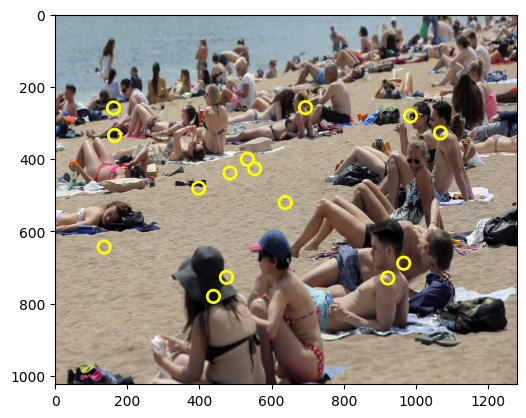

In [55]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
i = 1
root = "/home/liuxiao/AttentionPredictionDatasets/datasets/naturaldesign/stimuli/img002.jpg"

W,H = (1280, 1024)
pixel_coor_scanpaths = []
Xs, Ys =[],[]
for x,y in arr[i*10+1]:
    print(x,y,'->', int((x+1)*W/2), int((y+1)*H/2))
    pixel_coor_scanpaths.append([int((x+1)*W/2), int((y+1)*H/2)])
    Xs.append(int((x+1)*W/2))
    Ys.append( int((y+1)*H/2))

image = Image.open(root)
# image.show()
plt.scatter(Xs, Ys, s=80, facecolors='none', edgecolors='yellow',lw=2)
plt.imshow(image)
plt.show()

In [141]:
examples = ["/home/liuxiao/AttentionPredictionDatasets/datasets/naturaldesign/stimuli/img{}.jpg".format(_) for _ in ["157","103"]] #"014","002",
images = [load_image(_) for _ in examples]
images = [load_image(examples[0])]
scanpaths = []
# for _,i in enumerate([156]): #examples
#     W,H = images[_].size
#     scanpaths.append(", ".join(["["+",".join([str(((x+1)*W/2)/W), str(((y+1)*H/2)/H)])+"]" for x,y in arr[i*10]]))
# free_viewing_prompt = '''Describe a potential attention path for someone viewing this image. Provide the output as a list of 15 coordinates, with each line containing one coordinate followed by a justification explaining why the attention shifts to that point.''' 
# free_viewing_prompt = '''Identify objects and regions that would attract a human’s gaze during a viewing of this scene. Please provide the output as a list of 15 objects or regions grounded by coordinates.''' 

# \nHere are some examples of viewing an image. \nImage: '''+IMAGE_PLACEHOLDER+'\nScan Path: '+scanpaths[0]+'\nImage: '+IMAGE_PLACEHOLDER+'\nScan Path: '+scanpaths[1]+'\nImage: '+IMAGE_PLACEHOLDER+'\nScan Path: '+scanpaths[2]+'\nImage: '+IMAGE_PLACEHOLDER+'\nScan Path: '
# free_viewing_prompt = '''Describe a potential attention path for someone viewing this image. Provide the output as a list of 15 fixations, with each line containing one coordinate, followed by a sentence explaining why the attention shifts to that point.''' 
question = "What is the scan path of viewing this image?"
free_viewing_prompt = '''Identify objects and regions that would attract a human’s gaze during a viewing of this scene. Provide the output as a list of 15 coordinates, with each line containing one exact coordinate locating the object or region, followed by a sentence explaining why the attention shifts to that point.'''
#\n'''+IMAGE_PLACEHOLDER+'\n'+question+'\nAnswer: '+scanpaths[0]+'\n'+ IMAGE_PLACEHOLDER+'\n'+question+'\nAnswer: '
# free_viewing_prompt = '''Given the following image, identify the objects and regions that would attract a human’s gaze during a natural viewing of the scene. Predict 10 fixations a typical observer might make, explaining why each fixation occurs. Provide the output as a structured fixation sequence, including fixation coordinate (formated in x,y), fixation order, and fixation duration.'''
# free_viewing_prompt = '''Given the following image, identify objects and regions that would attract a human’s gaze during a natural viewing of the scene. Predict the sequence with 15 fixations a typical observer might make, explaining why each fixation occurs. The output should be formatted as a structured fixation sequence, where each fixation includes the following attributes:\n\
# # Coordinates: Approximate fixation position in the image.\n\
# # Fixation Duration: The estimated time spent fixating on this object.\n\
# # Justification: A short explanation of why this object or region attracted attention.\n
# Do Not '''
# llava.model.generation_config.pad_token_id = llava.tokenizer.pad_token_id
prompt, answer_text = llava.generate(free_viewing_prompt, images, 0.2, max_new_tokens=1024)
print(answer_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


1. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
2. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
3. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
4. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
5. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
6. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
7. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
8. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
9. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
10. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
11. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
12. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
13. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
14. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.
15. [0.000,0.000,0.998,0.287] - A couch with a laptop on it.


In [139]:
print(prompt)

[INST] <image>
USER: Identify objects and regions that would attract a human’s gaze during a viewing of this scene. Provide the output as a list of 15 coordinates, with each line containing one exact coordinate locating the object or region, followed by a sentence explaining why the attention shifts to that point. [/INST]


In [7]:
coors, centerpoints = [], []
for line in answer_text.split('\n'):
    res = re.findall("[01]\.\d+\W+[01]\.\d+\W+[01]\.\d+\W+[01]\.\d+",line)
    if len(res) == 0:
        continue
    if len(res) > 1:
        print('bad response, re-generate')
        break
    coor_raw_text = res[0]
    res = re.findall("[01]\.\d+",coor_raw_text)
    if len(res) != 4:
        print('bad response, re-generate')
        break
    x1,y1,x2,y2 = [float(_) for _ in res]
    coors.append([x1,y1,x2,y2])
    centerpoint = (x1 + x2) / 2, (y1 + y2) / 2
    centerpoints.append(centerpoint)

if len(coors) != 15:
    assert False, "bad response"
    
W,H = (1280, 1024)
pixel_coor_scanpaths = []
Xs, Ys =[],[]
for x,y in centerpoints:
    # print(x,y,'->', int((x+1)*W/2), int((y+1)*H/2))
    pixel_x, pixel_y = int(x * W), int(y * H)
    pixel_coor_scanpaths.append([pixel_x, pixel_y])
    Xs.append(pixel_x)
    Ys.append(pixel_y)

# image = Image.open(root)
# image.show()
fig, ax = plt.subplots()
for x1,y1,x2,y2 in coors:
    w,h = int((x2-x1)*W), int((y2-y1)*H)
    rect = patches.Rectangle((int(x1*W), int(y1*H)), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.axis('off')
plt.scatter(Xs, Ys, s=80, facecolors='none', edgecolors='yellow',lw=2)
plt.imshow(images[-1])
plt.show()    

NameError: name 'answer_text' is not defined

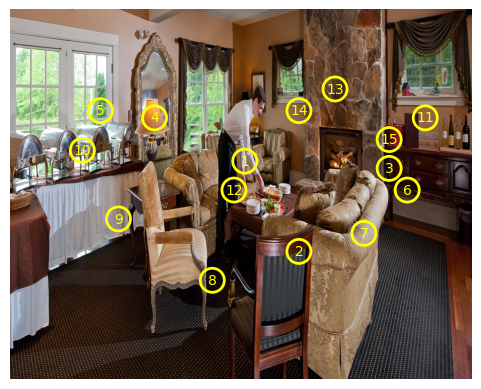

In [46]:
import re
output1 = 'Here’s a structured sequence of 15 fixations that a typical observer might make while viewing this scene, considering human visual attention tendencies:\n\n### **Fixation Sequence:**\n\n1. **Coordinates: (900, 220)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The laptop on the couch is a recognizable object and likely to draw initial attention due to its defined shape and association with work or entertainment.\n\n2. **Coordinates: (640, 320)**  \n   **Fixation Duration:** 400ms  \n   **Justification:** The red soda bottle contrasts strongly against the wooden table and surrounding objects, making it visually salient.\n\n3. **Coordinates: (480, 280)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The green plant in the center acts as a prominent natural element, drawing fixation due to its color and distinct texture variety.\n\n4. **Coordinates: (720, 360)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The remote controls placed together are common everyday items, attracting attention due to familiarity and function.\n\n5. **Coordinates: (540, 500)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The hammer, an uncommon object on a coffee table, raises curiosity about why it is there.\n\n6. **Coordinates: (850, 450)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The open magazine and image of a person with a landscape scene create an area of visual interest and narrative intrigue.\n\n7. **Coordinates: (380, 620)**  \n   **Fixation Duration:** 400ms  \n   **Justification:** The pair of scissors with open blades naturally attract attention due to their shape and potential as a sharp object.\n\n8. **Coordinates: (730, 400)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The small jar with an unknown substance next to the soda bottle creates curiosity, leading to a closer look.\n\n9. **Coordinates: (220, 540)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The blue cloth positioned on top of a book or papers creates a contrast of textures and colors, drawing attention.\n\n10. **Coordinates: (920, 570)**  \n   **Fixation Duration:** 400ms  \n   **Justification:** The yellow sticky note with markings stands out against the darker wood table, triggering curiosity about written text.\n\n11. **Coordinates: (650, 550)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The white candles on the table may attract attention due to their symmetrical arrangement and association with calm or aesthetic appeal.\n\n12. **Coordinates: (480, 680)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The beige knitted glove positioned near the scissors adds texture contrast and an element of intrigue.\n\n13. **Coordinates: (120, 460)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The lottery or bingo card in the foreground with marked numbers could draw a fixation due to its structured pattern.\n\n14. **Coordinates: (800, 250)**  \n   **Fixation Duration:** 300ms  \n   **Justification:** The stack of books near the remote controls provides an area of interest due to the textual content and stacking arrangement.\n\n15. **Coordinates: (320, 720)**  \n   **Fixation Duration:** 350ms  \n   **Justification:** The white container with a lid at the edge of the table has a unique shape and stands out against the cluttered background.\n\nThis sequence simulates how a typical observer might visually explore the scene, prioritizing importance based on contrast, familiarity, potential functionality, and narrative intrigue.'
output2 = "### **Fixation Sequence with Justifications**\n\n1. **Coordinates:** (650, 420)  \n   **Fixation Duration:** Long  \n   **Justification:** The waiter in the scene is performing an action, which naturally attracts attention as a point of interest.\n\n2. **Coordinates:** (800, 670)  \n   **Fixation Duration:** Medium  \n   **Justification:** The food on the table serves as another focal point, as people tend to look at food and dining elements in a scene.\n\n3. **Coordinates:** (1050, 440)  \n   **Fixation Duration:** Short  \n   **Justification:** The fireplace is warm and visually striking, naturally drawing a viewer's eyes.\n\n4. **Coordinates:** (400, 300)  \n   **Fixation Duration:** Short  \n   **Justification:** The large ornate mirror reflects part of the room and has an intricate frame, making it eye-catching.\n\n5. **Coordinates:** (250, 280)  \n   **Fixation Duration:** Medium  \n   **Justification:** The illuminated lamp beside the mirror contrasts with the surroundings, attracting attention.\n\n6. **Coordinates:** (1100, 500)  \n   **Fixation Duration:** Medium  \n   **Justification:** The wine bottles and glasses on the cabinet are distinct elements, capturing interest.\n\n7. **Coordinates:** (980, 620)  \n   **Fixation Duration:** Short  \n   **Justification:** The rich texture of the couch and its positioning make it an evident part of the composition.\n\n8. **Coordinates:** (560, 750)  \n   **Fixation Duration:** Medium  \n   **Justification:** The back of the wooden chair in the foreground creates a sense of depth, drawing brief attention.\n\n9. **Coordinates:** (300, 580)  \n   **Fixation Duration:** Short  \n   **Justification:** The cream-colored chair near the table stands out due to its elegant design and placement.\n\n10. **Coordinates:** (200, 390)  \n   **Fixation Duration:** Short  \n   **Justification:** The buffet table setup with silver serving dishes suggests an event or gathering, bringing momentary curiosity.\n\n11. **Coordinates:** (1150, 300)  \n   **Fixation Duration:** Short  \n   **Justification:** The decorative elements on the shelf by the window add uniqueness to this area, briefly pulling the gaze.\n\n12. **Coordinates:** (620, 500)  \n   **Fixation Duration:** Short  \n   **Justification:** The waiter's hands and action of placing food add movement, catching attention again.\n\n13. **Coordinates:** (900, 220)  \n   **Fixation Duration:** Short  \n   **Justification:** The window drapery and scenic outdoor greenery provide a contrast from the interior.\n\n14. **Coordinates:** (800, 280)  \n   **Fixation Duration:** Short  \n   **Justification:** The other small window adds lighting and depth to the setting, momentarily attracting interest.\n\n15. **Coordinates:** (1050, 360)  \n   **Fixation Duration:** Medium  \n   **Justification:** Returning to the fireplace as a final fixation point, as it remains a visually warm and comforting feature of the scene.\n\nThis step-by-step sequence captures a natural gaze pattern, prioritizing human activities, prominent objects, sources of light, and rich textures."
coors, centerpoints = [], []
# for line in chatgpt_output1.split('\n'):
#     res = re.findall("[01]\.\d*\W+[01]\.\d*\W+",line)
#     if len(res) == 0:
#         continue
#     if len(res) > 1:
#         print('bad response, re-generate')
#         break
#     coor_raw_text = res[0]
#     res = re.findall("[01]\.\d+",coor_raw_text)
#     if len(res) != 2:
#         print('bad response, re-generate')
#         break
#     x,y = [float(_) for _ in res]
#     coors.append([x,y])
# if len(coors) != 15:
#     assert False, "bad response"

for line in output2.split('\n'):
    res = re.findall("\d{3,4}\W+\d{3,4}",line)
    if len(res) == 0:
        continue
    if len(res) > 1:
        print('bad response, re-generate')
        break
    coor_raw_text = res[0]
    res = re.findall("\d+",coor_raw_text)
    if len(res) != 2:
        print('bad response, re-generate')
        break
    x,y = [int(_) for _ in res]
    coors.append([x,y])
if len(coors) != 15:
    assert False, "bad response"

W,H = (1280, 1024)
pixel_coor_scanpaths = []
Xs, Ys =[],[]
fig, ax = plt.subplots()
for i,(x,y) in enumerate(coors):
    # print(x,y,'->', int((x+1)*W/2), int((y+1)*H/2))
    pixel_x, pixel_y = int(x), int(y)
    pixel_coor_scanpaths.append([pixel_x, pixel_y])
    Xs.append(pixel_x)
    Ys.append(pixel_y)
    plt.text(float(pixel_x), float(pixel_y), str(i+1),horizontalalignment='center',verticalalignment='center',color='yellow',size=10)
    

image_path = "/home/liuxiao/AttentionPredictionDatasets/datasets/naturaldesign/stimuli/img103.jpg"
image = load_image(image_path) 
# image = Image.open(root)
# image.show()


plt.axis('off')
plt.scatter(Xs, Ys, s=300, facecolors='none', edgecolors='yellow',lw=2)
plt.imshow(image)
plt.show()    

In [26]:
coors

[[900, 220],
 [640, 320],
 [480, 280],
 [720, 360],
 [540, 500],
 [850, 450],
 [380, 620],
 [730, 400],
 [220, 540],
 [920, 570],
 [650, 550],
 [480, 680],
 [120, 460],
 [800, 250],
 [320, 720]]

In [14]:
import base64
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
base64_image = encode_image(image_path)
base64_image

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQABQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDpi/FIHwarpLyQaeyEgMhzXNGRTHOUY+lNEG4HbyD2qM5PysKdEskb5DHpVvUSZX+ySZIZyFqG50v7RZyw53b1K1rlcKT3JqS3gUuATjPWsOTU1Uro8RuLeS1uWglUq6Egg0L1/Su1+JGkR2d1b3sQAWYFXx/eFcSh+YU2hxd

### Word association

In [42]:
def get_word_freq(word, lang = 'en',wordlist = 'small',minimum = 1e-95):
  try:
    freq = word_frequency(word, lang, wordlist = wordlist, minimum=minimum)
  except:
    freq = 0
  return freq
    
def find_freqs(words_list, minimum = 0, wordlist_type = 'small', lang = 'en'):
  return [get_word_freq(word, lang,wordlist_type,minimum) for word in words_list]

def checkEmptyList(obj):
    return isinstance(obj, list) and len(obj) == 0 

def create_associations_prompt(cue_current, model_name, 
                               df = [] , params_dict ={}, seed = 0, num_cues = 3, cue_str = 'Cue: ', guess_str = 'Guess: '):
  cue_back = [cue_current]
  machine_guess = cue_current
  cont = cue_current in cue_back or machine_guess == cue_current
  print(cont
  while cont:
    back = create_back(cue_current, df, seed , num_cues, cue_str, guess_str )  
    cue_back = back[0]
  response = openai.Completion.create(      
      prompt = back[2],
      model=model_name,            
      stop=["Guess:"],
      **params_dict
    )
  machine_guess = response["choices"][0]['text'].strip().split()[0]
  return back, response, machine_guess

def create_back(cue_current, df = [], seed = 0, num_cues = 3, cue_str = 'Cue: ', guess_str = 'Guess: '):
  if checkEmptyList(df):
      df = pd.read_csv(path_for_prompts)
  np.random.seed(seed)
  choice_cols = np.random.choice(df.shape[1], np.min([num_cues, df.shape[1]]), replace = False)
  choice_rows = np.random.choice(df.shape[0], np.min([num_cues, df.shape[1]]), replace = True)
  cue_back = df.columns[choice_cols]
  guess_back = [df.iloc[choice_rows[col_count], col_val] for col_count, col_val in enumerate(choice_cols)]
  prompt = '\n\n '.join([cue_str + cue_back[i] + ' \n' + guess_str + guess_back[i] for i in range(len(guess_back))])
  prompt = prompt + '\n\n '   + cue_str + ' ' + cue_current + ' \nGuess: '
  return cue_back, guess_back, prompt            

def run_prompt_associations(model_name = "text-davinci-002" , num_cues = 3, back_per_cue = 3, df = [], 
                            num_associations = 0, cue_words = cue_words_list, 
                            params_dict = {'temperature' : 0.5,'max_tokens' : 60,'top_p' : 1.0, 'frequency_penalty' : 0.5, 'presence_penalty' : 0.0, 'max_tokens':3}):  
   if checkEmptyList(df):
       df = pd.read_csv(path_for_prompts)
   # openai.api_key = # some openai key                 
   dict_davinci_assoc = {}
   dict_davinci_back = {}
   if checkEmptyList(cue_words):
       cue_words = np.load(save_path + os.sep +'all_cue_words_october_1.npy')
   take_example = np.random.randint(1, back_per_cue, size = len(cue_words))
   print(take_example)
   if num_associations == 0:
       num_associations = len(cue_words) * back_per_cue
    
   df_assoc = pd.DataFrame(columns = cue_words, index = np.arange(back_per_cue))
   seeds = np.arange(num_associations)
   counter = 0
   for i, cue_word in enumerate(cue_words):
       for repeat in range(back_per_cue):
           back, response, machine_guess = create_associations_prompt(cue_word, model_name = model_name, df =df , 
                                                                      params_dict = params_dict, seed = seeds[counter], num_cues = num_cues)
           if cue_word not in dict_davinci_assoc.keys():
               dict_davinci_assoc[cue_word] = []
               dict_davinci_back[cue_word] = []
    
           dict_davinci_assoc[cue_word].append(machine_guess)
           dict_davinci_back[cue_word].append(back[2])
           df_assoc.loc[repeat, cue_word] = machine_guess #guess, cue
           counter += 1
           time.sleep(3.5)
           print('############################')
           print('current cue:' + cue_word)
           print('guess:' + machine_guess)
           print('Background:' + back[-1])
           print('############################')
    
   ### Create shorter versions
   df_assoc_short = pd.DataFrame(columns = cue_words, data = [ [df_assoc.iloc[take_example, cue_num] for cue_num in range(len(cue_words))] ])
   dict_davinci_assoc_short = {cue: dict_davinci_assoc[cue][take_example[cue_num]] for cue_num, cue in enumerate(cue_words)}
   dict_davinci_back_short =  {cue: dict_davinci_back[cue][take_example[cue_num]] for cue_num, cue in enumerate(cue_words)}
    
   df_assoc_short = df_assoc.T.reset_index()
   df_assoc_short.columns = ['Cue Words','Guess Words']
    
   return  dict_davinci_assoc, dict_davinci_back, df_assoc, dict_davinci_assoc_short, dict_davinci_back_short, df_assoc_short

In [43]:
import time
import sys
sys.path.append('/home/liuxiao/TuringGithub/wordAssociation/MturkExp/word_associations')
# from main_functions_turing_cue_words import *
from numpy.linalg import norm
global save_path
save_path = '/home/liuxiao/TuringGithub/wordAssociation/Plot/Data_all'
from english_words import get_english_words_set
global full_word_list
global cue_words_list
global full_word_list_short
import numpy as np
import openai
import os
import pandas as pd

cue_words_list = np.load(save_path + os.sep +'all_cue_words_october_1.npy')
path_for_prompts = # fill out path for prompt

full_word_list = get_english_words_set(['web2'], lower=True, alpha=True)  #np.load(save_path + os.sep +'all_possible_words_guess_or_cue.npy')
full_word_list = np.array(list(full_word_list))
freqs = find_freqs(full_word_list)
argsort_freqs = np.argsort(freqs)[::-1]
indices_common_6000 = argsort_freqs[:6000]

freqs_short = np.array(freqs)[indices_common_6000]
full_word_list_short = full_word_list[indices_common_6000]
full_word_list_short = np.array(list(full_word_list_short) + list(cue_words_list))
#full_word_list_short = np.array([w for w in full_word_list_short if w not in stop_words])

In [44]:
run_prompt_associations()

[1 1 1 2 1 2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 1 2 1 1 1 1 1 1 2 2 2 2 1 1 1
 1 1 1 2 1 2 1 1 2 1 2 2 1 2 2 2 1 1 1 1 2 1 1 2 1 2 1 2 2 2 2 1 1 1 1 1 1
 2 2 1 2 1 2 1 2 1 2 1 2 1 1 2 2 1 1 2 2 1 2 2 2 2 1 2 1 2 2 1 1 1 2 1 1 1
 2 1 1 2 2 1 2 1 2 1 2 2 2 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 2 1 1 1 2 2 2 1 1
 1 2]
True


NameError: name 'path_for_prompts' is not defined